### QuickDraw of 40 labels with 2000 cases each (with correct labels received 6 Oct 17)

In [1]:
# Set up general environment
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K

import tensorflow as tf


import os
import pickle
import numpy as np

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.0.6
1.2.1


### To create 2k cases for each of 40 labels

In [4]:
num_examples_per_class = 2000

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',

                  'banana','bandage','barn','baseball bat','baseball','basket',

                  'basketball','bathtub','beach','bear','beard','bed','bee','belt',

                  'bicycle','binoculars','birthday cake','blueberry',

                  'book','boomerang','bottlecap','bowtie','bracelet','brain',

                  'bread','broom','bulldozer','bus','bush','butterfly','cactus','cake']

len(classes)

40

### To load prepared data in npy file 



In [5]:
# To check what is my current working directory
import os
print (os.getcwd())

# To change current working directory
os.chdir('E:\Deep Learning Developer\Wk2 beginning 2 Oct 17')
print (os.getcwd())

C:\Users\GhostShip\Documents
E:\Deep Learning Developer\Wk2 beginning 2 Oct 17


In [11]:
X_data = np.load("./x_data_40_classes_2k (correct labels).npy")
X_data.shape  # 40 labels x 2k observations.  28 x 28 dimensions flattened.

(80000, 784)

### To examine the data

In [16]:

print('No. of element per array: ',len(X_data[-1])) # Each row/array consists of 784 elements (columns)
print('Elements in last array: ', X_data[-1])  # the 79999th row


No. of element per array:  784
Elements in last array:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  76  21   0   0   0  15 146  20
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  63 255 207   0   0 131 213 255 166   3  83 194  53   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 184 255 132   0   0 215 255
 254 255 232 251 255 136   0   0   0   0   0   0   0   0   0   0   0   0
   0 119 231 240 255 232 241 220 250 255 246 207 212 255 230 192  15  34
   4   0   0   0   0   0   0   0   0   0  69 254 255 255 255 243 247 169
 210 255 254 196 250 255 239 251 244 255 211  39   0   0   0   0   0   0
   0   4 220 255 255 255 253  73 240 121   0 180 201   0  30 243 232 254
 254 211 247 194   0   0   0   0   0   0  18 197 255 253 255 253 196

### To make the labels

In [18]:
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]
print(len(labels))
print(labels[:6])
print(labels[-1]) 

# Last of 40 array of classes is filled with 2000 value of label #39 ie., the iterable "qdraw". 
# There are 40 array in classes, each with  2000 elements. After concatenation of arrays, they collapse into 80k rows.

## Concat the arrays together
y_data = np.concatenate(labels, axis=0)
y_data = np.concatenate(labels, axis=0)
print(y_data.shape)
print(y_data[-1])


40
[array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 1, 1, 1]), array([2, 2, 2, ..., 2, 2, 2]), array([3, 3, 3, ..., 3, 3, 3]), array([4, 4, 4, ..., 4, 4, 4]), array([5, 5, 5, ..., 5, 5, 5])]
[39 39 39 ..., 39 39 39]
(80000,)
39


Made labels above by iterating through 0-39 "classes".  Fill each of 40 array with 2000 elements of the iterated label. np.full() fill "num_examples_per_class" rows of array by the value returned by classes.index(). Hence, 40 arrays are created filled completely with their indexed label.

Then collapse all 40 arrays with concatenate() into rows, and assigned to y_data. Hence, we have 80k rows for y_data now, filled with labels, in sequential order 0 to 39.

### Take a peek at the image

In [19]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

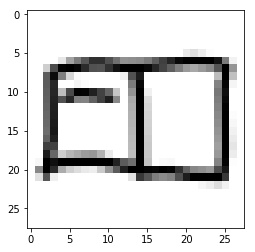

26


In [20]:
show_object(X_data[53000])
print(y_data[53000])

Row 53000 of X_data and y_data are inputs and label for label "26"

To confirm the shapes of X and y are aligned for modeling.

In [22]:
print(X_data.shape)
print(y_data.shape)

(80000, 784)
(80000,)


### Randomized the dataset

unison_shuffled_copies(a, b) function - input and label are shuffled but with one-to-one row indexing of input and its corresponding label maintained. Master copy of X and y data are left untouched.

In [23]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


11


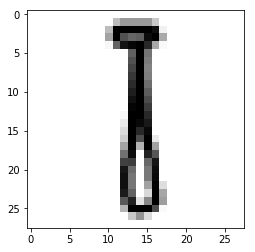

In [27]:
X_data,y_data = unison_shuffled_copies(X_data,y_data)
print(y_data[0])
show_object(X_data[0])

### Start the Challenge proper below

### To split 80/20 into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(64000, 784) (64000,)
(16000, 784) (16000,)


### To preprocess the data

In [29]:
# To confirm the min-max in row of the matrix before reshaping and rescaling
print('min along rows of X_train is', min(np.amin(X_train, axis=0)), ';', 'max along rows of X_train is', max(np.amax(X_train, axis=0)))
print('min along rows of X_test is', min(np.amin(X_test, axis=0)), ';', 'max along rows X_test is', max(np.amax(X_test, axis=0)))



min along rows of X_train is 0 ; max along rows of X_train is 255
min along rows of X_test is 0 ; max along rows X_test is 255


In [30]:
print(X_train.shape[0])
print(X_test.shape[0])

input_shape = (28, 28, 1)
# To reshape the training data into 28 * 28
X_train_reshaped = X_train.reshape([X_train.shape[0], 28, 28, 1])
X_test_reshaped = X_test.reshape([X_test.shape[0], 28, 28, 1]) 

print('Shape of X_train_reshaped: ', X_train_reshaped.shape)
print('Shape of X_test_reshaped: ', X_test_reshaped.shape)


64000
16000
Shape of X_train_reshaped:  (64000, 28, 28, 1)
Shape of X_test_reshaped:  (16000, 28, 28, 1)


In [31]:
# To rescale Xs by their min-max values
X_train_reshaped = X_train_reshaped.astype('float32')
X_test_reshaped = X_test_reshaped.astype('float32')
X_train_reshaped /= 255
X_test_reshaped /= 255

# print('Head of X_train_reshaped: ', X_train_reshaped[:1])

In [32]:
# One-hot encode the labels. There are 40 labels.
# To confirm the number of unique labels are in range of 0 to 200. Therefore, 201 classes to encode.
print('No.of unique labels in y_train: ', len(np.unique(y_train)))
print('No. of unique labels in y_test: ', len(np.unique(y_test)))      
print('Unique training labels: ', np.unique(y_train))
print('Unique testing labels: ', np.unique(y_test))


num_classes = len(labels)
# convert class vectors to binary One Hot Encoded
y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)
print('One-hot encoding for first label in y_train: ', y_train_enc[0])

No.of unique labels in y_train:  40
No. of unique labels in y_test:  40
Unique training labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Unique testing labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
One-hot encoding for first label in y_train:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


### Define the parameters

In [35]:
batch_size = 32

epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'QuickDraw_mini_challenge_CNN(correct labels)).h5'

### Define the model

In [36]:

Inp = Input(shape = input_shape,name = 'Input_layer')

#ConvBlock 01
conv01 = Conv2D(32, (3, 3), padding='same',activation = 'relu', input_shape=Inp.shape,name = 'Conv01_layer')(Inp)
conv02 = Conv2D(32, (3, 3),activation = 'relu',name = 'Conv02_layer')(conv01)
maxpool_01 = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool01_layer')(conv02)
drop01 = Dropout(0.25,name = 'Dropout01_layer')(maxpool_01)

#Convblock 02
conv03 = Conv2D(64, (3, 3), padding='same',activation = 'relu',name = 'Conv03_layer')(drop01)
conv04 = Conv2D(64, (3, 3),activation = 'relu',name = 'Conv04_layer')(conv03)
maxpool_02 = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool02_layer')(conv04)
drop02 = Dropout(0.25,name = 'Dropout02_layer')(maxpool_02)

# Fully Connected Dense block
x = Flatten(name = 'Flatten_layer')(drop02)
x = Dense(512, activation='relu',name = 'Dense01_layer')(x)
x = Dropout(0.5,name = 'Dropout03_layer')(x)
logits_layer = Dense(num_classes, name= 'logits_layer')(x)
output = Activation('softmax',name = 'Sofftmax_layer')(logits_layer)


# Define model inputs and output
model = Model(Inp, output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 28, 28, 1)         0         
_________________________________________________________________
Conv01_layer (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
Conv02_layer (Conv2D)        (None, 26, 26, 32)        9248      
_________________________________________________________________
MaxPool01_layer (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout01_layer (Dropout)    (None, 13, 13, 32)        0         
_________________________________________________________________
Conv03_layer (Conv2D)        (None, 13, 13, 64)        18496     
_________________________________________________________________
Conv04_layer (Conv2D)        (None, 11, 11, 64)        36928     
__________

### Initialize the optimizer

In [37]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Fit and Validate the model

In [38]:
hist = model.fit(X_train_reshaped, y_train_enc, 
                 batch_size = batch_size, 
                 epochs=epochs, 
                 verbose=1,
                 validation_data=(X_test_reshaped, y_test_enc))


Train on 64000 samples, validate on 16000 samples
Epoch 1/5


   32/64000 [..............................] - ETA: 2410s - loss: 3.6995 - acc: 0.0000e+00

   64/64000 [..............................] - ETA: 1437s - loss: 3.6906 - acc: 0.0156    

   96/64000 [..............................] - ETA: 1119s - loss: 3.6963 - acc: 0.0104

  128/64000 [..............................] - ETA: 956s - loss: 3.6959 - acc: 0.0312 

  160/64000 [..............................] - ETA: 867s - loss: 3.6888 - acc: 0.0437

  192/64000 [..............................] - ETA: 800s - loss: 3.6928 - acc: 0.0469

  224/64000 [..............................] - ETA: 773s - loss: 3.6944 - acc: 0.0402

  256/64000 [..............................] - ETA: 756s - loss: 3.6934 - acc: 0.0391

  288/64000 [..............................] - ETA: 726s - loss: 3.6929 - acc: 0.0382

  320/64000 [..............................] - ETA: 710s - loss: 3.6904 - acc: 0.0469

  352/64000 [..............................] - ETA: 688s - loss: 3.6898 - acc: 0.0455

  384/64000 [..............................] - ETA: 682s - loss: 3.6913 - acc: 0.0443

  416/64000 [..............................] - ETA: 663s - loss: 3.6906 - acc: 0.0433

  448/64000 [..............................] - ETA: 657s - loss: 3.6932 - acc: 0.0402

  480/64000 [..............................] - ETA: 651s - loss: 3.6921 - acc: 0.0417

  512/64000 [..............................] - ETA: 640s - loss: 3.6920 - acc: 0.0410

  544/64000 [..............................] - ETA: 630s - loss: 3.6906 - acc: 0.0423

  576/64000 [..............................] - ETA: 624s - loss: 3.6909 - acc: 0.0399



  608/64000 [..............................] - ETA: 612s - loss: 3.6909 - acc: 0.0395

  640/64000 [..............................] - ETA: 605s - loss: 3.6896 - acc: 0.0375

  672/64000 [..............................] - ETA: 598s - loss: 3.6903 - acc: 0.0357

  704/64000 [..............................] - ETA: 591s - loss: 3.6901 - acc: 0.0355

  736/64000 [..............................] - ETA: 586s - loss: 3.6905 - acc: 0.0367

  768/64000 [..............................] - ETA: 580s - loss: 3.6893 - acc: 0.0391

  800/64000 [..............................] - ETA: 574s - loss: 3.6884 - acc: 0.0400

  832/64000 [..............................] - ETA: 574s - loss: 3.6887 - acc: 0.0397

  864/64000 [..............................] - ETA: 569s - loss: 3.6890 - acc: 0.0394

  896/64000 [..............................] - ETA: 563s - loss: 3.6889 - acc: 0.0391

  928/64000 [..............................] - ETA: 559s - loss: 3.6897 - acc: 0.0388

  960/64000 [..............................] - ETA: 556s - loss: 3.6900 - acc: 0.0385

  992/64000 [..............................] - ETA: 552s - loss: 3.6891 - acc: 0.0373

 1024/64000 [..............................] - ETA: 549s - loss: 3.6891 - acc: 0.0361

 1056/64000 [..............................] - ETA: 547s - loss: 3.6887 - acc: 0.0369

 1088/64000 [..............................] - ETA: 544s - loss: 3.6877 - acc: 0.0377

 1120/64000 [..............................] - ETA: 541s - loss: 3.6887 - acc: 0.0366

 1152/64000 [..............................] - ETA: 538s - loss: 3.6883 - acc: 0.0356

 1184/64000 [..............................] - ETA: 534s - loss: 3.6871 - acc: 0.0363

 1216/64000 [..............................] - ETA: 531s - loss: 3.6862 - acc: 0.0370

 1248/64000 [..............................] - ETA: 529s - loss: 3.6857 - acc: 0.0369

 1280/64000 [..............................] - ETA: 526s - loss: 3.6854 - acc: 0.0367

 1312/64000 [..............................] - ETA: 526s - loss: 3.6848 - acc: 0.0381

 1344/64000 [..............................] - ETA: 525s - loss: 3.6842 - acc: 0.0387

 1376/64000 [..............................] - ETA: 522s - loss: 3.6839 - acc: 0.0385

 1408/64000 [..............................] - ETA: 525s - loss: 3.6827 - acc: 0.0391

 1440/64000 [..............................] - ETA: 524s - loss: 3.6825 - acc: 0.0396

 1472/64000 [..............................] - ETA: 521s - loss: 3.6823 - acc: 0.0387

 1504/64000 [..............................] - ETA: 519s - loss: 3.6826 - acc: 0.0379

 1536/64000 [..............................] - ETA: 518s - loss: 3.6823 - acc: 0.0371

 1568/64000 [..............................] - ETA: 517s - loss: 3.6821 - acc: 0.0364

 1600/64000 [..............................] - ETA: 516s - loss: 3.6821 - acc: 0.0356

 1632/64000 [..............................] - ETA: 514s - loss: 3.6815 - acc: 0.0362

 1664/64000 [..............................] - ETA: 512s - loss: 3.6812 - acc: 0.0361

 1696/64000 [..............................] - ETA: 511s - loss: 3.6809 - acc: 0.0360

 1728/64000 [..............................] - ETA: 508s - loss: 3.6812 - acc: 0.0353

 1760/64000 [..............................] - ETA: 507s - loss: 3.6811 - acc: 0.0347

 1792/64000 [..............................] - ETA: 505s - loss: 3.6808 - acc: 0.0340

 1824/64000 [..............................] - ETA: 504s - loss: 3.6799 - acc: 0.0345

 1856/64000 [..............................] - ETA: 503s - loss: 3.6798 - acc: 0.0345

 1888/64000 [..............................] - ETA: 502s - loss: 3.6797 - acc: 0.0350

 1920/64000 [..............................] - ETA: 502s - loss: 3.6787 - acc: 0.0354

 1952/64000 [..............................] - ETA: 502s - loss: 3.6780 - acc: 0.0359

 1984/64000 [..............................] - ETA: 502s - loss: 3.6784 - acc: 0.0353

 2016/64000 [..............................] - ETA: 502s - loss: 3.6784 - acc: 0.0352

 2048/64000 [..............................] - ETA: 501s - loss: 3.6779 - acc: 0.0347

 2080/64000 [..............................] - ETA: 502s - loss: 3.6779 - acc: 0.0341

 2112/64000 [..............................] - ETA: 501s - loss: 3.6778 - acc: 0.0350

 2144/64000 [>.............................] - ETA: 499s - loss: 3.6779 - acc: 0.0350

 2176/64000 [>.............................] - ETA: 498s - loss: 3.6777 - acc: 0.0349

 2208/64000 [>.............................] - ETA: 497s - loss: 3.6775 - acc: 0.0349

 2240/64000 [>.............................] - ETA: 496s - loss: 3.6773 - acc: 0.0348

 2272/64000 [>.............................] - ETA: 495s - loss: 3.6779 - acc: 0.0343

 2304/64000 [>.............................] - ETA: 494s - loss: 3.6777 - acc: 0.0347

 2336/64000 [>.............................] - ETA: 493s - loss: 3.6773 - acc: 0.0347

 2368/64000 [>.............................] - ETA: 492s - loss: 3.6772 - acc: 0.0342

 2400/64000 [>.............................] - ETA: 492s - loss: 3.6768 - acc: 0.0350

 2432/64000 [>.............................] - ETA: 491s - loss: 3.6768 - acc: 0.0350

 2464/64000 [>.............................] - ETA: 490s - loss: 3.6769 - acc: 0.0345

 2496/64000 [>.............................] - ETA: 491s - loss: 3.6769 - acc: 0.0345

 2528/64000 [>.............................] - ETA: 490s - loss: 3.6767 - acc: 0.0348

 2560/64000 [>.............................] - ETA: 490s - loss: 3.6759 - acc: 0.0344

 2592/64000 [>.............................] - ETA: 491s - loss: 3.6762 - acc: 0.0340

 2624/64000 [>.............................] - ETA: 493s - loss: 3.6759 - acc: 0.0339

 2656/64000 [>.............................] - ETA: 493s - loss: 3.6760 - acc: 0.0335

 2688/64000 [>.............................] - ETA: 494s - loss: 3.6752 - acc: 0.0346

 2720/64000 [>.............................] - ETA: 493s - loss: 3.6745 - acc: 0.0346

 2752/64000 [>.............................] - ETA: 494s - loss: 3.6738 - acc: 0.0352

 2784/64000 [>.............................] - ETA: 493s - loss: 3.6735 - acc: 0.0359

 2816/64000 [>.............................] - ETA: 493s - loss: 3.6738 - acc: 0.0355



 2848/64000 [>.............................] - ETA: 492s - loss: 3.6730 - acc: 0.0362

 2880/64000 [>.............................] - ETA: 491s - loss: 3.6729 - acc: 0.0365

 2912/64000 [>.............................] - ETA: 490s - loss: 3.6725 - acc: 0.0367

 2944/64000 [>.............................] - ETA: 491s - loss: 3.6722 - acc: 0.0370

 2976/64000 [>.............................] - ETA: 490s - loss: 3.6724 - acc: 0.0366

 3008/64000 [>.............................] - ETA: 489s - loss: 3.6721 - acc: 0.0366

 3040/64000 [>.............................] - ETA: 488s - loss: 3.6717 - acc: 0.0368

 3072/64000 [>.............................] - ETA: 487s - loss: 3.6717 - acc: 0.0365

 3104/64000 [>.............................] - ETA: 487s - loss: 3.6715 - acc: 0.0367

 3136/64000 [>.............................] - ETA: 486s - loss: 3.6712 - acc: 0.0373

 3168/64000 [>.............................] - ETA: 485s - loss: 3.6708 - acc: 0.0372

 3200/64000 [>.............................] - ETA: 484s - loss: 3.6704 - acc: 0.0369

 3232/64000 [>.............................] - ETA: 483s - loss: 3.6699 - acc: 0.0371

 3264/64000 [>.............................] - ETA: 483s - loss: 3.6691 - acc: 0.0371

 3296/64000 [>.............................] - ETA: 482s - loss: 3.6692 - acc: 0.0367

 3328/64000 [>.............................] - ETA: 481s - loss: 3.6686 - acc: 0.0370

 3360/64000 [>.............................] - ETA: 481s - loss: 3.6684 - acc: 0.0366

 3392/64000 [>.............................] - ETA: 481s - loss: 3.6679 - acc: 0.0366

 3424/64000 [>.............................] - ETA: 480s - loss: 3.6673 - acc: 0.0371

 3456/64000 [>.............................] - ETA: 479s - loss: 3.6668 - acc: 0.0367

 3488/64000 [>.............................] - ETA: 479s - loss: 3.6669 - acc: 0.0364

 3520/64000 [>.............................] - ETA: 479s - loss: 3.6664 - acc: 0.0361

 3552/64000 [>.............................] - ETA: 478s - loss: 3.6661 - acc: 0.0363

 3584/64000 [>.............................] - ETA: 477s - loss: 3.6659 - acc: 0.0363

 3616/64000 [>.............................] - ETA: 477s - loss: 3.6657 - acc: 0.0360

 3648/64000 [>.............................] - ETA: 476s - loss: 3.6659 - acc: 0.0365

 3680/64000 [>.............................] - ETA: 475s - loss: 3.6657 - acc: 0.0361

 3712/64000 [>.............................] - ETA: 475s - loss: 3.6654 - acc: 0.0364

 3744/64000 [>.............................] - ETA: 474s - loss: 3.6648 - acc: 0.0369

 3776/64000 [>.............................] - ETA: 473s - loss: 3.6647 - acc: 0.0368



 3808/64000 [>.............................] - ETA: 472s - loss: 3.6645 - acc: 0.0365

 3840/64000 [>.............................] - ETA: 472s - loss: 3.6638 - acc: 0.0370

 3872/64000 [>.............................] - ETA: 471s - loss: 3.6636 - acc: 0.0372

 3904/64000 [>.............................] - ETA: 470s - loss: 3.6632 - acc: 0.0371

 3936/64000 [>.............................] - ETA: 470s - loss: 3.6631 - acc: 0.0368

 3968/64000 [>.............................] - ETA: 470s - loss: 3.6632 - acc: 0.0368

 4000/64000 [>.............................] - ETA: 470s - loss: 3.6632 - acc: 0.0370

 4032/64000 [>.............................] - ETA: 469s - loss: 3.6627 - acc: 0.0370

 4064/64000 [>.............................] - ETA: 470s - loss: 3.6624 - acc: 0.0369

 4096/64000 [>.............................] - ETA: 470s - loss: 3.6620 - acc: 0.0374



 4128/64000 [>.............................] - ETA: 469s - loss: 3.6616 - acc: 0.0380

 4160/64000 [>.............................] - ETA: 468s - loss: 3.6612 - acc: 0.0382

 4192/64000 [>.............................] - ETA: 468s - loss: 3.6608 - acc: 0.0384

 4224/64000 [>.............................] - ETA: 467s - loss: 3.6605 - acc: 0.0384

 4256/64000 [>.............................] - ETA: 467s - loss: 3.6596 - acc: 0.0385

 4288/64000 [=>............................] - ETA: 466s - loss: 3.6594 - acc: 0.0385

 4320/64000 [=>............................] - ETA: 466s - loss: 3.6589 - acc: 0.0387

 4352/64000 [=>............................] - ETA: 465s - loss: 3.6584 - acc: 0.0391

 4384/64000 [=>............................] - ETA: 464s - loss: 3.6580 - acc: 0.0395

 4416/64000 [=>............................] - ETA: 464s - loss: 3.6573 - acc: 0.0399

 4448/64000 [=>............................] - ETA: 463s - loss: 3.6567 - acc: 0.0407

 4480/64000 [=>............................] - ETA: 462s - loss: 3.6565 - acc: 0.0408

 4512/64000 [=>............................] - ETA: 462s - loss: 3.6554 - acc: 0.0408

 4544/64000 [=>............................] - ETA: 461s - loss: 3.6549 - acc: 0.0409

 4576/64000 [=>............................] - ETA: 460s - loss: 3.6544 - acc: 0.0406

 4608/64000 [=>............................] - ETA: 459s - loss: 3.6535 - acc: 0.0408

 4640/64000 [=>............................] - ETA: 459s - loss: 3.6533 - acc: 0.0405

 4672/64000 [=>............................] - ETA: 459s - loss: 3.6527 - acc: 0.0405

 4704/64000 [=>............................] - ETA: 458s - loss: 3.6526 - acc: 0.0404

 4736/64000 [=>............................] - ETA: 458s - loss: 3.6518 - acc: 0.0410

 4768/64000 [=>............................] - ETA: 458s - loss: 3.6510 - acc: 0.0415

 4800/64000 [=>............................] - ETA: 457s - loss: 3.6503 - acc: 0.0417

 4832/64000 [=>............................] - ETA: 457s - loss: 3.6500 - acc: 0.0420

 4864/64000 [=>............................] - ETA: 457s - loss: 3.6495 - acc: 0.0419

 4896/64000 [=>............................] - ETA: 457s - loss: 3.6494 - acc: 0.0419

 4928/64000 [=>............................] - ETA: 456s - loss: 3.6489 - acc: 0.0420

 4960/64000 [=>............................] - ETA: 456s - loss: 3.6478 - acc: 0.0427

 4992/64000 [=>............................] - ETA: 455s - loss: 3.6473 - acc: 0.0427

 5024/64000 [=>............................] - ETA: 455s - loss: 3.6471 - acc: 0.0426

 5056/64000 [=>............................] - ETA: 454s - loss: 3.6467 - acc: 0.0425

 5088/64000 [=>............................] - ETA: 454s - loss: 3.6461 - acc: 0.0428

 5120/64000 [=>............................] - ETA: 453s - loss: 3.6458 - acc: 0.0430

 5152/64000 [=>............................] - ETA: 452s - loss: 3.6453 - acc: 0.0429

 5184/64000 [=>............................] - ETA: 451s - loss: 3.6446 - acc: 0.0430

 5216/64000 [=>............................] - ETA: 451s - loss: 3.6448 - acc: 0.0428

 5248/64000 [=>............................] - ETA: 451s - loss: 3.6440 - acc: 0.0436

 5280/64000 [=>............................] - ETA: 450s - loss: 3.6435 - acc: 0.0437

 5312/64000 [=>............................] - ETA: 450s - loss: 3.6428 - acc: 0.0439

 5344/64000 [=>............................] - ETA: 449s - loss: 3.6415 - acc: 0.0445

 5376/64000 [=>............................] - ETA: 449s - loss: 3.6410 - acc: 0.0446

 5408/64000 [=>............................] - ETA: 449s - loss: 3.6411 - acc: 0.0444

 5440/64000 [=>............................] - ETA: 448s - loss: 3.6406 - acc: 0.0445

 5472/64000 [=>............................] - ETA: 448s - loss: 3.6398 - acc: 0.0446

 5504/64000 [=>............................] - ETA: 447s - loss: 3.6386 - acc: 0.0445

 5536/64000 [=>............................] - ETA: 447s - loss: 3.6379 - acc: 0.0446

 5568/64000 [=>............................] - ETA: 446s - loss: 3.6379 - acc: 0.0445

 5600/64000 [=>............................] - ETA: 446s - loss: 3.6365 - acc: 0.0452

 5632/64000 [=>............................] - ETA: 446s - loss: 3.6360 - acc: 0.0456

 5664/64000 [=>............................] - ETA: 445s - loss: 3.6352 - acc: 0.0461

 5696/64000 [=>............................] - ETA: 445s - loss: 3.6349 - acc: 0.0465

 5728/64000 [=>............................] - ETA: 444s - loss: 3.6340 - acc: 0.0471

 5760/64000 [=>............................] - ETA: 444s - loss: 3.6326 - acc: 0.0476

 5792/64000 [=>............................] - ETA: 443s - loss: 3.6315 - acc: 0.0478

 5824/64000 [=>............................] - ETA: 443s - loss: 3.6305 - acc: 0.0479

 5856/64000 [=>............................] - ETA: 443s - loss: 3.6296 - acc: 0.0480

 5888/64000 [=>............................] - ETA: 442s - loss: 3.6287 - acc: 0.0482

 5920/64000 [=>............................] - ETA: 441s - loss: 3.6272 - acc: 0.0486

 5952/64000 [=>............................] - ETA: 441s - loss: 3.6264 - acc: 0.0489

 5984/64000 [=>............................] - ETA: 441s - loss: 3.6251 - acc: 0.0498

 6016/64000 [=>............................] - ETA: 440s - loss: 3.6241 - acc: 0.0499



 6048/64000 [=>............................] - ETA: 439s - loss: 3.6235 - acc: 0.0498

 6080/64000 [=>............................] - ETA: 439s - loss: 3.6232 - acc: 0.0497

 6112/64000 [=>............................] - ETA: 439s - loss: 3.6220 - acc: 0.0502

 6144/64000 [=>............................] - ETA: 438s - loss: 3.6210 - acc: 0.0503

 6176/64000 [=>............................] - ETA: 437s - loss: 3.6200 - acc: 0.0507



 6208/64000 [=>............................] - ETA: 437s - loss: 3.6197 - acc: 0.0506

 6240/64000 [=>............................] - ETA: 437s - loss: 3.6187 - acc: 0.0506

 6272/64000 [=>............................] - ETA: 436s - loss: 3.6185 - acc: 0.0507

 6304/64000 [=>............................] - ETA: 436s - loss: 3.6181 - acc: 0.0508

 6336/64000 [=>............................] - ETA: 435s - loss: 3.6172 - acc: 0.0507

 6368/64000 [=>............................] - ETA: 435s - loss: 3.6165 - acc: 0.0509

 6400/64000 [==>...........................] - ETA: 434s - loss: 3.6155 - acc: 0.0511

 6432/64000 [==>...........................] - ETA: 434s - loss: 3.6151 - acc: 0.0513

 6464/64000 [==>...........................] - ETA: 434s - loss: 3.6139 - acc: 0.0517

 6496/64000 [==>...........................] - ETA: 433s - loss: 3.6130 - acc: 0.0517

 6528/64000 [==>...........................] - ETA: 433s - loss: 3.6125 - acc: 0.0518

 6560/64000 [==>...........................] - ETA: 432s - loss: 3.6113 - acc: 0.0523

 6592/64000 [==>...........................] - ETA: 432s - loss: 3.6110 - acc: 0.0525

 6624/64000 [==>...........................] - ETA: 431s - loss: 3.6100 - acc: 0.0525

 6656/64000 [==>...........................] - ETA: 431s - loss: 3.6094 - acc: 0.0523

 6688/64000 [==>...........................] - ETA: 430s - loss: 3.6086 - acc: 0.0526

 6720/64000 [==>...........................] - ETA: 430s - loss: 3.6080 - acc: 0.0525

 6752/64000 [==>...........................] - ETA: 430s - loss: 3.6074 - acc: 0.0529

 6784/64000 [==>...........................] - ETA: 429s - loss: 3.6058 - acc: 0.0534

 6816/64000 [==>...........................] - ETA: 429s - loss: 3.6052 - acc: 0.0534

 6848/64000 [==>...........................] - ETA: 428s - loss: 3.6044 - acc: 0.0542



 6880/64000 [==>...........................] - ETA: 428s - loss: 3.6042 - acc: 0.0541



 6912/64000 [==>...........................] - ETA: 427s - loss: 3.6038 - acc: 0.0544

 6944/64000 [==>...........................] - ETA: 427s - loss: 3.6032 - acc: 0.0549

 6976/64000 [==>...........................] - ETA: 426s - loss: 3.6025 - acc: 0.0549

 7008/64000 [==>...........................] - ETA: 426s - loss: 3.6009 - acc: 0.0555

 7040/64000 [==>...........................] - ETA: 426s - loss: 3.6002 - acc: 0.0557

 7072/64000 [==>...........................] - ETA: 425s - loss: 3.5999 - acc: 0.0557

 7104/64000 [==>...........................] - ETA: 425s - loss: 3.5985 - acc: 0.0563

 7136/64000 [==>...........................] - ETA: 424s - loss: 3.5974 - acc: 0.0566

 7168/64000 [==>...........................] - ETA: 424s - loss: 3.5967 - acc: 0.0568

 7200/64000 [==>...........................] - ETA: 424s - loss: 3.5957 - acc: 0.0569

 7232/64000 [==>...........................] - ETA: 423s - loss: 3.5946 - acc: 0.0575

 7264/64000 [==>...........................] - ETA: 423s - loss: 3.5935 - acc: 0.0574



 7296/64000 [==>...........................] - ETA: 422s - loss: 3.5928 - acc: 0.0576

 7328/64000 [==>...........................] - ETA: 422s - loss: 3.5928 - acc: 0.0575

 7360/64000 [==>...........................] - ETA: 422s - loss: 3.5909 - acc: 0.0576

 7392/64000 [==>...........................] - ETA: 421s - loss: 3.5900 - acc: 0.0578

 7424/64000 [==>...........................] - ETA: 421s - loss: 3.5888 - acc: 0.0585



 7456/64000 [==>...........................] - ETA: 420s - loss: 3.5877 - acc: 0.0589

 7488/64000 [==>...........................] - ETA: 420s - loss: 3.5865 - acc: 0.0590

 7520/64000 [==>...........................] - ETA: 419s - loss: 3.5859 - acc: 0.0597

 7552/64000 [==>...........................] - ETA: 419s - loss: 3.5851 - acc: 0.0602

 7584/64000 [==>...........................] - ETA: 418s - loss: 3.5837 - acc: 0.0607

 7616/64000 [==>...........................] - ETA: 418s - loss: 3.5833 - acc: 0.0611



 7648/64000 [==>...........................] - ETA: 417s - loss: 3.5826 - acc: 0.0615



 7680/64000 [==>...........................] - ETA: 417s - loss: 3.5826 - acc: 0.0615

 7712/64000 [==>...........................] - ETA: 416s - loss: 3.5817 - acc: 0.0620

 7744/64000 [==>...........................] - ETA: 416s - loss: 3.5806 - acc: 0.0621

 7776/64000 [==>...........................] - ETA: 415s - loss: 3.5800 - acc: 0.0624



 7808/64000 [==>...........................] - ETA: 415s - loss: 3.5797 - acc: 0.0625

 7840/64000 [==>...........................] - ETA: 414s - loss: 3.5784 - acc: 0.0629



 7872/64000 [==>...........................] - ETA: 414s - loss: 3.5778 - acc: 0.0631



 7904/64000 [==>...........................] - ETA: 413s - loss: 3.5773 - acc: 0.0634

 7936/64000 [==>...........................] - ETA: 413s - loss: 3.5758 - acc: 0.0638

 7968/64000 [==>...........................] - ETA: 413s - loss: 3.5756 - acc: 0.0636

 8000/64000 [==>...........................] - ETA: 412s - loss: 3.5752 - acc: 0.0636

 8032/64000 [==>...........................] - ETA: 412s - loss: 3.5736 - acc: 0.0644

 8064/64000 [==>...........................] - ETA: 411s - loss: 3.5722 - acc: 0.0646

 8096/64000 [==>...........................] - ETA: 411s - loss: 3.5712 - acc: 0.0644



 8128/64000 [==>...........................] - ETA: 411s - loss: 3.5700 - acc: 0.0643

 8160/64000 [==>...........................] - ETA: 410s - loss: 3.5695 - acc: 0.0643

 8192/64000 [==>...........................] - ETA: 410s - loss: 3.5694 - acc: 0.0648

 8224/64000 [==>...........................] - ETA: 409s - loss: 3.5687 - acc: 0.0652



 8256/64000 [==>...........................] - ETA: 409s - loss: 3.5678 - acc: 0.0654

 8288/64000 [==>...........................] - ETA: 408s - loss: 3.5662 - acc: 0.0658

 8320/64000 [==>...........................] - ETA: 408s - loss: 3.5650 - acc: 0.0661

 8352/64000 [==>...........................] - ETA: 407s - loss: 3.5647 - acc: 0.0662

 8384/64000 [==>...........................] - ETA: 407s - loss: 3.5640 - acc: 0.0664

 8416/64000 [==>...........................] - ETA: 406s - loss: 3.5629 - acc: 0.0667

 8448/64000 [==>...........................] - ETA: 406s - loss: 3.5626 - acc: 0.0669

 8480/64000 [==>...........................] - ETA: 405s - loss: 3.5623 - acc: 0.0667

 8512/64000 [==>...........................] - ETA: 405s - loss: 3.5609 - acc: 0.0670

 8544/64000 [===>..........................] - ETA: 404s - loss: 3.5605 - acc: 0.0671

 8576/64000 [===>..........................] - ETA: 404s - loss: 3.5598 - acc: 0.0675

 8608/64000 [===>..........................] - ETA: 403s - loss: 3.5589 - acc: 0.0680

 8640/64000 [===>..........................] - ETA: 403s - loss: 3.5576 - acc: 0.0684

 8672/64000 [===>..........................] - ETA: 402s - loss: 3.5560 - acc: 0.0686

 8704/64000 [===>..........................] - ETA: 402s - loss: 3.5542 - acc: 0.0692

 8736/64000 [===>..........................] - ETA: 401s - loss: 3.5536 - acc: 0.0690

 8768/64000 [===>..........................] - ETA: 401s - loss: 3.5528 - acc: 0.0693

 8800/64000 [===>..........................] - ETA: 401s - loss: 3.5520 - acc: 0.0694

 8832/64000 [===>..........................] - ETA: 400s - loss: 3.5501 - acc: 0.0697

 8864/64000 [===>..........................] - ETA: 400s - loss: 3.5493 - acc: 0.0698

 8896/64000 [===>..........................] - ETA: 399s - loss: 3.5499 - acc: 0.0697

 8928/64000 [===>..........................] - ETA: 399s - loss: 3.5488 - acc: 0.0702

 8960/64000 [===>..........................] - ETA: 398s - loss: 3.5482 - acc: 0.0701

 8992/64000 [===>..........................] - ETA: 398s - loss: 3.5468 - acc: 0.0707

 9024/64000 [===>..........................] - ETA: 397s - loss: 3.5464 - acc: 0.0709

 9056/64000 [===>..........................] - ETA: 397s - loss: 3.5453 - acc: 0.0714

 9088/64000 [===>..........................] - ETA: 396s - loss: 3.5446 - acc: 0.0716

 9120/64000 [===>..........................] - ETA: 396s - loss: 3.5436 - acc: 0.0719

 9152/64000 [===>..........................] - ETA: 395s - loss: 3.5427 - acc: 0.0722

 9184/64000 [===>..........................] - ETA: 395s - loss: 3.5412 - acc: 0.0726

 9216/64000 [===>..........................] - ETA: 394s - loss: 3.5405 - acc: 0.0725

 9248/64000 [===>..........................] - ETA: 394s - loss: 3.5394 - acc: 0.0729



 9280/64000 [===>..........................] - ETA: 393s - loss: 3.5394 - acc: 0.0728

 9312/64000 [===>..........................]

 - ETA: 393s - loss: 3.5383 - acc: 0.0730

 9344/64000 [===>..........................] - ETA: 393s - loss: 3.5381 - acc: 0.0730



 9376/64000 [===>..........................] - ETA: 392s - loss: 3.5373 - acc: 0.0731

 9408/64000 [===>..........................] - ETA: 392s - loss: 3.5366 - acc: 0.0732

 9440/64000 [===>..........................] - ETA: 391s - loss: 3.5349 - acc: 0.0739

 9472/64000 [===>..........................] - ETA: 391s - loss: 3.5340 - acc: 0.0743

 9504/64000 [===>..........................] - ETA: 390s - loss: 3.5326 - acc: 0.0749



 9536/64000 [===>..........................] - ETA: 390s - loss: 3.5322 - acc: 0.0750

 9568/64000 [===>..........................] - ETA: 390s - loss: 3.5311 - acc: 0.0756

 9600/64000 [===>..........................] - ETA: 389s - loss: 3.5302 - acc: 0.0756

 9632/64000 [===>..........................] - ETA: 389s - loss: 3.5283 - acc: 0.0763

 9664/64000 [===>..........................] - ETA: 388s - loss: 3.5274 - acc: 0.0767

 9696/64000 [===>..........................] - ETA: 388s - loss: 3.5262 - acc: 0.0769

 9728/64000 [===>..........................] - ETA: 387s - loss: 3.5260 - acc: 0.0769

 9760/64000 [===>..........................] - ETA: 387s - loss: 3.5251 - acc: 0.0772

 9792/64000 [===>..........................] - ETA: 387s - loss: 3.5248 - acc: 0.0772



 9824/64000 [===>..........................] - ETA: 386s - loss: 3.5230 - acc: 0.0778

 9856/64000 [===>..........................] - ETA: 386s - loss: 3.5222 - acc: 0.0780

 9888/64000 [===>..........................] - ETA: 385s - loss: 3.5215 - acc: 0.0780



 9920/64000 [===>..........................] - ETA: 385s - loss: 3.5203 - acc: 0.0781

 9952/64000 [===>..........................] - ETA: 385s - loss: 3.5189 - acc: 0.0786

 9984/64000 [===>..........................] - ETA: 384s - loss: 3.5179 - acc: 0.0792



10016/64000 [===>..........................] - ETA: 384s - loss: 3.5170 - acc: 0.0794



10048/64000 [===>..........................] - ETA: 384s - loss: 3.5164 - acc: 0.0794

10080/64000 [===>..........................] - ETA: 383s - loss: 3.5161 - acc: 0.0796

10112/64000 [===>..........................] - ETA: 383s - loss: 3.5155 - acc: 0.0796

10144/64000 [===>..........................] - ETA: 382s - loss: 3.5149 - acc: 0.0799

10176/64000 [===>..........................] - ETA: 382s - loss: 3.5146 - acc: 0.0799

10208/64000 [===>..........................] - ETA: 382s - loss: 3.5135 - acc: 0.0803

10240/64000 [===>..........................] - ETA: 381s - loss: 3.5124 - acc: 0.0805

10272/64000 [===>..........................] - ETA: 381s - loss: 3.5122 - acc: 0.0806

10304/64000 [===>..........................] - ETA: 381s - loss: 3.5110 - acc: 0.0809

10336/64000 [===>..........................] - ETA: 380s - loss: 3.5106 - acc: 0.0810



10368/64000 [===>..........................] - ETA: 380s - loss: 3.5110 - acc: 0.0808

10400/64000 [===>..........................] - ETA: 380s - loss: 3.5102 - acc: 0.0811

10432/64000 [===>..........................] - ETA: 379s - loss: 3.5093 - acc: 0.0812

10464/64000 [===>..........................] - ETA: 379s - loss: 3.5079 - acc: 0.0816

10496/64000 [===>..........................] - ETA: 378s - loss: 3.5062 - acc: 0.0818

10528/64000 [===>..........................] - ETA: 378s - loss: 3.5057 - acc: 0.0822



10560/64000 [===>..........................] - ETA: 378s - loss: 3.5046 - acc: 0.0824



10592/64000 [===>..........................] - ETA: 377s - loss: 3.5029 - acc: 0.0830

10624/64000 [===>..........................] - ETA: 377s - loss: 3.5025 - acc: 0.0833

10656/64000 [===>..........................] - ETA: 377s - loss: 3.5022 - acc: 0.0834

10688/64000 [====>.........................] - ETA: 376s - loss: 3.5018 - acc: 0.0836

10720/64000 [====>.........................] - ETA: 376s - loss: 3.5017 - acc: 0.0833

10752/64000 [====>.........................] - ETA: 375s - loss: 3.5012 - acc: 0.0832



10784/64000 [====>.........................] - ETA: 375s - loss: 3.5005 - acc: 0.0832

10816/64000 [====>.........................] - ETA: 375s - loss: 3.4998 - acc: 0.0833

10848/64000 [====>.........................] - ETA: 374s - loss: 3.4992 - acc: 0.0835

10880/64000 [====>.........................] - ETA: 374s - loss: 3.4977 - acc: 0.0838

10912/64000 [====>.........................] - ETA: 374s - loss: 3.4962 - acc: 0.0841

10944/64000 [====>.........................] - ETA: 373s - loss: 3.4950 - acc: 0.0844

10976/64000 [====>.........................] - ETA: 373s - loss: 3.4944 - acc: 0.0847

11008/64000 [====>.........................] - ETA: 372s - loss: 3.4938 - acc: 0.0849

11040/64000 [====>.........................] - ETA: 372s - loss: 3.4934 - acc: 0.0847

11072/64000 [====>.........................] - ETA: 371s - loss: 3.4921 - acc: 0.0851

11104/64000 [====>.........................] - ETA: 371s - loss: 3.4911 - acc: 0.0851

11136/64000 [====>.........................] - ETA: 371s - loss: 3.4896 - acc: 0.0855

11168/64000 [====>.........................] - ETA: 370s - loss: 3.4887 - acc: 0.0857

11200/64000 [====>.........................] - ETA: 370s - loss: 3.4874 - acc: 0.0861



11232/64000 [====>.........................] - ETA: 370s - loss: 3.4858 - acc: 0.0866

11264/64000 [====>.........................] - ETA: 369s - loss: 3.4845 - acc: 0.0869

11296/64000 [====>.........................] - ETA: 369s - loss: 3.4842 - acc: 0.0870

11328/64000 [====>.........................] - ETA: 369s - loss: 3.4841 - acc: 0.0872

11360/64000 [====>.........................] - ETA: 368s - loss: 3.4839 - acc: 0.0871

11392/64000 [====>.........................] - ETA: 368s - loss: 3.4838 - acc: 0.0873

11424/64000 [====>.........................] - ETA: 368s - loss: 3.4824 - acc: 0.0879

11456/64000 [====>.........................] - ETA: 367s - loss: 3.4814 - acc: 0.0880

11488/64000 [====>.........................] - ETA: 367s - loss: 3.4806 - acc: 0.0885

11520/64000 [====>.........................] - ETA: 367s - loss: 3.4809 - acc: 0.0885

11552/64000 [====>.........................] - ETA: 366s - loss: 3.4801 - acc: 0.0889

11584/64000 [====>.........................] - ETA: 366s - loss: 3.4787 - acc: 0.0891

11616/64000 [====>.........................] - ETA: 366s - loss: 3.4778 - acc: 0.0891

11648/64000 [====>.........................] - ETA: 365s - loss: 3.4774 - acc: 0.0894



11680/64000 [====>.........................] - ETA: 365s - loss: 3.4749 - acc: 0.0902

11712/64000 [====>.........................] - ETA: 365s - loss: 3.4734 - acc: 0.0906

11744/64000 [====>.........................] - ETA: 364s - loss: 3.4723 - acc: 0.0906

11776/64000 [====>.........................] - ETA: 364s - loss: 3.4715 - acc: 0.0908

11808/64000 [====>.........................] - ETA: 364s - loss: 3.4709 - acc: 0.0912

11840/64000 [====>.........................] - ETA: 364s - loss: 3.4703 - acc: 0.0912

11872/64000 [====>.........................] - ETA: 364s - loss: 3.4700 - acc: 0.0911



11904/64000 [====>.........................] - ETA: 363s - loss: 3.4692 - acc: 0.0914

11936/64000 [====>.........................] - ETA: 363s - loss: 3.4685 - acc: 0.0915

11968/64000 [====>.........................] - ETA: 363s - loss: 3.4674 - acc: 0.0917



12000/64000 [====>.........................] - ETA: 363s - loss: 3.4662 - acc: 0.0921

12032/64000 [====>.........................] - ETA: 362s - loss: 3.4658 - acc: 0.0923

12064/64000 [====>.........................] - ETA: 362s - loss: 3.4654 - acc: 0.0922

12096/64000 [====>.........................] - ETA: 362s - loss: 3.4652 - acc: 0.0923

12128/64000 [====>.........................] - ETA: 362s - loss: 3.4644 - acc: 0.0928

12160/64000 [====>.........................] - ETA: 362s - loss: 3.4623 - acc: 0.0934

12192/64000 [====>.........................] - ETA: 361s - loss: 3.4614 - acc: 0.0935

12224/64000 [====>.........................] - ETA: 361s - loss: 3.4602 - acc: 0.0941

12256/64000 [====>.........................] - ETA: 361s - loss: 3.4591 - acc: 0.0945

12288/64000 [====>.........................] - ETA: 361s - loss: 3.4587 - acc: 0.0947

12320/64000 [====>.........................] - ETA: 360s - loss: 3.4586 - acc: 0.0947

12352/64000 [====>.........................] - ETA: 360s - loss: 3.4569 - acc: 0.0950

12384/64000 [====>.........................] - ETA: 360s - loss: 3.4559 - acc: 0.0950

12416/64000 [====>.........................] - ETA: 359s - loss: 3.4556 - acc: 0.0952

12448/64000 [====>.........................] - ETA: 359s - loss: 3.4548 - acc: 0.0955

12480/64000 [====>.........................] - ETA: 359s - loss: 3.4535 - acc: 0.0957

12512/64000 [====>.........................] - ETA: 358s - loss: 3.4520 - acc: 0.0960

12544/64000 [====>.........................] - ETA: 358s - loss: 3.4511 - acc: 0.0964

12576/64000 [====>.........................] - ETA: 358s - loss: 3.4519 - acc: 0.0963

12608/64000 [====>.........................] - ETA: 357s - loss: 3.4508 - acc: 0.0964

12640/64000 [====>.........................] - ETA: 357s - loss: 3.4493 - acc: 0.0970

12672/64000 [====>.........................] - ETA: 357s - loss: 3.4474 - acc: 0.0974

12704/64000 [====>.........................] - ETA: 356s - loss: 3.4463 - acc: 0.0976

12736/64000 [====>.........................] - ETA: 356s - loss: 3.4452 - acc: 0.0978

12768/64000 [====>.........................] - ETA: 356s - loss: 3.4442 - acc: 0.0983

12800/64000 [=====>........................] - ETA: 355s - loss: 3.4434 - acc: 0.0984

12832/64000 [=====>........................] - ETA: 355s - loss: 3.4424 - acc: 0.0986

12864/64000 [=====>........................] - ETA: 355s - loss: 3.4414 - acc: 0.0988

12896/64000 [=====>........................] - ETA: 354s - loss: 3.4413 - acc: 0.0989

12928/64000 [=====>........................] - ETA: 354s - loss: 3.4410 - acc: 0.0990

12960/64000 [=====>........................] - ETA: 354s - loss: 3.4399 - acc: 0.0995



12992/64000 [=====>........................] - ETA: 353s - loss: 3.4386 - acc: 0.1001

13024/64000 [=====>........................] - ETA: 353s - loss: 3.4383 - acc: 0.1000

13056/64000 [=====>........................] - ETA: 353s - loss: 3.4375 - acc: 0.1003

13088/64000 [=====>........................] - ETA: 352s - loss: 3.4361 - acc: 0.1005

13120/64000 [=====>........................] - ETA: 352s - loss: 3.4346 - acc: 0.1008

13152/64000 [=====>........................] - ETA: 352s - loss: 3.4342 - acc: 0.1010

13184/64000 [=====>........................] - ETA: 351s - loss: 3.4332 - acc: 0.1013

13216/64000 [=====>........................] - ETA: 351s - loss: 3.4313 - acc: 0.1017

13248/64000 [=====>........................] - ETA: 350s - loss: 3.4313 - acc: 0.1015

13280/64000 [=====>........................] - ETA: 350s - loss: 3.4296 - acc: 0.1020

13312/64000 [=====>........................] - ETA: 350s - loss: 3.4284 - acc: 0.1023

13344/64000 [=====>........................] - ETA: 350s - loss: 3.4271 - acc: 0.1025

13376/64000 [=====>........................] - ETA: 349s - loss: 3.4259 - acc: 0.1029

13408/64000 [=====>........................] - ETA: 349s - loss: 3.4255 - acc: 0.1031

13440/64000 [=====>........................] - ETA: 349s - loss: 3.4251 - acc: 0.1031

13472/64000 [=====>........................] - ETA: 348s - loss: 3.4243 - acc: 0.1033

13504/64000 [=====>........................] - ETA: 348s - loss: 3.4242 - acc: 0.1033

13536/64000 [=====>........................] - ETA: 348s - loss: 3.4235 - acc: 0.1034

13568/64000 [=====>........................] - ETA: 347s - loss: 3.4225 - acc: 0.1036

13600/64000 [=====>........................] - ETA: 347s - loss: 3.4214 - acc: 0.1040

13632/64000 [=====>........................] - ETA: 347s - loss: 3.4202 - acc: 0.1042

13664/64000 [=====>........................] - ETA: 346s - loss: 3.4196 - acc: 0.1044

13696/64000 [=====>........................] - ETA: 346s - loss: 3.4196 - acc: 0.1043

13728/64000 [=====>........................] - ETA: 346s - loss: 3.4188 - acc: 0.1045

13760/64000 [=====>........................] - ETA: 345s - loss: 3.4179 - acc: 0.1047

13792/64000 [=====>........................] - ETA: 345s - loss: 3.4174 - acc: 0.1046

13824/64000 [=====>........................] - ETA: 345s - loss: 3.4162 - acc: 0.1050

13856/64000 [=====>........................] - ETA: 344s - loss: 3.4152 - acc: 0.1052

13888/64000 [=====>........................] - ETA: 344s - loss: 3.4141 - acc: 0.1055

13920/64000 [=====>........................] - ETA: 344s - loss: 3.4134 - acc: 0.1058

13952/64000 [=====>........................] - ETA: 343s - loss: 3.4127 - acc: 0.1061



13984/64000 [=====>........................] - ETA: 343s - loss: 3.4117 - acc: 0.1063

14016/64000 [=====>........................] - ETA: 343s - loss: 3.4098 - acc: 0.1066



14048/64000 [=====>........................] - ETA: 342s - loss: 3.4096 - acc: 0.1066

14080/64000 [=====>........................] - ETA: 342s - loss: 3.4090 - acc: 0.1066



14112/64000 [=====>........................] - ETA: 342s - loss: 3.4076 - acc: 0.1070

14144/64000 [=====>........................] - ETA: 342s - loss: 3.4062 - acc: 0.1073

14176/64000 [=====>........................] - ETA: 342s - loss: 3.4056 - acc: 0.1075



14208/64000 [=====>........................] - ETA: 341s - loss: 3.4054 - acc: 0.1075

14240/64000 [=====>........................] - ETA: 341s - loss: 3.4043 - acc: 0.1077

14272/64000 [=====>........................] - ETA: 341s - loss: 3.4031 - acc: 0.1080

14304/64000 [=====>........................] - ETA: 340s - loss: 3.4029 - acc: 0.1081

14336/64000 [=====>........................] - ETA: 340s - loss: 3.4016 - acc: 0.1085

14368/64000 [=====>........................] - ETA: 340s - loss: 3.4010 - acc: 0.1087



14400/64000 [=====>........................] - ETA: 340s - loss: 3.4004 - acc: 0.1089

14432/64000 [=====>........................] - ETA: 339s - loss: 3.3996 - acc: 0.1091



14464/64000 [=====>........................] - ETA: 339s - loss: 3.3989 - acc: 0.1092



14496/64000 [=====>........................] - ETA: 339s - loss: 3.3971 - acc: 0.1098

14528/64000 [=====>........................] - ETA: 339s - loss: 3.3961 - acc: 0.1103

14560/64000 [=====>........................] - ETA: 338s - loss: 3.3960 - acc: 0.1104

14592/64000 [=====>........................] - ETA: 338s - loss: 3.3953 - acc: 0.1105

14624/64000 [=====>........................] - ETA: 338s - loss: 3.3943 - acc: 0.1106

14656/64000 [=====>........................] - ETA: 338s - loss: 3.3939 - acc: 0.1109



14688/64000 [=====>........................] - ETA: 337s - loss: 3.3936 - acc: 0.1109

14720/64000 [=====>........................] - ETA: 337s - loss: 3.3929 - acc: 0.1112

14752/64000 [=====>........................] - ETA: 337s - loss: 3.3922 - acc: 0.1112

14784/64000 [=====>........................]

 - ETA: 337s - loss: 3.3909 - acc: 0.1114

14816/64000 [=====>........................] - ETA: 336s - loss: 3.3911 - acc: 0.1114

14848/64000 [=====>........................] - ETA: 336s - loss: 3.3906 - acc: 0.1114



14880/64000 [=====>........................] - ETA: 336s - loss: 3.3901 - acc: 0.1115

14912/64000 [=====>........................] - ETA: 335s - loss: 3.3891 - acc: 0.1118

14944/64000 [======>.......................] - ETA: 335s - loss: 3.3884 - acc: 0.1120



14976/64000 [======>.......................] - ETA: 335s - loss: 3.3874 - acc: 0.1122



15008/64000 [======>.......................] - ETA: 335s - loss: 3.3866 - acc: 0.1123

15040/64000 [======>.......................] - ETA: 334s - loss: 3.3855 - acc: 0.1125

15072/64000 [======>.......................] - ETA: 334s - loss: 3.3847 - acc: 0.1127

15104/64000 [======>.......................] - ETA: 334s - loss: 3.3842 - acc: 0.1126

15136/64000 [======>.......................] - ETA: 334s - loss: 3.3835 - acc: 0.1129

15168/64000 [======>.......................] - ETA: 334s - loss: 3.3823 - acc: 0.1135

15200/64000 [======>.......................] - ETA: 333s - loss: 3.3810 - acc: 0.1138

15232/64000 [======>.......................] - ETA: 333s - loss: 3.3805 - acc: 0.1138

15264/64000 [======>.......................] - ETA: 333s - loss: 3.3804 - acc: 0.1141

15296/64000 [======>.......................] - ETA: 333s - loss: 3.3800 - acc: 0.1143

15328/64000 [======>.......................] - ETA: 332s - loss: 3.3792 - acc: 0.1147

15360/64000 [======>.......................] - ETA: 332s - loss: 3.3782 - acc: 0.1148

15392/64000 [======>.......................] - ETA: 332s - loss: 3.3777 - acc: 0.1152



15424/64000 [======>.......................] - ETA: 331s - loss: 3.3765 - acc: 0.1156

15456/64000 [======>.......................] - ETA: 331s - loss: 3.3763 - acc: 0.1156

15488/64000 [======>.......................] - ETA: 331s - loss: 3.3755 - acc: 0.1159

15520/64000 [======>.......................] - ETA: 331s - loss: 3.3745 - acc: 0.1162



15552/64000 [======>.......................] - ETA: 330s - loss: 3.3740 - acc: 0.1163

15584/64000 [======>.......................] - ETA: 330s - loss: 3.3731 - acc: 0.1164

15616/64000 [======>.......................] - ETA: 330s - loss: 3.3717 - acc: 0.1168



15648/64000 [======>.......................] - ETA: 330s - loss: 3.3718 - acc: 0.1168

15680/64000 [======>.......................] - ETA: 329s - loss: 3.3707 - acc: 0.1170

15712/64000 [======>.......................] - ETA: 329s - loss: 3.3693 - acc: 0.1174

15744/64000 [======>.......................] - ETA: 329s - loss: 3.3687 - acc: 0.1176

15776/64000 [======>.......................] - ETA: 328s - loss: 3.3676 - acc: 0.1177

15808/64000 [======>.......................] - ETA: 328s - loss: 3.3668 - acc: 0.1180

15840/64000 [======>.......................] - ETA: 328s - loss: 3.3661 - acc: 0.1181

15872/64000 [======>.......................] - ETA: 328s - loss: 3.3652 - acc: 0.1184

15904/64000 [======>.......................] - ETA: 327s - loss: 3.3641 - acc: 0.1186

15936/64000 [======>.......................] - ETA: 327s - loss: 3.3629 - acc: 0.1191

15968/64000 [======>.......................] - ETA: 327s - loss: 3.3623 - acc: 0.1192

16000/64000 [======>.......................] - ETA: 326s - loss: 3.3609 - acc: 0.1194

16032/64000 [======>.......................] - ETA: 326s - loss: 3.3605 - acc: 0.1195

16064/64000 [======>.......................] - ETA: 326s - loss: 3.3603 - acc: 0.1195



16096/64000 [======>.......................] - ETA: 326s - loss: 3.3597 - acc: 0.1197

16128/64000 [======>.......................] - ETA: 325s - loss: 3.3593 - acc: 0.1198

16160/64000 [======>.......................] - ETA: 325s - loss: 3.3588 - acc: 0.1199

16192/64000 [======>.......................] - ETA: 325s - loss: 3.3575 - acc: 0.1204

16224/64000 [======>.......................] - ETA: 325s - loss: 3.3558 - acc: 0.1209

16256/64000 [======>.......................] - ETA: 324s - loss: 3.3546 - acc: 0.1211

16288/64000 [======>.......................] - ETA: 324s - loss: 3.3535 - acc: 0.1213



16320/64000 [======>.......................] - ETA: 324s - loss: 3.3531 - acc: 0.1213



16352/64000 [======>.......................] - ETA: 323s - loss: 3.3531 - acc: 0.1213



16384/64000 [======>.......................] - ETA: 323s - loss: 3.3525 - acc: 0.1215



16416/64000 [======>.......................] - ETA: 323s - loss: 3.3512 - acc: 0.1216

16448/64000 [======>.......................] - ETA: 323s - loss: 3.3510 - acc: 0.1217

16480/64000 [======>.......................] - ETA: 323s - loss: 3.3506 - acc: 0.1219

16512/64000 [======>.......................] - ETA: 322s - loss: 3.3501 - acc: 0.1222

16544/64000 [======>.......................] - ETA: 322s - loss: 3.3498 - acc: 0.1223

16576/64000 [======>.......................] - ETA: 322s - loss: 3.3484 - acc: 0.1226

16608/64000 [======>.......................] - ETA: 321s - loss: 3.3476 - acc: 0.1229

16640/64000 [======>.......................] - ETA: 321s - loss: 3.3473 - acc: 0.1231

16672/64000 [======>.......................] - ETA: 321s - loss: 3.3468 - acc: 0.1233

16704/64000 [======>.......................] - ETA: 321s - loss: 3.3459 - acc: 0.1234

16736/64000 [======>.......................] - ETA: 320s - loss: 3.3450 - acc: 0.1234

16768/64000 [======>.......................] - ETA: 320s - loss: 3.3437 - acc: 0.1240

16800/64000 [======>.......................] - ETA: 320s - loss: 3.3427 - acc: 0.1240

16832/64000 [======>.......................] - ETA: 320s - loss: 3.3416 - acc: 0.1243

16864/64000 [======>.......................] - ETA: 319s - loss: 3.3406 - acc: 0.1248

16896/64000 [======>.......................] - ETA: 319s - loss: 3.3393 - acc: 0.1252

16928/64000 [======>.......................] - ETA: 319s - loss: 3.3382 - acc: 0.1253

16960/64000 [======>.......................] - ETA: 318s - loss: 3.3377 - acc: 0.1254

16992/64000 [======>.......................] - ETA: 318s - loss: 3.3369 - acc: 0.1256



17024/64000 [======>.......................] - ETA: 318s - loss: 3.3364 - acc: 0.1258

17056/64000 [======>.......................] - ETA: 318s - loss: 3.3351 - acc: 0.1260

17088/64000 [=======>......................] - ETA: 317s - loss: 3.3342 - acc: 0.1264

17120/64000 [=======>......................] - ETA: 317s - loss: 3.3334 - acc: 0.1266

17152/64000 [=======>......................] - ETA: 317s - loss: 3.3330 - acc: 0.1266

17184/64000 [=======>......................] - ETA: 316s - loss: 3.3321 - acc: 0.1270

17216/64000 [=======>......................] - ETA: 316s - loss: 3.3309 - acc: 0.1271

17248/64000 [=======>......................] - ETA: 316s - loss: 3.3299 - acc: 0.1274

17280/64000 [=======>......................] - ETA: 315s - loss: 3.3298 - acc: 0.1274

17312/64000 [=======>......................] - ETA: 315s - loss: 3.3293 - acc: 0.1275

17344/64000 [=======>......................] - ETA: 315s - loss: 3.3281 - acc: 0.1278

17376/64000 [=======>......................] - ETA: 315s - loss: 3.3276 - acc: 0.1279



17408/64000 [=======>......................] - ETA: 314s - loss: 3.3271 - acc: 0.1282

17440/64000 [=======>......................] - ETA: 314s - loss: 3.3265 - acc: 0.1283

17472/64000 [=======>......................] - ETA: 314s - loss: 3.3253 - acc: 0.1286

17504/64000 [=======>......................] - ETA: 314s - loss: 3.3250 - acc: 0.1287

17536/64000 [=======>......................] - ETA: 313s - loss: 3.3243 - acc: 0.1288

17568/64000 [=======>......................] - ETA: 313s - loss: 3.3240 - acc: 0.1289

17600/64000 [=======>......................] - ETA: 313s - loss: 3.3235 - acc: 0.1290

17632/64000 [=======>......................] - ETA: 312s - loss: 3.3224 - acc: 0.1293

17664/64000 [=======>......................] - ETA: 312s - loss: 3.3212 - acc: 0.1298

17696/64000 [=======>......................] - ETA: 312s - loss: 3.3205 - acc: 0.1299

17728/64000 [=======>......................] - ETA: 312s - loss: 3.3195 - acc: 0.1303

17760/64000 [=======>......................] - ETA: 311s - loss: 3.3183 - acc: 0.1306

17792/64000 [=======>......................] - ETA: 311s - loss: 3.3174 - acc: 0.1309

17824/64000 [=======>......................] - ETA: 311s - loss: 3.3160 - acc: 0.1313

17856/64000 [=======>......................] - ETA: 310s - loss: 3.3152 - acc: 0.1316

17888/64000 [=======>......................] - ETA: 310s - loss: 3.3141 - acc: 0.1319

17920/64000 [=======>......................] - ETA: 310s - loss: 3.3132 - acc: 0.1321

17952/64000 [=======>......................] - ETA: 310s - loss: 3.3124 - acc: 0.1325

17984/64000 [=======>......................] - ETA: 309s - loss: 3.3118 - acc: 0.1326

18016/64000 [=======>......................] - ETA: 309s - loss: 3.3112 - acc: 0.1327

18048/64000 [=======>......................] - ETA: 309s - loss: 3.3103 - acc: 0.1328

18080/64000 [=======>......................] - ETA: 309s - loss: 3.3090 - acc: 0.1331

18112/64000 [=======>......................] - ETA: 308s - loss: 3.3080 - acc: 0.1334

18144/64000 [=======>......................] - ETA: 308s - loss: 3.3076 - acc: 0.1333

18176/64000 [=======>......................] - ETA: 308s - loss: 3.3067 - acc: 0.1335

18208/64000 [=======>......................] - ETA: 308s - loss: 3.3058 - acc: 0.1338

18240/64000 [=======>......................] - ETA: 307s - loss: 3.3049 - acc: 0.1340

18272/64000 [=======>......................] - ETA: 307s - loss: 3.3046 - acc: 0.1342

18304/64000 [=======>......................] - ETA: 307s - loss: 3.3032 - acc: 0.1346

18336/64000 [=======>......................] - ETA: 306s - loss: 3.3022 - acc: 0.1350

18368/64000 [=======>......................] - ETA: 306s - loss: 3.3018 - acc: 0.1351

18400/64000 [=======>......................] - ETA: 306s - loss: 3.3002 - acc: 0.1354

18432/64000 [=======>......................] - ETA: 306s - loss: 3.2995 - acc: 0.1355



18464/64000 [=======>......................] - ETA: 306s - loss: 3.2993 - acc: 0.1356



18496/64000 [=======>......................] - ETA: 305s - loss: 3.2991 - acc: 0.1357

18528/64000 [=======>......................] - ETA: 305s - loss: 3.2984 - acc: 0.1357



18560/64000 [=======>......................] - ETA: 305s - loss: 3.2975 - acc: 0.1359

18592/64000 [=======>......................] - ETA: 305s - loss: 3.2969 - acc: 0.1360

18624/64000 [=======>......................] - ETA: 304s - loss: 3.2960 - acc: 0.1361

18656/64000 [=======>......................] - ETA: 304s - loss: 3.2951 - acc: 0.1363



18688/64000 [=======>......................] - ETA: 304s - loss: 3.2944 - acc: 0.1366

18720/64000 [=======>......................] - ETA: 304s - loss: 3.2932 - acc: 0.1368

18752/64000 [=======>......................] - ETA: 303s - loss: 3.2919 - acc: 0.1370



18784/64000 [=======>......................] - ETA: 303s - loss: 3.2905 - acc: 0.1374

18816/64000 [=======>......................] - ETA: 303s - loss: 3.2886 - acc: 0.1379

18848/64000 [=======>......................] - ETA: 303s - loss: 3.2877 - acc: 0.1381



18880/64000 [=======>......................] - ETA: 302s - loss: 3.2876 - acc: 0.1381

18912/64000 [=======>......................] - ETA: 302s - loss: 3.2872 - acc: 0.1382

18944/64000 [=======>......................] - ETA: 302s - loss: 3.2869 - acc: 0.1381

18976/64000 [=======>......................] - ETA: 302s - loss: 3.2870 - acc: 0.1380

19008/64000 [=======>......................] - ETA: 301s - loss: 3.2863 - acc: 0.1382

19040/64000 [=======>......................] - ETA: 301s - loss: 3.2857 - acc: 0.1382

19072/64000 [=======>......................] - ETA: 301s - loss: 3.2847 - acc: 0.1385

19104/64000 [=======>......................] - ETA: 300s - loss: 3.2839 - acc: 0.1385

19136/64000 [=======>......................] - ETA: 300s - loss: 3.2828 - acc: 0.1386

19168/64000 [=======>......................] - ETA: 300s - loss: 3.2819 - acc: 0.1387



19200/64000 [========>.....................] - ETA: 300s - loss: 3.2812 - acc: 0.1389

19232/64000 [========>.....................] - ETA: 299s - loss: 3.2803 - acc: 0.1390

19264/64000 [========>.....................] - ETA: 299s - loss: 3.2794 - acc: 0.1393

19296/64000 [========>.....................] - ETA: 299s - loss: 3.2781 - acc: 0.1397

19328/64000 [========>.....................] - ETA: 299s - loss: 3.2773 - acc: 0.1396

19360/64000 [========>.....................] - ETA: 298s - loss: 3.2764 - acc: 0.1399

19392/64000 [========>.....................] - ETA: 298s - loss: 3.2756 - acc: 0.1400



19424/64000 [========>.....................] - ETA: 298s - loss: 3.2745 - acc: 0.1403

19456/64000 [========>.....................] - ETA: 298s - loss: 3.2745 - acc: 0.1404

19488/64000 [========>.....................] - ETA: 297s - loss: 3.2737 - acc: 0.1407

19520/64000 [========>.....................] - ETA: 297s - loss: 3.2733 - acc: 0.1410

19552/64000 [========>.....................] - ETA: 297s - loss: 3.2724 - acc: 0.1413

19584/64000 [========>.....................] - ETA: 297s - loss: 3.2716 - acc: 0.1416

19616/64000 [========>.....................] - ETA: 296s - loss: 3.2708 - acc: 0.1417

19648/64000 [========>.....................] - ETA: 296s - loss: 3.2705 - acc: 0.1419

19680/64000 [========>.....................] - ETA: 296s - loss: 3.2695 - acc: 0.1421



19712/64000 [========>.....................] - ETA: 296s - loss: 3.2690 - acc: 0.1422

19744/64000 [========>.....................] - ETA: 295s - loss: 3.2681 - acc: 0.1424



19776/64000 [========>.....................] - ETA: 295s - loss: 3.2681 - acc: 0.1424

19808/64000 [========>.....................] - ETA: 295s - loss: 3.2678 - acc: 0.1424

19840/64000 [========>.....................] - ETA: 295s - loss: 3.2671 - acc: 0.1426



19872/64000 [========>.....................] - ETA: 294s - loss: 3.2665 - acc: 0.1427

19904/64000 [========>.....................] - ETA: 294s - loss: 3.2660 - acc: 0.1427

19936/64000 [========>.....................] - ETA: 294s - loss: 3.2652 - acc: 0.1429

19968/64000 [========>.....................] - ETA: 294s - loss: 3.2652 - acc: 0.1429

20000/64000 [========>.....................] - ETA: 293s - loss: 3.2648 - acc: 0.1429

20032/64000 [========>.....................] - ETA: 293s - loss: 3.2638 - acc: 0.1433

20064/64000 [========>.....................] - ETA: 293s - loss: 3.2629 - acc: 0.1436

20096/64000 [========>.....................] - ETA: 292s - loss: 3.2620 - acc: 0.1437

20128/64000 [========>.....................] - ETA: 292s - loss: 3.2612 - acc: 0.1440

20160/64000 [========>.....................] - ETA: 292s - loss: 3.2608 - acc: 0.1440

20192/64000 [========>.....................] - ETA: 292s - loss: 3.2599 - acc: 0.1442

20224/64000 [========>.....................] - ETA: 292s - loss: 3.2597 - acc: 0.1446

20256/64000 [========>.....................] - ETA: 291s - loss: 3.2591 - acc: 0.1448



20288/64000 [========>.....................] - ETA: 291s - loss: 3.2580 - acc: 0.1452

20320/64000 [========>.....................] - ETA: 291s - loss: 3.2576 - acc: 0.1452

20352/64000 [========>.....................] - ETA: 291s - loss: 3.2565 - acc: 0.1456

20384/64000 [========>.....................] - ETA: 290s - loss: 3.2552 - acc: 0.1459

20416/64000 [========>.....................] - ETA: 290s - loss: 3.2545 - acc: 0.1460

20448/64000 [========>.....................] - ETA: 290s - loss: 3.2543 - acc: 0.1463

20480/64000 [========>.....................] - ETA: 290s - loss: 3.2533 - acc: 0.1464

20512/64000 [========>.....................] - ETA: 289s - loss: 3.2521 - acc: 0.1468



20544/64000 [========>.....................] - ETA: 289s - loss: 3.2512 - acc: 0.1472

20576/64000 [========>.....................] - ETA: 289s - loss: 3.2505 - acc: 0.1476

20608/64000 [========>.....................] - ETA: 289s - loss: 3.2498 - acc: 0.1476

20640/64000 [========>.....................] - ETA: 288s - loss: 3.2482 - acc: 0.1480

20672/64000 [========>.....................] - ETA: 288s - loss: 3.2475 - acc: 0.1482

20704/64000 [========>.....................] - ETA: 288s - loss: 3.2468 - acc: 0.1483

20736/64000 [========>.....................] - ETA: 288s - loss: 3.2458 - acc: 0.1486

20768/64000 [========>.....................] - ETA: 288s - loss: 3.2448 - acc: 0.1489

20800/64000 [========>.....................] - ETA: 287s - loss: 3.2443 - acc: 0.1490

20832/64000 [========>.....................] - ETA: 287s - loss: 3.2441 - acc: 0.1490

20864/64000 [========>.....................] - ETA: 287s - loss: 3.2438 - acc: 0.1492

20896/64000 [========>.....................] - ETA: 286s - loss: 3.2434 - acc: 0.1493

20928/64000 [========>.....................] - ETA: 286s - loss: 3.2427 - acc: 0.1495

20960/64000 [========>.....................] - ETA: 286s - loss: 3.2423 - acc: 0.1495

20992/64000 [========>.....................] - ETA: 286s - loss: 3.2409 - acc: 0.1500

21024/64000 [========>.....................] - ETA: 285s - loss: 3.2402 - acc: 0.1503

21056/64000 [========>.....................] - ETA: 285s - loss: 3.2395 - acc: 0.1504

21088/64000 [========>.....................] - ETA: 285s - loss: 3.2394 - acc: 0.1506

21120/64000 [========>.....................] - ETA: 285s - loss: 3.2385 - acc: 0.1509

21152/64000 [========>.....................] - ETA: 284s - loss: 3.2378 - acc: 0.1511

21184/64000 [========>.....................] - ETA: 284s - loss: 3.2369 - acc: 0.1513

21216/64000 [========>.....................] - ETA: 284s - loss: 3.2365 - acc: 0.1513

21248/64000 [========>.....................] - ETA: 284s - loss: 3.2359 - acc: 0.1514

21280/64000 [========>.....................] - ETA: 283s - loss: 3.2354 - acc: 0.1516

21312/64000 [========>.....................] - ETA: 283s - loss: 3.2346 - acc: 0.1520

21344/64000 [=========>....................] - ETA: 283s - loss: 3.2341 - acc: 0.1521

21376/64000 [=========>....................] - ETA: 283s - loss: 3.2331 - acc: 0.1525

21408/64000 [=========>....................] - ETA: 282s - loss: 3.2324 - acc: 0.1526

21440/64000 [=========>....................] - ETA: 282s - loss: 3.2314 - acc: 0.1528

21472/64000 [=========>....................] - ETA: 282s - loss: 3.2310 - acc: 0.1530



21504/64000 [=========>....................] - ETA: 282s - loss: 3.2301 - acc: 0.1532

21536/64000 [=========>....................] - ETA: 281s - loss: 3.2293 - acc: 0.1536

21568/64000 [=========>....................] - ETA: 281s - loss: 3.2285 - acc: 0.1538

21600/64000 [=========>....................] - ETA: 281s - loss: 3.2282 - acc: 0.1539

21632/64000 [=========>....................] - ETA: 281s - loss: 3.2274 - acc: 0.1540

21664/64000 [=========>....................] - ETA: 280s - loss: 3.2271 - acc: 0.1542

21696/64000 [=========>....................] - ETA: 280s - loss: 3.2266 - acc: 0.1543

21728/64000 [=========>....................] - ETA: 280s - loss: 3.2263 - acc: 0.1544

21760/64000 [=========>....................] - ETA: 280s - loss: 3.2256 - acc: 0.1545

21792/64000 [=========>....................] - ETA: 279s - loss: 3.2250 - acc: 0.1547

21824/64000 [=========>....................] - ETA: 279s - loss: 3.2242 - acc: 0.1549

21856/64000 [=========>....................] - ETA: 279s - loss: 3.2238 - acc: 0.1549

21888/64000 [=========>....................] - ETA: 279s - loss: 3.2229 - acc: 0.1551



21920/64000 [=========>....................] - ETA: 278s - loss: 3.2220 - acc: 0.1552

21952/64000 [=========>....................] - ETA: 278s - loss: 3.2209 - acc: 0.1556

21984/64000 [=========>....................] - ETA: 278s - loss: 3.2206 - acc: 0.1557

22016/64000 [=========>....................] - ETA: 278s - loss: 3.2200 - acc: 0.1558

22048/64000 [=========>....................] - ETA: 277s - loss: 3.2195 - acc: 0.1559



22080/64000 [=========>....................] - ETA: 277s - loss: 3.2183 - acc: 0.1562

22112/64000 [=========>....................] - ETA: 277s - loss: 3.2177 - acc: 0.1563

22144/64000 [=========>....................] - ETA: 277s - loss: 3.2171 - acc: 0.1563

22176/64000 [=========>....................] - ETA: 276s - loss: 3.2166 - acc: 0.1564

22208/64000 [=========>....................] - ETA: 276s - loss: 3.2160 - acc: 0.1565

22240/64000 [=========>....................] - ETA: 276s - loss: 3.2156 - acc: 0.1567

22272/64000 [=========>....................] - ETA: 276s - loss: 3.2150 - acc: 0.1568

22304/64000 [=========>....................] - ETA: 276s - loss: 3.2146 - acc: 0.1569

22336/64000 [=========>....................] - ETA: 275s - loss: 3.2140 - acc: 0.1571



22368/64000 [=========>....................] - ETA: 275s - loss: 3.2131 - acc: 0.1573

22400/64000 [=========>....................] - ETA: 275s - loss: 3.2121 - acc: 0.1575

22432/64000 [=========>....................] - ETA: 275s - loss: 3.2117 - acc: 0.1576

22464/64000 [=========>....................] - ETA: 274s - loss: 3.2107 - acc: 0.1579

22496/64000 [=========>....................] - ETA: 274s - loss: 3.2094 - acc: 0.1581

22528/64000 [=========>....................] - ETA: 274s - loss: 3.2088 - acc: 0.1583

22560/64000 [=========>....................] - ETA: 274s - loss: 3.2080 - acc: 0.1586



22592/64000 [=========>....................] - ETA: 273s - loss: 3.2076 - acc: 0.1586

22624/64000 [=========>....................] - ETA: 273s - loss: 3.2067 - acc: 0.1588

22656/64000 [=========>....................] - ETA: 273s - loss: 3.2057 - acc: 0.1591

22688/64000 [=========>....................] - ETA: 273s - loss: 3.2052 - acc: 0.1592

22720/64000 [=========>....................] - ETA: 273s - loss: 3.2051 - acc: 0.1594

22752/64000 [=========>....................] - ETA: 272s - loss: 3.2044 - acc: 0.1594

22784/64000 [=========>....................] - ETA: 272s - loss: 3.2038 - acc: 0.1596

22816/64000 [=========>....................] - ETA: 272s - loss: 3.2040 - acc: 0.1595

22848/64000 [=========>....................] - ETA: 272s - loss: 3.2033 - acc: 0.1597



22880/64000 [=========>....................] - ETA: 272s - loss: 3.2031 - acc: 0.1598



22912/64000 [=========>....................] - ETA: 271s - loss: 3.2025 - acc: 0.1600

22944/64000 [=========>....................] - ETA: 271s - loss: 3.2020 - acc: 0.1602

22976/64000 [=========>....................] - ETA: 271s - loss: 3.2007 - acc: 0.1607



23008/64000 [=========>....................] - ETA: 271s - loss: 3.2005 - acc: 0.1609

23040/64000 [=========>....................] - ETA: 270s - loss: 3.2005 - acc: 0.1609

23072/64000 [=========>....................] - ETA: 270s - loss: 3.2001 - acc: 0.1611



23104/64000 [=========>....................] - ETA: 270s - loss: 3.1994 - acc: 0.1613

23136/64000 [=========>....................] - ETA: 270s - loss: 3.1992 - acc: 0.1614

23168/64000 [=========>....................] - ETA: 270s - loss: 3.1983 - acc: 0.1615

23200/64000 [=========>....................] - ETA: 269s - loss: 3.1976 - acc: 0.1617

23232/64000 [=========>....................] - ETA: 269s - loss: 3.1969 - acc: 0.1618

23264/64000 [=========>....................] - ETA: 269s - loss: 3.1971 - acc: 0.1618

23296/64000 [=========>....................] - ETA: 269s - loss: 3.1964 - acc: 0.1619

23328/64000 [=========>....................] - ETA: 268s - loss: 3.1960 - acc: 0.1621

23360/64000 [=========>....................] - ETA: 268s - loss: 3.1955 - acc: 0.1622



23392/64000 [=========>....................] - ETA: 268s - loss: 3.1953 - acc: 0.1622

23424/64000 [=========>....................] - ETA: 268s - loss: 3.1946 - acc: 0.1624

23456/64000 [=========>....................] - ETA: 267s - loss: 3.1937 - acc: 0.1626

23488/64000 [==========>...................] - ETA: 267s - loss: 3.1935 - acc: 0.1625

23520/64000 [==========>...................] - ETA: 267s - loss: 3.1931 - acc: 0.1625

23552/64000 [==========>...................] - ETA: 267s - loss: 3.1925 - acc: 0.1627

23584/64000 [==========>...................] - ETA: 266s - loss: 3.1916 - acc: 0.1629

23616/64000 [==========>...................] - ETA: 266s - loss: 3.1911 - acc: 0.1630

23648/64000 [==========>...................] - ETA: 266s - loss: 3.1900 - acc: 0.1633

23680/64000 [==========>...................] - ETA: 266s - loss: 3.1887 - acc: 0.1637

23712/64000 [==========>...................] - ETA: 265s - loss: 3.1880 - acc: 0.1639

23744/64000 [==========>...................] - ETA: 265s - loss: 3.1874 - acc: 0.1639

23776/64000 [==========>...................] - ETA: 265s - loss: 3.1870 - acc: 0.1640

23808/64000 [==========>...................] - ETA: 265s - loss: 3.1861 - acc: 0.1642



23840/64000 [==========>...................] - ETA: 264s - loss: 3.1862 - acc: 0.1642

23872/64000 [==========>...................] - ETA: 264s - loss: 3.1850 - acc: 0.1645

23904/64000 [==========>...................] - ETA: 264s - loss: 3.1837 - acc: 0.1649

23936/64000 [==========>...................] - ETA: 264s - loss: 3.1832 - acc: 0.1650

23968/64000 [==========>...................] - ETA: 263s - loss: 3.1828 - acc: 0.1652

24000/64000 [==========>...................] - ETA: 263s - loss: 3.1820 - acc: 0.1654

24032/64000 [==========>...................] - ETA: 263s - loss: 3.1813 - acc: 0.1657

24064/64000 [==========>...................] - ETA: 263s - loss: 3.1797 - acc: 0.1661

24096/64000 [==========>...................] - ETA: 262s - loss: 3.1792 - acc: 0.1663

24128/64000 [==========>...................] - ETA: 262s - loss: 3.1792 - acc: 0.1664

24160/64000 [==========>...................] - ETA: 262s - loss: 3.1785 - acc: 0.1667

24192/64000 [==========>...................] - ETA: 262s - loss: 3.1780 - acc: 0.1669

24224/64000 [==========>...................] - ETA: 261s - loss: 3.1778 - acc: 0.1669

24256/64000 [==========>...................] - ETA: 261s - loss: 3.1772 - acc: 0.1669

24288/64000 [==========>...................] - ETA: 261s - loss: 3.1757 - acc: 0.1673

24320/64000 [==========>...................] - ETA: 261s - loss: 3.1750 - acc: 0.1676

24352/64000 [==========>...................] - ETA: 260s - loss: 3.1747 - acc: 0.1678

24384/64000 [==========>...................] - ETA: 260s - loss: 3.1742 - acc: 0.1680

24416/64000 [==========>...................] - ETA: 260s - loss: 3.1736 - acc: 0.1682



24448/64000 [==========>...................] - ETA: 260s - loss: 3.1732 - acc: 0.1682

24480/64000 [==========>...................] - ETA: 259s - loss: 3.1730 - acc: 0.1683

24512/64000 [==========>...................] - ETA: 259s - loss: 3.1725 - acc: 0.1684

24544/64000 [==========>...................] - ETA: 259s - loss: 3.1719 - acc: 0.1686



24576/64000 [==========>...................] - ETA: 259s - loss: 3.1712 - acc: 0.1685

24608/64000 [==========>...................] - ETA: 259s - loss: 3.1703 - acc: 0.1688

24640/64000 [==========>...................] - ETA: 258s - loss: 3.1697 - acc: 0.1690

24672/64000 [==========>...................] - ETA: 258s - loss: 3.1696 - acc: 0.1690



24704/64000 [==========>...................] - ETA: 258s - loss: 3.1684 - acc: 0.1693

24736/64000 [==========>...................] - ETA: 258s - loss: 3.1680 - acc: 0.1694

24768/64000 [==========>...................] - ETA: 257s - loss: 3.1674 - acc: 0.1695



24800/64000 [==========>...................] - ETA: 257s - loss: 3.1665 - acc: 0.1698

24832/64000 [==========>...................] - ETA: 257s - loss: 3.1654 - acc: 0.1700

24864/64000 [==========>...................] - ETA: 257s - loss: 3.1647 - acc: 0.1701

24896/64000 [==========>...................] - ETA: 257s - loss: 3.1638 - acc: 0.1702

24928/64000 [==========>...................] - ETA: 256s - loss: 3.1635 - acc: 0.1704

24960/64000 [==========>...................] - ETA: 256s - loss: 3.1628 - acc: 0.1704

24992/64000 [==========>...................] - ETA: 256s - loss: 3.1622 - acc: 0.1704

25024/64000 [==========>...................] - ETA: 256s - loss: 3.1609 - acc: 0.1707

25056/64000 [==========>...................] - ETA: 255s - loss: 3.1605 - acc: 0.1707

25088/64000 [==========>...................] - ETA: 255s - loss: 3.1602 - acc: 0.1708

25120/64000 [==========>...................] - ETA: 255s - loss: 3.1597 - acc: 0.1710

25152/64000 [==========>...................] - ETA: 255s - loss: 3.1595 - acc: 0.1711

25184/64000 [==========>...................] - ETA: 255s - loss: 3.1583 - acc: 0.1714

25216/64000 [==========>...................] - ETA: 254s - loss: 3.1580 - acc: 0.1716



25248/64000 [==========>...................] - ETA: 254s - loss: 3.1569 - acc: 0.1718

25280/64000 [==========>...................] - ETA: 254s - loss: 3.1560 - acc: 0.1721

25312/64000 [==========>...................] - ETA: 254s - loss: 3.1551 - acc: 0.1725

25344/64000 [==========>...................] - ETA: 254s - loss: 3.1543 - acc: 0.1727

25376/64000 [==========>...................] - ETA: 253s - loss: 3.1533 - acc: 0.1730

25408/64000 [==========>...................] - ETA: 253s - loss: 3.1526 - acc: 0.1731

25440/64000 [==========>...................] - ETA: 253s - loss: 3.1520 - acc: 0.1733

25472/64000 [==========>...................] - ETA: 253s - loss: 3.1512 - acc: 0.1734

25504/64000 [==========>...................] - ETA: 252s - loss: 3.1501 - acc: 0.1737

25536/64000 [==========>...................] - ETA: 252s - loss: 3.1494 - acc: 0.1740

25568/64000 [==========>...................] - ETA: 252s - loss: 3.1495 - acc: 0.1740

25600/64000 [===========>..................] - ETA: 252s - loss: 3.1482 - acc: 0.1743

25632/64000 [===========>..................] - ETA: 252s - loss: 3.1476 - acc: 0.1745

25664/64000 [===========>..................] - ETA: 251s - loss: 3.1467 - acc: 0.1748

25696/64000 [===========>..................] - ETA: 251s - loss: 3.1469 - acc: 0.1748

25728/64000 [===========>..................] - ETA: 251s - loss: 3.1460 - acc: 0.1751

25760/64000 [===========>..................] - ETA: 251s - loss: 3.1451 - acc: 0.1753

25792/64000 [===========>..................] - ETA: 250s - loss: 3.1439 - acc: 0.1756

25824/64000 [===========>..................] - ETA: 250s - loss: 3.1435 - acc: 0.1757

25856/64000 [===========>..................] - ETA: 250s - loss: 3.1425 - acc: 0.1760

25888/64000 [===========>..................] - ETA: 250s - loss: 3.1422 - acc: 0.1761

25920/64000 [===========>..................] - ETA: 250s - loss: 3.1413 - acc: 0.1763

25952/64000 [===========>..................] - ETA: 249s - loss: 3.1408 - acc: 0.1764

25984/64000 [===========>..................] - ETA: 249s - loss: 3.1400 - acc: 0.1767

26016/64000 [===========>..................] - ETA: 249s - loss: 3.1397 - acc: 0.1768

26048/64000 [===========>..................] - ETA: 249s - loss: 3.1392 - acc: 0.1768

26080/64000 [===========>..................] - ETA: 248s - loss: 3.1384 - acc: 0.1770

26112/64000 [===========>..................] - ETA: 248s - loss: 3.1385 - acc: 0.1770

26144/64000 [===========>..................] - ETA: 248s - loss: 3.1381 - acc: 0.1771

26176/64000 [===========>..................] - ETA: 248s - loss: 3.1377 - acc: 0.1771

26208/64000 [===========>..................] - ETA: 248s - loss: 3.1371 - acc: 0.1774

26240/64000 [===========>..................] - ETA: 247s - loss: 3.1363 - acc: 0.1777

26272/64000 [===========>..................] - ETA: 247s - loss: 3.1356 - acc: 0.1778

26304/64000 [===========>..................] - ETA: 247s - loss: 3.1351 - acc: 0.1780

26336/64000 [===========>..................] - ETA: 247s - loss: 3.1347 - acc: 0.1783

26368/64000 [===========>..................] - ETA: 246s - loss: 3.1341 - acc: 0.1784

26400/64000 [===========>..................] - ETA: 246s - loss: 3.1333 - acc: 0.1786

26432/64000 [===========>..................] - ETA: 246s - loss: 3.1332 - acc: 0.1786

26464/64000 [===========>..................] - ETA: 246s - loss: 3.1327 - acc: 0.1785



26496/64000 [===========>..................] - ETA: 246s - loss: 3.1323 - acc: 0.1787

26528/64000 [===========>..................] - ETA: 245s - loss: 3.1316 - acc: 0.1789

26560/64000 [===========>..................] - ETA: 245s - loss: 3.1314 - acc: 0.1790

26592/64000 [===========>..................] - ETA: 245s - loss: 3.1302 - acc: 0.1793

26624/64000 [===========>..................] - ETA: 245s - loss: 3.1296 - acc: 0.1794

26656/64000 [===========>..................] - ETA: 244s - loss: 3.1296 - acc: 0.1794

26688/64000 [===========>..................] - ETA: 244s - loss: 3.1294 - acc: 0.1795

26720/64000 [===========>..................] - ETA: 244s - loss: 3.1292 - acc: 0.1797

26752/64000 [===========>..................] - ETA: 244s - loss: 3.1284 - acc: 0.1798



26784/64000 [===========>..................] - ETA: 243s - loss: 3.1278 - acc: 0.1800



26816/64000 [===========>..................] - ETA: 243s - loss: 3.1270 - acc: 0.1802

26848/64000 [===========>..................] - ETA: 243s - loss: 3.1265 - acc: 0.1803

26880/64000 [===========>..................] - ETA: 243s - loss: 3.1253 - acc: 0.1807

26912/64000 [===========>..................] - ETA: 243s - loss: 3.1247 - acc: 0.1808

26944/64000 [===========>..................] - ETA: 242s - loss: 3.1240 - acc: 0.1810

26976/64000 [===========>..................]

 - ETA: 242s - loss: 3.1234 - acc: 0.1811

27008/64000 [===========>..................] - ETA: 242s - loss: 3.1228 - acc: 0.1812

27040/64000 [===========>..................] - ETA: 242s - loss: 3.1223 - acc: 0.1813

27072/64000 [===========>..................] - ETA: 242s - loss: 3.1224 - acc: 0.1813

27104/64000 [===========>..................] - ETA: 241s - loss: 3.1220 - acc: 0.1813



27136/64000 [===========>..................] - ETA: 241s - loss: 3.1217 - acc: 0.1815

27168/64000 [===========>..................] - ETA: 241s - loss: 3.1215 - acc: 0.1816

27200/64000 [===========>..................] - ETA: 241s - loss: 3.1212 - acc: 0.1817

27232/64000 [===========>..................] - ETA: 240s - loss: 3.1206 - acc: 0.1820



27264/64000 [===========>..................] - ETA: 240s - loss: 3.1199 - acc: 0.1821

27296/64000 [===========>..................] - ETA: 240s - loss: 3.1194 - acc: 0.1822

27328/64000 [===========>..................] - ETA: 240s - loss: 3.1190 - acc: 0.1822



27360/64000 [===========>..................] - ETA: 240s - loss: 3.1188 - acc: 0.1823

27392/64000 [===========>..................] - ETA: 239s - loss: 3.1179 - acc: 0.1825

27424/64000 [===========>..................] - ETA: 239s - loss: 3.1170 - acc: 0.1827



27456/64000 [===========>..................] - ETA: 239s - loss: 3.1164 - acc: 0.1826

27488/64000 [===========>..................] - ETA: 239s - loss: 3.1158 - acc: 0.1828

27520/64000 [===========>..................] - ETA: 238s - loss: 3.1150 - acc: 0.1829

27552/64000 [===========>..................] - ETA: 238s - loss: 3.1143 - acc: 0.1830

27584/64000 [===========>..................] - ETA: 238s - loss: 3.1139 - acc: 0.1831

27616/64000 [===========>..................] - ETA: 238s - loss: 3.1136 - acc: 0.1830

27648/64000 [===========>..................] - ETA: 237s - loss: 3.1130 - acc: 0.1832

27680/64000 [===========>..................] - ETA: 237s - loss: 3.1121 - acc: 0.1834

27712/64000 [===========>..................] - ETA: 237s - loss: 3.1117 - acc: 0.1835

27744/64000 [============>.................] - ETA: 237s - loss: 3.1114 - acc: 0.1835

27776/64000 [============>.................] - ETA: 236s - loss: 3.1111 - acc: 0.1835

27808/64000 [============>.................] - ETA: 236s - loss: 3.1104 - acc: 0.1838

27840/64000 [============>.................] - ETA: 236s - loss: 3.1102 - acc: 0.1838

27872/64000 [============>.................] - ETA: 236s - loss: 3.1096 - acc: 0.1840

27904/64000 [============>.................] - ETA: 236s - loss: 3.1090 - acc: 0.1842

27936/64000 [============>.................] - ETA: 235s - loss: 3.1082 - acc: 0.1844

27968/64000 [============>.................] - ETA: 235s - loss: 3.1079 - acc: 0.1845

28000/64000 [============>.................] - ETA: 235s - loss: 3.1074 - acc: 0.1846

28032/64000 [============>.................] - ETA: 235s - loss: 3.1067 - acc: 0.1849

28064/64000 [============>.................] - ETA: 234s - loss: 3.1061 - acc: 0.1850

28096/64000 [============>.................] - ETA: 234s - loss: 3.1060 - acc: 0.1850

28128/64000 [============>.................] - ETA: 234s - loss: 3.1056 - acc: 0.1851

28160/64000 [============>.................] - ETA: 234s - loss: 3.1045 - acc: 0.1854

28192/64000 [============>.................] - ETA: 233s - loss: 3.1041 - acc: 0.1855

28224/64000 [============>.................] - ETA: 233s - loss: 3.1034 - acc: 0.1857

28256/64000 [============>.................] - ETA: 233s - loss: 3.1030 - acc: 0.1858

28288/64000 [============>.................] - ETA: 233s - loss: 3.1025 - acc: 0.1859

28320/64000 [============>.................] - ETA: 233s - loss: 3.1017 - acc: 0.1861

28352/64000 [============>.................] - ETA: 232s - loss: 3.1011 - acc: 0.1863

28384/64000 [============>.................] - ETA: 232s - loss: 3.1006 - acc: 0.1864

28416/64000 [============>.................] - ETA: 232s - loss: 3.1003 - acc: 0.1864

28448/64000 [============>.................] - ETA: 232s - loss: 3.0991 - acc: 0.1867

28480/64000 [============>.................] - ETA: 231s - loss: 3.0983 - acc: 0.1870

28512/64000 [============>.................] - ETA: 231s - loss: 3.0976 - acc: 0.1873

28544/64000 [============>.................] - ETA: 231s - loss: 3.0967 - acc: 0.1875

28576/64000 [============>.................] - ETA: 231s - loss: 3.0961 - acc: 0.1877

28608/64000 [============>.................] - ETA: 230s - loss: 3.0958 - acc: 0.1877

28640/64000 [============>.................] - ETA: 230s - loss: 3.0952 - acc: 0.1880

28672/64000 [============>.................] - ETA: 230s - loss: 3.0951 - acc: 0.1881

28704/64000 [============>.................] - ETA: 230s - loss: 3.0942 - acc: 0.1884

28736/64000 [============>.................] - ETA: 229s - loss: 3.0938 - acc: 0.1885

28768/64000 [============>.................] - ETA: 229s - loss: 3.0930 - acc: 0.1886

28800/64000 [============>.................] - ETA: 229s - loss: 3.0926 - acc: 0.1888

28832/64000 [============>.................] - ETA: 229s - loss: 3.0920 - acc: 0.1889

28864/64000 [============>.................] - ETA: 229s - loss: 3.0912 - acc: 0.1891

28896/64000 [============>.................] - ETA: 228s - loss: 3.0907 - acc: 0.1891

28928/64000 [============>.................] - ETA: 228s - loss: 3.0904 - acc: 0.1893

28960/64000 [============>.................] - ETA: 228s - loss: 3.0894 - acc: 0.1895

28992/64000 [============>.................] - ETA: 228s - loss: 3.0887 - acc: 0.1896

29024/64000 [============>.................] - ETA: 228s - loss: 3.0882 - acc: 0.1897

29056/64000 [============>.................] - ETA: 227s - loss: 3.0878 - acc: 0.1899

29088/64000 [============>.................] - ETA: 227s - loss: 3.0871 - acc: 0.1901

29120/64000 [============>.................] - ETA: 227s - loss: 3.0866 - acc: 0.1902

29152/64000 [============>.................] - ETA: 227s - loss: 3.0862 - acc: 0.1904

29184/64000 [============>.................] - ETA: 226s - loss: 3.0858 - acc: 0.1904



29216/64000 [============>.................] - ETA: 226s - loss: 3.0847 - acc: 0.1907



29248/64000 [============>.................] - ETA: 226s - loss: 3.0840 - acc: 0.1910

29280/64000 [============>.................] - ETA: 226s - loss: 3.0831 - acc: 0.1913

29312/64000 [============>.................] - ETA: 226s - loss: 3.0828 - acc: 0.1914



29344/64000 [============>.................] - ETA: 225s - loss: 3.0816 - acc: 0.1917

29376/64000 [============>.................] - ETA: 225s - loss: 3.0813 - acc: 0.1918

29408/64000 [============>.................] - ETA: 225s - loss: 3.0808 - acc: 0.1919

29440/64000 [============>.................] - ETA: 225s - loss: 3.0803 - acc: 0.1920

29472/64000 [============>.................] - ETA: 224s - loss: 3.0797 - acc: 0.1921

29504/64000 [============>.................] - ETA: 224s - loss: 3.0790 - acc: 0.1924

29536/64000 [============>.................] - ETA: 224s - loss: 3.0784 - acc: 0.1927

29568/64000 [============>.................] - ETA: 224s - loss: 3.0780 - acc: 0.1929

29600/64000 [============>.................] - ETA: 224s - loss: 3.0778 - acc: 0.1929

29632/64000 [============>.................] - ETA: 223s - loss: 3.0776 - acc: 0.1929

29664/64000 [============>.................] - ETA: 223s - loss: 3.0773 - acc: 0.1929

29696/64000 [============>.................] - ETA: 223s - loss: 3.0765 - acc: 0.1931

29728/64000 [============>.................] - ETA: 223s - loss: 3.0758 - acc: 0.1933

29760/64000 [============>.................] - ETA: 222s - loss: 3.0746 - acc: 0.1935

29792/64000 [============>.................] - ETA: 222s - loss: 3.0738 - acc: 0.1937

29824/64000 [============>.................] - ETA: 222s - loss: 3.0733 - acc: 0.1938

29856/64000 [============>.................] - ETA: 222s - loss: 3.0731 - acc: 0.1941

29888/64000 [=============>................] - ETA: 221s - loss: 3.0725 - acc: 0.1942

29920/64000 [=============>................] - ETA: 221s - loss: 3.0718 - acc: 0.1945

29952/64000 [=============>................] - ETA: 221s - loss: 3.0713 - acc: 0.1946

29984/64000 [=============>................] - ETA: 221s - loss: 3.0708 - acc: 0.1947

30016/64000 [=============>................] - ETA: 221s - loss: 3.0699 - acc: 0.1950

30048/64000 [=============>................] - ETA: 220s - loss: 3.0694 - acc: 0.1952

30080/64000 [=============>................] - ETA: 220s - loss: 3.0687 - acc: 0.1954

30112/64000 [=============>................] - ETA: 220s - loss: 3.0682 - acc: 0.1955

30144/64000 [=============>................] - ETA: 220s - loss: 3.0673 - acc: 0.1957

30176/64000 [=============>................] - ETA: 219s - loss: 3.0667 - acc: 0.1957

30208/64000 [=============>................] - ETA: 219s - loss: 3.0660 - acc: 0.1959

30240/64000 [=============>................] - ETA: 219s - loss: 3.0655 - acc: 0.1960

30272/64000 [=============>................] - ETA: 219s - loss: 3.0652 - acc: 0.1960

30304/64000 [=============>................] - ETA: 218s - loss: 3.0645 - acc: 0.1962

30336/64000 [=============>................] - ETA: 218s - loss: 3.0640 - acc: 0.1964

30368/64000 [=============>................] - ETA: 218s - loss: 3.0633 - acc: 0.1967

30400/64000 [=============>................] - ETA: 218s - loss: 3.0626 - acc: 0.1968

30432/64000 [=============>................] - ETA: 218s - loss: 3.0624 - acc: 0.1969

30464/64000 [=============>................] - ETA: 217s - loss: 3.0618 - acc: 0.1971

30496/64000 [=============>................] - ETA: 217s - loss: 3.0615 - acc: 0.1972

30528/64000 [=============>................] - ETA: 217s - loss: 3.0610 - acc: 0.1974

30560/64000 [=============>................] - ETA: 217s - loss: 3.0608 - acc: 0.1974

30592/64000 [=============>................] - ETA: 216s - loss: 3.0600 - acc: 0.1974

30624/64000 [=============>................] - ETA: 216s - loss: 3.0597 - acc: 0.1976

30656/64000 [=============>................] - ETA: 216s - loss: 3.0592 - acc: 0.1976

30688/64000 [=============>................] - ETA: 216s - loss: 3.0585 - acc: 0.1978

30720/64000 [=============>................] - ETA: 216s - loss: 3.0580 - acc: 0.1979

30752/64000 [=============>................] - ETA: 215s - loss: 3.0575 - acc: 0.1979

30784/64000 [=============>................] - ETA: 215s - loss: 3.0571 - acc: 0.1979

30816/64000 [=============>................] - ETA: 215s - loss: 3.0567 - acc: 0.1980

30848/64000 [=============>................] - ETA: 215s - loss: 3.0567 - acc: 0.1980

30880/64000 [=============>................] - ETA: 214s - loss: 3.0560 - acc: 0.1982

30912/64000 [=============>................] - ETA: 214s - loss: 3.0554 - acc: 0.1982

30944/64000 [=============>................] - ETA: 214s - loss: 3.0546 - acc: 0.1985

30976/64000 [=============>................] - ETA: 214s - loss: 3.0539 - acc: 0.1986

31008/64000 [=============>................] - ETA: 214s - loss: 3.0534 - acc: 0.1987

31040/64000 [=============>................] - ETA: 213s - loss: 3.0530 - acc: 0.1988



31072/64000 [=============>................] - ETA: 213s - loss: 3.0525 - acc: 0.1990

31104/64000 [=============>................] - ETA: 213s - loss: 3.0523 - acc: 0.1990

31136/64000 [=============>................] - ETA: 213s - loss: 3.0520 - acc: 0.1990

31168/64000 [=============>................] - ETA: 213s - loss: 3.0514 - acc: 0.1991

31200/64000 [=============>................] - ETA: 212s - loss: 3.0509 - acc: 0.1992

31232/64000 [=============>................] - ETA: 212s - loss: 3.0503 - acc: 0.1993

31264/64000 [=============>................] - ETA: 212s - loss: 3.0499 - acc: 0.1994



31296/64000 [=============>................] - ETA: 212s - loss: 3.0491 - acc: 0.1996

31328/64000 [=============>................] - ETA: 211s - loss: 3.0483 - acc: 0.1999



31360/64000 [=============>................] - ETA: 211s - loss: 3.0478 - acc: 0.2002

31392/64000 [=============>................] - ETA: 211s - loss: 3.0473 - acc: 0.2004

31424/64000 [=============>................] - ETA: 211s - loss: 3.0469 - acc: 0.2005

31456/64000 [=============>................] - ETA: 211s - loss: 3.0460 - acc: 0.2007

31488/64000 [=============>................] - ETA: 210s - loss: 3.0455 - acc: 0.2010

31520/64000 [=============>................] - ETA: 210s - loss: 3.0450 - acc: 0.2010

31552/64000 [=============>................] - ETA: 210s - loss: 3.0442 - acc: 0.2013

31584/64000 [=============>................] - ETA: 210s - loss: 3.0436 - acc: 0.2015

31616/64000 [=============>................] - ETA: 209s - loss: 3.0436 - acc: 0.2016

31648/64000 [=============>................] - ETA: 209s - loss: 3.0427 - acc: 0.2019

31680/64000 [=============>................] - ETA: 209s - loss: 3.0420 - acc: 0.2021

31712/64000 [=============>................] - ETA: 209s - loss: 3.0416 - acc: 0.2022

31744/64000 [=============>................] - ETA: 209s - loss: 3.0411 - acc: 0.2023

31776/64000 [=============>................] - ETA: 208s - loss: 3.0406 - acc: 0.2024

31808/64000 [=============>................] - ETA: 208s - loss: 3.0397 - acc: 0.2026

31840/64000 [=============>................] - ETA: 208s - loss: 3.0394 - acc: 0.2027

31872/64000 [=============>................] - ETA: 208s - loss: 3.0390 - acc: 0.2028

31904/64000 [=============>................] - ETA: 207s - loss: 3.0383 - acc: 0.2030

31936/64000 [=============>................] - ETA: 207s - loss: 3.0375 - acc: 0.2032

31968/64000 [=============>................] - ETA: 207s - loss: 3.0372 - acc: 0.2032

32000/64000 [==============>...............] - ETA: 207s - loss: 3.0365 - acc: 0.2035

32032/64000 [==============>...............] - ETA: 206s - loss: 3.0361 - acc: 0.2037

32064/64000 [==============>...............] - ETA: 206s - loss: 3.0356 - acc: 0.2038

32096/64000 [==============>...............] - ETA: 206s - loss: 3.0353 - acc: 0.2039

32128/64000 [==============>...............] - ETA: 206s - loss: 3.0344 - acc: 0.2041

32160/64000 [==============>...............] - ETA: 206s - loss: 3.0336 - acc: 0.2043

32192/64000 [==============>...............] - ETA: 205s - loss: 3.0329 - acc: 0.2044

32224/64000 [==============>...............] - ETA: 205s - loss: 3.0318 - acc: 0.2047

32256/64000 [==============>...............] - ETA: 205s - loss: 3.0310 - acc: 0.2050

32288/64000 [==============>...............] - ETA: 205s - loss: 3.0304 - acc: 0.2051



32320/64000 [==============>...............] - ETA: 204s - loss: 3.0300 - acc: 0.2052

32352/64000 [==============>...............] - ETA: 204s - loss: 3.0293 - acc: 0.2054

32384/64000 [==============>...............] - ETA: 204s - loss: 3.0289 - acc: 0.2056



32416/64000 [==============>...............] - ETA: 204s - loss: 3.0283 - acc: 0.2057

32448/64000 [==============>...............] - ETA: 204s - loss: 3.0280 - acc: 0.2058

32480/64000 [==============>...............] - ETA: 203s - loss: 3.0276 - acc: 0.2060

32512/64000 [==============>...............] - ETA: 203s - loss: 3.0273 - acc: 0.2061

32544/64000 [==============>...............] - ETA: 203s - loss: 3.0265 - acc: 0.2062



32576/64000 [==============>...............] - ETA: 203s - loss: 3.0256 - acc: 0.2065

32608/64000 [==============>...............] - ETA: 202s - loss: 3.0250 - acc: 0.2067

32640/64000 [==============>...............] - ETA: 202s - loss: 3.0248 - acc: 0.2066

32672/64000 [==============>...............] - ETA: 202s - loss: 3.0244 - acc: 0.2068

32704/64000 [==============>...............] - ETA: 202s - loss: 3.0235 - acc: 0.2070

32736/64000 [==============>...............] - ETA: 202s - loss: 3.0228 - acc: 0.2073



32768/64000 [==============>...............] - ETA: 201s - loss: 3.0220 - acc: 0.2073

32800/64000 [==============>...............] - ETA: 201s - loss: 3.0212 - acc: 0.2075

32832/64000 [==============>...............] - ETA: 201s - loss: 3.0200 - acc: 0.2079

32864/64000 [==============>...............] - ETA: 201s - loss: 3.0193 - acc: 0.2081



32896/64000 [==============>...............] - ETA: 201s - loss: 3.0191 - acc: 0.2082

32928/64000 [==============>...............] - ETA: 200s - loss: 3.0188 - acc: 0.2082

32960/64000 [==============>...............] - ETA: 200s - loss: 3.0184 - acc: 0.2083

32992/64000 [==============>...............] - ETA: 200s - loss: 3.0179 - acc: 0.2086

33024/64000 [==============>...............] - ETA: 200s - loss: 3.0169 - acc: 0.2088

33056/64000 [==============>...............] - ETA: 200s - loss: 3.0170 - acc: 0.2087

33088/64000 [==============>...............] - ETA: 199s - loss: 3.0162 - acc: 0.2089

33120/64000 [==============>...............] - ETA: 199s - loss: 3.0153 - acc: 0.2091

33152/64000 [==============>...............] - ETA: 199s - loss: 3.0148 - acc: 0.2092



33184/64000 [==============>...............] - ETA: 199s - loss: 3.0145 - acc: 0.2093

33216/64000 [==============>...............] - ETA: 199s - loss: 3.0139 - acc: 0.2094

33248/64000 [==============>...............] - ETA: 198s - loss: 3.0135 - acc: 0.2096

33280/64000 [==============>...............] - ETA: 198s - loss: 3.0124 - acc: 0.2099

33312/64000 [==============>...............] - ETA: 198s - loss: 3.0117 - acc: 0.2100

33344/64000 [==============>...............] - ETA: 198s - loss: 3.0114 - acc: 0.2101

33376/64000 [==============>...............] - ETA: 197s - loss: 3.0108 - acc: 0.2102

33408/64000 [==============>...............] - ETA: 197s - loss: 3.0101 - acc: 0.2105



33440/64000 [==============>...............] - ETA: 197s - loss: 3.0098 - acc: 0.2106

33472/64000 [==============>...............] - ETA: 197s - loss: 3.0093 - acc: 0.2107

33504/64000 [==============>...............] - ETA: 197s - loss: 3.0092 - acc: 0.2109

33536/64000 [==============>...............] - ETA: 196s - loss: 3.0087 - acc: 0.2110

33568/64000 [==============>...............] - ETA: 196s - loss: 3.0080 - acc: 0.2111

33600/64000 [==============>...............] - ETA: 196s - loss: 3.0071 - acc: 0.2113



33632/64000 [==============>...............] - ETA: 196s - loss: 3.0067 - acc: 0.2114

33664/64000 [==============>...............] - ETA: 196s - loss: 3.0066 - acc: 0.2115

33696/64000 [==============>...............] - ETA: 195s - loss: 3.0061 - acc: 0.2117

33728/64000 [==============>...............] - ETA: 195s - loss: 3.0057 - acc: 0.2118

33760/64000 [==============>...............] - ETA: 195s - loss: 3.0049 - acc: 0.2121

33792/64000 [==============>...............] - ETA: 195s - loss: 3.0043 - acc: 0.2123

33824/64000 [==============>...............] - ETA: 195s - loss: 3.0035 - acc: 0.2125



33856/64000 [==============>...............] - ETA: 194s - loss: 3.0028 - acc: 0.2128

33888/64000 [==============>...............] - ETA: 194s - loss: 3.0020 - acc: 0.2130

33920/64000 [==============>...............] - ETA: 194s - loss: 3.0021 - acc: 0.2130

33952/64000 [==============>...............] - ETA: 194s - loss: 3.0016 - acc: 0.2131



33984/64000 [==============>...............] - ETA: 193s - loss: 3.0008 - acc: 0.2133

34016/64000 [==============>...............] - ETA: 193s - loss: 3.0002 - acc: 0.2135



34048/64000 [==============>...............] - ETA: 193s - loss: 2.9995 - acc: 0.2137

34080/64000 [==============>...............] - ETA: 193s - loss: 2.9987 - acc: 0.2139

34112/64000 [==============>...............] - ETA: 193s - loss: 2.9979 - acc: 0.2141



34144/64000 [===============>..............] - ETA: 192s - loss: 2.9975 - acc: 0.2141

34176/64000 [===============>..............] - ETA: 192s - loss: 2.9969 - acc: 0.2142

34208/64000 [===============>..............] - ETA: 192s - loss: 2.9965 - acc: 0.2143

34240/64000 [===============>..............] - ETA: 192s - loss: 2.9957 - acc: 0.2145

34272/64000 [===============>..............] - ETA: 191s - loss: 2.9950 - acc: 0.2147

34304/64000 [===============>..............] - ETA: 191s - loss: 2.9945 - acc: 0.2148



34336/64000 [===============>..............] - ETA: 191s - loss: 2.9940 - acc: 0.2149

34368/64000 [===============>..............] - ETA: 191s - loss: 2.9931 - acc: 0.2151

34400/64000 [===============>..............] - ETA: 191s - loss: 2.9926 - acc: 0.2154

34432/64000 [===============>..............] - ETA: 190s - loss: 2.9919 - acc: 0.2155

34464/64000 [===============>..............] - ETA: 190s - loss: 2.9917 - acc: 0.2155

34496/64000 [===============>..............] - ETA: 190s - loss: 2.9910 - acc: 0.2157

34528/64000 [===============>..............] - ETA: 190s - loss: 2.9904 - acc: 0.2159

34560/64000 [===============>..............] - ETA: 189s - loss: 2.9897 - acc: 0.2161



34592/64000 [===============>..............] - ETA: 189s - loss: 2.9883 - acc: 0.2164

34624/64000 [===============>..............] - ETA: 189s - loss: 2.9878 - acc: 0.2166



34656/64000 [===============>..............] - ETA: 189s - loss: 2.9879 - acc: 0.2167



34688/64000 [===============>..............] - ETA: 189s - loss: 2.9871 - acc: 0.2170

34720/64000 [===============>..............] - ETA: 188s - loss: 2.9870 - acc: 0.2171



34752/64000 [===============>..............] - ETA: 188s - loss: 2.9864 - acc: 0.2173

34784/64000 [===============>..............] - ETA: 188s - loss: 2.9858 - acc: 0.2174



34816/64000 [===============>..............] - ETA: 188s - loss: 2.9854 - acc: 0.2176



34848/64000 [===============>..............] - ETA: 188s - loss: 2.9847 - acc: 0.2178

34880/64000 [===============>..............] - ETA: 187s - loss: 2.9840 - acc: 0.2181

34912/64000 [===============>..............] - ETA: 187s - loss: 2.9833 - acc: 0.2183

34944/64000 [===============>..............] - ETA: 187s - loss: 2.9828 - acc: 0.2185

34976/64000 [===============>..............] - ETA: 187s - loss: 2.9826 - acc: 0.2185

35008/64000 [===============>..............] - ETA: 187s - loss: 2.9822 - acc: 0.2187

35040/64000 [===============>..............] - ETA: 186s - loss: 2.9816 - acc: 0.2189

35072/64000 [===============>..............] - ETA: 186s - loss: 2.9815 - acc: 0.2189

35104/64000 [===============>..............] - ETA: 186s - loss: 2.9806 - acc: 0.2191



35136/64000 [===============>..............] - ETA: 186s - loss: 2.9805 - acc: 0.2191

35168/64000 [===============>..............] - ETA: 185s - loss: 2.9799 - acc: 0.2193



35200/64000 [===============>..............] - ETA: 185s - loss: 2.9791 - acc: 0.2195

35232/64000 [===============>..............] - ETA: 185s - loss: 2.9789 - acc: 0.2195



35264/64000 [===============>..............] - ETA: 185s - loss: 2.9784 - acc: 0.2196

35296/64000 [===============>..............] - ETA: 185s - loss: 2.9776 - acc: 0.2199

35328/64000 [===============>..............] - ETA: 184s - loss: 2.9775 - acc: 0.2199

35360/64000 [===============>..............] - ETA: 184s - loss: 2.9768 - acc: 0.2200



35392/64000 [===============>..............] - ETA: 184s - loss: 2.9765 - acc: 0.2201

35424/64000 [===============>..............] - ETA: 184s - loss: 2.9764 - acc: 0.2200

35456/64000 [===============>..............] - ETA: 184s - loss: 2.9758 - acc: 0.2202

35488/64000 [===============>..............] - ETA: 183s - loss: 2.9753 - acc: 0.2202

35520/64000 [===============>..............] - ETA: 183s - loss: 2.9746 - acc: 0.2204

35552/64000 [===============>..............] - ETA: 183s - loss: 2.9745 - acc: 0.2204

35584/64000 [===============>..............] - ETA: 183s - loss: 2.9738 - acc: 0.2206

35616/64000 [===============>..............] - ETA: 182s - loss: 2.9729 - acc: 0.2209

35648/64000 [===============>..............] - ETA: 182s - loss: 2.9724 - acc: 0.2211

35680/64000 [===============>..............] - ETA: 182s - loss: 2.9718 - acc: 0.2212

35712/64000 [===============>..............] - ETA: 182s - loss: 2.9713 - acc: 0.2214

35744/64000 [===============>..............] - ETA: 182s - loss: 2.9713 - acc: 0.2214

35776/64000 [===============>..............] - ETA: 181s - loss: 2.9709 - acc: 0.2215



35808/64000 [===============>..............] - ETA: 181s - loss: 2.9707 - acc: 0.2214

35840/64000 [===============>..............] - ETA: 181s - loss: 2.9700 - acc: 0.2217



35872/64000 [===============>..............] - ETA: 181s - loss: 2.9694 - acc: 0.2218

35904/64000 [===============>..............] - ETA: 181s - loss: 2.9688 - acc: 0.2220

35936/64000 [===============>..............] - ETA: 180s - loss: 2.9681 - acc: 0.2223

35968/64000 [===============>..............] - ETA: 180s - loss: 2.9677 - acc: 0.2224

36000/64000 [===============>..............] - ETA: 180s - loss: 2.9671 - acc: 0.2225

36032/64000 [===============>..............] - ETA: 180s - loss: 2.9665 - acc: 0.2226

36064/64000 [===============>..............] - ETA: 180s - loss: 2.9661 - acc: 0.2226



36096/64000 [===============>..............] - ETA: 179s - loss: 2.9655 - acc: 0.2227

36128/64000 [===============>..............] - ETA: 179s - loss: 2.9647 - acc: 0.2228

36160/64000 [===============>..............] - ETA: 179s - loss: 2.9643 - acc: 0.2230

36192/64000 [===============>..............] - ETA: 179s - loss: 2.9637 - acc: 0.2231

36224/64000 [===============>..............] - ETA: 178s - loss: 2.9633 - acc: 0.2232

36256/64000 [===============>..............] - ETA: 178s - loss: 2.9627 - acc: 0.2235

36288/64000 [================>.............] - ETA: 178s - loss: 2.9625 - acc: 0.2235

36320/64000 [================>.............] - ETA: 178s - loss: 2.9620 - acc: 0.2237

36352/64000 [================>.............] - ETA: 178s - loss: 2.9614 - acc: 0.2238



36384/64000 [================>.............] - ETA: 177s - loss: 2.9612 - acc: 0.2239



36416/64000 [================>.............] - ETA: 177s - loss: 2.9607 - acc: 0.2240

36448/64000 [================>.............] - ETA: 177s - loss: 2.9599 - acc: 0.2241

36480/64000 [================>.............] - ETA: 177s - loss: 2.9595 - acc: 0.2243



36512/64000 [================>.............] - ETA: 177s - loss: 2.9588 - acc: 0.2245

36544/64000 [================>.............] - ETA: 176s - loss: 2.9585 - acc: 0.2246

36576/64000 [================>.............] - ETA: 176s - loss: 2.9583 - acc: 0.2248

36608/64000 [================>.............] - ETA: 176s - loss: 2.9578 - acc: 0.2250

36640/64000 [================>.............] - ETA: 176s - loss: 2.9574 - acc: 0.2250

36672/64000 [================>.............] - ETA: 176s - loss: 2.9569 - acc: 0.2251

36704/64000 [================>.............] - ETA: 175s - loss: 2.9566 - acc: 0.2252



36736/64000 [================>.............] - ETA: 175s - loss: 2.9567 - acc: 0.2252

36768/64000 [================>.............] - ETA: 175s - loss: 2.9561 - acc: 0.2253

36800/64000 [================>.............] - ETA: 175s - loss: 2.9556 - acc: 0.2254

36832/64000 [================>.............] - ETA: 175s - loss: 2.9548 - acc: 0.2256

36864/64000 [================>.............] - ETA: 174s - loss: 2.9545 - acc: 0.2256



36896/64000 [================>.............] - ETA: 174s - loss: 2.9540 - acc: 0.2257

36928/64000 [================>.............]

 - ETA: 174s - loss: 2.9537 - acc: 0.2257



36960/64000 [================>.............] - ETA: 174s - loss: 2.9535 - acc: 0.2258

36992/64000 [================>.............] - ETA: 174s - loss: 2.9532 - acc: 0.2259

37024/64000 [================>.............] - ETA: 173s - loss: 2.9526 - acc: 0.2260

37056/64000 [================>.............] - ETA: 173s - loss: 2.9523 - acc: 0.2261

37088/64000 [================>.............] - ETA: 173s - loss: 2.9516 - acc: 0.2263

37120/64000 [================>.............] - ETA: 173s - loss: 2.9514 - acc: 0.2264

37152/64000 [================>.............] - ETA: 172s - loss: 2.9506 - acc: 0.2265

37184/64000 [================>.............] - ETA: 172s - loss: 2.9501 - acc: 0.2267

37216/64000 [================>.............] - ETA: 172s - loss: 2.9493 - acc: 0.2269

37248/64000 [================>.............] - ETA: 172s - loss: 2.9489 - acc: 0.2270

37280/64000 [================>.............] - ETA: 172s - loss: 2.9483 - acc: 0.2271

37312/64000 [================>.............] - ETA: 171s - loss: 2.9476 - acc: 0.2272

37344/64000 [================>.............] - ETA: 171s - loss: 2.9473 - acc: 0.2273

37376/64000 [================>.............] - ETA: 171s - loss: 2.9471 - acc: 0.2274

37408/64000 [================>.............] - ETA: 171s - loss: 2.9465 - acc: 0.2275

37440/64000 [================>.............] - ETA: 171s - loss: 2.9459 - acc: 0.2276

37472/64000 [================>.............] - ETA: 170s - loss: 2.9458 - acc: 0.2277

37504/64000 [================>.............] - ETA: 170s - loss: 2.9454 - acc: 0.2278

37536/64000 [================>.............] - ETA: 170s - loss: 2.9450 - acc: 0.2279

37568/64000 [================>.............] - ETA: 170s - loss: 2.9446 - acc: 0.2280



37600/64000 [================>.............] - ETA: 170s - loss: 2.9439 - acc: 0.2282

37632/64000 [================>.............] - ETA: 169s - loss: 2.9432 - acc: 0.2284

37664/64000 [================>.............] - ETA: 169s - loss: 2.9428 - acc: 0.2286

37696/64000 [================>.............] - ETA: 169s - loss: 2.9420 - acc: 0.2288

37728/64000 [================>.............] - ETA: 169s - loss: 2.9417 - acc: 0.2289

37760/64000 [================>.............] - ETA: 168s - loss: 2.9410 - acc: 0.2291

37792/64000 [================>.............] - ETA: 168s - loss: 2.9404 - acc: 0.2293

37824/64000 [================>.............] - ETA: 168s - loss: 2.9399 - acc: 0.2293

37856/64000 [================>.............] - ETA: 168s - loss: 2.9395 - acc: 0.2293

37888/64000 [================>.............] - ETA: 168s - loss: 2.9392 - acc: 0.2294

37920/64000 [================>.............] - ETA: 167s - loss: 2.9385 - acc: 0.2296

37952/64000 [================>.............] - ETA: 167s - loss: 2.9376 - acc: 0.2298

37984/64000 [================>.............] - ETA: 167s - loss: 2.9373 - acc: 0.2300

38016/64000 [================>.............] - ETA: 167s - loss: 2.9370 - acc: 0.2301

38048/64000 [================>.............] - ETA: 167s - loss: 2.9362 - acc: 0.2302

38080/64000 [================>.............] - ETA: 166s - loss: 2.9359 - acc: 0.2303

38112/64000 [================>.............] - ETA: 166s - loss: 2.9357 - acc: 0.2305

38144/64000 [================>.............] - ETA: 166s - loss: 2.9353 - acc: 0.2306

38176/64000 [================>.............] - ETA: 166s - loss: 2.9349 - acc: 0.2307

38208/64000 [================>.............] - ETA: 165s - loss: 2.9343 - acc: 0.2308

38240/64000 [================>.............] - ETA: 165s - loss: 2.9339 - acc: 0.2308

38272/64000 [================>.............] - ETA: 165s - loss: 2.9338 - acc: 0.2309

38304/64000 [================>.............] - ETA: 165s - loss: 2.9332 - acc: 0.2312

38336/64000 [================>.............] - ETA: 165s - loss: 2.9323 - acc: 0.2313

38368/64000 [================>.............] - ETA: 164s - loss: 2.9318 - acc: 0.2314



38400/64000 [=================>............] - ETA: 164s - loss: 2.9314 - acc: 0.2316

38432/64000 [=================>............] - ETA: 164s - loss: 2.9307 - acc: 0.2317

38464/64000 [=================>............] - ETA: 164s - loss: 2.9306 - acc: 0.2317

38496/64000 [=================>............] - ETA: 163s - loss: 2.9301 - acc: 0.2319

38528/64000 [=================>............] - ETA: 163s - loss: 2.9298 - acc: 0.2320

38560/64000 [=================>............] - ETA: 163s - loss: 2.9289 - acc: 0.2322



38592/64000 [=================>............] - ETA: 163s - loss: 2.9285 - acc: 0.2322



38624/64000 [=================>............] - ETA: 163s - loss: 2.9285 - acc: 0.2322

38656/64000 [=================>............] - ETA: 162s - loss: 2.9277 - acc: 0.2324

38688/64000 [=================>............] - ETA: 162s - loss: 2.9272 - acc: 0.2326

38720/64000 [=================>............] - ETA: 162s - loss: 2.9267 - acc: 0.2327

38752/64000 [=================>............] - ETA: 162s - loss: 2.9262 - acc: 0.2328

38784/64000 [=================>............] - ETA: 162s - loss: 2.9254 - acc: 0.2329

38816/64000 [=================>............] - ETA: 161s - loss: 2.9247 - acc: 0.2332

38848/64000 [=================>............] - ETA: 161s - loss: 2.9240 - acc: 0.2333

38880/64000 [=================>............] - ETA: 161s - loss: 2.9229 - acc: 0.2336

38912/64000 [=================>............] - ETA: 161s - loss: 2.9221 - acc: 0.2338

38944/64000 [=================>............] - ETA: 161s - loss: 2.9212 - acc: 0.2340

38976/64000 [=================>............] - ETA: 160s - loss: 2.9204 - acc: 0.2342



39008/64000 [=================>............] - ETA: 160s - loss: 2.9204 - acc: 0.2343

39040/64000 [=================>............] - ETA: 160s - loss: 2.9197 - acc: 0.2345

39072/64000 [=================>............] - ETA: 160s - loss: 2.9189 - acc: 0.2346

39104/64000 [=================>............] - ETA: 160s - loss: 2.9186 - acc: 0.2347

39136/64000 [=================>............] - ETA: 159s - loss: 2.9183 - acc: 0.2349



39168/64000 [=================>............] - ETA: 159s - loss: 2.9178 - acc: 0.2350

39200/64000 [=================>............] - ETA: 159s - loss: 2.9174 - acc: 0.2351



39232/64000 [=================>............] - ETA: 159s - loss: 2.9172 - acc: 0.2351



39264/64000 [=================>............] - ETA: 158s - loss: 2.9168 - acc: 0.2351

39296/64000 [=================>............] - ETA: 158s - loss: 2.9164 - acc: 0.2352

39328/64000 [=================>............] - ETA: 158s - loss: 2.9158 - acc: 0.2353

39360/64000 [=================>............] - ETA: 158s - loss: 2.9152 - acc: 0.2355

39392/64000 [=================>............] - ETA: 158s - loss: 2.9145 - acc: 0.2357

39424/64000 [=================>............] - ETA: 157s - loss: 2.9139 - acc: 0.2358

39456/64000 [=================>............] - ETA: 157s - loss: 2.9133 - acc: 0.2361

39488/64000 [=================>............] - ETA: 157s - loss: 2.9130 - acc: 0.2362

39520/64000 [=================>............] - ETA: 157s - loss: 2.9123 - acc: 0.2363

39552/64000 [=================>............] - ETA: 157s - loss: 2.9118 - acc: 0.2365



39584/64000 [=================>............] - ETA: 156s - loss: 2.9118 - acc: 0.2366

39616/64000 [=================>............] - ETA: 156s - loss: 2.9114 - acc: 0.2367

39648/64000 [=================>............] - ETA: 156s - loss: 2.9107 - acc: 0.2369

39680/64000 [=================>............] - ETA: 156s - loss: 2.9101 - acc: 0.2370

39712/64000 [=================>............] - ETA: 156s - loss: 2.9094 - acc: 0.2373

39744/64000 [=================>............] - ETA: 155s - loss: 2.9092 - acc: 0.2374

39776/64000 [=================>............] - ETA: 155s - loss: 2.9085 - acc: 0.2377

39808/64000 [=================>............] - ETA: 155s - loss: 2.9082 - acc: 0.2378



39840/64000 [=================>............] - ETA: 155s - loss: 2.9077 - acc: 0.2379

39872/64000 [=================>............] - ETA: 154s - loss: 2.9074 - acc: 0.2380

39904/64000 [=================>............] - ETA: 154s - loss: 2.9069 - acc: 0.2382

39936/64000 [=================>............] - ETA: 154s - loss: 2.9063 - acc: 0.2384

39968/64000 [=================>............] - ETA: 154s - loss: 2.9056 - acc: 0.2387

40000/64000 [=================>............] - ETA: 154s - loss: 2.9049 - acc: 0.2389

40032/64000 [=================>............] - ETA: 153s - loss: 2.9049 - acc: 0.2390

40064/64000 [=================>............] - ETA: 153s - loss: 2.9045 - acc: 0.2390

40096/64000 [=================>............] - ETA: 153s - loss: 2.9040 - acc: 0.2392

40128/64000 [=================>............] - ETA: 153s - loss: 2.9033 - acc: 0.2394

40160/64000 [=================>............] - ETA: 152s - loss: 2.9030 - acc: 0.2394

40192/64000 [=================>............] - ETA: 152s - loss: 2.9024 - acc: 0.2395

40224/64000 [=================>............] - ETA: 152s - loss: 2.9020 - acc: 0.2396

40256/64000 [=================>............] - ETA: 152s - loss: 2.9020 - acc: 0.2396

40288/64000 [=================>............] - ETA: 152s - loss: 2.9014 - acc: 0.2398

40320/64000 [=================>............] - ETA: 151s - loss: 2.9010 - acc: 0.2398

40352/64000 [=================>............] - ETA: 151s - loss: 2.9005 - acc: 0.2399

40384/64000 [=================>............] - ETA: 151s - loss: 2.8999 - acc: 0.2400

40416/64000 [=================>............] - ETA: 151s - loss: 2.8993 - acc: 0.2401

40448/64000 [=================>............] - ETA: 151s - loss: 2.8990 - acc: 0.2402

40480/64000 [=================>............] - ETA: 150s - loss: 2.8989 - acc: 0.2403

40512/64000 [=================>............] - ETA: 150s - loss: 2.8983 - acc: 0.2404

40544/64000 [==================>...........] - ETA: 150s - loss: 2.8980 - acc: 0.2404

40576/64000 [==================>...........] - ETA: 150s - loss: 2.8976 - acc: 0.2406

40608/64000 [==================>...........] - ETA: 150s - loss: 2.8967 - acc: 0.2408



40640/64000 [==================>...........] - ETA: 149s - loss: 2.8965 - acc: 0.2410

40672/64000 [==================>...........] - ETA: 149s - loss: 2.8960 - acc: 0.2410

40704/64000 [==================>...........] - ETA: 149s - loss: 2.8953 - acc: 0.2411

40736/64000 [==================>...........] - ETA: 149s - loss: 2.8946 - acc: 0.2413

40768/64000 [==================>...........] - ETA: 148s - loss: 2.8942 - acc: 0.2415

40800/64000 [==================>...........] - ETA: 148s - loss: 2.8935 - acc: 0.2417

40832/64000 [==================>...........] - ETA: 148s - loss: 2.8930 - acc: 0.2419

40864/64000 [==================>...........] - ETA: 148s - loss: 2.8928 - acc: 0.2419

40896/64000 [==================>...........] - ETA: 148s - loss: 2.8923 - acc: 0.2420



40928/64000 [==================>...........] - ETA: 147s - loss: 2.8920 - acc: 0.2420



40960/64000 [==================>...........] - ETA: 147s - loss: 2.8921 - acc: 0.2421



40992/64000 [==================>...........] - ETA: 147s - loss: 2.8917 - acc: 0.2422



41024/64000 [==================>...........] - ETA: 147s - loss: 2.8907 - acc: 0.2424



41056/64000 [==================>...........] - ETA: 147s - loss: 2.8901 - acc: 0.2425

41088/64000 [==================>...........] - ETA: 146s - loss: 2.8899 - acc: 0.2426

41120/64000 [==================>...........] - ETA: 146s - loss: 2.8894 - acc: 0.2427

41152/64000 [==================>...........] - ETA: 146s - loss: 2.8886 - acc: 0.2428

41184/64000 [==================>...........] - ETA: 146s - loss: 2.8883 - acc: 0.2429

41216/64000 [==================>...........] - ETA: 146s - loss: 2.8878 - acc: 0.2429

41248/64000 [==================>...........] - ETA: 145s - loss: 2.8872 - acc: 0.2431

41280/64000 [==================>...........] - ETA: 145s - loss: 2.8862 - acc: 0.2433

41312/64000 [==================>...........] - ETA: 145s - loss: 2.8859 - acc: 0.2435

41344/64000 [==================>...........] - ETA: 145s - loss: 2.8854 - acc: 0.2437

41376/64000 [==================>...........] - ETA: 145s - loss: 2.8848 - acc: 0.2439

41408/64000 [==================>...........] - ETA: 144s - loss: 2.8847 - acc: 0.2439

41440/64000 [==================>...........] - ETA: 144s - loss: 2.8842 - acc: 0.2440



41472/64000 [==================>...........] - ETA: 144s - loss: 2.8835 - acc: 0.2442

41504/64000 [==================>...........] - ETA: 144s - loss: 2.8830 - acc: 0.2443



41536/64000 [==================>...........] - ETA: 143s - loss: 2.8826 - acc: 0.2444

41568/64000 [==================>...........] - ETA: 143s - loss: 2.8822 - acc: 0.2444



41600/64000 [==================>...........] - ETA: 143s - loss: 2.8817 - acc: 0.2446



41632/64000 [==================>...........] - ETA: 143s - loss: 2.8813 - acc: 0.2446

41664/64000 [==================>...........] - ETA: 143s - loss: 2.8810 - acc: 0.2447

41696/64000 [==================>...........] - ETA: 142s - loss: 2.8803 - acc: 0.2449

41728/64000 [==================>...........] - ETA: 142s - loss: 2.8798 - acc: 0.2449

41760/64000 [==================>...........] - ETA: 142s - loss: 2.8796 - acc: 0.2449

41792/64000 [==================>...........] - ETA: 142s - loss: 2.8792 - acc: 0.2450

41824/64000 [==================>...........] - ETA: 142s - loss: 2.8790 - acc: 0.2450

41856/64000 [==================>...........] - ETA: 141s - loss: 2.8787 - acc: 0.2452

41888/64000 [==================>...........] - ETA: 141s - loss: 2.8781 - acc: 0.2453

41920/64000 [==================>...........] - ETA: 141s - loss: 2.8776 - acc: 0.2454

41952/64000 [==================>...........] - ETA: 141s - loss: 2.8772 - acc: 0.2455

41984/64000 [==================>...........] - ETA: 141s - loss: 2.8768 - acc: 0.2457

42016/64000 [==================>...........] - ETA: 140s - loss: 2.8766 - acc: 0.2458

42048/64000 [==================>...........] - ETA: 140s - loss: 2.8764 - acc: 0.2459

42080/64000 [==================>...........] - ETA: 140s - loss: 2.8759 - acc: 0.2460

42112/64000 [==================>...........] - ETA: 140s - loss: 2.8756 - acc: 0.2460

42144/64000 [==================>...........] - ETA: 140s - loss: 2.8752 - acc: 0.2461



42176/64000 [==================>...........] - ETA: 139s - loss: 2.8746 - acc: 0.2461

42208/64000 [==================>...........] - ETA: 139s - loss: 2.8740 - acc: 0.2463

42240/64000 [==================>...........] - ETA: 139s - loss: 2.8736 - acc: 0.2463



42272/64000 [==================>...........] - ETA: 139s - loss: 2.8732 - acc: 0.2463

42304/64000 [==================>...........] - ETA: 138s - loss: 2.8728 - acc: 0.2464



42336/64000 [==================>...........] - ETA: 138s - loss: 2.8725 - acc: 0.2465

42368/64000 [==================>...........] - ETA: 138s - loss: 2.8719 - acc: 0.2467

42400/64000 [==================>...........] - ETA: 138s - loss: 2.8715 - acc: 0.2467

42432/64000 [==================>...........] - ETA: 138s - loss: 2.8710 - acc: 0.2468

42464/64000 [==================>...........] - ETA: 137s - loss: 2.8704 - acc: 0.2471

42496/64000 [==================>...........] - ETA: 137s - loss: 2.8701 - acc: 0.2471

42528/64000 [==================>...........] - ETA: 137s - loss: 2.8696 - acc: 0.2472

42560/64000 [==================>...........] - ETA: 137s - loss: 2.8691 - acc: 0.2474

42592/64000 [==================>...........] - ETA: 137s - loss: 2.8685 - acc: 0.2475

42624/64000 [==================>...........] - ETA: 136s - loss: 2.8678 - acc: 0.2477



42656/64000 [==================>...........] - ETA: 136s - loss: 2.8673 - acc: 0.2478

42688/64000 [===================>..........] - ETA: 136s - loss: 2.8669 - acc: 0.2478

42720/64000 [===================>..........] - ETA: 136s - loss: 2.8661 - acc: 0.2481

42752/64000 [===================>..........] - ETA: 136s - loss: 2.8658 - acc: 0.2482

42784/64000 [===================>..........] - ETA: 135s - loss: 2.8655 - acc: 0.2483



42816/64000 [===================>..........] - ETA: 135s - loss: 2.8648 - acc: 0.2484



42848/64000 [===================>..........] - ETA: 135s - loss: 2.8641 - acc: 0.2485

42880/64000 [===================>..........] - ETA: 135s - loss: 2.8636 - acc: 0.2486



42912/64000 [===================>..........] - ETA: 134s - loss: 2.8631 - acc: 0.2487

42944/64000 [===================>..........] - ETA: 134s - loss: 2.8630 - acc: 0.2487

42976/64000 [===================>..........] - ETA: 134s - loss: 2.8626 - acc: 0.2488

43008/64000 [===================>..........] - ETA: 134s - loss: 2.8626 - acc: 0.2488

43040/64000 [===================>..........] - ETA: 134s - loss: 2.8622 - acc: 0.2488

43072/64000 [===================>..........] - ETA: 133s - loss: 2.8619 - acc: 0.2489

43104/64000 [===================>..........] - ETA: 133s - loss: 2.8611 - acc: 0.2491

43136/64000 [===================>..........] - ETA: 133s - loss: 2.8606 - acc: 0.2492

43168/64000 [===================>..........] - ETA: 133s - loss: 2.8604 - acc: 0.2492

43200/64000 [===================>..........] - ETA: 133s - loss: 2.8605 - acc: 0.2492

43232/64000 [===================>..........] - ETA: 132s - loss: 2.8598 - acc: 0.2494

43264/64000 [===================>..........] - ETA: 132s - loss: 2.8595 - acc: 0.2494

43296/64000 [===================>..........] - ETA: 132s - loss: 2.8592 - acc: 0.2494

43328/64000 [===================>..........] - ETA: 132s - loss: 2.8588 - acc: 0.2495

43360/64000 [===================>..........] - ETA: 132s - loss: 2.8584 - acc: 0.2497

43392/64000 [===================>..........] - ETA: 131s - loss: 2.8581 - acc: 0.2497

43424/64000 [===================>..........] - ETA: 131s - loss: 2.8578 - acc: 0.2498

43456/64000 [===================>..........] - ETA: 131s - loss: 2.8570 - acc: 0.2500

43488/64000 [===================>..........] - ETA: 131s - loss: 2.8568 - acc: 0.2501



43520/64000 [===================>..........] - ETA: 131s - loss: 2.8563 - acc: 0.2502

43552/64000 [===================>..........] - ETA: 130s - loss: 2.8559 - acc: 0.2503

43584/64000 [===================>..........] - ETA: 130s - loss: 2.8551 - acc: 0.2504

43616/64000 [===================>..........] - ETA: 130s - loss: 2.8544 - acc: 0.2506

43648/64000 [===================>..........] - ETA: 130s - loss: 2.8538 - acc: 0.2507

43680/64000 [===================>..........] - ETA: 130s - loss: 2.8536 - acc: 0.2508

43712/64000 [===================>..........] - ETA: 129s - loss: 2.8531 - acc: 0.2508

43744/64000 [===================>..........] - ETA: 129s - loss: 2.8525 - acc: 0.2509

43776/64000 [===================>..........] - ETA: 129s - loss: 2.8521 - acc: 0.2510

43808/64000 [===================>..........] - ETA: 129s - loss: 2.8516 - acc: 0.2511

43840/64000 [===================>..........] - ETA: 128s - loss: 2.8514 - acc: 0.2512



43872/64000 [===================>..........] - ETA: 128s - loss: 2.8509 - acc: 0.2513

43904/64000 [===================>..........] - ETA: 128s - loss: 2.8506 - acc: 0.2513

43936/64000 [===================>..........] - ETA: 128s - loss: 2.8500 - acc: 0.2515

43968/64000 [===================>..........] - ETA: 128s - loss: 2.8496 - acc: 0.2517

44000/64000 [===================>..........] - ETA: 127s - loss: 2.8491 - acc: 0.2517

44032/64000 [===================>..........] - ETA: 127s - loss: 2.8484 - acc: 0.2519

44064/64000 [===================>..........] - ETA: 127s - loss: 2.8479 - acc: 0.2520

44096/64000 [===================>..........] - ETA: 127s - loss: 2.8474 - acc: 0.2521



44128/64000 [===================>..........] - ETA: 127s - loss: 2.8470 - acc: 0.2522

44160/64000 [===================>..........] - ETA: 126s - loss: 2.8466 - acc: 0.2523

44192/64000 [===================>..........] - ETA: 126s - loss: 2.8461 - acc: 0.2525

44224/64000 [===================>..........] - ETA: 126s - loss: 2.8455 - acc: 0.2526

44256/64000 [===================>..........] - ETA: 126s - loss: 2.8453 - acc: 0.2527

44288/64000 [===================>..........] - ETA: 126s - loss: 2.8447 - acc: 0.2528

44320/64000 [===================>..........] - ETA: 125s - loss: 2.8444 - acc: 0.2530

44352/64000 [===================>..........] - ETA: 125s - loss: 2.8437 - acc: 0.2531

44384/64000 [===================>..........] - ETA: 125s - loss: 2.8436 - acc: 0.2531

44416/64000 [===================>..........] - ETA: 125s - loss: 2.8432 - acc: 0.2532

44448/64000 [===================>..........] - ETA: 125s - loss: 2.8428 - acc: 0.2534

44480/64000 [===================>..........] - ETA: 124s - loss: 2.8424 - acc: 0.2535



44512/64000 [===================>..........] - ETA: 124s - loss: 2.8419 - acc: 0.2535



44544/64000 [===================>..........] - ETA: 124s - loss: 2.8415 - acc: 0.2536

44576/64000 [===================>..........] - ETA: 124s - loss: 2.8410 - acc: 0.2538



44608/64000 [===================>..........] - ETA: 124s - loss: 2.8406 - acc: 0.2538



44640/64000 [===================>..........] - ETA: 123s - loss: 2.8400 - acc: 0.2539



44672/64000 [===================>..........] - ETA: 123s - loss: 2.8397 - acc: 0.2540

44704/64000 [===================>..........] - ETA: 123s - loss: 2.8392 - acc: 0.2540

44736/64000 [===================>..........] - ETA: 123s - loss: 2.8385 - acc: 0.2542

44768/64000 [===================>..........] - ETA: 122s - loss: 2.8385 - acc: 0.2542

44800/64000 [====================>.........] - ETA: 122s - loss: 2.8382 - acc: 0.2543

44832/64000 [====================>.........] - ETA: 122s - loss: 2.8376 - acc: 0.2544

44864/64000 [====================>.........] - ETA: 122s - loss: 2.8371 - acc: 0.2545

44896/64000 [====================>.........] - ETA: 122s - loss: 2.8367 - acc: 0.2546

44928/64000 [====================>.........] - ETA: 121s - loss: 2.8360 - acc: 0.2548

44960/64000 [====================>.........] - ETA: 121s - loss: 2.8354 - acc: 0.2549



44992/64000 [====================>.........] - ETA: 121s - loss: 2.8350 - acc: 0.2549

45024/64000 [====================>.........] - ETA: 121s - loss: 2.8341 - acc: 0.2552

45056/64000 [====================>.........] - ETA: 121s - loss: 2.8337 - acc: 0.2553



45088/64000 [====================>.........] - ETA: 120s - loss: 2.8334 - acc: 0.2553

45120/64000 [====================>.........] - ETA: 120s - loss: 2.8329 - acc: 0.2555

45152/64000 [====================>.........] - ETA: 120s - loss: 2.8324 - acc: 0.2556

45184/64000 [====================>.........] - ETA: 120s - loss: 2.8318 - acc: 0.2558

45216/64000 [====================>.........] - ETA: 120s - loss: 2.8318 - acc: 0.2558



45248/64000 [====================>.........] - ETA: 119s - loss: 2.8312 - acc: 0.2559

45280/64000 [====================>.........] - ETA: 119s - loss: 2.8308 - acc: 0.2561

45312/64000 [====================>.........] - ETA: 119s - loss: 2.8304 - acc: 0.2562

45344/64000 [====================>.........] - ETA: 119s - loss: 2.8299 - acc: 0.2563

45376/64000 [====================>.........] - ETA: 119s - loss: 2.8294 - acc: 0.2564

45408/64000 [====================>.........] - ETA: 118s - loss: 2.8289 - acc: 0.2565



45440/64000 [====================>.........] - ETA: 118s - loss: 2.8287 - acc: 0.2567

45472/64000 [====================>.........] - ETA: 118s - loss: 2.8284 - acc: 0.2567

45504/64000 [====================>.........] - ETA: 118s - loss: 2.8281 - acc: 0.2568

45536/64000 [====================>.........] - ETA: 118s - loss: 2.8278 - acc: 0.2569

45568/64000 [====================>.........] - ETA: 117s - loss: 2.8273 - acc: 0.2570

45600/64000 [====================>.........] - ETA: 117s - loss: 2.8268 - acc: 0.2571

45632/64000 [====================>.........] - ETA: 117s - loss: 2.8265 - acc: 0.2572

45664/64000 [====================>.........] - ETA: 117s - loss: 2.8262 - acc: 0.2574

45696/64000 [====================>.........] - ETA: 116s - loss: 2.8258 - acc: 0.2574

45728/64000 [====================>.........] - ETA: 116s - loss: 2.8251 - acc: 0.2576

45760/64000 [====================>.........] - ETA: 116s - loss: 2.8245 - acc: 0.2577



45792/64000 [====================>.........] - ETA: 116s - loss: 2.8243 - acc: 0.2577

45824/64000 [====================>.........] - ETA: 116s - loss: 2.8236 - acc: 0.2580



45856/64000 [====================>.........] - ETA: 115s - loss: 2.8233 - acc: 0.2581

45888/64000 [====================>.........] - ETA: 115s - loss: 2.8230 - acc: 0.2582

45920/64000 [====================>.........] - ETA: 115s - loss: 2.8228 - acc: 0.2582

45952/64000 [====================>.........] - ETA: 115s - loss: 2.8223 - acc: 0.2582

45984/64000 [====================>.........] - ETA: 115s - loss: 2.8214 - acc: 0.2584

46016/64000 [====================>.........] - ETA: 114s - loss: 2.8210 - acc: 0.2586

46048/64000 [====================>.........] - ETA: 114s - loss: 2.8206 - acc: 0.2586

46080/64000 [====================>.........] - ETA: 114s - loss: 2.8202 - acc: 0.2587

46112/64000 [====================>.........] - ETA: 114s - loss: 2.8199 - acc: 0.2588

46144/64000 [====================>.........] - ETA: 114s - loss: 2.8197 - acc: 0.2588

46176/64000 [====================>.........] - ETA: 113s - loss: 2.8191 - acc: 0.2590

46208/64000 [====================>.........] - ETA: 113s - loss: 2.8186 - acc: 0.2591

46240/64000 [====================>.........] - ETA: 113s - loss: 2.8179 - acc: 0.2593

46272/64000 [====================>.........] - ETA: 113s - loss: 2.8174 - acc: 0.2594

46304/64000 [====================>.........] - ETA: 113s - loss: 2.8171 - acc: 0.2595

46336/64000 [====================>.........] - ETA: 112s - loss: 2.8165 - acc: 0.2596

46368/64000 [====================>.........] - ETA: 112s - loss: 2.8160 - acc: 0.2597

46400/64000 [====================>.........] - ETA: 112s - loss: 2.8156 - acc: 0.2598

46432/64000 [====================>.........] - ETA: 112s - loss: 2.8148 - acc: 0.2600

46464/64000 [====================>.........] - ETA: 112s - loss: 2.8144 - acc: 0.2601

46496/64000 [====================>.........] - ETA: 111s - loss: 2.8142 - acc: 0.2602

46528/64000 [====================>.........] - ETA: 111s - loss: 2.8135 - acc: 0.2603

46560/64000 [====================>.........] - ETA: 111s - loss: 2.8130 - acc: 0.2604

46592/64000 [====================>.........] - ETA: 111s - loss: 2.8126 - acc: 0.2605

46624/64000 [====================>.........] - ETA: 110s - loss: 2.8122 - acc: 0.2606



46656/64000 [====================>.........] - ETA: 110s - loss: 2.8117 - acc: 0.2607

46688/64000 [====================>.........] - ETA: 110s - loss: 2.8110 - acc: 0.2608

46720/64000 [====================>.........] - ETA: 110s - loss: 2.8107 - acc: 0.2609

46752/64000 [====================>.........] - ETA: 110s - loss: 2.8103 - acc: 0.2610

46784/64000 [====================>.........] - ETA: 109s - loss: 2.8100 - acc: 0.2610

46816/64000 [====================>.........] - ETA: 109s - loss: 2.8095 - acc: 0.2611

46848/64000 [====================>.........] - ETA: 109s - loss: 2.8089 - acc: 0.2612

46880/64000 [====================>.........] - ETA: 109s - loss: 2.8090 - acc: 0.2613

46912/64000 [====================>.........] - ETA: 109s - loss: 2.8088 - acc: 0.2614

46944/64000 [=====================>........] - ETA: 108s - loss: 2.8084 - acc: 0.2614

46976/64000 [=====================>........] - ETA: 108s - loss: 2.8079 - acc: 0.2616

47008/64000 [=====================>........] - ETA: 108s - loss: 2.8074 - acc: 0.2617



47040/64000 [=====================>........] - ETA: 108s - loss: 2.8069 - acc: 0.2619

47072/64000 [=====================>........] - ETA: 108s - loss: 2.8067 - acc: 0.2620

47104/64000 [=====================>........] - ETA: 107s - loss: 2.8062 - acc: 0.2621

47136/64000 [=====================>........] - ETA: 107s - loss: 2.8055 - acc: 0.2623

47168/64000 [=====================>........] - ETA: 107s - loss: 2.8050 - acc: 0.2624

47200/64000 [=====================>........] - ETA: 107s - loss: 2.8043 - acc: 0.2626

47232/64000 [=====================>........] - ETA: 107s - loss: 2.8038 - acc: 0.2627



47264/64000 [=====================>........] - ETA: 106s - loss: 2.8035 - acc: 0.2628



47296/64000 [=====================>........] - ETA: 106s - loss: 2.8028 - acc: 0.2629

47328/64000 [=====================>........] - ETA: 106s - loss: 2.8021 - acc: 0.2632

47360/64000 [=====================>........] - ETA: 106s - loss: 2.8017 - acc: 0.2632



47392/64000 [=====================>........] - ETA: 106s - loss: 2.8012 - acc: 0.2633

47424/64000 [=====================>........] - ETA: 105s - loss: 2.8009 - acc: 0.2634

47456/64000 [=====================>........] - ETA: 105s - loss: 2.8008 - acc: 0.2635

47488/64000 [=====================>........] - ETA: 105s - loss: 2.8005 - acc: 0.2636

47520/64000 [=====================>........] - ETA: 105s - loss: 2.8000 - acc: 0.2636

47552/64000 [=====================>........] - ETA: 105s - loss: 2.7995 - acc: 0.2637



47584/64000 [=====================>........] - ETA: 104s - loss: 2.7991 - acc: 0.2639

47616/64000 [=====================>........] - ETA: 104s - loss: 2.7985 - acc: 0.2640

47648/64000 [=====================>........] - ETA: 104s - loss: 2.7983 - acc: 0.2642

47680/64000 [=====================>........] - ETA: 104s - loss: 2.7979 - acc: 0.2643

47712/64000 [=====================>........] - ETA: 104s - loss: 2.7979 - acc: 0.2644

47744/64000 [=====================>........] - ETA: 103s - loss: 2.7974 - acc: 0.2646

47776/64000 [=====================>........] - ETA: 103s - loss: 2.7972 - acc: 0.2647

47808/64000 [=====================>........] - ETA: 103s - loss: 2.7968 - acc: 0.2648

47840/64000 [=====================>........] - ETA: 103s - loss: 2.7964 - acc: 0.2650

47872/64000 [=====================>........] - ETA: 103s - loss: 2.7962 - acc: 0.2651

47904/64000 [=====================>........] - ETA: 102s - loss: 2.7958 - acc: 0.2652

47936/64000 [=====================>........] - ETA: 102s - loss: 2.7952 - acc: 0.2653

47968/64000 [=====================>........] - ETA: 102s - loss: 2.7948 - acc: 0.2653



48000/64000 [=====================>........] - ETA: 102s - loss: 2.7945 - acc: 0.2655

48032/64000 [=====================>........] - ETA: 102s - loss: 2.7940 - acc: 0.2657

48064/64000 [=====================>........] - ETA: 101s - loss: 2.7939 - acc: 0.2657

48096/64000 [=====================>........] - ETA: 101s - loss: 2.7933 - acc: 0.2658

48128/64000 [=====================>........] - ETA: 101s - loss: 2.7929 - acc: 0.2659

48160/64000 [=====================>........] - ETA: 101s - loss: 2.7923 - acc: 0.2660

48192/64000 [=====================>........] - ETA: 101s - loss: 2.7919 - acc: 0.2661

48224/64000 [=====================>........] - ETA: 100s - loss: 2.7919 - acc: 0.2662

48256/64000 [=====================>........] - ETA: 100s - loss: 2.7914 - acc: 0.2663

48288/64000 [=====================>........] - ETA: 100s - loss: 2.7908 - acc: 0.2664

48320/64000 [=====================>........] - ETA: 100s - loss: 2.7902 - acc: 0.2665

48352/64000 [=====================>........] - ETA: 99s - loss: 2.7895 - acc: 0.2666 

48384/64000 [=====================>........] - ETA: 99s - loss: 2.7893 - acc: 0.2667

48416/64000 [=====================>........] - ETA: 99s - loss: 2.7888 - acc: 0.2668

48448/64000 [=====================>........] - ETA: 99s - loss: 2.7881 - acc: 0.2670

48480/64000 [=====================>........] - ETA: 99s - loss: 2.7878 - acc: 0.2671

48512/64000 [=====================>........] - ETA: 98s - loss: 2.7879 - acc: 0.2672

48544/64000 [=====================>........] - ETA: 98s - loss: 2.7876 - acc: 0.2671

48576/64000 [=====================>........] - ETA: 98s - loss: 2.7875 - acc: 0.2671



48608/64000 [=====================>........] - ETA: 98s - loss: 2.7870 - acc: 0.2673

48640/64000 [=====================>........] - ETA: 98s - loss: 2.7864 - acc: 0.2675

48672/64000 [=====================>........] - ETA: 97s - loss: 2.7861 - acc: 0.2675

48704/64000 [=====================>........] - ETA: 97s - loss: 2.7857 - acc: 0.2677

48736/64000 [=====================>........] - ETA: 97s - loss: 2.7854 - acc: 0.2677



48768/64000 [=====================>........] - ETA: 97s - loss: 2.7850 - acc: 0.2678

48800/64000 [=====================>........] - ETA: 97s - loss: 2.7846 - acc: 0.2680

48832/64000 [=====================>........] - ETA: 96s - loss: 2.7840 - acc: 0.2681

48864/64000 [=====================>........] - ETA: 96s - loss: 2.7835 - acc: 0.2683

48896/64000 [=====================>........] - ETA: 96s - loss: 2.7832 - acc: 0.2683

48928/64000 [=====================>........] - ETA: 96s - loss: 2.7827 - acc: 0.2685

48960/64000 [=====================>........] - ETA: 96s - loss: 2.7823 - acc: 0.2685

48992/64000 [=====================>........] - ETA: 95s - loss: 2.7822 - acc: 0.2686

49024/64000 [=====================>........] - ETA: 95s - loss: 2.7817 - acc: 0.2688

49056/64000 [=====================>........] - ETA: 95s - loss: 2.7813 - acc: 0.2689

49088/64000 [======================>.......] - ETA: 95s - loss: 2.7808 - acc: 0.2691

49120/64000 [======================>.......] - ETA: 94s - loss: 2.7805 - acc: 0.2691

49152/64000 [======================>.......] - ETA: 94s - loss: 2.7799 - acc: 0.2693

49184/64000 [======================>.......] - ETA: 94s - loss: 2.7797 - acc: 0.2693

49216/64000 [======================>.......] - ETA: 94s - loss: 2.7793 - acc: 0.2694

49248/64000 [======================>.......] - ETA: 94s - loss: 2.7792 - acc: 0.2695

49280/64000 [======================>.......] - ETA: 93s - loss: 2.7788 - acc: 0.2695

49312/64000 [======================>.......] - ETA: 93s - loss: 2.7785 - acc: 0.2695

49344/64000 [======================>.......] - ETA: 93s - loss: 2.7783 - acc: 0.2696

49376/64000 [======================>.......] - ETA: 93s - loss: 2.7777 - acc: 0.2698

49408/64000 [======================>.......] - ETA: 93s - loss: 2.7774 - acc: 0.2699



49440/64000 [======================>.......] - ETA: 92s - loss: 2.7767 - acc: 0.2700

49472/64000 [======================>.......] - ETA: 92s - loss: 2.7762 - acc: 0.2702



49504/64000 [======================>.......] - ETA: 92s - loss: 2.7756 - acc: 0.2703

49536/64000 [======================>.......] - ETA: 92s - loss: 2.7753 - acc: 0.2704

49568/64000 [======================>.......] - ETA: 92s - loss: 2.7752 - acc: 0.2704

49600/64000 [======================>.......] - ETA: 91s - loss: 2.7750 - acc: 0.2705



49632/64000 [======================>.......] - ETA: 91s - loss: 2.7748 - acc: 0.2705

49664/64000 [======================>.......]

 - ETA: 91s - loss: 2.7741 - acc: 0.2706



49696/64000 [======================>.......] - ETA: 91s - loss: 2.7737 - acc: 0.2707



49728/64000 [======================>.......] - ETA: 91s - loss: 2.7732 - acc: 0.2708

49760/64000 [======================>.......] - ETA: 90s - loss: 2.7729 - acc: 0.2709

49792/64000 [======================>.......] - ETA: 90s - loss: 2.7724 - acc: 0.2711



49824/64000 [======================>.......] - ETA: 90s - loss: 2.7721 - acc: 0.2711



49856/64000 [======================>.......] - ETA: 90s - loss: 2.7718 - acc: 0.2712

49888/64000 [======================>.......] - ETA: 90s - loss: 2.7713 - acc: 0.2713



49920/64000 [======================>.......] - ETA: 89s - loss: 2.7708 - acc: 0.2715

49952/64000 [======================>.......] - ETA: 89s - loss: 2.7704 - acc: 0.2716

49984/64000 [======================>.......] - ETA: 89s - loss: 2.7700 - acc: 0.2717

50016/64000 [======================>.......] - ETA: 89s - loss: 2.7696 - acc: 0.2718

50048/64000 [======================>.......] - ETA: 89s - loss: 2.7691 - acc: 0.2719

50080/64000 [======================>.......] - ETA: 88s - loss: 2.7691 - acc: 0.2720

50112/64000 [======================>.......] - ETA: 88s - loss: 2.7687 - acc: 0.2721



50144/64000 [======================>.......] - ETA: 88s - loss: 2.7681 - acc: 0.2723



50176/64000 [======================>.......] - ETA: 88s - loss: 2.7676 - acc: 0.2725

50208/64000 [======================>.......] - ETA: 87s - loss: 2.7670 - acc: 0.2726

50240/64000 [======================>.......] - ETA: 87s - loss: 2.7665 - acc: 0.2728



50272/64000 [======================>.......] - ETA: 87s - loss: 2.7661 - acc: 0.2729



50304/64000 [======================>.......] - ETA: 87s - loss: 2.7656 - acc: 0.2731



50336/64000 [======================>.......] - ETA: 87s - loss: 2.7652 - acc: 0.2732

50368/64000 [======================>.......] - ETA: 86s - loss: 2.7652 - acc: 0.2733

50400/64000 [======================>.......] - ETA: 86s - loss: 2.7647 - acc: 0.2734



50432/64000 [======================>.......] - ETA: 86s - loss: 2.7640 - acc: 0.2736

50464/64000 [======================>.......] - ETA: 86s - loss: 2.7640 - acc: 0.2737

50496/64000 [======================>.......] - ETA: 86s - loss: 2.7633 - acc: 0.2739

50528/64000 [======================>.......] - ETA: 85s - loss: 2.7630 - acc: 0.2740



50560/64000 [======================>.......] - ETA: 85s - loss: 2.7626 - acc: 0.2741

50592/64000 [======================>.......] - ETA: 85s - loss: 2.7625 - acc: 0.2742

50624/64000 [======================>.......] - ETA: 85s - loss: 2.7624 - acc: 0.2742

50656/64000 [======================>.......] - ETA: 85s - loss: 2.7618 - acc: 0.2744

50688/64000 [======================>.......] - ETA: 84s - loss: 2.7614 - acc: 0.2745

50720/64000 [======================>.......] - ETA: 84s - loss: 2.7607 - acc: 0.2746

50752/64000 [======================>.......] - ETA: 84s - loss: 2.7601 - acc: 0.2747

50784/64000 [======================>.......] - ETA: 84s - loss: 2.7596 - acc: 0.2749

50816/64000 [======================>.......] - ETA: 84s - loss: 2.7592 - acc: 0.2749

50848/64000 [======================>.......] - ETA: 83s - loss: 2.7587 - acc: 0.2750



50880/64000 [======================>.......] - ETA: 83s - loss: 2.7580 - acc: 0.2752



50912/64000 [======================>.......] - ETA: 83s - loss: 2.7575 - acc: 0.2754

50944/64000 [======================>.......] - ETA: 83s - loss: 2.7569 - acc: 0.2755

50976/64000 [======================>.......] - ETA: 83s - loss: 2.7568 - acc: 0.2755

51008/64000 [======================>.......] - ETA: 82s - loss: 2.7566 - acc: 0.2755



51040/64000 [======================>.......] - ETA: 82s - loss: 2.7561 - acc: 0.2756

51072/64000 [======================>.......] - ETA: 82s - loss: 2.7559 - acc: 0.2757

51104/64000 [======================>.......] - ETA: 82s - loss: 2.7556 - acc: 0.2757

51136/64000 [======================>.......] - ETA: 81s - loss: 2.7554 - acc: 0.2757

51168/64000 [======================>.......]

 - ETA: 81s - loss: 2.7548 - acc: 0.2759

51200/64000 [=======================>......] - ETA: 81s - loss: 2.7546 - acc: 0.2759

51232/64000 [=======================>......] - ETA: 81s - loss: 2.7541 - acc: 0.2760

51264/64000 [=======================>......] - ETA: 81s - loss: 2.7538 - acc: 0.2761

51296/64000 [=======================>......] - ETA: 80s - loss: 2.7535 - acc: 0.2762

51328/64000 [=======================>......] - ETA: 80s - loss: 2.7533 - acc: 0.2762

51360/64000 [=======================>......] - ETA: 80s - loss: 2.7529 - acc: 0.2763



51392/64000 [=======================>......] - ETA: 80s - loss: 2.7527 - acc: 0.2764

51424/64000 [=======================>......] - ETA: 80s - loss: 2.7523 - acc: 0.2764

51456/64000 [=======================>......] - ETA: 79s - loss: 2.7520 - acc: 0.2765

51488/64000 [=======================>......] - ETA: 79s - loss: 2.7515 - acc: 0.2767

51520/64000 [=======================>......] - ETA: 79s - loss: 2.7507 - acc: 0.2769

51552/64000 [=======================>......] - ETA: 79s - loss: 2.7509 - acc: 0.2770



51584/64000 [=======================>......] - ETA: 79s - loss: 2.7509 - acc: 0.2770



51616/64000 [=======================>......] - ETA: 78s - loss: 2.7504 - acc: 0.2771



51648/64000 [=======================>......] - ETA: 78s - loss: 2.7499 - acc: 0.2773

51680/64000 [=======================>......]

 - ETA: 78s - loss: 2.7496 - acc: 0.2774

51712/64000 [=======================>......] - ETA: 78s - loss: 2.7493 - acc: 0.2775

51744/64000 [=======================>......] - ETA: 78s - loss: 2.7491 - acc: 0.2775

51776/64000 [=======================>......] - ETA: 77s - loss: 2.7488 - acc: 0.2776



51808/64000 [=======================>......] - ETA: 77s - loss: 2.7482 - acc: 0.2778

51840/64000 [=======================>......] - ETA: 77s - loss: 2.7479 - acc: 0.2778



51872/64000 [=======================>......] - ETA: 77s - loss: 2.7475 - acc: 0.2779



51904/64000 [=======================>......] - ETA: 77s - loss: 2.7469 - acc: 0.2781



51936/64000 [=======================>......] - ETA: 76s - loss: 2.7466 - acc: 0.2781



51968/64000 [=======================>......] - ETA: 76s - loss: 2.7463 - acc: 0.2782



52000/64000 [=======================>......] - ETA: 76s - loss: 2.7455 - acc: 0.2783

52032/64000 [=======================>......] - ETA: 76s - loss: 2.7451 - acc: 0.2785

52064/64000 [=======================>......] - ETA: 76s - loss: 2.7446 - acc: 0.2787

52096/64000 [=======================>......] - ETA: 75s - loss: 2.7444 - acc: 0.2787



52128/64000 [=======================>......] - ETA: 75s - loss: 2.7439 - acc: 0.2789

52160/64000 [=======================>......] - ETA: 75s - loss: 2.7436 - acc: 0.2790



52192/64000 [=======================>......] - ETA: 75s - loss: 2.7433 - acc: 0.2790

52224/64000 [=======================>......] - ETA: 75s - loss: 2.7426 - acc: 0.2792

52256/64000 [=======================>......] - ETA: 74s - loss: 2.7421 - acc: 0.2793

52288/64000 [=======================>......] - ETA: 74s - loss: 2.7415 - acc: 0.2795

52320/64000 [=======================>......] - ETA: 74s - loss: 2.7411 - acc: 0.2796

52352/64000 [=======================>......] - ETA: 74s - loss: 2.7407 - acc: 0.2797



52384/64000 [=======================>......] - ETA: 73s - loss: 2.7401 - acc: 0.2799

52416/64000 [=======================>......] - ETA: 73s - loss: 2.7397 - acc: 0.2800



52448/64000 [=======================>......] - ETA: 73s - loss: 2.7393 - acc: 0.2801

52480/64000 [=======================>......] - ETA: 73s - loss: 2.7388 - acc: 0.2802

52512/64000 [=======================>......] - ETA: 73s - loss: 2.7383 - acc: 0.2803

52544/64000 [=======================>......] - ETA: 72s - loss: 2.7380 - acc: 0.2803

52576/64000 [=======================>......] - ETA: 72s - loss: 2.7377 - acc: 0.2805

52608/64000 [=======================>......] - ETA: 72s - loss: 2.7377 - acc: 0.2806

52640/64000 [=======================>......] - ETA: 72s - loss: 2.7377 - acc: 0.2805



52672/64000 [=======================>......] - ETA: 72s - loss: 2.7373 - acc: 0.2806

52704/64000 [=======================>......] - ETA: 71s - loss: 2.7368 - acc: 0.2807

52736/64000 [=======================>......] - ETA: 71s - loss: 2.7365 - acc: 0.2808

52768/64000 [=======================>......] - ETA: 71s - loss: 2.7365 - acc: 0.2808

52800/64000 [=======================>......] - ETA: 71s - loss: 2.7360 - acc: 0.2810

52832/64000 [=======================>......] - ETA: 71s - loss: 2.7354 - acc: 0.2812

52864/64000 [=======================>......] - ETA: 70s - loss: 2.7351 - acc: 0.2812

52896/64000 [=======================>......] - ETA: 70s - loss: 2.7348 - acc: 0.2812

52928/64000 [=======================>......] - ETA: 70s - loss: 2.7344 - acc: 0.2813

52960/64000 [=======================>......] - ETA: 70s - loss: 2.7342 - acc: 0.2814

52992/64000 [=======================>......] - ETA: 70s - loss: 2.7336 - acc: 0.2815

53024/64000 [=======================>......] - ETA: 69s - loss: 2.7332 - acc: 0.2816

53056/64000 [=======================>......] - ETA: 69s - loss: 2.7330 - acc: 0.2816

53088/64000 [=======================>......] - ETA: 69s - loss: 2.7324 - acc: 0.2818



53120/64000 [=======================>......] - ETA: 69s - loss: 2.7324 - acc: 0.2818

53152/64000 [=======================>......] - ETA: 69s - loss: 2.7319 - acc: 0.2819



53184/64000 [=======================>......] - ETA: 68s - loss: 2.7313 - acc: 0.2820

53216/64000 [=======================>......] - ETA: 68s - loss: 2.7309 - acc: 0.2821

53248/64000 [=======================>......] - ETA: 68s - loss: 2.7306 - acc: 0.2822

53280/64000 [=======================>......] - ETA: 68s - loss: 2.7302 - acc: 0.2822

53312/64000 [=======================>......] - ETA: 68s - loss: 2.7295 - acc: 0.2824

53344/64000 [========================>.....] - ETA: 67s - loss: 2.7291 - acc: 0.2825

53376/64000 [========================>.....] - ETA: 67s - loss: 2.7290 - acc: 0.2826

53408/64000 [========================>.....] - ETA: 67s - loss: 2.7283 - acc: 0.2828



53440/64000 [========================>.....] - ETA: 67s - loss: 2.7279 - acc: 0.2828

53472/64000 [========================>.....] - ETA: 67s - loss: 2.7274 - acc: 0.2830

53504/64000 [========================>.....] - ETA: 66s - loss: 2.7268 - acc: 0.2831

53536/64000 [========================>.....] - ETA: 66s - loss: 2.7266 - acc: 0.2832

53568/64000 [========================>.....] - ETA: 66s - loss: 2.7258 - acc: 0.2834

53600/64000 [========================>.....] - ETA: 66s - loss: 2.7255 - acc: 0.2834

53632/64000 [========================>.....] - ETA: 65s - loss: 2.7254 - acc: 0.2835

53664/64000 [========================>.....] - ETA: 65s - loss: 2.7252 - acc: 0.2836

53696/64000 [========================>.....] - ETA: 65s - loss: 2.7247 - acc: 0.2837

53728/64000 [========================>.....] - ETA: 65s - loss: 2.7246 - acc: 0.2837



53760/64000 [========================>.....] - ETA: 65s - loss: 2.7244 - acc: 0.2838

53792/64000 [========================>.....] - ETA: 64s - loss: 2.7241 - acc: 0.2839

53824/64000 [========================>.....] - ETA: 64s - loss: 2.7238 - acc: 0.2840

53856/64000 [========================>.....] - ETA: 64s - loss: 2.7233 - acc: 0.2841

53888/64000 [========================>.....] - ETA: 64s - loss: 2.7228 - acc: 0.2842

53920/64000 [========================>.....] - ETA: 64s - loss: 2.7225 - acc: 0.2843

53952/64000 [========================>.....] - ETA: 63s - loss: 2.7221 - acc: 0.2843

53984/64000 [========================>.....] - ETA: 63s - loss: 2.7217 - acc: 0.2844

54016/64000 [========================>.....] - ETA: 63s - loss: 2.7214 - acc: 0.2845

54048/64000 [========================>.....] - ETA: 63s - loss: 2.7213 - acc: 0.2845



54080/64000 [========================>.....] - ETA: 63s - loss: 2.7209 - acc: 0.2846

54112/64000 [========================>.....] - ETA: 62s - loss: 2.7207 - acc: 0.2847

54144/64000 [========================>.....] - ETA: 62s - loss: 2.7204 - acc: 0.2847

54176/64000 [========================>.....] - ETA: 62s - loss: 2.7202 - acc: 0.2847

54208/64000 [========================>.....] - ETA: 62s - loss: 2.7198 - acc: 0.2848

54240/64000 [========================>.....] - ETA: 62s - loss: 2.7192 - acc: 0.2850

54272/64000 [========================>.....] - ETA: 61s - loss: 2.7191 - acc: 0.2850

54304/64000 [========================>.....] - ETA: 61s - loss: 2.7188 - acc: 0.2851

54336/64000 [========================>.....] - ETA: 61s - loss: 2.7185 - acc: 0.2852

54368/64000 [========================>.....] - ETA: 61s - loss: 2.7181 - acc: 0.2853

54400/64000 [========================>.....] - ETA: 61s - loss: 2.7177 - acc: 0.2854

54432/64000 [========================>.....] - ETA: 60s - loss: 2.7172 - acc: 0.2855

54464/64000 [========================>.....] - ETA: 60s - loss: 2.7169 - acc: 0.2856



54496/64000 [========================>.....] - ETA: 60s - loss: 2.7162 - acc: 0.2858

54528/64000 [========================>.....] - ETA: 60s - loss: 2.7157 - acc: 0.2859

54560/64000 [========================>.....] - ETA: 60s - loss: 2.7153 - acc: 0.2860

54592/64000 [========================>.....] - ETA: 59s - loss: 2.7149 - acc: 0.2860

54624/64000 [========================>.....] - ETA: 59s - loss: 2.7146 - acc: 0.2862

54656/64000 [========================>.....] - ETA: 59s - loss: 2.7141 - acc: 0.2863

54688/64000 [========================>.....] - ETA: 59s - loss: 2.7135 - acc: 0.2864

54720/64000 [========================>.....] - ETA: 59s - loss: 2.7130 - acc: 0.2865

54752/64000 [========================>.....] - ETA: 58s - loss: 2.7124 - acc: 0.2867



54784/64000 [========================>.....] - ETA: 58s - loss: 2.7118 - acc: 0.2868

54816/64000 [========================>.....] - ETA: 58s - loss: 2.7116 - acc: 0.2868



54848/64000 [========================>.....] - ETA: 58s - loss: 2.7115 - acc: 0.2869

54880/64000 [========================>.....] - ETA: 58s - loss: 2.7112 - acc: 0.2870

54912/64000 [========================>.....] - ETA: 57s - loss: 2.7107 - acc: 0.2871

54944/64000 [========================>.....]

 - ETA: 57s - loss: 2.7103 - acc: 0.2872

54976/64000 [========================>.....] - ETA: 57s - loss: 2.7099 - acc: 0.2873

55008/64000 [========================>.....] - ETA: 57s - loss: 2.7093 - acc: 0.2875

55040/64000 [========================>.....] - ETA: 57s - loss: 2.7089 - acc: 0.2875

55072/64000 [========================>.....] - ETA: 56s - loss: 2.7086 - acc: 0.2876

55104/64000 [========================>.....] - ETA: 56s - loss: 2.7086 - acc: 0.2877

55136/64000 [========================>.....] - ETA: 56s - loss: 2.7084 - acc: 0.2878

55168/64000 [========================>.....] - ETA: 56s - loss: 2.7079 - acc: 0.2879

55200/64000 [========================>.....] - ETA: 56s - loss: 2.7078 - acc: 0.2880

55232/64000 [========================>.....] - ETA: 55s - loss: 2.7073 - acc: 0.2881

55264/64000 [========================>.....] - ETA: 55s - loss: 2.7073 - acc: 0.2881



55296/64000 [========================>.....] - ETA: 55s - loss: 2.7069 - acc: 0.2882

55328/64000 [========================>.....] - ETA: 55s - loss: 2.7066 - acc: 0.2883

55360/64000 [========================>.....] - ETA: 54s - loss: 2.7064 - acc: 0.2883

55392/64000 [========================>.....] - ETA: 54s - loss: 2.7060 - acc: 0.2883

55424/64000 [========================>.....] - ETA: 54s - loss: 2.7055 - acc: 0.2884

55456/64000 [========================>.....] - ETA: 54s - loss: 2.7053 - acc: 0.2885

55488/64000 [=========================>....] - ETA: 54s - loss: 2.7051 - acc: 0.2885

55520/64000 [=========================>....] - ETA: 53s - loss: 2.7046 - acc: 0.2886



55552/64000 [=========================>....] - ETA: 53s - loss: 2.7045 - acc: 0.2886

55584/64000 [=========================>....]

 - ETA: 53s - loss: 2.7043 - acc: 0.2888

55616/64000 [=========================>....] - ETA: 53s - loss: 2.7038 - acc: 0.2889

55648/64000 [=========================>....] - ETA: 53s - loss: 2.7033 - acc: 0.2890

55680/64000 [=========================>....] - ETA: 52s - loss: 2.7032 - acc: 0.2890

55712/64000 [=========================>....] - ETA: 52s - loss: 2.7028 - acc: 0.2891

55744/64000 [=========================>....] - ETA: 52s - loss: 2.7024 - acc: 0.2892

55776/64000 [=========================>....] - ETA: 52s - loss: 2.7020 - acc: 0.2893

55808/64000 [=========================>....] - ETA: 52s - loss: 2.7017 - acc: 0.2894

55840/64000 [=========================>....] - ETA: 51s - loss: 2.7016 - acc: 0.2894

55872/64000 [=========================>....] - ETA: 51s - loss: 2.7013 - acc: 0.2895

55904/64000 [=========================>....] - ETA: 51s - loss: 2.7007 - acc: 0.2896

55936/64000 [=========================>....] - ETA: 51s - loss: 2.7002 - acc: 0.2897



55968/64000 [=========================>....] - ETA: 51s - loss: 2.6995 - acc: 0.2900

56000/64000 [=========================>....]

 - ETA: 50s - loss: 2.6991 - acc: 0.2900

56032/64000 [=========================>....] - ETA: 50s - loss: 2.6990 - acc: 0.2901



56064/64000 [=========================>....] - ETA: 50s - loss: 2.6986 - acc: 0.2902

56096/64000 [=========================>....] - ETA: 50s - loss: 2.6985 - acc: 0.2902

56128/64000 [=========================>....] - ETA: 50s - loss: 2.6978 - acc: 0.2904

56160/64000 [=========================>....] - ETA: 49s - loss: 2.6974 - acc: 0.2905



56192/64000 [=========================>....] - ETA: 49s - loss: 2.6971 - acc: 0.2906

56224/64000 [=========================>....] - ETA: 49s - loss: 2.6969 - acc: 0.2906

56256/64000 [=========================>....] - ETA: 49s - loss: 2.6965 - acc: 0.2907

56288/64000 [=========================>....] - ETA: 49s - loss: 2.6961 - acc: 0.2909

56320/64000 [=========================>....] - ETA: 48s - loss: 2.6955 - acc: 0.2911

56352/64000 [=========================>....] - ETA: 48s - loss: 2.6953 - acc: 0.2911



56384/64000 [=========================>....] - ETA: 48s - loss: 2.6950 - acc: 0.2911



56416/64000 [=========================>....] - ETA: 48s - loss: 2.6947 - acc: 0.2912

56448/64000 [=========================>....] - ETA: 48s - loss: 2.6942 - acc: 0.2913

56480/64000 [=========================>....] - ETA: 47s - loss: 2.6938 - acc: 0.2914

56512/64000 [=========================>....] - ETA: 47s - loss: 2.6935 - acc: 0.2915

56544/64000 [=========================>....] - ETA: 47s - loss: 2.6928 - acc: 0.2916

56576/64000 [=========================>....] - ETA: 47s - loss: 2.6924 - acc: 0.2917

56608/64000 [=========================>....] - ETA: 47s - loss: 2.6923 - acc: 0.2917

56640/64000 [=========================>....] - ETA: 46s - loss: 2.6919 - acc: 0.2918

56672/64000 [=========================>....] - ETA: 46s - loss: 2.6916 - acc: 0.2919

56704/64000 [=========================>....] - ETA: 46s - loss: 2.6913 - acc: 0.2920



56736/64000 [=========================>....] - ETA: 46s - loss: 2.6909 - acc: 0.2920

56768/64000 [=========================>....] - ETA: 45s - loss: 2.6906 - acc: 0.2920

56800/64000 [=========================>....] - ETA: 45s - loss: 2.6903 - acc: 0.2921

56832/64000 [=========================>....] - ETA: 45s - loss: 2.6901 - acc: 0.2922

56864/64000 [=========================>....] - ETA: 45s - loss: 2.6898 - acc: 0.2922

56896/64000 [=========================>....] - ETA: 45s - loss: 2.6892 - acc: 0.2923

56928/64000 [=========================>....] - ETA: 44s - loss: 2.6887 - acc: 0.2924

56960/64000 [=========================>....] - ETA: 44s - loss: 2.6881 - acc: 0.2926

56992/64000 [=========================>....] - ETA: 44s - loss: 2.6880 - acc: 0.2925

57024/64000 [=========================>....] - ETA: 44s - loss: 2.6876 - acc: 0.2926

57056/64000 [=========================>....] - ETA: 44s - loss: 2.6873 - acc: 0.2927

57088/64000 [=========================>....] - ETA: 43s - loss: 2.6868 - acc: 0.2928

57120/64000 [=========================>....] - ETA: 43s - loss: 2.6865 - acc: 0.2929

57152/64000 [=========================>....] - ETA: 43s - loss: 2.6860 - acc: 0.2930

57184/64000 [=========================>....] - ETA: 43s - loss: 2.6856 - acc: 0.2930



57216/64000 [=========================>....] - ETA: 43s - loss: 2.6853 - acc: 0.2932



57248/64000 [=========================>....] - ETA: 42s - loss: 2.6848 - acc: 0.2934



57280/64000 [=========================>....] - ETA: 42s - loss: 2.6846 - acc: 0.2934

57312/64000 [=========================>....] - ETA: 42s - loss: 2.6844 - acc: 0.2934

57344/64000 [=========================>....] - ETA: 42s - loss: 2.6837 - acc: 0.2936



57376/64000 [=========================>....] - ETA: 42s - loss: 2.6836 - acc: 0.2936

57408/64000 [=========================>....] - ETA: 41s - loss: 2.6831 - acc: 0.2937



57440/64000 [=========================>....] - ETA: 41s - loss: 2.6826 - acc: 0.2938

57472/64000 [=========================>....] - ETA: 41s - loss: 2.6822 - acc: 0.2939

57504/64000 [=========================>....] - ETA: 41s - loss: 2.6822 - acc: 0.2939



57536/64000 [=========================>....] - ETA: 41s - loss: 2.6819 - acc: 0.2940

57568/64000 [=========================>....] - ETA: 40s - loss: 2.6815 - acc: 0.2941

57600/64000 [==========================>...] - ETA: 40s - loss: 2.6811 - acc: 0.2942

57632/64000 [==========================>...] - ETA: 40s - loss: 2.6806 - acc: 0.2944

57664/64000 [==========================>...] - ETA: 40s - loss: 2.6801 - acc: 0.2945

57696/64000 [==========================>...] - ETA: 40s - loss: 2.6798 - acc: 0.2946

57728/64000 [==========================>...] - ETA: 39s - loss: 2.6792 - acc: 0.2947

57760/64000 [==========================>...] - ETA: 39s - loss: 2.6786 - acc: 0.2948

57792/64000 [==========================>...] - ETA: 39s - loss: 2.6787 - acc: 0.2948

57824/64000 [==========================>...] - ETA: 39s - loss: 2.6784 - acc: 0.2949

57856/64000 [==========================>...] - ETA: 39s - loss: 2.6781 - acc: 0.2950

57888/64000 [==========================>...] - ETA: 38s - loss: 2.6781 - acc: 0.2950

57920/64000 [==========================>...] - ETA: 38s - loss: 2.6777 - acc: 0.2951

57952/64000 [==========================>...] - ETA: 38s - loss: 2.6772 - acc: 0.2952

57984/64000 [==========================>...] - ETA: 38s - loss: 2.6767 - acc: 0.2954

58016/64000 [==========================>...] - ETA: 38s - loss: 2.6764 - acc: 0.2955

58048/64000 [==========================>...] - ETA: 37s - loss: 2.6761 - acc: 0.2956

58080/64000 [==========================>...] - ETA: 37s - loss: 2.6760 - acc: 0.2956



58112/64000 [==========================>...] - ETA: 37s - loss: 2.6757 - acc: 0.2957

58144/64000 [==========================>...] - ETA: 37s - loss: 2.6755 - acc: 0.2957

58176/64000 [==========================>...] - ETA: 37s - loss: 2.6752 - acc: 0.2957

58208/64000 [==========================>...] - ETA: 36s - loss: 2.6745 - acc: 0.2958

58240/64000 [==========================>...] - ETA: 36s - loss: 2.6744 - acc: 0.2960

58272/64000 [==========================>...] - ETA: 36s - loss: 2.6741 - acc: 0.2960



58304/64000 [==========================>...] - ETA: 36s - loss: 2.6737 - acc: 0.2961

58336/64000 [==========================>...] - ETA: 35s - loss: 2.6733 - acc: 0.2962



58368/64000 [==========================>...] - ETA: 35s - loss: 2.6730 - acc: 0.2963



58400/64000 [==========================>...] - ETA: 35s - loss: 2.6726 - acc: 0.2964

58432/64000 [==========================>...] - ETA: 35s - loss: 2.6719 - acc: 0.2966

58464/64000 [==========================>...] - ETA: 35s - loss: 2.6715 - acc: 0.2967

58496/64000 [==========================>...] - ETA: 34s - loss: 2.6714 - acc: 0.2967



58528/64000 [==========================>...] - ETA: 34s - loss: 2.6712 - acc: 0.2967



58560/64000 [==========================>...] - ETA: 34s - loss: 2.6712 - acc: 0.2967



58592/64000 [==========================>...] - ETA: 34s - loss: 2.6707 - acc: 0.2968

58624/64000 [==========================>...] - ETA: 34s - loss: 2.6702 - acc: 0.2969

58656/64000 [==========================>...] - ETA: 33s - loss: 2.6700 - acc: 0.2970



58688/64000 [==========================>...] - ETA: 33s - loss: 2.6698 - acc: 0.2970



58720/64000 [==========================>...] - ETA: 33s - loss: 2.6695 - acc: 0.2972

58752/64000 [==========================>...] - ETA: 33s - loss: 2.6690 - acc: 0.2973

58784/64000 [==========================>...] - ETA: 33s - loss: 2.6690 - acc: 0.2974

58816/64000 [==========================>...] - ETA: 32s - loss: 2.6687 - acc: 0.2975

58848/64000 [==========================>...] - ETA: 32s - loss: 2.6683 - acc: 0.2975

58880/64000 [==========================>...] - ETA: 32s - loss: 2.6679 - acc: 0.2976

58912/64000 [==========================>...] - ETA: 32s - loss: 2.6671 - acc: 0.2979

58944/64000 [==========================>...] - ETA: 32s - loss: 2.6667 - acc: 0.2980

58976/64000 [==========================>...] - ETA: 31s - loss: 2.6666 - acc: 0.2980

59008/64000 [==========================>...] - ETA: 31s - loss: 2.6661 - acc: 0.2981

59040/64000 [==========================>...] - ETA: 31s - loss: 2.6659 - acc: 0.2982

59072/64000 [==========================>...] - ETA: 31s - loss: 2.6657 - acc: 0.2983

59104/64000 [==========================>...] - ETA: 31s - loss: 2.6653 - acc: 0.2985

59136/64000 [==========================>...] - ETA: 30s - loss: 2.6650 - acc: 0.2986

59168/64000 [==========================>...] - ETA: 30s - loss: 2.6646 - acc: 0.2986

59200/64000 [==========================>...] - ETA: 30s - loss: 2.6643 - acc: 0.2987

59232/64000 [==========================>...] - ETA: 30s - loss: 2.6640 - acc: 0.2987

59264/64000 [==========================>...] - ETA: 30s - loss: 2.6639 - acc: 0.2987

59296/64000 [==========================>...] - ETA: 29s - loss: 2.6635 - acc: 0.2988

59328/64000 [==========================>...] - ETA: 29s - loss: 2.6634 - acc: 0.2989

59360/64000 [==========================>...] - ETA: 29s - loss: 2.6627 - acc: 0.2991

59392/64000 [==========================>...] - ETA: 29s - loss: 2.6624 - acc: 0.2991

59424/64000 [==========================>...] - ETA: 29s - loss: 2.6620 - acc: 0.2992

59456/64000 [==========================>...] - ETA: 28s - loss: 2.6615 - acc: 0.2994

59488/64000 [==========================>...] - ETA: 28s - loss: 2.6612 - acc: 0.2994

59520/64000 [==========================>...] - ETA: 28s - loss: 2.6608 - acc: 0.2995

59552/64000 [==========================>...] - ETA: 28s - loss: 2.6605 - acc: 0.2996

59584/64000 [==========================>...] - ETA: 28s - loss: 2.6602 - acc: 0.2996

59616/64000 [==========================>...] - ETA: 27s - loss: 2.6600 - acc: 0.2997

59648/64000 [==========================>...] - ETA: 27s - loss: 2.6597 - acc: 0.2998

59680/64000 [==========================>...] - ETA: 27s - loss: 2.6592 - acc: 0.2999

59712/64000 [==========================>...] - ETA: 27s - loss: 2.6591 - acc: 0.2999



59744/64000 [===========================>..] - ETA: 27s - loss: 2.6586 - acc: 0.3000



59776/64000 [===========================>..] - ETA: 26s - loss: 2.6582 - acc: 0.3001



59808/64000 [===========================>..] - ETA: 26s - loss: 2.6578 - acc: 0.3002



59840/64000 [===========================>..] - ETA: 26s - loss: 2.6576 - acc: 0.3002



59872/64000 [===========================>..] - ETA: 26s - loss: 2.6572 - acc: 0.3004

59904/64000 [===========================>..] - ETA: 26s - loss: 2.6567 - acc: 0.3005

59936/64000 [===========================>..] - ETA: 25s - loss: 2.6562 - acc: 0.3007

59968/64000 [===========================>..] - ETA: 25s - loss: 2.6557 - acc: 0.3008

60000/64000 [===========================>..] - ETA: 25s - loss: 2.6553 - acc: 0.3009

60032/64000 [===========================>..] - ETA: 25s - loss: 2.6554 - acc: 0.3010

60064/64000 [===========================>..] - ETA: 24s - loss: 2.6549 - acc: 0.3011

60096/64000 [===========================>..] - ETA: 24s - loss: 2.6544 - acc: 0.3013



60128/64000 [===========================>..] - ETA: 24s - loss: 2.6539 - acc: 0.3014



60160/64000 [===========================>..] - ETA: 24s - loss: 2.6534 - acc: 0.3014



60192/64000 [===========================>..] - ETA: 24s - loss: 2.6533 - acc: 0.3014

60224/64000 [===========================>..] - ETA: 23s - loss: 2.6529 - acc: 0.3016

60256/64000 [===========================>..] - ETA: 23s - loss: 2.6524 - acc: 0.3017

60288/64000 [===========================>..] - ETA: 23s - loss: 2.6517 - acc: 0.3019

60320/64000 [===========================>..] - ETA: 23s - loss: 2.6515 - acc: 0.3020

60352/64000 [===========================>..] - ETA: 23s - loss: 2.6510 - acc: 0.3020

60384/64000 [===========================>..] - ETA: 22s - loss: 2.6507 - acc: 0.3021

60416/64000 [===========================>..] - ETA: 22s - loss: 2.6504 - acc: 0.3022

60448/64000 [===========================>..] - ETA: 22s - loss: 2.6501 - acc: 0.3022



60480/64000 [===========================>..] - ETA: 22s - loss: 2.6496 - acc: 0.3023

60512/64000 [===========================>..] - ETA: 22s - loss: 2.6491 - acc: 0.3024

60544/64000 [===========================>..] - ETA: 21s - loss: 2.6489 - acc: 0.3025

60576/64000 [===========================>..] - ETA: 21s - loss: 2.6485 - acc: 0.3026

60608/64000 [===========================>..] - ETA: 21s - loss: 2.6485 - acc: 0.3027

60640/64000 [===========================>..] - ETA: 21s - loss: 2.6481 - acc: 0.3028

60672/64000 [===========================>..] - ETA: 21s - loss: 2.6479 - acc: 0.3029



60704/64000 [===========================>..] - ETA: 20s - loss: 2.6475 - acc: 0.3030

60736/64000 [===========================>..] - ETA: 20s - loss: 2.6471 - acc: 0.3031

60768/64000 [===========================>..] - ETA: 20s - loss: 2.6466 - acc: 0.3032

60800/64000 [===========================>..] - ETA: 20s - loss: 2.6463 - acc: 0.3033

60832/64000 [===========================>..] - ETA: 20s - loss: 2.6459 - acc: 0.3033

60864/64000 [===========================>..] - ETA: 19s - loss: 2.6456 - acc: 0.3035



60896/64000 [===========================>..] - ETA: 19s - loss: 2.6455 - acc: 0.3035



60928/64000 [===========================>..] - ETA: 19s - loss: 2.6452 - acc: 0.3035



60960/64000 [===========================>..] - ETA: 19s - loss: 2.6449 - acc: 0.3036

60992/64000 [===========================>..] - ETA: 19s - loss: 2.6448 - acc: 0.3036

61024/64000 [===========================>..] - ETA: 18s - loss: 2.6446 - acc: 0.3037

61056/64000 [===========================>..] - ETA: 18s - loss: 2.6441 - acc: 0.3038

61088/64000 [===========================>..] - ETA: 18s - loss: 2.6437 - acc: 0.3040

61120/64000 [===========================>..] - ETA: 18s - loss: 2.6432 - acc: 0.3041

61152/64000 [===========================>..] - ETA: 18s - loss: 2.6429 - acc: 0.3042

61184/64000 [===========================>..] - ETA: 17s - loss: 2.6426 - acc: 0.3042

61216/64000 [===========================>..] - ETA: 17s - loss: 2.6423 - acc: 0.3043

61248/64000 [===========================>..] - ETA: 17s - loss: 2.6419 - acc: 0.3044

61280/64000 [===========================>..] - ETA: 17s - loss: 2.6415 - acc: 0.3044

61312/64000 [===========================>..] - ETA: 17s - loss: 2.6411 - acc: 0.3045

61344/64000 [===========================>..] - ETA: 16s - loss: 2.6407 - acc: 0.3046



61376/64000 [===========================>..] - ETA: 16s - loss: 2.6403 - acc: 0.3047



61408/64000 [===========================>..] - ETA: 16s - loss: 2.6397 - acc: 0.3049

61440/64000 [===========================>..] - ETA: 16s - loss: 2.6395 - acc: 0.3049

61472/64000 [===========================>..] - ETA: 16s - loss: 2.6393 - acc: 0.3050

61504/64000 [===========================>..] - ETA: 15s - loss: 2.6388 - acc: 0.3051

61536/64000 [===========================>..] - ETA: 15s - loss: 2.6384 - acc: 0.3052



61568/64000 [===========================>..] - ETA: 15s - loss: 2.6382 - acc: 0.3052

61600/64000 [===========================>..] - ETA: 15s - loss: 2.6379 - acc: 0.3053

61632/64000 [===========================>..] - ETA: 15s - loss: 2.6375 - acc: 0.3053

61664/64000 [===========================>..] - ETA: 14s - loss: 2.6371 - acc: 0.3054

61696/64000 [===========================>..] - ETA: 14s - loss: 2.6366 - acc: 0.3056

61728/64000 [===========================>..] - ETA: 14s - loss: 2.6363 - acc: 0.3057

61760/64000 [===========================>..] - ETA: 14s - loss: 2.6359 - acc: 0.3057

61792/64000 [===========================>..] - ETA: 14s - loss: 2.6355 - acc: 0.3058

61824/64000 [===========================>..] - ETA: 13s - loss: 2.6351 - acc: 0.3059

61856/64000 [===========================>..] - ETA: 13s - loss: 2.6349 - acc: 0.3060

61888/64000 [============================>.] - ETA: 13s - loss: 2.6348 - acc: 0.3060



61920/64000 [============================>.] - ETA: 13s - loss: 2.6345 - acc: 0.3060

61952/64000 [============================>.] - ETA: 12s - loss: 2.6342 - acc: 0.3062

61984/64000 [============================>.] - ETA: 12s - loss: 2.6340 - acc: 0.3062

62016/64000 [============================>.] - ETA: 12s - loss: 2.6336 - acc: 0.3063

62048/64000 [============================>.] - ETA: 12s - loss: 2.6337 - acc: 0.3064



62080/64000 [============================>.] - ETA: 12s - loss: 2.6331 - acc: 0.3066

62112/64000 [============================>.] - ETA: 11s - loss: 2.6327 - acc: 0.3067

62144/64000 [============================>.] - ETA: 11s - loss: 2.6325 - acc: 0.3068

62176/64000 [============================>.] - ETA: 11s - loss: 2.6323 - acc: 0.3069

62208/64000 [============================>.] - ETA: 11s - loss: 2.6320 - acc: 0.3069

62240/64000 [============================>.] - ETA: 11s - loss: 2.6316 - acc: 0.3070

62272/64000 [============================>.] - ETA: 10s - loss: 2.6312 - acc: 0.3071



62304/64000 [============================>.] - ETA: 10s - loss: 2.6309 - acc: 0.3072

62336/64000 [============================>.] - ETA: 10s - loss: 2.6304 - acc: 0.3073



62368/64000 [============================>.] - ETA: 10s - loss: 2.6300 - acc: 0.3074

62400/64000 [============================>.] - ETA: 10s - loss: 2.6297 - acc: 0.3075



62432/64000 [============================>.] - ETA: 9s - loss: 2.6292 - acc: 0.3075 

62464/64000 [============================>.] - ETA: 9s - loss: 2.6290 - acc: 0.3076

62496/64000 [============================>.] - ETA: 9s - loss: 2.6286 - acc: 0.3076

62528/64000 [============================>.] - ETA: 9s - loss: 2.6285 - acc: 0.3077

62560/64000 [============================>.] - ETA: 9s - loss: 2.6281 - acc: 0.3077

62592/64000 [============================>.] - ETA: 8s - loss: 2.6278 - acc: 0.3078

62624/64000 [============================>.] - ETA: 8s - loss: 2.6275 - acc: 0.3079

62656/64000 [============================>.] - ETA: 8s - loss: 2.6270 - acc: 0.3080

62688/64000 [============================>.] - ETA: 8s - loss: 2.6265 - acc: 0.3080

62720/64000 [============================>.] - ETA: 8s - loss: 2.6260 - acc: 0.3081

62752/64000 [============================>.] - ETA: 7s - loss: 2.6258 - acc: 0.3082

62784/64000 [============================>.] - ETA: 7s - loss: 2.6252 - acc: 0.3083

62816/64000 [============================>.] - ETA: 7s - loss: 2.6252 - acc: 0.3084

62848/64000 [============================>.] - ETA: 7s - loss: 2.6250 - acc: 0.3085

62880/64000 [============================>.] - ETA: 7s - loss: 2.6247 - acc: 0.3086

62912/64000 [============================>.] - ETA: 6s - loss: 2.6245 - acc: 0.3086

62944/64000 [============================>.] - ETA: 6s - loss: 2.6241 - acc: 0.3087

62976/64000 [============================>.] - ETA: 6s - loss: 2.6238 - acc: 0.3088

63008/64000 [============================>.] - ETA: 6s - loss: 2.6233 - acc: 0.3089

63040/64000 [============================>.] - ETA: 6s - loss: 2.6230 - acc: 0.3090

63072/64000 [============================>.] - ETA: 5s - loss: 2.6227 - acc: 0.3090

63104/64000 [============================>.] - ETA: 5s - loss: 2.6222 - acc: 0.3091



63136/64000 [============================>.] - ETA: 5s - loss: 2.6221 - acc: 0.3092

63168/64000 [============================>.] - ETA: 5s - loss: 2.6215 - acc: 0.3094

63200/64000 [============================>.] - ETA: 5s - loss: 2.6212 - acc: 0.3094



63232/64000 [============================>.] - ETA: 4s - loss: 2.6208 - acc: 0.3095

63264/64000 [============================>.] - ETA: 4s - loss: 2.6204 - acc: 0.3096

63296/64000 [============================>.] - ETA: 4s - loss: 2.6200 - acc: 0.3097

63328/64000 [============================>.] - ETA: 4s - loss: 2.6196 - acc: 0.3098

63360/64000 [============================>.] - ETA: 4s - loss: 2.6196 - acc: 0.3098

63392/64000 [============================>.] - ETA: 3s - loss: 2.6193 - acc: 0.3099

63424/64000 [============================>.] - ETA: 3s - loss: 2.6187 - acc: 0.3100

63456/64000 [============================>.] - ETA: 3s - loss: 2.6183 - acc: 0.3101

63488/64000 [============================>.] - ETA: 3s - loss: 2.6181 - acc: 0.3102

63520/64000 [============================>.] - ETA: 3s - loss: 2.6175 - acc: 0.3104

63552/64000 [============================>.] - ETA: 2s - loss: 2.6172 - acc: 0.3104

63584/64000 [============================>.] - ETA: 2s - loss: 2.6169 - acc: 0.3105

63616/64000 [============================>.] - ETA: 2s - loss: 2.6165 - acc: 0.3105

63648/64000 [============================>.] - ETA: 2s - loss: 2.6159 - acc: 0.3107

63680/64000 [============================>.] - ETA: 2s - loss: 2.6158 - acc: 0.3107

63712/64000 [============================>.] - ETA: 1s - loss: 2.6155 - acc: 0.3108

63744/64000 [============================>.] - ETA: 1s - loss: 2.6153 - acc: 0.3109

63776/64000 [============================>.] - ETA: 1s - loss: 2.6153 - acc: 0.3109

63808/64000 [============================>.] - ETA: 1s - loss: 2.6148 - acc: 0.3110

63840/64000 [============================>.] - ETA: 1s - loss: 2.6144 - acc: 0.3112

63872/64000 [============================>.] - ETA: 0s - loss: 2.6143 - acc: 0.3112

63904/64000 [============================>.] - ETA: 0s - loss: 2.6138 - acc: 0.3113

63936/64000 [============================>.] - ETA: 0s - loss: 2.6135 - acc: 0.3114

63968/64000 [============================>.] - ETA: 0s - loss: 2.6133 - acc: 0.3115

64000/64000 [==============================] - 436s - loss: 2.6129 - acc: 0.3116 - val_loss: 1.7501 - val_acc: 0.5428


Epoch 2/5


   32/64000 [..............................] - ETA: 850s - loss: 1.5518 - acc: 0.5938

   64/64000 [..............................] - ETA: 727s - loss: 1.8871 - acc: 0.4844

   96/64000 [..............................] - ETA: 680s - loss: 2.0270 - acc: 0.4479

  128/64000 [..............................] - ETA: 628s - loss: 2.0443 - acc: 0.4375

  160/64000 [..............................] - ETA: 607s - loss: 2.0857 - acc: 0.4500

  192/64000 [..............................] - ETA: 582s - loss: 2.0938 - acc: 0.4427

  224/64000 [..............................] - ETA: 561s - loss: 2.0865 - acc: 0.4464

  256/64000 [..............................] - ETA: 554s - loss: 2.0402 - acc: 0.4688

  288/64000 [..............................] - ETA: 543s - loss: 2.0390 - acc: 0.4757

  320/64000 [..............................] - ETA: 539s - loss: 2.0465 - acc: 0.4656

  352/64000 [..............................] - ETA: 539s - loss: 2.0505 - acc: 0.4716

  384/64000 [..............................] - ETA: 530s - loss: 2.0610 - acc: 0.4661

  416/64000 [..............................] - ETA: 527s - loss: 2.0774 - acc: 0.4591

  448/64000 [..............................] - ETA: 523s - loss: 2.0652 - acc: 0.4554

  480/64000 [..............................] - ETA: 518s - loss: 2.1002 - acc: 0.4396

  512/64000 [..............................] - ETA: 516s - loss: 2.0975 - acc: 0.4414



  544/64000 [..............................] - ETA: 509s - loss: 2.0771 - acc: 0.4449

  576/64000 [..............................] - ETA: 504s - loss: 2.1039 - acc: 0.4392

  608/64000 [..............................] - ETA: 498s - loss: 2.0962 - acc: 0.4408

  640/64000 [..............................] - ETA: 494s - loss: 2.0815 - acc: 0.4422

  672/64000 [..............................] - ETA: 492s - loss: 2.0793 - acc: 0.4390



  704/64000 [..............................] - ETA: 488s - loss: 2.0937 - acc: 0.4318

  736/64000 [..............................] - ETA: 486s - loss: 2.0818 - acc: 0.4348

  768/64000 [..............................] - ETA: 484s - loss: 2.0847 - acc: 0.4375

  800/64000 [..............................] - ETA: 484s - loss: 2.0815 - acc: 0.4387

  832/64000 [..............................] - ETA: 485s - loss: 2.0874 - acc: 0.4375

  864/64000 [..............................] - ETA: 482s - loss: 2.0883 - acc: 0.4363

  896/64000 [..............................] - ETA: 479s - loss: 2.0742 - acc: 0.4420

  928/64000 [..............................] - ETA: 477s - loss: 2.0760 - acc: 0.4407

  960/64000 [..............................] - ETA: 474s - loss: 2.0862 - acc: 0.4396

  992/64000 [..............................] - ETA: 473s - loss: 2.0747 - acc: 0.4435

 1024/64000 [..............................] - ETA: 472s - loss: 2.0676 - acc: 0.4453

 1056/64000 [..............................] - ETA: 470s - loss: 2.0585 - acc: 0.4451

 1088/64000 [..............................] - ETA: 471s - loss: 2.0697 - acc: 0.4430

 1120/64000 [..............................] - ETA: 472s - loss: 2.0804 - acc: 0.4420

 1152/64000 [..............................] - ETA: 472s - loss: 2.0635 - acc: 0.4436

 1184/64000 [..............................] - ETA: 471s - loss: 2.0567 - acc: 0.4459

 1216/64000 [..............................] - ETA: 469s - loss: 2.0504 - acc: 0.4482

 1248/64000 [..............................] - ETA: 468s - loss: 2.0540 - acc: 0.4495

 1280/64000 [..............................] - ETA: 468s - loss: 2.0528 - acc: 0.4492

 1312/64000 [..............................] - ETA: 468s - loss: 2.0468 - acc: 0.4520

 1344/64000 [..............................] - ETA: 469s - loss: 2.0422 - acc: 0.4509

 1376/64000 [..............................] - ETA: 469s - loss: 2.0362 - acc: 0.4528

 1408/64000 [..............................] - ETA: 468s - loss: 2.0496 - acc: 0.4489

 1440/64000 [..............................] - ETA: 468s - loss: 2.0521 - acc: 0.4472



 1472/64000 [..............................] - ETA: 466s - loss: 2.0452 - acc: 0.4518



 1504/64000 [..............................] - ETA: 464s - loss: 2.0377 - acc: 0.4541



 1536/64000 [..............................] - ETA: 462s - loss: 2.0429 - acc: 0.4544

 1568/64000 [..............................] - ETA: 460s - loss: 2.0353 - acc: 0.4560

 1600/64000 [..............................] - ETA: 458s - loss: 2.0390 - acc: 0.4556

 1632/64000 [..............................] - ETA: 457s - loss: 2.0319 - acc: 0.4565

 1664/64000 [..............................] - ETA: 456s - loss: 2.0294 - acc: 0.4585

 1696/64000 [..............................] - ETA: 458s - loss: 2.0228 - acc: 0.4599

 1728/64000 [..............................] - ETA: 459s - loss: 2.0329 - acc: 0.4583

 1760/64000 [..............................] - ETA: 459s - loss: 2.0332 - acc: 0.4568

 1792/64000 [..............................] - ETA: 459s - loss: 2.0369 - acc: 0.4570

 1824/64000 [..............................] - ETA: 458s - loss: 2.0318 - acc: 0.4594

 1856/64000 [..............................] - ETA: 458s - loss: 2.0282 - acc: 0.4628

 1888/64000 [..............................] - ETA: 459s - loss: 2.0221 - acc: 0.4640

 1920/64000 [..............................] - ETA: 458s - loss: 2.0215 - acc: 0.4635

 1952/64000 [..............................] - ETA: 458s - loss: 2.0242 - acc: 0.4616

 1984/64000 [..............................] - ETA: 458s - loss: 2.0187 - acc: 0.4627

 2016/64000 [..............................] - ETA: 458s - loss: 2.0196 - acc: 0.4618

 2048/64000 [..............................] - ETA: 457s - loss: 2.0105 - acc: 0.4629

 2080/64000 [..............................] - ETA: 456s - loss: 2.0011 - acc: 0.4639

 2112/64000 [..............................] - ETA: 456s - loss: 2.0006 - acc: 0.4640

 2144/64000 [>.............................] - ETA: 455s - loss: 1.9987 - acc: 0.4650

 2176/64000 [>.............................] - ETA: 454s - loss: 2.0011 - acc: 0.4637

 2208/64000 [>.............................] - ETA: 453s - loss: 1.9957 - acc: 0.4651



 2240/64000 [>.............................] - ETA: 452s - loss: 1.9922 - acc: 0.4665



 2272/64000 [>.............................] - ETA: 451s - loss: 1.9857 - acc: 0.4683

 2304/64000 [>.............................] - ETA: 450s - loss: 1.9817 - acc: 0.4683

 2336/64000 [>.............................] - ETA: 449s - loss: 1.9860 - acc: 0.4683

 2368/64000 [>.............................] - ETA: 449s - loss: 1.9865 - acc: 0.4675



 2400/64000 [>.............................] - ETA: 448s - loss: 1.9828 - acc: 0.4679

 2432/64000 [>.............................] - ETA: 447s - loss: 1.9829 - acc: 0.4688

 2464/64000 [>.............................] - ETA: 446s - loss: 1.9866 - acc: 0.4692

 2496/64000 [>.............................] - ETA: 445s - loss: 1.9801 - acc: 0.4712

 2528/64000 [>.............................] - ETA: 445s - loss: 1.9843 - acc: 0.4703

 2560/64000 [>.............................] - ETA: 444s - loss: 1.9835 - acc: 0.4723

 2592/64000 [>.............................] - ETA: 444s - loss: 1.9772 - acc: 0.4730

 2624/64000 [>.............................] - ETA: 442s - loss: 1.9786 - acc: 0.4729



 2656/64000 [>.............................] - ETA: 442s - loss: 1.9746 - acc: 0.4740

 2688/64000 [>.............................] - ETA: 441s - loss: 1.9767 - acc: 0.4743

 2720/64000 [>.............................] - ETA: 441s - loss: 1.9855 - acc: 0.4735

 2752/64000 [>.............................] - ETA: 442s - loss: 1.9821 - acc: 0.4753

 2784/64000 [>.............................] - ETA: 441s - loss: 1.9769 - acc: 0.4759

 2816/64000 [>.............................] - ETA: 441s - loss: 1.9766 - acc: 0.4751

 2848/64000 [>.............................] - ETA: 442s - loss: 1.9808 - acc: 0.4747

 2880/64000 [>.............................] - ETA: 441s - loss: 1.9857 - acc: 0.4740

 2912/64000 [>.............................] - ETA: 441s - loss: 1.9794 - acc: 0.4760

 2944/64000 [>.............................] - ETA: 441s - loss: 1.9842 - acc: 0.4749

 2976/64000 [>.............................] - ETA: 440s - loss: 1.9814 - acc: 0.4758

 3008/64000 [>.............................] - ETA: 440s - loss: 1.9815 - acc: 0.4757

 3040/64000 [>.............................] - ETA: 439s - loss: 1.9770 - acc: 0.4766

 3072/64000 [>.............................] - ETA: 440s - loss: 1.9750 - acc: 0.4769

 3104/64000 [>.............................] - ETA: 440s - loss: 1.9698 - acc: 0.4791

 3136/64000 [>.............................] - ETA: 440s - loss: 1.9720 - acc: 0.4780

 3168/64000 [>.............................]

 - ETA: 439s - loss: 1.9707 - acc: 0.4782

 3200/64000 [>.............................] - ETA: 439s - loss: 1.9658 - acc: 0.4797

 3232/64000 [>.............................] - ETA: 439s - loss: 1.9606 - acc: 0.4811

 3264/64000 [>.............................] - ETA: 438s - loss: 1.9612 - acc: 0.4801

 3296/64000 [>.............................] - ETA: 438s - loss: 1.9578 - acc: 0.4806

 3328/64000 [>.............................] - ETA: 438s - loss: 1.9628 - acc: 0.4802

 3360/64000 [>.............................] - ETA: 438s - loss: 1.9642 - acc: 0.4798

 3392/64000 [>.............................] - ETA: 438s - loss: 1.9633 - acc: 0.4800

 3424/64000 [>.............................] - ETA: 437s - loss: 1.9661 - acc: 0.4793

 3456/64000 [>.............................] - ETA: 436s - loss: 1.9687 - acc: 0.4783

 3488/64000 [>.............................] - ETA: 436s - loss: 1.9677 - acc: 0.4788

 3520/64000 [>.............................] - ETA: 436s - loss: 1.9677 - acc: 0.4793

 3552/64000 [>.............................] - ETA: 436s - loss: 1.9676 - acc: 0.4780

 3584/64000 [>.............................] - ETA: 435s - loss: 1.9691 - acc: 0.4777

 3616/64000 [>.............................] - ETA: 435s - loss: 1.9668 - acc: 0.4790

 3648/64000 [>.............................] - ETA: 434s - loss: 1.9658 - acc: 0.4789

 3680/64000 [>.............................] - ETA: 434s - loss: 1.9659 - acc: 0.4785

 3712/64000 [>.............................] - ETA: 434s - loss: 1.9687 - acc: 0.4782

 3744/64000 [>.............................] - ETA: 433s - loss: 1.9670 - acc: 0.4784

 3776/64000 [>.............................] - ETA: 433s - loss: 1.9617 - acc: 0.4796



 3808/64000 [>.............................] - ETA: 432s - loss: 1.9611 - acc: 0.4808

 3840/64000 [>.............................] - ETA: 432s - loss: 1.9625 - acc: 0.4815

 3872/64000 [>.............................] - ETA: 431s - loss: 1.9632 - acc: 0.4817

 3904/64000 [>.............................] - ETA: 430s - loss: 1.9627 - acc: 0.4818

 3936/64000 [>.............................] - ETA: 429s - loss: 1.9584 - acc: 0.4825

 3968/64000 [>.............................] - ETA: 429s - loss: 1.9548 - acc: 0.4829

 4000/64000 [>.............................] - ETA: 429s - loss: 1.9573 - acc: 0.4820

 4032/64000 [>.............................] - ETA: 429s - loss: 1.9549 - acc: 0.4829

 4064/64000 [>.............................] - ETA: 428s - loss: 1.9508 - acc: 0.4835

 4096/64000 [>.............................] - ETA: 428s - loss: 1.9512 - acc: 0.4841

 4128/64000 [>.............................] - ETA: 428s - loss: 1.9520 - acc: 0.4843

 4160/64000 [>.............................] - ETA: 427s - loss: 1.9518 - acc: 0.4837

 4192/64000 [>.............................] - ETA: 427s - loss: 1.9478 - acc: 0.4845

 4224/64000 [>.............................] - ETA: 427s - loss: 1.9509 - acc: 0.4839

 4256/64000 [>.............................] - ETA: 427s - loss: 1.9535 - acc: 0.4836

 4288/64000 [=>............................] - ETA: 428s - loss: 1.9574 - acc: 0.4827



 4320/64000 [=>............................] - ETA: 427s - loss: 1.9571 - acc: 0.4822

 4352/64000 [=>............................] - ETA: 427s - loss: 1.9574 - acc: 0.4812

 4384/64000 [=>............................] - ETA: 426s - loss: 1.9556 - acc: 0.4815

 4416/64000 [=>............................] - ETA: 426s - loss: 1.9574 - acc: 0.4810

 4448/64000 [=>............................] - ETA: 426s - loss: 1.9587 - acc: 0.4807

 4480/64000 [=>............................] - ETA: 426s - loss: 1.9591 - acc: 0.4801

 4512/64000 [=>............................] - ETA: 425s - loss: 1.9566 - acc: 0.4801

 4544/64000 [=>............................] - ETA: 425s - loss: 1.9549 - acc: 0.4811

 4576/64000 [=>............................] - ETA: 424s - loss: 1.9589 - acc: 0.4801

 4608/64000 [=>............................] - ETA: 424s - loss: 1.9596 - acc: 0.4794

 4640/64000 [=>............................] - ETA: 424s - loss: 1.9587 - acc: 0.4797

 4672/64000 [=>............................] - ETA: 423s - loss: 1.9574 - acc: 0.4799

 4704/64000 [=>............................] - ETA: 423s - loss: 1.9585 - acc: 0.4800

 4736/64000 [=>............................] - ETA: 422s - loss: 1.9595 - acc: 0.4797

 4768/64000 [=>............................] - ETA: 422s - loss: 1.9563 - acc: 0.4811

 4800/64000 [=>............................] - ETA: 422s - loss: 1.9544 - acc: 0.4817

 4832/64000 [=>............................] - ETA: 421s - loss: 1.9550 - acc: 0.4812



 4864/64000 [=>............................] - ETA: 421s - loss: 1.9561 - acc: 0.4807

 4896/64000 [=>............................] - ETA: 420s - loss: 1.9557 - acc: 0.4800

 4928/64000 [=>............................] - ETA: 420s - loss: 1.9543 - acc: 0.4807

 4960/64000 [=>............................] - ETA: 419s - loss: 1.9541 - acc: 0.4800

 4992/64000 [=>............................] - ETA: 419s - loss: 1.9521 - acc: 0.4806

 5024/64000 [=>............................] - ETA: 418s - loss: 1.9510 - acc: 0.4809

 5056/64000 [=>............................] - ETA: 418s - loss: 1.9495 - acc: 0.4806



 5088/64000 [=>............................] - ETA: 418s - loss: 1.9506 - acc: 0.4805



 5120/64000 [=>............................] - ETA: 417s - loss: 1.9481 - acc: 0.4813

 5152/64000 [=>............................] - ETA: 417s - loss: 1.9503 - acc: 0.4806

 5184/64000 [=>............................] - ETA: 417s - loss: 1.9495 - acc: 0.4805

 5216/64000 [=>............................] - ETA: 416s - loss: 1.9455 - acc: 0.4810

 5248/64000 [=>............................] - ETA: 416s - loss: 1.9493 - acc: 0.4800

 5280/64000 [=>............................] - ETA: 416s - loss: 1.9530 - acc: 0.4792



 5312/64000 [=>............................] - ETA: 415s - loss: 1.9511 - acc: 0.4797

 5344/64000 [=>............................] - ETA: 415s - loss: 1.9527 - acc: 0.4789

 5376/64000 [=>............................] - ETA: 415s - loss: 1.9535 - acc: 0.4784

 5408/64000 [=>............................] - ETA: 415s - loss: 1.9527 - acc: 0.4780

 5440/64000 [=>............................] - ETA: 414s - loss: 1.9555 - acc: 0.4774

 5472/64000 [=>............................] - ETA: 414s - loss: 1.9523 - acc: 0.4779

 5504/64000 [=>............................] - ETA: 414s - loss: 1.9498 - acc: 0.4782

 5536/64000 [=>............................] - ETA: 413s - loss: 1.9495 - acc: 0.4778

 5568/64000 [=>............................] - ETA: 413s - loss: 1.9465 - acc: 0.4779

 5600/64000 [=>............................] - ETA: 413s - loss: 1.9470 - acc: 0.4780

 5632/64000 [=>............................] - ETA: 412s - loss: 1.9484 - acc: 0.4775

 5664/64000 [=>............................] - ETA: 411s - loss: 1.9473 - acc: 0.4781

 5696/64000 [=>............................] - ETA: 410s - loss: 1.9481 - acc: 0.4781

 5728/64000 [=>............................] - ETA: 410s - loss: 1.9490 - acc: 0.4775

 5760/64000 [=>............................] - ETA: 410s - loss: 1.9488 - acc: 0.4769

 5792/64000 [=>............................] - ETA: 409s - loss: 1.9499 - acc: 0.4770

 5824/64000 [=>............................] - ETA: 409s - loss: 1.9487 - acc: 0.4777

 5856/64000 [=>............................] - ETA: 409s - loss: 1.9465 - acc: 0.4781

 5888/64000 [=>............................] - ETA: 408s - loss: 1.9457 - acc: 0.4781



 5920/64000 [=>............................] - ETA: 408s - loss: 1.9488 - acc: 0.4772



 5952/64000 [=>............................] - ETA: 407s - loss: 1.9474 - acc: 0.4777

 5984/64000 [=>............................] - ETA: 407s - loss: 1.9476 - acc: 0.4773

 6016/64000 [=>............................] - ETA: 407s - loss: 1.9475 - acc: 0.4772

 6048/64000 [=>............................] - ETA: 406s - loss: 1.9455 - acc: 0.4778

 6080/64000 [=>............................] - ETA: 406s - loss: 1.9455 - acc: 0.4783

 6112/64000 [=>............................] - ETA: 405s - loss: 1.9437 - acc: 0.4789

 6144/64000 [=>............................] - ETA: 405s - loss: 1.9416 - acc: 0.4790

 6176/64000 [=>............................] - ETA: 404s - loss: 1.9393 - acc: 0.4798

 6208/64000 [=>............................] - ETA: 404s - loss: 1.9379 - acc: 0.4797

 6240/64000 [=>............................] - ETA: 404s - loss: 1.9381 - acc: 0.4798

 6272/64000 [=>............................] - ETA: 404s - loss: 1.9380 - acc: 0.4802

 6304/64000 [=>............................] - ETA: 404s - loss: 1.9362 - acc: 0.4805

 6336/64000 [=>............................] - ETA: 404s - loss: 1.9391 - acc: 0.4796

 6368/64000 [=>............................] - ETA: 404s - loss: 1.9385 - acc: 0.4797

 6400/64000 [==>...........................] - ETA: 403s - loss: 1.9409 - acc: 0.4794

 6432/64000 [==>...........................] - ETA: 403s - loss: 1.9417 - acc: 0.4798

 6464/64000 [==>...........................] - ETA: 403s - loss: 1.9390 - acc: 0.4810

 6496/64000 [==>...........................] - ETA: 403s - loss: 1.9382 - acc: 0.4814

 6528/64000 [==>...........................] - ETA: 403s - loss: 1.9365 - acc: 0.4822

 6560/64000 [==>...........................] - ETA: 403s - loss: 1.9365 - acc: 0.4823

 6592/64000 [==>...........................] - ETA: 403s - loss: 1.9349 - acc: 0.4824

 6624/64000 [==>...........................] - ETA: 403s - loss: 1.9350 - acc: 0.4822

 6656/64000 [==>...........................] - ETA: 402s - loss: 1.9347 - acc: 0.4818

 6688/64000 [==>...........................] - ETA: 402s - loss: 1.9336 - acc: 0.4819

 6720/64000 [==>...........................] - ETA: 402s - loss: 1.9329 - acc: 0.4823



 6752/64000 [==>...........................] - ETA: 402s - loss: 1.9367 - acc: 0.4813

 6784/64000 [==>...........................] - ETA: 401s - loss: 1.9394 - acc: 0.4808



 6816/64000 [==>...........................] - ETA: 401s - loss: 1.9414 - acc: 0.4806

 6848/64000 [==>...........................] - ETA: 401s - loss: 1.9414 - acc: 0.4803

 6880/64000 [==>...........................] - ETA: 401s - loss: 1.9395 - acc: 0.4808

 6912/64000 [==>...........................] - ETA: 401s - loss: 1.9369 - acc: 0.4816

 6944/64000 [==>...........................] - ETA: 400s - loss: 1.9371 - acc: 0.4820

 6976/64000 [==>...........................] - ETA: 400s - loss: 1.9375 - acc: 0.4822

 7008/64000 [==>...........................] - ETA: 400s - loss: 1.9359 - acc: 0.4827

 7040/64000 [==>...........................] - ETA: 400s - loss: 1.9359 - acc: 0.4824

 7072/64000 [==>...........................] - ETA: 400s - loss: 1.9409 - acc: 0.4815

 7104/64000 [==>...........................] - ETA: 400s - loss: 1.9405 - acc: 0.4818

 7136/64000 [==>...........................] - ETA: 400s - loss: 1.9385 - acc: 0.4825

 7168/64000 [==>...........................] - ETA: 400s - loss: 1.9389 - acc: 0.4828

 7200/64000 [==>...........................] - ETA: 400s - loss: 1.9393 - acc: 0.4822

 7232/64000 [==>...........................] - ETA: 400s - loss: 1.9404 - acc: 0.4820

 7264/64000 [==>...........................] - ETA: 400s - loss: 1.9386 - acc: 0.4821

 7296/64000 [==>...........................] - ETA: 400s - loss: 1.9364 - acc: 0.4827

 7328/64000 [==>...........................] - ETA: 399s - loss: 1.9345 - acc: 0.4829

 7360/64000 [==>...........................] - ETA: 399s - loss: 1.9362 - acc: 0.4825

 7392/64000 [==>...........................] - ETA: 399s - loss: 1.9349 - acc: 0.4827

 7424/64000 [==>...........................] - ETA: 399s - loss: 1.9361 - acc: 0.4824

 7456/64000 [==>...........................] - ETA: 399s - loss: 1.9348 - acc: 0.4830

 7488/64000 [==>...........................] - ETA: 399s - loss: 1.9364 - acc: 0.4825

 7520/64000 [==>...........................] - ETA: 399s - loss: 1.9377 - acc: 0.4822

 7552/64000 [==>...........................] - ETA: 399s - loss: 1.9369 - acc: 0.4824

 7584/64000 [==>...........................] - ETA: 399s - loss: 1.9356 - acc: 0.4829

 7616/64000 [==>...........................] - ETA: 399s - loss: 1.9363 - acc: 0.4829

 7648/64000 [==>...........................] - ETA: 398s - loss: 1.9349 - acc: 0.4829

 7680/64000 [==>...........................] - ETA: 398s - loss: 1.9352 - acc: 0.4829

 7712/64000 [==>...........................] - ETA: 399s - loss: 1.9347 - acc: 0.4825

 7744/64000 [==>...........................] - ETA: 398s - loss: 1.9333 - acc: 0.4828

 7776/64000 [==>...........................] - ETA: 398s - loss: 1.9363 - acc: 0.4823

 7808/64000 [==>...........................] - ETA: 399s - loss: 1.9351 - acc: 0.4827

 7840/64000 [==>...........................] - ETA: 399s - loss: 1.9335 - acc: 0.4830

 7872/64000 [==>...........................] - ETA: 399s - loss: 1.9340 - acc: 0.4830

 7904/64000 [==>...........................] - ETA: 398s - loss: 1.9339 - acc: 0.4833

 7936/64000 [==>...........................] - ETA: 398s - loss: 1.9327 - acc: 0.4840

 7968/64000 [==>...........................] - ETA: 398s - loss: 1.9340 - acc: 0.4838

 8000/64000 [==>...........................] - ETA: 398s - loss: 1.9310 - acc: 0.4845

 8032/64000 [==>...........................] - ETA: 397s - loss: 1.9316 - acc: 0.4842

 8064/64000 [==>...........................] - ETA: 397s - loss: 1.9312 - acc: 0.4843

 8096/64000 [==>...........................] - ETA: 397s - loss: 1.9298 - acc: 0.4849

 8128/64000 [==>...........................] - ETA: 397s - loss: 1.9301 - acc: 0.4850

 8160/64000 [==>...........................] - ETA: 397s - loss: 1.9303 - acc: 0.4852

 8192/64000 [==>...........................] - ETA: 397s - loss: 1.9293 - acc: 0.4852

 8224/64000 [==>...........................] - ETA: 397s - loss: 1.9291 - acc: 0.4852

 8256/64000 [==>...........................] - ETA: 397s - loss: 1.9299 - acc: 0.4849

 8288/64000 [==>...........................] - ETA: 397s - loss: 1.9289 - acc: 0.4848

 8320/64000 [==>...........................] - ETA: 397s - loss: 1.9269 - acc: 0.4856

 8352/64000 [==>...........................] - ETA: 398s - loss: 1.9263 - acc: 0.4856

 8384/64000 [==>...........................] - ETA: 398s - loss: 1.9281 - acc: 0.4851

 8416/64000 [==>...........................] - ETA: 398s - loss: 1.9256 - acc: 0.4859

 8448/64000 [==>...........................] - ETA: 398s - loss: 1.9258 - acc: 0.4857

 8480/64000 [==>...........................] - ETA: 398s - loss: 1.9259 - acc: 0.4856

 8512/64000 [==>...........................] - ETA: 398s - loss: 1.9243 - acc: 0.4859

 8544/64000 [===>..........................] - ETA: 398s - loss: 1.9269 - acc: 0.4854

 8576/64000 [===>..........................] - ETA: 398s - loss: 1.9278 - acc: 0.4852

 8608/64000 [===>..........................] - ETA: 398s - loss: 1.9270 - acc: 0.4851

 8640/64000 [===>..........................] - ETA: 398s - loss: 1.9252 - acc: 0.4854

 8672/64000 [===>..........................] - ETA: 398s - loss: 1.9248 - acc: 0.4855

 8704/64000 [===>..........................] - ETA: 398s - loss: 1.9246 - acc: 0.4855

 8736/64000 [===>..........................] - ETA: 398s - loss: 1.9245 - acc: 0.4857

 8768/64000 [===>..........................] - ETA: 399s - loss: 1.9247 - acc: 0.4855

 8800/64000 [===>..........................] - ETA: 399s - loss: 1.9239 - acc: 0.4858

 8832/64000 [===>..........................] - ETA: 399s - loss: 1.9227 - acc: 0.4862

 8864/64000 [===>..........................] - ETA: 399s - loss: 1.9237 - acc: 0.4859

 8896/64000 [===>..........................] - ETA: 399s - loss: 1.9234 - acc: 0.4859

 8928/64000 [===>..........................] - ETA: 399s - loss: 1.9230 - acc: 0.4861

 8960/64000 [===>..........................] - ETA: 399s - loss: 1.9225 - acc: 0.4863

 8992/64000 [===>..........................] - ETA: 399s - loss: 1.9211 - acc: 0.4862

 9024/64000 [===>..........................] - ETA: 399s - loss: 1.9213 - acc: 0.4860

 9056/64000 [===>..........................] - ETA: 398s - loss: 1.9219 - acc: 0.4856

 9088/64000 [===>..........................] - ETA: 398s - loss: 1.9208 - acc: 0.4859

 9120/64000 [===>..........................] - ETA: 398s - loss: 1.9208 - acc: 0.4859

 9152/64000 [===>..........................] - ETA: 398s - loss: 1.9202 - acc: 0.4858

 9184/64000 [===>..........................] - ETA: 398s - loss: 1.9218 - acc: 0.4857

 9216/64000 [===>..........................] - ETA: 397s - loss: 1.9224 - acc: 0.4857

 9248/64000 [===>..........................] - ETA: 397s - loss: 1.9227 - acc: 0.4855

 9280/64000 [===>..........................] - ETA: 397s - loss: 1.9223 - acc: 0.4856

 9312/64000 [===>..........................] - ETA: 397s - loss: 1.9216 - acc: 0.4860



 9344/64000 [===>..........................] - ETA: 396s - loss: 1.9233 - acc: 0.4858

 9376/64000 [===>..........................] - ETA: 396s - loss: 1.9233 - acc: 0.4858

 9408/64000 [===>..........................] - ETA: 395s - loss: 1.9242 - acc: 0.4857

 9440/64000 [===>..........................] - ETA: 396s - loss: 1.9248 - acc: 0.4854

 9472/64000 [===>..........................] - ETA: 395s - loss: 1.9253 - acc: 0.4853

 9504/64000 [===>..........................] - ETA: 395s - loss: 1.9252 - acc: 0.4853

 9536/64000 [===>..........................] - ETA: 396s - loss: 1.9248 - acc: 0.4856

 9568/64000 [===>..........................] - ETA: 396s - loss: 1.9239 - acc: 0.4860

 9600/64000 [===>..........................] - ETA: 396s - loss: 1.9212 - acc: 0.4867

 9632/64000 [===>..........................] - ETA: 396s - loss: 1.9198 - acc: 0.4870

 9664/64000 [===>..........................] - ETA: 396s - loss: 1.9200 - acc: 0.4872

 9696/64000 [===>..........................] - ETA: 395s - loss: 1.9207 - acc: 0.4869

 9728/64000 [===>..........................] - ETA: 395s - loss: 1.9233 - acc: 0.4866

 9760/64000 [===>..........................] - ETA: 395s - loss: 1.9225 - acc: 0.4869

 9792/64000 [===>..........................] - ETA: 395s - loss: 1.9234 - acc: 0.4869

 9824/64000 [===>..........................] - ETA: 395s - loss: 1.9232 - acc: 0.4871

 9856/64000 [===>..........................] - ETA: 394s - loss: 1.9221 - acc: 0.4873

 9888/64000 [===>..........................] - ETA: 394s - loss: 1.9229 - acc: 0.4875

 9920/64000 [===>..........................] - ETA: 394s - loss: 1.9228 - acc: 0.4874

 9952/64000 [===>..........................] - ETA: 393s - loss: 1.9225 - acc: 0.4873

 9984/64000 [===>..........................] - ETA: 393s - loss: 1.9225 - acc: 0.4871

10016/64000 [===>..........................] - ETA: 393s - loss: 1.9219 - acc: 0.4872

10048/64000 [===>..........................] - ETA: 393s - loss: 1.9225 - acc: 0.4872

10080/64000 [===>..........................] - ETA: 392s - loss: 1.9220 - acc: 0.4875

10112/64000 [===>..........................] - ETA: 392s - loss: 1.9220 - acc: 0.4875

10144/64000 [===>..........................] - ETA: 392s - loss: 1.9212 - acc: 0.4878

10176/64000 [===>..........................] - ETA: 392s - loss: 1.9219 - acc: 0.4879

10208/64000 [===>..........................] - ETA: 392s - loss: 1.9216 - acc: 0.4880

10240/64000 [===>..........................] - ETA: 391s - loss: 1.9202 - acc: 0.4884

10272/64000 [===>..........................] - ETA: 391s - loss: 1.9195 - acc: 0.4885

10304/64000 [===>..........................] - ETA: 391s - loss: 1.9181 - acc: 0.4889

10336/64000 [===>..........................] - ETA: 390s - loss: 1.9183 - acc: 0.4891

10368/64000 [===>..........................] - ETA: 390s - loss: 1.9193 - acc: 0.4890

10400/64000 [===>..........................] - ETA: 390s - loss: 1.9187 - acc: 0.4888



10432/64000 [===>..........................] - ETA: 389s - loss: 1.9175 - acc: 0.4891

10464/64000 [===>..........................] - ETA: 389s - loss: 1.9172 - acc: 0.4895

10496/64000 [===>..........................] - ETA: 389s - loss: 1.9157 - acc: 0.4900



10528/64000 [===>..........................] - ETA: 388s - loss: 1.9148 - acc: 0.4901



10560/64000 [===>..........................] - ETA: 388s - loss: 1.9145 - acc: 0.4902

10592/64000 [===>..........................] - ETA: 388s - loss: 1.9144 - acc: 0.4905

10624/64000 [===>..........................] - ETA: 387s - loss: 1.9143 - acc: 0.4903



10656/64000 [===>..........................] - ETA: 387s - loss: 1.9135 - acc: 0.4905

10688/64000 [====>.........................] - ETA: 386s - loss: 1.9128 - acc: 0.4906



10720/64000 [====>.........................] - ETA: 386s - loss: 1.9124 - acc: 0.4905

10752/64000 [====>.........................] - ETA: 386s - loss: 1.9133 - acc: 0.4902

10784/64000 [====>.........................] - ETA: 386s - loss: 1.9129 - acc: 0.4901

10816/64000 [====>.........................] - ETA: 385s - loss: 1.9131 - acc: 0.4899

10848/64000 [====>.........................] - ETA: 385s - loss: 1.9127 - acc: 0.4900

10880/64000 [====>.........................] - ETA: 385s - loss: 1.9116 - acc: 0.4902

10912/64000 [====>.........................] - ETA: 384s - loss: 1.9127 - acc: 0.4904

10944/64000 [====>.........................] - ETA: 384s - loss: 1.9141 - acc: 0.4900

10976/64000 [====>.........................] - ETA: 384s - loss: 1.9131 - acc: 0.4904

11008/64000 [====>.........................] - ETA: 384s - loss: 1.9121 - acc: 0.4906

11040/64000 [====>.........................] - ETA: 383s - loss: 1.9120 - acc: 0.4907

11072/64000 [====>.........................] - ETA: 383s - loss: 1.9113 - acc: 0.4908

11104/64000 [====>.........................] - ETA: 383s - loss: 1.9111 - acc: 0.4905

11136/64000 [====>.........................] - ETA: 383s - loss: 1.9119 - acc: 0.4904

11168/64000 [====>.........................] - ETA: 382s - loss: 1.9125 - acc: 0.4902

11200/64000 [====>.........................] - ETA: 382s - loss: 1.9127 - acc: 0.4900

11232/64000 [====>.........................] - ETA: 382s - loss: 1.9121 - acc: 0.4898

11264/64000 [====>.........................] - ETA: 382s - loss: 1.9118 - acc: 0.4901

11296/64000 [====>.........................] - ETA: 382s - loss: 1.9135 - acc: 0.4896

11328/64000 [====>.........................] - ETA: 381s - loss: 1.9136 - acc: 0.4895

11360/64000 [====>.........................] - ETA: 381s - loss: 1.9127 - acc: 0.4898

11392/64000 [====>.........................] - ETA: 381s - loss: 1.9117 - acc: 0.4903

11424/64000 [====>.........................] - ETA: 380s - loss: 1.9114 - acc: 0.4905

11456/64000 [====>.........................] - ETA: 380s - loss: 1.9114 - acc: 0.4907

11488/64000 [====>.........................] - ETA: 380s - loss: 1.9117 - acc: 0.4904

11520/64000 [====>.........................] - ETA: 380s - loss: 1.9114 - acc: 0.4907

11552/64000 [====>.........................] - ETA: 379s - loss: 1.9109 - acc: 0.4908

11584/64000 [====>.........................] - ETA: 379s - loss: 1.9100 - acc: 0.4908

11616/64000 [====>.........................] - ETA: 379s - loss: 1.9100 - acc: 0.4907

11648/64000 [====>.........................] - ETA: 379s - loss: 1.9092 - acc: 0.4909

11680/64000 [====>.........................] - ETA: 378s - loss: 1.9083 - acc: 0.4912

11712/64000 [====>.........................] - ETA: 378s - loss: 1.9086 - acc: 0.4909

11744/64000 [====>.........................] - ETA: 378s - loss: 1.9097 - acc: 0.4909

11776/64000 [====>.........................] - ETA: 378s - loss: 1.9108 - acc: 0.4906

11808/64000 [====>.........................] - ETA: 378s - loss: 1.9107 - acc: 0.4904

11840/64000 [====>.........................] - ETA: 378s - loss: 1.9100 - acc: 0.4907

11872/64000 [====>.........................] - ETA: 377s - loss: 1.9095 - acc: 0.4910

11904/64000 [====>.........................] - ETA: 377s - loss: 1.9088 - acc: 0.4912

11936/64000 [====>.........................] - ETA: 377s - loss: 1.9094 - acc: 0.4912

11968/64000 [====>.........................] - ETA: 377s - loss: 1.9092 - acc: 0.4910

12000/64000 [====>.........................] - ETA: 377s - loss: 1.9100 - acc: 0.4912

12032/64000 [====>.........................] - ETA: 377s - loss: 1.9103 - acc: 0.4913

12064/64000 [====>.........................] - ETA: 376s - loss: 1.9090 - acc: 0.4917

12096/64000 [====>.........................] - ETA: 376s - loss: 1.9082 - acc: 0.4918



12128/64000 [====>.........................] - ETA: 376s - loss: 1.9079 - acc: 0.4919



12160/64000 [====>.........................] - ETA: 375s - loss: 1.9082 - acc: 0.4919

12192/64000 [====>.........................] - ETA: 375s - loss: 1.9067 - acc: 0.4925



12224/64000 [====>.........................] - ETA: 375s - loss: 1.9064 - acc: 0.4926

12256/64000 [====>.........................] - ETA: 374s - loss: 1.9065 - acc: 0.4926

12288/64000 [====>.........................] - ETA: 374s - loss: 1.9057 - acc: 0.4928

12320/64000 [====>.........................] - ETA: 374s - loss: 1.9052 - acc: 0.4929

12352/64000 [====>.........................] - ETA: 373s - loss: 1.9061 - acc: 0.4926

12384/64000 [====>.........................] - ETA: 373s - loss: 1.9054 - acc: 0.4929

12416/64000 [====>.........................] - ETA: 373s - loss: 1.9068 - acc: 0.4928

12448/64000 [====>.........................] - ETA: 373s - loss: 1.9068 - acc: 0.4929

12480/64000 [====>.........................] - ETA: 372s - loss: 1.9058 - acc: 0.4933

12512/64000 [====>.........................] - ETA: 372s - loss: 1.9058 - acc: 0.4934

12544/64000 [====>.........................] - ETA: 372s - loss: 1.9059 - acc: 0.4933

12576/64000 [====>.........................] - ETA: 372s - loss: 1.9058 - acc: 0.4935

12608/64000 [====>.........................] - ETA: 372s - loss: 1.9057 - acc: 0.4937

12640/64000 [====>.........................] - ETA: 371s - loss: 1.9042 - acc: 0.4941

12672/64000 [====>.........................] - ETA: 371s - loss: 1.9042 - acc: 0.4942

12704/64000 [====>.........................] - ETA: 371s - loss: 1.9031 - acc: 0.4944

12736/64000 [====>.........................] - ETA: 371s - loss: 1.9025 - acc: 0.4945

12768/64000 [====>.........................] - ETA: 370s - loss: 1.9019 - acc: 0.4948

12800/64000 [=====>........................] - ETA: 370s - loss: 1.9018 - acc: 0.4945

12832/64000 [=====>........................] - ETA: 370s - loss: 1.9009 - acc: 0.4949

12864/64000 [=====>........................] - ETA: 369s - loss: 1.9009 - acc: 0.4949

12896/64000 [=====>........................] - ETA: 369s - loss: 1.9012 - acc: 0.4948

12928/64000 [=====>........................] - ETA: 369s - loss: 1.9008 - acc: 0.4951

12960/64000 [=====>........................] - ETA: 368s - loss: 1.9013 - acc: 0.4950

12992/64000 [=====>........................] - ETA: 368s - loss: 1.9001 - acc: 0.4952

13024/64000 [=====>........................] - ETA: 368s - loss: 1.8988 - acc: 0.4954

13056/64000 [=====>........................] - ETA: 368s - loss: 1.8988 - acc: 0.4954

13088/64000 [=====>........................] - ETA: 367s - loss: 1.8986 - acc: 0.4956

13120/64000 [=====>........................] - ETA: 367s - loss: 1.8990 - acc: 0.4953

13152/64000 [=====>........................] - ETA: 367s - loss: 1.8991 - acc: 0.4953

13184/64000 [=====>........................] - ETA: 366s - loss: 1.8999 - acc: 0.4951

13216/64000 [=====>........................] - ETA: 366s - loss: 1.9003 - acc: 0.4951

13248/64000 [=====>........................] - ETA: 366s - loss: 1.9001 - acc: 0.4952

13280/64000 [=====>........................] - ETA: 366s - loss: 1.8993 - acc: 0.4955

13312/64000 [=====>........................] - ETA: 365s - loss: 1.9004 - acc: 0.4951

13344/64000 [=====>........................] - ETA: 365s - loss: 1.9009 - acc: 0.4953

13376/64000 [=====>........................] - ETA: 365s - loss: 1.9005 - acc: 0.4952

13408/64000 [=====>........................] - ETA: 364s - loss: 1.9004 - acc: 0.4952

13440/64000 [=====>........................] - ETA: 364s - loss: 1.8998 - acc: 0.4954

13472/64000 [=====>........................] - ETA: 364s - loss: 1.8993 - acc: 0.4954

13504/64000 [=====>........................] - ETA: 363s - loss: 1.8986 - acc: 0.4954



13536/64000 [=====>........................] - ETA: 363s - loss: 1.8996 - acc: 0.4953

13568/64000 [=====>........................] - ETA: 363s - loss: 1.8984 - acc: 0.4954

13600/64000 [=====>........................] - ETA: 362s - loss: 1.8986 - acc: 0.4955

13632/64000 [=====>........................] - ETA: 362s - loss: 1.8995 - acc: 0.4953

13664/64000 [=====>........................] - ETA: 362s - loss: 1.8986 - acc: 0.4957

13696/64000 [=====>........................] - ETA: 361s - loss: 1.9004 - acc: 0.4953

13728/64000 [=====>........................] - ETA: 361s - loss: 1.9004 - acc: 0.4950

13760/64000 [=====>........................] - ETA: 361s - loss: 1.8996 - acc: 0.4951

13792/64000 [=====>........................] - ETA: 361s - loss: 1.9002 - acc: 0.4946

13824/64000 [=====>........................] - ETA: 360s - loss: 1.9006 - acc: 0.4946

13856/64000 [=====>........................] - ETA: 360s - loss: 1.9013 - acc: 0.4946



13888/64000 [=====>........................] - ETA: 360s - loss: 1.9013 - acc: 0.4945

13920/64000 [=====>........................] - ETA: 359s - loss: 1.9007 - acc: 0.4946

13952/64000 [=====>........................] - ETA: 359s - loss: 1.9001 - acc: 0.4950

13984/64000 [=====>........................] - ETA: 359s - loss: 1.9002 - acc: 0.4947

14016/64000 [=====>........................] - ETA: 358s - loss: 1.8996 - acc: 0.4950

14048/64000 [=====>........................] - ETA: 358s - loss: 1.8983 - acc: 0.4952

14080/64000 [=====>........................] - ETA: 358s - loss: 1.8987 - acc: 0.4950

14112/64000 [=====>........................] - ETA: 357s - loss: 1.9000 - acc: 0.4945

14144/64000 [=====>........................] - ETA: 357s - loss: 1.8989 - acc: 0.4951

14176/64000 [=====>........................] - ETA: 357s - loss: 1.8984 - acc: 0.4951



14208/64000 [=====>........................] - ETA: 356s - loss: 1.8985 - acc: 0.4948

14240/64000 [=====>........................] - ETA: 356s - loss: 1.8979 - acc: 0.4949



14272/64000 [=====>........................] - ETA: 356s - loss: 1.8975 - acc: 0.4951

14304/64000 [=====>........................] - ETA: 355s - loss: 1.8986 - acc: 0.4949

14336/64000 [=====>........................] - ETA: 355s - loss: 1.8983 - acc: 0.4949

14368/64000 [=====>........................] - ETA: 354s - loss: 1.8975 - acc: 0.4951

14400/64000 [=====>........................] - ETA: 354s - loss: 1.8974 - acc: 0.4951

14432/64000 [=====>........................] - ETA: 354s - loss: 1.8970 - acc: 0.4952

14464/64000 [=====>........................] - ETA: 353s - loss: 1.8975 - acc: 0.4950

14496/64000 [=====>........................] - ETA: 353s - loss: 1.8967 - acc: 0.4950

14528/64000 [=====>........................] - ETA: 353s - loss: 1.8970 - acc: 0.4950

14560/64000 [=====>........................] - ETA: 353s - loss: 1.8969 - acc: 0.4951

14592/64000 [=====>........................] - ETA: 353s - loss: 1.8970 - acc: 0.4951

14624/64000 [=====>........................] - ETA: 352s - loss: 1.8979 - acc: 0.4951

14656/64000 [=====>........................] - ETA: 352s - loss: 1.8984 - acc: 0.4948

14688/64000 [=====>........................] - ETA: 352s - loss: 1.8988 - acc: 0.4945

14720/64000 [=====>........................] - ETA: 352s - loss: 1.8975 - acc: 0.4948

14752/64000 [=====>........................] - ETA: 352s - loss: 1.8965 - acc: 0.4949

14784/64000 [=====>........................] - ETA: 351s - loss: 1.8967 - acc: 0.4948

14816/64000 [=====>........................] - ETA: 351s - loss: 1.8975 - acc: 0.4947

14848/64000 [=====>........................] - ETA: 351s - loss: 1.8966 - acc: 0.4947

14880/64000 [=====>........................] - ETA: 350s - loss: 1.8962 - acc: 0.4947



14912/64000 [=====>........................] - ETA: 350s - loss: 1.8977 - acc: 0.4946

14944/64000 [======>.......................] - ETA: 350s - loss: 1.8982 - acc: 0.4943

14976/64000 [======>.......................] - ETA: 349s - loss: 1.8973 - acc: 0.4945

15008/64000 [======>.......................] - ETA: 349s - loss: 1.8967 - acc: 0.4947

15040/64000 [======>.......................] - ETA: 349s - loss: 1.8965 - acc: 0.4949

15072/64000 [======>.......................] - ETA: 349s - loss: 1.8968 - acc: 0.4946



15104/64000 [======>.......................] - ETA: 348s - loss: 1.8960 - acc: 0.4948

15136/64000 [======>.......................] - ETA: 348s - loss: 1.8961 - acc: 0.4948

15168/64000 [======>.......................] - ETA: 348s - loss: 1.8968 - acc: 0.4949

15200/64000 [======>.......................] - ETA: 347s - loss: 1.8962 - acc: 0.4951

15232/64000 [======>.......................] - ETA: 347s - loss: 1.8961 - acc: 0.4952



15264/64000 [======>.......................] - ETA: 347s - loss: 1.8970 - acc: 0.4949

15296/64000 [======>.......................] - ETA: 347s - loss: 1.8972 - acc: 0.4950

15328/64000 [======>.......................] - ETA: 346s - loss: 1.8963 - acc: 0.4952

15360/64000 [======>.......................] - ETA: 346s - loss: 1.8967 - acc: 0.4951

15392/64000 [======>.......................] - ETA: 346s - loss: 1.8964 - acc: 0.4953

15424/64000 [======>.......................] - ETA: 346s - loss: 1.8971 - acc: 0.4953

15456/64000 [======>.......................] - ETA: 346s - loss: 1.8976 - acc: 0.4950

15488/64000 [======>.......................] - ETA: 346s - loss: 1.8989 - acc: 0.4948

15520/64000 [======>.......................] - ETA: 346s - loss: 1.8994 - acc: 0.4945

15552/64000 [======>.......................] - ETA: 346s - loss: 1.9000 - acc: 0.4947

15584/64000 [======>.......................] - ETA: 345s - loss: 1.8999 - acc: 0.4946

15616/64000 [======>.......................] - ETA: 345s - loss: 1.9001 - acc: 0.4947

15648/64000 [======>.......................] - ETA: 345s - loss: 1.9003 - acc: 0.4949

15680/64000 [======>.......................] - ETA: 345s - loss: 1.9006 - acc: 0.4951

15712/64000 [======>.......................] - ETA: 345s - loss: 1.9000 - acc: 0.4951

15744/64000 [======>.......................] - ETA: 345s - loss: 1.9000 - acc: 0.4950

15776/64000 [======>.......................] - ETA: 344s - loss: 1.8999 - acc: 0.4950

15808/64000 [======>.......................] - ETA: 344s - loss: 1.8999 - acc: 0.4948

15840/64000 [======>.......................] - ETA: 344s - loss: 1.8994 - acc: 0.4949

15872/64000 [======>.......................] - ETA: 344s - loss: 1.8992 - acc: 0.4950

15904/64000 [======>.......................] - ETA: 343s - loss: 1.8984 - acc: 0.4952

15936/64000 [======>.......................] - ETA: 343s - loss: 1.8981 - acc: 0.4955

15968/64000 [======>.......................] - ETA: 343s - loss: 1.8973 - acc: 0.4956

16000/64000 [======>.......................] - ETA: 342s - loss: 1.8958 - acc: 0.4961

16032/64000 [======>.......................] - ETA: 342s - loss: 1.8958 - acc: 0.4961

16064/64000 [======>.......................] - ETA: 342s - loss: 1.8954 - acc: 0.4961

16096/64000 [======>.......................] - ETA: 342s - loss: 1.8960 - acc: 0.4962

16128/64000 [======>.......................] - ETA: 341s - loss: 1.8970 - acc: 0.4958

16160/64000 [======>.......................] - ETA: 341s - loss: 1.8977 - acc: 0.4954

16192/64000 [======>.......................] - ETA: 341s - loss: 1.8973 - acc: 0.4954

16224/64000 [======>.......................] - ETA: 341s - loss: 1.8970 - acc: 0.4952

16256/64000 [======>.......................] - ETA: 341s - loss: 1.8972 - acc: 0.4954

16288/64000 [======>.......................] - ETA: 340s - loss: 1.8967 - acc: 0.4955

16320/64000 [======>.......................] - ETA: 340s - loss: 1.8964 - acc: 0.4957

16352/64000 [======>.......................] - ETA: 340s - loss: 1.8964 - acc: 0.4957

16384/64000 [======>.......................] - ETA: 340s - loss: 1.8967 - acc: 0.4957

16416/64000 [======>.......................] - ETA: 340s - loss: 1.8966 - acc: 0.4957

16448/64000 [======>.......................] - ETA: 339s - loss: 1.8974 - acc: 0.4957

16480/64000 [======>.......................] - ETA: 339s - loss: 1.8973 - acc: 0.4958

16512/64000 [======>.......................] - ETA: 339s - loss: 1.8971 - acc: 0.4958

16544/64000 [======>.......................] - ETA: 339s - loss: 1.8959 - acc: 0.4960

16576/64000 [======>.......................] - ETA: 338s - loss: 1.8958 - acc: 0.4960



16608/64000 [======>.......................] - ETA: 338s - loss: 1.8947 - acc: 0.4963

16640/64000 [======>.......................] - ETA: 338s - loss: 1.8944 - acc: 0.4965

16672/64000 [======>.......................] - ETA: 338s - loss: 1.8948 - acc: 0.4963

16704/64000 [======>.......................] - ETA: 337s - loss: 1.8952 - acc: 0.4963

16736/64000 [======>.......................] - ETA: 337s - loss: 1.8949 - acc: 0.4965

16768/64000 [======>.......................] - ETA: 337s - loss: 1.8938 - acc: 0.4969

16800/64000 [======>.......................] - ETA: 336s - loss: 1.8947 - acc: 0.4967

16832/64000 [======>.......................] - ETA: 336s - loss: 1.8949 - acc: 0.4968

16864/64000 [======>.......................] - ETA: 336s - loss: 1.8945 - acc: 0.4969

16896/64000 [======>.......................] - ETA: 336s - loss: 1.8945 - acc: 0.4970

16928/64000 [======>.......................] - ETA: 335s - loss: 1.8942 - acc: 0.4972



16960/64000 [======>.......................] - ETA: 335s - loss: 1.8940 - acc: 0.4972

16992/64000 [======>.......................] - ETA: 335s - loss: 1.8949 - acc: 0.4971

17024/64000 [======>.......................] - ETA: 334s - loss: 1.8946 - acc: 0.4971

17056/64000 [======>.......................] - ETA: 334s - loss: 1.8947 - acc: 0.4971

17088/64000 [=======>......................] - ETA: 334s - loss: 1.8937 - acc: 0.4972

17120/64000 [=======>......................] - ETA: 334s - loss: 1.8936 - acc: 0.4974

17152/64000 [=======>......................] - ETA: 334s - loss: 1.8932 - acc: 0.4976

17184/64000 [=======>......................] - ETA: 334s - loss: 1.8919 - acc: 0.4978

17216/64000 [=======>......................] - ETA: 334s - loss: 1.8923 - acc: 0.4976

17248/64000 [=======>......................] - ETA: 334s - loss: 1.8932 - acc: 0.4973

17280/64000 [=======>......................] - ETA: 334s - loss: 1.8932 - acc: 0.4972

17312/64000 [=======>......................] - ETA: 333s - loss: 1.8932 - acc: 0.4972

17344/64000 [=======>......................] - ETA: 333s - loss: 1.8929 - acc: 0.4972

17376/64000 [=======>......................] - ETA: 333s - loss: 1.8935 - acc: 0.4971

17408/64000 [=======>......................] - ETA: 333s - loss: 1.8941 - acc: 0.4970

17440/64000 [=======>......................] - ETA: 333s - loss: 1.8943 - acc: 0.4969

17472/64000 [=======>......................] - ETA: 333s - loss: 1.8947 - acc: 0.4967

17504/64000 [=======>......................] - ETA: 333s - loss: 1.8940 - acc: 0.4971

17536/64000 [=======>......................] - ETA: 333s - loss: 1.8945 - acc: 0.4972

17568/64000 [=======>......................] - ETA: 333s - loss: 1.8940 - acc: 0.4974

17600/64000 [=======>......................] - ETA: 332s - loss: 1.8945 - acc: 0.4973

17632/64000 [=======>......................] - ETA: 332s - loss: 1.8940 - acc: 0.4973

17664/64000 [=======>......................] - ETA: 332s - loss: 1.8940 - acc: 0.4972

17696/64000 [=======>......................] - ETA: 332s - loss: 1.8948 - acc: 0.4967

17728/64000 [=======>......................] - ETA: 332s - loss: 1.8950 - acc: 0.4968

17760/64000 [=======>......................] - ETA: 332s - loss: 1.8958 - acc: 0.4967

17792/64000 [=======>......................] - ETA: 331s - loss: 1.8967 - acc: 0.4965

17824/64000 [=======>......................] - ETA: 331s - loss: 1.8970 - acc: 0.4966

17856/64000 [=======>......................] - ETA: 331s - loss: 1.8971 - acc: 0.4966

17888/64000 [=======>......................] - ETA: 331s - loss: 1.8980 - acc: 0.4966

17920/64000 [=======>......................] - ETA: 331s - loss: 1.8992 - acc: 0.4964

17952/64000 [=======>......................] - ETA: 330s - loss: 1.8998 - acc: 0.4962

17984/64000 [=======>......................] - ETA: 330s - loss: 1.8988 - acc: 0.4963

18016/64000 [=======>......................] - ETA: 330s - loss: 1.8986 - acc: 0.4963

18048/64000 [=======>......................] - ETA: 330s - loss: 1.8984 - acc: 0.4963

18080/64000 [=======>......................] - ETA: 329s - loss: 1.8979 - acc: 0.4963

18112/64000 [=======>......................] - ETA: 329s - loss: 1.8981 - acc: 0.4964

18144/64000 [=======>......................] - ETA: 329s - loss: 1.8976 - acc: 0.4965

18176/64000 [=======>......................] - ETA: 329s - loss: 1.8971 - acc: 0.4968

18208/64000 [=======>......................] - ETA: 328s - loss: 1.8968 - acc: 0.4967

18240/64000 [=======>......................] - ETA: 328s - loss: 1.8975 - acc: 0.4966

18272/64000 [=======>......................] - ETA: 328s - loss: 1.8980 - acc: 0.4967

18304/64000 [=======>......................] - ETA: 328s - loss: 1.8986 - acc: 0.4965

18336/64000 [=======>......................] - ETA: 328s - loss: 1.8983 - acc: 0.4967

18368/64000 [=======>......................] - ETA: 328s - loss: 1.8978 - acc: 0.4970

18400/64000 [=======>......................] - ETA: 328s - loss: 1.8994 - acc: 0.4966

18432/64000 [=======>......................] - ETA: 328s - loss: 1.9001 - acc: 0.4965

18464/64000 [=======>......................] - ETA: 328s - loss: 1.8994 - acc: 0.4966

18496/64000 [=======>......................] - ETA: 328s - loss: 1.8992 - acc: 0.4968

18528/64000 [=======>......................] - ETA: 328s - loss: 1.8988 - acc: 0.4969

18560/64000 [=======>......................] - ETA: 328s - loss: 1.8981 - acc: 0.4971

18592/64000 [=======>......................] - ETA: 327s - loss: 1.8979 - acc: 0.4973

18624/64000 [=======>......................] - ETA: 327s - loss: 1.8976 - acc: 0.4975

18656/64000 [=======>......................] - ETA: 327s - loss: 1.8975 - acc: 0.4975

18688/64000 [=======>......................] - ETA: 327s - loss: 1.8968 - acc: 0.4977

18720/64000 [=======>......................] - ETA: 327s - loss: 1.8970 - acc: 0.4976

18752/64000 [=======>......................] - ETA: 326s - loss: 1.8970 - acc: 0.4978

18784/64000 [=======>......................] - ETA: 326s - loss: 1.8964 - acc: 0.4979

18816/64000 [=======>......................] - ETA: 326s - loss: 1.8958 - acc: 0.4981

18848/64000 [=======>......................] - ETA: 326s - loss: 1.8960 - acc: 0.4981

18880/64000 [=======>......................] - ETA: 325s - loss: 1.8965 - acc: 0.4980

18912/64000 [=======>......................] - ETA: 325s - loss: 1.8974 - acc: 0.4978

18944/64000 [=======>......................] - ETA: 325s - loss: 1.8972 - acc: 0.4977

18976/64000 [=======>......................] - ETA: 325s - loss: 1.8968 - acc: 0.4978

19008/64000 [=======>......................] - ETA: 324s - loss: 1.8970 - acc: 0.4977

19040/64000 [=======>......................] - ETA: 324s - loss: 1.8974 - acc: 0.4976

19072/64000 [=======>......................] - ETA: 324s - loss: 1.8980 - acc: 0.4975

19104/64000 [=======>......................] - ETA: 324s - loss: 1.8975 - acc: 0.4974

19136/64000 [=======>......................] - ETA: 324s - loss: 1.8974 - acc: 0.4973

19168/64000 [=======>......................] - ETA: 323s - loss: 1.8968 - acc: 0.4975

19200/64000 [========>.....................] - ETA: 323s - loss: 1.8967 - acc: 0.4974

19232/64000 [========>.....................] - ETA: 323s - loss: 1.8959 - acc: 0.4976

19264/64000 [========>.....................] - ETA: 323s - loss: 1.8959 - acc: 0.4976

19296/64000 [========>.....................] - ETA: 323s - loss: 1.8953 - acc: 0.4975

19328/64000 [========>.....................] - ETA: 322s - loss: 1.8958 - acc: 0.4973

19360/64000 [========>.....................] - ETA: 322s - loss: 1.8952 - acc: 0.4975

19392/64000 [========>.....................] - ETA: 322s - loss: 1.8952 - acc: 0.4975

19424/64000 [========>.....................] - ETA: 322s - loss: 1.8943 - acc: 0.4977

19456/64000 [========>.....................] - ETA: 321s - loss: 1.8942 - acc: 0.4977

19488/64000 [========>.....................] - ETA: 321s - loss: 1.8932 - acc: 0.4979

19520/64000 [========>.....................] - ETA: 321s - loss: 1.8929 - acc: 0.4981

19552/64000 [========>.....................] - ETA: 321s - loss: 1.8927 - acc: 0.4980

19584/64000 [========>.....................] - ETA: 321s - loss: 1.8925 - acc: 0.4979

19616/64000 [========>.....................] - ETA: 321s - loss: 1.8927 - acc: 0.4980

19648/64000 [========>.....................] - ETA: 321s - loss: 1.8919 - acc: 0.4983

19680/64000 [========>.....................] - ETA: 321s - loss: 1.8922 - acc: 0.4983

19712/64000 [========>.....................] - ETA: 320s - loss: 1.8922 - acc: 0.4981

19744/64000 [========>.....................] - ETA: 320s - loss: 1.8926 - acc: 0.4981



19776/64000 [========>.....................] - ETA: 320s - loss: 1.8924 - acc: 0.4981

19808/64000 [========>.....................] - ETA: 320s - loss: 1.8927 - acc: 0.4981

19840/64000 [========>.....................] - ETA: 320s - loss: 1.8931 - acc: 0.4981

19872/64000 [========>.....................] - ETA: 319s - loss: 1.8926 - acc: 0.4982

19904/64000 [========>.....................] - ETA: 319s - loss: 1.8928 - acc: 0.4981

19936/64000 [========>.....................] - ETA: 319s - loss: 1.8916 - acc: 0.4983

19968/64000 [========>.....................] - ETA: 318s - loss: 1.8910 - acc: 0.4985

20000/64000 [========>.....................] - ETA: 318s - loss: 1.8914 - acc: 0.4985

20032/64000 [========>.....................] - ETA: 318s - loss: 1.8904 - acc: 0.4987

20064/64000 [========>.....................] - ETA: 318s - loss: 1.8903 - acc: 0.4985

20096/64000 [========>.....................] - ETA: 317s - loss: 1.8913 - acc: 0.4983

20128/64000 [========>.....................] - ETA: 317s - loss: 1.8908 - acc: 0.4983

20160/64000 [========>.....................] - ETA: 317s - loss: 1.8903 - acc: 0.4984

20192/64000 [========>.....................] - ETA: 317s - loss: 1.8909 - acc: 0.4983

20224/64000 [========>.....................] - ETA: 317s - loss: 1.8910 - acc: 0.4982

20256/64000 [========>.....................] - ETA: 316s - loss: 1.8908 - acc: 0.4982

20288/64000 [========>.....................] - ETA: 316s - loss: 1.8906 - acc: 0.4981

20320/64000 [========>.....................] - ETA: 316s - loss: 1.8914 - acc: 0.4982

20352/64000 [========>.....................] - ETA: 315s - loss: 1.8917 - acc: 0.4982



20384/64000 [========>.....................] - ETA: 315s - loss: 1.8925 - acc: 0.4979

20416/64000 [========>.....................] - ETA: 315s - loss: 1.8925 - acc: 0.4979

20448/64000 [========>.....................] - ETA: 315s - loss: 1.8927 - acc: 0.4979

20480/64000 [========>.....................] - ETA: 314s - loss: 1.8925 - acc: 0.4980

20512/64000 [========>.....................] - ETA: 314s - loss: 1.8927 - acc: 0.4982



20544/64000 [========>.....................] - ETA: 314s - loss: 1.8926 - acc: 0.4983

20576/64000 [========>.....................] - ETA: 314s - loss: 1.8930 - acc: 0.4984

20608/64000 [========>.....................] - ETA: 313s - loss: 1.8926 - acc: 0.4986

20640/64000 [========>.....................] - ETA: 313s - loss: 1.8925 - acc: 0.4986

20672/64000 [========>.....................] - ETA: 313s - loss: 1.8919 - acc: 0.4986

20704/64000 [========>.....................] - ETA: 312s - loss: 1.8921 - acc: 0.4986

20736/64000 [========>.....................] - ETA: 312s - loss: 1.8911 - acc: 0.4989

20768/64000 [========>.....................] - ETA: 312s - loss: 1.8919 - acc: 0.4988

20800/64000 [========>.....................] - ETA: 312s - loss: 1.8917 - acc: 0.4990

20832/64000 [========>.....................] - ETA: 312s - loss: 1.8912 - acc: 0.4990

20864/64000 [========>.....................] - ETA: 311s - loss: 1.8909 - acc: 0.4991

20896/64000 [========>.....................] - ETA: 311s - loss: 1.8908 - acc: 0.4992

20928/64000 [========>.....................] - ETA: 311s - loss: 1.8909 - acc: 0.4991

20960/64000 [========>.....................] - ETA: 311s - loss: 1.8903 - acc: 0.4992

20992/64000 [========>.....................] - ETA: 311s - loss: 1.8906 - acc: 0.4993

21024/64000 [========>.....................] - ETA: 311s - loss: 1.8906 - acc: 0.4994

21056/64000 [========>.....................] - ETA: 311s - loss: 1.8904 - acc: 0.4994

21088/64000 [========>.....................] - ETA: 310s - loss: 1.8909 - acc: 0.4995

21120/64000 [========>.....................] - ETA: 310s - loss: 1.8913 - acc: 0.4995

21152/64000 [========>.....................] - ETA: 310s - loss: 1.8913 - acc: 0.4996

21184/64000 [========>.....................] - ETA: 310s - loss: 1.8910 - acc: 0.4997

21216/64000 [========>.....................] - ETA: 310s - loss: 1.8908 - acc: 0.4997

21248/64000 [========>.....................] - ETA: 309s - loss: 1.8910 - acc: 0.4996

21280/64000 [========>.....................] - ETA: 309s - loss: 1.8902 - acc: 0.5000

21312/64000 [========>.....................] - ETA: 309s - loss: 1.8901 - acc: 0.5000

21344/64000 [=========>....................] - ETA: 309s - loss: 1.8900 - acc: 0.5001

21376/64000 [=========>....................] - ETA: 309s - loss: 1.8905 - acc: 0.5001

21408/64000 [=========>....................] - ETA: 308s - loss: 1.8901 - acc: 0.5001

21440/64000 [=========>....................] - ETA: 308s - loss: 1.8896 - acc: 0.5002

21472/64000 [=========>....................] - ETA: 308s - loss: 1.8891 - acc: 0.5003

21504/64000 [=========>....................] - ETA: 308s - loss: 1.8894 - acc: 0.5003

21536/64000 [=========>....................] - ETA: 307s - loss: 1.8896 - acc: 0.5002

21568/64000 [=========>....................] - ETA: 307s - loss: 1.8900 - acc: 0.5001

21600/64000 [=========>....................] - ETA: 307s - loss: 1.8901 - acc: 0.5001

21632/64000 [=========>....................] - ETA: 307s - loss: 1.8904 - acc: 0.5001

21664/64000 [=========>....................] - ETA: 306s - loss: 1.8897 - acc: 0.5003

21696/64000 [=========>....................] - ETA: 306s - loss: 1.8897 - acc: 0.5004

21728/64000 [=========>....................] - ETA: 306s - loss: 1.8895 - acc: 0.5004

21760/64000 [=========>....................] - ETA: 306s - loss: 1.8893 - acc: 0.5005

21792/64000 [=========>....................] - ETA: 306s - loss: 1.8891 - acc: 0.5006

21824/64000 [=========>....................] - ETA: 305s - loss: 1.8895 - acc: 0.5004

21856/64000 [=========>....................] - ETA: 305s - loss: 1.8893 - acc: 0.5004



21888/64000 [=========>....................] - ETA: 305s - loss: 1.8896 - acc: 0.5003

21920/64000 [=========>....................] - ETA: 305s - loss: 1.8902 - acc: 0.5002



21952/64000 [=========>....................] - ETA: 304s - loss: 1.8903 - acc: 0.5003

21984/64000 [=========>....................] - ETA: 304s - loss: 1.8905 - acc: 0.5002

22016/64000 [=========>....................] - ETA: 304s - loss: 1.8908 - acc: 0.5000

22048/64000 [=========>....................] - ETA: 303s - loss: 1.8905 - acc: 0.5002

22080/64000 [=========>....................] - ETA: 303s - loss: 1.8902 - acc: 0.5003

22112/64000 [=========>....................] - ETA: 303s - loss: 1.8905 - acc: 0.5004

22144/64000 [=========>....................] - ETA: 303s - loss: 1.8915 - acc: 0.5003

22176/64000 [=========>....................] - ETA: 302s - loss: 1.8922 - acc: 0.5001



22208/64000 [=========>....................] - ETA: 302s - loss: 1.8915 - acc: 0.5002

22240/64000 [=========>....................] - ETA: 302s - loss: 1.8911 - acc: 0.5003

22272/64000 [=========>....................] - ETA: 302s - loss: 1.8917 - acc: 0.5002

22304/64000 [=========>....................] - ETA: 301s - loss: 1.8923 - acc: 0.5002

22336/64000 [=========>....................] - ETA: 301s - loss: 1.8922 - acc: 0.5003

22368/64000 [=========>....................] - ETA: 301s - loss: 1.8920 - acc: 0.5004

22400/64000 [=========>....................] - ETA: 301s - loss: 1.8919 - acc: 0.5002

22432/64000 [=========>....................] - ETA: 300s - loss: 1.8920 - acc: 0.5002

22464/64000 [=========>....................] - ETA: 300s - loss: 1.8917 - acc: 0.5004

22496/64000 [=========>....................] - ETA: 300s - loss: 1.8920 - acc: 0.5002

22528/64000 [=========>....................] - ETA: 300s - loss: 1.8919 - acc: 0.5003

22560/64000 [=========>....................] - ETA: 299s - loss: 1.8913 - acc: 0.5005

22592/64000 [=========>....................] - ETA: 299s - loss: 1.8914 - acc: 0.5004

22624/64000 [=========>....................] - ETA: 299s - loss: 1.8912 - acc: 0.5004

22656/64000 [=========>....................] - ETA: 299s - loss: 1.8903 - acc: 0.5006

22688/64000 [=========>....................] - ETA: 299s - loss: 1.8909 - acc: 0.5004

22720/64000 [=========>....................] - ETA: 298s - loss: 1.8903 - acc: 0.5005

22752/64000 [=========>....................] - ETA: 298s - loss: 1.8900 - acc: 0.5006

22784/64000 [=========>....................] - ETA: 298s - loss: 1.8898 - acc: 0.5007

22816/64000 [=========>....................] - ETA: 298s - loss: 1.8893 - acc: 0.5008

22848/64000 [=========>....................] - ETA: 297s - loss: 1.8886 - acc: 0.5010

22880/64000 [=========>....................] - ETA: 297s - loss: 1.8882 - acc: 0.5011

22912/64000 [=========>....................] - ETA: 297s - loss: 1.8885 - acc: 0.5010

22944/64000 [=========>....................] - ETA: 297s - loss: 1.8884 - acc: 0.5010

22976/64000 [=========>....................] - ETA: 297s - loss: 1.8890 - acc: 0.5008

23008/64000 [=========>....................] - ETA: 296s - loss: 1.8883 - acc: 0.5009

23040/64000 [=========>....................] - ETA: 296s - loss: 1.8881 - acc: 0.5009

23072/64000 [=========>....................] - ETA: 296s - loss: 1.8877 - acc: 0.5009

23104/64000 [=========>....................] - ETA: 296s - loss: 1.8875 - acc: 0.5009

23136/64000 [=========>....................] - ETA: 295s - loss: 1.8869 - acc: 0.5010

23168/64000 [=========>....................] - ETA: 295s - loss: 1.8862 - acc: 0.5010

23200/64000 [=========>....................] - ETA: 295s - loss: 1.8860 - acc: 0.5010

23232/64000 [=========>....................] - ETA: 295s - loss: 1.8861 - acc: 0.5011



23264/64000 [=========>....................] - ETA: 294s - loss: 1.8856 - acc: 0.5012

23296/64000 [=========>....................] - ETA: 294s - loss: 1.8855 - acc: 0.5012

23328/64000 [=========>....................] - ETA: 294s - loss: 1.8850 - acc: 0.5013

23360/64000 [=========>....................] - ETA: 294s - loss: 1.8851 - acc: 0.5013

23392/64000 [=========>....................] - ETA: 293s - loss: 1.8851 - acc: 0.5013

23424/64000 [=========>....................] - ETA: 293s - loss: 1.8848 - acc: 0.5014

23456/64000 [=========>....................] - ETA: 293s - loss: 1.8852 - acc: 0.5012

23488/64000 [==========>...................] - ETA: 293s - loss: 1.8850 - acc: 0.5013

23520/64000 [==========>...................] - ETA: 292s - loss: 1.8846 - acc: 0.5014

23552/64000 [==========>...................] - ETA: 292s - loss: 1.8839 - acc: 0.5014

23584/64000 [==========>...................] - ETA: 292s - loss: 1.8839 - acc: 0.5013

23616/64000 [==========>...................] - ETA: 292s - loss: 1.8844 - acc: 0.5011

23648/64000 [==========>...................] - ETA: 291s - loss: 1.8845 - acc: 0.5010

23680/64000 [==========>...................] - ETA: 291s - loss: 1.8844 - acc: 0.5010

23712/64000 [==========>...................] - ETA: 291s - loss: 1.8853 - acc: 0.5008



23744/64000 [==========>...................] - ETA: 291s - loss: 1.8850 - acc: 0.5010

23776/64000 [==========>...................] - ETA: 290s - loss: 1.8854 - acc: 0.5008

23808/64000 [==========>...................] - ETA: 290s - loss: 1.8858 - acc: 0.5006

23840/64000 [==========>...................] - ETA: 290s - loss: 1.8858 - acc: 0.5006

23872/64000 [==========>...................] - ETA: 290s - loss: 1.8857 - acc: 0.5007

23904/64000 [==========>...................] - ETA: 289s - loss: 1.8853 - acc: 0.5007

23936/64000 [==========>...................] - ETA: 289s - loss: 1.8851 - acc: 0.5007

23968/64000 [==========>...................] - ETA: 289s - loss: 1.8851 - acc: 0.5007

24000/64000 [==========>...................] - ETA: 288s - loss: 1.8851 - acc: 0.5008

24032/64000 [==========>...................] - ETA: 288s - loss: 1.8847 - acc: 0.5010

24064/64000 [==========>...................] - ETA: 288s - loss: 1.8838 - acc: 0.5014

24096/64000 [==========>...................] - ETA: 288s - loss: 1.8835 - acc: 0.5016

24128/64000 [==========>...................] - ETA: 287s - loss: 1.8828 - acc: 0.5017

24160/64000 [==========>...................] - ETA: 287s - loss: 1.8825 - acc: 0.5017

24192/64000 [==========>...................] - ETA: 287s - loss: 1.8820 - acc: 0.5019



24224/64000 [==========>...................] - ETA: 287s - loss: 1.8817 - acc: 0.5019

24256/64000 [==========>...................] - ETA: 286s - loss: 1.8812 - acc: 0.5021

24288/64000 [==========>...................] - ETA: 286s - loss: 1.8807 - acc: 0.5022

24320/64000 [==========>...................] - ETA: 286s - loss: 1.8798 - acc: 0.5024

24352/64000 [==========>...................] - ETA: 286s - loss: 1.8799 - acc: 0.5025



24384/64000 [==========>...................] - ETA: 285s - loss: 1.8800 - acc: 0.5023



24416/64000 [==========>...................] - ETA: 285s - loss: 1.8805 - acc: 0.5023

24448/64000 [==========>...................] - ETA: 285s - loss: 1.8806 - acc: 0.5023

24480/64000 [==========>...................] - ETA: 284s - loss: 1.8801 - acc: 0.5025

24512/64000 [==========>...................] - ETA: 284s - loss: 1.8801 - acc: 0.5024

24544/64000 [==========>...................] - ETA: 284s - loss: 1.8793 - acc: 0.5025

24576/64000 [==========>...................] - ETA: 284s - loss: 1.8792 - acc: 0.5025



24608/64000 [==========>...................] - ETA: 283s - loss: 1.8793 - acc: 0.5025

24640/64000 [==========>...................] - ETA: 283s - loss: 1.8792 - acc: 0.5024

24672/64000 [==========>...................] - ETA: 283s - loss: 1.8790 - acc: 0.5024

24704/64000 [==========>...................] - ETA: 282s - loss: 1.8787 - acc: 0.5024

24736/64000 [==========>...................] - ETA: 282s - loss: 1.8791 - acc: 0.5022

24768/64000 [==========>...................] - ETA: 282s - loss: 1.8791 - acc: 0.5022

24800/64000 [==========>...................] - ETA: 282s - loss: 1.8800 - acc: 0.5019

24832/64000 [==========>...................] - ETA: 281s - loss: 1.8799 - acc: 0.5020



24864/64000 [==========>...................] - ETA: 281s - loss: 1.8799 - acc: 0.5021

24896/64000 [==========>...................] - ETA: 281s - loss: 1.8801 - acc: 0.5020

24928/64000 [==========>...................] - ETA: 280s - loss: 1.8803 - acc: 0.5020

24960/64000 [==========>...................] - ETA: 280s - loss: 1.8807 - acc: 0.5018

24992/64000 [==========>...................] - ETA: 280s - loss: 1.8799 - acc: 0.5020

25024/64000 [==========>...................] - ETA: 279s - loss: 1.8797 - acc: 0.5020

25056/64000 [==========>...................] - ETA: 279s - loss: 1.8794 - acc: 0.5020

25088/64000 [==========>...................] - ETA: 279s - loss: 1.8784 - acc: 0.5024

25120/64000 [==========>...................] - ETA: 279s - loss: 1.8784 - acc: 0.5024



25152/64000 [==========>...................] - ETA: 278s - loss: 1.8783 - acc: 0.5023

25184/64000 [==========>...................] - ETA: 278s - loss: 1.8791 - acc: 0.5022

25216/64000 [==========>...................] - ETA: 278s - loss: 1.8791 - acc: 0.5021

25248/64000 [==========>...................] - ETA: 278s - loss: 1.8791 - acc: 0.5021

25280/64000 [==========>...................] - ETA: 277s - loss: 1.8786 - acc: 0.5022

25312/64000 [==========>...................] - ETA: 277s - loss: 1.8783 - acc: 0.5022

25344/64000 [==========>...................] - ETA: 277s - loss: 1.8787 - acc: 0.5020

25376/64000 [==========>...................] - ETA: 277s - loss: 1.8785 - acc: 0.5020

25408/64000 [==========>...................] - ETA: 276s - loss: 1.8780 - acc: 0.5023

25440/64000 [==========>...................] - ETA: 276s - loss: 1.8785 - acc: 0.5022

25472/64000 [==========>...................] - ETA: 276s - loss: 1.8779 - acc: 0.5023

25504/64000 [==========>...................] - ETA: 276s - loss: 1.8774 - acc: 0.5024

25536/64000 [==========>...................] - ETA: 275s - loss: 1.8774 - acc: 0.5023

25568/64000 [==========>...................] - ETA: 275s - loss: 1.8771 - acc: 0.5024

25600/64000 [===========>..................] - ETA: 275s - loss: 1.8767 - acc: 0.5025

25632/64000 [===========>..................] - ETA: 275s - loss: 1.8764 - acc: 0.5026

25664/64000 [===========>..................] - ETA: 275s - loss: 1.8764 - acc: 0.5026

25696/64000 [===========>..................] - ETA: 274s - loss: 1.8764 - acc: 0.5025

25728/64000 [===========>..................] - ETA: 274s - loss: 1.8762 - acc: 0.5025

25760/64000 [===========>..................] - ETA: 274s - loss: 1.8764 - acc: 0.5024

25792/64000 [===========>..................] - ETA: 274s - loss: 1.8762 - acc: 0.5023

25824/64000 [===========>..................] - ETA: 273s - loss: 1.8761 - acc: 0.5023

25856/64000 [===========>..................] - ETA: 273s - loss: 1.8754 - acc: 0.5024

25888/64000 [===========>..................] - ETA: 273s - loss: 1.8749 - acc: 0.5025

25920/64000 [===========>..................] - ETA: 273s - loss: 1.8750 - acc: 0.5025

25952/64000 [===========>..................] - ETA: 272s - loss: 1.8746 - acc: 0.5026

25984/64000 [===========>..................] - ETA: 272s - loss: 1.8741 - acc: 0.5028

26016/64000 [===========>..................] - ETA: 272s - loss: 1.8736 - acc: 0.5029

26048/64000 [===========>..................] - ETA: 272s - loss: 1.8739 - acc: 0.5029

26080/64000 [===========>..................] - ETA: 271s - loss: 1.8734 - acc: 0.5031

26112/64000 [===========>..................] - ETA: 271s - loss: 1.8739 - acc: 0.5030

26144/64000 [===========>..................] - ETA: 271s - loss: 1.8739 - acc: 0.5031

26176/64000 [===========>..................] - ETA: 271s - loss: 1.8738 - acc: 0.5031



26208/64000 [===========>..................] - ETA: 270s - loss: 1.8736 - acc: 0.5031

26240/64000 [===========>..................] - ETA: 270s - loss: 1.8736 - acc: 0.5031

26272/64000 [===========>..................] - ETA: 270s - loss: 1.8739 - acc: 0.5030

26304/64000 [===========>..................] - ETA: 270s - loss: 1.8736 - acc: 0.5031

26336/64000 [===========>..................] - ETA: 269s - loss: 1.8738 - acc: 0.5030

26368/64000 [===========>..................] - ETA: 269s - loss: 1.8734 - acc: 0.5031

26400/64000 [===========>..................] - ETA: 269s - loss: 1.8731 - acc: 0.5032

26432/64000 [===========>..................] - ETA: 269s - loss: 1.8735 - acc: 0.5033

26464/64000 [===========>..................] - ETA: 268s - loss: 1.8730 - acc: 0.5034

26496/64000 [===========>..................] - ETA: 268s - loss: 1.8732 - acc: 0.5033

26528/64000 [===========>..................] - ETA: 268s - loss: 1.8734 - acc: 0.5032

26560/64000 [===========>..................] - ETA: 268s - loss: 1.8731 - acc: 0.5034

26592/64000 [===========>..................] - ETA: 267s - loss: 1.8728 - acc: 0.5034

26624/64000 [===========>..................] - ETA: 267s - loss: 1.8732 - acc: 0.5032

26656/64000 [===========>..................] - ETA: 267s - loss: 1.8730 - acc: 0.5034

26688/64000 [===========>..................] - ETA: 267s - loss: 1.8736 - acc: 0.5033

26720/64000 [===========>..................] - ETA: 267s - loss: 1.8732 - acc: 0.5034

26752/64000 [===========>..................] - ETA: 266s - loss: 1.8729 - acc: 0.5035

26784/64000 [===========>..................] - ETA: 266s - loss: 1.8728 - acc: 0.5035

26816/64000 [===========>..................] - ETA: 266s - loss: 1.8724 - acc: 0.5037

26848/64000 [===========>..................] - ETA: 266s - loss: 1.8724 - acc: 0.5037

26880/64000 [===========>..................] - ETA: 266s - loss: 1.8722 - acc: 0.5037

26912/64000 [===========>..................] - ETA: 265s - loss: 1.8724 - acc: 0.5035

26944/64000 [===========>..................] - ETA: 265s - loss: 1.8724 - acc: 0.5035

26976/64000 [===========>..................] - ETA: 265s - loss: 1.8726 - acc: 0.5033

27008/64000 [===========>..................] - ETA: 265s - loss: 1.8725 - acc: 0.5032

27040/64000 [===========>..................] - ETA: 264s - loss: 1.8716 - acc: 0.5035

27072/64000 [===========>..................] - ETA: 264s - loss: 1.8719 - acc: 0.5034

27104/64000 [===========>..................] - ETA: 264s - loss: 1.8717 - acc: 0.5035

27136/64000 [===========>..................] - ETA: 264s - loss: 1.8716 - acc: 0.5036

27168/64000 [===========>..................] - ETA: 263s - loss: 1.8717 - acc: 0.5036

27200/64000 [===========>..................] - ETA: 263s - loss: 1.8719 - acc: 0.5035

27232/64000 [===========>..................] - ETA: 263s - loss: 1.8715 - acc: 0.5035

27264/64000 [===========>..................] - ETA: 263s - loss: 1.8713 - acc: 0.5035

27296/64000 [===========>..................] - ETA: 262s - loss: 1.8712 - acc: 0.5036



27328/64000 [===========>..................] - ETA: 262s - loss: 1.8707 - acc: 0.5037



27360/64000 [===========>..................] - ETA: 262s - loss: 1.8711 - acc: 0.5037

27392/64000 [===========>..................] - ETA: 262s - loss: 1.8707 - acc: 0.5039

27424/64000 [===========>..................] - ETA: 261s - loss: 1.8710 - acc: 0.5038



27456/64000 [===========>..................] - ETA: 261s - loss: 1.8709 - acc: 0.5037

27488/64000 [===========>..................] - ETA: 261s - loss: 1.8715 - acc: 0.5036

27520/64000 [===========>..................] - ETA: 261s - loss: 1.8710 - acc: 0.5037

27552/64000 [===========>..................] - ETA: 260s - loss: 1.8710 - acc: 0.5037



27584/64000 [===========>..................] - ETA: 260s - loss: 1.8709 - acc: 0.5036

27616/64000 [===========>..................] - ETA: 260s - loss: 1.8707 - acc: 0.5036

27648/64000 [===========>..................] - ETA: 260s - loss: 1.8702 - acc: 0.5035



27680/64000 [===========>..................] - ETA: 259s - loss: 1.8705 - acc: 0.5035

27712/64000 [===========>..................] - ETA: 259s - loss: 1.8708 - acc: 0.5036

27744/64000 [============>.................] - ETA: 259s - loss: 1.8711 - acc: 0.5034

27776/64000 [============>.................] - ETA: 259s - loss: 1.8713 - acc: 0.5033

27808/64000 [============>.................] - ETA: 258s - loss: 1.8711 - acc: 0.5032

27840/64000 [============>.................] - ETA: 258s - loss: 1.8708 - acc: 0.5033

27872/64000 [============>.................] - ETA: 258s - loss: 1.8704 - acc: 0.5033

27904/64000 [============>.................] - ETA: 258s - loss: 1.8705 - acc: 0.5033

27936/64000 [============>.................] - ETA: 257s - loss: 1.8704 - acc: 0.5032

27968/64000 [============>.................] - ETA: 257s - loss: 1.8700 - acc: 0.5032

28000/64000 [============>.................] - ETA: 257s - loss: 1.8699 - acc: 0.5032

28032/64000 [============>.................] - ETA: 257s - loss: 1.8693 - acc: 0.5032

28064/64000 [============>.................] - ETA: 256s - loss: 1.8690 - acc: 0.5033

28096/64000 [============>.................] - ETA: 256s - loss: 1.8687 - acc: 0.5032

28128/64000 [============>.................] - ETA: 256s - loss: 1.8681 - acc: 0.5033

28160/64000 [============>.................] - ETA: 256s - loss: 1.8679 - acc: 0.5033

28192/64000 [============>.................] - ETA: 255s - loss: 1.8682 - acc: 0.5032

28224/64000 [============>.................] - ETA: 255s - loss: 1.8681 - acc: 0.5032

28256/64000 [============>.................] - ETA: 255s - loss: 1.8677 - acc: 0.5033

28288/64000 [============>.................] - ETA: 255s - loss: 1.8674 - acc: 0.5033

28320/64000 [============>.................] - ETA: 255s - loss: 1.8673 - acc: 0.5034

28352/64000 [============>.................] - ETA: 254s - loss: 1.8670 - acc: 0.5035

28384/64000 [============>.................] - ETA: 254s - loss: 1.8670 - acc: 0.5034

28416/64000 [============>.................] - ETA: 254s - loss: 1.8666 - acc: 0.5035

28448/64000 [============>.................] - ETA: 253s - loss: 1.8668 - acc: 0.5035

28480/64000 [============>.................] - ETA: 253s - loss: 1.8668 - acc: 0.5035

28512/64000 [============>.................] - ETA: 253s - loss: 1.8667 - acc: 0.5034

28544/64000 [============>.................] - ETA: 253s - loss: 1.8662 - acc: 0.5035

28576/64000 [============>.................] - ETA: 253s - loss: 1.8663 - acc: 0.5036

28608/64000 [============>.................] - ETA: 252s - loss: 1.8665 - acc: 0.5034

28640/64000 [============>.................] - ETA: 252s - loss: 1.8668 - acc: 0.5032

28672/64000 [============>.................] - ETA: 252s - loss: 1.8666 - acc: 0.5032

28704/64000 [============>.................] - ETA: 252s - loss: 1.8666 - acc: 0.5033

28736/64000 [============>.................] - ETA: 251s - loss: 1.8663 - acc: 0.5034



28768/64000 [============>.................] - ETA: 251s - loss: 1.8666 - acc: 0.5034

28800/64000 [============>.................] - ETA: 251s - loss: 1.8666 - acc: 0.5034

28832/64000 [============>.................] - ETA: 251s - loss: 1.8667 - acc: 0.5034

28864/64000 [============>.................] - ETA: 250s - loss: 1.8663 - acc: 0.5035

28896/64000 [============>.................] - ETA: 250s - loss: 1.8658 - acc: 0.5037



28928/64000 [============>.................] - ETA: 250s - loss: 1.8657 - acc: 0.5037

28960/64000 [============>.................] - ETA: 250s - loss: 1.8656 - acc: 0.5036

28992/64000 [============>.................] - ETA: 249s - loss: 1.8650 - acc: 0.5038

29024/64000 [============>.................] - ETA: 249s - loss: 1.8647 - acc: 0.5039

29056/64000 [============>.................] - ETA: 249s - loss: 1.8646 - acc: 0.5039

29088/64000 [============>.................] - ETA: 249s - loss: 1.8643 - acc: 0.5041

29120/64000 [============>.................] - ETA: 248s - loss: 1.8639 - acc: 0.5042

29152/64000 [============>.................] - ETA: 248s - loss: 1.8639 - acc: 0.5043

29184/64000 [============>.................] - ETA: 248s - loss: 1.8634 - acc: 0.5044

29216/64000 [============>.................] - ETA: 248s - loss: 1.8636 - acc: 0.5042

29248/64000 [============>.................] - ETA: 248s - loss: 1.8634 - acc: 0.5043

29280/64000 [============>.................] - ETA: 247s - loss: 1.8631 - acc: 0.5043

29312/64000 [============>.................] - ETA: 247s - loss: 1.8630 - acc: 0.5044

29344/64000 [============>.................] - ETA: 247s - loss: 1.8629 - acc: 0.5043

29376/64000 [============>.................] - ETA: 247s - loss: 1.8630 - acc: 0.5043

29408/64000 [============>.................] - ETA: 246s - loss: 1.8629 - acc: 0.5043

29440/64000 [============>.................] - ETA: 246s - loss: 1.8633 - acc: 0.5044

29472/64000 [============>.................] - ETA: 246s - loss: 1.8632 - acc: 0.5043

29504/64000 [============>.................] - ETA: 246s - loss: 1.8630 - acc: 0.5043

29536/64000 [============>.................] - ETA: 246s - loss: 1.8633 - acc: 0.5042

29568/64000 [============>.................] - ETA: 245s - loss: 1.8633 - acc: 0.5042

29600/64000 [============>.................] - ETA: 245s - loss: 1.8629 - acc: 0.5043

29632/64000 [============>.................] - ETA: 245s - loss: 1.8625 - acc: 0.5043

29664/64000 [============>.................] - ETA: 245s - loss: 1.8619 - acc: 0.5043

29696/64000 [============>.................] - ETA: 245s - loss: 1.8618 - acc: 0.5043

29728/64000 [============>.................] - ETA: 244s - loss: 1.8622 - acc: 0.5042

29760/64000 [============>.................] - ETA: 244s - loss: 1.8618 - acc: 0.5043

29792/64000 [============>.................] - ETA: 244s - loss: 1.8620 - acc: 0.5043

29824/64000 [============>.................] - ETA: 244s - loss: 1.8618 - acc: 0.5043

29856/64000 [============>.................] - ETA: 243s - loss: 1.8615 - acc: 0.5043

29888/64000 [=============>................] - ETA: 243s - loss: 1.8614 - acc: 0.5044

29920/64000 [=============>................] - ETA: 243s - loss: 1.8615 - acc: 0.5044



29952/64000 [=============>................] - ETA: 243s - loss: 1.8616 - acc: 0.5042

29984/64000 [=============>................] - ETA: 242s - loss: 1.8619 - acc: 0.5041

30016/64000 [=============>................] - ETA: 242s - loss: 1.8623 - acc: 0.5040

30048/64000 [=============>................] - ETA: 242s - loss: 1.8623 - acc: 0.5040

30080/64000 [=============>................] - ETA: 242s - loss: 1.8629 - acc: 0.5038

30112/64000 [=============>................] - ETA: 242s - loss: 1.8630 - acc: 0.5038

30144/64000 [=============>................] - ETA: 241s - loss: 1.8630 - acc: 0.5037

30176/64000 [=============>................] - ETA: 241s - loss: 1.8628 - acc: 0.5037

30208/64000 [=============>................] - ETA: 241s - loss: 1.8628 - acc: 0.5037

30240/64000 [=============>................] - ETA: 241s - loss: 1.8630 - acc: 0.5036

30272/64000 [=============>................] - ETA: 240s - loss: 1.8625 - acc: 0.5037

30304/64000 [=============>................] - ETA: 240s - loss: 1.8618 - acc: 0.5039

30336/64000 [=============>................] - ETA: 240s - loss: 1.8618 - acc: 0.5039

30368/64000 [=============>................] - ETA: 240s - loss: 1.8613 - acc: 0.5040

30400/64000 [=============>................] - ETA: 240s - loss: 1.8610 - acc: 0.5040

30432/64000 [=============>................] - ETA: 239s - loss: 1.8606 - acc: 0.5041

30464/64000 [=============>................] - ETA: 239s - loss: 1.8605 - acc: 0.5042

30496/64000 [=============>................] - ETA: 239s - loss: 1.8611 - acc: 0.5042

30528/64000 [=============>................] - ETA: 239s - loss: 1.8607 - acc: 0.5043

30560/64000 [=============>................] - ETA: 238s - loss: 1.8608 - acc: 0.5042

30592/64000 [=============>................] - ETA: 238s - loss: 1.8605 - acc: 0.5043

30624/64000 [=============>................] - ETA: 238s - loss: 1.8600 - acc: 0.5044

30656/64000 [=============>................] - ETA: 238s - loss: 1.8601 - acc: 0.5044

30688/64000 [=============>................] - ETA: 237s - loss: 1.8598 - acc: 0.5043

30720/64000 [=============>................] - ETA: 237s - loss: 1.8595 - acc: 0.5046

30752/64000 [=============>................] - ETA: 237s - loss: 1.8593 - acc: 0.5045

30784/64000 [=============>................] - ETA: 237s - loss: 1.8589 - acc: 0.5047

30816/64000 [=============>................] - ETA: 237s - loss: 1.8587 - acc: 0.5048

30848/64000 [=============>................] - ETA: 236s - loss: 1.8587 - acc: 0.5048

30880/64000 [=============>................] - ETA: 236s - loss: 1.8585 - acc: 0.5048

30912/64000 [=============>................] - ETA: 236s - loss: 1.8583 - acc: 0.5049

30944/64000 [=============>................] - ETA: 236s - loss: 1.8579 - acc: 0.5050



30976/64000 [=============>................] - ETA: 235s - loss: 1.8578 - acc: 0.5051

31008/64000 [=============>................] - ETA: 235s - loss: 1.8580 - acc: 0.5051

31040/64000 [=============>................] - ETA: 235s - loss: 1.8587 - acc: 0.5051

31072/64000 [=============>................] - ETA: 235s - loss: 1.8582 - acc: 0.5052



31104/64000 [=============>................] - ETA: 234s - loss: 1.8577 - acc: 0.5052

31136/64000 [=============>................] - ETA: 234s - loss: 1.8579 - acc: 0.5052

31168/64000 [=============>................] - ETA: 234s - loss: 1.8576 - acc: 0.5053

31200/64000 [=============>................] - ETA: 234s - loss: 1.8571 - acc: 0.5054

31232/64000 [=============>................] - ETA: 233s - loss: 1.8570 - acc: 0.5054

31264/64000 [=============>................] - ETA: 233s - loss: 1.8576 - acc: 0.5054

31296/64000 [=============>................] - ETA: 233s - loss: 1.8573 - acc: 0.5055

31328/64000 [=============>................] - ETA: 233s - loss: 1.8572 - acc: 0.5055

31360/64000 [=============>................] - ETA: 232s - loss: 1.8571 - acc: 0.5055

31392/64000 [=============>................] - ETA: 232s - loss: 1.8566 - acc: 0.5057

31424/64000 [=============>................] - ETA: 232s - loss: 1.8568 - acc: 0.5056

31456/64000 [=============>................] - ETA: 232s - loss: 1.8566 - acc: 0.5057

31488/64000 [=============>................] - ETA: 231s - loss: 1.8566 - acc: 0.5057



31520/64000 [=============>................] - ETA: 231s - loss: 1.8566 - acc: 0.5058

31552/64000 [=============>................] - ETA: 231s - loss: 1.8569 - acc: 0.5057

31584/64000 [=============>................] - ETA: 231s - loss: 1.8565 - acc: 0.5057

31616/64000 [=============>................] - ETA: 230s - loss: 1.8563 - acc: 0.5058

31648/64000 [=============>................] - ETA: 230s - loss: 1.8559 - acc: 0.5058

31680/64000 [=============>................] - ETA: 230s - loss: 1.8558 - acc: 0.5058

31712/64000 [=============>................] - ETA: 230s - loss: 1.8558 - acc: 0.5058

31744/64000 [=============>................] - ETA: 229s - loss: 1.8559 - acc: 0.5059

31776/64000 [=============>................] - ETA: 229s - loss: 1.8555 - acc: 0.5060

31808/64000 [=============>................] - ETA: 229s - loss: 1.8556 - acc: 0.5061

31840/64000 [=============>................] - ETA: 229s - loss: 1.8551 - acc: 0.5062

31872/64000 [=============>................] - ETA: 228s - loss: 1.8546 - acc: 0.5063



31904/64000 [=============>................] - ETA: 228s - loss: 1.8547 - acc: 0.5063

31936/64000 [=============>................] - ETA: 228s - loss: 1.8545 - acc: 0.5063

31968/64000 [=============>................] - ETA: 228s - loss: 1.8545 - acc: 0.5063

32000/64000 [==============>...............] - ETA: 227s - loss: 1.8541 - acc: 0.5064

32032/64000 [==============>...............] - ETA: 227s - loss: 1.8536 - acc: 0.5065

32064/64000 [==============>...............] - ETA: 227s - loss: 1.8534 - acc: 0.5066

32096/64000 [==============>...............] - ETA: 227s - loss: 1.8532 - acc: 0.5067

32128/64000 [==============>...............] - ETA: 226s - loss: 1.8532 - acc: 0.5067

32160/64000 [==============>...............] - ETA: 226s - loss: 1.8531 - acc: 0.5067

32192/64000 [==============>...............] - ETA: 226s - loss: 1.8530 - acc: 0.5066

32224/64000 [==============>...............] - ETA: 226s - loss: 1.8525 - acc: 0.5067



32256/64000 [==============>...............] - ETA: 225s - loss: 1.8520 - acc: 0.5069

32288/64000 [==============>...............] - ETA: 225s - loss: 1.8520 - acc: 0.5068

32320/64000 [==============>...............] - ETA: 225s - loss: 1.8519 - acc: 0.5068

32352/64000 [==============>...............] - ETA: 225s - loss: 1.8523 - acc: 0.5065

32384/64000 [==============>...............] - ETA: 224s - loss: 1.8517 - acc: 0.5066

32416/64000 [==============>...............] - ETA: 224s - loss: 1.8515 - acc: 0.5066

32448/64000 [==============>...............] - ETA: 224s - loss: 1.8515 - acc: 0.5067

32480/64000 [==============>...............] - ETA: 224s - loss: 1.8511 - acc: 0.5069

32512/64000 [==============>...............] - ETA: 224s - loss: 1.8505 - acc: 0.5070

32544/64000 [==============>...............] - ETA: 224s - loss: 1.8501 - acc: 0.5071

32576/64000 [==============>...............] - ETA: 223s - loss: 1.8501 - acc: 0.5071



32608/64000 [==============>...............] - ETA: 223s - loss: 1.8496 - acc: 0.5071

32640/64000 [==============>...............] - ETA: 223s - loss: 1.8496 - acc: 0.5071

32672/64000 [==============>...............] - ETA: 223s - loss: 1.8493 - acc: 0.5072

32704/64000 [==============>...............] - ETA: 222s - loss: 1.8491 - acc: 0.5072

32736/64000 [==============>...............] - ETA: 222s - loss: 1.8493 - acc: 0.5073

32768/64000 [==============>...............] - ETA: 222s - loss: 1.8490 - acc: 0.5074

32800/64000 [==============>...............] - ETA: 222s - loss: 1.8490 - acc: 0.5073

32832/64000 [==============>...............] - ETA: 222s - loss: 1.8493 - acc: 0.5073

32864/64000 [==============>...............] - ETA: 221s - loss: 1.8491 - acc: 0.5073

32896/64000 [==============>...............] - ETA: 221s - loss: 1.8487 - acc: 0.5073

32928/64000 [==============>...............] - ETA: 221s - loss: 1.8482 - acc: 0.5075

32960/64000 [==============>...............] - ETA: 221s - loss: 1.8480 - acc: 0.5076



32992/64000 [==============>...............] - ETA: 220s - loss: 1.8475 - acc: 0.5077

33024/64000 [==============>...............] - ETA: 220s - loss: 1.8471 - acc: 0.5078

33056/64000 [==============>...............] - ETA: 220s - loss: 1.8468 - acc: 0.5079

33088/64000 [==============>...............] - ETA: 220s - loss: 1.8467 - acc: 0.5079

33120/64000 [==============>...............] - ETA: 219s - loss: 1.8463 - acc: 0.5079

33152/64000 [==============>...............] - ETA: 219s - loss: 1.8465 - acc: 0.5079

33184/64000 [==============>...............] - ETA: 219s - loss: 1.8460 - acc: 0.5080

33216/64000 [==============>...............] - ETA: 219s - loss: 1.8458 - acc: 0.5081

33248/64000 [==============>...............] - ETA: 219s - loss: 1.8454 - acc: 0.5082

33280/64000 [==============>...............] - ETA: 218s - loss: 1.8449 - acc: 0.5084

33312/64000 [==============>...............] - ETA: 218s - loss: 1.8445 - acc: 0.5086

33344/64000 [==============>...............] - ETA: 218s - loss: 1.8443 - acc: 0.5086

33376/64000 [==============>...............] - ETA: 218s - loss: 1.8441 - acc: 0.5087

33408/64000 [==============>...............] - ETA: 217s - loss: 1.8436 - acc: 0.5088

33440/64000 [==============>...............] - ETA: 217s - loss: 1.8432 - acc: 0.5089

33472/64000 [==============>...............] - ETA: 217s - loss: 1.8433 - acc: 0.5089

33504/64000 [==============>...............] - ETA: 217s - loss: 1.8435 - acc: 0.5087

33536/64000 [==============>...............] - ETA: 216s - loss: 1.8435 - acc: 0.5088

33568/64000 [==============>...............] - ETA: 216s - loss: 1.8432 - acc: 0.5088

33600/64000 [==============>...............] - ETA: 216s - loss: 1.8432 - acc: 0.5088

33632/64000 [==============>...............] - ETA: 216s - loss: 1.8428 - acc: 0.5090



33664/64000 [==============>...............] - ETA: 216s - loss: 1.8427 - acc: 0.5089

33696/64000 [==============>...............] - ETA: 215s - loss: 1.8428 - acc: 0.5089

33728/64000 [==============>...............] - ETA: 215s - loss: 1.8423 - acc: 0.5090

33760/64000 [==============>...............] - ETA: 215s - loss: 1.8417 - acc: 0.5091



33792/64000 [==============>...............] - ETA: 215s - loss: 1.8417 - acc: 0.5091

33824/64000 [==============>...............] - ETA: 214s - loss: 1.8416 - acc: 0.5091

33856/64000 [==============>...............] - ETA: 214s - loss: 1.8411 - acc: 0.5091

33888/64000 [==============>...............] - ETA: 214s - loss: 1.8417 - acc: 0.5089

33920/64000 [==============>...............] - ETA: 214s - loss: 1.8420 - acc: 0.5089

33952/64000 [==============>...............] - ETA: 213s - loss: 1.8417 - acc: 0.5090

33984/64000 [==============>...............] - ETA: 213s - loss: 1.8414 - acc: 0.5091

34016/64000 [==============>...............] - ETA: 213s - loss: 1.8413 - acc: 0.5091

34048/64000 [==============>...............] - ETA: 213s - loss: 1.8416 - acc: 0.5090

34080/64000 [==============>...............] - ETA: 212s - loss: 1.8418 - acc: 0.5090

34112/64000 [==============>...............] - ETA: 212s - loss: 1.8417 - acc: 0.5091

34144/64000 [===============>..............] - ETA: 212s - loss: 1.8416 - acc: 0.5092

34176/64000 [===============>..............] - ETA: 212s - loss: 1.8417 - acc: 0.5092

34208/64000 [===============>..............] - ETA: 211s - loss: 1.8418 - acc: 0.5093

34240/64000 [===============>..............] - ETA: 211s - loss: 1.8416 - acc: 0.5093

34272/64000 [===============>..............] - ETA: 211s - loss: 1.8411 - acc: 0.5094

34304/64000 [===============>..............] - ETA: 211s - loss: 1.8407 - acc: 0.5095

34336/64000 [===============>..............] - ETA: 210s - loss: 1.8406 - acc: 0.5095

34368/64000 [===============>..............] - ETA: 210s - loss: 1.8405 - acc: 0.5094

34400/64000 [===============>..............] - ETA: 210s - loss: 1.8405 - acc: 0.5095



34432/64000 [===============>..............] - ETA: 210s - loss: 1.8402 - acc: 0.5096

34464/64000 [===============>..............] - ETA: 209s - loss: 1.8399 - acc: 0.5097

34496/64000 [===============>..............] - ETA: 209s - loss: 1.8398 - acc: 0.5097

34528/64000 [===============>..............] - ETA: 209s - loss: 1.8394 - acc: 0.5098



34560/64000 [===============>..............] - ETA: 209s - loss: 1.8395 - acc: 0.5098

34592/64000 [===============>..............] - ETA: 209s - loss: 1.8390 - acc: 0.5099

34624/64000 [===============>..............] - ETA: 208s - loss: 1.8389 - acc: 0.5098

34656/64000 [===============>..............] - ETA: 208s - loss: 1.8385 - acc: 0.5098

34688/64000 [===============>..............] - ETA: 208s - loss: 1.8385 - acc: 0.5097

34720/64000 [===============>..............] - ETA: 208s - loss: 1.8381 - acc: 0.5099

34752/64000 [===============>..............] - ETA: 207s - loss: 1.8377 - acc: 0.5100

34784/64000 [===============>..............] - ETA: 207s - loss: 1.8375 - acc: 0.5101

34816/64000 [===============>..............] - ETA: 207s - loss: 1.8379 - acc: 0.5100

34848/64000 [===============>..............] - ETA: 207s - loss: 1.8374 - acc: 0.5101

34880/64000 [===============>..............] - ETA: 206s - loss: 1.8369 - acc: 0.5102

34912/64000 [===============>..............] - ETA: 206s - loss: 1.8368 - acc: 0.5102



34944/64000 [===============>..............] - ETA: 206s - loss: 1.8367 - acc: 0.5102

34976/64000 [===============>..............] - ETA: 206s - loss: 1.8369 - acc: 0.5102

35008/64000 [===============>..............] - ETA: 205s - loss: 1.8371 - acc: 0.5100

35040/64000 [===============>..............] - ETA: 205s - loss: 1.8370 - acc: 0.5100

35072/64000 [===============>..............] - ETA: 205s - loss: 1.8372 - acc: 0.5100

35104/64000 [===============>..............] - ETA: 205s - loss: 1.8370 - acc: 0.5100



35136/64000 [===============>..............] - ETA: 204s - loss: 1.8366 - acc: 0.5101

35168/64000 [===============>..............] - ETA: 204s - loss: 1.8362 - acc: 0.5102

35200/64000 [===============>..............] - ETA: 204s - loss: 1.8361 - acc: 0.5101



35232/64000 [===============>..............] - ETA: 204s - loss: 1.8362 - acc: 0.5102

35264/64000 [===============>..............] - ETA: 203s - loss: 1.8362 - acc: 0.5102

35296/64000 [===============>..............] - ETA: 203s - loss: 1.8365 - acc: 0.5103

35328/64000 [===============>..............] - ETA: 203s - loss: 1.8364 - acc: 0.5103

35360/64000 [===============>..............] - ETA: 203s - loss: 1.8370 - acc: 0.5102

35392/64000 [===============>..............] - ETA: 203s - loss: 1.8366 - acc: 0.5103

35424/64000 [===============>..............] - ETA: 202s - loss: 1.8364 - acc: 0.5104

35456/64000 [===============>..............] - ETA: 202s - loss: 1.8363 - acc: 0.5104

35488/64000 [===============>..............] - ETA: 202s - loss: 1.8365 - acc: 0.5103

35520/64000 [===============>..............] - ETA: 202s - loss: 1.8365 - acc: 0.5104

35552/64000 [===============>..............] - ETA: 201s - loss: 1.8366 - acc: 0.5104

35584/64000 [===============>..............] - ETA: 201s - loss: 1.8369 - acc: 0.5104

35616/64000 [===============>..............] - ETA: 201s - loss: 1.8368 - acc: 0.5103

35648/64000 [===============>..............] - ETA: 201s - loss: 1.8364 - acc: 0.5105

35680/64000 [===============>..............] - ETA: 200s - loss: 1.8363 - acc: 0.5105

35712/64000 [===============>..............] - ETA: 200s - loss: 1.8358 - acc: 0.5106

35744/64000 [===============>..............] - ETA: 200s - loss: 1.8358 - acc: 0.5106

35776/64000 [===============>..............] - ETA: 200s - loss: 1.8355 - acc: 0.5107

35808/64000 [===============>..............] - ETA: 200s - loss: 1.8352 - acc: 0.5108

35840/64000 [===============>..............] - ETA: 199s - loss: 1.8346 - acc: 0.5110

35872/64000 [===============>..............] - ETA: 199s - loss: 1.8347 - acc: 0.5109

35904/64000 [===============>..............] - ETA: 199s - loss: 1.8349 - acc: 0.5108

35936/64000 [===============>..............] - ETA: 199s - loss: 1.8347 - acc: 0.5109

35968/64000 [===============>..............] - ETA: 199s - loss: 1.8344 - acc: 0.5110

36000/64000 [===============>..............] - ETA: 198s - loss: 1.8344 - acc: 0.5111

36032/64000 [===============>..............] - ETA: 198s - loss: 1.8344 - acc: 0.5110

36064/64000 [===============>..............] - ETA: 198s - loss: 1.8339 - acc: 0.5112

36096/64000 [===============>..............] - ETA: 198s - loss: 1.8338 - acc: 0.5112



36128/64000 [===============>..............] - ETA: 198s - loss: 1.8335 - acc: 0.5112

36160/64000 [===============>..............] - ETA: 197s - loss: 1.8336 - acc: 0.5112

36192/64000 [===============>..............] - ETA: 197s - loss: 1.8338 - acc: 0.5112

36224/64000 [===============>..............] - ETA: 197s - loss: 1.8336 - acc: 0.5113

36256/64000 [===============>..............] - ETA: 197s - loss: 1.8338 - acc: 0.5114

36288/64000 [================>.............] - ETA: 196s - loss: 1.8339 - acc: 0.5114

36320/64000 [================>.............] - ETA: 196s - loss: 1.8334 - acc: 0.5115

36352/64000 [================>.............] - ETA: 196s - loss: 1.8332 - acc: 0.5116

36384/64000 [================>.............] - ETA: 196s - loss: 1.8333 - acc: 0.5117

36416/64000 [================>.............] - ETA: 195s - loss: 1.8331 - acc: 0.5117

36448/64000 [================>.............] - ETA: 195s - loss: 1.8331 - acc: 0.5117

36480/64000 [================>.............] - ETA: 195s - loss: 1.8332 - acc: 0.5118

36512/64000 [================>.............] - ETA: 195s - loss: 1.8329 - acc: 0.5119

36544/64000 [================>.............] - ETA: 195s - loss: 1.8328 - acc: 0.5119

36576/64000 [================>.............] - ETA: 194s - loss: 1.8329 - acc: 0.5119

36608/64000 [================>.............] - ETA: 194s - loss: 1.8328 - acc: 0.5118

36640/64000 [================>.............] - ETA: 194s - loss: 1.8327 - acc: 0.5119

36672/64000 [================>.............] - ETA: 194s - loss: 1.8334 - acc: 0.5119

36704/64000 [================>.............] - ETA: 193s - loss: 1.8339 - acc: 0.5119

36736/64000 [================>.............] - ETA: 193s - loss: 1.8340 - acc: 0.5118

36768/64000 [================>.............] - ETA: 193s - loss: 1.8340 - acc: 0.5119

36800/64000 [================>.............] - ETA: 193s - loss: 1.8340 - acc: 0.5118

36832/64000 [================>.............] - ETA: 192s - loss: 1.8341 - acc: 0.5117

36864/64000 [================>.............] - ETA: 192s - loss: 1.8342 - acc: 0.5117

36896/64000 [================>.............] - ETA: 192s - loss: 1.8347 - acc: 0.5117

36928/64000 [================>.............] - ETA: 192s - loss: 1.8345 - acc: 0.5117

36960/64000 [================>.............] - ETA: 191s - loss: 1.8348 - acc: 0.5117

36992/64000 [================>.............] - ETA: 191s - loss: 1.8353 - acc: 0.5115



37024/64000 [================>.............] - ETA: 191s - loss: 1.8351 - acc: 0.5116

37056/64000 [================>.............] - ETA: 191s - loss: 1.8353 - acc: 0.5114

37088/64000 [================>.............] - ETA: 191s - loss: 1.8349 - acc: 0.5115

37120/64000 [================>.............] - ETA: 190s - loss: 1.8347 - acc: 0.5114

37152/64000 [================>.............] - ETA: 190s - loss: 1.8348 - acc: 0.5115

37184/64000 [================>.............] - ETA: 190s - loss: 1.8352 - acc: 0.5114



37216/64000 [================>.............] - ETA: 190s - loss: 1.8349 - acc: 0.5116

37248/64000 [================>.............] - ETA: 189s - loss: 1.8349 - acc: 0.5116

37280/64000 [================>.............] - ETA: 189s - loss: 1.8347 - acc: 0.5116

37312/64000 [================>.............] - ETA: 189s - loss: 1.8344 - acc: 0.5117

37344/64000 [================>.............] - ETA: 189s - loss: 1.8341 - acc: 0.5119

37376/64000 [================>.............] - ETA: 188s - loss: 1.8340 - acc: 0.5119

37408/64000 [================>.............] - ETA: 188s - loss: 1.8339 - acc: 0.5120

37440/64000 [================>.............] - ETA: 188s - loss: 1.8339 - acc: 0.5121

37472/64000 [================>.............] - ETA: 188s - loss: 1.8336 - acc: 0.5122

37504/64000 [================>.............] - ETA: 187s - loss: 1.8330 - acc: 0.5125

37536/64000 [================>.............] - ETA: 187s - loss: 1.8327 - acc: 0.5125

37568/64000 [================>.............] - ETA: 187s - loss: 1.8330 - acc: 0.5124



37600/64000 [================>.............] - ETA: 187s - loss: 1.8328 - acc: 0.5125

37632/64000 [================>.............] - ETA: 187s - loss: 1.8328 - acc: 0.5125

37664/64000 [================>.............] - ETA: 186s - loss: 1.8324 - acc: 0.5126

37696/64000 [================>.............] - ETA: 186s - loss: 1.8328 - acc: 0.5125

37728/64000 [================>.............] - ETA: 186s - loss: 1.8328 - acc: 0.5125

37760/64000 [================>.............] - ETA: 186s - loss: 1.8326 - acc: 0.5125

37792/64000 [================>.............] - ETA: 185s - loss: 1.8325 - acc: 0.5125

37824/64000 [================>.............] - ETA: 185s - loss: 1.8321 - acc: 0.5126

37856/64000 [================>.............] - ETA: 185s - loss: 1.8322 - acc: 0.5125

37888/64000 [================>.............] - ETA: 185s - loss: 1.8320 - acc: 0.5125

37920/64000 [================>.............] - ETA: 185s - loss: 1.8320 - acc: 0.5125

37952/64000 [================>.............] - ETA: 184s - loss: 1.8318 - acc: 0.5125



37984/64000 [================>.............] - ETA: 184s - loss: 1.8318 - acc: 0.5125

38016/64000 [================>.............] - ETA: 184s - loss: 1.8319 - acc: 0.5124

38048/64000 [================>.............] - ETA: 184s - loss: 1.8317 - acc: 0.5125

38080/64000 [================>.............] - ETA: 183s - loss: 1.8311 - acc: 0.5127

38112/64000 [================>.............] - ETA: 183s - loss: 1.8311 - acc: 0.5126

38144/64000 [================>.............] - ETA: 183s - loss: 1.8313 - acc: 0.5127

38176/64000 [================>.............] - ETA: 183s - loss: 1.8313 - acc: 0.5127

38208/64000 [================>.............] - ETA: 182s - loss: 1.8313 - acc: 0.5127

38240/64000 [================>.............] - ETA: 182s - loss: 1.8314 - acc: 0.5127

38272/64000 [================>.............] - ETA: 182s - loss: 1.8314 - acc: 0.5127

38304/64000 [================>.............] - ETA: 182s - loss: 1.8316 - acc: 0.5127

38336/64000 [================>.............] - ETA: 181s - loss: 1.8314 - acc: 0.5127

38368/64000 [================>.............] - ETA: 181s - loss: 1.8314 - acc: 0.5127

38400/64000 [=================>............] - ETA: 181s - loss: 1.8317 - acc: 0.5128

38432/64000 [=================>............] - ETA: 181s - loss: 1.8315 - acc: 0.5128

38464/64000 [=================>............] - ETA: 181s - loss: 1.8317 - acc: 0.5127

38496/64000 [=================>............] - ETA: 180s - loss: 1.8314 - acc: 0.5127

38528/64000 [=================>............] - ETA: 180s - loss: 1.8315 - acc: 0.5127

38560/64000 [=================>............] - ETA: 180s - loss: 1.8315 - acc: 0.5127

38592/64000 [=================>............] - ETA: 180s - loss: 1.8315 - acc: 0.5126

38624/64000 [=================>............] - ETA: 179s - loss: 1.8317 - acc: 0.5126

38656/64000 [=================>............] - ETA: 179s - loss: 1.8317 - acc: 0.5126

38688/64000 [=================>............] - ETA: 179s - loss: 1.8315 - acc: 0.5126

38720/64000 [=================>............] - ETA: 179s - loss: 1.8312 - acc: 0.5127



38752/64000 [=================>............] - ETA: 178s - loss: 1.8312 - acc: 0.5126

38784/64000 [=================>............] - ETA: 178s - loss: 1.8313 - acc: 0.5126

38816/64000 [=================>............] - ETA: 178s - loss: 1.8307 - acc: 0.5127

38848/64000 [=================>............] - ETA: 178s - loss: 1.8304 - acc: 0.5129

38880/64000 [=================>............] - ETA: 177s - loss: 1.8301 - acc: 0.5129

38912/64000 [=================>............] - ETA: 177s - loss: 1.8301 - acc: 0.5130

38944/64000 [=================>............] - ETA: 177s - loss: 1.8302 - acc: 0.5129

38976/64000 [=================>............] - ETA: 177s - loss: 1.8302 - acc: 0.5129

39008/64000 [=================>............] - ETA: 176s - loss: 1.8302 - acc: 0.5128



39040/64000 [=================>............] - ETA: 176s - loss: 1.8305 - acc: 0.5128



39072/64000 [=================>............] - ETA: 176s - loss: 1.8308 - acc: 0.5126

39104/64000 [=================>............] - ETA: 176s - loss: 1.8305 - acc: 0.5127

39136/64000 [=================>............] - ETA: 176s - loss: 1.8307 - acc: 0.5128

39168/64000 [=================>............] - ETA: 175s - loss: 1.8306 - acc: 0.5128

39200/64000 [=================>............] - ETA: 175s - loss: 1.8304 - acc: 0.5128

39232/64000 [=================>............] - ETA: 175s - loss: 1.8302 - acc: 0.5128



39264/64000 [=================>............] - ETA: 175s - loss: 1.8296 - acc: 0.5129



39296/64000 [=================>............] - ETA: 174s - loss: 1.8292 - acc: 0.5130

39328/64000 [=================>............] - ETA: 174s - loss: 1.8291 - acc: 0.5130



39360/64000 [=================>............] - ETA: 174s - loss: 1.8291 - acc: 0.5130

39392/64000 [=================>............] - ETA: 174s - loss: 1.8291 - acc: 0.5130



39424/64000 [=================>............] - ETA: 173s - loss: 1.8288 - acc: 0.5131

39456/64000 [=================>............] - ETA: 173s - loss: 1.8291 - acc: 0.5130

39488/64000 [=================>............] - ETA: 173s - loss: 1.8291 - acc: 0.5130



39520/64000 [=================>............] - ETA: 173s - loss: 1.8289 - acc: 0.5131

39552/64000 [=================>............] - ETA: 172s - loss: 1.8290 - acc: 0.5130

39584/64000 [=================>............] - ETA: 172s - loss: 1.8291 - acc: 0.5130

39616/64000 [=================>............] - ETA: 172s - loss: 1.8291 - acc: 0.5130

39648/64000 [=================>............] - ETA: 172s - loss: 1.8289 - acc: 0.5130

39680/64000 [=================>............] - ETA: 171s - loss: 1.8284 - acc: 0.5132

39712/64000 [=================>............] - ETA: 171s - loss: 1.8282 - acc: 0.5132

39744/64000 [=================>............] - ETA: 171s - loss: 1.8286 - acc: 0.5131

39776/64000 [=================>............] - ETA: 171s - loss: 1.8289 - acc: 0.5130

39808/64000 [=================>............] - ETA: 170s - loss: 1.8287 - acc: 0.5129

39840/64000 [=================>............] - ETA: 170s - loss: 1.8282 - acc: 0.5130

39872/64000 [=================>............] - ETA: 170s - loss: 1.8280 - acc: 0.5129

39904/64000 [=================>............] - ETA: 170s - loss: 1.8276 - acc: 0.5130

39936/64000 [=================>............] - ETA: 170s - loss: 1.8272 - acc: 0.5131

39968/64000 [=================>............] - ETA: 169s - loss: 1.8268 - acc: 0.5132

40000/64000 [=================>............] - ETA: 169s - loss: 1.8266 - acc: 0.5132



40032/64000 [=================>............] - ETA: 169s - loss: 1.8268 - acc: 0.5132

40064/64000 [=================>............] - ETA: 169s - loss: 1.8268 - acc: 0.5133

40096/64000 [=================>............] - ETA: 168s - loss: 1.8263 - acc: 0.5134

40128/64000 [=================>............] - ETA: 168s - loss: 1.8259 - acc: 0.5134

40160/64000 [=================>............] - ETA: 168s - loss: 1.8255 - acc: 0.5135

40192/64000 [=================>............] - ETA: 168s - loss: 1.8253 - acc: 0.5136

40224/64000 [=================>............] - ETA: 168s - loss: 1.8253 - acc: 0.5136

40256/64000 [=================>............] - ETA: 167s - loss: 1.8250 - acc: 0.5137

40288/64000 [=================>............] - ETA: 167s - loss: 1.8247 - acc: 0.5138

40320/64000 [=================>............] - ETA: 167s - loss: 1.8247 - acc: 0.5138

40352/64000 [=================>............] - ETA: 167s - loss: 1.8248 - acc: 0.5139

40384/64000 [=================>............] - ETA: 166s - loss: 1.8246 - acc: 0.5139

40416/64000 [=================>............] - ETA: 166s - loss: 1.8247 - acc: 0.5139

40448/64000 [=================>............] - ETA: 166s - loss: 1.8244 - acc: 0.5139

40480/64000 [=================>............] - ETA: 166s - loss: 1.8242 - acc: 0.5139

40512/64000 [=================>............] - ETA: 165s - loss: 1.8244 - acc: 0.5139

40544/64000 [==================>...........] - ETA: 165s - loss: 1.8243 - acc: 0.5140

40576/64000 [==================>...........] - ETA: 165s - loss: 1.8246 - acc: 0.5139

40608/64000 [==================>...........] - ETA: 165s - loss: 1.8249 - acc: 0.5139

40640/64000 [==================>...........] - ETA: 164s - loss: 1.8246 - acc: 0.5140

40672/64000 [==================>...........] - ETA: 164s - loss: 1.8247 - acc: 0.5140

40704/64000 [==================>...........] - ETA: 164s - loss: 1.8246 - acc: 0.5141



40736/64000 [==================>...........] - ETA: 164s - loss: 1.8242 - acc: 0.5142

40768/64000 [==================>...........] - ETA: 164s - loss: 1.8236 - acc: 0.5142

40800/64000 [==================>...........] - ETA: 163s - loss: 1.8240 - acc: 0.5141

40832/64000 [==================>...........] - ETA: 163s - loss: 1.8237 - acc: 0.5142

40864/64000 [==================>...........] - ETA: 163s - loss: 1.8233 - acc: 0.5142



40896/64000 [==================>...........] - ETA: 163s - loss: 1.8232 - acc: 0.5144

40928/64000 [==================>...........] - ETA: 162s - loss: 1.8228 - acc: 0.5145

40960/64000 [==================>...........] - ETA: 162s - loss: 1.8228 - acc: 0.5145

40992/64000 [==================>...........] - ETA: 162s - loss: 1.8230 - acc: 0.5145



41024/64000 [==================>...........] - ETA: 162s - loss: 1.8227 - acc: 0.5146

41056/64000 [==================>...........] - ETA: 161s - loss: 1.8226 - acc: 0.5146

41088/64000 [==================>...........] - ETA: 161s - loss: 1.8224 - acc: 0.5147

41120/64000 [==================>...........] - ETA: 161s - loss: 1.8223 - acc: 0.5147

41152/64000 [==================>...........] - ETA: 161s - loss: 1.8222 - acc: 0.5148



41184/64000 [==================>...........] - ETA: 161s - loss: 1.8221 - acc: 0.5148

41216/64000 [==================>...........] - ETA: 160s - loss: 1.8220 - acc: 0.5147

41248/64000 [==================>...........] - ETA: 160s - loss: 1.8220 - acc: 0.5147

41280/64000 [==================>...........] - ETA: 160s - loss: 1.8218 - acc: 0.5147

41312/64000 [==================>...........] - ETA: 160s - loss: 1.8215 - acc: 0.5148

41344/64000 [==================>...........] - ETA: 159s - loss: 1.8217 - acc: 0.5147

41376/64000 [==================>...........] - ETA: 159s - loss: 1.8218 - acc: 0.5147

41408/64000 [==================>...........] - ETA: 159s - loss: 1.8217 - acc: 0.5148

41440/64000 [==================>...........] - ETA: 159s - loss: 1.8212 - acc: 0.5149

41472/64000 [==================>...........] - ETA: 158s - loss: 1.8208 - acc: 0.5151

41504/64000 [==================>...........] - ETA: 158s - loss: 1.8209 - acc: 0.5151

41536/64000 [==================>...........] - ETA: 158s - loss: 1.8209 - acc: 0.5152

41568/64000 [==================>...........] - ETA: 158s - loss: 1.8210 - acc: 0.5152

41600/64000 [==================>...........] - ETA: 157s - loss: 1.8204 - acc: 0.5153

41632/64000 [==================>...........] - ETA: 157s - loss: 1.8206 - acc: 0.5153

41664/64000 [==================>...........] - ETA: 157s - loss: 1.8203 - acc: 0.5153



41696/64000 [==================>...........] - ETA: 157s - loss: 1.8202 - acc: 0.5153

41728/64000 [==================>...........] - ETA: 157s - loss: 1.8202 - acc: 0.5154



41760/64000 [==================>...........] - ETA: 156s - loss: 1.8200 - acc: 0.5155



41792/64000 [==================>...........] - ETA: 156s - loss: 1.8196 - acc: 0.5156



41824/64000 [==================>...........] - ETA: 156s - loss: 1.8193 - acc: 0.5156



41856/64000 [==================>...........] - ETA: 156s - loss: 1.8194 - acc: 0.5157

41888/64000 [==================>...........] - ETA: 155s - loss: 1.8194 - acc: 0.5157

41920/64000 [==================>...........] - ETA: 155s - loss: 1.8194 - acc: 0.5157

41952/64000 [==================>...........] - ETA: 155s - loss: 1.8186 - acc: 0.5158

41984/64000 [==================>...........] - ETA: 155s - loss: 1.8185 - acc: 0.5159

42016/64000 [==================>...........] - ETA: 154s - loss: 1.8182 - acc: 0.5159

42048/64000 [==================>...........] - ETA: 154s - loss: 1.8179 - acc: 0.5160

42080/64000 [==================>...........] - ETA: 154s - loss: 1.8181 - acc: 0.5160

42112/64000 [==================>...........] - ETA: 154s - loss: 1.8181 - acc: 0.5160

42144/64000 [==================>...........] - ETA: 154s - loss: 1.8182 - acc: 0.5161

42176/64000 [==================>...........] - ETA: 153s - loss: 1.8181 - acc: 0.5161

42208/64000 [==================>...........] - ETA: 153s - loss: 1.8184 - acc: 0.5161



42240/64000 [==================>...........] - ETA: 153s - loss: 1.8183 - acc: 0.5161



42272/64000 [==================>...........] - ETA: 153s - loss: 1.8183 - acc: 0.5162

42304/64000 [==================>...........] - ETA: 152s - loss: 1.8184 - acc: 0.5161

42336/64000 [==================>...........] - ETA: 152s - loss: 1.8180 - acc: 0.5162

42368/64000 [==================>...........] - ETA: 152s - loss: 1.8180 - acc: 0.5162

42400/64000 [==================>...........] - ETA: 152s - loss: 1.8176 - acc: 0.5163

42432/64000 [==================>...........] - ETA: 152s - loss: 1.8174 - acc: 0.5163

42464/64000 [==================>...........] - ETA: 151s - loss: 1.8179 - acc: 0.5162

42496/64000 [==================>...........] - ETA: 151s - loss: 1.8179 - acc: 0.5162

42528/64000 [==================>...........] - ETA: 151s - loss: 1.8180 - acc: 0.5161

42560/64000 [==================>...........] - ETA: 151s - loss: 1.8181 - acc: 0.5161

42592/64000 [==================>...........] - ETA: 150s - loss: 1.8178 - acc: 0.5162



42624/64000 [==================>...........] - ETA: 150s - loss: 1.8178 - acc: 0.5162

42656/64000 [==================>...........] - ETA: 150s - loss: 1.8174 - acc: 0.5162

42688/64000 [===================>..........] - ETA: 150s - loss: 1.8170 - acc: 0.5164

42720/64000 [===================>..........] - ETA: 150s - loss: 1.8164 - acc: 0.5165

42752/64000 [===================>..........] - ETA: 149s - loss: 1.8164 - acc: 0.5165

42784/64000 [===================>..........] - ETA: 149s - loss: 1.8160 - acc: 0.5166

42816/64000 [===================>..........] - ETA: 149s - loss: 1.8158 - acc: 0.5167

42848/64000 [===================>..........] - ETA: 149s - loss: 1.8159 - acc: 0.5167



42880/64000 [===================>..........] - ETA: 148s - loss: 1.8156 - acc: 0.5168

42912/64000 [===================>..........] - ETA: 148s - loss: 1.8152 - acc: 0.5169

42944/64000 [===================>..........] - ETA: 148s - loss: 1.8150 - acc: 0.5170

42976/64000 [===================>..........] - ETA: 148s - loss: 1.8151 - acc: 0.5169

43008/64000 [===================>..........] - ETA: 147s - loss: 1.8154 - acc: 0.5169



43040/64000 [===================>..........] - ETA: 147s - loss: 1.8155 - acc: 0.5168

43072/64000 [===================>..........] - ETA: 147s - loss: 1.8156 - acc: 0.5168

43104/64000 [===================>..........] - ETA: 147s - loss: 1.8151 - acc: 0.5169

43136/64000 [===================>..........] - ETA: 147s - loss: 1.8149 - acc: 0.5169

43168/64000 [===================>..........] - ETA: 146s - loss: 1.8147 - acc: 0.5170

43200/64000 [===================>..........] - ETA: 146s - loss: 1.8147 - acc: 0.5170

43232/64000 [===================>..........] - ETA: 146s - loss: 1.8146 - acc: 0.5171

43264/64000 [===================>..........] - ETA: 146s - loss: 1.8143 - acc: 0.5171

43296/64000 [===================>..........] - ETA: 145s - loss: 1.8141 - acc: 0.5172

43328/64000 [===================>..........] - ETA: 145s - loss: 1.8139 - acc: 0.5172

43360/64000 [===================>..........] - ETA: 145s - loss: 1.8138 - acc: 0.5173

43392/64000 [===================>..........] - ETA: 145s - loss: 1.8140 - acc: 0.5173

43424/64000 [===================>..........] - ETA: 145s - loss: 1.8140 - acc: 0.5173

43456/64000 [===================>..........] - ETA: 144s - loss: 1.8137 - acc: 0.5173

43488/64000 [===================>..........] - ETA: 144s - loss: 1.8134 - acc: 0.5174

43520/64000 [===================>..........] - ETA: 144s - loss: 1.8135 - acc: 0.5175

43552/64000 [===================>..........] - ETA: 144s - loss: 1.8133 - acc: 0.5174

43584/64000 [===================>..........] - ETA: 143s - loss: 1.8131 - acc: 0.5174

43616/64000 [===================>..........] - ETA: 143s - loss: 1.8134 - acc: 0.5174

43648/64000 [===================>..........] - ETA: 143s - loss: 1.8134 - acc: 0.5174

43680/64000 [===================>..........] - ETA: 143s - loss: 1.8133 - acc: 0.5175

43712/64000 [===================>..........] - ETA: 143s - loss: 1.8129 - acc: 0.5176

43744/64000 [===================>..........] - ETA: 142s - loss: 1.8129 - acc: 0.5176

43776/64000 [===================>..........] - ETA: 142s - loss: 1.8129 - acc: 0.5176

43808/64000 [===================>..........] - ETA: 142s - loss: 1.8130 - acc: 0.5175

43840/64000 [===================>..........] - ETA: 142s - loss: 1.8132 - acc: 0.5174

43872/64000 [===================>..........] - ETA: 141s - loss: 1.8129 - acc: 0.5175

43904/64000 [===================>..........] - ETA: 141s - loss: 1.8128 - acc: 0.5175



43936/64000 [===================>..........] - ETA: 141s - loss: 1.8125 - acc: 0.5175

43968/64000 [===================>..........] - ETA: 141s - loss: 1.8125 - acc: 0.5176

44000/64000 [===================>..........] - ETA: 141s - loss: 1.8126 - acc: 0.5176

44032/64000 [===================>..........] - ETA: 140s - loss: 1.8123 - acc: 0.5176

44064/64000 [===================>..........] - ETA: 140s - loss: 1.8123 - acc: 0.5177

44096/64000 [===================>..........] - ETA: 140s - loss: 1.8124 - acc: 0.5177

44128/64000 [===================>..........] - ETA: 140s - loss: 1.8124 - acc: 0.5178

44160/64000 [===================>..........] - ETA: 139s - loss: 1.8122 - acc: 0.5178

44192/64000 [===================>..........] - ETA: 139s - loss: 1.8120 - acc: 0.5178

44224/64000 [===================>..........] - ETA: 139s - loss: 1.8116 - acc: 0.5179

44256/64000 [===================>..........] - ETA: 139s - loss: 1.8118 - acc: 0.5178

44288/64000 [===================>..........] - ETA: 139s - loss: 1.8120 - acc: 0.5178

44320/64000 [===================>..........] - ETA: 138s - loss: 1.8122 - acc: 0.5177

44352/64000 [===================>..........] - ETA: 138s - loss: 1.8120 - acc: 0.5178

44384/64000 [===================>..........] - ETA: 138s - loss: 1.8117 - acc: 0.5178

44416/64000 [===================>..........] - ETA: 138s - loss: 1.8114 - acc: 0.5179

44448/64000 [===================>..........] - ETA: 138s - loss: 1.8114 - acc: 0.5179

44480/64000 [===================>..........] - ETA: 137s - loss: 1.8111 - acc: 0.5179

44512/64000 [===================>..........] - ETA: 137s - loss: 1.8113 - acc: 0.5179

44544/64000 [===================>..........] - ETA: 137s - loss: 1.8110 - acc: 0.5179

44576/64000 [===================>..........] - ETA: 137s - loss: 1.8107 - acc: 0.5180

44608/64000 [===================>..........] - ETA: 137s - loss: 1.8106 - acc: 0.5181

44640/64000 [===================>..........] - ETA: 136s - loss: 1.8103 - acc: 0.5181

44672/64000 [===================>..........] - ETA: 136s - loss: 1.8102 - acc: 0.5182

44704/64000 [===================>..........] - ETA: 136s - loss: 1.8098 - acc: 0.5183

44736/64000 [===================>..........] - ETA: 136s - loss: 1.8099 - acc: 0.5183

44768/64000 [===================>..........] - ETA: 136s - loss: 1.8097 - acc: 0.5184

44800/64000 [====================>.........] - ETA: 135s - loss: 1.8096 - acc: 0.5184

44832/64000 [====================>.........] - ETA: 135s - loss: 1.8092 - acc: 0.5184

44864/64000 [====================>.........] - ETA: 135s - loss: 1.8092 - acc: 0.5184

44896/64000 [====================>.........] - ETA: 135s - loss: 1.8091 - acc: 0.5184

44928/64000 [====================>.........] - ETA: 135s - loss: 1.8090 - acc: 0.5185

44960/64000 [====================>.........] - ETA: 135s - loss: 1.8087 - acc: 0.5185

44992/64000 [====================>.........] - ETA: 134s - loss: 1.8082 - acc: 0.5186

45024/64000 [====================>.........] - ETA: 134s - loss: 1.8081 - acc: 0.5186

45056/64000 [====================>.........] - ETA: 134s - loss: 1.8079 - acc: 0.5186

45088/64000 [====================>.........] - ETA: 134s - loss: 1.8079 - acc: 0.5186

45120/64000 [====================>.........] - ETA: 133s - loss: 1.8079 - acc: 0.5187

45152/64000 [====================>.........] - ETA: 133s - loss: 1.8082 - acc: 0.5187

45184/64000 [====================>.........] - ETA: 133s - loss: 1.8079 - acc: 0.5187

45216/64000 [====================>.........] - ETA: 133s - loss: 1.8077 - acc: 0.5189

45248/64000 [====================>.........] - ETA: 133s - loss: 1.8075 - acc: 0.5189

45280/64000 [====================>.........] - ETA: 132s - loss: 1.8074 - acc: 0.5190

45312/64000 [====================>.........] - ETA: 132s - loss: 1.8072 - acc: 0.5190

45344/64000 [====================>.........] - ETA: 132s - loss: 1.8070 - acc: 0.5191

45376/64000 [====================>.........] - ETA: 132s - loss: 1.8070 - acc: 0.5191

45408/64000 [====================>.........] - ETA: 132s - loss: 1.8069 - acc: 0.5191

45440/64000 [====================>.........] - ETA: 131s - loss: 1.8071 - acc: 0.5190

45472/64000 [====================>.........] - ETA: 131s - loss: 1.8069 - acc: 0.5190

45504/64000 [====================>.........] - ETA: 131s - loss: 1.8067 - acc: 0.5191

45536/64000 [====================>.........] - ETA: 131s - loss: 1.8063 - acc: 0.5192

45568/64000 [====================>.........] - ETA: 130s - loss: 1.8059 - acc: 0.5192

45600/64000 [====================>.........] - ETA: 130s - loss: 1.8057 - acc: 0.5193

45632/64000 [====================>.........] - ETA: 130s - loss: 1.8056 - acc: 0.5193

45664/64000 [====================>.........] - ETA: 130s - loss: 1.8054 - acc: 0.5194

45696/64000 [====================>.........] - ETA: 130s - loss: 1.8054 - acc: 0.5193

45728/64000 [====================>.........] - ETA: 129s - loss: 1.8058 - acc: 0.5191

45760/64000 [====================>.........] - ETA: 129s - loss: 1.8057 - acc: 0.5191

45792/64000 [====================>.........] - ETA: 129s - loss: 1.8058 - acc: 0.5191

45824/64000 [====================>.........] - ETA: 129s - loss: 1.8057 - acc: 0.5191

45856/64000 [====================>.........] - ETA: 128s - loss: 1.8057 - acc: 0.5191

45888/64000 [====================>.........] - ETA: 128s - loss: 1.8055 - acc: 0.5192

45920/64000 [====================>.........] - ETA: 128s - loss: 1.8054 - acc: 0.5192

45952/64000 [====================>.........] - ETA: 128s - loss: 1.8050 - acc: 0.5193

45984/64000 [====================>.........] - ETA: 128s - loss: 1.8050 - acc: 0.5194

46016/64000 [====================>.........] - ETA: 127s - loss: 1.8049 - acc: 0.5194

46048/64000 [====================>.........] - ETA: 127s - loss: 1.8048 - acc: 0.5195

46080/64000 [====================>.........] - ETA: 127s - loss: 1.8046 - acc: 0.5196

46112/64000 [====================>.........] - ETA: 127s - loss: 1.8044 - acc: 0.5196

46144/64000 [====================>.........] - ETA: 126s - loss: 1.8045 - acc: 0.5197

46176/64000 [====================>.........] - ETA: 126s - loss: 1.8042 - acc: 0.5197

46208/64000 [====================>.........] - ETA: 126s - loss: 1.8039 - acc: 0.5197

46240/64000 [====================>.........] - ETA: 126s - loss: 1.8040 - acc: 0.5197

46272/64000 [====================>.........] - ETA: 126s - loss: 1.8044 - acc: 0.5197

46304/64000 [====================>.........] - ETA: 125s - loss: 1.8045 - acc: 0.5197

46336/64000 [====================>.........] - ETA: 125s - loss: 1.8043 - acc: 0.5197

46368/64000 [====================>.........] - ETA: 125s - loss: 1.8039 - acc: 0.5198

46400/64000 [====================>.........] - ETA: 125s - loss: 1.8040 - acc: 0.5198

46432/64000 [====================>.........] - ETA: 124s - loss: 1.8039 - acc: 0.5199

46464/64000 [====================>.........] - ETA: 124s - loss: 1.8037 - acc: 0.5199

46496/64000 [====================>.........] - ETA: 124s - loss: 1.8033 - acc: 0.5199

46528/64000 [====================>.........] - ETA: 124s - loss: 1.8032 - acc: 0.5199

46560/64000 [====================>.........] - ETA: 124s - loss: 1.8032 - acc: 0.5198

46592/64000 [====================>.........] - ETA: 123s - loss: 1.8032 - acc: 0.5199



46624/64000 [====================>.........] - ETA: 123s - loss: 1.8029 - acc: 0.5200

46656/64000 [====================>.........] - ETA: 123s - loss: 1.8028 - acc: 0.5200

46688/64000 [====================>.........] - ETA: 123s - loss: 1.8028 - acc: 0.5200

46720/64000 [====================>.........] - ETA: 122s - loss: 1.8033 - acc: 0.5199



46752/64000 [====================>.........] - ETA: 122s - loss: 1.8033 - acc: 0.5199



46784/64000 [====================>.........] - ETA: 122s - loss: 1.8033 - acc: 0.5198

46816/64000 [====================>.........] - ETA: 122s - loss: 1.8031 - acc: 0.5199

46848/64000 [====================>.........] - ETA: 121s - loss: 1.8028 - acc: 0.5199

46880/64000 [====================>.........] - ETA: 121s - loss: 1.8027 - acc: 0.5200

46912/64000 [====================>.........] - ETA: 121s - loss: 1.8027 - acc: 0.5199

46944/64000 [=====================>........] - ETA: 121s - loss: 1.8027 - acc: 0.5199

46976/64000 [=====================>........] - ETA: 120s - loss: 1.8022 - acc: 0.5201

47008/64000 [=====================>........] - ETA: 120s - loss: 1.8023 - acc: 0.5201



47040/64000 [=====================>........] - ETA: 120s - loss: 1.8021 - acc: 0.5201



47072/64000 [=====================>........] - ETA: 120s - loss: 1.8023 - acc: 0.5201

47104/64000 [=====================>........] - ETA: 120s - loss: 1.8021 - acc: 0.5201

47136/64000 [=====================>........] - ETA: 119s - loss: 1.8020 - acc: 0.5201

47168/64000 [=====================>........] - ETA: 119s - loss: 1.8022 - acc: 0.5201

47200/64000 [=====================>........] - ETA: 119s - loss: 1.8022 - acc: 0.5201

47232/64000 [=====================>........] - ETA: 119s - loss: 1.8020 - acc: 0.5202

47264/64000 [=====================>........] - ETA: 118s - loss: 1.8021 - acc: 0.5201

47296/64000 [=====================>........] - ETA: 118s - loss: 1.8020 - acc: 0.5201

47328/64000 [=====================>........] - ETA: 118s - loss: 1.8021 - acc: 0.5202

47360/64000 [=====================>........] - ETA: 118s - loss: 1.8022 - acc: 0.5201

47392/64000 [=====================>........] - ETA: 117s - loss: 1.8021 - acc: 0.5202

47424/64000 [=====================>........] - ETA: 117s - loss: 1.8023 - acc: 0.5202

47456/64000 [=====================>........] - ETA: 117s - loss: 1.8021 - acc: 0.5203



47488/64000 [=====================>........] - ETA: 117s - loss: 1.8022 - acc: 0.5202

47520/64000 [=====================>........] - ETA: 117s - loss: 1.8022 - acc: 0.5202

47552/64000 [=====================>........] - ETA: 116s - loss: 1.8021 - acc: 0.5202

47584/64000 [=====================>........] - ETA: 116s - loss: 1.8020 - acc: 0.5203



47616/64000 [=====================>........] - ETA: 116s - loss: 1.8020 - acc: 0.5202

47648/64000 [=====================>........] - ETA: 116s - loss: 1.8019 - acc: 0.5203

47680/64000 [=====================>........] - ETA: 115s - loss: 1.8019 - acc: 0.5203

47712/64000 [=====================>........] - ETA: 115s - loss: 1.8019 - acc: 0.5202

47744/64000 [=====================>........] - ETA: 115s - loss: 1.8019 - acc: 0.5202

47776/64000 [=====================>........] - ETA: 115s - loss: 1.8017 - acc: 0.5202

47808/64000 [=====================>........] - ETA: 114s - loss: 1.8017 - acc: 0.5202

47840/64000 [=====================>........] - ETA: 114s - loss: 1.8016 - acc: 0.5202



47872/64000 [=====================>........] - ETA: 114s - loss: 1.8015 - acc: 0.5202

47904/64000 [=====================>........] - ETA: 114s - loss: 1.8013 - acc: 0.5203

47936/64000 [=====================>........] - ETA: 114s - loss: 1.8011 - acc: 0.5204

47968/64000 [=====================>........] - ETA: 113s - loss: 1.8005 - acc: 0.5206

48000/64000 [=====================>........] - ETA: 113s - loss: 1.8001 - acc: 0.5207

48032/64000 [=====================>........] - ETA: 113s - loss: 1.8001 - acc: 0.5207

48064/64000 [=====================>........] - ETA: 113s - loss: 1.7999 - acc: 0.5207



48096/64000 [=====================>........] - ETA: 112s - loss: 1.8001 - acc: 0.5207

48128/64000 [=====================>........] - ETA: 112s - loss: 1.8005 - acc: 0.5207



48160/64000 [=====================>........] - ETA: 112s - loss: 1.8003 - acc: 0.5208

48192/64000 [=====================>........] - ETA: 112s - loss: 1.8004 - acc: 0.5208

48224/64000 [=====================>........] - ETA: 111s - loss: 1.8000 - acc: 0.5208

48256/64000 [=====================>........] - ETA: 111s - loss: 1.8002 - acc: 0.5208

48288/64000 [=====================>........] - ETA: 111s - loss: 1.7999 - acc: 0.5209

48320/64000 [=====================>........] - ETA: 111s - loss: 1.7995 - acc: 0.5210

48352/64000 [=====================>........] - ETA: 110s - loss: 1.7994 - acc: 0.5211

48384/64000 [=====================>........] - ETA: 110s - loss: 1.7994 - acc: 0.5211



48416/64000 [=====================>........] - ETA: 110s - loss: 1.7991 - acc: 0.5212

48448/64000 [=====================>........] - ETA: 110s - loss: 1.7989 - acc: 0.5213

48480/64000 [=====================>........] - ETA: 110s - loss: 1.7991 - acc: 0.5211

48512/64000 [=====================>........] - ETA: 109s - loss: 1.7989 - acc: 0.5211

48544/64000 [=====================>........] - ETA: 109s - loss: 1.7989 - acc: 0.5211

48576/64000 [=====================>........] - ETA: 109s - loss: 1.7986 - acc: 0.5212

48608/64000 [=====================>........] - ETA: 109s - loss: 1.7982 - acc: 0.5214

48640/64000 [=====================>........] - ETA: 108s - loss: 1.7978 - acc: 0.5214

48672/64000 [=====================>........] - ETA: 108s - loss: 1.7975 - acc: 0.5215

48704/64000 [=====================>........] - ETA: 108s - loss: 1.7976 - acc: 0.5215

48736/64000 [=====================>........] - ETA: 108s - loss: 1.7977 - acc: 0.5214



48768/64000 [=====================>........] - ETA: 107s - loss: 1.7974 - acc: 0.5215

48800/64000 [=====================>........] - ETA: 107s - loss: 1.7972 - acc: 0.5216



48832/64000 [=====================>........] - ETA: 107s - loss: 1.7972 - acc: 0.5216



48864/64000 [=====================>........] - ETA: 107s - loss: 1.7975 - acc: 0.5216

48896/64000 [=====================>........] - ETA: 107s - loss: 1.7973 - acc: 0.5216

48928/64000 [=====================>........] - ETA: 106s - loss: 1.7975 - acc: 0.5216

48960/64000 [=====================>........] - ETA: 106s - loss: 1.7975 - acc: 0.5216

48992/64000 [=====================>........] - ETA: 106s - loss: 1.7972 - acc: 0.5217

49024/64000 [=====================>........] - ETA: 106s - loss: 1.7970 - acc: 0.5218



49056/64000 [=====================>........] - ETA: 105s - loss: 1.7972 - acc: 0.5218

49088/64000 [======================>.......] - ETA: 105s - loss: 1.7970 - acc: 0.5218

49120/64000 [======================>.......] - ETA: 105s - loss: 1.7969 - acc: 0.5219

49152/64000 [======================>.......] - ETA: 105s - loss: 1.7964 - acc: 0.5220

49184/64000 [======================>.......] - ETA: 104s - loss: 1.7961 - acc: 0.5221

49216/64000 [======================>.......] - ETA: 104s - loss: 1.7961 - acc: 0.5221

49248/64000 [======================>.......] - ETA: 104s - loss: 1.7960 - acc: 0.5221

49280/64000 [======================>.......] - ETA: 104s - loss: 1.7958 - acc: 0.5221

49312/64000 [======================>.......] - ETA: 103s - loss: 1.7957 - acc: 0.5222

49344/64000 [======================>.......] - ETA: 103s - loss: 1.7955 - acc: 0.5222

49376/64000 [======================>.......] - ETA: 103s - loss: 1.7954 - acc: 0.5222

49408/64000 [======================>.......] - ETA: 103s - loss: 1.7954 - acc: 0.5222

49440/64000 [======================>.......] - ETA: 103s - loss: 1.7953 - acc: 0.5222

49472/64000 [======================>.......] - ETA: 102s - loss: 1.7948 - acc: 0.5224

49504/64000 [======================>.......] - ETA: 102s - loss: 1.7947 - acc: 0.5224

49536/64000 [======================>.......] - ETA: 102s - loss: 1.7951 - acc: 0.5224

49568/64000 [======================>.......] - ETA: 102s - loss: 1.7949 - acc: 0.5225

49600/64000 [======================>.......] - ETA: 101s - loss: 1.7948 - acc: 0.5225

49632/64000 [======================>.......] - ETA: 101s - loss: 1.7949 - acc: 0.5225

49664/64000 [======================>.......] - ETA: 101s - loss: 1.7950 - acc: 0.5225



49696/64000 [======================>.......] - ETA: 101s - loss: 1.7949 - acc: 0.5225

49728/64000 [======================>.......] - ETA: 101s - loss: 1.7947 - acc: 0.5225

49760/64000 [======================>.......] - ETA: 100s - loss: 1.7945 - acc: 0.5225

49792/64000 [======================>.......] - ETA: 100s - loss: 1.7943 - acc: 0.5226

49824/64000 [======================>.......] - ETA: 100s - loss: 1.7942 - acc: 0.5226

49856/64000 [======================>.......] - ETA: 100s - loss: 1.7940 - acc: 0.5227

49888/64000 [======================>.......] - ETA: 99s - loss: 1.7939 - acc: 0.5227 

49920/64000 [======================>.......] - ETA: 99s - loss: 1.7937 - acc: 0.5228

49952/64000 [======================>.......] - ETA: 99s - loss: 1.7938 - acc: 0.5227

49984/64000 [======================>.......] - ETA: 99s - loss: 1.7936 - acc: 0.5227

50016/64000 [======================>.......] - ETA: 99s - loss: 1.7934 - acc: 0.5228

50048/64000 [======================>.......] - ETA: 98s - loss: 1.7933 - acc: 0.5229

50080/64000 [======================>.......] - ETA: 98s - loss: 1.7931 - acc: 0.5229

50112/64000 [======================>.......] - ETA: 98s - loss: 1.7926 - acc: 0.5230



50144/64000 [======================>.......] - ETA: 98s - loss: 1.7922 - acc: 0.5231

50176/64000 [======================>.......] - ETA: 97s - loss: 1.7923 - acc: 0.5231

50208/64000 [======================>.......] - ETA: 97s - loss: 1.7925 - acc: 0.5231

50240/64000 [======================>.......] - ETA: 97s - loss: 1.7924 - acc: 0.5231

50272/64000 [======================>.......] - ETA: 97s - loss: 1.7922 - acc: 0.5231

50304/64000 [======================>.......] - ETA: 97s - loss: 1.7921 - acc: 0.5231

50336/64000 [======================>.......] - ETA: 96s - loss: 1.7919 - acc: 0.5231

50368/64000 [======================>.......] - ETA: 96s - loss: 1.7916 - acc: 0.5232

50400/64000 [======================>.......] - ETA: 96s - loss: 1.7917 - acc: 0.5232

50432/64000 [======================>.......] - ETA: 96s - loss: 1.7917 - acc: 0.5231

50464/64000 [======================>.......] - ETA: 95s - loss: 1.7917 - acc: 0.5231

50496/64000 [======================>.......] - ETA: 95s - loss: 1.7915 - acc: 0.5232

50528/64000 [======================>.......] - ETA: 95s - loss: 1.7913 - acc: 0.5232

50560/64000 [======================>.......] - ETA: 95s - loss: 1.7913 - acc: 0.5233

50592/64000 [======================>.......] - ETA: 94s - loss: 1.7915 - acc: 0.5232

50624/64000 [======================>.......] - ETA: 94s - loss: 1.7914 - acc: 0.5231

50656/64000 [======================>.......] - ETA: 94s - loss: 1.7915 - acc: 0.5232

50688/64000 [======================>.......] - ETA: 94s - loss: 1.7917 - acc: 0.5231

50720/64000 [======================>.......] - ETA: 94s - loss: 1.7914 - acc: 0.5232

50752/64000 [======================>.......] - ETA: 93s - loss: 1.7911 - acc: 0.5233

50784/64000 [======================>.......] - ETA: 93s - loss: 1.7912 - acc: 0.5232

50816/64000 [======================>.......] - ETA: 93s - loss: 1.7915 - acc: 0.5233

50848/64000 [======================>.......] - ETA: 93s - loss: 1.7914 - acc: 0.5232

50880/64000 [======================>.......] - ETA: 92s - loss: 1.7913 - acc: 0.5232

50912/64000 [======================>.......] - ETA: 92s - loss: 1.7911 - acc: 0.5232

50944/64000 [======================>.......] - ETA: 92s - loss: 1.7911 - acc: 0.5231

50976/64000 [======================>.......] - ETA: 92s - loss: 1.7911 - acc: 0.5232

51008/64000 [======================>.......] - ETA: 92s - loss: 1.7910 - acc: 0.5233



51040/64000 [======================>.......] - ETA: 91s - loss: 1.7907 - acc: 0.5234

51072/64000 [======================>.......] - ETA: 91s - loss: 1.7906 - acc: 0.5234

51104/64000 [======================>.......] - ETA: 91s - loss: 1.7902 - acc: 0.5235

51136/64000 [======================>.......] - ETA: 91s - loss: 1.7902 - acc: 0.5235

51168/64000 [======================>.......] - ETA: 91s - loss: 1.7903 - acc: 0.5235

51200/64000 [=======================>......] - ETA: 90s - loss: 1.7902 - acc: 0.5235

51232/64000 [=======================>......] - ETA: 90s - loss: 1.7902 - acc: 0.5235

51264/64000 [=======================>......] - ETA: 90s - loss: 1.7901 - acc: 0.5235

51296/64000 [=======================>......] - ETA: 90s - loss: 1.7900 - acc: 0.5235

51328/64000 [=======================>......] - ETA: 89s - loss: 1.7901 - acc: 0.5235

51360/64000 [=======================>......] - ETA: 89s - loss: 1.7901 - acc: 0.5236

51392/64000 [=======================>......] - ETA: 89s - loss: 1.7900 - acc: 0.5236

51424/64000 [=======================>......] - ETA: 89s - loss: 1.7902 - acc: 0.5235

51456/64000 [=======================>......] - ETA: 89s - loss: 1.7904 - acc: 0.5235

51488/64000 [=======================>......] - ETA: 88s - loss: 1.7899 - acc: 0.5236

51520/64000 [=======================>......] - ETA: 88s - loss: 1.7897 - acc: 0.5237

51552/64000 [=======================>......] - ETA: 88s - loss: 1.7897 - acc: 0.5237

51584/64000 [=======================>......] - ETA: 88s - loss: 1.7893 - acc: 0.5237

51616/64000 [=======================>......] - ETA: 87s - loss: 1.7893 - acc: 0.5237

51648/64000 [=======================>......] - ETA: 87s - loss: 1.7895 - acc: 0.5237

51680/64000 [=======================>......] - ETA: 87s - loss: 1.7895 - acc: 0.5237

51712/64000 [=======================>......] - ETA: 87s - loss: 1.7895 - acc: 0.5237

51744/64000 [=======================>......] - ETA: 86s - loss: 1.7893 - acc: 0.5238

51776/64000 [=======================>......] - ETA: 86s - loss: 1.7893 - acc: 0.5238

51808/64000 [=======================>......] - ETA: 86s - loss: 1.7894 - acc: 0.5238

51840/64000 [=======================>......] - ETA: 86s - loss: 1.7896 - acc: 0.5238

51872/64000 [=======================>......] - ETA: 86s - loss: 1.7900 - acc: 0.5236

51904/64000 [=======================>......] - ETA: 85s - loss: 1.7903 - acc: 0.5236

51936/64000 [=======================>......] - ETA: 85s - loss: 1.7904 - acc: 0.5235

51968/64000 [=======================>......] - ETA: 85s - loss: 1.7900 - acc: 0.5236

52000/64000 [=======================>......] - ETA: 85s - loss: 1.7897 - acc: 0.5237

52032/64000 [=======================>......] - ETA: 84s - loss: 1.7897 - acc: 0.5238

52064/64000 [=======================>......] - ETA: 84s - loss: 1.7897 - acc: 0.5237

52096/64000 [=======================>......] - ETA: 84s - loss: 1.7895 - acc: 0.5238

52128/64000 [=======================>......] - ETA: 84s - loss: 1.7895 - acc: 0.5239

52160/64000 [=======================>......] - ETA: 84s - loss: 1.7893 - acc: 0.5239

52192/64000 [=======================>......] - ETA: 83s - loss: 1.7891 - acc: 0.5240

52224/64000 [=======================>......] - ETA: 83s - loss: 1.7893 - acc: 0.5239

52256/64000 [=======================>......] - ETA: 83s - loss: 1.7892 - acc: 0.5239

52288/64000 [=======================>......] - ETA: 83s - loss: 1.7890 - acc: 0.5239

52320/64000 [=======================>......] - ETA: 82s - loss: 1.7893 - acc: 0.5239

52352/64000 [=======================>......] - ETA: 82s - loss: 1.7893 - acc: 0.5239

52384/64000 [=======================>......] - ETA: 82s - loss: 1.7895 - acc: 0.5239

52416/64000 [=======================>......] - ETA: 82s - loss: 1.7893 - acc: 0.5239

52448/64000 [=======================>......] - ETA: 81s - loss: 1.7893 - acc: 0.5239

52480/64000 [=======================>......] - ETA: 81s - loss: 1.7892 - acc: 0.5240

52512/64000 [=======================>......] - ETA: 81s - loss: 1.7889 - acc: 0.5240

52544/64000 [=======================>......] - ETA: 81s - loss: 1.7885 - acc: 0.5241

52576/64000 [=======================>......] - ETA: 81s - loss: 1.7883 - acc: 0.5241

52608/64000 [=======================>......] - ETA: 80s - loss: 1.7882 - acc: 0.5242

52640/64000 [=======================>......] - ETA: 80s - loss: 1.7882 - acc: 0.5242

52672/64000 [=======================>......] - ETA: 80s - loss: 1.7877 - acc: 0.5244

52704/64000 [=======================>......] - ETA: 80s - loss: 1.7874 - acc: 0.5245

52736/64000 [=======================>......] - ETA: 79s - loss: 1.7872 - acc: 0.5244

52768/64000 [=======================>......] - ETA: 79s - loss: 1.7872 - acc: 0.5244

52800/64000 [=======================>......] - ETA: 79s - loss: 1.7872 - acc: 0.5245

52832/64000 [=======================>......] - ETA: 79s - loss: 1.7873 - acc: 0.5245

52864/64000 [=======================>......] - ETA: 79s - loss: 1.7873 - acc: 0.5245

52896/64000 [=======================>......] - ETA: 78s - loss: 1.7869 - acc: 0.5246

52928/64000 [=======================>......] - ETA: 78s - loss: 1.7868 - acc: 0.5246

52960/64000 [=======================>......] - ETA: 78s - loss: 1.7868 - acc: 0.5247

52992/64000 [=======================>......] - ETA: 78s - loss: 1.7866 - acc: 0.5247

53024/64000 [=======================>......] - ETA: 77s - loss: 1.7864 - acc: 0.5248

53056/64000 [=======================>......] - ETA: 77s - loss: 1.7862 - acc: 0.5249

53088/64000 [=======================>......] - ETA: 77s - loss: 1.7860 - acc: 0.5249

53120/64000 [=======================>......] - ETA: 77s - loss: 1.7860 - acc: 0.5249

53152/64000 [=======================>......] - ETA: 77s - loss: 1.7859 - acc: 0.5249

53184/64000 [=======================>......] - ETA: 76s - loss: 1.7859 - acc: 0.5250

53216/64000 [=======================>......] - ETA: 76s - loss: 1.7856 - acc: 0.5251

53248/64000 [=======================>......] - ETA: 76s - loss: 1.7854 - acc: 0.5251

53280/64000 [=======================>......] - ETA: 76s - loss: 1.7851 - acc: 0.5251

53312/64000 [=======================>......] - ETA: 75s - loss: 1.7849 - acc: 0.5252

53344/64000 [========================>.....] - ETA: 75s - loss: 1.7850 - acc: 0.5251

53376/64000 [========================>.....] - ETA: 75s - loss: 1.7849 - acc: 0.5252

53408/64000 [========================>.....] - ETA: 75s - loss: 1.7848 - acc: 0.5251

53440/64000 [========================>.....] - ETA: 75s - loss: 1.7846 - acc: 0.5251

53472/64000 [========================>.....] - ETA: 74s - loss: 1.7846 - acc: 0.5252



53504/64000 [========================>.....] - ETA: 74s - loss: 1.7846 - acc: 0.5251

53536/64000 [========================>.....] - ETA: 74s - loss: 1.7844 - acc: 0.5252

53568/64000 [========================>.....] - ETA: 74s - loss: 1.7841 - acc: 0.5252

53600/64000 [========================>.....] - ETA: 73s - loss: 1.7841 - acc: 0.5252

53632/64000 [========================>.....] - ETA: 73s - loss: 1.7839 - acc: 0.5252



53664/64000 [========================>.....] - ETA: 73s - loss: 1.7835 - acc: 0.5254

53696/64000 [========================>.....] - ETA: 73s - loss: 1.7836 - acc: 0.5253

53728/64000 [========================>.....] - ETA: 72s - loss: 1.7839 - acc: 0.5253

53760/64000 [========================>.....] - ETA: 72s - loss: 1.7839 - acc: 0.5252



53792/64000 [========================>.....] - ETA: 72s - loss: 1.7841 - acc: 0.5252



53824/64000 [========================>.....] - ETA: 72s - loss: 1.7839 - acc: 0.5252



53856/64000 [========================>.....] - ETA: 72s - loss: 1.7841 - acc: 0.5252

53888/64000 [========================>.....] - ETA: 71s - loss: 1.7837 - acc: 0.5253



53920/64000 [========================>.....] - ETA: 71s - loss: 1.7833 - acc: 0.5254

53952/64000 [========================>.....] - ETA: 71s - loss: 1.7833 - acc: 0.5254

53984/64000 [========================>.....] - ETA: 71s - loss: 1.7832 - acc: 0.5254

54016/64000 [========================>.....] - ETA: 70s - loss: 1.7832 - acc: 0.5254



54048/64000 [========================>.....] - ETA: 70s - loss: 1.7829 - acc: 0.5254

54080/64000 [========================>.....] - ETA: 70s - loss: 1.7829 - acc: 0.5254

54112/64000 [========================>.....] - ETA: 70s - loss: 1.7828 - acc: 0.5254

54144/64000 [========================>.....] - ETA: 69s - loss: 1.7828 - acc: 0.5253

54176/64000 [========================>.....] - ETA: 69s - loss: 1.7829 - acc: 0.5254

54208/64000 [========================>.....] - ETA: 69s - loss: 1.7830 - acc: 0.5253

54240/64000 [========================>.....] - ETA: 69s - loss: 1.7831 - acc: 0.5254

54272/64000 [========================>.....] - ETA: 69s - loss: 1.7828 - acc: 0.5254

54304/64000 [========================>.....] - ETA: 68s - loss: 1.7826 - acc: 0.5255

54336/64000 [========================>.....] - ETA: 68s - loss: 1.7825 - acc: 0.5256

54368/64000 [========================>.....] - ETA: 68s - loss: 1.7827 - acc: 0.5255

54400/64000 [========================>.....] - ETA: 68s - loss: 1.7827 - acc: 0.5256

54432/64000 [========================>.....] - ETA: 67s - loss: 1.7828 - acc: 0.5256

54464/64000 [========================>.....] - ETA: 67s - loss: 1.7827 - acc: 0.5256



54496/64000 [========================>.....] - ETA: 67s - loss: 1.7829 - acc: 0.5255

54528/64000 [========================>.....] - ETA: 67s - loss: 1.7826 - acc: 0.5256

54560/64000 [========================>.....] - ETA: 67s - loss: 1.7826 - acc: 0.5256

54592/64000 [========================>.....] - ETA: 66s - loss: 1.7825 - acc: 0.5256

54624/64000 [========================>.....] - ETA: 66s - loss: 1.7823 - acc: 0.5256

54656/64000 [========================>.....] - ETA: 66s - loss: 1.7822 - acc: 0.5257

54688/64000 [========================>.....] - ETA: 66s - loss: 1.7823 - acc: 0.5256

54720/64000 [========================>.....] - ETA: 65s - loss: 1.7820 - acc: 0.5258

54752/64000 [========================>.....] - ETA: 65s - loss: 1.7816 - acc: 0.5259

54784/64000 [========================>.....] - ETA: 65s - loss: 1.7813 - acc: 0.5259

54816/64000 [========================>.....] - ETA: 65s - loss: 1.7811 - acc: 0.5259

54848/64000 [========================>.....] - ETA: 64s - loss: 1.7808 - acc: 0.5260

54880/64000 [========================>.....] - ETA: 64s - loss: 1.7804 - acc: 0.5261

54912/64000 [========================>.....] - ETA: 64s - loss: 1.7802 - acc: 0.5261

54944/64000 [========================>.....] - ETA: 64s - loss: 1.7800 - acc: 0.5262

54976/64000 [========================>.....] - ETA: 64s - loss: 1.7799 - acc: 0.5262

55008/64000 [========================>.....] - ETA: 63s - loss: 1.7795 - acc: 0.5263



55040/64000 [========================>.....] - ETA: 63s - loss: 1.7794 - acc: 0.5264

55072/64000 [========================>.....] - ETA: 63s - loss: 1.7794 - acc: 0.5265

55104/64000 [========================>.....] - ETA: 63s - loss: 1.7796 - acc: 0.5264



55136/64000 [========================>.....] - ETA: 62s - loss: 1.7794 - acc: 0.5264

55168/64000 [========================>.....] - ETA: 62s - loss: 1.7793 - acc: 0.5264

55200/64000 [========================>.....] - ETA: 62s - loss: 1.7791 - acc: 0.5264

55232/64000 [========================>.....] - ETA: 62s - loss: 1.7792 - acc: 0.5263

55264/64000 [========================>.....] - ETA: 61s - loss: 1.7793 - acc: 0.5263

55296/64000 [========================>.....] - ETA: 61s - loss: 1.7792 - acc: 0.5263

55328/64000 [========================>.....] - ETA: 61s - loss: 1.7792 - acc: 0.5264

55360/64000 [========================>.....] - ETA: 61s - loss: 1.7792 - acc: 0.5263

55392/64000 [========================>.....] - ETA: 61s - loss: 1.7794 - acc: 0.5263

55424/64000 [========================>.....] - ETA: 60s - loss: 1.7797 - acc: 0.5262

55456/64000 [========================>.....] - ETA: 60s - loss: 1.7796 - acc: 0.5262

55488/64000 [=========================>....] - ETA: 60s - loss: 1.7799 - acc: 0.5262

55520/64000 [=========================>....] - ETA: 60s - loss: 1.7797 - acc: 0.5262

55552/64000 [=========================>....] - ETA: 59s - loss: 1.7795 - acc: 0.5262

55584/64000 [=========================>....] - ETA: 59s - loss: 1.7792 - acc: 0.5263

55616/64000 [=========================>....] - ETA: 59s - loss: 1.7791 - acc: 0.5263



55648/64000 [=========================>....] - ETA: 59s - loss: 1.7790 - acc: 0.5264

55680/64000 [=========================>....] - ETA: 59s - loss: 1.7788 - acc: 0.5264

55712/64000 [=========================>....] - ETA: 58s - loss: 1.7788 - acc: 0.5264

55744/64000 [=========================>....] - ETA: 58s - loss: 1.7786 - acc: 0.5265

55776/64000 [=========================>....] - ETA: 58s - loss: 1.7785 - acc: 0.5265

55808/64000 [=========================>....] - ETA: 58s - loss: 1.7782 - acc: 0.5265

55840/64000 [=========================>....] - ETA: 57s - loss: 1.7780 - acc: 0.5265

55872/64000 [=========================>....] - ETA: 57s - loss: 1.7779 - acc: 0.5265

55904/64000 [=========================>....] - ETA: 57s - loss: 1.7782 - acc: 0.5265

55936/64000 [=========================>....] - ETA: 57s - loss: 1.7780 - acc: 0.5265

55968/64000 [=========================>....] - ETA: 56s - loss: 1.7780 - acc: 0.5265

56000/64000 [=========================>....] - ETA: 56s - loss: 1.7779 - acc: 0.5266

56032/64000 [=========================>....] - ETA: 56s - loss: 1.7777 - acc: 0.5266

56064/64000 [=========================>....] - ETA: 56s - loss: 1.7776 - acc: 0.5266

56096/64000 [=========================>....] - ETA: 56s - loss: 1.7776 - acc: 0.5266

56128/64000 [=========================>....] - ETA: 55s - loss: 1.7775 - acc: 0.5266

56160/64000 [=========================>....] - ETA: 55s - loss: 1.7775 - acc: 0.5266

56192/64000 [=========================>....] - ETA: 55s - loss: 1.7773 - acc: 0.5266

56224/64000 [=========================>....] - ETA: 55s - loss: 1.7768 - acc: 0.5267

56256/64000 [=========================>....] - ETA: 54s - loss: 1.7769 - acc: 0.5267

56288/64000 [=========================>....] - ETA: 54s - loss: 1.7766 - acc: 0.5268

56320/64000 [=========================>....] - ETA: 54s - loss: 1.7764 - acc: 0.5268

56352/64000 [=========================>....] - ETA: 54s - loss: 1.7763 - acc: 0.5269

56384/64000 [=========================>....] - ETA: 53s - loss: 1.7763 - acc: 0.5269

56416/64000 [=========================>....] - ETA: 53s - loss: 1.7763 - acc: 0.5269

56448/64000 [=========================>....] - ETA: 53s - loss: 1.7759 - acc: 0.5270

56480/64000 [=========================>....] - ETA: 53s - loss: 1.7761 - acc: 0.5270

56512/64000 [=========================>....] - ETA: 53s - loss: 1.7759 - acc: 0.5270



56544/64000 [=========================>....] - ETA: 52s - loss: 1.7759 - acc: 0.5270

56576/64000 [=========================>....] - ETA: 52s - loss: 1.7758 - acc: 0.5270

56608/64000 [=========================>....] - ETA: 52s - loss: 1.7758 - acc: 0.5270

56640/64000 [=========================>....] - ETA: 52s - loss: 1.7759 - acc: 0.5270

56672/64000 [=========================>....] - ETA: 51s - loss: 1.7756 - acc: 0.5271

56704/64000 [=========================>....] - ETA: 51s - loss: 1.7754 - acc: 0.5271

56736/64000 [=========================>....] - ETA: 51s - loss: 1.7751 - acc: 0.5272

56768/64000 [=========================>....] - ETA: 51s - loss: 1.7749 - acc: 0.5273

56800/64000 [=========================>....] - ETA: 51s - loss: 1.7747 - acc: 0.5273

56832/64000 [=========================>....] - ETA: 50s - loss: 1.7749 - acc: 0.5274

56864/64000 [=========================>....] - ETA: 50s - loss: 1.7747 - acc: 0.5274



56896/64000 [=========================>....] - ETA: 50s - loss: 1.7745 - acc: 0.5274

56928/64000 [=========================>....] - ETA: 50s - loss: 1.7743 - acc: 0.5274

56960/64000 [=========================>....] - ETA: 49s - loss: 1.7741 - acc: 0.5274



56992/64000 [=========================>....] - ETA: 49s - loss: 1.7741 - acc: 0.5275

57024/64000 [=========================>....] - ETA: 49s - loss: 1.7744 - acc: 0.5275

57056/64000 [=========================>....] - ETA: 49s - loss: 1.7740 - acc: 0.5276

57088/64000 [=========================>....] - ETA: 48s - loss: 1.7740 - acc: 0.5276

57120/64000 [=========================>....] - ETA: 48s - loss: 1.7739 - acc: 0.5276

57152/64000 [=========================>....] - ETA: 48s - loss: 1.7739 - acc: 0.5276

57184/64000 [=========================>....] - ETA: 48s - loss: 1.7738 - acc: 0.5276



57216/64000 [=========================>....] - ETA: 48s - loss: 1.7735 - acc: 0.5276

57248/64000 [=========================>....] - ETA: 47s - loss: 1.7732 - acc: 0.5277

57280/64000 [=========================>....] - ETA: 47s - loss: 1.7733 - acc: 0.5276

57312/64000 [=========================>....] - ETA: 47s - loss: 1.7731 - acc: 0.5276

57344/64000 [=========================>....] - ETA: 47s - loss: 1.7730 - acc: 0.5277

57376/64000 [=========================>....] - ETA: 46s - loss: 1.7727 - acc: 0.5277

57408/64000 [=========================>....] - ETA: 46s - loss: 1.7728 - acc: 0.5277

57440/64000 [=========================>....] - ETA: 46s - loss: 1.7730 - acc: 0.5277

57472/64000 [=========================>....] - ETA: 46s - loss: 1.7725 - acc: 0.5278

57504/64000 [=========================>....] - ETA: 45s - loss: 1.7724 - acc: 0.5278



57536/64000 [=========================>....] - ETA: 45s - loss: 1.7726 - acc: 0.5278



57568/64000 [=========================>....] - ETA: 45s - loss: 1.7723 - acc: 0.5278

57600/64000 [==========================>...] - ETA: 45s - loss: 1.7721 - acc: 0.5279

57632/64000 [==========================>...] - ETA: 45s - loss: 1.7720 - acc: 0.5280

57664/64000 [==========================>...] - ETA: 44s - loss: 1.7722 - acc: 0.5280

57696/64000 [==========================>...] - ETA: 44s - loss: 1.7723 - acc: 0.5280

57728/64000 [==========================>...] - ETA: 44s - loss: 1.7720 - acc: 0.5280

57760/64000 [==========================>...] - ETA: 44s - loss: 1.7722 - acc: 0.5280

57792/64000 [==========================>...] - ETA: 43s - loss: 1.7722 - acc: 0.5280

57824/64000 [==========================>...]

 - ETA: 43s - loss: 1.7723 - acc: 0.5280

57856/64000 [==========================>...] - ETA: 43s - loss: 1.7722 - acc: 0.5280

57888/64000 [==========================>...] - ETA: 43s - loss: 1.7720 - acc: 0.5280

57920/64000 [==========================>...] - ETA: 43s - loss: 1.7717 - acc: 0.5281

57952/64000 [==========================>...] - ETA: 42s - loss: 1.7715 - acc: 0.5281

57984/64000 [==========================>...] - ETA: 42s - loss: 1.7716 - acc: 0.5281

58016/64000 [==========================>...] - ETA: 42s - loss: 1.7715 - acc: 0.5281

58048/64000 [==========================>...] - ETA: 42s - loss: 1.7712 - acc: 0.5282

58080/64000 [==========================>...] - ETA: 41s - loss: 1.7715 - acc: 0.5282

58112/64000 [==========================>...] - ETA: 41s - loss: 1.7717 - acc: 0.5281



58144/64000 [==========================>...] - ETA: 41s - loss: 1.7714 - acc: 0.5282

58176/64000 [==========================>...] - ETA: 41s - loss: 1.7713 - acc: 0.5282

58208/64000 [==========================>...] - ETA: 40s - loss: 1.7711 - acc: 0.5283

58240/64000 [==========================>...] - ETA: 40s - loss: 1.7710 - acc: 0.5283

58272/64000 [==========================>...] - ETA: 40s - loss: 1.7707 - acc: 0.5284

58304/64000 [==========================>...] - ETA: 40s - loss: 1.7706 - acc: 0.5284

58336/64000 [==========================>...] - ETA: 40s - loss: 1.7704 - acc: 0.5285

58368/64000 [==========================>...] - ETA: 39s - loss: 1.7702 - acc: 0.5285

58400/64000 [==========================>...] - ETA: 39s - loss: 1.7699 - acc: 0.5286

58432/64000 [==========================>...] - ETA: 39s - loss: 1.7699 - acc: 0.5286

58464/64000 [==========================>...] - ETA: 39s - loss: 1.7698 - acc: 0.5285



58496/64000 [==========================>...] - ETA: 38s - loss: 1.7695 - acc: 0.5286

58528/64000 [==========================>...] - ETA: 38s - loss: 1.7694 - acc: 0.5286

58560/64000 [==========================>...] - ETA: 38s - loss: 1.7695 - acc: 0.5287

58592/64000 [==========================>...] - ETA: 38s - loss: 1.7697 - acc: 0.5286

58624/64000 [==========================>...] - ETA: 37s - loss: 1.7695 - acc: 0.5286



58656/64000 [==========================>...] - ETA: 37s - loss: 1.7691 - acc: 0.5287



58688/64000 [==========================>...] - ETA: 37s - loss: 1.7688 - acc: 0.5288

58720/64000 [==========================>...] - ETA: 37s - loss: 1.7688 - acc: 0.5288

58752/64000 [==========================>...] - ETA: 37s - loss: 1.7687 - acc: 0.5288

58784/64000 [==========================>...] - ETA: 36s - loss: 1.7687 - acc: 0.5288

58816/64000 [==========================>...] - ETA: 36s - loss: 1.7684 - acc: 0.5288

58848/64000 [==========================>...] - ETA: 36s - loss: 1.7685 - acc: 0.5289



58880/64000 [==========================>...] - ETA: 36s - loss: 1.7685 - acc: 0.5288

58912/64000 [==========================>...] - ETA: 35s - loss: 1.7686 - acc: 0.5287

58944/64000 [==========================>...] - ETA: 35s - loss: 1.7686 - acc: 0.5288

58976/64000 [==========================>...] - ETA: 35s - loss: 1.7686 - acc: 0.5288

59008/64000 [==========================>...] - ETA: 35s - loss: 1.7686 - acc: 0.5288

59040/64000 [==========================>...] - ETA: 35s - loss: 1.7684 - acc: 0.5288

59072/64000 [==========================>...] - ETA: 34s - loss: 1.7681 - acc: 0.5288

59104/64000 [==========================>...] - ETA: 34s - loss: 1.7682 - acc: 0.5288

59136/64000 [==========================>...] - ETA: 34s - loss: 1.7683 - acc: 0.5287

59168/64000 [==========================>...] - ETA: 34s - loss: 1.7683 - acc: 0.5287

59200/64000 [==========================>...] - ETA: 33s - loss: 1.7682 - acc: 0.5288

59232/64000 [==========================>...] - ETA: 33s - loss: 1.7679 - acc: 0.5289

59264/64000 [==========================>...] - ETA: 33s - loss: 1.7677 - acc: 0.5290

59296/64000 [==========================>...] - ETA: 33s - loss: 1.7675 - acc: 0.5290



59328/64000 [==========================>...] - ETA: 32s - loss: 1.7676 - acc: 0.5290

59360/64000 [==========================>...] - ETA: 32s - loss: 1.7677 - acc: 0.5290



59392/64000 [==========================>...] - ETA: 32s - loss: 1.7675 - acc: 0.5291

59424/64000 [==========================>...] - ETA: 32s - loss: 1.7673 - acc: 0.5291

59456/64000 [==========================>...] - ETA: 32s - loss: 1.7675 - acc: 0.5291

59488/64000 [==========================>...] - ETA: 31s - loss: 1.7674 - acc: 0.5291

59520/64000 [==========================>...] - ETA: 31s - loss: 1.7671 - acc: 0.5293

59552/64000 [==========================>...] - ETA: 31s - loss: 1.7674 - acc: 0.5292

59584/64000 [==========================>...] - ETA: 31s - loss: 1.7672 - acc: 0.5292

59616/64000 [==========================>...] - ETA: 30s - loss: 1.7675 - acc: 0.5293

59648/64000 [==========================>...] - ETA: 30s - loss: 1.7673 - acc: 0.5293

59680/64000 [==========================>...] - ETA: 30s - loss: 1.7671 - acc: 0.5293

59712/64000 [==========================>...] - ETA: 30s - loss: 1.7670 - acc: 0.5294

59744/64000 [===========================>..] - ETA: 30s - loss: 1.7670 - acc: 0.5294

59776/64000 [===========================>..] - ETA: 29s - loss: 1.7671 - acc: 0.5293

59808/64000 [===========================>..] - ETA: 29s - loss: 1.7667 - acc: 0.5294

59840/64000 [===========================>..] - ETA: 29s - loss: 1.7665 - acc: 0.5294

59872/64000 [===========================>..] - ETA: 29s - loss: 1.7664 - acc: 0.5294

59904/64000 [===========================>..] - ETA: 28s - loss: 1.7662 - acc: 0.5295

59936/64000 [===========================>..] - ETA: 28s - loss: 1.7661 - acc: 0.5295

59968/64000 [===========================>..] - ETA: 28s - loss: 1.7663 - acc: 0.5294



60000/64000 [===========================>..] - ETA: 28s - loss: 1.7659 - acc: 0.5295

60032/64000 [===========================>..] - ETA: 28s - loss: 1.7658 - acc: 0.5296

60064/64000 [===========================>..] - ETA: 27s - loss: 1.7656 - acc: 0.5296

60096/64000 [===========================>..] - ETA: 27s - loss: 1.7655 - acc: 0.5296

60128/64000 [===========================>..] - ETA: 27s - loss: 1.7656 - acc: 0.5296

60160/64000 [===========================>..] - ETA: 27s - loss: 1.7655 - acc: 0.5297

60192/64000 [===========================>..] - ETA: 26s - loss: 1.7656 - acc: 0.5297

60224/64000 [===========================>..] - ETA: 26s - loss: 1.7654 - acc: 0.5297

60256/64000 [===========================>..] - ETA: 26s - loss: 1.7654 - acc: 0.5297

60288/64000 [===========================>..] - ETA: 26s - loss: 1.7650 - acc: 0.5298

60320/64000 [===========================>..] - ETA: 25s - loss: 1.7650 - acc: 0.5297

60352/64000 [===========================>..] - ETA: 25s - loss: 1.7647 - acc: 0.5298

60384/64000 [===========================>..] - ETA: 25s - loss: 1.7647 - acc: 0.5298

60416/64000 [===========================>..] - ETA: 25s - loss: 1.7647 - acc: 0.5298



60448/64000 [===========================>..] - ETA: 25s - loss: 1.7646 - acc: 0.5298

60480/64000 [===========================>..] - ETA: 24s - loss: 1.7646 - acc: 0.5298

60512/64000 [===========================>..] - ETA: 24s - loss: 1.7643 - acc: 0.5299



60544/64000 [===========================>..] - ETA: 24s - loss: 1.7645 - acc: 0.5299

60576/64000 [===========================>..] - ETA: 24s - loss: 1.7644 - acc: 0.5299

60608/64000 [===========================>..] - ETA: 23s - loss: 1.7644 - acc: 0.5299

60640/64000 [===========================>..] - ETA: 23s - loss: 1.7647 - acc: 0.5299

60672/64000 [===========================>..] - ETA: 23s - loss: 1.7645 - acc: 0.5299

60704/64000 [===========================>..] - ETA: 23s - loss: 1.7645 - acc: 0.5299

60736/64000 [===========================>..] - ETA: 23s - loss: 1.7641 - acc: 0.5300

60768/64000 [===========================>..] - ETA: 22s - loss: 1.7639 - acc: 0.5301

60800/64000 [===========================>..] - ETA: 22s - loss: 1.7638 - acc: 0.5301



60832/64000 [===========================>..] - ETA: 22s - loss: 1.7636 - acc: 0.5301

60864/64000 [===========================>..] - ETA: 22s - loss: 1.7635 - acc: 0.5302

60896/64000 [===========================>..] - ETA: 21s - loss: 1.7635 - acc: 0.5302

60928/64000 [===========================>..] - ETA: 21s - loss: 1.7633 - acc: 0.5301

60960/64000 [===========================>..] - ETA: 21s - loss: 1.7633 - acc: 0.5301

60992/64000 [===========================>..] - ETA: 21s - loss: 1.7633 - acc: 0.5302

61024/64000 [===========================>..] - ETA: 20s - loss: 1.7629 - acc: 0.5302

61056/64000 [===========================>..] - ETA: 20s - loss: 1.7627 - acc: 0.5304

61088/64000 [===========================>..] - ETA: 20s - loss: 1.7627 - acc: 0.5303

61120/64000 [===========================>..] - ETA: 20s - loss: 1.7629 - acc: 0.5303

61152/64000 [===========================>..] - ETA: 20s - loss: 1.7630 - acc: 0.5302

61184/64000 [===========================>..] - ETA: 19s - loss: 1.7629 - acc: 0.5302

61216/64000 [===========================>..] - ETA: 19s - loss: 1.7629 - acc: 0.5302

61248/64000 [===========================>..] - ETA: 19s - loss: 1.7626 - acc: 0.5303

61280/64000 [===========================>..] - ETA: 19s - loss: 1.7623 - acc: 0.5303

61312/64000 [===========================>..] - ETA: 18s - loss: 1.7623 - acc: 0.5303

61344/64000 [===========================>..] - ETA: 18s - loss: 1.7622 - acc: 0.5303

61376/64000 [===========================>..] - ETA: 18s - loss: 1.7620 - acc: 0.5303

61408/64000 [===========================>..] - ETA: 18s - loss: 1.7617 - acc: 0.5303



61440/64000 [===========================>..] - ETA: 18s - loss: 1.7616 - acc: 0.5303

61472/64000 [===========================>..] - ETA: 17s - loss: 1.7617 - acc: 0.5303

61504/64000 [===========================>..] - ETA: 17s - loss: 1.7616 - acc: 0.5304

61536/64000 [===========================>..] - ETA: 17s - loss: 1.7614 - acc: 0.5304

61568/64000 [===========================>..] - ETA: 17s - loss: 1.7613 - acc: 0.5305

61600/64000 [===========================>..] - ETA: 16s - loss: 1.7611 - acc: 0.5305

61632/64000 [===========================>..] - ETA: 16s - loss: 1.7610 - acc: 0.5305

61664/64000 [===========================>..] - ETA: 16s - loss: 1.7609 - acc: 0.5306

61696/64000 [===========================>..] - ETA: 16s - loss: 1.7606 - acc: 0.5307

61728/64000 [===========================>..] - ETA: 16s - loss: 1.7609 - acc: 0.5306

61760/64000 [===========================>..] - ETA: 15s - loss: 1.7609 - acc: 0.5306

61792/64000 [===========================>..] - ETA: 15s - loss: 1.7608 - acc: 0.5306

61824/64000 [===========================>..] - ETA: 15s - loss: 1.7609 - acc: 0.5306

61856/64000 [===========================>..] - ETA: 15s - loss: 1.7609 - acc: 0.5307

61888/64000 [============================>.] - ETA: 14s - loss: 1.7607 - acc: 0.5307

61920/64000 [============================>.] - ETA: 14s - loss: 1.7608 - acc: 0.5307

61952/64000 [============================>.] - ETA: 14s - loss: 1.7608 - acc: 0.5307

61984/64000 [============================>.] - ETA: 14s - loss: 1.7609 - acc: 0.5307

62016/64000 [============================>.] - ETA: 13s - loss: 1.7607 - acc: 0.5307

62048/64000 [============================>.] - ETA: 13s - loss: 1.7605 - acc: 0.5308

62080/64000 [============================>.] - ETA: 13s - loss: 1.7603 - acc: 0.5309

62112/64000 [============================>.] - ETA: 13s - loss: 1.7600 - acc: 0.5309



62144/64000 [============================>.] - ETA: 13s - loss: 1.7600 - acc: 0.5309

62176/64000 [============================>.] - ETA: 12s - loss: 1.7600 - acc: 0.5309

62208/64000 [============================>.] - ETA: 12s - loss: 1.7598 - acc: 0.5309

62240/64000 [============================>.] - ETA: 12s - loss: 1.7596 - acc: 0.5310

62272/64000 [============================>.] - ETA: 12s - loss: 1.7594 - acc: 0.5311

62304/64000 [============================>.] - ETA: 11s - loss: 1.7596 - acc: 0.5310

62336/64000 [============================>.] - ETA: 11s - loss: 1.7594 - acc: 0.5310



62368/64000 [============================>.] - ETA: 11s - loss: 1.7592 - acc: 0.5311

62400/64000 [============================>.] - ETA: 11s - loss: 1.7589 - acc: 0.5312

62432/64000 [============================>.] - ETA: 11s - loss: 1.7586 - acc: 0.5313

62464/64000 [============================>.] - ETA: 10s - loss: 1.7586 - acc: 0.5313

62496/64000 [============================>.] - ETA: 10s - loss: 1.7586 - acc: 0.5313

62528/64000 [============================>.] - ETA: 10s - loss: 1.7587 - acc: 0.5312

62560/64000 [============================>.] - ETA: 10s - loss: 1.7589 - acc: 0.5312

62592/64000 [============================>.] - ETA: 9s - loss: 1.7586 - acc: 0.5313 

62624/64000 [============================>.] - ETA: 9s - loss: 1.7583 - acc: 0.5313

62656/64000 [============================>.] - ETA: 9s - loss: 1.7581 - acc: 0.5314

62688/64000 [============================>.] - ETA: 9s - loss: 1.7580 - acc: 0.5315

62720/64000 [============================>.] - ETA: 9s - loss: 1.7577 - acc: 0.5316

62752/64000 [============================>.] - ETA: 8s - loss: 1.7575 - acc: 0.5316

62784/64000 [============================>.] - ETA: 8s - loss: 1.7572 - acc: 0.5316

62816/64000 [============================>.] - ETA: 8s - loss: 1.7575 - acc: 0.5316

62848/64000 [============================>.] - ETA: 8s - loss: 1.7575 - acc: 0.5316

62880/64000 [============================>.] - ETA: 7s - loss: 1.7575 - acc: 0.5316

62912/64000 [============================>.] - ETA: 7s - loss: 1.7574 - acc: 0.5317

62944/64000 [============================>.] - ETA: 7s - loss: 1.7574 - acc: 0.5317

62976/64000 [============================>.] - ETA: 7s - loss: 1.7573 - acc: 0.5317

63008/64000 [============================>.] - ETA: 6s - loss: 1.7572 - acc: 0.5317

63040/64000 [============================>.] - ETA: 6s - loss: 1.7573 - acc: 0.5318

63072/64000 [============================>.] - ETA: 6s - loss: 1.7573 - acc: 0.5318

63104/64000 [============================>.] - ETA: 6s - loss: 1.7572 - acc: 0.5318

63136/64000 [============================>.] - ETA: 6s - loss: 1.7570 - acc: 0.5319

63168/64000 [============================>.] - ETA: 5s - loss: 1.7570 - acc: 0.5319

63200/64000 [============================>.] - ETA: 5s - loss: 1.7570 - acc: 0.5320

63232/64000 [============================>.] - ETA: 5s - loss: 1.7572 - acc: 0.5320

63264/64000 [============================>.] - ETA: 5s - loss: 1.7571 - acc: 0.5321

63296/64000 [============================>.] - ETA: 4s - loss: 1.7569 - acc: 0.5322

63328/64000 [============================>.] - ETA: 4s - loss: 1.7570 - acc: 0.5321

63360/64000 [============================>.] - ETA: 4s - loss: 1.7569 - acc: 0.5321

63392/64000 [============================>.] - ETA: 4s - loss: 1.7570 - acc: 0.5321

63424/64000 [============================>.] - ETA: 4s - loss: 1.7568 - acc: 0.5322

63456/64000 [============================>.] - ETA: 3s - loss: 1.7569 - acc: 0.5321

63488/64000 [============================>.] - ETA: 3s - loss: 1.7568 - acc: 0.5321

63520/64000 [============================>.] - ETA: 3s - loss: 1.7568 - acc: 0.5322

63552/64000 [============================>.] - ETA: 3s - loss: 1.7566 - acc: 0.5322

63584/64000 [============================>.] - ETA: 2s - loss: 1.7563 - acc: 0.5323

63616/64000 [============================>.] - ETA: 2s - loss: 1.7560 - acc: 0.5324

63648/64000 [============================>.] - ETA: 2s - loss: 1.7560 - acc: 0.5323

63680/64000 [============================>.] - ETA: 2s - loss: 1.7559 - acc: 0.5324

63712/64000 [============================>.] - ETA: 2s - loss: 1.7560 - acc: 0.5323

63744/64000 [============================>.] - ETA: 1s - loss: 1.7559 - acc: 0.5323



63776/64000 [============================>.] - ETA: 1s - loss: 1.7561 - acc: 0.5323

63808/64000 [============================>.] - ETA: 1s - loss: 1.7561 - acc: 0.5323

63840/64000 [============================>.] - ETA: 1s - loss: 1.7561 - acc: 0.5323

63872/64000 [============================>.] - ETA: 0s - loss: 1.7559 - acc: 0.5324

63904/64000 [============================>.] - ETA: 0s - loss: 1.7558 - acc: 0.5324

63936/64000 [============================>.] - ETA: 0s - loss: 1.7556 - acc: 0.5324

63968/64000 [============================>.] - ETA: 0s - loss: 1.7555 - acc: 0.5325

64000/64000 [==============================] - 485s - loss: 1.7553 - acc: 0.5325 - val_loss: 1.3630 - val_acc: 0.6380


Epoch 3/5
   32/64000 [..............................] - ETA: 391s - loss: 1.7917 - acc: 0.4375

   64/64000 [..............................] - ETA: 388s - loss: 1.7839 - acc: 0.4844

   96/64000 [..............................] - ETA: 415s - loss: 1.6460 - acc: 0.5208

  128/64000 [..............................] - ETA: 418s - loss: 1.5955 - acc: 0.5547

  160/64000 [..............................] - ETA: 430s - loss: 1.5920 - acc: 0.5625

  192/64000 [..............................] - ETA: 434s - loss: 1.5081 - acc: 0.5938

  224/64000 [..............................] - ETA: 435s - loss: 1.4783 - acc: 0.6027

  256/64000 [..............................] - ETA: 434s - loss: 1.4149 - acc: 0.6211

  288/64000 [..............................] - ETA: 434s - loss: 1.4435 - acc: 0.6146

  320/64000 [..............................] - ETA: 437s - loss: 1.4420 - acc: 0.6156

  352/64000 [..............................] - ETA: 437s - loss: 1.4782 - acc: 0.6108

  384/64000 [..............................] - ETA: 434s - loss: 1.4836 - acc: 0.6068

  416/64000 [..............................] - ETA: 429s - loss: 1.4984 - acc: 0.6010

  448/64000 [..............................] - ETA: 425s - loss: 1.4836 - acc: 0.6071

  480/64000 [..............................] - ETA: 424s - loss: 1.4704 - acc: 0.6083

  512/64000 [..............................] - ETA: 424s - loss: 1.4772 - acc: 0.6055

  544/64000 [..............................] - ETA: 427s - loss: 1.4952 - acc: 0.6029

  576/64000 [..............................] - ETA: 430s - loss: 1.5086 - acc: 0.6042

  608/64000 [..............................] - ETA: 432s - loss: 1.4766 - acc: 0.6151

  640/64000 [..............................] - ETA: 432s - loss: 1.4917 - acc: 0.6141

  672/64000 [..............................] - ETA: 433s - loss: 1.5490 - acc: 0.6012

  704/64000 [..............................] - ETA: 433s - loss: 1.5562 - acc: 0.5966

  736/64000 [..............................] - ETA: 433s - loss: 1.5519 - acc: 0.5951

  768/64000 [..............................] - ETA: 432s - loss: 1.5700 - acc: 0.5951

  800/64000 [..............................] - ETA: 433s - loss: 1.5608 - acc: 0.5950

  832/64000 [..............................] - ETA: 433s - loss: 1.5573 - acc: 0.5913

  864/64000 [..............................] - ETA: 433s - loss: 1.5773 - acc: 0.5880

  896/64000 [..............................] - ETA: 434s - loss: 1.5745 - acc: 0.5871

  928/64000 [..............................] - ETA: 433s - loss: 1.5760 - acc: 0.5851

  960/64000 [..............................] - ETA: 432s - loss: 1.5708 - acc: 0.5865

  992/64000 [..............................] - ETA: 430s - loss: 1.5872 - acc: 0.5857

 1024/64000 [..............................] - ETA: 430s - loss: 1.5901 - acc: 0.5850

 1056/64000 [..............................] - ETA: 431s - loss: 1.5805 - acc: 0.5900

 1088/64000 [..............................] - ETA: 431s - loss: 1.5848 - acc: 0.5892

 1120/64000 [..............................] - ETA: 432s - loss: 1.5842 - acc: 0.5875

 1152/64000 [..............................] - ETA: 432s - loss: 1.5884 - acc: 0.5859

 1184/64000 [..............................] - ETA: 431s - loss: 1.5784 - acc: 0.5870

 1216/64000 [..............................] - ETA: 431s - loss: 1.5710 - acc: 0.5855

 1248/64000 [..............................] - ETA: 431s - loss: 1.5708 - acc: 0.5865

 1280/64000 [..............................] - ETA: 431s - loss: 1.5642 - acc: 0.5875

 1312/64000 [..............................]

 - ETA: 430s - loss: 1.5610 - acc: 0.5884

 1344/64000 [..............................] - ETA: 428s - loss: 1.5576 - acc: 0.5878



 1376/64000 [..............................] - ETA: 427s - loss: 1.5636 - acc: 0.5858

 1408/64000 [..............................] - ETA: 426s - loss: 1.5640 - acc: 0.5852

 1440/64000 [..............................] - ETA: 427s - loss: 1.5676 - acc: 0.5854

 1472/64000 [..............................] - ETA: 427s - loss: 1.5581 - acc: 0.5870

 1504/64000 [..............................] - ETA: 426s - loss: 1.5627 - acc: 0.5884

 1536/64000 [..............................] - ETA: 426s - loss: 1.5589 - acc: 0.5892

 1568/64000 [..............................] - ETA: 427s - loss: 1.5518 - acc: 0.5938

 1600/64000 [..............................] - ETA: 426s - loss: 1.5499 - acc: 0.5931

 1632/64000 [..............................] - ETA: 427s - loss: 1.5496 - acc: 0.5944

 1664/64000 [..............................] - ETA: 426s - loss: 1.5528 - acc: 0.5938

 1696/64000 [..............................] - ETA: 426s - loss: 1.5570 - acc: 0.5926

 1728/64000 [..............................] - ETA: 426s - loss: 1.5682 - acc: 0.5920

 1760/64000 [..............................] - ETA: 426s - loss: 1.5702 - acc: 0.5926



 1792/64000 [..............................] - ETA: 425s - loss: 1.5738 - acc: 0.5926

 1824/64000 [..............................] - ETA: 425s - loss: 1.5700 - acc: 0.5932

 1856/64000 [..............................] - ETA: 426s - loss: 1.5674 - acc: 0.5938

 1888/64000 [..............................] - ETA: 426s - loss: 1.5688 - acc: 0.5922

 1920/64000 [..............................] - ETA: 426s - loss: 1.5765 - acc: 0.5911

 1952/64000 [..............................] - ETA: 427s - loss: 1.5806 - acc: 0.5912

 1984/64000 [..............................] - ETA: 427s - loss: 1.5825 - acc: 0.5902

 2016/64000 [..............................] - ETA: 427s - loss: 1.5764 - acc: 0.5918

 2048/64000 [..............................] - ETA: 427s - loss: 1.5716 - acc: 0.5928

 2080/64000 [..............................] - ETA: 426s - loss: 1.5707 - acc: 0.5918

 2112/64000 [..............................] - ETA: 426s - loss: 1.5675 - acc: 0.5923

 2144/64000 [>.............................] - ETA: 425s - loss: 1.5728 - acc: 0.5919

 2176/64000 [>.............................] - ETA: 425s - loss: 1.5727 - acc: 0.5905

 2208/64000 [>.............................] - ETA: 425s - loss: 1.5743 - acc: 0.5901



 2240/64000 [>.............................] - ETA: 424s - loss: 1.5729 - acc: 0.5911

 2272/64000 [>.............................] - ETA: 423s - loss: 1.5695 - acc: 0.5911

 2304/64000 [>.............................] - ETA: 423s - loss: 1.5686 - acc: 0.5907

 2336/64000 [>.............................] - ETA: 424s - loss: 1.5683 - acc: 0.5925

 2368/64000 [>.............................] - ETA: 423s - loss: 1.5643 - acc: 0.5938

 2400/64000 [>.............................] - ETA: 423s - loss: 1.5668 - acc: 0.5921

 2432/64000 [>.............................] - ETA: 423s - loss: 1.5619 - acc: 0.5929

 2464/64000 [>.............................] - ETA: 423s - loss: 1.5674 - acc: 0.5921

 2496/64000 [>.............................] - ETA: 424s - loss: 1.5660 - acc: 0.5925

 2528/64000 [>.............................] - ETA: 423s - loss: 1.5693 - acc: 0.5922

 2560/64000 [>.............................] - ETA: 424s - loss: 1.5658 - acc: 0.5922

 2592/64000 [>.............................] - ETA: 423s - loss: 1.5632 - acc: 0.5941



 2624/64000 [>.............................] - ETA: 423s - loss: 1.5587 - acc: 0.5945

 2656/64000 [>.............................] - ETA: 422s - loss: 1.5560 - acc: 0.5968

 2688/64000 [>.............................] - ETA: 421s - loss: 1.5524 - acc: 0.5986

 2720/64000 [>.............................] - ETA: 422s - loss: 1.5544 - acc: 0.5978

 2752/64000 [>.............................] - ETA: 422s - loss: 1.5542 - acc: 0.5970

 2784/64000 [>.............................] - ETA: 422s - loss: 1.5533 - acc: 0.5977

 2816/64000 [>.............................] - ETA: 422s - loss: 1.5561 - acc: 0.5962

 2848/64000 [>.............................] - ETA: 422s - loss: 1.5536 - acc: 0.5969



 2880/64000 [>.............................] - ETA: 421s - loss: 1.5532 - acc: 0.5972

 2912/64000 [>.............................] - ETA: 421s - loss: 1.5524 - acc: 0.5962

 2944/64000 [>.............................] - ETA: 421s - loss: 1.5551 - acc: 0.5954

 2976/64000 [>.............................] - ETA: 421s - loss: 1.5508 - acc: 0.5961

 3008/64000 [>.............................] - ETA: 420s - loss: 1.5513 - acc: 0.5967

 3040/64000 [>.............................] - ETA: 420s - loss: 1.5487 - acc: 0.5974

 3072/64000 [>.............................] - ETA: 419s - loss: 1.5455 - acc: 0.5973

 3104/64000 [>.............................] - ETA: 419s - loss: 1.5434 - acc: 0.5979

 3136/64000 [>.............................] - ETA: 419s - loss: 1.5434 - acc: 0.5976

 3168/64000 [>.............................] - ETA: 419s - loss: 1.5450 - acc: 0.5975

 3200/64000 [>.............................] - ETA: 418s - loss: 1.5454 - acc: 0.5975

 3232/64000 [>.............................] - ETA: 419s - loss: 1.5467 - acc: 0.5972

 3264/64000 [>.............................] - ETA: 419s - loss: 1.5453 - acc: 0.5965

 3296/64000 [>.............................] - ETA: 419s - loss: 1.5426 - acc: 0.5971

 3328/64000 [>.............................] - ETA: 418s - loss: 1.5410 - acc: 0.5971

 3360/64000 [>.............................] - ETA: 418s - loss: 1.5410 - acc: 0.5964

 3392/64000 [>.............................] - ETA: 418s - loss: 1.5374 - acc: 0.5967

 3424/64000 [>.............................] - ETA: 418s - loss: 1.5375 - acc: 0.5961

 3456/64000 [>.............................] - ETA: 418s - loss: 1.5419 - acc: 0.5949

 3488/64000 [>.............................] - ETA: 418s - loss: 1.5425 - acc: 0.5946

 3520/64000 [>.............................] - ETA: 418s - loss: 1.5417 - acc: 0.5946

 3552/64000 [>.............................] - ETA: 418s - loss: 1.5418 - acc: 0.5949

 3584/64000 [>.............................] - ETA: 417s - loss: 1.5406 - acc: 0.5949

 3616/64000 [>.............................] - ETA: 416s - loss: 1.5393 - acc: 0.5946

 3648/64000 [>.............................] - ETA: 416s - loss: 1.5406 - acc: 0.5951

 3680/64000 [>.............................] - ETA: 416s - loss: 1.5409 - acc: 0.5957

 3712/64000 [>.............................] - ETA: 416s - loss: 1.5405 - acc: 0.5954

 3744/64000 [>.............................] - ETA: 416s - loss: 1.5419 - acc: 0.5946

 3776/64000 [>.............................] - ETA: 416s - loss: 1.5372 - acc: 0.5959

 3808/64000 [>.............................] - ETA: 416s - loss: 1.5352 - acc: 0.5953

 3840/64000 [>.............................] - ETA: 416s - loss: 1.5319 - acc: 0.5964

 3872/64000 [>.............................] - ETA: 416s - loss: 1.5312 - acc: 0.5971

 3904/64000 [>.............................] - ETA: 416s - loss: 1.5287 - acc: 0.5978



 3936/64000 [>.............................] - ETA: 416s - loss: 1.5270 - acc: 0.5978

 3968/64000 [>.............................] - ETA: 415s - loss: 1.5258 - acc: 0.5973

 4000/64000 [>.............................] - ETA: 415s - loss: 1.5249 - acc: 0.5978

 4032/64000 [>.............................] - ETA: 414s - loss: 1.5246 - acc: 0.5985

 4064/64000 [>.............................] - ETA: 414s - loss: 1.5264 - acc: 0.5969

 4096/64000 [>.............................] - ETA: 414s - loss: 1.5284 - acc: 0.5969

 4128/64000 [>.............................] - ETA: 414s - loss: 1.5258 - acc: 0.5976

 4160/64000 [>.............................] - ETA: 414s - loss: 1.5257 - acc: 0.5974

 4192/64000 [>.............................] - ETA: 414s - loss: 1.5259 - acc: 0.5980

 4224/64000 [>.............................] - ETA: 414s - loss: 1.5297 - acc: 0.5980

 4256/64000 [>.............................] - ETA: 414s - loss: 1.5274 - acc: 0.5987

 4288/64000 [=>............................] - ETA: 414s - loss: 1.5296 - acc: 0.5982

 4320/64000 [=>............................] - ETA: 414s - loss: 1.5277 - acc: 0.5981

 4352/64000 [=>............................] - ETA: 413s - loss: 1.5253 - acc: 0.5993

 4384/64000 [=>............................] - ETA: 412s - loss: 1.5254 - acc: 0.6001

 4416/64000 [=>............................] - ETA: 412s - loss: 1.5259 - acc: 0.5999

 4448/64000 [=>............................] - ETA: 412s - loss: 1.5280 - acc: 0.6000

 4480/64000 [=>............................] - ETA: 412s - loss: 1.5275 - acc: 0.6000

 4512/64000 [=>............................] - ETA: 412s - loss: 1.5274 - acc: 0.6000

 4544/64000 [=>............................] - ETA: 412s - loss: 1.5278 - acc: 0.6004

 4576/64000 [=>............................] - ETA: 412s - loss: 1.5248 - acc: 0.6007

 4608/64000 [=>............................] - ETA: 412s - loss: 1.5210 - acc: 0.6016

 4640/64000 [=>............................] - ETA: 412s - loss: 1.5215 - acc: 0.6013

 4672/64000 [=>............................] - ETA: 412s - loss: 1.5225 - acc: 0.6017

 4704/64000 [=>............................] - ETA: 412s - loss: 1.5219 - acc: 0.6016

 4736/64000 [=>............................] - ETA: 411s - loss: 1.5198 - acc: 0.6026

 4768/64000 [=>............................] - ETA: 411s - loss: 1.5178 - acc: 0.6030

 4800/64000 [=>............................] - ETA: 411s - loss: 1.5180 - acc: 0.6035

 4832/64000 [=>............................] - ETA: 411s - loss: 1.5193 - acc: 0.6031

 4864/64000 [=>............................] - ETA: 411s - loss: 1.5215 - acc: 0.6026

 4896/64000 [=>............................] - ETA: 410s - loss: 1.5215 - acc: 0.6023

 4928/64000 [=>............................] - ETA: 410s - loss: 1.5192 - acc: 0.6031

 4960/64000 [=>............................] - ETA: 410s - loss: 1.5182 - acc: 0.6032

 4992/64000 [=>............................] - ETA: 410s - loss: 1.5178 - acc: 0.6026

 5024/64000 [=>............................] - ETA: 410s - loss: 1.5184 - acc: 0.6033

 5056/64000 [=>............................] - ETA: 410s - loss: 1.5187 - acc: 0.6038

 5088/64000 [=>............................] - ETA: 410s - loss: 1.5191 - acc: 0.6036

 5120/64000 [=>............................] - ETA: 410s - loss: 1.5189 - acc: 0.6031

 5152/64000 [=>............................] - ETA: 410s - loss: 1.5212 - acc: 0.6029

 5184/64000 [=>............................] - ETA: 409s - loss: 1.5199 - acc: 0.6032

 5216/64000 [=>............................] - ETA: 409s - loss: 1.5213 - acc: 0.6030

 5248/64000 [=>............................] - ETA: 408s - loss: 1.5234 - acc: 0.6027

 5280/64000 [=>............................] - ETA: 408s - loss: 1.5269 - acc: 0.6019

 5312/64000 [=>............................] - ETA: 407s - loss: 1.5253 - acc: 0.6022

 5344/64000 [=>............................] - ETA: 407s - loss: 1.5263 - acc: 0.6014

 5376/64000 [=>............................] - ETA: 407s - loss: 1.5306 - acc: 0.6003

 5408/64000 [=>............................] - ETA: 407s - loss: 1.5304 - acc: 0.6000

 5440/64000 [=>............................] - ETA: 407s - loss: 1.5323 - acc: 0.5998

 5472/64000 [=>............................] - ETA: 406s - loss: 1.5335 - acc: 0.5989

 5504/64000 [=>............................] - ETA: 406s - loss: 1.5308 - acc: 0.5992

 5536/64000 [=>............................] - ETA: 406s - loss: 1.5308 - acc: 0.5993

 5568/64000 [=>............................] - ETA: 406s - loss: 1.5309 - acc: 0.5990

 5600/64000 [=>............................] - ETA: 406s - loss: 1.5292 - acc: 0.5991

 5632/64000 [=>............................] - ETA: 405s - loss: 1.5296 - acc: 0.5987

 5664/64000 [=>............................] - ETA: 405s - loss: 1.5299 - acc: 0.5987



 5696/64000 [=>............................] - ETA: 404s - loss: 1.5292 - acc: 0.5988

 5728/64000 [=>............................] - ETA: 404s - loss: 1.5308 - acc: 0.5993

 5760/64000 [=>............................] - ETA: 404s - loss: 1.5295 - acc: 0.6000

 5792/64000 [=>............................] - ETA: 404s - loss: 1.5310 - acc: 0.6000

 5824/64000 [=>............................] - ETA: 403s - loss: 1.5319 - acc: 0.5998

 5856/64000 [=>............................] - ETA: 403s - loss: 1.5342 - acc: 0.5989

 5888/64000 [=>............................] - ETA: 403s - loss: 1.5329 - acc: 0.5987

 5920/64000 [=>............................] - ETA: 403s - loss: 1.5362 - acc: 0.5980

 5952/64000 [=>............................] - ETA: 402s - loss: 1.5353 - acc: 0.5983

 5984/64000 [=>............................] - ETA: 402s - loss: 1.5347 - acc: 0.5981

 6016/64000 [=>............................] - ETA: 402s - loss: 1.5347 - acc: 0.5982

 6048/64000 [=>............................] - ETA: 402s - loss: 1.5345 - acc: 0.5984

 6080/64000 [=>............................] - ETA: 402s - loss: 1.5346 - acc: 0.5988

 6112/64000 [=>............................] - ETA: 401s - loss: 1.5342 - acc: 0.5988

 6144/64000 [=>............................] - ETA: 401s - loss: 1.5357 - acc: 0.5977



 6176/64000 [=>............................] - ETA: 401s - loss: 1.5366 - acc: 0.5972

 6208/64000 [=>............................] - ETA: 401s - loss: 1.5391 - acc: 0.5962



 6240/64000 [=>............................] - ETA: 400s - loss: 1.5402 - acc: 0.5965

 6272/64000 [=>............................] - ETA: 400s - loss: 1.5395 - acc: 0.5963

 6304/64000 [=>............................] - ETA: 400s - loss: 1.5371 - acc: 0.5968

 6336/64000 [=>............................] - ETA: 400s - loss: 1.5371 - acc: 0.5966

 6368/64000 [=>............................] - ETA: 400s - loss: 1.5366 - acc: 0.5964

 6400/64000 [==>...........................] - ETA: 399s - loss: 1.5350 - acc: 0.5967

 6432/64000 [==>...........................] - ETA: 399s - loss: 1.5370 - acc: 0.5967

 6464/64000 [==>...........................] - ETA: 399s - loss: 1.5365 - acc: 0.5972

 6496/64000 [==>...........................] - ETA: 399s - loss: 1.5385 - acc: 0.5968

 6528/64000 [==>...........................] - ETA: 398s - loss: 1.5376 - acc: 0.5971

 6560/64000 [==>...........................] - ETA: 398s - loss: 1.5373 - acc: 0.5968

 6592/64000 [==>...........................] - ETA: 397s - loss: 1.5380 - acc: 0.5969

 6624/64000 [==>...........................] - ETA: 397s - loss: 1.5369 - acc: 0.5966



 6656/64000 [==>...........................] - ETA: 396s - loss: 1.5391 - acc: 0.5959

 6688/64000 [==>...........................] - ETA: 396s - loss: 1.5404 - acc: 0.5957

 6720/64000 [==>...........................] - ETA: 396s - loss: 1.5389 - acc: 0.5960

 6752/64000 [==>...........................] - ETA: 396s - loss: 1.5384 - acc: 0.5960

 6784/64000 [==>...........................] - ETA: 395s - loss: 1.5396 - acc: 0.5955

 6816/64000 [==>...........................] - ETA: 395s - loss: 1.5407 - acc: 0.5954

 6848/64000 [==>...........................] - ETA: 395s - loss: 1.5397 - acc: 0.5958

 6880/64000 [==>...........................] - ETA: 395s - loss: 1.5394 - acc: 0.5956

 6912/64000 [==>...........................] - ETA: 395s - loss: 1.5403 - acc: 0.5955

 6944/64000 [==>...........................] - ETA: 394s - loss: 1.5398 - acc: 0.5950

 6976/64000 [==>...........................] - ETA: 394s - loss: 1.5401 - acc: 0.5948

 7008/64000 [==>...........................] - ETA: 393s - loss: 1.5412 - acc: 0.5945

 7040/64000 [==>...........................] - ETA: 393s - loss: 1.5428 - acc: 0.5938

 7072/64000 [==>...........................] - ETA: 393s - loss: 1.5423 - acc: 0.5933

 7104/64000 [==>...........................] - ETA: 393s - loss: 1.5418 - acc: 0.5933

 7136/64000 [==>...........................] - ETA: 393s - loss: 1.5406 - acc: 0.5938

 7168/64000 [==>...........................] - ETA: 392s - loss: 1.5393 - acc: 0.5940

 7200/64000 [==>...........................] - ETA: 392s - loss: 1.5399 - acc: 0.5935

 7232/64000 [==>...........................] - ETA: 392s - loss: 1.5406 - acc: 0.5932

 7264/64000 [==>...........................] - ETA: 392s - loss: 1.5413 - acc: 0.5932

 7296/64000 [==>...........................] - ETA: 391s - loss: 1.5407 - acc: 0.5933

 7328/64000 [==>...........................] - ETA: 391s - loss: 1.5403 - acc: 0.5932

 7360/64000 [==>...........................] - ETA: 391s - loss: 1.5391 - acc: 0.5936

 7392/64000 [==>...........................] - ETA: 391s - loss: 1.5396 - acc: 0.5931

 7424/64000 [==>...........................] - ETA: 390s - loss: 1.5395 - acc: 0.5931

 7456/64000 [==>...........................] - ETA: 390s - loss: 1.5413 - acc: 0.5925

 7488/64000 [==>...........................] - ETA: 390s - loss: 1.5431 - acc: 0.5923

 7520/64000 [==>...........................] - ETA: 390s - loss: 1.5434 - acc: 0.5923

 7552/64000 [==>...........................] - ETA: 389s - loss: 1.5424 - acc: 0.5927

 7584/64000 [==>...........................] - ETA: 389s - loss: 1.5435 - acc: 0.5928

 7616/64000 [==>...........................] - ETA: 389s - loss: 1.5436 - acc: 0.5928

 7648/64000 [==>...........................] - ETA: 389s - loss: 1.5436 - acc: 0.5930

 7680/64000 [==>...........................] - ETA: 388s - loss: 1.5442 - acc: 0.5926

 7712/64000 [==>...........................] - ETA: 388s - loss: 1.5448 - acc: 0.5922

 7744/64000 [==>...........................] - ETA: 388s - loss: 1.5460 - acc: 0.5918

 7776/64000 [==>...........................] - ETA: 388s - loss: 1.5473 - acc: 0.5912

 7808/64000 [==>...........................] - ETA: 387s - loss: 1.5472 - acc: 0.5909

 7840/64000 [==>...........................] - ETA: 387s - loss: 1.5486 - acc: 0.5907

 7872/64000 [==>...........................] - ETA: 387s - loss: 1.5485 - acc: 0.5907

 7904/64000 [==>...........................] - ETA: 386s - loss: 1.5480 - acc: 0.5905

 7936/64000 [==>...........................] - ETA: 386s - loss: 1.5479 - acc: 0.5906

 7968/64000 [==>...........................] - ETA: 386s - loss: 1.5476 - acc: 0.5907

 8000/64000 [==>...........................] - ETA: 386s - loss: 1.5486 - acc: 0.5904

 8032/64000 [==>...........................] - ETA: 385s - loss: 1.5490 - acc: 0.5901

 8064/64000 [==>...........................] - ETA: 385s - loss: 1.5470 - acc: 0.5906

 8096/64000 [==>...........................] - ETA: 385s - loss: 1.5472 - acc: 0.5903



 8128/64000 [==>...........................] - ETA: 385s - loss: 1.5458 - acc: 0.5907

 8160/64000 [==>...........................] - ETA: 384s - loss: 1.5437 - acc: 0.5912

 8192/64000 [==>...........................] - ETA: 384s - loss: 1.5438 - acc: 0.5911

 8224/64000 [==>...........................] - ETA: 384s - loss: 1.5449 - acc: 0.5911

 8256/64000 [==>...........................] - ETA: 384s - loss: 1.5458 - acc: 0.5908

 8288/64000 [==>...........................] - ETA: 384s - loss: 1.5472 - acc: 0.5905

 8320/64000 [==>...........................] - ETA: 383s - loss: 1.5457 - acc: 0.5909

 8352/64000 [==>...........................] - ETA: 383s - loss: 1.5456 - acc: 0.5909

 8384/64000 [==>...........................] - ETA: 383s - loss: 1.5482 - acc: 0.5904

 8416/64000 [==>...........................] - ETA: 383s - loss: 1.5502 - acc: 0.5903

 8448/64000 [==>...........................] - ETA: 382s - loss: 1.5499 - acc: 0.5907

 8480/64000 [==>...........................] - ETA: 382s - loss: 1.5498 - acc: 0.5904

 8512/64000 [==>...........................] - ETA: 382s - loss: 1.5517 - acc: 0.5899

 8544/64000 [===>..........................] - ETA: 382s - loss: 1.5517 - acc: 0.5895

 8576/64000 [===>..........................] - ETA: 382s - loss: 1.5511 - acc: 0.5899

 8608/64000 [===>..........................] - ETA: 381s - loss: 1.5507 - acc: 0.5900

 8640/64000 [===>..........................] - ETA: 381s - loss: 1.5509 - acc: 0.5898

 8672/64000 [===>..........................] - ETA: 381s - loss: 1.5524 - acc: 0.5893

 8704/64000 [===>..........................] - ETA: 381s - loss: 1.5511 - acc: 0.5894

 8736/64000 [===>..........................] - ETA: 380s - loss: 1.5501 - acc: 0.5896

 8768/64000 [===>..........................] - ETA: 380s - loss: 1.5496 - acc: 0.5900

 8800/64000 [===>..........................] - ETA: 380s - loss: 1.5497 - acc: 0.5901

 8832/64000 [===>..........................] - ETA: 380s - loss: 1.5498 - acc: 0.5899

 8864/64000 [===>..........................] - ETA: 380s - loss: 1.5512 - acc: 0.5895

 8896/64000 [===>..........................] - ETA: 379s - loss: 1.5535 - acc: 0.5890

 8928/64000 [===>..........................] - ETA: 379s - loss: 1.5548 - acc: 0.5889

 8960/64000 [===>..........................] - ETA: 379s - loss: 1.5544 - acc: 0.5888



 8992/64000 [===>..........................] - ETA: 379s - loss: 1.5538 - acc: 0.5891

 9024/64000 [===>..........................] - ETA: 378s - loss: 1.5552 - acc: 0.5891

 9056/64000 [===>..........................] - ETA: 378s - loss: 1.5563 - acc: 0.5891

 9088/64000 [===>..........................] - ETA: 378s - loss: 1.5569 - acc: 0.5890

 9120/64000 [===>..........................] - ETA: 378s - loss: 1.5557 - acc: 0.5894

 9152/64000 [===>..........................] - ETA: 377s - loss: 1.5559 - acc: 0.5895

 9184/64000 [===>..........................] - ETA: 377s - loss: 1.5564 - acc: 0.5893

 9216/64000 [===>..........................] - ETA: 377s - loss: 1.5568 - acc: 0.5894

 9248/64000 [===>..........................] - ETA: 376s - loss: 1.5562 - acc: 0.5896

 9280/64000 [===>..........................] - ETA: 376s - loss: 1.5557 - acc: 0.5897

 9312/64000 [===>..........................] - ETA: 376s - loss: 1.5569 - acc: 0.5895

 9344/64000 [===>..........................] - ETA: 376s - loss: 1.5578 - acc: 0.5894

 9376/64000 [===>..........................] - ETA: 375s - loss: 1.5563 - acc: 0.5897

 9408/64000 [===>..........................] - ETA: 375s - loss: 1.5572 - acc: 0.5892

 9440/64000 [===>..........................] - ETA: 375s - loss: 1.5582 - acc: 0.5887

 9472/64000 [===>..........................] - ETA: 375s - loss: 1.5579 - acc: 0.5888

 9504/64000 [===>..........................] - ETA: 374s - loss: 1.5582 - acc: 0.5890

 9536/64000 [===>..........................] - ETA: 374s - loss: 1.5587 - acc: 0.5888

 9568/64000 [===>..........................] - ETA: 374s - loss: 1.5583 - acc: 0.5887

 9600/64000 [===>..........................] - ETA: 374s - loss: 1.5578 - acc: 0.5891

 9632/64000 [===>..........................] - ETA: 373s - loss: 1.5560 - acc: 0.5895

 9664/64000 [===>..........................] - ETA: 373s - loss: 1.5567 - acc: 0.5894

 9696/64000 [===>..........................] - ETA: 373s - loss: 1.5564 - acc: 0.5894

 9728/64000 [===>..........................] - ETA: 372s - loss: 1.5562 - acc: 0.5892

 9760/64000 [===>..........................] - ETA: 372s - loss: 1.5544 - acc: 0.5899

 9792/64000 [===>..........................] - ETA: 372s - loss: 1.5553 - acc: 0.5894

 9824/64000 [===>..........................] - ETA: 372s - loss: 1.5550 - acc: 0.5891

 9856/64000 [===>..........................] - ETA: 372s - loss: 1.5565 - acc: 0.5885

 9888/64000 [===>..........................] - ETA: 371s - loss: 1.5577 - acc: 0.5879

 9920/64000 [===>..........................] - ETA: 371s - loss: 1.5599 - acc: 0.5871

 9952/64000 [===>..........................] - ETA: 371s - loss: 1.5602 - acc: 0.5871

 9984/64000 [===>..........................] - ETA: 371s - loss: 1.5623 - acc: 0.5864

10016/64000 [===>..........................] - ETA: 370s - loss: 1.5623 - acc: 0.5860

10048/64000 [===>..........................] - ETA: 370s - loss: 1.5629 - acc: 0.5859

10080/64000 [===>..........................] - ETA: 370s - loss: 1.5618 - acc: 0.5862

10112/64000 [===>..........................] - ETA: 370s - loss: 1.5621 - acc: 0.5862

10144/64000 [===>..........................] - ETA: 369s - loss: 1.5610 - acc: 0.5864

10176/64000 [===>..........................] - ETA: 369s - loss: 1.5612 - acc: 0.5865

10208/64000 [===>..........................] - ETA: 369s - loss: 1.5624 - acc: 0.5865

10240/64000 [===>..........................] - ETA: 369s - loss: 1.5626 - acc: 0.5865

10272/64000 [===>..........................] - ETA: 369s - loss: 1.5633 - acc: 0.5862

10304/64000 [===>..........................] - ETA: 368s - loss: 1.5640 - acc: 0.5857

10336/64000 [===>..........................] - ETA: 368s - loss: 1.5643 - acc: 0.5859

10368/64000 [===>..........................] - ETA: 368s - loss: 1.5653 - acc: 0.5857

10400/64000 [===>..........................] - ETA: 368s - loss: 1.5637 - acc: 0.5861

10432/64000 [===>..........................] - ETA: 368s - loss: 1.5637 - acc: 0.5859

10464/64000 [===>..........................] - ETA: 367s - loss: 1.5643 - acc: 0.5859

10496/64000 [===>..........................] - ETA: 367s - loss: 1.5636 - acc: 0.5858

10528/64000 [===>..........................] - ETA: 367s - loss: 1.5624 - acc: 0.5862



10560/64000 [===>..........................] - ETA: 367s - loss: 1.5636 - acc: 0.5862

10592/64000 [===>..........................] - ETA: 367s - loss: 1.5634 - acc: 0.5864

10624/64000 [===>..........................] - ETA: 366s - loss: 1.5642 - acc: 0.5865

10656/64000 [===>..........................] - ETA: 366s - loss: 1.5638 - acc: 0.5866

10688/64000 [====>.........................] - ETA: 366s - loss: 1.5628 - acc: 0.5871



10720/64000 [====>.........................] - ETA: 366s - loss: 1.5628 - acc: 0.5872

10752/64000 [====>.........................] - ETA: 365s - loss: 1.5621 - acc: 0.5875

10784/64000 [====>.........................] - ETA: 365s - loss: 1.5615 - acc: 0.5877

10816/64000 [====>.........................] - ETA: 365s - loss: 1.5628 - acc: 0.5878

10848/64000 [====>.........................] - ETA: 365s - loss: 1.5644 - acc: 0.5873

10880/64000 [====>.........................] - ETA: 364s - loss: 1.5636 - acc: 0.5874

10912/64000 [====>.........................] - ETA: 364s - loss: 1.5636 - acc: 0.5874

10944/64000 [====>.........................] - ETA: 363s - loss: 1.5644 - acc: 0.5874

10976/64000 [====>.........................] - ETA: 363s - loss: 1.5638 - acc: 0.5877

11008/64000 [====>.........................] - ETA: 363s - loss: 1.5628 - acc: 0.5880

11040/64000 [====>.........................] - ETA: 363s - loss: 1.5629 - acc: 0.5881

11072/64000 [====>.........................] - ETA: 363s - loss: 1.5629 - acc: 0.5882

11104/64000 [====>.........................] - ETA: 362s - loss: 1.5651 - acc: 0.5878

11136/64000 [====>.........................] - ETA: 362s - loss: 1.5658 - acc: 0.5876

11168/64000 [====>.........................] - ETA: 362s - loss: 1.5668 - acc: 0.5874

11200/64000 [====>.........................] - ETA: 362s - loss: 1.5672 - acc: 0.5873

11232/64000 [====>.........................] - ETA: 362s - loss: 1.5661 - acc: 0.5875

11264/64000 [====>.........................] - ETA: 361s - loss: 1.5676 - acc: 0.5874

11296/64000 [====>.........................] - ETA: 361s - loss: 1.5665 - acc: 0.5876

11328/64000 [====>.........................] - ETA: 361s - loss: 1.5658 - acc: 0.5877

11360/64000 [====>.........................] - ETA: 360s - loss: 1.5652 - acc: 0.5877

11392/64000 [====>.........................] - ETA: 360s - loss: 1.5639 - acc: 0.5879

11424/64000 [====>.........................] - ETA: 360s - loss: 1.5644 - acc: 0.5874

11456/64000 [====>.........................] - ETA: 360s - loss: 1.5645 - acc: 0.5876

11488/64000 [====>.........................] - ETA: 360s - loss: 1.5650 - acc: 0.5877

11520/64000 [====>.........................] - ETA: 359s - loss: 1.5646 - acc: 0.5879

11552/64000 [====>.........................] - ETA: 359s - loss: 1.5646 - acc: 0.5878

11584/64000 [====>.........................] - ETA: 359s - loss: 1.5645 - acc: 0.5879

11616/64000 [====>.........................] - ETA: 359s - loss: 1.5631 - acc: 0.5884

11648/64000 [====>.........................] - ETA: 358s - loss: 1.5625 - acc: 0.5884

11680/64000 [====>.........................] - ETA: 358s - loss: 1.5625 - acc: 0.5884

11712/64000 [====>.........................] - ETA: 358s - loss: 1.5630 - acc: 0.5884

11744/64000 [====>.........................] - ETA: 358s - loss: 1.5630 - acc: 0.5887

11776/64000 [====>.........................] - ETA: 357s - loss: 1.5620 - acc: 0.5889

11808/64000 [====>.........................] - ETA: 357s - loss: 1.5626 - acc: 0.5888

11840/64000 [====>.........................] - ETA: 357s - loss: 1.5620 - acc: 0.5889

11872/64000 [====>.........................] - ETA: 356s - loss: 1.5608 - acc: 0.5893

11904/64000 [====>.........................] - ETA: 356s - loss: 1.5610 - acc: 0.5892

11936/64000 [====>.........................] - ETA: 356s - loss: 1.5611 - acc: 0.5891

11968/64000 [====>.........................] - ETA: 356s - loss: 1.5608 - acc: 0.5893

12000/64000 [====>.........................] - ETA: 356s - loss: 1.5602 - acc: 0.5893

12032/64000 [====>.........................] - ETA: 356s - loss: 1.5601 - acc: 0.5892

12064/64000 [====>.........................] - ETA: 355s - loss: 1.5601 - acc: 0.5893

12096/64000 [====>.........................] - ETA: 355s - loss: 1.5609 - acc: 0.5890

12128/64000 [====>.........................] - ETA: 355s - loss: 1.5595 - acc: 0.5893

12160/64000 [====>.........................] - ETA: 355s - loss: 1.5590 - acc: 0.5894

12192/64000 [====>.........................] - ETA: 355s - loss: 1.5584 - acc: 0.5895

12224/64000 [====>.........................] - ETA: 354s - loss: 1.5591 - acc: 0.5893



12256/64000 [====>.........................] - ETA: 354s - loss: 1.5599 - acc: 0.5892



12288/64000 [====>.........................] - ETA: 354s - loss: 1.5601 - acc: 0.5889

12320/64000 [====>.........................] - ETA: 354s - loss: 1.5608 - acc: 0.5886

12352/64000 [====>.........................] - ETA: 353s - loss: 1.5599 - acc: 0.5889

12384/64000 [====>.........................] - ETA: 353s - loss: 1.5619 - acc: 0.5885

12416/64000 [====>.........................] - ETA: 353s - loss: 1.5614 - acc: 0.5888

12448/64000 [====>.........................] - ETA: 353s - loss: 1.5615 - acc: 0.5889

12480/64000 [====>.........................] - ETA: 352s - loss: 1.5618 - acc: 0.5889

12512/64000 [====>.........................] - ETA: 352s - loss: 1.5619 - acc: 0.5884



12544/64000 [====>.........................] - ETA: 352s - loss: 1.5621 - acc: 0.5884

12576/64000 [====>.........................] - ETA: 352s - loss: 1.5609 - acc: 0.5889

12608/64000 [====>.........................] - ETA: 351s - loss: 1.5601 - acc: 0.5891

12640/64000 [====>.........................] - ETA: 351s - loss: 1.5595 - acc: 0.5893

12672/64000 [====>.........................] - ETA: 351s - loss: 1.5589 - acc: 0.5893

12704/64000 [====>.........................] - ETA: 351s - loss: 1.5590 - acc: 0.5893

12736/64000 [====>.........................] - ETA: 351s - loss: 1.5603 - acc: 0.5890

12768/64000 [====>.........................] - ETA: 350s - loss: 1.5600 - acc: 0.5890

12800/64000 [=====>........................] - ETA: 350s - loss: 1.5610 - acc: 0.5887

12832/64000 [=====>........................] - ETA: 350s - loss: 1.5617 - acc: 0.5887

12864/64000 [=====>........................] - ETA: 350s - loss: 1.5613 - acc: 0.5887

12896/64000 [=====>........................] - ETA: 349s - loss: 1.5633 - acc: 0.5882

12928/64000 [=====>........................] - ETA: 349s - loss: 1.5635 - acc: 0.5883

12960/64000 [=====>........................] - ETA: 349s - loss: 1.5629 - acc: 0.5883

12992/64000 [=====>........................] - ETA: 349s - loss: 1.5633 - acc: 0.5880

13024/64000 [=====>........................] - ETA: 349s - loss: 1.5632 - acc: 0.5881

13056/64000 [=====>........................] - ETA: 349s - loss: 1.5628 - acc: 0.5881

13088/64000 [=====>........................] - ETA: 348s - loss: 1.5612 - acc: 0.5886

13120/64000 [=====>........................] - ETA: 348s - loss: 1.5604 - acc: 0.5889

13152/64000 [=====>........................] - ETA: 348s - loss: 1.5609 - acc: 0.5887

13184/64000 [=====>........................] - ETA: 347s - loss: 1.5609 - acc: 0.5888

13216/64000 [=====>........................] - ETA: 347s - loss: 1.5601 - acc: 0.5890

13248/64000 [=====>........................] - ETA: 347s - loss: 1.5592 - acc: 0.5891

13280/64000 [=====>........................] - ETA: 347s - loss: 1.5579 - acc: 0.5893

13312/64000 [=====>........................] - ETA: 347s - loss: 1.5577 - acc: 0.5895

13344/64000 [=====>........................] - ETA: 346s - loss: 1.5574 - acc: 0.5894

13376/64000 [=====>........................] - ETA: 346s - loss: 1.5572 - acc: 0.5896

13408/64000 [=====>........................] - ETA: 346s - loss: 1.5561 - acc: 0.5899

13440/64000 [=====>........................] - ETA: 346s - loss: 1.5553 - acc: 0.5902

13472/64000 [=====>........................] - ETA: 346s - loss: 1.5561 - acc: 0.5898

13504/64000 [=====>........................] - ETA: 346s - loss: 1.5557 - acc: 0.5901

13536/64000 [=====>........................] - ETA: 345s - loss: 1.5552 - acc: 0.5901

13568/64000 [=====>........................] - ETA: 345s - loss: 1.5544 - acc: 0.5904

13600/64000 [=====>........................] - ETA: 345s - loss: 1.5547 - acc: 0.5905

13632/64000 [=====>........................] - ETA: 344s - loss: 1.5561 - acc: 0.5900

13664/64000 [=====>........................] - ETA: 344s - loss: 1.5570 - acc: 0.5898

13696/64000 [=====>........................] - ETA: 344s - loss: 1.5563 - acc: 0.5900

13728/64000 [=====>........................] - ETA: 344s - loss: 1.5556 - acc: 0.5902

13760/64000 [=====>........................] - ETA: 344s - loss: 1.5564 - acc: 0.5900

13792/64000 [=====>........................] - ETA: 344s - loss: 1.5560 - acc: 0.5901

13824/64000 [=====>........................] - ETA: 343s - loss: 1.5545 - acc: 0.5903

13856/64000 [=====>........................] - ETA: 343s - loss: 1.5552 - acc: 0.5901

13888/64000 [=====>........................] - ETA: 343s - loss: 1.5543 - acc: 0.5902

13920/64000 [=====>........................] - ETA: 343s - loss: 1.5538 - acc: 0.5906

13952/64000 [=====>........................] - ETA: 342s - loss: 1.5548 - acc: 0.5905

13984/64000 [=====>........................] - ETA: 342s - loss: 1.5552 - acc: 0.5904

14016/64000 [=====>........................] - ETA: 342s - loss: 1.5556 - acc: 0.5903

14048/64000 [=====>........................] - ETA: 342s - loss: 1.5551 - acc: 0.5903

14080/64000 [=====>........................] - ETA: 342s - loss: 1.5558 - acc: 0.5901

14112/64000 [=====>........................] - ETA: 341s - loss: 1.5551 - acc: 0.5903

14144/64000 [=====>........................] - ETA: 341s - loss: 1.5549 - acc: 0.5900

14176/64000 [=====>........................] - ETA: 341s - loss: 1.5556 - acc: 0.5899

14208/64000 [=====>........................] - ETA: 341s - loss: 1.5559 - acc: 0.5897

14240/64000 [=====>........................] - ETA: 341s - loss: 1.5550 - acc: 0.5899

14272/64000 [=====>........................] - ETA: 341s - loss: 1.5545 - acc: 0.5899

14304/64000 [=====>........................] - ETA: 340s - loss: 1.5543 - acc: 0.5900

14336/64000 [=====>........................] - ETA: 340s - loss: 1.5542 - acc: 0.5903

14368/64000 [=====>........................] - ETA: 340s - loss: 1.5541 - acc: 0.5904

14400/64000 [=====>........................] - ETA: 340s - loss: 1.5540 - acc: 0.5902

14432/64000 [=====>........................] - ETA: 340s - loss: 1.5532 - acc: 0.5904

14464/64000 [=====>........................] - ETA: 339s - loss: 1.5543 - acc: 0.5899

14496/64000 [=====>........................] - ETA: 339s - loss: 1.5534 - acc: 0.5899

14528/64000 [=====>........................] - ETA: 339s - loss: 1.5529 - acc: 0.5901

14560/64000 [=====>........................] - ETA: 339s - loss: 1.5526 - acc: 0.5901

14592/64000 [=====>........................] - ETA: 339s - loss: 1.5526 - acc: 0.5903

14624/64000 [=====>........................] - ETA: 339s - loss: 1.5521 - acc: 0.5903

14656/64000 [=====>........................] - ETA: 339s - loss: 1.5521 - acc: 0.5904

14688/64000 [=====>........................] - ETA: 338s - loss: 1.5515 - acc: 0.5905

14720/64000 [=====>........................] - ETA: 338s - loss: 1.5519 - acc: 0.5904

14752/64000 [=====>........................] - ETA: 338s - loss: 1.5520 - acc: 0.5905



14784/64000 [=====>........................] - ETA: 338s - loss: 1.5511 - acc: 0.5907

14816/64000 [=====>........................] - ETA: 338s - loss: 1.5513 - acc: 0.5906

14848/64000 [=====>........................] - ETA: 337s - loss: 1.5509 - acc: 0.5906

14880/64000 [=====>........................] - ETA: 337s - loss: 1.5498 - acc: 0.5909

14912/64000 [=====>........................] - ETA: 337s - loss: 1.5495 - acc: 0.5911

14944/64000 [======>.......................] - ETA: 336s - loss: 1.5494 - acc: 0.5911

14976/64000 [======>.......................] - ETA: 336s - loss: 1.5487 - acc: 0.5913

15008/64000 [======>.......................] - ETA: 336s - loss: 1.5498 - acc: 0.5912

15040/64000 [======>.......................] - ETA: 336s - loss: 1.5506 - acc: 0.5910

15072/64000 [======>.......................] - ETA: 336s - loss: 1.5495 - acc: 0.5913

15104/64000 [======>.......................] - ETA: 335s - loss: 1.5492 - acc: 0.5915

15136/64000 [======>.......................] - ETA: 335s - loss: 1.5486 - acc: 0.5916

15168/64000 [======>.......................] - ETA: 335s - loss: 1.5488 - acc: 0.5916

15200/64000 [======>.......................] - ETA: 335s - loss: 1.5491 - acc: 0.5918

15232/64000 [======>.......................] - ETA: 335s - loss: 1.5480 - acc: 0.5920

15264/64000 [======>.......................] - ETA: 334s - loss: 1.5483 - acc: 0.5921

15296/64000 [======>.......................] - ETA: 334s - loss: 1.5484 - acc: 0.5921

15328/64000 [======>.......................] - ETA: 334s - loss: 1.5486 - acc: 0.5918

15360/64000 [======>.......................] - ETA: 334s - loss: 1.5489 - acc: 0.5917

15392/64000 [======>.......................] - ETA: 334s - loss: 1.5483 - acc: 0.5917

15424/64000 [======>.......................] - ETA: 333s - loss: 1.5492 - acc: 0.5915

15456/64000 [======>.......................] - ETA: 333s - loss: 1.5494 - acc: 0.5912

15488/64000 [======>.......................] - ETA: 333s - loss: 1.5491 - acc: 0.5914

15520/64000 [======>.......................] - ETA: 333s - loss: 1.5483 - acc: 0.5916

15552/64000 [======>.......................] - ETA: 333s - loss: 1.5477 - acc: 0.5917

15584/64000 [======>.......................] - ETA: 332s - loss: 1.5472 - acc: 0.5918

15616/64000 [======>.......................] - ETA: 332s - loss: 1.5487 - acc: 0.5916

15648/64000 [======>.......................] - ETA: 332s - loss: 1.5489 - acc: 0.5918

15680/64000 [======>.......................] - ETA: 332s - loss: 1.5486 - acc: 0.5918

15712/64000 [======>.......................] - ETA: 332s - loss: 1.5494 - acc: 0.5915

15744/64000 [======>.......................] - ETA: 331s - loss: 1.5494 - acc: 0.5912

15776/64000 [======>.......................] - ETA: 331s - loss: 1.5492 - acc: 0.5911

15808/64000 [======>.......................] - ETA: 331s - loss: 1.5497 - acc: 0.5911

15840/64000 [======>.......................] - ETA: 331s - loss: 1.5505 - acc: 0.5908

15872/64000 [======>.......................] - ETA: 331s - loss: 1.5507 - acc: 0.5907

15904/64000 [======>.......................] - ETA: 331s - loss: 1.5507 - acc: 0.5907

15936/64000 [======>.......................] - ETA: 330s - loss: 1.5508 - acc: 0.5907

15968/64000 [======>.......................] - ETA: 330s - loss: 1.5511 - acc: 0.5907

16000/64000 [======>.......................] - ETA: 330s - loss: 1.5509 - acc: 0.5908

16032/64000 [======>.......................] - ETA: 330s - loss: 1.5512 - acc: 0.5907

16064/64000 [======>.......................] - ETA: 330s - loss: 1.5506 - acc: 0.5908

16096/64000 [======>.......................] - ETA: 329s - loss: 1.5510 - acc: 0.5907

16128/64000 [======>.......................] - ETA: 329s - loss: 1.5501 - acc: 0.5910

16160/64000 [======>.......................] - ETA: 329s - loss: 1.5504 - acc: 0.5910

16192/64000 [======>.......................] - ETA: 328s - loss: 1.5499 - acc: 0.5911

16224/64000 [======>.......................] - ETA: 328s - loss: 1.5490 - acc: 0.5913

16256/64000 [======>.......................] - ETA: 328s - loss: 1.5478 - acc: 0.5917

16288/64000 [======>.......................] - ETA: 328s - loss: 1.5477 - acc: 0.5917

16320/64000 [======>.......................] - ETA: 327s - loss: 1.5471 - acc: 0.5917

16352/64000 [======>.......................] - ETA: 327s - loss: 1.5466 - acc: 0.5917

16384/64000 [======>.......................] - ETA: 327s - loss: 1.5457 - acc: 0.5917

16416/64000 [======>.......................] - ETA: 327s - loss: 1.5448 - acc: 0.5919

16448/64000 [======>.......................] - ETA: 327s - loss: 1.5447 - acc: 0.5917

16480/64000 [======>.......................] - ETA: 326s - loss: 1.5448 - acc: 0.5916

16512/64000 [======>.......................] - ETA: 326s - loss: 1.5443 - acc: 0.5918

16544/64000 [======>.......................] - ETA: 326s - loss: 1.5437 - acc: 0.5919

16576/64000 [======>.......................] - ETA: 326s - loss: 1.5433 - acc: 0.5920

16608/64000 [======>.......................] - ETA: 325s - loss: 1.5432 - acc: 0.5919

16640/64000 [======>.......................] - ETA: 325s - loss: 1.5434 - acc: 0.5918

16672/64000 [======>.......................] - ETA: 325s - loss: 1.5431 - acc: 0.5917

16704/64000 [======>.......................] - ETA: 325s - loss: 1.5423 - acc: 0.5921

16736/64000 [======>.......................] - ETA: 325s - loss: 1.5422 - acc: 0.5920

16768/64000 [======>.......................] - ETA: 324s - loss: 1.5419 - acc: 0.5919

16800/64000 [======>.......................] - ETA: 324s - loss: 1.5419 - acc: 0.5918

16832/64000 [======>.......................] - ETA: 324s - loss: 1.5417 - acc: 0.5920

16864/64000 [======>.......................] - ETA: 324s - loss: 1.5420 - acc: 0.5918

16896/64000 [======>.......................] - ETA: 323s - loss: 1.5433 - acc: 0.5917

16928/64000 [======>.......................] - ETA: 323s - loss: 1.5425 - acc: 0.5919

16960/64000 [======>.......................] - ETA: 323s - loss: 1.5417 - acc: 0.5921

16992/64000 [======>.......................] - ETA: 323s - loss: 1.5413 - acc: 0.5920

17024/64000 [======>.......................] - ETA: 323s - loss: 1.5405 - acc: 0.5923

17056/64000 [======>.......................] - ETA: 322s - loss: 1.5403 - acc: 0.5920

17088/64000 [=======>......................] - ETA: 322s - loss: 1.5406 - acc: 0.5919

17120/64000 [=======>......................] - ETA: 322s - loss: 1.5410 - acc: 0.5918

17152/64000 [=======>......................] - ETA: 322s - loss: 1.5408 - acc: 0.5919

17184/64000 [=======>......................] - ETA: 322s - loss: 1.5403 - acc: 0.5921

17216/64000 [=======>......................] - ETA: 321s - loss: 1.5404 - acc: 0.5919

17248/64000 [=======>......................] - ETA: 321s - loss: 1.5400 - acc: 0.5920

17280/64000 [=======>......................] - ETA: 321s - loss: 1.5398 - acc: 0.5921

17312/64000 [=======>......................] - ETA: 321s - loss: 1.5397 - acc: 0.5919

17344/64000 [=======>......................] - ETA: 320s - loss: 1.5391 - acc: 0.5920

17376/64000 [=======>......................] - ETA: 320s - loss: 1.5386 - acc: 0.5921

17408/64000 [=======>......................] - ETA: 320s - loss: 1.5383 - acc: 0.5923

17440/64000 [=======>......................] - ETA: 319s - loss: 1.5398 - acc: 0.5920

17472/64000 [=======>......................] - ETA: 319s - loss: 1.5391 - acc: 0.5923

17504/64000 [=======>......................] - ETA: 319s - loss: 1.5383 - acc: 0.5924

17536/64000 [=======>......................] - ETA: 319s - loss: 1.5383 - acc: 0.5926

17568/64000 [=======>......................] - ETA: 319s - loss: 1.5391 - acc: 0.5924

17600/64000 [=======>......................] - ETA: 318s - loss: 1.5382 - acc: 0.5927

17632/64000 [=======>......................] - ETA: 318s - loss: 1.5382 - acc: 0.5925

17664/64000 [=======>......................] - ETA: 318s - loss: 1.5394 - acc: 0.5922

17696/64000 [=======>......................] - ETA: 318s - loss: 1.5390 - acc: 0.5922

17728/64000 [=======>......................] - ETA: 318s - loss: 1.5389 - acc: 0.5919

17760/64000 [=======>......................] - ETA: 317s - loss: 1.5384 - acc: 0.5919

17792/64000 [=======>......................] - ETA: 317s - loss: 1.5378 - acc: 0.5920

17824/64000 [=======>......................] - ETA: 317s - loss: 1.5374 - acc: 0.5920

17856/64000 [=======>......................] - ETA: 316s - loss: 1.5377 - acc: 0.5920



17888/64000 [=======>......................] - ETA: 316s - loss: 1.5367 - acc: 0.5921

17920/64000 [=======>......................] - ETA: 316s - loss: 1.5360 - acc: 0.5922

17952/64000 [=======>......................] - ETA: 316s - loss: 1.5370 - acc: 0.5924

17984/64000 [=======>......................] - ETA: 316s - loss: 1.5371 - acc: 0.5923

18016/64000 [=======>......................] - ETA: 315s - loss: 1.5365 - acc: 0.5925

18048/64000 [=======>......................] - ETA: 315s - loss: 1.5363 - acc: 0.5925

18080/64000 [=======>......................] - ETA: 315s - loss: 1.5360 - acc: 0.5925

18112/64000 [=======>......................] - ETA: 315s - loss: 1.5361 - acc: 0.5927

18144/64000 [=======>......................] - ETA: 315s - loss: 1.5352 - acc: 0.5929

18176/64000 [=======>......................] - ETA: 314s - loss: 1.5347 - acc: 0.5930

18208/64000 [=======>......................] - ETA: 314s - loss: 1.5348 - acc: 0.5931

18240/64000 [=======>......................] - ETA: 314s - loss: 1.5344 - acc: 0.5931

18272/64000 [=======>......................] - ETA: 314s - loss: 1.5338 - acc: 0.5933

18304/64000 [=======>......................] - ETA: 314s - loss: 1.5342 - acc: 0.5932

18336/64000 [=======>......................] - ETA: 313s - loss: 1.5337 - acc: 0.5934

18368/64000 [=======>......................] - ETA: 313s - loss: 1.5336 - acc: 0.5933

18400/64000 [=======>......................] - ETA: 313s - loss: 1.5335 - acc: 0.5933

18432/64000 [=======>......................] - ETA: 313s - loss: 1.5336 - acc: 0.5933

18464/64000 [=======>......................] - ETA: 313s - loss: 1.5343 - acc: 0.5933

18496/64000 [=======>......................] - ETA: 312s - loss: 1.5335 - acc: 0.5935

18528/64000 [=======>......................] - ETA: 312s - loss: 1.5332 - acc: 0.5934

18560/64000 [=======>......................] - ETA: 312s - loss: 1.5332 - acc: 0.5933

18592/64000 [=======>......................] - ETA: 312s - loss: 1.5335 - acc: 0.5933

18624/64000 [=======>......................]

 - ETA: 311s - loss: 1.5331 - acc: 0.5933

18656/64000 [=======>......................] - ETA: 311s - loss: 1.5330 - acc: 0.5935

18688/64000 [=======>......................] - ETA: 311s - loss: 1.5331 - acc: 0.5934

18720/64000 [=======>......................] - ETA: 311s - loss: 1.5328 - acc: 0.5934

18752/64000 [=======>......................] - ETA: 311s - loss: 1.5324 - acc: 0.5935

18784/64000 [=======>......................] - ETA: 310s - loss: 1.5321 - acc: 0.5935

18816/64000 [=======>......................] - ETA: 310s - loss: 1.5331 - acc: 0.5933

18848/64000 [=======>......................] - ETA: 310s - loss: 1.5330 - acc: 0.5932

18880/64000 [=======>......................] - ETA: 310s - loss: 1.5333 - acc: 0.5931

18912/64000 [=======>......................] - ETA: 309s - loss: 1.5337 - acc: 0.5930

18944/64000 [=======>......................] - ETA: 309s - loss: 1.5328 - acc: 0.5933

18976/64000 [=======>......................] - ETA: 309s - loss: 1.5336 - acc: 0.5932

19008/64000 [=======>......................] - ETA: 309s - loss: 1.5334 - acc: 0.5932

19040/64000 [=======>......................] - ETA: 309s - loss: 1.5330 - acc: 0.5934

19072/64000 [=======>......................] - ETA: 309s - loss: 1.5331 - acc: 0.5932

19104/64000 [=======>......................] - ETA: 308s - loss: 1.5331 - acc: 0.5933

19136/64000 [=======>......................] - ETA: 308s - loss: 1.5330 - acc: 0.5933

19168/64000 [=======>......................] - ETA: 308s - loss: 1.5325 - acc: 0.5935

19200/64000 [========>.....................] - ETA: 308s - loss: 1.5317 - acc: 0.5935

19232/64000 [========>.....................] - ETA: 308s - loss: 1.5315 - acc: 0.5936

19264/64000 [========>.....................] - ETA: 307s - loss: 1.5322 - acc: 0.5937

19296/64000 [========>.....................] - ETA: 307s - loss: 1.5318 - acc: 0.5938

19328/64000 [========>.....................] - ETA: 307s - loss: 1.5313 - acc: 0.5939

19360/64000 [========>.....................] - ETA: 307s - loss: 1.5309 - acc: 0.5940

19392/64000 [========>.....................] - ETA: 306s - loss: 1.5320 - acc: 0.5937

19424/64000 [========>.....................] - ETA: 306s - loss: 1.5323 - acc: 0.5936

19456/64000 [========>.....................] - ETA: 306s - loss: 1.5327 - acc: 0.5935

19488/64000 [========>.....................] - ETA: 306s - loss: 1.5324 - acc: 0.5935

19520/64000 [========>.....................] - ETA: 305s - loss: 1.5321 - acc: 0.5936

19552/64000 [========>.....................] - ETA: 305s - loss: 1.5313 - acc: 0.5940

19584/64000 [========>.....................] - ETA: 305s - loss: 1.5316 - acc: 0.5937

19616/64000 [========>.....................] - ETA: 305s - loss: 1.5309 - acc: 0.5939

19648/64000 [========>.....................] - ETA: 305s - loss: 1.5312 - acc: 0.5939

19680/64000 [========>.....................] - ETA: 304s - loss: 1.5309 - acc: 0.5940

19712/64000 [========>.....................] - ETA: 304s - loss: 1.5317 - acc: 0.5939

19744/64000 [========>.....................] - ETA: 304s - loss: 1.5323 - acc: 0.5939

19776/64000 [========>.....................] - ETA: 304s - loss: 1.5322 - acc: 0.5939

19808/64000 [========>.....................] - ETA: 304s - loss: 1.5326 - acc: 0.5940

19840/64000 [========>.....................] - ETA: 303s - loss: 1.5328 - acc: 0.5939

19872/64000 [========>.....................] - ETA: 303s - loss: 1.5326 - acc: 0.5940

19904/64000 [========>.....................] - ETA: 303s - loss: 1.5329 - acc: 0.5938

19936/64000 [========>.....................] - ETA: 303s - loss: 1.5322 - acc: 0.5939

19968/64000 [========>.....................] - ETA: 302s - loss: 1.5316 - acc: 0.5941

20000/64000 [========>.....................] - ETA: 302s - loss: 1.5318 - acc: 0.5939

20032/64000 [========>.....................] - ETA: 302s - loss: 1.5312 - acc: 0.5939

20064/64000 [========>.....................] - ETA: 302s - loss: 1.5314 - acc: 0.5938

20096/64000 [========>.....................] - ETA: 301s - loss: 1.5308 - acc: 0.5939

20128/64000 [========>.....................] - ETA: 301s - loss: 1.5307 - acc: 0.5939

20160/64000 [========>.....................] - ETA: 301s - loss: 1.5305 - acc: 0.5938

20192/64000 [========>.....................] - ETA: 301s - loss: 1.5300 - acc: 0.5939

20224/64000 [========>.....................] - ETA: 301s - loss: 1.5296 - acc: 0.5941

20256/64000 [========>.....................] - ETA: 300s - loss: 1.5291 - acc: 0.5941

20288/64000 [========>.....................] - ETA: 300s - loss: 1.5293 - acc: 0.5941

20320/64000 [========>.....................] - ETA: 300s - loss: 1.5283 - acc: 0.5944

20352/64000 [========>.....................] - ETA: 300s - loss: 1.5282 - acc: 0.5944

20384/64000 [========>.....................] - ETA: 299s - loss: 1.5286 - acc: 0.5943

20416/64000 [========>.....................] - ETA: 299s - loss: 1.5287 - acc: 0.5944

20448/64000 [========>.....................] - ETA: 299s - loss: 1.5287 - acc: 0.5944

20480/64000 [========>.....................] - ETA: 299s - loss: 1.5295 - acc: 0.5942

20512/64000 [========>.....................] - ETA: 298s - loss: 1.5292 - acc: 0.5941

20544/64000 [========>.....................] - ETA: 298s - loss: 1.5288 - acc: 0.5943

20576/64000 [========>.....................] - ETA: 298s - loss: 1.5289 - acc: 0.5944

20608/64000 [========>.....................] - ETA: 298s - loss: 1.5288 - acc: 0.5945

20640/64000 [========>.....................] - ETA: 298s - loss: 1.5286 - acc: 0.5946

20672/64000 [========>.....................] - ETA: 297s - loss: 1.5291 - acc: 0.5946

20704/64000 [========>.....................] - ETA: 297s - loss: 1.5284 - acc: 0.5948

20736/64000 [========>.....................] - ETA: 297s - loss: 1.5277 - acc: 0.5950

20768/64000 [========>.....................] - ETA: 297s - loss: 1.5277 - acc: 0.5950

20800/64000 [========>.....................] - ETA: 296s - loss: 1.5280 - acc: 0.5950

20832/64000 [========>.....................] - ETA: 296s - loss: 1.5276 - acc: 0.5950

20864/64000 [========>.....................] - ETA: 296s - loss: 1.5279 - acc: 0.5948

20896/64000 [========>.....................] - ETA: 296s - loss: 1.5284 - acc: 0.5947

20928/64000 [========>.....................] - ETA: 295s - loss: 1.5278 - acc: 0.5949

20960/64000 [========>.....................] - ETA: 295s - loss: 1.5287 - acc: 0.5947

20992/64000 [========>.....................] - ETA: 295s - loss: 1.5289 - acc: 0.5946

21024/64000 [========>.....................] - ETA: 295s - loss: 1.5287 - acc: 0.5946

21056/64000 [========>.....................] - ETA: 295s - loss: 1.5284 - acc: 0.5946

21088/64000 [========>.....................] - ETA: 294s - loss: 1.5280 - acc: 0.5947

21120/64000 [========>.....................] - ETA: 294s - loss: 1.5277 - acc: 0.5948

21152/64000 [========>.....................] - ETA: 294s - loss: 1.5278 - acc: 0.5948

21184/64000 [========>.....................] - ETA: 294s - loss: 1.5277 - acc: 0.5948

21216/64000 [========>.....................] - ETA: 293s - loss: 1.5272 - acc: 0.5949

21248/64000 [========>.....................] - ETA: 293s - loss: 1.5266 - acc: 0.5951

21280/64000 [========>.....................] - ETA: 293s - loss: 1.5261 - acc: 0.5953

21312/64000 [========>.....................] - ETA: 293s - loss: 1.5267 - acc: 0.5951

21344/64000 [=========>....................] - ETA: 293s - loss: 1.5273 - acc: 0.5950

21376/64000 [=========>....................] - ETA: 292s - loss: 1.5280 - acc: 0.5948

21408/64000 [=========>....................] - ETA: 292s - loss: 1.5279 - acc: 0.5947

21440/64000 [=========>....................] - ETA: 292s - loss: 1.5281 - acc: 0.5947

21472/64000 [=========>....................] - ETA: 292s - loss: 1.5285 - acc: 0.5946

21504/64000 [=========>....................] - ETA: 292s - loss: 1.5273 - acc: 0.5951

21536/64000 [=========>....................] - ETA: 291s - loss: 1.5281 - acc: 0.5950

21568/64000 [=========>....................] - ETA: 291s - loss: 1.5280 - acc: 0.5949

21600/64000 [=========>....................] - ETA: 291s - loss: 1.5275 - acc: 0.5950

21632/64000 [=========>....................] - ETA: 291s - loss: 1.5278 - acc: 0.5949

21664/64000 [=========>....................] - ETA: 290s - loss: 1.5282 - acc: 0.5949

21696/64000 [=========>....................] - ETA: 290s - loss: 1.5277 - acc: 0.5951

21728/64000 [=========>....................] - ETA: 290s - loss: 1.5276 - acc: 0.5950

21760/64000 [=========>....................] - ETA: 290s - loss: 1.5274 - acc: 0.5949

21792/64000 [=========>....................] - ETA: 289s - loss: 1.5281 - acc: 0.5947

21824/64000 [=========>....................] - ETA: 289s - loss: 1.5273 - acc: 0.5948

21856/64000 [=========>....................] - ETA: 289s - loss: 1.5277 - acc: 0.5949

21888/64000 [=========>....................] - ETA: 289s - loss: 1.5281 - acc: 0.5949

21920/64000 [=========>....................] - ETA: 288s - loss: 1.5275 - acc: 0.5952

21952/64000 [=========>....................] - ETA: 288s - loss: 1.5275 - acc: 0.5951

21984/64000 [=========>....................] - ETA: 288s - loss: 1.5272 - acc: 0.5951

22016/64000 [=========>....................] - ETA: 288s - loss: 1.5276 - acc: 0.5949

22048/64000 [=========>....................] - ETA: 287s - loss: 1.5273 - acc: 0.5952

22080/64000 [=========>....................] - ETA: 287s - loss: 1.5268 - acc: 0.5954

22112/64000 [=========>....................] - ETA: 287s - loss: 1.5273 - acc: 0.5954

22144/64000 [=========>....................] - ETA: 287s - loss: 1.5271 - acc: 0.5954

22176/64000 [=========>....................] - ETA: 287s - loss: 1.5281 - acc: 0.5953

22208/64000 [=========>....................] - ETA: 286s - loss: 1.5279 - acc: 0.5954

22240/64000 [=========>....................] - ETA: 286s - loss: 1.5278 - acc: 0.5955

22272/64000 [=========>....................] - ETA: 286s - loss: 1.5280 - acc: 0.5955

22304/64000 [=========>....................] - ETA: 286s - loss: 1.5273 - acc: 0.5957

22336/64000 [=========>....................] - ETA: 285s - loss: 1.5279 - acc: 0.5955

22368/64000 [=========>....................] - ETA: 285s - loss: 1.5279 - acc: 0.5955

22400/64000 [=========>....................] - ETA: 285s - loss: 1.5283 - acc: 0.5954

22432/64000 [=========>....................] - ETA: 285s - loss: 1.5281 - acc: 0.5953

22464/64000 [=========>....................] - ETA: 285s - loss: 1.5280 - acc: 0.5954

22496/64000 [=========>....................] - ETA: 284s - loss: 1.5283 - acc: 0.5954

22528/64000 [=========>....................] - ETA: 284s - loss: 1.5281 - acc: 0.5956

22560/64000 [=========>....................] - ETA: 284s - loss: 1.5282 - acc: 0.5954



22592/64000 [=========>....................] - ETA: 284s - loss: 1.5285 - acc: 0.5955

22624/64000 [=========>....................] - ETA: 284s - loss: 1.5284 - acc: 0.5956

22656/64000 [=========>....................] - ETA: 283s - loss: 1.5285 - acc: 0.5956

22688/64000 [=========>....................] - ETA: 283s - loss: 1.5281 - acc: 0.5957

22720/64000 [=========>....................] - ETA: 283s - loss: 1.5280 - acc: 0.5957

22752/64000 [=========>....................] - ETA: 283s - loss: 1.5277 - acc: 0.5957

22784/64000 [=========>....................] - ETA: 282s - loss: 1.5277 - acc: 0.5957

22816/64000 [=========>....................] - ETA: 282s - loss: 1.5278 - acc: 0.5958

22848/64000 [=========>....................] - ETA: 282s - loss: 1.5272 - acc: 0.5958

22880/64000 [=========>....................] - ETA: 282s - loss: 1.5269 - acc: 0.5958

22912/64000 [=========>....................] - ETA: 282s - loss: 1.5264 - acc: 0.5958

22944/64000 [=========>....................] - ETA: 281s - loss: 1.5262 - acc: 0.5959

22976/64000 [=========>....................] - ETA: 281s - loss: 1.5260 - acc: 0.5959

23008/64000 [=========>....................] - ETA: 281s - loss: 1.5253 - acc: 0.5961

23040/64000 [=========>....................] - ETA: 281s - loss: 1.5256 - acc: 0.5961

23072/64000 [=========>....................] - ETA: 281s - loss: 1.5253 - acc: 0.5963

23104/64000 [=========>....................] - ETA: 280s - loss: 1.5253 - acc: 0.5964

23136/64000 [=========>....................] - ETA: 280s - loss: 1.5252 - acc: 0.5964

23168/64000 [=========>....................] - ETA: 280s - loss: 1.5255 - acc: 0.5964

23200/64000 [=========>....................] - ETA: 280s - loss: 1.5252 - acc: 0.5964

23232/64000 [=========>....................] - ETA: 280s - loss: 1.5252 - acc: 0.5964

23264/64000 [=========>....................] - ETA: 279s - loss: 1.5253 - acc: 0.5962

23296/64000 [=========>....................] - ETA: 279s - loss: 1.5247 - acc: 0.5962

23328/64000 [=========>....................] - ETA: 279s - loss: 1.5245 - acc: 0.5962

23360/64000 [=========>....................] - ETA: 279s - loss: 1.5241 - acc: 0.5965

23392/64000 [=========>....................] - ETA: 278s - loss: 1.5245 - acc: 0.5965

23424/64000 [=========>....................] - ETA: 278s - loss: 1.5250 - acc: 0.5964

23456/64000 [=========>....................] - ETA: 278s - loss: 1.5250 - acc: 0.5964

23488/64000 [==========>...................] - ETA: 278s - loss: 1.5249 - acc: 0.5966

23520/64000 [==========>...................] - ETA: 278s - loss: 1.5254 - acc: 0.5966

23552/64000 [==========>...................] - ETA: 277s - loss: 1.5256 - acc: 0.5965

23584/64000 [==========>...................] - ETA: 277s - loss: 1.5259 - acc: 0.5964

23616/64000 [==========>...................] - ETA: 277s - loss: 1.5258 - acc: 0.5964

23648/64000 [==========>...................] - ETA: 277s - loss: 1.5256 - acc: 0.5964

23680/64000 [==========>...................] - ETA: 277s - loss: 1.5249 - acc: 0.5967

23712/64000 [==========>...................] - ETA: 276s - loss: 1.5245 - acc: 0.5968

23744/64000 [==========>...................] - ETA: 276s - loss: 1.5248 - acc: 0.5967

23776/64000 [==========>...................] - ETA: 276s - loss: 1.5240 - acc: 0.5968

23808/64000 [==========>...................] - ETA: 276s - loss: 1.5238 - acc: 0.5967

23840/64000 [==========>...................] - ETA: 276s - loss: 1.5240 - acc: 0.5968

23872/64000 [==========>...................] - ETA: 275s - loss: 1.5238 - acc: 0.5968

23904/64000 [==========>...................] - ETA: 275s - loss: 1.5234 - acc: 0.5968

23936/64000 [==========>...................] - ETA: 275s - loss: 1.5237 - acc: 0.5968

23968/64000 [==========>...................] - ETA: 275s - loss: 1.5232 - acc: 0.5968

24000/64000 [==========>...................] - ETA: 274s - loss: 1.5237 - acc: 0.5967

24032/64000 [==========>...................] - ETA: 274s - loss: 1.5236 - acc: 0.5967

24064/64000 [==========>...................] - ETA: 274s - loss: 1.5234 - acc: 0.5967

24096/64000 [==========>...................] - ETA: 274s - loss: 1.5234 - acc: 0.5967

24128/64000 [==========>...................] - ETA: 274s - loss: 1.5233 - acc: 0.5967

24160/64000 [==========>...................] - ETA: 273s - loss: 1.5230 - acc: 0.5966

24192/64000 [==========>...................] - ETA: 273s - loss: 1.5228 - acc: 0.5966



24224/64000 [==========>...................] - ETA: 273s - loss: 1.5229 - acc: 0.5964



24256/64000 [==========>...................] - ETA: 273s - loss: 1.5229 - acc: 0.5963

24288/64000 [==========>...................] - ETA: 273s - loss: 1.5224 - acc: 0.5964



24320/64000 [==========>...................] - ETA: 272s - loss: 1.5222 - acc: 0.5964

24352/64000 [==========>...................] - ETA: 272s - loss: 1.5219 - acc: 0.5963

24384/64000 [==========>...................] - ETA: 272s - loss: 1.5214 - acc: 0.5964

24416/64000 [==========>...................] - ETA: 272s - loss: 1.5216 - acc: 0.5963

24448/64000 [==========>...................] - ETA: 272s - loss: 1.5212 - acc: 0.5964

24480/64000 [==========>...................] - ETA: 271s - loss: 1.5209 - acc: 0.5966

24512/64000 [==========>...................] - ETA: 271s - loss: 1.5207 - acc: 0.5967

24544/64000 [==========>...................] - ETA: 271s - loss: 1.5209 - acc: 0.5966

24576/64000 [==========>...................] - ETA: 271s - loss: 1.5205 - acc: 0.5968

24608/64000 [==========>...................] - ETA: 270s - loss: 1.5205 - acc: 0.5968

24640/64000 [==========>...................] - ETA: 270s - loss: 1.5206 - acc: 0.5968

24672/64000 [==========>...................] - ETA: 270s - loss: 1.5209 - acc: 0.5966



24704/64000 [==========>...................] - ETA: 270s - loss: 1.5208 - acc: 0.5965

24736/64000 [==========>...................] - ETA: 269s - loss: 1.5203 - acc: 0.5966

24768/64000 [==========>...................] - ETA: 269s - loss: 1.5196 - acc: 0.5967

24800/64000 [==========>...................] - ETA: 269s - loss: 1.5199 - acc: 0.5967

24832/64000 [==========>...................] - ETA: 269s - loss: 1.5203 - acc: 0.5965

24864/64000 [==========>...................] - ETA: 269s - loss: 1.5206 - acc: 0.5964

24896/64000 [==========>...................] - ETA: 268s - loss: 1.5207 - acc: 0.5964

24928/64000 [==========>...................] - ETA: 268s - loss: 1.5206 - acc: 0.5964

24960/64000 [==========>...................] - ETA: 268s - loss: 1.5209 - acc: 0.5964

24992/64000 [==========>...................] - ETA: 268s - loss: 1.5203 - acc: 0.5966

25024/64000 [==========>...................] - ETA: 268s - loss: 1.5208 - acc: 0.5964

25056/64000 [==========>...................] - ETA: 267s - loss: 1.5199 - acc: 0.5967

25088/64000 [==========>...................] - ETA: 267s - loss: 1.5207 - acc: 0.5966

25120/64000 [==========>...................] - ETA: 267s - loss: 1.5206 - acc: 0.5966

25152/64000 [==========>...................] - ETA: 267s - loss: 1.5205 - acc: 0.5966

25184/64000 [==========>...................] - ETA: 266s - loss: 1.5204 - acc: 0.5966

25216/64000 [==========>...................] - ETA: 266s - loss: 1.5205 - acc: 0.5966

25248/64000 [==========>...................] - ETA: 266s - loss: 1.5209 - acc: 0.5965

25280/64000 [==========>...................] - ETA: 266s - loss: 1.5211 - acc: 0.5965

25312/64000 [==========>...................] - ETA: 266s - loss: 1.5211 - acc: 0.5966

25344/64000 [==========>...................] - ETA: 265s - loss: 1.5212 - acc: 0.5965

25376/64000 [==========>...................] - ETA: 265s - loss: 1.5217 - acc: 0.5964

25408/64000 [==========>...................] - ETA: 265s - loss: 1.5216 - acc: 0.5963

25440/64000 [==========>...................] - ETA: 265s - loss: 1.5212 - acc: 0.5965

25472/64000 [==========>...................] - ETA: 264s - loss: 1.5209 - acc: 0.5965

25504/64000 [==========>...................] - ETA: 264s - loss: 1.5210 - acc: 0.5965

25536/64000 [==========>...................] - ETA: 264s - loss: 1.5206 - acc: 0.5966

25568/64000 [==========>...................] - ETA: 264s - loss: 1.5207 - acc: 0.5966

25600/64000 [===========>..................] - ETA: 263s - loss: 1.5210 - acc: 0.5964

25632/64000 [===========>..................] - ETA: 263s - loss: 1.5205 - acc: 0.5965

25664/64000 [===========>..................] - ETA: 263s - loss: 1.5205 - acc: 0.5965

25696/64000 [===========>..................] - ETA: 263s - loss: 1.5200 - acc: 0.5967

25728/64000 [===========>..................] - ETA: 263s - loss: 1.5199 - acc: 0.5967

25760/64000 [===========>..................] - ETA: 262s - loss: 1.5197 - acc: 0.5967

25792/64000 [===========>..................] - ETA: 262s - loss: 1.5198 - acc: 0.5966

25824/64000 [===========>..................] - ETA: 262s - loss: 1.5197 - acc: 0.5966

25856/64000 [===========>..................] - ETA: 262s - loss: 1.5193 - acc: 0.5968



25888/64000 [===========>..................] - ETA: 261s - loss: 1.5189 - acc: 0.5968

25920/64000 [===========>..................] - ETA: 261s - loss: 1.5192 - acc: 0.5967

25952/64000 [===========>..................] - ETA: 261s - loss: 1.5187 - acc: 0.5967

25984/64000 [===========>..................] - ETA: 261s - loss: 1.5197 - acc: 0.5964

26016/64000 [===========>..................] - ETA: 261s - loss: 1.5205 - acc: 0.5963

26048/64000 [===========>..................] - ETA: 260s - loss: 1.5199 - acc: 0.5966

26080/64000 [===========>..................] - ETA: 260s - loss: 1.5198 - acc: 0.5967

26112/64000 [===========>..................] - ETA: 260s - loss: 1.5195 - acc: 0.5967

26144/64000 [===========>..................] - ETA: 260s - loss: 1.5190 - acc: 0.5968

26176/64000 [===========>..................] - ETA: 260s - loss: 1.5188 - acc: 0.5967



26208/64000 [===========>..................] - ETA: 259s - loss: 1.5186 - acc: 0.5968



26240/64000 [===========>..................] - ETA: 259s - loss: 1.5187 - acc: 0.5968

26272/64000 [===========>..................] - ETA: 259s - loss: 1.5194 - acc: 0.5966

26304/64000 [===========>..................] - ETA: 259s - loss: 1.5190 - acc: 0.5967

26336/64000 [===========>..................] - ETA: 258s - loss: 1.5195 - acc: 0.5966

26368/64000 [===========>..................] - ETA: 258s - loss: 1.5191 - acc: 0.5967

26400/64000 [===========>..................] - ETA: 258s - loss: 1.5191 - acc: 0.5967



26432/64000 [===========>..................] - ETA: 258s - loss: 1.5189 - acc: 0.5967

26464/64000 [===========>..................] - ETA: 257s - loss: 1.5186 - acc: 0.5967

26496/64000 [===========>..................] - ETA: 257s - loss: 1.5184 - acc: 0.5967

26528/64000 [===========>..................] - ETA: 257s - loss: 1.5187 - acc: 0.5966

26560/64000 [===========>..................] - ETA: 257s - loss: 1.5184 - acc: 0.5967

26592/64000 [===========>..................] - ETA: 257s - loss: 1.5185 - acc: 0.5968

26624/64000 [===========>..................] - ETA: 256s - loss: 1.5181 - acc: 0.5968

26656/64000 [===========>..................] - ETA: 256s - loss: 1.5179 - acc: 0.5969

26688/64000 [===========>..................] - ETA: 256s - loss: 1.5180 - acc: 0.5969

26720/64000 [===========>..................] - ETA: 256s - loss: 1.5183 - acc: 0.5967

26752/64000 [===========>..................] - ETA: 256s - loss: 1.5182 - acc: 0.5968

26784/64000 [===========>..................] - ETA: 255s - loss: 1.5182 - acc: 0.5969

26816/64000 [===========>..................] - ETA: 255s - loss: 1.5187 - acc: 0.5968

26848/64000 [===========>..................] - ETA: 255s - loss: 1.5186 - acc: 0.5968

26880/64000 [===========>..................] - ETA: 255s - loss: 1.5185 - acc: 0.5968

26912/64000 [===========>..................] - ETA: 254s - loss: 1.5191 - acc: 0.5967

26944/64000 [===========>..................] - ETA: 254s - loss: 1.5192 - acc: 0.5968



26976/64000 [===========>..................] - ETA: 254s - loss: 1.5194 - acc: 0.5968

27008/64000 [===========>..................] - ETA: 254s - loss: 1.5192 - acc: 0.5968

27040/64000 [===========>..................] - ETA: 253s - loss: 1.5188 - acc: 0.5969

27072/64000 [===========>..................] - ETA: 253s - loss: 1.5183 - acc: 0.5970

27104/64000 [===========>..................] - ETA: 253s - loss: 1.5181 - acc: 0.5970

27136/64000 [===========>..................] - ETA: 253s - loss: 1.5180 - acc: 0.5971

27168/64000 [===========>..................] - ETA: 253s - loss: 1.5180 - acc: 0.5971

27200/64000 [===========>..................] - ETA: 252s - loss: 1.5181 - acc: 0.5969

27232/64000 [===========>..................] - ETA: 252s - loss: 1.5181 - acc: 0.5971

27264/64000 [===========>..................] - ETA: 252s - loss: 1.5175 - acc: 0.5972

27296/64000 [===========>..................] - ETA: 252s - loss: 1.5177 - acc: 0.5972

27328/64000 [===========>..................] - ETA: 251s - loss: 1.5177 - acc: 0.5972

27360/64000 [===========>..................] - ETA: 251s - loss: 1.5173 - acc: 0.5972

27392/64000 [===========>..................] - ETA: 251s - loss: 1.5182 - acc: 0.5971

27424/64000 [===========>..................] - ETA: 251s - loss: 1.5176 - acc: 0.5972

27456/64000 [===========>..................] - ETA: 250s - loss: 1.5172 - acc: 0.5972

27488/64000 [===========>..................] - ETA: 250s - loss: 1.5172 - acc: 0.5972

27520/64000 [===========>..................] - ETA: 250s - loss: 1.5174 - acc: 0.5972



27552/64000 [===========>..................] - ETA: 250s - loss: 1.5172 - acc: 0.5972

27584/64000 [===========>..................] - ETA: 250s - loss: 1.5166 - acc: 0.5974

27616/64000 [===========>..................] - ETA: 249s - loss: 1.5169 - acc: 0.5973

27648/64000 [===========>..................] - ETA: 249s - loss: 1.5173 - acc: 0.5972

27680/64000 [===========>..................] - ETA: 249s - loss: 1.5172 - acc: 0.5971

27712/64000 [===========>..................] - ETA: 249s - loss: 1.5175 - acc: 0.5970

27744/64000 [============>.................] - ETA: 248s - loss: 1.5176 - acc: 0.5969

27776/64000 [============>.................] - ETA: 248s - loss: 1.5180 - acc: 0.5969

27808/64000 [============>.................] - ETA: 248s - loss: 1.5180 - acc: 0.5968

27840/64000 [============>.................] - ETA: 248s - loss: 1.5175 - acc: 0.5969

27872/64000 [============>.................] - ETA: 247s - loss: 1.5174 - acc: 0.5971

27904/64000 [============>.................] - ETA: 247s - loss: 1.5174 - acc: 0.5971

27936/64000 [============>.................] - ETA: 247s - loss: 1.5176 - acc: 0.5970

27968/64000 [============>.................] - ETA: 247s - loss: 1.5183 - acc: 0.5969

28000/64000 [============>.................] - ETA: 247s - loss: 1.5181 - acc: 0.5970

28032/64000 [============>.................] - ETA: 246s - loss: 1.5175 - acc: 0.5971

28064/64000 [============>.................] - ETA: 246s - loss: 1.5170 - acc: 0.5973

28096/64000 [============>.................] - ETA: 246s - loss: 1.5170 - acc: 0.5972

28128/64000 [============>.................] - ETA: 246s - loss: 1.5170 - acc: 0.5971

28160/64000 [============>.................] - ETA: 246s - loss: 1.5168 - acc: 0.5971

28192/64000 [============>.................] - ETA: 245s - loss: 1.5163 - acc: 0.5973

28224/64000 [============>.................] - ETA: 245s - loss: 1.5162 - acc: 0.5972

28256/64000 [============>.................] - ETA: 245s - loss: 1.5160 - acc: 0.5973

28288/64000 [============>.................] - ETA: 245s - loss: 1.5157 - acc: 0.5973

28320/64000 [============>.................] - ETA: 245s - loss: 1.5150 - acc: 0.5975

28352/64000 [============>.................] - ETA: 244s - loss: 1.5149 - acc: 0.5975

28384/64000 [============>.................] - ETA: 244s - loss: 1.5146 - acc: 0.5974

28416/64000 [============>.................] - ETA: 244s - loss: 1.5144 - acc: 0.5975

28448/64000 [============>.................] - ETA: 244s - loss: 1.5138 - acc: 0.5976

28480/64000 [============>.................] - ETA: 243s - loss: 1.5136 - acc: 0.5976

28512/64000 [============>.................] - ETA: 243s - loss: 1.5133 - acc: 0.5977

28544/64000 [============>.................] - ETA: 243s - loss: 1.5133 - acc: 0.5977

28576/64000 [============>.................] - ETA: 243s - loss: 1.5125 - acc: 0.5978

28608/64000 [============>.................] - ETA: 242s - loss: 1.5129 - acc: 0.5979

28640/64000 [============>.................] - ETA: 242s - loss: 1.5122 - acc: 0.5980

28672/64000 [============>.................] - ETA: 242s - loss: 1.5123 - acc: 0.5980

28704/64000 [============>.................] - ETA: 242s - loss: 1.5127 - acc: 0.5979

28736/64000 [============>.................] - ETA: 242s - loss: 1.5126 - acc: 0.5979

28768/64000 [============>.................] - ETA: 241s - loss: 1.5119 - acc: 0.5981

28800/64000 [============>.................] - ETA: 241s - loss: 1.5117 - acc: 0.5983

28832/64000 [============>.................] - ETA: 241s - loss: 1.5114 - acc: 0.5983

28864/64000 [============>.................] - ETA: 241s - loss: 1.5113 - acc: 0.5984

28896/64000 [============>.................] - ETA: 240s - loss: 1.5112 - acc: 0.5983

28928/64000 [============>.................] - ETA: 240s - loss: 1.5111 - acc: 0.5983

28960/64000 [============>.................] - ETA: 240s - loss: 1.5113 - acc: 0.5982

28992/64000 [============>.................] - ETA: 240s - loss: 1.5114 - acc: 0.5981

29024/64000 [============>.................] - ETA: 239s - loss: 1.5112 - acc: 0.5981

29056/64000 [============>.................] - ETA: 239s - loss: 1.5111 - acc: 0.5981

29088/64000 [============>.................] - ETA: 239s - loss: 1.5113 - acc: 0.5979

29120/64000 [============>.................] - ETA: 239s - loss: 1.5112 - acc: 0.5980

29152/64000 [============>.................] - ETA: 239s - loss: 1.5108 - acc: 0.5980

29184/64000 [============>.................] - ETA: 238s - loss: 1.5112 - acc: 0.5979

29216/64000 [============>.................] - ETA: 238s - loss: 1.5113 - acc: 0.5979

29248/64000 [============>.................] - ETA: 238s - loss: 1.5111 - acc: 0.5979

29280/64000 [============>.................] - ETA: 238s - loss: 1.5114 - acc: 0.5978

29312/64000 [============>.................] - ETA: 237s - loss: 1.5113 - acc: 0.5978

29344/64000 [============>.................] - ETA: 237s - loss: 1.5119 - acc: 0.5976

29376/64000 [============>.................] - ETA: 237s - loss: 1.5118 - acc: 0.5976

29408/64000 [============>.................] - ETA: 237s - loss: 1.5115 - acc: 0.5977

29440/64000 [============>.................] - ETA: 237s - loss: 1.5113 - acc: 0.5978

29472/64000 [============>.................] - ETA: 236s - loss: 1.5107 - acc: 0.5980

29504/64000 [============>.................] - ETA: 236s - loss: 1.5107 - acc: 0.5981

29536/64000 [============>.................] - ETA: 236s - loss: 1.5101 - acc: 0.5983

29568/64000 [============>.................] - ETA: 236s - loss: 1.5103 - acc: 0.5982

29600/64000 [============>.................] - ETA: 236s - loss: 1.5099 - acc: 0.5982

29632/64000 [============>.................] - ETA: 235s - loss: 1.5095 - acc: 0.5983

29664/64000 [============>.................] - ETA: 235s - loss: 1.5094 - acc: 0.5983

29696/64000 [============>.................] - ETA: 235s - loss: 1.5091 - acc: 0.5984

29728/64000 [============>.................] - ETA: 235s - loss: 1.5091 - acc: 0.5984

29760/64000 [============>.................] - ETA: 234s - loss: 1.5085 - acc: 0.5985

29792/64000 [============>.................] - ETA: 234s - loss: 1.5083 - acc: 0.5987

29824/64000 [============>.................] - ETA: 234s - loss: 1.5083 - acc: 0.5986

29856/64000 [============>.................] - ETA: 234s - loss: 1.5087 - acc: 0.5985

29888/64000 [=============>................] - ETA: 233s - loss: 1.5086 - acc: 0.5984

29920/64000 [=============>................] - ETA: 233s - loss: 1.5087 - acc: 0.5984

29952/64000 [=============>................] - ETA: 233s - loss: 1.5087 - acc: 0.5983

29984/64000 [=============>................] - ETA: 233s - loss: 1.5089 - acc: 0.5984

30016/64000 [=============>................] - ETA: 233s - loss: 1.5094 - acc: 0.5983

30048/64000 [=============>................] - ETA: 232s - loss: 1.5091 - acc: 0.5983

30080/64000 [=============>................] - ETA: 232s - loss: 1.5087 - acc: 0.5983

30112/64000 [=============>................] - ETA: 232s - loss: 1.5087 - acc: 0.5983

30144/64000 [=============>................] - ETA: 232s - loss: 1.5091 - acc: 0.5982

30176/64000 [=============>................] - ETA: 231s - loss: 1.5093 - acc: 0.5982

30208/64000 [=============>................] - ETA: 231s - loss: 1.5094 - acc: 0.5981

30240/64000 [=============>................] - ETA: 231s - loss: 1.5093 - acc: 0.5981

30272/64000 [=============>................] - ETA: 231s - loss: 1.5093 - acc: 0.5982

30304/64000 [=============>................] - ETA: 230s - loss: 1.5094 - acc: 0.5981

30336/64000 [=============>................] - ETA: 230s - loss: 1.5099 - acc: 0.5980



30368/64000 [=============>................] - ETA: 230s - loss: 1.5096 - acc: 0.5980



30400/64000 [=============>................] - ETA: 230s - loss: 1.5097 - acc: 0.5980

30432/64000 [=============>................] - ETA: 230s - loss: 1.5096 - acc: 0.5980

30464/64000 [=============>................] - ETA: 229s - loss: 1.5100 - acc: 0.5980

30496/64000 [=============>................] - ETA: 229s - loss: 1.5101 - acc: 0.5980

30528/64000 [=============>................] - ETA: 229s - loss: 1.5099 - acc: 0.5980

30560/64000 [=============>................] - ETA: 229s - loss: 1.5097 - acc: 0.5981

30592/64000 [=============>................] - ETA: 228s - loss: 1.5095 - acc: 0.5982

30624/64000 [=============>................] - ETA: 228s - loss: 1.5094 - acc: 0.5982

30656/64000 [=============>................] - ETA: 228s - loss: 1.5091 - acc: 0.5983

30688/64000 [=============>................] - ETA: 228s - loss: 1.5091 - acc: 0.5984

30720/64000 [=============>................] - ETA: 228s - loss: 1.5091 - acc: 0.5984

30752/64000 [=============>................] - ETA: 227s - loss: 1.5091 - acc: 0.5984

30784/64000 [=============>................] - ETA: 227s - loss: 1.5089 - acc: 0.5984

30816/64000 [=============>................] - ETA: 227s - loss: 1.5097 - acc: 0.5983

30848/64000 [=============>................] - ETA: 227s - loss: 1.5101 - acc: 0.5981

30880/64000 [=============>................] - ETA: 227s - loss: 1.5105 - acc: 0.5981

30912/64000 [=============>................] - ETA: 226s - loss: 1.5105 - acc: 0.5981

30944/64000 [=============>................] - ETA: 226s - loss: 1.5109 - acc: 0.5981

30976/64000 [=============>................] - ETA: 226s - loss: 1.5114 - acc: 0.5979

31008/64000 [=============>................] - ETA: 226s - loss: 1.5118 - acc: 0.5977

31040/64000 [=============>................] - ETA: 225s - loss: 1.5114 - acc: 0.5978

31072/64000 [=============>................] - ETA: 225s - loss: 1.5109 - acc: 0.5979

31104/64000 [=============>................] - ETA: 225s - loss: 1.5116 - acc: 0.5978

31136/64000 [=============>................] - ETA: 225s - loss: 1.5120 - acc: 0.5978

31168/64000 [=============>................] - ETA: 225s - loss: 1.5120 - acc: 0.5978

31200/64000 [=============>................] - ETA: 224s - loss: 1.5120 - acc: 0.5978

31232/64000 [=============>................] - ETA: 224s - loss: 1.5114 - acc: 0.5978

31264/64000 [=============>................] - ETA: 224s - loss: 1.5122 - acc: 0.5977

31296/64000 [=============>................] - ETA: 224s - loss: 1.5128 - acc: 0.5975

31328/64000 [=============>................] - ETA: 223s - loss: 1.5127 - acc: 0.5975

31360/64000 [=============>................] - ETA: 223s - loss: 1.5122 - acc: 0.5977

31392/64000 [=============>................] - ETA: 223s - loss: 1.5125 - acc: 0.5977

31424/64000 [=============>................] - ETA: 223s - loss: 1.5119 - acc: 0.5977

31456/64000 [=============>................] - ETA: 223s - loss: 1.5109 - acc: 0.5981

31488/64000 [=============>................] - ETA: 222s - loss: 1.5105 - acc: 0.5981

31520/64000 [=============>................] - ETA: 222s - loss: 1.5103 - acc: 0.5982

31552/64000 [=============>................] - ETA: 222s - loss: 1.5098 - acc: 0.5983



31584/64000 [=============>................] - ETA: 222s - loss: 1.5095 - acc: 0.5983

31616/64000 [=============>................] - ETA: 221s - loss: 1.5092 - acc: 0.5984

31648/64000 [=============>................] - ETA: 221s - loss: 1.5089 - acc: 0.5985

31680/64000 [=============>................] - ETA: 221s - loss: 1.5087 - acc: 0.5986

31712/64000 [=============>................] - ETA: 221s - loss: 1.5088 - acc: 0.5985

31744/64000 [=============>................] - ETA: 220s - loss: 1.5084 - acc: 0.5986

31776/64000 [=============>................] - ETA: 220s - loss: 1.5084 - acc: 0.5987

31808/64000 [=============>................] - ETA: 220s - loss: 1.5081 - acc: 0.5987

31840/64000 [=============>................] - ETA: 220s - loss: 1.5082 - acc: 0.5988

31872/64000 [=============>................] - ETA: 220s - loss: 1.5084 - acc: 0.5987

31904/64000 [=============>................] - ETA: 219s - loss: 1.5086 - acc: 0.5986

31936/64000 [=============>................] - ETA: 219s - loss: 1.5086 - acc: 0.5988

31968/64000 [=============>................] - ETA: 219s - loss: 1.5086 - acc: 0.5987

32000/64000 [==============>...............] - ETA: 219s - loss: 1.5085 - acc: 0.5987

32032/64000 [==============>...............] - ETA: 218s - loss: 1.5085 - acc: 0.5986

32064/64000 [==============>...............] - ETA: 218s - loss: 1.5084 - acc: 0.5986

32096/64000 [==============>...............] - ETA: 218s - loss: 1.5081 - acc: 0.5987

32128/64000 [==============>...............] - ETA: 218s - loss: 1.5078 - acc: 0.5987

32160/64000 [==============>...............] - ETA: 218s - loss: 1.5076 - acc: 0.5987

32192/64000 [==============>...............] - ETA: 217s - loss: 1.5073 - acc: 0.5988

32224/64000 [==============>...............] - ETA: 217s - loss: 1.5074 - acc: 0.5987

32256/64000 [==============>...............] - ETA: 217s - loss: 1.5074 - acc: 0.5986

32288/64000 [==============>...............] - ETA: 217s - loss: 1.5074 - acc: 0.5986

32320/64000 [==============>...............] - ETA: 217s - loss: 1.5076 - acc: 0.5985

32352/64000 [==============>...............] - ETA: 216s - loss: 1.5078 - acc: 0.5984

32384/64000 [==============>...............] - ETA: 216s - loss: 1.5078 - acc: 0.5985

32416/64000 [==============>...............] - ETA: 216s - loss: 1.5072 - acc: 0.5986

32448/64000 [==============>...............] - ETA: 216s - loss: 1.5065 - acc: 0.5988

32480/64000 [==============>...............] - ETA: 215s - loss: 1.5062 - acc: 0.5990

32512/64000 [==============>...............] - ETA: 215s - loss: 1.5061 - acc: 0.5990

32544/64000 [==============>...............] - ETA: 215s - loss: 1.5063 - acc: 0.5989

32576/64000 [==============>...............] - ETA: 215s - loss: 1.5062 - acc: 0.5989

32608/64000 [==============>...............] - ETA: 215s - loss: 1.5065 - acc: 0.5988

32640/64000 [==============>...............] - ETA: 214s - loss: 1.5063 - acc: 0.5988

32672/64000 [==============>...............] - ETA: 214s - loss: 1.5062 - acc: 0.5990

32704/64000 [==============>...............] - ETA: 214s - loss: 1.5061 - acc: 0.5989

32736/64000 [==============>...............] - ETA: 214s - loss: 1.5058 - acc: 0.5990

32768/64000 [==============>...............] - ETA: 214s - loss: 1.5058 - acc: 0.5989



32800/64000 [==============>...............] - ETA: 213s - loss: 1.5065 - acc: 0.5988

32832/64000 [==============>...............] - ETA: 213s - loss: 1.5062 - acc: 0.5988



32864/64000 [==============>...............] - ETA: 213s - loss: 1.5065 - acc: 0.5989

32896/64000 [==============>...............] - ETA: 213s - loss: 1.5064 - acc: 0.5989

32928/64000 [==============>...............] - ETA: 212s - loss: 1.5067 - acc: 0.5989

32960/64000 [==============>...............] - ETA: 212s - loss: 1.5068 - acc: 0.5989

32992/64000 [==============>...............] - ETA: 212s - loss: 1.5072 - acc: 0.5988

33024/64000 [==============>...............] - ETA: 212s - loss: 1.5073 - acc: 0.5988

33056/64000 [==============>...............] - ETA: 212s - loss: 1.5069 - acc: 0.5989

33088/64000 [==============>...............] - ETA: 211s - loss: 1.5067 - acc: 0.5989

33120/64000 [==============>...............] - ETA: 211s - loss: 1.5067 - acc: 0.5989

33152/64000 [==============>...............] - ETA: 211s - loss: 1.5063 - acc: 0.5990

33184/64000 [==============>...............] - ETA: 211s - loss: 1.5061 - acc: 0.5990

33216/64000 [==============>...............] - ETA: 211s - loss: 1.5065 - acc: 0.5989

33248/64000 [==============>...............] - ETA: 210s - loss: 1.5066 - acc: 0.5988

33280/64000 [==============>...............] - ETA: 210s - loss: 1.5064 - acc: 0.5989

33312/64000 [==============>...............] - ETA: 210s - loss: 1.5066 - acc: 0.5989

33344/64000 [==============>...............] - ETA: 210s - loss: 1.5065 - acc: 0.5990

33376/64000 [==============>...............] - ETA: 210s - loss: 1.5063 - acc: 0.5990

33408/64000 [==============>...............] - ETA: 209s - loss: 1.5060 - acc: 0.5991

33440/64000 [==============>...............] - ETA: 209s - loss: 1.5055 - acc: 0.5991

33472/64000 [==============>...............] - ETA: 209s - loss: 1.5053 - acc: 0.5991

33504/64000 [==============>...............] - ETA: 209s - loss: 1.5051 - acc: 0.5991

33536/64000 [==============>...............] - ETA: 209s - loss: 1.5050 - acc: 0.5991

33568/64000 [==============>...............] - ETA: 208s - loss: 1.5049 - acc: 0.5991

33600/64000 [==============>...............] - ETA: 208s - loss: 1.5049 - acc: 0.5991

33632/64000 [==============>...............] - ETA: 208s - loss: 1.5049 - acc: 0.5991

33664/64000 [==============>...............] - ETA: 208s - loss: 1.5047 - acc: 0.5992

33696/64000 [==============>...............] - ETA: 208s - loss: 1.5045 - acc: 0.5992

33728/64000 [==============>...............] - ETA: 207s - loss: 1.5039 - acc: 0.5992

33760/64000 [==============>...............] - ETA: 207s - loss: 1.5041 - acc: 0.5991

33792/64000 [==============>...............] - ETA: 207s - loss: 1.5045 - acc: 0.5990

33824/64000 [==============>...............] - ETA: 207s - loss: 1.5042 - acc: 0.5990

33856/64000 [==============>...............] - ETA: 207s - loss: 1.5043 - acc: 0.5990

33888/64000 [==============>...............] - ETA: 206s - loss: 1.5045 - acc: 0.5989

33920/64000 [==============>...............] - ETA: 206s - loss: 1.5045 - acc: 0.5989

33952/64000 [==============>...............] - ETA: 206s - loss: 1.5045 - acc: 0.5989

33984/64000 [==============>...............] - ETA: 206s - loss: 1.5047 - acc: 0.5988

34016/64000 [==============>...............] - ETA: 205s - loss: 1.5046 - acc: 0.5988

34048/64000 [==============>...............] - ETA: 205s - loss: 1.5045 - acc: 0.5988

34080/64000 [==============>...............] - ETA: 205s - loss: 1.5046 - acc: 0.5988

34112/64000 [==============>...............] - ETA: 205s - loss: 1.5048 - acc: 0.5988

34144/64000 [===============>..............] - ETA: 204s - loss: 1.5050 - acc: 0.5986

34176/64000 [===============>..............] - ETA: 204s - loss: 1.5047 - acc: 0.5987

34208/64000 [===============>..............] - ETA: 204s - loss: 1.5046 - acc: 0.5987

34240/64000 [===============>..............] - ETA: 204s - loss: 1.5041 - acc: 0.5988

34272/64000 [===============>..............] - ETA: 204s - loss: 1.5041 - acc: 0.5988

34304/64000 [===============>..............] - ETA: 203s - loss: 1.5041 - acc: 0.5989

34336/64000 [===============>..............] - ETA: 203s - loss: 1.5039 - acc: 0.5989

34368/64000 [===============>..............] - ETA: 203s - loss: 1.5033 - acc: 0.5990

34400/64000 [===============>..............] - ETA: 203s - loss: 1.5035 - acc: 0.5990

34432/64000 [===============>..............] - ETA: 203s - loss: 1.5034 - acc: 0.5990

34464/64000 [===============>..............] - ETA: 202s - loss: 1.5033 - acc: 0.5990

34496/64000 [===============>..............] - ETA: 202s - loss: 1.5027 - acc: 0.5991

34528/64000 [===============>..............] - ETA: 202s - loss: 1.5033 - acc: 0.5989

34560/64000 [===============>..............] - ETA: 202s - loss: 1.5032 - acc: 0.5989



34592/64000 [===============>..............] - ETA: 201s - loss: 1.5030 - acc: 0.5989

34624/64000 [===============>..............] - ETA: 201s - loss: 1.5027 - acc: 0.5989

34656/64000 [===============>..............] - ETA: 201s - loss: 1.5025 - acc: 0.5989

34688/64000 [===============>..............] - ETA: 201s - loss: 1.5024 - acc: 0.5990

34720/64000 [===============>..............] - ETA: 200s - loss: 1.5023 - acc: 0.5990

34752/64000 [===============>..............] - ETA: 200s - loss: 1.5023 - acc: 0.5990

34784/64000 [===============>..............] - ETA: 200s - loss: 1.5021 - acc: 0.5989

34816/64000 [===============>..............] - ETA: 200s - loss: 1.5020 - acc: 0.5990

34848/64000 [===============>..............] - ETA: 200s - loss: 1.5017 - acc: 0.5991

34880/64000 [===============>..............] - ETA: 199s - loss: 1.5023 - acc: 0.5989

34912/64000 [===============>..............] - ETA: 199s - loss: 1.5023 - acc: 0.5989

34944/64000 [===============>..............] - ETA: 199s - loss: 1.5024 - acc: 0.5989

34976/64000 [===============>..............] - ETA: 199s - loss: 1.5019 - acc: 0.5990

35008/64000 [===============>..............] - ETA: 199s - loss: 1.5021 - acc: 0.5990

35040/64000 [===============>..............] - ETA: 198s - loss: 1.5023 - acc: 0.5989

35072/64000 [===============>..............] - ETA: 198s - loss: 1.5021 - acc: 0.5989

35104/64000 [===============>..............] - ETA: 198s - loss: 1.5019 - acc: 0.5989

35136/64000 [===============>..............] - ETA: 198s - loss: 1.5020 - acc: 0.5990

35168/64000 [===============>..............] - ETA: 197s - loss: 1.5018 - acc: 0.5992

35200/64000 [===============>..............] - ETA: 197s - loss: 1.5018 - acc: 0.5992

35232/64000 [===============>..............] - ETA: 197s - loss: 1.5019 - acc: 0.5993

35264/64000 [===============>..............] - ETA: 197s - loss: 1.5017 - acc: 0.5993

35296/64000 [===============>..............] - ETA: 197s - loss: 1.5015 - acc: 0.5993

35328/64000 [===============>..............] - ETA: 196s - loss: 1.5024 - acc: 0.5991

35360/64000 [===============>..............] - ETA: 196s - loss: 1.5024 - acc: 0.5991

35392/64000 [===============>..............] - ETA: 196s - loss: 1.5018 - acc: 0.5993

35424/64000 [===============>..............] - ETA: 196s - loss: 1.5018 - acc: 0.5992

35456/64000 [===============>..............] - ETA: 195s - loss: 1.5016 - acc: 0.5993

35488/64000 [===============>..............] - ETA: 195s - loss: 1.5015 - acc: 0.5993

35520/64000 [===============>..............] - ETA: 195s - loss: 1.5014 - acc: 0.5993

35552/64000 [===============>..............] - ETA: 195s - loss: 1.5014 - acc: 0.5993

35584/64000 [===============>..............] - ETA: 194s - loss: 1.5022 - acc: 0.5991

35616/64000 [===============>..............] - ETA: 194s - loss: 1.5026 - acc: 0.5991

35648/64000 [===============>..............] - ETA: 194s - loss: 1.5027 - acc: 0.5990

35680/64000 [===============>..............] - ETA: 194s - loss: 1.5028 - acc: 0.5990

35712/64000 [===============>..............] - ETA: 194s - loss: 1.5024 - acc: 0.5991

35744/64000 [===============>..............] - ETA: 193s - loss: 1.5023 - acc: 0.5992



35776/64000 [===============>..............] - ETA: 193s - loss: 1.5020 - acc: 0.5992

35808/64000 [===============>..............] - ETA: 193s - loss: 1.5021 - acc: 0.5991

35840/64000 [===============>..............] - ETA: 193s - loss: 1.5021 - acc: 0.5992

35872/64000 [===============>..............] - ETA: 192s - loss: 1.5020 - acc: 0.5992

35904/64000 [===============>..............] - ETA: 192s - loss: 1.5022 - acc: 0.5992

35936/64000 [===============>..............] - ETA: 192s - loss: 1.5023 - acc: 0.5991

35968/64000 [===============>..............] - ETA: 192s - loss: 1.5021 - acc: 0.5992

36000/64000 [===============>..............] - ETA: 192s - loss: 1.5023 - acc: 0.5991

36032/64000 [===============>..............] - ETA: 191s - loss: 1.5026 - acc: 0.5990

36064/64000 [===============>..............] - ETA: 191s - loss: 1.5025 - acc: 0.5991

36096/64000 [===============>..............] - ETA: 191s - loss: 1.5025 - acc: 0.5990

36128/64000 [===============>..............] - ETA: 191s - loss: 1.5026 - acc: 0.5990

36160/64000 [===============>..............] - ETA: 190s - loss: 1.5024 - acc: 0.5991

36192/64000 [===============>..............] - ETA: 190s - loss: 1.5023 - acc: 0.5992

36224/64000 [===============>..............] - ETA: 190s - loss: 1.5020 - acc: 0.5992

36256/64000 [===============>..............] - ETA: 190s - loss: 1.5020 - acc: 0.5992

36288/64000 [================>.............] - ETA: 190s - loss: 1.5020 - acc: 0.5991

36320/64000 [================>.............] - ETA: 189s - loss: 1.5020 - acc: 0.5992

36352/64000 [================>.............] - ETA: 189s - loss: 1.5020 - acc: 0.5992

36384/64000 [================>.............] - ETA: 189s - loss: 1.5021 - acc: 0.5992

36416/64000 [================>.............] - ETA: 189s - loss: 1.5024 - acc: 0.5991

36448/64000 [================>.............] - ETA: 188s - loss: 1.5025 - acc: 0.5991



36480/64000 [================>.............] - ETA: 188s - loss: 1.5029 - acc: 0.5991

36512/64000 [================>.............] - ETA: 188s - loss: 1.5025 - acc: 0.5991

36544/64000 [================>.............] - ETA: 188s - loss: 1.5027 - acc: 0.5991

36576/64000 [================>.............] - ETA: 188s - loss: 1.5029 - acc: 0.5991

36608/64000 [================>.............] - ETA: 187s - loss: 1.5029 - acc: 0.5992

36640/64000 [================>.............] - ETA: 187s - loss: 1.5029 - acc: 0.5992

36672/64000 [================>.............] - ETA: 187s - loss: 1.5029 - acc: 0.5991

36704/64000 [================>.............] - ETA: 187s - loss: 1.5029 - acc: 0.5991

36736/64000 [================>.............] - ETA: 186s - loss: 1.5026 - acc: 0.5993

36768/64000 [================>.............] - ETA: 186s - loss: 1.5027 - acc: 0.5993

36800/64000 [================>.............] - ETA: 186s - loss: 1.5024 - acc: 0.5993



36832/64000 [================>.............] - ETA: 186s - loss: 1.5023 - acc: 0.5993

36864/64000 [================>.............] - ETA: 186s - loss: 1.5025 - acc: 0.5992

36896/64000 [================>.............] - ETA: 185s - loss: 1.5022 - acc: 0.5992

36928/64000 [================>.............] - ETA: 185s - loss: 1.5019 - acc: 0.5992

36960/64000 [================>.............] - ETA: 185s - loss: 1.5017 - acc: 0.5993

36992/64000 [================>.............] - ETA: 185s - loss: 1.5017 - acc: 0.5993

37024/64000 [================>.............] - ETA: 184s - loss: 1.5017 - acc: 0.5993

37056/64000 [================>.............] - ETA: 184s - loss: 1.5019 - acc: 0.5994

37088/64000 [================>.............] - ETA: 184s - loss: 1.5018 - acc: 0.5994

37120/64000 [================>.............] - ETA: 184s - loss: 1.5019 - acc: 0.5994

37152/64000 [================>.............] - ETA: 184s - loss: 1.5018 - acc: 0.5995

37184/64000 [================>.............] - ETA: 183s - loss: 1.5016 - acc: 0.5995

37216/64000 [================>.............] - ETA: 183s - loss: 1.5012 - acc: 0.5995

37248/64000 [================>.............] - ETA: 183s - loss: 1.5014 - acc: 0.5996

37280/64000 [================>.............] - ETA: 183s - loss: 1.5014 - acc: 0.5995

37312/64000 [================>.............] - ETA: 182s - loss: 1.5018 - acc: 0.5994

37344/64000 [================>.............] - ETA: 182s - loss: 1.5015 - acc: 0.5994

37376/64000 [================>.............] - ETA: 182s - loss: 1.5018 - acc: 0.5994

37408/64000 [================>.............] - ETA: 182s - loss: 1.5015 - acc: 0.5995

37440/64000 [================>.............] - ETA: 182s - loss: 1.5020 - acc: 0.5994

37472/64000 [================>.............] - ETA: 181s - loss: 1.5015 - acc: 0.5995

37504/64000 [================>.............] - ETA: 181s - loss: 1.5010 - acc: 0.5996

37536/64000 [================>.............] - ETA: 181s - loss: 1.5007 - acc: 0.5997

37568/64000 [================>.............] - ETA: 181s - loss: 1.5005 - acc: 0.5998

37600/64000 [================>.............] - ETA: 180s - loss: 1.5006 - acc: 0.5998

37632/64000 [================>.............] - ETA: 180s - loss: 1.5002 - acc: 0.5999

37664/64000 [================>.............] - ETA: 180s - loss: 1.5002 - acc: 0.5999

37696/64000 [================>.............] - ETA: 180s - loss: 1.5004 - acc: 0.5997

37728/64000 [================>.............] - ETA: 180s - loss: 1.5001 - acc: 0.5997

37760/64000 [================>.............] - ETA: 179s - loss: 1.5007 - acc: 0.5996

37792/64000 [================>.............] - ETA: 179s - loss: 1.5010 - acc: 0.5996

37824/64000 [================>.............] - ETA: 179s - loss: 1.5012 - acc: 0.5995

37856/64000 [================>.............] - ETA: 179s - loss: 1.5010 - acc: 0.5995

37888/64000 [================>.............] - ETA: 178s - loss: 1.5011 - acc: 0.5995

37920/64000 [================>.............] - ETA: 178s - loss: 1.5007 - acc: 0.5996

37952/64000 [================>.............] - ETA: 178s - loss: 1.5004 - acc: 0.5997

37984/64000 [================>.............] - ETA: 178s - loss: 1.5002 - acc: 0.5998

38016/64000 [================>.............] - ETA: 178s - loss: 1.5002 - acc: 0.5998

38048/64000 [================>.............] - ETA: 177s - loss: 1.5006 - acc: 0.5997

38080/64000 [================>.............] - ETA: 177s - loss: 1.5009 - acc: 0.5997

38112/64000 [================>.............] - ETA: 177s - loss: 1.5010 - acc: 0.5997

38144/64000 [================>.............] - ETA: 177s - loss: 1.5011 - acc: 0.5997

38176/64000 [================>.............] - ETA: 176s - loss: 1.5007 - acc: 0.5997

38208/64000 [================>.............] - ETA: 176s - loss: 1.5005 - acc: 0.5997

38240/64000 [================>.............] - ETA: 176s - loss: 1.5006 - acc: 0.5996

38272/64000 [================>.............] - ETA: 176s - loss: 1.5003 - acc: 0.5996

38304/64000 [================>.............] - ETA: 176s - loss: 1.5009 - acc: 0.5994

38336/64000 [================>.............] - ETA: 175s - loss: 1.5012 - acc: 0.5993

38368/64000 [================>.............] - ETA: 175s - loss: 1.5011 - acc: 0.5993

38400/64000 [=================>............] - ETA: 175s - loss: 1.5011 - acc: 0.5994

38432/64000 [=================>............] - ETA: 175s - loss: 1.5011 - acc: 0.5994

38464/64000 [=================>............] - ETA: 174s - loss: 1.5012 - acc: 0.5993

38496/64000 [=================>............] - ETA: 174s - loss: 1.5011 - acc: 0.5994

38528/64000 [=================>............] - ETA: 174s - loss: 1.5009 - acc: 0.5994

38560/64000 [=================>............] - ETA: 174s - loss: 1.5006 - acc: 0.5995

38592/64000 [=================>............] - ETA: 174s - loss: 1.5008 - acc: 0.5995

38624/64000 [=================>............] - ETA: 173s - loss: 1.5009 - acc: 0.5995

38656/64000 [=================>............] - ETA: 173s - loss: 1.5006 - acc: 0.5995

38688/64000 [=================>............] - ETA: 173s - loss: 1.5003 - acc: 0.5996

38720/64000 [=================>............] - ETA: 173s - loss: 1.5005 - acc: 0.5996

38752/64000 [=================>............] - ETA: 172s - loss: 1.5004 - acc: 0.5996

38784/64000 [=================>............] - ETA: 172s - loss: 1.5003 - acc: 0.5997

38816/64000 [=================>............] - ETA: 172s - loss: 1.5005 - acc: 0.5996

38848/64000 [=================>............] - ETA: 172s - loss: 1.5005 - acc: 0.5995

38880/64000 [=================>............] - ETA: 172s - loss: 1.5005 - acc: 0.5995

38912/64000 [=================>............] - ETA: 171s - loss: 1.5002 - acc: 0.5996

38944/64000 [=================>............] - ETA: 171s - loss: 1.5000 - acc: 0.5996

38976/64000 [=================>............] - ETA: 171s - loss: 1.4997 - acc: 0.5997

39008/64000 [=================>............] - ETA: 171s - loss: 1.4994 - acc: 0.5998

39040/64000 [=================>............] - ETA: 170s - loss: 1.4990 - acc: 0.5998

39072/64000 [=================>............] - ETA: 170s - loss: 1.4987 - acc: 0.5998

39104/64000 [=================>............] - ETA: 170s - loss: 1.4987 - acc: 0.5999

39136/64000 [=================>............] - ETA: 170s - loss: 1.4981 - acc: 0.6000

39168/64000 [=================>............] - ETA: 170s - loss: 1.4979 - acc: 0.6001

39200/64000 [=================>............] - ETA: 169s - loss: 1.4980 - acc: 0.6000

39232/64000 [=================>............] - ETA: 169s - loss: 1.4979 - acc: 0.5999

39264/64000 [=================>............] - ETA: 169s - loss: 1.4975 - acc: 0.6000

39296/64000 [=================>............] - ETA: 169s - loss: 1.4973 - acc: 0.6001

39328/64000 [=================>............] - ETA: 168s - loss: 1.4973 - acc: 0.6000

39360/64000 [=================>............] - ETA: 168s - loss: 1.4974 - acc: 0.6001

39392/64000 [=================>............] - ETA: 168s - loss: 1.4974 - acc: 0.6001

39424/64000 [=================>............] - ETA: 168s - loss: 1.4976 - acc: 0.6001

39456/64000 [=================>............] - ETA: 168s - loss: 1.4975 - acc: 0.6001

39488/64000 [=================>............] - ETA: 167s - loss: 1.4976 - acc: 0.6000

39520/64000 [=================>............] - ETA: 167s - loss: 1.4983 - acc: 0.5999

39552/64000 [=================>............] - ETA: 167s - loss: 1.4981 - acc: 0.5998

39584/64000 [=================>............] - ETA: 167s - loss: 1.4984 - acc: 0.5998

39616/64000 [=================>............] - ETA: 167s - loss: 1.4985 - acc: 0.5997

39648/64000 [=================>............] - ETA: 166s - loss: 1.4982 - acc: 0.5998

39680/64000 [=================>............] - ETA: 166s - loss: 1.4982 - acc: 0.5998

39712/64000 [=================>............] - ETA: 166s - loss: 1.4982 - acc: 0.5998

39744/64000 [=================>............] - ETA: 166s - loss: 1.4980 - acc: 0.5998

39776/64000 [=================>............] - ETA: 165s - loss: 1.4984 - acc: 0.5998

39808/64000 [=================>............] - ETA: 165s - loss: 1.4980 - acc: 0.5999

39840/64000 [=================>............] - ETA: 165s - loss: 1.4978 - acc: 0.5999

39872/64000 [=================>............] - ETA: 165s - loss: 1.4975 - acc: 0.5999

39904/64000 [=================>............] - ETA: 164s - loss: 1.4973 - acc: 0.6000

39936/64000 [=================>............] - ETA: 164s - loss: 1.4969 - acc: 0.6000

39968/64000 [=================>............] - ETA: 164s - loss: 1.4972 - acc: 0.6000

40000/64000 [=================>............] - ETA: 164s - loss: 1.4970 - acc: 0.6000

40032/64000 [=================>............] - ETA: 164s - loss: 1.4967 - acc: 0.6000

40064/64000 [=================>............] - ETA: 163s - loss: 1.4965 - acc: 0.6001

40096/64000 [=================>............] - ETA: 163s - loss: 1.4964 - acc: 0.6001

40128/64000 [=================>............] - ETA: 163s - loss: 1.4965 - acc: 0.6000

40160/64000 [=================>............] - ETA: 163s - loss: 1.4964 - acc: 0.5999

40192/64000 [=================>............] - ETA: 162s - loss: 1.4963 - acc: 0.6000

40224/64000 [=================>............] - ETA: 162s - loss: 1.4963 - acc: 0.5999

40256/64000 [=================>............] - ETA: 162s - loss: 1.4961 - acc: 0.5999



40288/64000 [=================>............] - ETA: 162s - loss: 1.4963 - acc: 0.5998

40320/64000 [=================>............] - ETA: 162s - loss: 1.4960 - acc: 0.5999

40352/64000 [=================>............] - ETA: 161s - loss: 1.4962 - acc: 0.5998

40384/64000 [=================>............] - ETA: 161s - loss: 1.4962 - acc: 0.5998

40416/64000 [=================>............] - ETA: 161s - loss: 1.4959 - acc: 0.5999

40448/64000 [=================>............] - ETA: 161s - loss: 1.4959 - acc: 0.5999



40480/64000 [=================>............] - ETA: 160s - loss: 1.4958 - acc: 0.6000

40512/64000 [=================>............] - ETA: 160s - loss: 1.4960 - acc: 0.5999

40544/64000 [==================>...........] - ETA: 160s - loss: 1.4958 - acc: 0.6001

40576/64000 [==================>...........] - ETA: 160s - loss: 1.4954 - acc: 0.6001

40608/64000 [==================>...........] - ETA: 160s - loss: 1.4951 - acc: 0.6001

40640/64000 [==================>...........] - ETA: 159s - loss: 1.4951 - acc: 0.6001

40672/64000 [==================>...........] - ETA: 159s - loss: 1.4953 - acc: 0.6001

40704/64000 [==================>...........] - ETA: 159s - loss: 1.4953 - acc: 0.6001

40736/64000 [==================>...........] - ETA: 159s - loss: 1.4951 - acc: 0.6002

40768/64000 [==================>...........] - ETA: 159s - loss: 1.4952 - acc: 0.6001

40800/64000 [==================>...........] - ETA: 158s - loss: 1.4951 - acc: 0.6000

40832/64000 [==================>...........] - ETA: 158s - loss: 1.4953 - acc: 0.5999

40864/64000 [==================>...........] - ETA: 158s - loss: 1.4952 - acc: 0.5999

40896/64000 [==================>...........] - ETA: 158s - loss: 1.4950 - acc: 0.6001

40928/64000 [==================>...........] - ETA: 157s - loss: 1.4948 - acc: 0.6001

40960/64000 [==================>...........] - ETA: 157s - loss: 1.4947 - acc: 0.6002

40992/64000 [==================>...........] - ETA: 157s - loss: 1.4943 - acc: 0.6003

41024/64000 [==================>...........] - ETA: 157s - loss: 1.4945 - acc: 0.6003

41056/64000 [==================>...........] - ETA: 157s - loss: 1.4943 - acc: 0.6003

41088/64000 [==================>...........] - ETA: 156s - loss: 1.4941 - acc: 0.6004

41120/64000 [==================>...........] - ETA: 156s - loss: 1.4939 - acc: 0.6005

41152/64000 [==================>...........] - ETA: 156s - loss: 1.4939 - acc: 0.6005

41184/64000 [==================>...........] - ETA: 156s - loss: 1.4937 - acc: 0.6005

41216/64000 [==================>...........] - ETA: 155s - loss: 1.4938 - acc: 0.6005

41248/64000 [==================>...........] - ETA: 155s - loss: 1.4938 - acc: 0.6004

41280/64000 [==================>...........] - ETA: 155s - loss: 1.4940 - acc: 0.6005

41312/64000 [==================>...........] - ETA: 155s - loss: 1.4941 - acc: 0.6005

41344/64000 [==================>...........] - ETA: 155s - loss: 1.4937 - acc: 0.6006

41376/64000 [==================>...........] - ETA: 154s - loss: 1.4937 - acc: 0.6006

41408/64000 [==================>...........] - ETA: 154s - loss: 1.4934 - acc: 0.6006

41440/64000 [==================>...........] - ETA: 154s - loss: 1.4937 - acc: 0.6007



41472/64000 [==================>...........] - ETA: 154s - loss: 1.4936 - acc: 0.6007

41504/64000 [==================>...........] - ETA: 153s - loss: 1.4934 - acc: 0.6008

41536/64000 [==================>...........] - ETA: 153s - loss: 1.4935 - acc: 0.6009

41568/64000 [==================>...........] - ETA: 153s - loss: 1.4934 - acc: 0.6009

41600/64000 [==================>...........] - ETA: 153s - loss: 1.4934 - acc: 0.6009

41632/64000 [==================>...........] - ETA: 152s - loss: 1.4930 - acc: 0.6011

41664/64000 [==================>...........] - ETA: 152s - loss: 1.4928 - acc: 0.6011

41696/64000 [==================>...........] - ETA: 152s - loss: 1.4929 - acc: 0.6011

41728/64000 [==================>...........] - ETA: 152s - loss: 1.4930 - acc: 0.6011

41760/64000 [==================>...........] - ETA: 152s - loss: 1.4927 - acc: 0.6011

41792/64000 [==================>...........] - ETA: 151s - loss: 1.4928 - acc: 0.6011

41824/64000 [==================>...........] - ETA: 151s - loss: 1.4925 - acc: 0.6011

41856/64000 [==================>...........] - ETA: 151s - loss: 1.4924 - acc: 0.6012

41888/64000 [==================>...........] - ETA: 151s - loss: 1.4928 - acc: 0.6011

41920/64000 [==================>...........] - ETA: 151s - loss: 1.4930 - acc: 0.6011

41952/64000 [==================>...........] - ETA: 150s - loss: 1.4930 - acc: 0.6011

41984/64000 [==================>...........] - ETA: 150s - loss: 1.4932 - acc: 0.6011

42016/64000 [==================>...........] - ETA: 150s - loss: 1.4928 - acc: 0.6012

42048/64000 [==================>...........] - ETA: 150s - loss: 1.4926 - acc: 0.6013

42080/64000 [==================>...........] - ETA: 149s - loss: 1.4927 - acc: 0.6013

42112/64000 [==================>...........] - ETA: 149s - loss: 1.4933 - acc: 0.6011

42144/64000 [==================>...........] - ETA: 149s - loss: 1.4931 - acc: 0.6012

42176/64000 [==================>...........] - ETA: 149s - loss: 1.4932 - acc: 0.6011

42208/64000 [==================>...........] - ETA: 149s - loss: 1.4934 - acc: 0.6010

42240/64000 [==================>...........] - ETA: 148s - loss: 1.4933 - acc: 0.6011

42272/64000 [==================>...........] - ETA: 148s - loss: 1.4936 - acc: 0.6010

42304/64000 [==================>...........] - ETA: 148s - loss: 1.4936 - acc: 0.6010

42336/64000 [==================>...........] - ETA: 148s - loss: 1.4934 - acc: 0.6010



42368/64000 [==================>...........] - ETA: 148s - loss: 1.4936 - acc: 0.6010



42400/64000 [==================>...........] - ETA: 147s - loss: 1.4938 - acc: 0.6010

42432/64000 [==================>...........] - ETA: 147s - loss: 1.4936 - acc: 0.6011

42464/64000 [==================>...........] - ETA: 147s - loss: 1.4933 - acc: 0.6011

42496/64000 [==================>...........] - ETA: 147s - loss: 1.4934 - acc: 0.6011

42528/64000 [==================>...........] - ETA: 146s - loss: 1.4931 - acc: 0.6012

42560/64000 [==================>...........] - ETA: 146s - loss: 1.4928 - acc: 0.6012

42592/64000 [==================>...........] - ETA: 146s - loss: 1.4925 - acc: 0.6013

42624/64000 [==================>...........] - ETA: 146s - loss: 1.4925 - acc: 0.6014

42656/64000 [==================>...........] - ETA: 146s - loss: 1.4923 - acc: 0.6014

42688/64000 [===================>..........] - ETA: 145s - loss: 1.4927 - acc: 0.6013

42720/64000 [===================>..........] - ETA: 145s - loss: 1.4929 - acc: 0.6014

42752/64000 [===================>..........] - ETA: 145s - loss: 1.4928 - acc: 0.6014

42784/64000 [===================>..........] - ETA: 145s - loss: 1.4928 - acc: 0.6015

42816/64000 [===================>..........] - ETA: 144s - loss: 1.4926 - acc: 0.6016

42848/64000 [===================>..........] - ETA: 144s - loss: 1.4927 - acc: 0.6015

42880/64000 [===================>..........] - ETA: 144s - loss: 1.4923 - acc: 0.6016

42912/64000 [===================>..........] - ETA: 144s - loss: 1.4922 - acc: 0.6016

42944/64000 [===================>..........] - ETA: 144s - loss: 1.4919 - acc: 0.6016

42976/64000 [===================>..........] - ETA: 143s - loss: 1.4917 - acc: 0.6017

43008/64000 [===================>..........] - ETA: 143s - loss: 1.4916 - acc: 0.6017

43040/64000 [===================>..........] - ETA: 143s - loss: 1.4913 - acc: 0.6018

43072/64000 [===================>..........] - ETA: 143s - loss: 1.4912 - acc: 0.6018

43104/64000 [===================>..........] - ETA: 142s - loss: 1.4910 - acc: 0.6019

43136/64000 [===================>..........] - ETA: 142s - loss: 1.4908 - acc: 0.6020

43168/64000 [===================>..........] - ETA: 142s - loss: 1.4907 - acc: 0.6021

43200/64000 [===================>..........] - ETA: 142s - loss: 1.4904 - acc: 0.6022

43232/64000 [===================>..........] - ETA: 142s - loss: 1.4902 - acc: 0.6023

43264/64000 [===================>..........] - ETA: 141s - loss: 1.4902 - acc: 0.6023

43296/64000 [===================>..........] - ETA: 141s - loss: 1.4902 - acc: 0.6022

43328/64000 [===================>..........] - ETA: 141s - loss: 1.4901 - acc: 0.6023

43360/64000 [===================>..........] - ETA: 141s - loss: 1.4901 - acc: 0.6023

43392/64000 [===================>..........] - ETA: 141s - loss: 1.4901 - acc: 0.6022

43424/64000 [===================>..........] - ETA: 140s - loss: 1.4897 - acc: 0.6023

43456/64000 [===================>..........] - ETA: 140s - loss: 1.4894 - acc: 0.6024

43488/64000 [===================>..........] - ETA: 140s - loss: 1.4891 - acc: 0.6024

43520/64000 [===================>..........] - ETA: 140s - loss: 1.4889 - acc: 0.6024

43552/64000 [===================>..........] - ETA: 139s - loss: 1.4889 - acc: 0.6025

43584/64000 [===================>..........] - ETA: 139s - loss: 1.4887 - acc: 0.6024

43616/64000 [===================>..........] - ETA: 139s - loss: 1.4891 - acc: 0.6023

43648/64000 [===================>..........] - ETA: 139s - loss: 1.4892 - acc: 0.6023

43680/64000 [===================>..........] - ETA: 139s - loss: 1.4892 - acc: 0.6024

43712/64000 [===================>..........] - ETA: 138s - loss: 1.4892 - acc: 0.6024

43744/64000 [===================>..........] - ETA: 138s - loss: 1.4892 - acc: 0.6023

43776/64000 [===================>..........] - ETA: 138s - loss: 1.4890 - acc: 0.6023



43808/64000 [===================>..........] - ETA: 138s - loss: 1.4890 - acc: 0.6023

43840/64000 [===================>..........] - ETA: 138s - loss: 1.4889 - acc: 0.6023

43872/64000 [===================>..........] - ETA: 137s - loss: 1.4889 - acc: 0.6023



43904/64000 [===================>..........] - ETA: 137s - loss: 1.4888 - acc: 0.6024

43936/64000 [===================>..........] - ETA: 137s - loss: 1.4888 - acc: 0.6024

43968/64000 [===================>..........] - ETA: 137s - loss: 1.4890 - acc: 0.6023

44000/64000 [===================>..........] - ETA: 136s - loss: 1.4891 - acc: 0.6024

44032/64000 [===================>..........] - ETA: 136s - loss: 1.4890 - acc: 0.6024

44064/64000 [===================>..........] - ETA: 136s - loss: 1.4890 - acc: 0.6024

44096/64000 [===================>..........] - ETA: 136s - loss: 1.4891 - acc: 0.6023

44128/64000 [===================>..........] - ETA: 136s - loss: 1.4888 - acc: 0.6024

44160/64000 [===================>..........] - ETA: 135s - loss: 1.4887 - acc: 0.6024

44192/64000 [===================>..........] - ETA: 135s - loss: 1.4888 - acc: 0.6024

44224/64000 [===================>..........] - ETA: 135s - loss: 1.4885 - acc: 0.6025

44256/64000 [===================>..........] - ETA: 135s - loss: 1.4887 - acc: 0.6025

44288/64000 [===================>..........] - ETA: 134s - loss: 1.4886 - acc: 0.6024

44320/64000 [===================>..........] - ETA: 134s - loss: 1.4887 - acc: 0.6024

44352/64000 [===================>..........] - ETA: 134s - loss: 1.4885 - acc: 0.6024

44384/64000 [===================>..........] - ETA: 134s - loss: 1.4881 - acc: 0.6025

44416/64000 [===================>..........] - ETA: 134s - loss: 1.4879 - acc: 0.6026

44448/64000 [===================>..........] - ETA: 133s - loss: 1.4880 - acc: 0.6025

44480/64000 [===================>..........] - ETA: 133s - loss: 1.4880 - acc: 0.6025

44512/64000 [===================>..........] - ETA: 133s - loss: 1.4881 - acc: 0.6025

44544/64000 [===================>..........] - ETA: 133s - loss: 1.4879 - acc: 0.6027

44576/64000 [===================>..........] - ETA: 132s - loss: 1.4881 - acc: 0.6026

44608/64000 [===================>..........] - ETA: 132s - loss: 1.4882 - acc: 0.6026

44640/64000 [===================>..........] - ETA: 132s - loss: 1.4880 - acc: 0.6026

44672/64000 [===================>..........] - ETA: 132s - loss: 1.4878 - acc: 0.6027

44704/64000 [===================>..........] - ETA: 132s - loss: 1.4876 - acc: 0.6028

44736/64000 [===================>..........] - ETA: 131s - loss: 1.4876 - acc: 0.6027

44768/64000 [===================>..........] - ETA: 131s - loss: 1.4877 - acc: 0.6028

44800/64000 [====================>.........] - ETA: 131s - loss: 1.4878 - acc: 0.6027

44832/64000 [====================>.........] - ETA: 131s - loss: 1.4876 - acc: 0.6028

44864/64000 [====================>.........] - ETA: 130s - loss: 1.4876 - acc: 0.6028

44896/64000 [====================>.........] - ETA: 130s - loss: 1.4876 - acc: 0.6028

44928/64000 [====================>.........] - ETA: 130s - loss: 1.4877 - acc: 0.6028

44960/64000 [====================>.........] - ETA: 130s - loss: 1.4877 - acc: 0.6028

44992/64000 [====================>.........] - ETA: 130s - loss: 1.4876 - acc: 0.6029

45024/64000 [====================>.........] - ETA: 129s - loss: 1.4877 - acc: 0.6029

45056/64000 [====================>.........] - ETA: 129s - loss: 1.4877 - acc: 0.6028

45088/64000 [====================>.........] - ETA: 129s - loss: 1.4877 - acc: 0.6029



45120/64000 [====================>.........] - ETA: 129s - loss: 1.4876 - acc: 0.6029



45152/64000 [====================>.........] - ETA: 128s - loss: 1.4873 - acc: 0.6030

45184/64000 [====================>.........] - ETA: 128s - loss: 1.4872 - acc: 0.6030

45216/64000 [====================>.........] - ETA: 128s - loss: 1.4875 - acc: 0.6030

45248/64000 [====================>.........] - ETA: 128s - loss: 1.4876 - acc: 0.6031

45280/64000 [====================>.........] - ETA: 128s - loss: 1.4876 - acc: 0.6031

45312/64000 [====================>.........] - ETA: 127s - loss: 1.4872 - acc: 0.6032



45344/64000 [====================>.........] - ETA: 127s - loss: 1.4867 - acc: 0.6033

45376/64000 [====================>.........] - ETA: 127s - loss: 1.4869 - acc: 0.6033

45408/64000 [====================>.........] - ETA: 127s - loss: 1.4868 - acc: 0.6033

45440/64000 [====================>.........] - ETA: 126s - loss: 1.4869 - acc: 0.6033

45472/64000 [====================>.........] - ETA: 126s - loss: 1.4868 - acc: 0.6033

45504/64000 [====================>.........] - ETA: 126s - loss: 1.4867 - acc: 0.6033



45536/64000 [====================>.........] - ETA: 126s - loss: 1.4871 - acc: 0.6032

45568/64000 [====================>.........] - ETA: 126s - loss: 1.4870 - acc: 0.6032

45600/64000 [====================>.........] - ETA: 125s - loss: 1.4872 - acc: 0.6031

45632/64000 [====================>.........] - ETA: 125s - loss: 1.4871 - acc: 0.6031

45664/64000 [====================>.........] - ETA: 125s - loss: 1.4869 - acc: 0.6031

45696/64000 [====================>.........] - ETA: 125s - loss: 1.4867 - acc: 0.6031

45728/64000 [====================>.........] - ETA: 125s - loss: 1.4864 - acc: 0.6032

45760/64000 [====================>.........] - ETA: 124s - loss: 1.4863 - acc: 0.6033

45792/64000 [====================>.........] - ETA: 124s - loss: 1.4866 - acc: 0.6032

45824/64000 [====================>.........] - ETA: 124s - loss: 1.4866 - acc: 0.6032

45856/64000 [====================>.........] - ETA: 124s - loss: 1.4865 - acc: 0.6033

45888/64000 [====================>.........] - ETA: 123s - loss: 1.4869 - acc: 0.6033

45920/64000 [====================>.........] - ETA: 123s - loss: 1.4868 - acc: 0.6033

45952/64000 [====================>.........] - ETA: 123s - loss: 1.4870 - acc: 0.6032

45984/64000 [====================>.........] - ETA: 123s - loss: 1.4871 - acc: 0.6031

46016/64000 [====================>.........] - ETA: 123s - loss: 1.4871 - acc: 0.6031

46048/64000 [====================>.........] - ETA: 122s - loss: 1.4875 - acc: 0.6031

46080/64000 [====================>.........] - ETA: 122s - loss: 1.4875 - acc: 0.6031

46112/64000 [====================>.........] - ETA: 122s - loss: 1.4875 - acc: 0.6031

46144/64000 [====================>.........] - ETA: 122s - loss: 1.4877 - acc: 0.6031

46176/64000 [====================>.........] - ETA: 121s - loss: 1.4877 - acc: 0.6031

46208/64000 [====================>.........] - ETA: 121s - loss: 1.4877 - acc: 0.6030

46240/64000 [====================>.........] - ETA: 121s - loss: 1.4879 - acc: 0.6029

46272/64000 [====================>.........] - ETA: 121s - loss: 1.4882 - acc: 0.6028

46304/64000 [====================>.........] - ETA: 121s - loss: 1.4885 - acc: 0.6028

46336/64000 [====================>.........] - ETA: 120s - loss: 1.4887 - acc: 0.6028

46368/64000 [====================>.........] - ETA: 120s - loss: 1.4885 - acc: 0.6029

46400/64000 [====================>.........] - ETA: 120s - loss: 1.4883 - acc: 0.6029

46432/64000 [====================>.........] - ETA: 120s - loss: 1.4880 - acc: 0.6030

46464/64000 [====================>.........] - ETA: 119s - loss: 1.4882 - acc: 0.6029

46496/64000 [====================>.........] - ETA: 119s - loss: 1.4878 - acc: 0.6030

46528/64000 [====================>.........] - ETA: 119s - loss: 1.4880 - acc: 0.6030

46560/64000 [====================>.........] - ETA: 119s - loss: 1.4878 - acc: 0.6030

46592/64000 [====================>.........] - ETA: 119s - loss: 1.4875 - acc: 0.6031

46624/64000 [====================>.........] - ETA: 118s - loss: 1.4876 - acc: 0.6032

46656/64000 [====================>.........] - ETA: 118s - loss: 1.4879 - acc: 0.6031

46688/64000 [====================>.........] - ETA: 118s - loss: 1.4877 - acc: 0.6032

46720/64000 [====================>.........] - ETA: 118s - loss: 1.4879 - acc: 0.6032

46752/64000 [====================>.........] - ETA: 117s - loss: 1.4880 - acc: 0.6032



46784/64000 [====================>.........] - ETA: 117s - loss: 1.4878 - acc: 0.6033

46816/64000 [====================>.........] - ETA: 117s - loss: 1.4876 - acc: 0.6033

46848/64000 [====================>.........] - ETA: 117s - loss: 1.4874 - acc: 0.6034

46880/64000 [====================>.........] - ETA: 117s - loss: 1.4876 - acc: 0.6034

46912/64000 [====================>.........] - ETA: 116s - loss: 1.4878 - acc: 0.6034

46944/64000 [=====================>........] - ETA: 116s - loss: 1.4872 - acc: 0.6035

46976/64000 [=====================>........] - ETA: 116s - loss: 1.4872 - acc: 0.6035

47008/64000 [=====================>........] - ETA: 116s - loss: 1.4871 - acc: 0.6036



47040/64000 [=====================>........] - ETA: 115s - loss: 1.4869 - acc: 0.6036

47072/64000 [=====================>........] - ETA: 115s - loss: 1.4869 - acc: 0.6037

47104/64000 [=====================>........] - ETA: 115s - loss: 1.4871 - acc: 0.6036

47136/64000 [=====================>........] - ETA: 115s - loss: 1.4870 - acc: 0.6036

47168/64000 [=====================>........] - ETA: 115s - loss: 1.4868 - acc: 0.6037

47200/64000 [=====================>........] - ETA: 114s - loss: 1.4868 - acc: 0.6036

47232/64000 [=====================>........] - ETA: 114s - loss: 1.4871 - acc: 0.6035

47264/64000 [=====================>........] - ETA: 114s - loss: 1.4872 - acc: 0.6035

47296/64000 [=====================>........] - ETA: 114s - loss: 1.4873 - acc: 0.6035

47328/64000 [=====================>........] - ETA: 114s - loss: 1.4873 - acc: 0.6034

47360/64000 [=====================>........] - ETA: 113s - loss: 1.4874 - acc: 0.6034

47392/64000 [=====================>........] - ETA: 113s - loss: 1.4871 - acc: 0.6035

47424/64000 [=====================>........] - ETA: 113s - loss: 1.4871 - acc: 0.6034

47456/64000 [=====================>........] - ETA: 113s - loss: 1.4870 - acc: 0.6034

47488/64000 [=====================>........] - ETA: 112s - loss: 1.4875 - acc: 0.6033

47520/64000 [=====================>........] - ETA: 112s - loss: 1.4875 - acc: 0.6033

47552/64000 [=====================>........] - ETA: 112s - loss: 1.4875 - acc: 0.6034

47584/64000 [=====================>........] - ETA: 112s - loss: 1.4875 - acc: 0.6034

47616/64000 [=====================>........] - ETA: 112s - loss: 1.4876 - acc: 0.6034

47648/64000 [=====================>........] - ETA: 111s - loss: 1.4876 - acc: 0.6034

47680/64000 [=====================>........] - ETA: 111s - loss: 1.4874 - acc: 0.6034

47712/64000 [=====================>........] - ETA: 111s - loss: 1.4874 - acc: 0.6034

47744/64000 [=====================>........] - ETA: 111s - loss: 1.4874 - acc: 0.6034

47776/64000 [=====================>........] - ETA: 111s - loss: 1.4872 - acc: 0.6034

47808/64000 [=====================>........] - ETA: 110s - loss: 1.4872 - acc: 0.6035

47840/64000 [=====================>........] - ETA: 110s - loss: 1.4876 - acc: 0.6034

47872/64000 [=====================>........] - ETA: 110s - loss: 1.4872 - acc: 0.6035

47904/64000 [=====================>........] - ETA: 110s - loss: 1.4874 - acc: 0.6035

47936/64000 [=====================>........] - ETA: 109s - loss: 1.4874 - acc: 0.6036

47968/64000 [=====================>........] - ETA: 109s - loss: 1.4872 - acc: 0.6036

48000/64000 [=====================>........] - ETA: 109s - loss: 1.4869 - acc: 0.6037

48032/64000 [=====================>........] - ETA: 109s - loss: 1.4868 - acc: 0.6037

48064/64000 [=====================>........] - ETA: 109s - loss: 1.4863 - acc: 0.6039

48096/64000 [=====================>........] - ETA: 108s - loss: 1.4861 - acc: 0.6040

48128/64000 [=====================>........] - ETA: 108s - loss: 1.4863 - acc: 0.6039

48160/64000 [=====================>........] - ETA: 108s - loss: 1.4869 - acc: 0.6038

48192/64000 [=====================>........] - ETA: 108s - loss: 1.4865 - acc: 0.6039

48224/64000 [=====================>........] - ETA: 108s - loss: 1.4866 - acc: 0.6038

48256/64000 [=====================>........] - ETA: 107s - loss: 1.4867 - acc: 0.6038

48288/64000 [=====================>........] - ETA: 107s - loss: 1.4869 - acc: 0.6038

48320/64000 [=====================>........] - ETA: 107s - loss: 1.4869 - acc: 0.6038

48352/64000 [=====================>........] - ETA: 107s - loss: 1.4869 - acc: 0.6037

48384/64000 [=====================>........] - ETA: 106s - loss: 1.4868 - acc: 0.6038

48416/64000 [=====================>........] - ETA: 106s - loss: 1.4868 - acc: 0.6037

48448/64000 [=====================>........] - ETA: 106s - loss: 1.4868 - acc: 0.6037

48480/64000 [=====================>........] - ETA: 106s - loss: 1.4871 - acc: 0.6036

48512/64000 [=====================>........] - ETA: 106s - loss: 1.4870 - acc: 0.6037

48544/64000 [=====================>........] - ETA: 105s - loss: 1.4870 - acc: 0.6037

48576/64000 [=====================>........] - ETA: 105s - loss: 1.4872 - acc: 0.6037

48608/64000 [=====================>........] - ETA: 105s - loss: 1.4867 - acc: 0.6038

48640/64000 [=====================>........] - ETA: 105s - loss: 1.4866 - acc: 0.6038

48672/64000 [=====================>........] - ETA: 104s - loss: 1.4866 - acc: 0.6039

48704/64000 [=====================>........] - ETA: 104s - loss: 1.4867 - acc: 0.6039

48736/64000 [=====================>........] - ETA: 104s - loss: 1.4866 - acc: 0.6038

48768/64000 [=====================>........] - ETA: 104s - loss: 1.4864 - acc: 0.6039

48800/64000 [=====================>........] - ETA: 104s - loss: 1.4866 - acc: 0.6038

48832/64000 [=====================>........] - ETA: 103s - loss: 1.4865 - acc: 0.6038

48864/64000 [=====================>........] - ETA: 103s - loss: 1.4865 - acc: 0.6039

48896/64000 [=====================>........] - ETA: 103s - loss: 1.4866 - acc: 0.6039

48928/64000 [=====================>........] - ETA: 103s - loss: 1.4864 - acc: 0.6040

48960/64000 [=====================>........] - ETA: 102s - loss: 1.4863 - acc: 0.6040

48992/64000 [=====================>........] - ETA: 102s - loss: 1.4867 - acc: 0.6040

49024/64000 [=====================>........] - ETA: 102s - loss: 1.4867 - acc: 0.6039

49056/64000 [=====================>........] - ETA: 102s - loss: 1.4866 - acc: 0.6040

49088/64000 [======================>.......] - ETA: 102s - loss: 1.4864 - acc: 0.6040

49120/64000 [======================>.......] - ETA: 101s - loss: 1.4859 - acc: 0.6041

49152/64000 [======================>.......] - ETA: 101s - loss: 1.4860 - acc: 0.6041

49184/64000 [======================>.......] - ETA: 101s - loss: 1.4859 - acc: 0.6040

49216/64000 [======================>.......] - ETA: 101s - loss: 1.4862 - acc: 0.6039

49248/64000 [======================>.......] - ETA: 100s - loss: 1.4859 - acc: 0.6040

49280/64000 [======================>.......] - ETA: 100s - loss: 1.4860 - acc: 0.6039

49312/64000 [======================>.......] - ETA: 100s - loss: 1.4863 - acc: 0.6038

49344/64000 [======================>.......] - ETA: 100s - loss: 1.4862 - acc: 0.6038

49376/64000 [======================>.......] - ETA: 100s - loss: 1.4860 - acc: 0.6039

49408/64000 [======================>.......] - ETA: 99s - loss: 1.4858 - acc: 0.6039 

49440/64000 [======================>.......] - ETA: 99s - loss: 1.4856 - acc: 0.6039

49472/64000 [======================>.......] - ETA: 99s - loss: 1.4858 - acc: 0.6038

49504/64000 [======================>.......] - ETA: 99s - loss: 1.4858 - acc: 0.6038

49536/64000 [======================>.......] - ETA: 99s - loss: 1.4858 - acc: 0.6038

49568/64000 [======================>.......] - ETA: 98s - loss: 1.4859 - acc: 0.6039

49600/64000 [======================>.......] - ETA: 98s - loss: 1.4858 - acc: 0.6039

49632/64000 [======================>.......] - ETA: 98s - loss: 1.4855 - acc: 0.6039

49664/64000 [======================>.......] - ETA: 98s - loss: 1.4856 - acc: 0.6039

49696/64000 [======================>.......] - ETA: 97s - loss: 1.4855 - acc: 0.6039

49728/64000 [======================>.......] - ETA: 97s - loss: 1.4854 - acc: 0.6040

49760/64000 [======================>.......] - ETA: 97s - loss: 1.4853 - acc: 0.6040

49792/64000 [======================>.......] - ETA: 97s - loss: 1.4850 - acc: 0.6041

49824/64000 [======================>.......] - ETA: 97s - loss: 1.4847 - acc: 0.6042

49856/64000 [======================>.......] - ETA: 96s - loss: 1.4846 - acc: 0.6042

49888/64000 [======================>.......] - ETA: 96s - loss: 1.4846 - acc: 0.6042

49920/64000 [======================>.......] - ETA: 96s - loss: 1.4847 - acc: 0.6042

49952/64000 [======================>.......] - ETA: 96s - loss: 1.4848 - acc: 0.6042

49984/64000 [======================>.......] - ETA: 96s - loss: 1.4848 - acc: 0.6041

50016/64000 [======================>.......] - ETA: 95s - loss: 1.4847 - acc: 0.6042

50048/64000 [======================>.......] - ETA: 95s - loss: 1.4849 - acc: 0.6041

50080/64000 [======================>.......] - ETA: 95s - loss: 1.4846 - acc: 0.6042

50112/64000 [======================>.......] - ETA: 95s - loss: 1.4845 - acc: 0.6043

50144/64000 [======================>.......] - ETA: 94s - loss: 1.4847 - acc: 0.6042



50176/64000 [======================>.......] - ETA: 94s - loss: 1.4846 - acc: 0.6043

50208/64000 [======================>.......] - ETA: 94s - loss: 1.4847 - acc: 0.6043

50240/64000 [======================>.......] - ETA: 94s - loss: 1.4846 - acc: 0.6043



50272/64000 [======================>.......] - ETA: 94s - loss: 1.4846 - acc: 0.6043

50304/64000 [======================>.......] - ETA: 93s - loss: 1.4846 - acc: 0.6042

50336/64000 [======================>.......] - ETA: 93s - loss: 1.4846 - acc: 0.6042

50368/64000 [======================>.......] - ETA: 93s - loss: 1.4846 - acc: 0.6042

50400/64000 [======================>.......] - ETA: 93s - loss: 1.4846 - acc: 0.6042

50432/64000 [======================>.......] - ETA: 92s - loss: 1.4853 - acc: 0.6040

50464/64000 [======================>.......] - ETA: 92s - loss: 1.4852 - acc: 0.6041

50496/64000 [======================>.......] - ETA: 92s - loss: 1.4854 - acc: 0.6040

50528/64000 [======================>.......] - ETA: 92s - loss: 1.4854 - acc: 0.6040

50560/64000 [======================>.......] - ETA: 92s - loss: 1.4854 - acc: 0.6040

50592/64000 [======================>.......] - ETA: 91s - loss: 1.4853 - acc: 0.6040

50624/64000 [======================>.......] - ETA: 91s - loss: 1.4853 - acc: 0.6040

50656/64000 [======================>.......] - ETA: 91s - loss: 1.4852 - acc: 0.6041

50688/64000 [======================>.......] - ETA: 91s - loss: 1.4849 - acc: 0.6041

50720/64000 [======================>.......] - ETA: 90s - loss: 1.4849 - acc: 0.6041

50752/64000 [======================>.......] - ETA: 90s - loss: 1.4845 - acc: 0.6042

50784/64000 [======================>.......] - ETA: 90s - loss: 1.4844 - acc: 0.6043

50816/64000 [======================>.......] - ETA: 90s - loss: 1.4845 - acc: 0.6043

50848/64000 [======================>.......] - ETA: 90s - loss: 1.4846 - acc: 0.6043

50880/64000 [======================>.......] - ETA: 89s - loss: 1.4845 - acc: 0.6044

50912/64000 [======================>.......] - ETA: 89s - loss: 1.4846 - acc: 0.6044

50944/64000 [======================>.......] - ETA: 89s - loss: 1.4846 - acc: 0.6043

50976/64000 [======================>.......] - ETA: 89s - loss: 1.4849 - acc: 0.6044

51008/64000 [======================>.......] - ETA: 89s - loss: 1.4849 - acc: 0.6043

51040/64000 [======================>.......] - ETA: 88s - loss: 1.4848 - acc: 0.6043

51072/64000 [======================>.......] - ETA: 88s - loss: 1.4846 - acc: 0.6044

51104/64000 [======================>.......] - ETA: 88s - loss: 1.4850 - acc: 0.6043

51136/64000 [======================>.......] - ETA: 88s - loss: 1.4848 - acc: 0.6043

51168/64000 [======================>.......] - ETA: 87s - loss: 1.4847 - acc: 0.6042

51200/64000 [=======================>......] - ETA: 87s - loss: 1.4847 - acc: 0.6043

51232/64000 [=======================>......] - ETA: 87s - loss: 1.4845 - acc: 0.6043

51264/64000 [=======================>......] - ETA: 87s - loss: 1.4847 - acc: 0.6043

51296/64000 [=======================>......] - ETA: 87s - loss: 1.4849 - acc: 0.6042

51328/64000 [=======================>......] - ETA: 86s - loss: 1.4850 - acc: 0.6042

51360/64000 [=======================>......] - ETA: 86s - loss: 1.4849 - acc: 0.6043

51392/64000 [=======================>......] - ETA: 86s - loss: 1.4845 - acc: 0.6043

51424/64000 [=======================>......] - ETA: 86s - loss: 1.4843 - acc: 0.6043

51456/64000 [=======================>......] - ETA: 85s - loss: 1.4845 - acc: 0.6042

51488/64000 [=======================>......] - ETA: 85s - loss: 1.4845 - acc: 0.6042

51520/64000 [=======================>......] - ETA: 85s - loss: 1.4851 - acc: 0.6041

51552/64000 [=======================>......] - ETA: 85s - loss: 1.4851 - acc: 0.6041

51584/64000 [=======================>......] - ETA: 85s - loss: 1.4853 - acc: 0.6041

51616/64000 [=======================>......] - ETA: 84s - loss: 1.4853 - acc: 0.6041

51648/64000 [=======================>......] - ETA: 84s - loss: 1.4851 - acc: 0.6041

51680/64000 [=======================>......] - ETA: 84s - loss: 1.4850 - acc: 0.6042

51712/64000 [=======================>......] - ETA: 84s - loss: 1.4849 - acc: 0.6042

51744/64000 [=======================>......] - ETA: 83s - loss: 1.4849 - acc: 0.6041

51776/64000 [=======================>......] - ETA: 83s - loss: 1.4850 - acc: 0.6041

51808/64000 [=======================>......] - ETA: 83s - loss: 1.4854 - acc: 0.6040

51840/64000 [=======================>......] - ETA: 83s - loss: 1.4855 - acc: 0.6040

51872/64000 [=======================>......] - ETA: 83s - loss: 1.4857 - acc: 0.6039

51904/64000 [=======================>......] - ETA: 82s - loss: 1.4855 - acc: 0.6039

51936/64000 [=======================>......] - ETA: 82s - loss: 1.4856 - acc: 0.6040

51968/64000 [=======================>......] - ETA: 82s - loss: 1.4852 - acc: 0.6040

52000/64000 [=======================>......] - ETA: 82s - loss: 1.4852 - acc: 0.6040



52032/64000 [=======================>......] - ETA: 81s - loss: 1.4851 - acc: 0.6040

52064/64000 [=======================>......] - ETA: 81s - loss: 1.4849 - acc: 0.6040

52096/64000 [=======================>......] - ETA: 81s - loss: 1.4845 - acc: 0.6042

52128/64000 [=======================>......] - ETA: 81s - loss: 1.4843 - acc: 0.6042

52160/64000 [=======================>......] - ETA: 81s - loss: 1.4842 - acc: 0.6042

52192/64000 [=======================>......] - ETA: 80s - loss: 1.4842 - acc: 0.6042

52224/64000 [=======================>......] - ETA: 80s - loss: 1.4840 - acc: 0.6043

52256/64000 [=======================>......] - ETA: 80s - loss: 1.4838 - acc: 0.6043

52288/64000 [=======================>......] - ETA: 80s - loss: 1.4837 - acc: 0.6043

52320/64000 [=======================>......] - ETA: 80s - loss: 1.4837 - acc: 0.6043

52352/64000 [=======================>......] - ETA: 79s - loss: 1.4837 - acc: 0.6043

52384/64000 [=======================>......] - ETA: 79s - loss: 1.4838 - acc: 0.6042

52416/64000 [=======================>......] - ETA: 79s - loss: 1.4838 - acc: 0.6041

52448/64000 [=======================>......] - ETA: 79s - loss: 1.4843 - acc: 0.6040

52480/64000 [=======================>......] - ETA: 78s - loss: 1.4844 - acc: 0.6040

52512/64000 [=======================>......] - ETA: 78s - loss: 1.4849 - acc: 0.6040

52544/64000 [=======================>......] - ETA: 78s - loss: 1.4849 - acc: 0.6040

52576/64000 [=======================>......] - ETA: 78s - loss: 1.4850 - acc: 0.6040

52608/64000 [=======================>......] - ETA: 78s - loss: 1.4848 - acc: 0.6040

52640/64000 [=======================>......] - ETA: 77s - loss: 1.4851 - acc: 0.6040

52672/64000 [=======================>......] - ETA: 77s - loss: 1.4852 - acc: 0.6039

52704/64000 [=======================>......] - ETA: 77s - loss: 1.4852 - acc: 0.6040

52736/64000 [=======================>......] - ETA: 77s - loss: 1.4851 - acc: 0.6040

52768/64000 [=======================>......] - ETA: 77s - loss: 1.4852 - acc: 0.6040

52800/64000 [=======================>......] - ETA: 76s - loss: 1.4850 - acc: 0.6041

52832/64000 [=======================>......] - ETA: 76s - loss: 1.4848 - acc: 0.6041

52864/64000 [=======================>......] - ETA: 76s - loss: 1.4848 - acc: 0.6041

52896/64000 [=======================>......] - ETA: 76s - loss: 1.4849 - acc: 0.6040

52928/64000 [=======================>......] - ETA: 75s - loss: 1.4846 - acc: 0.6041

52960/64000 [=======================>......] - ETA: 75s - loss: 1.4845 - acc: 0.6042

52992/64000 [=======================>......] - ETA: 75s - loss: 1.4842 - acc: 0.6043

53024/64000 [=======================>......] - ETA: 75s - loss: 1.4843 - acc: 0.6042



53056/64000 [=======================>......] - ETA: 75s - loss: 1.4841 - acc: 0.6042

53088/64000 [=======================>......] - ETA: 74s - loss: 1.4840 - acc: 0.6043

53120/64000 [=======================>......] - ETA: 74s - loss: 1.4840 - acc: 0.6042

53152/64000 [=======================>......] - ETA: 74s - loss: 1.4838 - acc: 0.6043

53184/64000 [=======================>......] - ETA: 74s - loss: 1.4840 - acc: 0.6042



53216/64000 [=======================>......] - ETA: 73s - loss: 1.4837 - acc: 0.6043

53248/64000 [=======================>......] - ETA: 73s - loss: 1.4836 - acc: 0.6044

53280/64000 [=======================>......] - ETA: 73s - loss: 1.4836 - acc: 0.6044

53312/64000 [=======================>......] - ETA: 73s - loss: 1.4834 - acc: 0.6044

53344/64000 [========================>.....] - ETA: 73s - loss: 1.4836 - acc: 0.6044

53376/64000 [========================>.....] - ETA: 72s - loss: 1.4833 - acc: 0.6044

53408/64000 [========================>.....] - ETA: 72s - loss: 1.4833 - acc: 0.6043

53440/64000 [========================>.....] - ETA: 72s - loss: 1.4834 - acc: 0.6043



53472/64000 [========================>.....] - ETA: 72s - loss: 1.4830 - acc: 0.6044



53504/64000 [========================>.....] - ETA: 71s - loss: 1.4827 - acc: 0.6044

53536/64000 [========================>.....] - ETA: 71s - loss: 1.4828 - acc: 0.6045

53568/64000 [========================>.....] - ETA: 71s - loss: 1.4822 - acc: 0.6046

53600/64000 [========================>.....] - ETA: 71s - loss: 1.4821 - acc: 0.6047

53632/64000 [========================>.....] - ETA: 71s - loss: 1.4820 - acc: 0.6047

53664/64000 [========================>.....] - ETA: 70s - loss: 1.4817 - acc: 0.6048

53696/64000 [========================>.....] - ETA: 70s - loss: 1.4818 - acc: 0.6047



53728/64000 [========================>.....] - ETA: 70s - loss: 1.4820 - acc: 0.6046

53760/64000 [========================>.....] - ETA: 70s - loss: 1.4818 - acc: 0.6047

53792/64000 [========================>.....] - ETA: 69s - loss: 1.4819 - acc: 0.6046

53824/64000 [========================>.....] - ETA: 69s - loss: 1.4819 - acc: 0.6046

53856/64000 [========================>.....] - ETA: 69s - loss: 1.4818 - acc: 0.6047

53888/64000 [========================>.....] - ETA: 69s - loss: 1.4815 - acc: 0.6047

53920/64000 [========================>.....] - ETA: 69s - loss: 1.4815 - acc: 0.6047

53952/64000 [========================>.....] - ETA: 68s - loss: 1.4816 - acc: 0.6047

53984/64000 [========================>.....] - ETA: 68s - loss: 1.4818 - acc: 0.6046

54016/64000 [========================>.....] - ETA: 68s - loss: 1.4815 - acc: 0.6047

54048/64000 [========================>.....] - ETA: 68s - loss: 1.4811 - acc: 0.6048

54080/64000 [========================>.....] - ETA: 67s - loss: 1.4812 - acc: 0.6048

54112/64000 [========================>.....] - ETA: 67s - loss: 1.4812 - acc: 0.6047

54144/64000 [========================>.....] - ETA: 67s - loss: 1.4812 - acc: 0.6048

54176/64000 [========================>.....] - ETA: 67s - loss: 1.4815 - acc: 0.6047



54208/64000 [========================>.....] - ETA: 67s - loss: 1.4815 - acc: 0.6047

54240/64000 [========================>.....] - ETA: 66s - loss: 1.4812 - acc: 0.6048

54272/64000 [========================>.....] - ETA: 66s - loss: 1.4811 - acc: 0.6048

54304/64000 [========================>.....] - ETA: 66s - loss: 1.4810 - acc: 0.6049

54336/64000 [========================>.....] - ETA: 66s - loss: 1.4809 - acc: 0.6049

54368/64000 [========================>.....] - ETA: 65s - loss: 1.4810 - acc: 0.6048



54400/64000 [========================>.....] - ETA: 65s - loss: 1.4810 - acc: 0.6049



54432/64000 [========================>.....] - ETA: 65s - loss: 1.4810 - acc: 0.6047

54464/64000 [========================>.....] - ETA: 65s - loss: 1.4809 - acc: 0.6047

54496/64000 [========================>.....] - ETA: 65s - loss: 1.4809 - acc: 0.6047



54528/64000 [========================>.....] - ETA: 64s - loss: 1.4807 - acc: 0.6047

54560/64000 [========================>.....] - ETA: 64s - loss: 1.4806 - acc: 0.6047

54592/64000 [========================>.....] - ETA: 64s - loss: 1.4804 - acc: 0.6047



54624/64000 [========================>.....] - ETA: 64s - loss: 1.4804 - acc: 0.6048

54656/64000 [========================>.....] - ETA: 63s - loss: 1.4805 - acc: 0.6047

54688/64000 [========================>.....] - ETA: 63s - loss: 1.4807 - acc: 0.6047

54720/64000 [========================>.....] - ETA: 63s - loss: 1.4808 - acc: 0.6047

54752/64000 [========================>.....] - ETA: 63s - loss: 1.4807 - acc: 0.6047

54784/64000 [========================>.....] - ETA: 63s - loss: 1.4805 - acc: 0.6047

54816/64000 [========================>.....] - ETA: 62s - loss: 1.4809 - acc: 0.6046

54848/64000 [========================>.....] - ETA: 62s - loss: 1.4809 - acc: 0.6045

54880/64000 [========================>.....] - ETA: 62s - loss: 1.4809 - acc: 0.6045

54912/64000 [========================>.....] - ETA: 62s - loss: 1.4806 - acc: 0.6046

54944/64000 [========================>.....] - ETA: 61s - loss: 1.4812 - acc: 0.6046

54976/64000 [========================>.....] - ETA: 61s - loss: 1.4811 - acc: 0.6046

55008/64000 [========================>.....] - ETA: 61s - loss: 1.4810 - acc: 0.6046

55040/64000 [========================>.....] - ETA: 61s - loss: 1.4806 - acc: 0.6047

55072/64000 [========================>.....] - ETA: 61s - loss: 1.4804 - acc: 0.6047

55104/64000 [========================>.....] - ETA: 60s - loss: 1.4805 - acc: 0.6047

55136/64000 [========================>.....] - ETA: 60s - loss: 1.4802 - acc: 0.6047



55168/64000 [========================>.....] - ETA: 60s - loss: 1.4801 - acc: 0.6048

55200/64000 [========================>.....] - ETA: 60s - loss: 1.4800 - acc: 0.6049

55232/64000 [========================>.....] - ETA: 59s - loss: 1.4799 - acc: 0.6049



55264/64000 [========================>.....] - ETA: 59s - loss: 1.4798 - acc: 0.6049

55296/64000 [========================>.....] - ETA: 59s - loss: 1.4796 - acc: 0.6050

55328/64000 [========================>.....] - ETA: 59s - loss: 1.4795 - acc: 0.6050

55360/64000 [========================>.....] - ETA: 59s - loss: 1.4794 - acc: 0.6050

55392/64000 [========================>.....] - ETA: 58s - loss: 1.4791 - acc: 0.6051

55424/64000 [========================>.....] - ETA: 58s - loss: 1.4789 - acc: 0.6052

55456/64000 [========================>.....] - ETA: 58s - loss: 1.4787 - acc: 0.6052

55488/64000 [=========================>....] - ETA: 58s - loss: 1.4787 - acc: 0.6052

55520/64000 [=========================>....] - ETA: 57s - loss: 1.4788 - acc: 0.6052

55552/64000 [=========================>....] - ETA: 57s - loss: 1.4786 - acc: 0.6052

55584/64000 [=========================>....] - ETA: 57s - loss: 1.4785 - acc: 0.6052

55616/64000 [=========================>....] - ETA: 57s - loss: 1.4787 - acc: 0.6052

55648/64000 [=========================>....] - ETA: 57s - loss: 1.4789 - acc: 0.6052

55680/64000 [=========================>....] - ETA: 56s - loss: 1.4785 - acc: 0.6053

55712/64000 [=========================>....] - ETA: 56s - loss: 1.4782 - acc: 0.6053

55744/64000 [=========================>....] - ETA: 56s - loss: 1.4782 - acc: 0.6054



55776/64000 [=========================>....] - ETA: 56s - loss: 1.4782 - acc: 0.6053

55808/64000 [=========================>....] - ETA: 55s - loss: 1.4783 - acc: 0.6053

55840/64000 [=========================>....] - ETA: 55s - loss: 1.4783 - acc: 0.6053

55872/64000 [=========================>....] - ETA: 55s - loss: 1.4783 - acc: 0.6053

55904/64000 [=========================>....] - ETA: 55s - loss: 1.4781 - acc: 0.6053



55936/64000 [=========================>....] - ETA: 55s - loss: 1.4781 - acc: 0.6053

55968/64000 [=========================>....] - ETA: 54s - loss: 1.4782 - acc: 0.6053

56000/64000 [=========================>....] - ETA: 54s - loss: 1.4781 - acc: 0.6054



56032/64000 [=========================>....] - ETA: 54s - loss: 1.4780 - acc: 0.6054

56064/64000 [=========================>....] - ETA: 54s - loss: 1.4780 - acc: 0.6054

56096/64000 [=========================>....] - ETA: 53s - loss: 1.4781 - acc: 0.6054

56128/64000 [=========================>....] - ETA: 53s - loss: 1.4781 - acc: 0.6054

56160/64000 [=========================>....] - ETA: 53s - loss: 1.4778 - acc: 0.6055

56192/64000 [=========================>....] - ETA: 53s - loss: 1.4780 - acc: 0.6055

56224/64000 [=========================>....] - ETA: 53s - loss: 1.4778 - acc: 0.6055

56256/64000 [=========================>....] - ETA: 52s - loss: 1.4777 - acc: 0.6055

56288/64000 [=========================>....] - ETA: 52s - loss: 1.4776 - acc: 0.6055

56320/64000 [=========================>....] - ETA: 52s - loss: 1.4775 - acc: 0.6056

56352/64000 [=========================>....] - ETA: 52s - loss: 1.4775 - acc: 0.6056

56384/64000 [=========================>....] - ETA: 52s - loss: 1.4774 - acc: 0.6056

56416/64000 [=========================>....] - ETA: 51s - loss: 1.4774 - acc: 0.6056

56448/64000 [=========================>....] - ETA: 51s - loss: 1.4772 - acc: 0.6057

56480/64000 [=========================>....] - ETA: 51s - loss: 1.4771 - acc: 0.6057

56512/64000 [=========================>....] - ETA: 51s - loss: 1.4773 - acc: 0.6057

56544/64000 [=========================>....] - ETA: 50s - loss: 1.4770 - acc: 0.6058



56576/64000 [=========================>....] - ETA: 50s - loss: 1.4771 - acc: 0.6058



56608/64000 [=========================>....] - ETA: 50s - loss: 1.4769 - acc: 0.6058

56640/64000 [=========================>....] - ETA: 50s - loss: 1.4767 - acc: 0.6058

56672/64000 [=========================>....] - ETA: 50s - loss: 1.4766 - acc: 0.6059

56704/64000 [=========================>....] - ETA: 49s - loss: 1.4765 - acc: 0.6058

56736/64000 [=========================>....] - ETA: 49s - loss: 1.4762 - acc: 0.6059

56768/64000 [=========================>....] - ETA: 49s - loss: 1.4760 - acc: 0.6060

56800/64000 [=========================>....] - ETA: 49s - loss: 1.4761 - acc: 0.6060

56832/64000 [=========================>....] - ETA: 48s - loss: 1.4760 - acc: 0.6060

56864/64000 [=========================>....] - ETA: 48s - loss: 1.4761 - acc: 0.6060

56896/64000 [=========================>....] - ETA: 48s - loss: 1.4763 - acc: 0.6060

56928/64000 [=========================>....] - ETA: 48s - loss: 1.4761 - acc: 0.6060

56960/64000 [=========================>....] - ETA: 48s - loss: 1.4761 - acc: 0.6061

56992/64000 [=========================>....] - ETA: 47s - loss: 1.4762 - acc: 0.6060

57024/64000 [=========================>....] - ETA: 47s - loss: 1.4765 - acc: 0.6060

57056/64000 [=========================>....] - ETA: 47s - loss: 1.4766 - acc: 0.6060

57088/64000 [=========================>....] - ETA: 47s - loss: 1.4764 - acc: 0.6060

57120/64000 [=========================>....] - ETA: 46s - loss: 1.4763 - acc: 0.6061



57152/64000 [=========================>....] - ETA: 46s - loss: 1.4762 - acc: 0.6061

57184/64000 [=========================>....] - ETA: 46s - loss: 1.4760 - acc: 0.6061

57216/64000 [=========================>....] - ETA: 46s - loss: 1.4759 - acc: 0.6062

57248/64000 [=========================>....] - ETA: 46s - loss: 1.4756 - acc: 0.6063

57280/64000 [=========================>....] - ETA: 45s - loss: 1.4755 - acc: 0.6063

57312/64000 [=========================>....] - ETA: 45s - loss: 1.4753 - acc: 0.6063

57344/64000 [=========================>....] - ETA: 45s - loss: 1.4751 - acc: 0.6063

57376/64000 [=========================>....] - ETA: 45s - loss: 1.4749 - acc: 0.6063

57408/64000 [=========================>....] - ETA: 44s - loss: 1.4749 - acc: 0.6063

57440/64000 [=========================>....] - ETA: 44s - loss: 1.4750 - acc: 0.6063

57472/64000 [=========================>....] - ETA: 44s - loss: 1.4750 - acc: 0.6063

57504/64000 [=========================>....] - ETA: 44s - loss: 1.4748 - acc: 0.6064



57536/64000 [=========================>....] - ETA: 44s - loss: 1.4749 - acc: 0.6064

57568/64000 [=========================>....] - ETA: 43s - loss: 1.4750 - acc: 0.6064

57600/64000 [==========================>...] - ETA: 43s - loss: 1.4749 - acc: 0.6064

57632/64000 [==========================>...] - ETA: 43s - loss: 1.4750 - acc: 0.6062



57664/64000 [==========================>...] - ETA: 43s - loss: 1.4750 - acc: 0.6063

57696/64000 [==========================>...] - ETA: 42s - loss: 1.4752 - acc: 0.6063

57728/64000 [==========================>...] - ETA: 42s - loss: 1.4750 - acc: 0.6063

57760/64000 [==========================>...] - ETA: 42s - loss: 1.4750 - acc: 0.6063



57792/64000 [==========================>...] - ETA: 42s - loss: 1.4749 - acc: 0.6063

57824/64000 [==========================>...] - ETA: 42s - loss: 1.4754 - acc: 0.6062

57856/64000 [==========================>...] - ETA: 41s - loss: 1.4754 - acc: 0.6062

57888/64000 [==========================>...] - ETA: 41s - loss: 1.4752 - acc: 0.6062



57920/64000 [==========================>...] - ETA: 41s - loss: 1.4754 - acc: 0.6062

57952/64000 [==========================>...] - ETA: 41s - loss: 1.4753 - acc: 0.6063

57984/64000 [==========================>...] - ETA: 41s - loss: 1.4753 - acc: 0.6063

58016/64000 [==========================>...] - ETA: 40s - loss: 1.4756 - acc: 0.6062

58048/64000 [==========================>...] - ETA: 40s - loss: 1.4755 - acc: 0.6063



58080/64000 [==========================>...] - ETA: 40s - loss: 1.4755 - acc: 0.6062

58112/64000 [==========================>...] - ETA: 40s - loss: 1.4755 - acc: 0.6062

58144/64000 [==========================>...] - ETA: 39s - loss: 1.4756 - acc: 0.6062

58176/64000 [==========================>...] - ETA: 39s - loss: 1.4754 - acc: 0.6062

58208/64000 [==========================>...] - ETA: 39s - loss: 1.4754 - acc: 0.6061

58240/64000 [==========================>...] - ETA: 39s - loss: 1.4752 - acc: 0.6061

58272/64000 [==========================>...] - ETA: 39s - loss: 1.4754 - acc: 0.6061

58304/64000 [==========================>...] - ETA: 38s - loss: 1.4754 - acc: 0.6061



58336/64000 [==========================>...] - ETA: 38s - loss: 1.4755 - acc: 0.6061

58368/64000 [==========================>...] - ETA: 38s - loss: 1.4753 - acc: 0.6062

58400/64000 [==========================>...] - ETA: 38s - loss: 1.4752 - acc: 0.6061

58432/64000 [==========================>...] - ETA: 37s - loss: 1.4750 - acc: 0.6062

58464/64000 [==========================>...] - ETA: 37s - loss: 1.4748 - acc: 0.6063

58496/64000 [==========================>...] - ETA: 37s - loss: 1.4749 - acc: 0.6063

58528/64000 [==========================>...] - ETA: 37s - loss: 1.4748 - acc: 0.6063

58560/64000 [==========================>...] - ETA: 37s - loss: 1.4745 - acc: 0.6064



58592/64000 [==========================>...] - ETA: 36s - loss: 1.4750 - acc: 0.6063

58624/64000 [==========================>...] - ETA: 36s - loss: 1.4747 - acc: 0.6064

58656/64000 [==========================>...] - ETA: 36s - loss: 1.4747 - acc: 0.6064

58688/64000 [==========================>...] - ETA: 36s - loss: 1.4745 - acc: 0.6064

58720/64000 [==========================>...] - ETA: 35s - loss: 1.4744 - acc: 0.6064

58752/64000 [==========================>...] - ETA: 35s - loss: 1.4741 - acc: 0.6065

58784/64000 [==========================>...] - ETA: 35s - loss: 1.4743 - acc: 0.6065

58816/64000 [==========================>...] - ETA: 35s - loss: 1.4744 - acc: 0.6064

58848/64000 [==========================>...] - ETA: 35s - loss: 1.4741 - acc: 0.6065

58880/64000 [==========================>...] - ETA: 34s - loss: 1.4740 - acc: 0.6065

58912/64000 [==========================>...] - ETA: 34s - loss: 1.4736 - acc: 0.6065

58944/64000 [==========================>...] - ETA: 34s - loss: 1.4738 - acc: 0.6065

58976/64000 [==========================>...] - ETA: 34s - loss: 1.4739 - acc: 0.6065

59008/64000 [==========================>...] - ETA: 33s - loss: 1.4739 - acc: 0.6064

59040/64000 [==========================>...] - ETA: 33s - loss: 1.4740 - acc: 0.6064

59072/64000 [==========================>...] - ETA: 33s - loss: 1.4740 - acc: 0.6064

59104/64000 [==========================>...] - ETA: 33s - loss: 1.4739 - acc: 0.6064

59136/64000 [==========================>...] - ETA: 33s - loss: 1.4742 - acc: 0.6063

59168/64000 [==========================>...] - ETA: 32s - loss: 1.4740 - acc: 0.6064

59200/64000 [==========================>...] - ETA: 32s - loss: 1.4741 - acc: 0.6063

59232/64000 [==========================>...] - ETA: 32s - loss: 1.4741 - acc: 0.6063

59264/64000 [==========================>...] - ETA: 32s - loss: 1.4742 - acc: 0.6063

59296/64000 [==========================>...] - ETA: 32s - loss: 1.4737 - acc: 0.6064

59328/64000 [==========================>...] - ETA: 31s - loss: 1.4738 - acc: 0.6064



59360/64000 [==========================>...] - ETA: 31s - loss: 1.4740 - acc: 0.6064

59392/64000 [==========================>...] - ETA: 31s - loss: 1.4740 - acc: 0.6064



59424/64000 [==========================>...] - ETA: 31s - loss: 1.4740 - acc: 0.6063

59456/64000 [==========================>...] - ETA: 30s - loss: 1.4741 - acc: 0.6063

59488/64000 [==========================>...] - ETA: 30s - loss: 1.4740 - acc: 0.6063



59520/64000 [==========================>...] - ETA: 30s - loss: 1.4738 - acc: 0.6063

59552/64000 [==========================>...] - ETA: 30s - loss: 1.4742 - acc: 0.6062

59584/64000 [==========================>...] - ETA: 30s - loss: 1.4741 - acc: 0.6063

59616/64000 [==========================>...] - ETA: 29s - loss: 1.4743 - acc: 0.6062

59648/64000 [==========================>...] - ETA: 29s - loss: 1.4739 - acc: 0.6063

59680/64000 [==========================>...] - ETA: 29s - loss: 1.4739 - acc: 0.6063

59712/64000 [==========================>...] - ETA: 29s - loss: 1.4739 - acc: 0.6062

59744/64000 [===========================>..] - ETA: 28s - loss: 1.4738 - acc: 0.6062

59776/64000 [===========================>..] - ETA: 28s - loss: 1.4738 - acc: 0.6062

59808/64000 [===========================>..] - ETA: 28s - loss: 1.4737 - acc: 0.6062

59840/64000 [===========================>..] - ETA: 28s - loss: 1.4738 - acc: 0.6062

59872/64000 [===========================>..] - ETA: 28s - loss: 1.4738 - acc: 0.6062

59904/64000 [===========================>..] - ETA: 27s - loss: 1.4738 - acc: 0.6062

59936/64000 [===========================>..] - ETA: 27s - loss: 1.4736 - acc: 0.6062

59968/64000 [===========================>..] - ETA: 27s - loss: 1.4734 - acc: 0.6062

60000/64000 [===========================>..] - ETA: 27s - loss: 1.4734 - acc: 0.6063

60032/64000 [===========================>..] - ETA: 27s - loss: 1.4731 - acc: 0.6063

60064/64000 [===========================>..] - ETA: 26s - loss: 1.4727 - acc: 0.6064

60096/64000 [===========================>..] - ETA: 26s - loss: 1.4727 - acc: 0.6064

60128/64000 [===========================>..] - ETA: 26s - loss: 1.4725 - acc: 0.6064

60160/64000 [===========================>..] - ETA: 26s - loss: 1.4725 - acc: 0.6064

60192/64000 [===========================>..] - ETA: 25s - loss: 1.4725 - acc: 0.6064

60224/64000 [===========================>..] - ETA: 25s - loss: 1.4724 - acc: 0.6064

60256/64000 [===========================>..] - ETA: 25s - loss: 1.4724 - acc: 0.6064

60288/64000 [===========================>..] - ETA: 25s - loss: 1.4722 - acc: 0.6063

60320/64000 [===========================>..] - ETA: 25s - loss: 1.4724 - acc: 0.6062

60352/64000 [===========================>..] - ETA: 24s - loss: 1.4723 - acc: 0.6063

60384/64000 [===========================>..] - ETA: 24s - loss: 1.4724 - acc: 0.6062

60416/64000 [===========================>..] - ETA: 24s - loss: 1.4722 - acc: 0.6062

60448/64000 [===========================>..] - ETA: 24s - loss: 1.4720 - acc: 0.6063

60480/64000 [===========================>..] - ETA: 23s - loss: 1.4719 - acc: 0.6063

60512/64000 [===========================>..] - ETA: 23s - loss: 1.4718 - acc: 0.6063

60544/64000 [===========================>..] - ETA: 23s - loss: 1.4716 - acc: 0.6064



60576/64000 [===========================>..] - ETA: 23s - loss: 1.4713 - acc: 0.6064

60608/64000 [===========================>..] - ETA: 23s - loss: 1.4711 - acc: 0.6065

60640/64000 [===========================>..] - ETA: 22s - loss: 1.4710 - acc: 0.6065

60672/64000 [===========================>..] - ETA: 22s - loss: 1.4711 - acc: 0.6065

60704/64000 [===========================>..] - ETA: 22s - loss: 1.4708 - acc: 0.6066

60736/64000 [===========================>..] - ETA: 22s - loss: 1.4706 - acc: 0.6066

60768/64000 [===========================>..] - ETA: 21s - loss: 1.4703 - acc: 0.6068

60800/64000 [===========================>..] - ETA: 21s - loss: 1.4702 - acc: 0.6068

60832/64000 [===========================>..] - ETA: 21s - loss: 1.4699 - acc: 0.6069

60864/64000 [===========================>..] - ETA: 21s - loss: 1.4699 - acc: 0.6069

60896/64000 [===========================>..] - ETA: 21s - loss: 1.4700 - acc: 0.6069

60928/64000 [===========================>..] - ETA: 20s - loss: 1.4699 - acc: 0.6069

60960/64000 [===========================>..] - ETA: 20s - loss: 1.4698 - acc: 0.6068

60992/64000 [===========================>..] - ETA: 20s - loss: 1.4697 - acc: 0.6069



61024/64000 [===========================>..] - ETA: 20s - loss: 1.4698 - acc: 0.6068

61056/64000 [===========================>..] - ETA: 20s - loss: 1.4695 - acc: 0.6069



61088/64000 [===========================>..] - ETA: 19s - loss: 1.4692 - acc: 0.6070

61120/64000 [===========================>..] - ETA: 19s - loss: 1.4692 - acc: 0.6070



61152/64000 [===========================>..] - ETA: 19s - loss: 1.4693 - acc: 0.6069

61184/64000 [===========================>..] - ETA: 19s - loss: 1.4695 - acc: 0.6069

61216/64000 [===========================>..] - ETA: 18s - loss: 1.4694 - acc: 0.6069

61248/64000 [===========================>..] - ETA: 18s - loss: 1.4693 - acc: 0.6069

61280/64000 [===========================>..] - ETA: 18s - loss: 1.4695 - acc: 0.6069

61312/64000 [===========================>..] - ETA: 18s - loss: 1.4697 - acc: 0.6068

61344/64000 [===========================>..] - ETA: 18s - loss: 1.4697 - acc: 0.6068

61376/64000 [===========================>..] - ETA: 17s - loss: 1.4697 - acc: 0.6068



61408/64000 [===========================>..] - ETA: 17s - loss: 1.4697 - acc: 0.6068

61440/64000 [===========================>..] - ETA: 17s - loss: 1.4696 - acc: 0.6068

61472/64000 [===========================>..] - ETA: 17s - loss: 1.4693 - acc: 0.6069

61504/64000 [===========================>..] - ETA: 16s - loss: 1.4694 - acc: 0.6069



61536/64000 [===========================>..] - ETA: 16s - loss: 1.4696 - acc: 0.6068



61568/64000 [===========================>..] - ETA: 16s - loss: 1.4696 - acc: 0.6068

61600/64000 [===========================>..] - ETA: 16s - loss: 1.4697 - acc: 0.6068

61632/64000 [===========================>..] - ETA: 16s - loss: 1.4696 - acc: 0.6068

61664/64000 [===========================>..] - ETA: 15s - loss: 1.4695 - acc: 0.6067



61696/64000 [===========================>..] - ETA: 15s - loss: 1.4694 - acc: 0.6067

61728/64000 [===========================>..] - ETA: 15s - loss: 1.4691 - acc: 0.6068

61760/64000 [===========================>..] - ETA: 15s - loss: 1.4691 - acc: 0.6068

61792/64000 [===========================>..] - ETA: 15s - loss: 1.4690 - acc: 0.6068



61824/64000 [===========================>..] - ETA: 14s - loss: 1.4689 - acc: 0.6069

61856/64000 [===========================>..] - ETA: 14s - loss: 1.4691 - acc: 0.6069

61888/64000 [============================>.] - ETA: 14s - loss: 1.4693 - acc: 0.6068

61920/64000 [============================>.] - ETA: 14s - loss: 1.4691 - acc: 0.6068

61952/64000 [============================>.]

 - ETA: 13s - loss: 1.4690 - acc: 0.6069

61984/64000 [============================>.] - ETA: 13s - loss: 1.4686 - acc: 0.6070

62016/64000 [============================>.] - ETA: 13s - loss: 1.4686 - acc: 0.6070

62048/64000 [============================>.] - ETA: 13s - loss: 1.4682 - acc: 0.6070

62080/64000 [============================>.] - ETA: 13s - loss: 1.4684 - acc: 0.6071

62112/64000 [============================>.] - ETA: 12s - loss: 1.4683 - acc: 0.6071

62144/64000 [============================>.] - ETA: 12s - loss: 1.4681 - acc: 0.6071

62176/64000 [============================>.] - ETA: 12s - loss: 1.4682 - acc: 0.6071

62208/64000 [============================>.] - ETA: 12s - loss: 1.4682 - acc: 0.6071

62240/64000 [============================>.] - ETA: 11s - loss: 1.4678 - acc: 0.6071

62272/64000 [============================>.] - ETA: 11s - loss: 1.4677 - acc: 0.6072

62304/64000 [============================>.] - ETA: 11s - loss: 1.4675 - acc: 0.6072

62336/64000 [============================>.] - ETA: 11s - loss: 1.4676 - acc: 0.6071

62368/64000 [============================>.] - ETA: 11s - loss: 1.4676 - acc: 0.6072

62400/64000 [============================>.] - ETA: 10s - loss: 1.4673 - acc: 0.6072

62432/64000 [============================>.] - ETA: 10s - loss: 1.4673 - acc: 0.6073

62464/64000 [============================>.] - ETA: 10s - loss: 1.4672 - acc: 0.6072

62496/64000 [============================>.] - ETA: 10s - loss: 1.4674 - acc: 0.6072

62528/64000 [============================>.] - ETA: 9s - loss: 1.4673 - acc: 0.6072 

62560/64000 [============================>.] - ETA: 9s - loss: 1.4673 - acc: 0.6072

62592/64000 [============================>.] - ETA: 9s - loss: 1.4671 - acc: 0.6072

62624/64000 [============================>.] - ETA: 9s - loss: 1.4671 - acc: 0.6073

62656/64000 [============================>.] - ETA: 9s - loss: 1.4670 - acc: 0.6073

62688/64000 [============================>.] - ETA: 8s - loss: 1.4670 - acc: 0.6074

62720/64000 [============================>.] - ETA: 8s - loss: 1.4670 - acc: 0.6074

62752/64000 [============================>.] - ETA: 8s - loss: 1.4674 - acc: 0.6073

62784/64000 [============================>.] - ETA: 8s - loss: 1.4673 - acc: 0.6074

62816/64000 [============================>.] - ETA: 8s - loss: 1.4676 - acc: 0.6072

62848/64000 [============================>.] - ETA: 7s - loss: 1.4679 - acc: 0.6072

62880/64000 [============================>.]

 - ETA: 7s - loss: 1.4677 - acc: 0.6073



62912/64000 [============================>.] - ETA: 7s - loss: 1.4678 - acc: 0.6073

62944/64000 [============================>.] - ETA: 7s - loss: 1.4675 - acc: 0.6074

62976/64000 [============================>.] - ETA: 6s - loss: 1.4672 - acc: 0.6075

63008/64000 [============================>.] - ETA: 6s - loss: 1.4670 - acc: 0.6075

63040/64000 [============================>.] - ETA: 6s - loss: 1.4671 - acc: 0.6075

63072/64000 [============================>.] - ETA: 6s - loss: 1.4670 - acc: 0.6075

63104/64000 [============================>.] - ETA: 6s - loss: 1.4668 - acc: 0.6076

63136/64000 [============================>.] - ETA: 5s - loss: 1.4669 - acc: 0.6075

63168/64000 [============================>.] - ETA: 5s - loss: 1.4666 - acc: 0.6076

63200/64000 [============================>.] - ETA: 5s - loss: 1.4667 - acc: 0.6076

63232/64000 [============================>.] - ETA: 5s - loss: 1.4667 - acc: 0.6076

63264/64000 [============================>.] - ETA: 5s - loss: 1.4667 - acc: 0.6075

63296/64000 [============================>.] - ETA: 4s - loss: 1.4666 - acc: 0.6075

63328/64000 [============================>.] - ETA: 4s - loss: 1.4665 - acc: 0.6075

63360/64000 [============================>.] - ETA: 4s - loss: 1.4665 - acc: 0.6075

63392/64000 [============================>.] - ETA: 4s - loss: 1.4661 - acc: 0.6075

63424/64000 [============================>.] - ETA: 3s - loss: 1.4660 - acc: 0.6075

63456/64000 [============================>.] - ETA: 3s - loss: 1.4666 - acc: 0.6074

63488/64000 [============================>.] - ETA: 3s - loss: 1.4666 - acc: 0.6075

63520/64000 [============================>.] - ETA: 3s - loss: 1.4665 - acc: 0.6075

63552/64000 [============================>.] - ETA: 3s - loss: 1.4664 - acc: 0.6076

63584/64000 [============================>.] - ETA: 2s - loss: 1.4664 - acc: 0.6075

63616/64000 [============================>.] - ETA: 2s - loss: 1.4662 - acc: 0.6076

63648/64000 [============================>.] - ETA: 2s - loss: 1.4661 - acc: 0.6077

63680/64000 [============================>.] - ETA: 2s - loss: 1.4664 - acc: 0.6077

63712/64000 [============================>.] - ETA: 1s - loss: 1.4664 - acc: 0.6077

63744/64000 [============================>.] - ETA: 1s - loss: 1.4663 - acc: 0.6077

63776/64000 [============================>.] - ETA: 1s - loss: 1.4662 - acc: 0.6078

63808/64000 [============================>.] - ETA: 1s - loss: 1.4664 - acc: 0.6077

63840/64000 [============================>.] - ETA: 1s - loss: 1.4662 - acc: 0.6078



63872/64000 [============================>.] - ETA: 0s - loss: 1.4661 - acc: 0.6078

63904/64000 [============================>.] - ETA: 0s - loss: 1.4662 - acc: 0.6078

63936/64000 [============================>.] - ETA: 0s - loss: 1.4659 - acc: 0.6078

63968/64000 [============================>.] - ETA: 0s - loss: 1.4660 - acc: 0.6078

64000/64000 [==============================] - 471s - loss: 1.4661 - acc: 0.6078 - val_loss: 1.1858 - val_acc: 0.6796


Epoch 4/5


   32/64000 [..............................] - ETA: 569s - loss: 1.2746 - acc: 0.6562

   64/64000 [..............................] - ETA: 542s - loss: 1.4722 - acc: 0.5938

   96/64000 [..............................] - ETA: 513s - loss: 1.4643 - acc: 0.5729

  128/64000 [..............................] - ETA: 496s - loss: 1.4591 - acc: 0.6016

  160/64000 [..............................] - ETA: 484s - loss: 1.3734 - acc: 0.6250

  192/64000 [..............................] - ETA: 487s - loss: 1.3899 - acc: 0.6198

  224/64000 [..............................] - ETA: 485s - loss: 1.4031 - acc: 0.6250

  256/64000 [..............................] - ETA: 480s - loss: 1.3798 - acc: 0.6328

  288/64000 [..............................] - ETA: 469s - loss: 1.3807 - acc: 0.6389



  320/64000 [..............................] - ETA: 463s - loss: 1.4083 - acc: 0.6281



  352/64000 [..............................] - ETA: 457s - loss: 1.3609 - acc: 0.6392

  384/64000 [..............................] - ETA: 468s - loss: 1.3161 - acc: 0.6589

  416/64000 [..............................] - ETA: 477s - loss: 1.3157 - acc: 0.6587

  448/64000 [..............................] - ETA: 477s - loss: 1.3445 - acc: 0.6518

  480/64000 [..............................] - ETA: 475s - loss: 1.3336 - acc: 0.6479

  512/64000 [..............................] - ETA: 476s - loss: 1.3186 - acc: 0.6484

  544/64000 [..............................] - ETA: 478s - loss: 1.3202 - acc: 0.6452

  576/64000 [..............................] - ETA: 479s - loss: 1.3180 - acc: 0.6476

  608/64000 [..............................] - ETA: 476s - loss: 1.3207 - acc: 0.6513



  640/64000 [..............................] - ETA: 472s - loss: 1.2941 - acc: 0.6594

  672/64000 [..............................] - ETA: 476s - loss: 1.3040 - acc: 0.6577

  704/64000 [..............................] - ETA: 475s - loss: 1.3044 - acc: 0.6562

  736/64000 [..............................] - ETA: 478s - loss: 1.2887 - acc: 0.6576

  768/64000 [..............................] - ETA: 479s - loss: 1.2942 - acc: 0.6549

  800/64000 [..............................] - ETA: 480s - loss: 1.2991 - acc: 0.6538

  832/64000 [..............................] - ETA: 480s - loss: 1.2982 - acc: 0.6562

  864/64000 [..............................] - ETA: 482s - loss: 1.2846 - acc: 0.6609

  896/64000 [..............................] - ETA: 486s - loss: 1.2805 - acc: 0.6663

  928/64000 [..............................] - ETA: 489s - loss: 1.2852 - acc: 0.6670

  960/64000 [..............................] - ETA: 492s - loss: 1.2842 - acc: 0.6687

  992/64000 [..............................] - ETA: 495s - loss: 1.2881 - acc: 0.6683

 1024/64000 [..............................] - ETA: 505s - loss: 1.2820 - acc: 0.6699

 1056/64000 [..............................] - ETA: 509s - loss: 1.2924 - acc: 0.6657

 1088/64000 [..............................] - ETA: 509s - loss: 1.2969 - acc: 0.6664

 1120/64000 [..............................] - ETA: 506s - loss: 1.3194 - acc: 0.6634

 1152/64000 [..............................] - ETA: 504s - loss: 1.3199 - acc: 0.6632

 1184/64000 [..............................] - ETA: 501s - loss: 1.3237 - acc: 0.6622

 1216/64000 [..............................] - ETA: 498s - loss: 1.3190 - acc: 0.6628

 1248/64000 [..............................] - ETA: 495s - loss: 1.3169 - acc: 0.6635

 1280/64000 [..............................] - ETA: 492s - loss: 1.3261 - acc: 0.6586

 1312/64000 [..............................] - ETA: 488s - loss: 1.3380 - acc: 0.6570

 1344/64000 [..............................] - ETA: 484s - loss: 1.3397 - acc: 0.6562

 1376/64000 [..............................] - ETA: 482s - loss: 1.3389 - acc: 0.6562

 1408/64000 [..............................] - ETA: 481s - loss: 1.3403 - acc: 0.6584

 1440/64000 [..............................] - ETA: 479s - loss: 1.3344 - acc: 0.6590

 1472/64000 [..............................] - ETA: 477s - loss: 1.3362 - acc: 0.6603

 1504/64000 [..............................] - ETA: 476s - loss: 1.3323 - acc: 0.6589

 1536/64000 [..............................] - ETA: 475s - loss: 1.3369 - acc: 0.6582

 1568/64000 [..............................] - ETA: 474s - loss: 1.3422 - acc: 0.6550

 1600/64000 [..............................] - ETA: 472s - loss: 1.3485 - acc: 0.6519

 1632/64000 [..............................] - ETA: 471s - loss: 1.3522 - acc: 0.6513

 1664/64000 [..............................] - ETA: 469s - loss: 1.3488 - acc: 0.6514

 1696/64000 [..............................] - ETA: 468s - loss: 1.3437 - acc: 0.6504

 1728/64000 [..............................] - ETA: 468s - loss: 1.3422 - acc: 0.6499

 1760/64000 [..............................] - ETA: 467s - loss: 1.3479 - acc: 0.6472

 1792/64000 [..............................] - ETA: 467s - loss: 1.3491 - acc: 0.6479

 1824/64000 [..............................] - ETA: 466s - loss: 1.3462 - acc: 0.6475

 1856/64000 [..............................] - ETA: 465s - loss: 1.3471 - acc: 0.6455

 1888/64000 [..............................] - ETA: 463s - loss: 1.3492 - acc: 0.6462

 1920/64000 [..............................] - ETA: 462s - loss: 1.3446 - acc: 0.6479

 1952/64000 [..............................] - ETA: 461s - loss: 1.3476 - acc: 0.6475



 1984/64000 [..............................] - ETA: 460s - loss: 1.3469 - acc: 0.6472

 2016/64000 [..............................] - ETA: 460s - loss: 1.3465 - acc: 0.6473

 2048/64000 [..............................] - ETA: 459s - loss: 1.3483 - acc: 0.6479

 2080/64000 [..............................] - ETA: 459s - loss: 1.3421 - acc: 0.6500

 2112/64000 [..............................] - ETA: 458s - loss: 1.3452 - acc: 0.6491

 2144/64000 [>.............................] - ETA: 459s - loss: 1.3488 - acc: 0.6488

 2176/64000 [>.............................] - ETA: 457s - loss: 1.3599 - acc: 0.6448

 2208/64000 [>.............................] - ETA: 456s - loss: 1.3596 - acc: 0.6449

 2240/64000 [>.............................] - ETA: 455s - loss: 1.3647 - acc: 0.6438

 2272/64000 [>.............................] - ETA: 454s - loss: 1.3714 - acc: 0.6417

 2304/64000 [>.............................] - ETA: 454s - loss: 1.3679 - acc: 0.6419

 2336/64000 [>.............................] - ETA: 453s - loss: 1.3709 - acc: 0.6396

 2368/64000 [>.............................] - ETA: 452s - loss: 1.3715 - acc: 0.6394

 2400/64000 [>.............................] - ETA: 451s - loss: 1.3704 - acc: 0.6392

 2432/64000 [>.............................] - ETA: 449s - loss: 1.3708 - acc: 0.6398

 2464/64000 [>.............................] - ETA: 448s - loss: 1.3692 - acc: 0.6412



 2496/64000 [>.............................] - ETA: 447s - loss: 1.3672 - acc: 0.6418

 2528/64000 [>.............................] - ETA: 446s - loss: 1.3721 - acc: 0.6416

 2560/64000 [>.............................] - ETA: 446s - loss: 1.3786 - acc: 0.6402

 2592/64000 [>.............................] - ETA: 446s - loss: 1.3795 - acc: 0.6397

 2624/64000 [>.............................] - ETA: 445s - loss: 1.3816 - acc: 0.6391

 2656/64000 [>.............................] - ETA: 445s - loss: 1.3832 - acc: 0.6397

 2688/64000 [>.............................] - ETA: 445s - loss: 1.3875 - acc: 0.6388

 2720/64000 [>.............................] - ETA: 444s - loss: 1.3803 - acc: 0.6404

 2752/64000 [>.............................] - ETA: 444s - loss: 1.3822 - acc: 0.6403

 2784/64000 [>.............................] - ETA: 444s - loss: 1.3744 - acc: 0.6419

 2816/64000 [>.............................] - ETA: 444s - loss: 1.3813 - acc: 0.6403

 2848/64000 [>.............................] - ETA: 444s - loss: 1.3808 - acc: 0.6401

 2880/64000 [>.............................] - ETA: 444s - loss: 1.3819 - acc: 0.6392

 2912/64000 [>.............................] - ETA: 444s - loss: 1.3798 - acc: 0.6398

 2944/64000 [>.............................] - ETA: 445s - loss: 1.3822 - acc: 0.6396

 2976/64000 [>.............................] - ETA: 445s - loss: 1.3819 - acc: 0.6408

 3008/64000 [>.............................] - ETA: 445s - loss: 1.3823 - acc: 0.6403

 3040/64000 [>.............................] - ETA: 445s - loss: 1.3824 - acc: 0.6405

 3072/64000 [>.............................] - ETA: 445s - loss: 1.3813 - acc: 0.6416

 3104/64000 [>.............................] - ETA: 444s - loss: 1.3838 - acc: 0.6411

 3136/64000 [>.............................] - ETA: 443s - loss: 1.3764 - acc: 0.6432

 3168/64000 [>.............................] - ETA: 443s - loss: 1.3724 - acc: 0.6436

 3200/64000 [>.............................] - ETA: 442s - loss: 1.3693 - acc: 0.6444

 3232/64000 [>.............................] - ETA: 442s - loss: 1.3741 - acc: 0.6439

 3264/64000 [>.............................] - ETA: 444s - loss: 1.3716 - acc: 0.6446

 3296/64000 [>.............................] - ETA: 446s - loss: 1.3712 - acc: 0.6444

 3328/64000 [>.............................] - ETA: 446s - loss: 1.3724 - acc: 0.6448

 3360/64000 [>.............................] - ETA: 446s - loss: 1.3709 - acc: 0.6446



 3392/64000 [>.............................] - ETA: 445s - loss: 1.3740 - acc: 0.6448

 3424/64000 [>.............................] - ETA: 445s - loss: 1.3785 - acc: 0.6437



 3456/64000 [>.............................] - ETA: 444s - loss: 1.3804 - acc: 0.6435

 3488/64000 [>.............................] - ETA: 443s - loss: 1.3753 - acc: 0.6442

 3520/64000 [>.............................] - ETA: 442s - loss: 1.3704 - acc: 0.6455

 3552/64000 [>.............................] - ETA: 442s - loss: 1.3661 - acc: 0.6464



 3584/64000 [>.............................] - ETA: 441s - loss: 1.3666 - acc: 0.6454

 3616/64000 [>.............................] - ETA: 441s - loss: 1.3649 - acc: 0.6463

 3648/64000 [>.............................] - ETA: 440s - loss: 1.3661 - acc: 0.6464



 3680/64000 [>.............................] - ETA: 439s - loss: 1.3641 - acc: 0.6465

 3712/64000 [>.............................] - ETA: 439s - loss: 1.3610 - acc: 0.6476

 3744/64000 [>.............................] - ETA: 439s - loss: 1.3664 - acc: 0.6466

 3776/64000 [>.............................] - ETA: 438s - loss: 1.3624 - acc: 0.6475

 3808/64000 [>.............................] - ETA: 438s - loss: 1.3657 - acc: 0.6468

 3840/64000 [>.............................] - ETA: 439s - loss: 1.3642 - acc: 0.6471

 3872/64000 [>.............................] - ETA: 440s - loss: 1.3633 - acc: 0.6472

 3904/64000 [>.............................] - ETA: 441s - loss: 1.3658 - acc: 0.6455

 3936/64000 [>.............................] - ETA: 440s - loss: 1.3687 - acc: 0.6451

 3968/64000 [>.............................] - ETA: 439s - loss: 1.3664 - acc: 0.6457

 4000/64000 [>.............................] - ETA: 439s - loss: 1.3635 - acc: 0.6455

 4032/64000 [>.............................] - ETA: 438s - loss: 1.3632 - acc: 0.6453

 4064/64000 [>.............................] - ETA: 437s - loss: 1.3654 - acc: 0.6449

 4096/64000 [>.............................] - ETA: 437s - loss: 1.3672 - acc: 0.6445

 4128/64000 [>.............................] - ETA: 436s - loss: 1.3677 - acc: 0.6444

 4160/64000 [>.............................] - ETA: 435s - loss: 1.3685 - acc: 0.6438

 4192/64000 [>.............................] - ETA: 435s - loss: 1.3723 - acc: 0.6429

 4224/64000 [>.............................] - ETA: 434s - loss: 1.3699 - acc: 0.6430

 4256/64000 [>.............................] - ETA: 434s - loss: 1.3685 - acc: 0.6433

 4288/64000 [=>............................] - ETA: 433s - loss: 1.3652 - acc: 0.6441

 4320/64000 [=>............................] - ETA: 433s - loss: 1.3643 - acc: 0.6447

 4352/64000 [=>............................] - ETA: 432s - loss: 1.3647 - acc: 0.6448

 4384/64000 [=>............................] - ETA: 432s - loss: 1.3650 - acc: 0.6437

 4416/64000 [=>............................] - ETA: 431s - loss: 1.3678 - acc: 0.6431

 4448/64000 [=>............................] - ETA: 431s - loss: 1.3662 - acc: 0.6437



 4480/64000 [=>............................] - ETA: 430s - loss: 1.3685 - acc: 0.6426

 4512/64000 [=>............................] - ETA: 430s - loss: 1.3712 - acc: 0.6421

 4544/64000 [=>............................] - ETA: 429s - loss: 1.3688 - acc: 0.6424



 4576/64000 [=>............................] - ETA: 429s - loss: 1.3694 - acc: 0.6427

 4608/64000 [=>............................] - ETA: 428s - loss: 1.3651 - acc: 0.6437



 4640/64000 [=>............................] - ETA: 427s - loss: 1.3645 - acc: 0.6431

 4672/64000 [=>............................] - ETA: 427s - loss: 1.3660 - acc: 0.6428

 4704/64000 [=>............................] - ETA: 427s - loss: 1.3625 - acc: 0.6435

 4736/64000 [=>............................] - ETA: 427s - loss: 1.3617 - acc: 0.6434

 4768/64000 [=>............................] - ETA: 426s - loss: 1.3609 - acc: 0.6437

 4800/64000 [=>............................] - ETA: 425s - loss: 1.3633 - acc: 0.6435

 4832/64000 [=>............................] - ETA: 425s - loss: 1.3642 - acc: 0.6428

 4864/64000 [=>............................] - ETA: 424s - loss: 1.3672 - acc: 0.6423

 4896/64000 [=>............................] - ETA: 424s - loss: 1.3688 - acc: 0.6417



 4928/64000 [=>............................] - ETA: 423s - loss: 1.3707 - acc: 0.6412

 4960/64000 [=>............................] - ETA: 423s - loss: 1.3693 - acc: 0.6415

 4992/64000 [=>............................] - ETA: 422s - loss: 1.3729 - acc: 0.6410

 5024/64000 [=>............................] - ETA: 422s - loss: 1.3746 - acc: 0.6407

 5056/64000 [=>............................] - ETA: 422s - loss: 1.3772 - acc: 0.6406

 5088/64000 [=>............................] - ETA: 422s - loss: 1.3772 - acc: 0.6405

 5120/64000 [=>............................] - ETA: 421s - loss: 1.3764 - acc: 0.6408

 5152/64000 [=>............................] - ETA: 421s - loss: 1.3775 - acc: 0.6409

 5184/64000 [=>............................] - ETA: 420s - loss: 1.3761 - acc: 0.6410



 5216/64000 [=>............................] - ETA: 420s - loss: 1.3765 - acc: 0.6405

 5248/64000 [=>............................] - ETA: 420s - loss: 1.3744 - acc: 0.6406

 5280/64000 [=>............................] - ETA: 419s - loss: 1.3738 - acc: 0.6407

 5312/64000 [=>............................] - ETA: 420s - loss: 1.3716 - acc: 0.6406

 5344/64000 [=>............................] - ETA: 420s - loss: 1.3710 - acc: 0.6407

 5376/64000 [=>............................] - ETA: 419s - loss: 1.3714 - acc: 0.6406

 5408/64000 [=>............................] - ETA: 419s - loss: 1.3754 - acc: 0.6400

 5440/64000 [=>............................] - ETA: 419s - loss: 1.3779 - acc: 0.6395

 5472/64000 [=>............................] - ETA: 419s - loss: 1.3792 - acc: 0.6391

 5504/64000 [=>............................] - ETA: 418s - loss: 1.3790 - acc: 0.6394

 5536/64000 [=>............................] - ETA: 418s - loss: 1.3776 - acc: 0.6398

 5568/64000 [=>............................] - ETA: 418s - loss: 1.3768 - acc: 0.6401

 5600/64000 [=>............................] - ETA: 418s - loss: 1.3782 - acc: 0.6402

 5632/64000 [=>............................] - ETA: 418s - loss: 1.3781 - acc: 0.6401

 5664/64000 [=>............................] - ETA: 418s - loss: 1.3777 - acc: 0.6400

 5696/64000 [=>............................] - ETA: 418s - loss: 1.3767 - acc: 0.6397

 5728/64000 [=>............................] - ETA: 417s - loss: 1.3804 - acc: 0.6391

 5760/64000 [=>............................] - ETA: 417s - loss: 1.3771 - acc: 0.6399

 5792/64000 [=>............................] - ETA: 417s - loss: 1.3780 - acc: 0.6397

 5824/64000 [=>............................] - ETA: 417s - loss: 1.3786 - acc: 0.6398

 5856/64000 [=>............................] - ETA: 417s - loss: 1.3773 - acc: 0.6395

 5888/64000 [=>............................] - ETA: 417s - loss: 1.3847 - acc: 0.6381

 5920/64000 [=>............................] - ETA: 416s - loss: 1.3862 - acc: 0.6373

 5952/64000 [=>............................] - ETA: 416s - loss: 1.3883 - acc: 0.6369

 5984/64000 [=>............................] - ETA: 416s - loss: 1.3891 - acc: 0.6365

 6016/64000 [=>............................] - ETA: 416s - loss: 1.3873 - acc: 0.6366

 6048/64000 [=>............................] - ETA: 416s - loss: 1.3850 - acc: 0.6371

 6080/64000 [=>............................] - ETA: 415s - loss: 1.3829 - acc: 0.6375

 6112/64000 [=>............................] - ETA: 415s - loss: 1.3819 - acc: 0.6376

 6144/64000 [=>............................] - ETA: 415s - loss: 1.3803 - acc: 0.6379

 6176/64000 [=>............................] - ETA: 415s - loss: 1.3802 - acc: 0.6371

 6208/64000 [=>............................] - ETA: 414s - loss: 1.3807 - acc: 0.6372

 6240/64000 [=>............................] - ETA: 414s - loss: 1.3814 - acc: 0.6372

 6272/64000 [=>............................] - ETA: 414s - loss: 1.3816 - acc: 0.6374

 6304/64000 [=>............................] - ETA: 414s - loss: 1.3831 - acc: 0.6374

 6336/64000 [=>............................] - ETA: 414s - loss: 1.3799 - acc: 0.6381

 6368/64000 [=>............................] - ETA: 414s - loss: 1.3814 - acc: 0.6376

 6400/64000 [==>...........................] - ETA: 414s - loss: 1.3804 - acc: 0.6373

 6432/64000 [==>...........................] - ETA: 414s - loss: 1.3847 - acc: 0.6363

 6464/64000 [==>...........................] - ETA: 414s - loss: 1.3847 - acc: 0.6364

 6496/64000 [==>...........................] - ETA: 414s - loss: 1.3862 - acc: 0.6362

 6528/64000 [==>...........................] - ETA: 414s - loss: 1.3872 - acc: 0.6357

 6560/64000 [==>...........................] - ETA: 414s - loss: 1.3883 - acc: 0.6360

 6592/64000 [==>...........................] - ETA: 414s - loss: 1.3874 - acc: 0.6359

 6624/64000 [==>...........................] - ETA: 414s - loss: 1.3896 - acc: 0.6354

 6656/64000 [==>...........................] - ETA: 413s - loss: 1.3909 - acc: 0.6355

 6688/64000 [==>...........................] - ETA: 413s - loss: 1.3907 - acc: 0.6352

 6720/64000 [==>...........................] - ETA: 413s - loss: 1.3909 - acc: 0.6350

 6752/64000 [==>...........................] - ETA: 413s - loss: 1.3895 - acc: 0.6354

 6784/64000 [==>...........................] - ETA: 413s - loss: 1.3895 - acc: 0.6358

 6816/64000 [==>...........................] - ETA: 413s - loss: 1.3884 - acc: 0.6360

 6848/64000 [==>...........................] - ETA: 413s - loss: 1.3879 - acc: 0.6361

 6880/64000 [==>...........................] - ETA: 412s - loss: 1.3870 - acc: 0.6359

 6912/64000 [==>...........................] - ETA: 412s - loss: 1.3863 - acc: 0.6357

 6944/64000 [==>...........................] - ETA: 412s - loss: 1.3854 - acc: 0.6359

 6976/64000 [==>...........................] - ETA: 412s - loss: 1.3854 - acc: 0.6356

 7008/64000 [==>...........................] - ETA: 412s - loss: 1.3845 - acc: 0.6360

 7040/64000 [==>...........................] - ETA: 411s - loss: 1.3856 - acc: 0.6359

 7072/64000 [==>...........................] - ETA: 411s - loss: 1.3853 - acc: 0.6359

 7104/64000 [==>...........................] - ETA: 411s - loss: 1.3835 - acc: 0.6361

 7136/64000 [==>...........................] - ETA: 411s - loss: 1.3837 - acc: 0.6362

 7168/64000 [==>...........................] - ETA: 411s - loss: 1.3848 - acc: 0.6359

 7200/64000 [==>...........................] - ETA: 410s - loss: 1.3838 - acc: 0.6361

 7232/64000 [==>...........................] - ETA: 410s - loss: 1.3833 - acc: 0.6361

 7264/64000 [==>...........................] - ETA: 410s - loss: 1.3851 - acc: 0.6357

 7296/64000 [==>...........................] - ETA: 409s - loss: 1.3855 - acc: 0.6358

 7328/64000 [==>...........................] - ETA: 409s - loss: 1.3854 - acc: 0.6355

 7360/64000 [==>...........................] - ETA: 409s - loss: 1.3859 - acc: 0.6351

 7392/64000 [==>...........................] - ETA: 409s - loss: 1.3880 - acc: 0.6346

 7424/64000 [==>...........................] - ETA: 409s - loss: 1.3861 - acc: 0.6354

 7456/64000 [==>...........................] - ETA: 409s - loss: 1.3855 - acc: 0.6357

 7488/64000 [==>...........................] - ETA: 408s - loss: 1.3849 - acc: 0.6356

 7520/64000 [==>...........................] - ETA: 408s - loss: 1.3868 - acc: 0.6356

 7552/64000 [==>...........................] - ETA: 408s - loss: 1.3847 - acc: 0.6361

 7584/64000 [==>...........................] - ETA: 408s - loss: 1.3859 - acc: 0.6361

 7616/64000 [==>...........................] - ETA: 407s - loss: 1.3864 - acc: 0.6360

 7648/64000 [==>...........................] - ETA: 408s - loss: 1.3884 - acc: 0.6353

 7680/64000 [==>...........................] - ETA: 407s - loss: 1.3880 - acc: 0.6350

 7712/64000 [==>...........................] - ETA: 407s - loss: 1.3884 - acc: 0.6349

 7744/64000 [==>...........................] - ETA: 407s - loss: 1.3894 - acc: 0.6351

 7776/64000 [==>...........................] - ETA: 407s - loss: 1.3893 - acc: 0.6350

 7808/64000 [==>...........................] - ETA: 406s - loss: 1.3902 - acc: 0.6350

 7840/64000 [==>...........................] - ETA: 406s - loss: 1.3912 - acc: 0.6348

 7872/64000 [==>...........................] - ETA: 406s - loss: 1.3916 - acc: 0.6348

 7904/64000 [==>...........................] - ETA: 406s - loss: 1.3906 - acc: 0.6351

 7936/64000 [==>...........................] - ETA: 405s - loss: 1.3911 - acc: 0.6348

 7968/64000 [==>...........................] - ETA: 405s - loss: 1.3896 - acc: 0.6347

 8000/64000 [==>...........................] - ETA: 405s - loss: 1.3909 - acc: 0.6348

 8032/64000 [==>...........................] - ETA: 404s - loss: 1.3893 - acc: 0.6353

 8064/64000 [==>...........................] - ETA: 404s - loss: 1.3887 - acc: 0.6353

 8096/64000 [==>...........................] - ETA: 404s - loss: 1.3866 - acc: 0.6357

 8128/64000 [==>...........................] - ETA: 404s - loss: 1.3869 - acc: 0.6356

 8160/64000 [==>...........................] - ETA: 403s - loss: 1.3867 - acc: 0.6358

 8192/64000 [==>...........................] - ETA: 403s - loss: 1.3857 - acc: 0.6360

 8224/64000 [==>...........................] - ETA: 402s - loss: 1.3854 - acc: 0.6357

 8256/64000 [==>...........................] - ETA: 402s - loss: 1.3847 - acc: 0.6359

 8288/64000 [==>...........................] - ETA: 402s - loss: 1.3860 - acc: 0.6360

 8320/64000 [==>...........................] - ETA: 402s - loss: 1.3879 - acc: 0.6355

 8352/64000 [==>...........................] - ETA: 402s - loss: 1.3867 - acc: 0.6358

 8384/64000 [==>...........................] - ETA: 401s - loss: 1.3857 - acc: 0.6361

 8416/64000 [==>...........................] - ETA: 401s - loss: 1.3846 - acc: 0.6364

 8448/64000 [==>...........................] - ETA: 401s - loss: 1.3834 - acc: 0.6370

 8480/64000 [==>...........................] - ETA: 401s - loss: 1.3829 - acc: 0.6370

 8512/64000 [==>...........................] - ETA: 401s - loss: 1.3807 - acc: 0.6376

 8544/64000 [===>..........................] - ETA: 401s - loss: 1.3800 - acc: 0.6379

 8576/64000 [===>..........................] - ETA: 401s - loss: 1.3830 - acc: 0.6372

 8608/64000 [===>..........................] - ETA: 400s - loss: 1.3836 - acc: 0.6366

 8640/64000 [===>..........................] - ETA: 400s - loss: 1.3834 - acc: 0.6366

 8672/64000 [===>..........................] - ETA: 400s - loss: 1.3829 - acc: 0.6365

 8704/64000 [===>..........................] - ETA: 400s - loss: 1.3814 - acc: 0.6371

 8736/64000 [===>..........................] - ETA: 400s - loss: 1.3803 - acc: 0.6374

 8768/64000 [===>..........................] - ETA: 400s - loss: 1.3805 - acc: 0.6372

 8800/64000 [===>..........................] - ETA: 400s - loss: 1.3797 - acc: 0.6369

 8832/64000 [===>..........................] - ETA: 400s - loss: 1.3784 - acc: 0.6372

 8864/64000 [===>..........................] - ETA: 400s - loss: 1.3781 - acc: 0.6372

 8896/64000 [===>..........................] - ETA: 400s - loss: 1.3784 - acc: 0.6373

 8928/64000 [===>..........................] - ETA: 400s - loss: 1.3780 - acc: 0.6370

 8960/64000 [===>..........................] - ETA: 399s - loss: 1.3769 - acc: 0.6372

 8992/64000 [===>..........................] - ETA: 399s - loss: 1.3766 - acc: 0.6372

 9024/64000 [===>..........................] - ETA: 399s - loss: 1.3752 - acc: 0.6374

 9056/64000 [===>..........................] - ETA: 398s - loss: 1.3762 - acc: 0.6370

 9088/64000 [===>..........................] - ETA: 398s - loss: 1.3763 - acc: 0.6370

 9120/64000 [===>..........................] - ETA: 398s - loss: 1.3759 - acc: 0.6373

 9152/64000 [===>..........................] - ETA: 398s - loss: 1.3751 - acc: 0.6373

 9184/64000 [===>..........................] - ETA: 398s - loss: 1.3743 - acc: 0.6375

 9216/64000 [===>..........................] - ETA: 397s - loss: 1.3741 - acc: 0.6376

 9248/64000 [===>..........................] - ETA: 397s - loss: 1.3742 - acc: 0.6370

 9280/64000 [===>..........................] - ETA: 397s - loss: 1.3739 - acc: 0.6366

 9312/64000 [===>..........................] - ETA: 396s - loss: 1.3731 - acc: 0.6371

 9344/64000 [===>..........................] - ETA: 396s - loss: 1.3734 - acc: 0.6371

 9376/64000 [===>..........................] - ETA: 396s - loss: 1.3730 - acc: 0.6372

 9408/64000 [===>..........................] - ETA: 396s - loss: 1.3730 - acc: 0.6372

 9440/64000 [===>..........................] - ETA: 395s - loss: 1.3732 - acc: 0.6371

 9472/64000 [===>..........................] - ETA: 395s - loss: 1.3725 - acc: 0.6371

 9504/64000 [===>..........................] - ETA: 395s - loss: 1.3748 - acc: 0.6367

 9536/64000 [===>..........................] - ETA: 394s - loss: 1.3751 - acc: 0.6365

 9568/64000 [===>..........................] - ETA: 394s - loss: 1.3748 - acc: 0.6367

 9600/64000 [===>..........................] - ETA: 394s - loss: 1.3739 - acc: 0.6368

 9632/64000 [===>..........................] - ETA: 394s - loss: 1.3748 - acc: 0.6365

 9664/64000 [===>..........................] - ETA: 394s - loss: 1.3732 - acc: 0.6368

 9696/64000 [===>..........................] - ETA: 394s - loss: 1.3716 - acc: 0.6371

 9728/64000 [===>..........................] - ETA: 394s - loss: 1.3705 - acc: 0.6375

 9760/64000 [===>..........................] - ETA: 394s - loss: 1.3704 - acc: 0.6376

 9792/64000 [===>..........................] - ETA: 394s - loss: 1.3695 - acc: 0.6379

 9824/64000 [===>..........................] - ETA: 394s - loss: 1.3703 - acc: 0.6374

 9856/64000 [===>..........................] - ETA: 393s - loss: 1.3684 - acc: 0.6381

 9888/64000 [===>..........................] - ETA: 393s - loss: 1.3696 - acc: 0.6382

 9920/64000 [===>..........................] - ETA: 393s - loss: 1.3688 - acc: 0.6387

 9952/64000 [===>..........................] - ETA: 393s - loss: 1.3682 - acc: 0.6390

 9984/64000 [===>..........................] - ETA: 393s - loss: 1.3672 - acc: 0.6391

10016/64000 [===>..........................] - ETA: 393s - loss: 1.3664 - acc: 0.6395

10048/64000 [===>..........................] - ETA: 393s - loss: 1.3654 - acc: 0.6397

10080/64000 [===>..........................] - ETA: 393s - loss: 1.3647 - acc: 0.6396

10112/64000 [===>..........................] - ETA: 392s - loss: 1.3638 - acc: 0.6397

10144/64000 [===>..........................] - ETA: 392s - loss: 1.3625 - acc: 0.6401



10176/64000 [===>..........................] - ETA: 392s - loss: 1.3614 - acc: 0.6402



10208/64000 [===>..........................] - ETA: 391s - loss: 1.3612 - acc: 0.6403

10240/64000 [===>..........................] - ETA: 391s - loss: 1.3619 - acc: 0.6400

10272/64000 [===>..........................] - ETA: 391s - loss: 1.3625 - acc: 0.6400

10304/64000 [===>..........................] - ETA: 391s - loss: 1.3625 - acc: 0.6400

10336/64000 [===>..........................] - ETA: 390s - loss: 1.3637 - acc: 0.6395

10368/64000 [===>..........................] - ETA: 390s - loss: 1.3649 - acc: 0.6393

10400/64000 [===>..........................] - ETA: 390s - loss: 1.3653 - acc: 0.6394

10432/64000 [===>..........................] - ETA: 389s - loss: 1.3676 - acc: 0.6390

10464/64000 [===>..........................] - ETA: 389s - loss: 1.3672 - acc: 0.6390

10496/64000 [===>..........................] - ETA: 389s - loss: 1.3679 - acc: 0.6389

10528/64000 [===>..........................] - ETA: 389s - loss: 1.3677 - acc: 0.6390

10560/64000 [===>..........................] - ETA: 388s - loss: 1.3675 - acc: 0.6389

10592/64000 [===>..........................] - ETA: 388s - loss: 1.3681 - acc: 0.6389

10624/64000 [===>..........................] - ETA: 388s - loss: 1.3693 - acc: 0.6385

10656/64000 [===>..........................] - ETA: 387s - loss: 1.3679 - acc: 0.6388

10688/64000 [====>.........................] - ETA: 387s - loss: 1.3686 - acc: 0.6388

10720/64000 [====>.........................] - ETA: 387s - loss: 1.3689 - acc: 0.6388

10752/64000 [====>.........................] - ETA: 387s - loss: 1.3688 - acc: 0.6388

10784/64000 [====>.........................] - ETA: 386s - loss: 1.3692 - acc: 0.6385

10816/64000 [====>.........................] - ETA: 386s - loss: 1.3698 - acc: 0.6384

10848/64000 [====>.........................] - ETA: 386s - loss: 1.3702 - acc: 0.6385

10880/64000 [====>.........................] - ETA: 386s - loss: 1.3687 - acc: 0.6387

10912/64000 [====>.........................] - ETA: 386s - loss: 1.3674 - acc: 0.6390

10944/64000 [====>.........................] - ETA: 386s - loss: 1.3670 - acc: 0.6389

10976/64000 [====>.........................] - ETA: 386s - loss: 1.3658 - acc: 0.6391

11008/64000 [====>.........................] - ETA: 385s - loss: 1.3664 - acc: 0.6390

11040/64000 [====>.........................] - ETA: 385s - loss: 1.3678 - acc: 0.6387

11072/64000 [====>.........................] - ETA: 385s - loss: 1.3670 - acc: 0.6389

11104/64000 [====>.........................] - ETA: 385s - loss: 1.3673 - acc: 0.6389

11136/64000 [====>.........................] - ETA: 384s - loss: 1.3668 - acc: 0.6386



11168/64000 [====>.........................] - ETA: 384s - loss: 1.3684 - acc: 0.6381

11200/64000 [====>.........................] - ETA: 384s - loss: 1.3682 - acc: 0.6380

11232/64000 [====>.........................] - ETA: 384s - loss: 1.3686 - acc: 0.6379

11264/64000 [====>.........................] - ETA: 384s - loss: 1.3688 - acc: 0.6376

11296/64000 [====>.........................] - ETA: 384s - loss: 1.3695 - acc: 0.6375

11328/64000 [====>.........................] - ETA: 384s - loss: 1.3695 - acc: 0.6373

11360/64000 [====>.........................] - ETA: 384s - loss: 1.3687 - acc: 0.6375

11392/64000 [====>.........................] - ETA: 383s - loss: 1.3683 - acc: 0.6376

11424/64000 [====>.........................] - ETA: 384s - loss: 1.3696 - acc: 0.6374

11456/64000 [====>.........................] - ETA: 384s - loss: 1.3702 - acc: 0.6372

11488/64000 [====>.........................] - ETA: 384s - loss: 1.3699 - acc: 0.6372

11520/64000 [====>.........................] - ETA: 384s - loss: 1.3704 - acc: 0.6370

11552/64000 [====>.........................] - ETA: 384s - loss: 1.3705 - acc: 0.6370

11584/64000 [====>.........................] - ETA: 384s - loss: 1.3693 - acc: 0.6374

11616/64000 [====>.........................] - ETA: 383s - loss: 1.3685 - acc: 0.6377

11648/64000 [====>.........................] - ETA: 384s - loss: 1.3684 - acc: 0.6377

11680/64000 [====>.........................] - ETA: 384s - loss: 1.3682 - acc: 0.6379

11712/64000 [====>.........................] - ETA: 384s - loss: 1.3672 - acc: 0.6379

11744/64000 [====>.........................] - ETA: 384s - loss: 1.3676 - acc: 0.6379

11776/64000 [====>.........................] - ETA: 384s - loss: 1.3673 - acc: 0.6380

11808/64000 [====>.........................] - ETA: 383s - loss: 1.3675 - acc: 0.6378

11840/64000 [====>.........................] - ETA: 384s - loss: 1.3668 - acc: 0.6376

11872/64000 [====>.........................] - ETA: 384s - loss: 1.3664 - acc: 0.6376

11904/64000 [====>.........................] - ETA: 384s - loss: 1.3664 - acc: 0.6374

11936/64000 [====>.........................] - ETA: 384s - loss: 1.3646 - acc: 0.6377

11968/64000 [====>.........................] - ETA: 384s - loss: 1.3647 - acc: 0.6375

12000/64000 [====>.........................] - ETA: 384s - loss: 1.3640 - acc: 0.6378

12032/64000 [====>.........................] - ETA: 384s - loss: 1.3628 - acc: 0.6382

12064/64000 [====>.........................] - ETA: 384s - loss: 1.3629 - acc: 0.6383

12096/64000 [====>.........................] - ETA: 384s - loss: 1.3644 - acc: 0.6383

12128/64000 [====>.........................] - ETA: 384s - loss: 1.3644 - acc: 0.6382

12160/64000 [====>.........................] - ETA: 384s - loss: 1.3646 - acc: 0.6385

12192/64000 [====>.........................] - ETA: 384s - loss: 1.3643 - acc: 0.6385

12224/64000 [====>.........................] - ETA: 383s - loss: 1.3646 - acc: 0.6385

12256/64000 [====>.........................] - ETA: 383s - loss: 1.3657 - acc: 0.6383

12288/64000 [====>.........................] - ETA: 383s - loss: 1.3646 - acc: 0.6387

12320/64000 [====>.........................] - ETA: 383s - loss: 1.3652 - acc: 0.6385

12352/64000 [====>.........................] - ETA: 382s - loss: 1.3655 - acc: 0.6383

12384/64000 [====>.........................] - ETA: 382s - loss: 1.3646 - acc: 0.6385

12416/64000 [====>.........................] - ETA: 382s - loss: 1.3655 - acc: 0.6383

12448/64000 [====>.........................] - ETA: 382s - loss: 1.3647 - acc: 0.6382

12480/64000 [====>.........................] - ETA: 382s - loss: 1.3648 - acc: 0.6383

12512/64000 [====>.........................] - ETA: 381s - loss: 1.3649 - acc: 0.6381

12544/64000 [====>.........................] - ETA: 381s - loss: 1.3649 - acc: 0.6381

12576/64000 [====>.........................] - ETA: 381s - loss: 1.3643 - acc: 0.6381

12608/64000 [====>.........................] - ETA: 381s - loss: 1.3639 - acc: 0.6382

12640/64000 [====>.........................] - ETA: 382s - loss: 1.3642 - acc: 0.6381

12672/64000 [====>.........................] - ETA: 382s - loss: 1.3643 - acc: 0.6380

12704/64000 [====>.........................] - ETA: 382s - loss: 1.3628 - acc: 0.6383

12736/64000 [====>.........................] - ETA: 381s - loss: 1.3634 - acc: 0.6381

12768/64000 [====>.........................] - ETA: 381s - loss: 1.3625 - acc: 0.6383

12800/64000 [=====>........................] - ETA: 381s - loss: 1.3624 - acc: 0.6380

12832/64000 [=====>........................] - ETA: 381s - loss: 1.3627 - acc: 0.6379

12864/64000 [=====>........................] - ETA: 381s - loss: 1.3623 - acc: 0.6379

12896/64000 [=====>........................] - ETA: 381s - loss: 1.3621 - acc: 0.6379

12928/64000 [=====>........................] - ETA: 381s - loss: 1.3622 - acc: 0.6376

12960/64000 [=====>........................] - ETA: 381s - loss: 1.3623 - acc: 0.6375

12992/64000 [=====>........................] - ETA: 381s - loss: 1.3631 - acc: 0.6378

13024/64000 [=====>........................] - ETA: 381s - loss: 1.3640 - acc: 0.6375

13056/64000 [=====>........................] - ETA: 381s - loss: 1.3649 - acc: 0.6372

13088/64000 [=====>........................] - ETA: 381s - loss: 1.3655 - acc: 0.6370

13120/64000 [=====>........................] - ETA: 381s - loss: 1.3655 - acc: 0.6370

13152/64000 [=====>........................] - ETA: 382s - loss: 1.3645 - acc: 0.6372

13184/64000 [=====>........................] - ETA: 382s - loss: 1.3655 - acc: 0.6371

13216/64000 [=====>........................] - ETA: 382s - loss: 1.3655 - acc: 0.6372

13248/64000 [=====>........................] - ETA: 382s - loss: 1.3653 - acc: 0.6369

13280/64000 [=====>........................] - ETA: 382s - loss: 1.3645 - acc: 0.6372

13312/64000 [=====>........................] - ETA: 381s - loss: 1.3656 - acc: 0.6368

13344/64000 [=====>........................] - ETA: 381s - loss: 1.3652 - acc: 0.6366

13376/64000 [=====>........................] - ETA: 381s - loss: 1.3649 - acc: 0.6367

13408/64000 [=====>........................] - ETA: 381s - loss: 1.3650 - acc: 0.6367

13440/64000 [=====>........................] - ETA: 381s - loss: 1.3643 - acc: 0.6368

13472/64000 [=====>........................] - ETA: 380s - loss: 1.3645 - acc: 0.6367

13504/64000 [=====>........................] - ETA: 380s - loss: 1.3642 - acc: 0.6367

13536/64000 [=====>........................] - ETA: 380s - loss: 1.3638 - acc: 0.6367

13568/64000 [=====>........................] - ETA: 380s - loss: 1.3632 - acc: 0.6368

13600/64000 [=====>........................] - ETA: 380s - loss: 1.3624 - acc: 0.6370

13632/64000 [=====>........................] - ETA: 380s - loss: 1.3616 - acc: 0.6371

13664/64000 [=====>........................] - ETA: 379s - loss: 1.3612 - acc: 0.6373

13696/64000 [=====>........................] - ETA: 379s - loss: 1.3618 - acc: 0.6371

13728/64000 [=====>........................] - ETA: 379s - loss: 1.3613 - acc: 0.6373

13760/64000 [=====>........................] - ETA: 379s - loss: 1.3607 - acc: 0.6374

13792/64000 [=====>........................] - ETA: 379s - loss: 1.3611 - acc: 0.6375

13824/64000 [=====>........................] - ETA: 378s - loss: 1.3608 - acc: 0.6377

13856/64000 [=====>........................] - ETA: 378s - loss: 1.3618 - acc: 0.6373

13888/64000 [=====>........................] - ETA: 378s - loss: 1.3625 - acc: 0.6372

13920/64000 [=====>........................] - ETA: 378s - loss: 1.3628 - acc: 0.6371

13952/64000 [=====>........................] - ETA: 378s - loss: 1.3637 - acc: 0.6370

13984/64000 [=====>........................] - ETA: 377s - loss: 1.3633 - acc: 0.6372

14016/64000 [=====>........................] - ETA: 377s - loss: 1.3625 - acc: 0.6372

14048/64000 [=====>........................] - ETA: 377s - loss: 1.3622 - acc: 0.6374

14080/64000 [=====>........................] - ETA: 377s - loss: 1.3620 - acc: 0.6374

14112/64000 [=====>........................] - ETA: 377s - loss: 1.3611 - acc: 0.6377

14144/64000 [=====>........................] - ETA: 377s - loss: 1.3604 - acc: 0.6378

14176/64000 [=====>........................] - ETA: 377s - loss: 1.3616 - acc: 0.6373

14208/64000 [=====>........................] - ETA: 376s - loss: 1.3606 - acc: 0.6375

14240/64000 [=====>........................] - ETA: 376s - loss: 1.3619 - acc: 0.6369

14272/64000 [=====>........................] - ETA: 376s - loss: 1.3626 - acc: 0.6366

14304/64000 [=====>........................] - ETA: 376s - loss: 1.3637 - acc: 0.6364

14336/64000 [=====>........................] - ETA: 376s - loss: 1.3640 - acc: 0.6363

14368/64000 [=====>........................] - ETA: 376s - loss: 1.3644 - acc: 0.6363

14400/64000 [=====>........................] - ETA: 376s - loss: 1.3630 - acc: 0.6364

14432/64000 [=====>........................] - ETA: 376s - loss: 1.3631 - acc: 0.6363

14464/64000 [=====>........................] - ETA: 376s - loss: 1.3628 - acc: 0.6362

14496/64000 [=====>........................] - ETA: 376s - loss: 1.3623 - acc: 0.6362

14528/64000 [=====>........................] - ETA: 375s - loss: 1.3624 - acc: 0.6363

14560/64000 [=====>........................] - ETA: 375s - loss: 1.3624 - acc: 0.6364

14592/64000 [=====>........................] - ETA: 375s - loss: 1.3639 - acc: 0.6360

14624/64000 [=====>........................] - ETA: 375s - loss: 1.3633 - acc: 0.6363

14656/64000 [=====>........................] - ETA: 375s - loss: 1.3640 - acc: 0.6363

14688/64000 [=====>........................] - ETA: 375s - loss: 1.3635 - acc: 0.6364

14720/64000 [=====>........................] - ETA: 375s - loss: 1.3629 - acc: 0.6363

14752/64000 [=====>........................] - ETA: 375s - loss: 1.3632 - acc: 0.6361

14784/64000 [=====>........................] - ETA: 374s - loss: 1.3625 - acc: 0.6363

14816/64000 [=====>........................] - ETA: 374s - loss: 1.3615 - acc: 0.6365

14848/64000 [=====>........................] - ETA: 374s - loss: 1.3612 - acc: 0.6364

14880/64000 [=====>........................] - ETA: 374s - loss: 1.3604 - acc: 0.6366

14912/64000 [=====>........................] - ETA: 374s - loss: 1.3606 - acc: 0.6367

14944/64000 [======>.......................] - ETA: 374s - loss: 1.3614 - acc: 0.6364

14976/64000 [======>.......................] - ETA: 373s - loss: 1.3614 - acc: 0.6365

15008/64000 [======>.......................] - ETA: 373s - loss: 1.3603 - acc: 0.6367

15040/64000 [======>.......................] - ETA: 373s - loss: 1.3610 - acc: 0.6366

15072/64000 [======>.......................] - ETA: 373s - loss: 1.3603 - acc: 0.6369

15104/64000 [======>.......................] - ETA: 373s - loss: 1.3607 - acc: 0.6371

15136/64000 [======>.......................] - ETA: 372s - loss: 1.3612 - acc: 0.6371

15168/64000 [======>.......................] - ETA: 372s - loss: 1.3611 - acc: 0.6371

15200/64000 [======>.......................] - ETA: 372s - loss: 1.3607 - acc: 0.6370

15232/64000 [======>.......................] - ETA: 372s - loss: 1.3612 - acc: 0.6368

15264/64000 [======>.......................] - ETA: 372s - loss: 1.3619 - acc: 0.6368

15296/64000 [======>.......................] - ETA: 371s - loss: 1.3609 - acc: 0.6371

15328/64000 [======>.......................] - ETA: 371s - loss: 1.3603 - acc: 0.6371

15360/64000 [======>.......................] - ETA: 371s - loss: 1.3600 - acc: 0.6373

15392/64000 [======>.......................] - ETA: 371s - loss: 1.3621 - acc: 0.6370

15424/64000 [======>.......................] - ETA: 371s - loss: 1.3617 - acc: 0.6370

15456/64000 [======>.......................] - ETA: 371s - loss: 1.3614 - acc: 0.6370

15488/64000 [======>.......................] - ETA: 371s - loss: 1.3621 - acc: 0.6369

15520/64000 [======>.......................] - ETA: 370s - loss: 1.3617 - acc: 0.6370

15552/64000 [======>.......................] - ETA: 370s - loss: 1.3623 - acc: 0.6368

15584/64000 [======>.......................] - ETA: 370s - loss: 1.3620 - acc: 0.6369

15616/64000 [======>.......................] - ETA: 370s - loss: 1.3610 - acc: 0.6370

15648/64000 [======>.......................] - ETA: 370s - loss: 1.3610 - acc: 0.6369

15680/64000 [======>.......................] - ETA: 369s - loss: 1.3613 - acc: 0.6369

15712/64000 [======>.......................] - ETA: 369s - loss: 1.3608 - acc: 0.6369

15744/64000 [======>.......................] - ETA: 369s - loss: 1.3613 - acc: 0.6368

15776/64000 [======>.......................] - ETA: 369s - loss: 1.3616 - acc: 0.6366

15808/64000 [======>.......................] - ETA: 369s - loss: 1.3616 - acc: 0.6365

15840/64000 [======>.......................] - ETA: 369s - loss: 1.3616 - acc: 0.6362

15872/64000 [======>.......................] - ETA: 369s - loss: 1.3612 - acc: 0.6365

15904/64000 [======>.......................] - ETA: 368s - loss: 1.3609 - acc: 0.6366

15936/64000 [======>.......................] - ETA: 368s - loss: 1.3603 - acc: 0.6368

15968/64000 [======>.......................] - ETA: 368s - loss: 1.3612 - acc: 0.6366

16000/64000 [======>.......................] - ETA: 368s - loss: 1.3611 - acc: 0.6368

16032/64000 [======>.......................] - ETA: 368s - loss: 1.3612 - acc: 0.6367

16064/64000 [======>.......................] - ETA: 368s - loss: 1.3615 - acc: 0.6365

16096/64000 [======>.......................] - ETA: 368s - loss: 1.3621 - acc: 0.6364

16128/64000 [======>.......................] - ETA: 368s - loss: 1.3612 - acc: 0.6367

16160/64000 [======>.......................] - ETA: 368s - loss: 1.3623 - acc: 0.6366

16192/64000 [======>.......................] - ETA: 367s - loss: 1.3621 - acc: 0.6365

16224/64000 [======>.......................] - ETA: 367s - loss: 1.3617 - acc: 0.6364

16256/64000 [======>.......................] - ETA: 367s - loss: 1.3612 - acc: 0.6366

16288/64000 [======>.......................] - ETA: 367s - loss: 1.3633 - acc: 0.6362

16320/64000 [======>.......................] - ETA: 367s - loss: 1.3629 - acc: 0.6363

16352/64000 [======>.......................] - ETA: 367s - loss: 1.3631 - acc: 0.6362

16384/64000 [======>.......................] - ETA: 367s - loss: 1.3635 - acc: 0.6362

16416/64000 [======>.......................] - ETA: 367s - loss: 1.3628 - acc: 0.6364

16448/64000 [======>.......................] - ETA: 367s - loss: 1.3628 - acc: 0.6364

16480/64000 [======>.......................] - ETA: 366s - loss: 1.3637 - acc: 0.6363

16512/64000 [======>.......................] - ETA: 366s - loss: 1.3644 - acc: 0.6363

16544/64000 [======>.......................] - ETA: 366s - loss: 1.3654 - acc: 0.6361

16576/64000 [======>.......................] - ETA: 366s - loss: 1.3648 - acc: 0.6364

16608/64000 [======>.......................] - ETA: 366s - loss: 1.3665 - acc: 0.6361

16640/64000 [======>.......................] - ETA: 365s - loss: 1.3672 - acc: 0.6360

16672/64000 [======>.......................] - ETA: 365s - loss: 1.3669 - acc: 0.6362

16704/64000 [======>.......................] - ETA: 365s - loss: 1.3686 - acc: 0.6360

16736/64000 [======>.......................] - ETA: 365s - loss: 1.3684 - acc: 0.6360

16768/64000 [======>.......................] - ETA: 365s - loss: 1.3681 - acc: 0.6362

16800/64000 [======>.......................] - ETA: 365s - loss: 1.3667 - acc: 0.6366

16832/64000 [======>.......................] - ETA: 364s - loss: 1.3662 - acc: 0.6368

16864/64000 [======>.......................] - ETA: 364s - loss: 1.3675 - acc: 0.6365

16896/64000 [======>.......................] - ETA: 364s - loss: 1.3676 - acc: 0.6365

16928/64000 [======>.......................] - ETA: 364s - loss: 1.3676 - acc: 0.6366

16960/64000 [======>.......................] - ETA: 363s - loss: 1.3673 - acc: 0.6366

16992/64000 [======>.......................] - ETA: 363s - loss: 1.3666 - acc: 0.6366

17024/64000 [======>.......................] - ETA: 363s - loss: 1.3662 - acc: 0.6368

17056/64000 [======>.......................] - ETA: 363s - loss: 1.3661 - acc: 0.6370

17088/64000 [=======>......................] - ETA: 362s - loss: 1.3663 - acc: 0.6368

17120/64000 [=======>......................] - ETA: 362s - loss: 1.3659 - acc: 0.6370

17152/64000 [=======>......................] - ETA: 362s - loss: 1.3656 - acc: 0.6371

17184/64000 [=======>......................] - ETA: 362s - loss: 1.3661 - acc: 0.6370

17216/64000 [=======>......................] - ETA: 361s - loss: 1.3672 - acc: 0.6368

17248/64000 [=======>......................] - ETA: 361s - loss: 1.3666 - acc: 0.6368

17280/64000 [=======>......................] - ETA: 361s - loss: 1.3665 - acc: 0.6369

17312/64000 [=======>......................] - ETA: 361s - loss: 1.3666 - acc: 0.6367

17344/64000 [=======>......................] - ETA: 360s - loss: 1.3668 - acc: 0.6366

17376/64000 [=======>......................] - ETA: 360s - loss: 1.3661 - acc: 0.6369

17408/64000 [=======>......................] - ETA: 360s - loss: 1.3669 - acc: 0.6366

17440/64000 [=======>......................] - ETA: 360s - loss: 1.3677 - acc: 0.6364

17472/64000 [=======>......................] - ETA: 360s - loss: 1.3677 - acc: 0.6363

17504/64000 [=======>......................] - ETA: 359s - loss: 1.3671 - acc: 0.6365

17536/64000 [=======>......................] - ETA: 359s - loss: 1.3673 - acc: 0.6362

17568/64000 [=======>......................] - ETA: 359s - loss: 1.3670 - acc: 0.6363

17600/64000 [=======>......................] - ETA: 359s - loss: 1.3664 - acc: 0.6364

17632/64000 [=======>......................] - ETA: 358s - loss: 1.3671 - acc: 0.6361

17664/64000 [=======>......................] - ETA: 358s - loss: 1.3661 - acc: 0.6363

17696/64000 [=======>......................] - ETA: 358s - loss: 1.3663 - acc: 0.6363

17728/64000 [=======>......................] - ETA: 358s - loss: 1.3655 - acc: 0.6364

17760/64000 [=======>......................] - ETA: 358s - loss: 1.3660 - acc: 0.6362

17792/64000 [=======>......................] - ETA: 358s - loss: 1.3659 - acc: 0.6362

17824/64000 [=======>......................] - ETA: 357s - loss: 1.3657 - acc: 0.6363

17856/64000 [=======>......................] - ETA: 357s - loss: 1.3660 - acc: 0.6363

17888/64000 [=======>......................] - ETA: 357s - loss: 1.3660 - acc: 0.6363

17920/64000 [=======>......................] - ETA: 357s - loss: 1.3659 - acc: 0.6363

17952/64000 [=======>......................] - ETA: 357s - loss: 1.3655 - acc: 0.6365

17984/64000 [=======>......................] - ETA: 356s - loss: 1.3658 - acc: 0.6365

18016/64000 [=======>......................] - ETA: 356s - loss: 1.3654 - acc: 0.6367

18048/64000 [=======>......................] - ETA: 356s - loss: 1.3651 - acc: 0.6369

18080/64000 [=======>......................] - ETA: 356s - loss: 1.3655 - acc: 0.6368

18112/64000 [=======>......................] - ETA: 356s - loss: 1.3652 - acc: 0.6369

18144/64000 [=======>......................] - ETA: 355s - loss: 1.3650 - acc: 0.6368

18176/64000 [=======>......................] - ETA: 355s - loss: 1.3647 - acc: 0.6370

18208/64000 [=======>......................] - ETA: 355s - loss: 1.3651 - acc: 0.6370

18240/64000 [=======>......................] - ETA: 355s - loss: 1.3643 - acc: 0.6372

18272/64000 [=======>......................] - ETA: 355s - loss: 1.3643 - acc: 0.6373

18304/64000 [=======>......................] - ETA: 354s - loss: 1.3643 - acc: 0.6372

18336/64000 [=======>......................] - ETA: 354s - loss: 1.3643 - acc: 0.6371

18368/64000 [=======>......................] - ETA: 354s - loss: 1.3638 - acc: 0.6370

18400/64000 [=======>......................] - ETA: 353s - loss: 1.3638 - acc: 0.6370

18432/64000 [=======>......................] - ETA: 353s - loss: 1.3637 - acc: 0.6370

18464/64000 [=======>......................] - ETA: 353s - loss: 1.3634 - acc: 0.6372

18496/64000 [=======>......................] - ETA: 352s - loss: 1.3636 - acc: 0.6370

18528/64000 [=======>......................] - ETA: 352s - loss: 1.3630 - acc: 0.6370

18560/64000 [=======>......................] - ETA: 352s - loss: 1.3636 - acc: 0.6370

18592/64000 [=======>......................] - ETA: 352s - loss: 1.3633 - acc: 0.6370

18624/64000 [=======>......................] - ETA: 351s - loss: 1.3631 - acc: 0.6372

18656/64000 [=======>......................] - ETA: 351s - loss: 1.3633 - acc: 0.6371



18688/64000 [=======>......................] - ETA: 351s - loss: 1.3632 - acc: 0.6371

18720/64000 [=======>......................] - ETA: 350s - loss: 1.3631 - acc: 0.6371

18752/64000 [=======>......................] - ETA: 350s - loss: 1.3626 - acc: 0.6373

18784/64000 [=======>......................] - ETA: 350s - loss: 1.3630 - acc: 0.6372

18816/64000 [=======>......................] - ETA: 350s - loss: 1.3627 - acc: 0.6373

18848/64000 [=======>......................] - ETA: 349s - loss: 1.3627 - acc: 0.6374

18880/64000 [=======>......................] - ETA: 349s - loss: 1.3634 - acc: 0.6374

18912/64000 [=======>......................] - ETA: 349s - loss: 1.3634 - acc: 0.6372

18944/64000 [=======>......................] - ETA: 348s - loss: 1.3634 - acc: 0.6371

18976/64000 [=======>......................] - ETA: 348s - loss: 1.3633 - acc: 0.6372

19008/64000 [=======>......................] - ETA: 348s - loss: 1.3630 - acc: 0.6372

19040/64000 [=======>......................] - ETA: 348s - loss: 1.3633 - acc: 0.6371

19072/64000 [=======>......................] - ETA: 347s - loss: 1.3642 - acc: 0.6370

19104/64000 [=======>......................] - ETA: 347s - loss: 1.3646 - acc: 0.6368

19136/64000 [=======>......................] - ETA: 347s - loss: 1.3642 - acc: 0.6369

19168/64000 [=======>......................] - ETA: 347s - loss: 1.3657 - acc: 0.6367

19200/64000 [========>.....................] - ETA: 346s - loss: 1.3651 - acc: 0.6368

19232/64000 [========>.....................] - ETA: 346s - loss: 1.3657 - acc: 0.6368

19264/64000 [========>.....................] - ETA: 346s - loss: 1.3661 - acc: 0.6367

19296/64000 [========>.....................] - ETA: 346s - loss: 1.3660 - acc: 0.6368

19328/64000 [========>.....................] - ETA: 346s - loss: 1.3656 - acc: 0.6369

19360/64000 [========>.....................] - ETA: 345s - loss: 1.3655 - acc: 0.6370

19392/64000 [========>.....................] - ETA: 345s - loss: 1.3650 - acc: 0.6371

19424/64000 [========>.....................] - ETA: 345s - loss: 1.3655 - acc: 0.6371

19456/64000 [========>.....................] - ETA: 345s - loss: 1.3660 - acc: 0.6369

19488/64000 [========>.....................] - ETA: 345s - loss: 1.3665 - acc: 0.6369

19520/64000 [========>.....................] - ETA: 344s - loss: 1.3661 - acc: 0.6368

19552/64000 [========>.....................] - ETA: 344s - loss: 1.3664 - acc: 0.6367

19584/64000 [========>.....................] - ETA: 344s - loss: 1.3665 - acc: 0.6367

19616/64000 [========>.....................] - ETA: 344s - loss: 1.3662 - acc: 0.6367

19648/64000 [========>.....................] - ETA: 344s - loss: 1.3657 - acc: 0.6368

19680/64000 [========>.....................] - ETA: 344s - loss: 1.3656 - acc: 0.6368

19712/64000 [========>.....................] - ETA: 344s - loss: 1.3651 - acc: 0.6367

19744/64000 [========>.....................] - ETA: 344s - loss: 1.3647 - acc: 0.6367

19776/64000 [========>.....................] - ETA: 343s - loss: 1.3645 - acc: 0.6369

19808/64000 [========>.....................] - ETA: 343s - loss: 1.3649 - acc: 0.6368

19840/64000 [========>.....................] - ETA: 343s - loss: 1.3651 - acc: 0.6366

19872/64000 [========>.....................] - ETA: 343s - loss: 1.3650 - acc: 0.6366

19904/64000 [========>.....................] - ETA: 343s - loss: 1.3657 - acc: 0.6364

19936/64000 [========>.....................] - ETA: 343s - loss: 1.3653 - acc: 0.6364

19968/64000 [========>.....................] - ETA: 343s - loss: 1.3642 - acc: 0.6366

20000/64000 [========>.....................] - ETA: 342s - loss: 1.3641 - acc: 0.6366

20032/64000 [========>.....................] - ETA: 342s - loss: 1.3638 - acc: 0.6366

20064/64000 [========>.....................] - ETA: 342s - loss: 1.3634 - acc: 0.6365

20096/64000 [========>.....................] - ETA: 342s - loss: 1.3633 - acc: 0.6364

20128/64000 [========>.....................] - ETA: 341s - loss: 1.3627 - acc: 0.6366

20160/64000 [========>.....................] - ETA: 341s - loss: 1.3627 - acc: 0.6365

20192/64000 [========>.....................] - ETA: 341s - loss: 1.3633 - acc: 0.6363

20224/64000 [========>.....................] - ETA: 341s - loss: 1.3634 - acc: 0.6364

20256/64000 [========>.....................] - ETA: 340s - loss: 1.3628 - acc: 0.6366

20288/64000 [========>.....................] - ETA: 340s - loss: 1.3630 - acc: 0.6366

20320/64000 [========>.....................] - ETA: 340s - loss: 1.3629 - acc: 0.6367

20352/64000 [========>.....................] - ETA: 339s - loss: 1.3627 - acc: 0.6368

20384/64000 [========>.....................] - ETA: 339s - loss: 1.3628 - acc: 0.6369

20416/64000 [========>.....................] - ETA: 339s - loss: 1.3621 - acc: 0.6370



20448/64000 [========>.....................] - ETA: 338s - loss: 1.3621 - acc: 0.6369

20480/64000 [========>.....................] - ETA: 338s - loss: 1.3620 - acc: 0.6370

20512/64000 [========>.....................] - ETA: 338s - loss: 1.3611 - acc: 0.6373

20544/64000 [========>.....................] - ETA: 337s - loss: 1.3617 - acc: 0.6372

20576/64000 [========>.....................] - ETA: 337s - loss: 1.3605 - acc: 0.6375

20608/64000 [========>.....................] - ETA: 337s - loss: 1.3604 - acc: 0.6373

20640/64000 [========>.....................] - ETA: 337s - loss: 1.3598 - acc: 0.6375

20672/64000 [========>.....................] - ETA: 336s - loss: 1.3603 - acc: 0.6375

20704/64000 [========>.....................] - ETA: 336s - loss: 1.3600 - acc: 0.6377

20736/64000 [========>.....................] - ETA: 336s - loss: 1.3596 - acc: 0.6378

20768/64000 [========>.....................] - ETA: 335s - loss: 1.3597 - acc: 0.6377

20800/64000 [========>.....................] - ETA: 335s - loss: 1.3595 - acc: 0.6379

20832/64000 [========>.....................] - ETA: 335s - loss: 1.3589 - acc: 0.6379

20864/64000 [========>.....................] - ETA: 335s - loss: 1.3579 - acc: 0.6381

20896/64000 [========>.....................] - ETA: 334s - loss: 1.3578 - acc: 0.6381

20928/64000 [========>.....................] - ETA: 334s - loss: 1.3580 - acc: 0.6379

20960/64000 [========>.....................] - ETA: 334s - loss: 1.3586 - acc: 0.6378

20992/64000 [========>.....................] - ETA: 334s - loss: 1.3593 - acc: 0.6378

21024/64000 [========>.....................] - ETA: 333s - loss: 1.3590 - acc: 0.6377

21056/64000 [========>.....................] - ETA: 333s - loss: 1.3595 - acc: 0.6375

21088/64000 [========>.....................] - ETA: 333s - loss: 1.3590 - acc: 0.6377

21120/64000 [========>.....................] - ETA: 332s - loss: 1.3583 - acc: 0.6378

21152/64000 [========>.....................] - ETA: 332s - loss: 1.3584 - acc: 0.6378

21184/64000 [========>.....................] - ETA: 332s - loss: 1.3586 - acc: 0.6376

21216/64000 [========>.....................] - ETA: 331s - loss: 1.3579 - acc: 0.6377

21248/64000 [========>.....................] - ETA: 331s - loss: 1.3575 - acc: 0.6378

21280/64000 [========>.....................] - ETA: 331s - loss: 1.3566 - acc: 0.6380

21312/64000 [========>.....................] - ETA: 331s - loss: 1.3573 - acc: 0.6380

21344/64000 [=========>....................] - ETA: 330s - loss: 1.3572 - acc: 0.6381

21376/64000 [=========>....................] - ETA: 330s - loss: 1.3568 - acc: 0.6381

21408/64000 [=========>....................] - ETA: 330s - loss: 1.3562 - acc: 0.6383

21440/64000 [=========>....................] - ETA: 330s - loss: 1.3560 - acc: 0.6383

21472/64000 [=========>....................] - ETA: 329s - loss: 1.3560 - acc: 0.6383

21504/64000 [=========>....................] - ETA: 329s - loss: 1.3560 - acc: 0.6383

21536/64000 [=========>....................] - ETA: 329s - loss: 1.3556 - acc: 0.6382

21568/64000 [=========>....................] - ETA: 328s - loss: 1.3556 - acc: 0.6381

21600/64000 [=========>....................] - ETA: 328s - loss: 1.3554 - acc: 0.6381

21632/64000 [=========>....................] - ETA: 328s - loss: 1.3551 - acc: 0.6380

21664/64000 [=========>....................] - ETA: 328s - loss: 1.3547 - acc: 0.6382

21696/64000 [=========>....................] - ETA: 328s - loss: 1.3548 - acc: 0.6382

21728/64000 [=========>....................] - ETA: 327s - loss: 1.3542 - acc: 0.6385

21760/64000 [=========>....................] - ETA: 327s - loss: 1.3539 - acc: 0.6386

21792/64000 [=========>....................] - ETA: 327s - loss: 1.3537 - acc: 0.6386

21824/64000 [=========>....................] - ETA: 326s - loss: 1.3534 - acc: 0.6386

21856/64000 [=========>....................] - ETA: 326s - loss: 1.3533 - acc: 0.6385

21888/64000 [=========>....................] - ETA: 326s - loss: 1.3528 - acc: 0.6386

21920/64000 [=========>....................] - ETA: 325s - loss: 1.3535 - acc: 0.6385

21952/64000 [=========>....................] - ETA: 325s - loss: 1.3534 - acc: 0.6383

21984/64000 [=========>....................] - ETA: 325s - loss: 1.3534 - acc: 0.6383

22016/64000 [=========>....................] - ETA: 325s - loss: 1.3529 - acc: 0.6384

22048/64000 [=========>....................] - ETA: 324s - loss: 1.3534 - acc: 0.6383

22080/64000 [=========>....................] - ETA: 324s - loss: 1.3537 - acc: 0.6384

22112/64000 [=========>....................] - ETA: 324s - loss: 1.3534 - acc: 0.6385

22144/64000 [=========>....................] - ETA: 323s - loss: 1.3535 - acc: 0.6385

22176/64000 [=========>....................] - ETA: 323s - loss: 1.3535 - acc: 0.6385

22208/64000 [=========>....................] - ETA: 323s - loss: 1.3533 - acc: 0.6386

22240/64000 [=========>....................] - ETA: 323s - loss: 1.3530 - acc: 0.6386

22272/64000 [=========>....................] - ETA: 322s - loss: 1.3527 - acc: 0.6387



22304/64000 [=========>....................] - ETA: 322s - loss: 1.3529 - acc: 0.6386

22336/64000 [=========>....................] - ETA: 322s - loss: 1.3528 - acc: 0.6385

22368/64000 [=========>....................] - ETA: 321s - loss: 1.3521 - acc: 0.6387

22400/64000 [=========>....................] - ETA: 321s - loss: 1.3519 - acc: 0.6387

22432/64000 [=========>....................] - ETA: 321s - loss: 1.3521 - acc: 0.6388

22464/64000 [=========>....................] - ETA: 321s - loss: 1.3522 - acc: 0.6387

22496/64000 [=========>....................] - ETA: 321s - loss: 1.3510 - acc: 0.6390

22528/64000 [=========>....................] - ETA: 320s - loss: 1.3512 - acc: 0.6389

22560/64000 [=========>....................] - ETA: 320s - loss: 1.3505 - acc: 0.6390



22592/64000 [=========>....................] - ETA: 320s - loss: 1.3508 - acc: 0.6390

22624/64000 [=========>....................] - ETA: 319s - loss: 1.3504 - acc: 0.6389

22656/64000 [=========>....................] - ETA: 319s - loss: 1.3512 - acc: 0.6388

22688/64000 [=========>....................] - ETA: 319s - loss: 1.3509 - acc: 0.6387

22720/64000 [=========>....................] - ETA: 319s - loss: 1.3505 - acc: 0.6386

22752/64000 [=========>....................] - ETA: 318s - loss: 1.3503 - acc: 0.6386

22784/64000 [=========>....................] - ETA: 318s - loss: 1.3503 - acc: 0.6388

22816/64000 [=========>....................] - ETA: 318s - loss: 1.3507 - acc: 0.6387

22848/64000 [=========>....................] - ETA: 317s - loss: 1.3512 - acc: 0.6386



22880/64000 [=========>....................] - ETA: 317s - loss: 1.3518 - acc: 0.6387

22912/64000 [=========>....................] - ETA: 317s - loss: 1.3516 - acc: 0.6387

22944/64000 [=========>....................] - ETA: 316s - loss: 1.3522 - acc: 0.6386

22976/64000 [=========>....................] - ETA: 316s - loss: 1.3517 - acc: 0.6388

23008/64000 [=========>....................] - ETA: 316s - loss: 1.3517 - acc: 0.6387



23040/64000 [=========>....................] - ETA: 316s - loss: 1.3521 - acc: 0.6385

23072/64000 [=========>....................] - ETA: 315s - loss: 1.3515 - acc: 0.6387

23104/64000 [=========>....................] - ETA: 315s - loss: 1.3515 - acc: 0.6387

23136/64000 [=========>....................] - ETA: 315s - loss: 1.3518 - acc: 0.6386

23168/64000 [=========>....................] - ETA: 314s - loss: 1.3519 - acc: 0.6385



23200/64000 [=========>....................] - ETA: 314s - loss: 1.3515 - acc: 0.6386

23232/64000 [=========>....................] - ETA: 314s - loss: 1.3515 - acc: 0.6385

23264/64000 [=========>....................] - ETA: 313s - loss: 1.3514 - acc: 0.6385

23296/64000 [=========>....................] - ETA: 313s - loss: 1.3516 - acc: 0.6385

23328/64000 [=========>....................] - ETA: 313s - loss: 1.3514 - acc: 0.6385

23360/64000 [=========>....................] - ETA: 312s - loss: 1.3510 - acc: 0.6386

23392/64000 [=========>....................] - ETA: 312s - loss: 1.3512 - acc: 0.6386

23424/64000 [=========>....................] - ETA: 312s - loss: 1.3508 - acc: 0.6386

23456/64000 [=========>....................] - ETA: 312s - loss: 1.3507 - acc: 0.6387

23488/64000 [==========>...................] - ETA: 311s - loss: 1.3501 - acc: 0.6389

23520/64000 [==========>...................] - ETA: 311s - loss: 1.3512 - acc: 0.6387

23552/64000 [==========>...................] - ETA: 311s - loss: 1.3509 - acc: 0.6389

23584/64000 [==========>...................] - ETA: 311s - loss: 1.3507 - acc: 0.6389

23616/64000 [==========>...................] - ETA: 310s - loss: 1.3511 - acc: 0.6388

23648/64000 [==========>...................] - ETA: 310s - loss: 1.3516 - acc: 0.6387

23680/64000 [==========>...................] - ETA: 310s - loss: 1.3516 - acc: 0.6388

23712/64000 [==========>...................] - ETA: 309s - loss: 1.3512 - acc: 0.6389

23744/64000 [==========>...................] - ETA: 309s - loss: 1.3509 - acc: 0.6391

23776/64000 [==========>...................] - ETA: 309s - loss: 1.3501 - acc: 0.6393

23808/64000 [==========>...................] - ETA: 309s - loss: 1.3500 - acc: 0.6392

23840/64000 [==========>...................] - ETA: 308s - loss: 1.3497 - acc: 0.6392

23872/64000 [==========>...................]

 - ETA: 308s - loss: 1.3502 - acc: 0.6391

23904/64000 [==========>...................] - ETA: 308s - loss: 1.3504 - acc: 0.6392

23936/64000 [==========>...................] - ETA: 308s - loss: 1.3500 - acc: 0.6393

23968/64000 [==========>...................] - ETA: 307s - loss: 1.3498 - acc: 0.6393

24000/64000 [==========>...................] - ETA: 307s - loss: 1.3497 - acc: 0.6394

24032/64000 [==========>...................] - ETA: 307s - loss: 1.3494 - acc: 0.6396

24064/64000 [==========>...................] - ETA: 306s - loss: 1.3490 - acc: 0.6398

24096/64000 [==========>...................] - ETA: 306s - loss: 1.3493 - acc: 0.6398

24128/64000 [==========>...................] - ETA: 306s - loss: 1.3496 - acc: 0.6397

24160/64000 [==========>...................] - ETA: 305s - loss: 1.3498 - acc: 0.6397

24192/64000 [==========>...................] - ETA: 305s - loss: 1.3496 - acc: 0.6397

24224/64000 [==========>...................] - ETA: 305s - loss: 1.3497 - acc: 0.6397

24256/64000 [==========>...................] - ETA: 305s - loss: 1.3502 - acc: 0.6396

24288/64000 [==========>...................] - ETA: 304s - loss: 1.3510 - acc: 0.6394

24320/64000 [==========>...................] - ETA: 304s - loss: 1.3507 - acc: 0.6395

24352/64000 [==========>...................] - ETA: 304s - loss: 1.3502 - acc: 0.6397

24384/64000 [==========>...................] - ETA: 303s - loss: 1.3497 - acc: 0.6398

24416/64000 [==========>...................] - ETA: 303s - loss: 1.3501 - acc: 0.6397

24448/64000 [==========>...................] - ETA: 303s - loss: 1.3504 - acc: 0.6398

24480/64000 [==========>...................] - ETA: 303s - loss: 1.3501 - acc: 0.6398

24512/64000 [==========>...................] - ETA: 302s - loss: 1.3502 - acc: 0.6398

24544/64000 [==========>...................] - ETA: 302s - loss: 1.3502 - acc: 0.6397

24576/64000 [==========>...................] - ETA: 302s - loss: 1.3510 - acc: 0.6395

24608/64000 [==========>...................] - ETA: 302s - loss: 1.3506 - acc: 0.6396

24640/64000 [==========>...................] - ETA: 301s - loss: 1.3504 - acc: 0.6397

24672/64000 [==========>...................] - ETA: 301s - loss: 1.3499 - acc: 0.6400

24704/64000 [==========>...................] - ETA: 301s - loss: 1.3506 - acc: 0.6397

24736/64000 [==========>...................] - ETA: 301s - loss: 1.3511 - acc: 0.6396

24768/64000 [==========>...................] - ETA: 300s - loss: 1.3510 - acc: 0.6397

24800/64000 [==========>...................] - ETA: 300s - loss: 1.3506 - acc: 0.6397

24832/64000 [==========>...................] - ETA: 300s - loss: 1.3506 - acc: 0.6397

24864/64000 [==========>...................] - ETA: 299s - loss: 1.3507 - acc: 0.6395

24896/64000 [==========>...................] - ETA: 299s - loss: 1.3505 - acc: 0.6395

24928/64000 [==========>...................] - ETA: 299s - loss: 1.3503 - acc: 0.6395

24960/64000 [==========>...................] - ETA: 299s - loss: 1.3506 - acc: 0.6393

24992/64000 [==========>...................] - ETA: 298s - loss: 1.3508 - acc: 0.6392

25024/64000 [==========>...................] - ETA: 298s - loss: 1.3502 - acc: 0.6393

25056/64000 [==========>...................] - ETA: 298s - loss: 1.3498 - acc: 0.6392

25088/64000 [==========>...................] - ETA: 297s - loss: 1.3500 - acc: 0.6392

25120/64000 [==========>...................] - ETA: 297s - loss: 1.3499 - acc: 0.6392

25152/64000 [==========>...................] - ETA: 297s - loss: 1.3498 - acc: 0.6393

25184/64000 [==========>...................] - ETA: 297s - loss: 1.3499 - acc: 0.6392

25216/64000 [==========>...................] - ETA: 296s - loss: 1.3493 - acc: 0.6393

25248/64000 [==========>...................] - ETA: 296s - loss: 1.3490 - acc: 0.6394

25280/64000 [==========>...................] - ETA: 296s - loss: 1.3491 - acc: 0.6394

25312/64000 [==========>...................] - ETA: 296s - loss: 1.3489 - acc: 0.6394

25344/64000 [==========>...................] - ETA: 295s - loss: 1.3490 - acc: 0.6394

25376/64000 [==========>...................] - ETA: 295s - loss: 1.3489 - acc: 0.6394

25408/64000 [==========>...................] - ETA: 295s - loss: 1.3485 - acc: 0.6395

25440/64000 [==========>...................] - ETA: 295s - loss: 1.3487 - acc: 0.6394

25472/64000 [==========>...................] - ETA: 295s - loss: 1.3485 - acc: 0.6396

25504/64000 [==========>...................] - ETA: 294s - loss: 1.3487 - acc: 0.6396

25536/64000 [==========>...................] - ETA: 294s - loss: 1.3485 - acc: 0.6397

25568/64000 [==========>...................] - ETA: 294s - loss: 1.3482 - acc: 0.6398

25600/64000 [===========>..................] - ETA: 294s - loss: 1.3479 - acc: 0.6398

25632/64000 [===========>..................] - ETA: 294s - loss: 1.3480 - acc: 0.6397

25664/64000 [===========>..................] - ETA: 294s - loss: 1.3484 - acc: 0.6397

25696/64000 [===========>..................] - ETA: 294s - loss: 1.3486 - acc: 0.6396

25728/64000 [===========>..................] - ETA: 294s - loss: 1.3481 - acc: 0.6397

25760/64000 [===========>..................] - ETA: 294s - loss: 1.3476 - acc: 0.6399

25792/64000 [===========>..................] - ETA: 294s - loss: 1.3469 - acc: 0.6402

25824/64000 [===========>..................] - ETA: 293s - loss: 1.3474 - acc: 0.6401

25856/64000 [===========>..................] - ETA: 293s - loss: 1.3475 - acc: 0.6401

25888/64000 [===========>..................] - ETA: 293s - loss: 1.3479 - acc: 0.6400

25920/64000 [===========>..................] - ETA: 293s - loss: 1.3479 - acc: 0.6401

25952/64000 [===========>..................] - ETA: 293s - loss: 1.3480 - acc: 0.6402

25984/64000 [===========>..................] - ETA: 292s - loss: 1.3479 - acc: 0.6402

26016/64000 [===========>..................] - ETA: 292s - loss: 1.3477 - acc: 0.6403

26048/64000 [===========>..................] - ETA: 292s - loss: 1.3477 - acc: 0.6402

26080/64000 [===========>..................] - ETA: 291s - loss: 1.3473 - acc: 0.6403

26112/64000 [===========>..................] - ETA: 291s - loss: 1.3467 - acc: 0.6404

26144/64000 [===========>..................] - ETA: 291s - loss: 1.3463 - acc: 0.6406

26176/64000 [===========>..................] - ETA: 291s - loss: 1.3460 - acc: 0.6406

26208/64000 [===========>..................] - ETA: 290s - loss: 1.3460 - acc: 0.6406

26240/64000 [===========>..................] - ETA: 290s - loss: 1.3459 - acc: 0.6406

26272/64000 [===========>..................] - ETA: 290s - loss: 1.3464 - acc: 0.6404

26304/64000 [===========>..................] - ETA: 289s - loss: 1.3465 - acc: 0.6403

26336/64000 [===========>..................] - ETA: 289s - loss: 1.3463 - acc: 0.6403

26368/64000 [===========>..................] - ETA: 289s - loss: 1.3467 - acc: 0.6402

26400/64000 [===========>..................] - ETA: 289s - loss: 1.3467 - acc: 0.6402

26432/64000 [===========>..................] - ETA: 288s - loss: 1.3463 - acc: 0.6403

26464/64000 [===========>..................] - ETA: 288s - loss: 1.3461 - acc: 0.6403

26496/64000 [===========>..................] - ETA: 288s - loss: 1.3463 - acc: 0.6402

26528/64000 [===========>..................] - ETA: 288s - loss: 1.3465 - acc: 0.6402

26560/64000 [===========>..................] - ETA: 287s - loss: 1.3467 - acc: 0.6402

26592/64000 [===========>..................] - ETA: 287s - loss: 1.3462 - acc: 0.6402

26624/64000 [===========>..................] - ETA: 287s - loss: 1.3461 - acc: 0.6402

26656/64000 [===========>..................] - ETA: 287s - loss: 1.3464 - acc: 0.6402

26688/64000 [===========>..................] - ETA: 287s - loss: 1.3468 - acc: 0.6400

26720/64000 [===========>..................] - ETA: 286s - loss: 1.3468 - acc: 0.6401

26752/64000 [===========>..................] - ETA: 286s - loss: 1.3466 - acc: 0.6401

26784/64000 [===========>..................] - ETA: 286s - loss: 1.3461 - acc: 0.6402

26816/64000 [===========>..................] - ETA: 286s - loss: 1.3459 - acc: 0.6401

26848/64000 [===========>..................] - ETA: 285s - loss: 1.3458 - acc: 0.6401

26880/64000 [===========>..................] - ETA: 285s - loss: 1.3459 - acc: 0.6402

26912/64000 [===========>..................] - ETA: 285s - loss: 1.3455 - acc: 0.6404

26944/64000 [===========>..................] - ETA: 285s - loss: 1.3451 - acc: 0.6405

26976/64000 [===========>..................] - ETA: 284s - loss: 1.3452 - acc: 0.6405

27008/64000 [===========>..................] - ETA: 284s - loss: 1.3450 - acc: 0.6405

27040/64000 [===========>..................] - ETA: 284s - loss: 1.3453 - acc: 0.6403

27072/64000 [===========>..................] - ETA: 284s - loss: 1.3457 - acc: 0.6403

27104/64000 [===========>..................] - ETA: 283s - loss: 1.3454 - acc: 0.6404

27136/64000 [===========>..................] - ETA: 283s - loss: 1.3450 - acc: 0.6406

27168/64000 [===========>..................] - ETA: 283s - loss: 1.3454 - acc: 0.6405

27200/64000 [===========>..................] - ETA: 282s - loss: 1.3452 - acc: 0.6406

27232/64000 [===========>..................] - ETA: 282s - loss: 1.3453 - acc: 0.6406

27264/64000 [===========>..................] - ETA: 282s - loss: 1.3459 - acc: 0.6405

27296/64000 [===========>..................] - ETA: 282s - loss: 1.3454 - acc: 0.6405



27328/64000 [===========>..................] - ETA: 281s - loss: 1.3450 - acc: 0.6406

27360/64000 [===========>..................] - ETA: 281s - loss: 1.3450 - acc: 0.6405

27392/64000 [===========>..................] - ETA: 281s - loss: 1.3455 - acc: 0.6406

27424/64000 [===========>..................] - ETA: 280s - loss: 1.3456 - acc: 0.6405

27456/64000 [===========>..................] - ETA: 280s - loss: 1.3454 - acc: 0.6406

27488/64000 [===========>..................] - ETA: 280s - loss: 1.3457 - acc: 0.6404

27520/64000 [===========>..................] - ETA: 280s - loss: 1.3462 - acc: 0.6403

27552/64000 [===========>..................] - ETA: 279s - loss: 1.3459 - acc: 0.6404

27584/64000 [===========>..................] - ETA: 279s - loss: 1.3456 - acc: 0.6404

27616/64000 [===========>..................] - ETA: 279s - loss: 1.3461 - acc: 0.6405

27648/64000 [===========>..................] - ETA: 278s - loss: 1.3459 - acc: 0.6405

27680/64000 [===========>..................] - ETA: 278s - loss: 1.3462 - acc: 0.6405

27712/64000 [===========>..................] - ETA: 278s - loss: 1.3463 - acc: 0.6405

27744/64000 [============>.................] - ETA: 278s - loss: 1.3464 - acc: 0.6404

27776/64000 [============>.................] - ETA: 277s - loss: 1.3462 - acc: 0.6404

27808/64000 [============>.................] - ETA: 277s - loss: 1.3457 - acc: 0.6404



27840/64000 [============>.................] - ETA: 277s - loss: 1.3454 - acc: 0.6405

27872/64000 [============>.................] - ETA: 276s - loss: 1.3452 - acc: 0.6405

27904/64000 [============>.................] - ETA: 276s - loss: 1.3455 - acc: 0.6405

27936/64000 [============>.................] - ETA: 276s - loss: 1.3458 - acc: 0.6404

27968/64000 [============>.................] - ETA: 276s - loss: 1.3455 - acc: 0.6405

28000/64000 [============>.................] - ETA: 275s - loss: 1.3448 - acc: 0.6407

28032/64000 [============>.................] - ETA: 275s - loss: 1.3451 - acc: 0.6406

28064/64000 [============>.................] - ETA: 275s - loss: 1.3445 - acc: 0.6406

28096/64000 [============>.................] - ETA: 275s - loss: 1.3455 - acc: 0.6404

28128/64000 [============>.................] - ETA: 274s - loss: 1.3453 - acc: 0.6405

28160/64000 [============>.................] - ETA: 274s - loss: 1.3450 - acc: 0.6405

28192/64000 [============>.................] - ETA: 274s - loss: 1.3455 - acc: 0.6405

28224/64000 [============>.................] - ETA: 273s - loss: 1.3460 - acc: 0.6404

28256/64000 [============>.................] - ETA: 273s - loss: 1.3468 - acc: 0.6404

28288/64000 [============>.................] - ETA: 273s - loss: 1.3470 - acc: 0.6404

28320/64000 [============>.................] - ETA: 273s - loss: 1.3467 - acc: 0.6405

28352/64000 [============>.................] - ETA: 272s - loss: 1.3465 - acc: 0.6405

28384/64000 [============>.................] - ETA: 272s - loss: 1.3471 - acc: 0.6403

28416/64000 [============>.................] - ETA: 272s - loss: 1.3474 - acc: 0.6402

28448/64000 [============>.................] - ETA: 272s - loss: 1.3469 - acc: 0.6404

28480/64000 [============>.................] - ETA: 271s - loss: 1.3468 - acc: 0.6405

28512/64000 [============>.................] - ETA: 271s - loss: 1.3471 - acc: 0.6403

28544/64000 [============>.................] - ETA: 271s - loss: 1.3470 - acc: 0.6404

28576/64000 [============>.................] - ETA: 271s - loss: 1.3469 - acc: 0.6404

28608/64000 [============>.................] - ETA: 271s - loss: 1.3468 - acc: 0.6405

28640/64000 [============>.................] - ETA: 270s - loss: 1.3467 - acc: 0.6405

28672/64000 [============>.................] - ETA: 270s - loss: 1.3468 - acc: 0.6405

28704/64000 [============>.................] - ETA: 270s - loss: 1.3469 - acc: 0.6405

28736/64000 [============>.................] - ETA: 270s - loss: 1.3469 - acc: 0.6407

28768/64000 [============>.................] - ETA: 269s - loss: 1.3469 - acc: 0.6406

28800/64000 [============>.................] - ETA: 269s - loss: 1.3467 - acc: 0.6407

28832/64000 [============>.................] - ETA: 269s - loss: 1.3465 - acc: 0.6408

28864/64000 [============>.................] - ETA: 269s - loss: 1.3461 - acc: 0.6409

28896/64000 [============>.................] - ETA: 268s - loss: 1.3469 - acc: 0.6407

28928/64000 [============>.................] - ETA: 268s - loss: 1.3466 - acc: 0.6408

28960/64000 [============>.................] - ETA: 268s - loss: 1.3463 - acc: 0.6408

28992/64000 [============>.................] - ETA: 268s - loss: 1.3461 - acc: 0.6409

29024/64000 [============>.................] - ETA: 267s - loss: 1.3457 - acc: 0.6411

29056/64000 [============>.................] - ETA: 267s - loss: 1.3454 - acc: 0.6412

29088/64000 [============>.................] - ETA: 267s - loss: 1.3456 - acc: 0.6412



29120/64000 [============>.................] - ETA: 267s - loss: 1.3455 - acc: 0.6412

29152/64000 [============>.................] - ETA: 266s - loss: 1.3457 - acc: 0.6412



29184/64000 [============>.................] - ETA: 266s - loss: 1.3459 - acc: 0.6412

29216/64000 [============>.................] - ETA: 266s - loss: 1.3460 - acc: 0.6412

29248/64000 [============>.................] - ETA: 265s - loss: 1.3461 - acc: 0.6411

29280/64000 [============>.................] - ETA: 265s - loss: 1.3461 - acc: 0.6411

29312/64000 [============>.................] - ETA: 265s - loss: 1.3467 - acc: 0.6409

29344/64000 [============>.................] - ETA: 264s - loss: 1.3461 - acc: 0.6410

29376/64000 [============>.................] - ETA: 264s - loss: 1.3458 - acc: 0.6410

29408/64000 [============>.................] - ETA: 264s - loss: 1.3455 - acc: 0.6411

29440/64000 [============>.................] - ETA: 264s - loss: 1.3457 - acc: 0.6411

29472/64000 [============>.................] - ETA: 263s - loss: 1.3459 - acc: 0.6409

29504/64000 [============>.................] - ETA: 263s - loss: 1.3463 - acc: 0.6409

29536/64000 [============>.................] - ETA: 263s - loss: 1.3463 - acc: 0.6407

29568/64000 [============>.................] - ETA: 262s - loss: 1.3458 - acc: 0.6409

29600/64000 [============>.................] - ETA: 262s - loss: 1.3459 - acc: 0.6407

29632/64000 [============>.................] - ETA: 262s - loss: 1.3456 - acc: 0.6409



29664/64000 [============>.................] - ETA: 261s - loss: 1.3459 - acc: 0.6408

29696/64000 [============>.................] - ETA: 261s - loss: 1.3455 - acc: 0.6408

29728/64000 [============>.................] - ETA: 261s - loss: 1.3454 - acc: 0.6407

29760/64000 [============>.................] - ETA: 261s - loss: 1.3450 - acc: 0.6408

29792/64000 [============>.................] - ETA: 260s - loss: 1.3450 - acc: 0.6408

29824/64000 [============>.................] - ETA: 260s - loss: 1.3447 - acc: 0.6409

29856/64000 [============>.................] - ETA: 260s - loss: 1.3447 - acc: 0.6408

29888/64000 [=============>................] - ETA: 259s - loss: 1.3444 - acc: 0.6410

29920/64000 [=============>................] - ETA: 259s - loss: 1.3442 - acc: 0.6410

29952/64000 [=============>................] - ETA: 259s - loss: 1.3438 - acc: 0.6411

29984/64000 [=============>................] - ETA: 259s - loss: 1.3439 - acc: 0.6411

30016/64000 [=============>................] - ETA: 258s - loss: 1.3440 - acc: 0.6410

30048/64000 [=============>................] - ETA: 258s - loss: 1.3436 - acc: 0.6411

30080/64000 [=============>................] - ETA: 258s - loss: 1.3443 - acc: 0.6409

30112/64000 [=============>................] - ETA: 258s - loss: 1.3442 - acc: 0.6409

30144/64000 [=============>................] - ETA: 257s - loss: 1.3441 - acc: 0.6410

30176/64000 [=============>................] - ETA: 257s - loss: 1.3439 - acc: 0.6410

30208/64000 [=============>................] - ETA: 257s - loss: 1.3438 - acc: 0.6410

30240/64000 [=============>................] - ETA: 257s - loss: 1.3436 - acc: 0.6411

30272/64000 [=============>................] - ETA: 256s - loss: 1.3437 - acc: 0.6410

30304/64000 [=============>................] - ETA: 256s - loss: 1.3440 - acc: 0.6409

30336/64000 [=============>................] - ETA: 256s - loss: 1.3441 - acc: 0.6409

30368/64000 [=============>................] - ETA: 256s - loss: 1.3439 - acc: 0.6408

30400/64000 [=============>................] - ETA: 255s - loss: 1.3440 - acc: 0.6408

30432/64000 [=============>................] - ETA: 255s - loss: 1.3445 - acc: 0.6406

30464/64000 [=============>................] - ETA: 255s - loss: 1.3446 - acc: 0.6407

30496/64000 [=============>................] - ETA: 254s - loss: 1.3448 - acc: 0.6406

30528/64000 [=============>................] - ETA: 254s - loss: 1.3449 - acc: 0.6406

30560/64000 [=============>................] - ETA: 254s - loss: 1.3445 - acc: 0.6407

30592/64000 [=============>................] - ETA: 254s - loss: 1.3445 - acc: 0.6407

30624/64000 [=============>................] - ETA: 253s - loss: 1.3446 - acc: 0.6406

30656/64000 [=============>................] - ETA: 253s - loss: 1.3443 - acc: 0.6407

30688/64000 [=============>................] - ETA: 253s - loss: 1.3445 - acc: 0.6407

30720/64000 [=============>................] - ETA: 253s - loss: 1.3446 - acc: 0.6407

30752/64000 [=============>................] - ETA: 252s - loss: 1.3453 - acc: 0.6405

30784/64000 [=============>................] - ETA: 252s - loss: 1.3449 - acc: 0.6406

30816/64000 [=============>................] - ETA: 252s - loss: 1.3454 - acc: 0.6406

30848/64000 [=============>................] - ETA: 252s - loss: 1.3450 - acc: 0.6408

30880/64000 [=============>................] - ETA: 251s - loss: 1.3450 - acc: 0.6408

30912/64000 [=============>................] - ETA: 251s - loss: 1.3449 - acc: 0.6408

30944/64000 [=============>................] - ETA: 251s - loss: 1.3444 - acc: 0.6410

30976/64000 [=============>................] - ETA: 250s - loss: 1.3442 - acc: 0.6409

31008/64000 [=============>................] - ETA: 250s - loss: 1.3437 - acc: 0.6411

31040/64000 [=============>................] - ETA: 250s - loss: 1.3434 - acc: 0.6411



31072/64000 [=============>................] - ETA: 250s - loss: 1.3435 - acc: 0.6412

31104/64000 [=============>................] - ETA: 249s - loss: 1.3436 - acc: 0.6412

31136/64000 [=============>................] - ETA: 249s - loss: 1.3431 - acc: 0.6413

31168/64000 [=============>................] - ETA: 249s - loss: 1.3428 - acc: 0.6414

31200/64000 [=============>................] - ETA: 249s - loss: 1.3430 - acc: 0.6413

31232/64000 [=============>................] - ETA: 248s - loss: 1.3423 - acc: 0.6415

31264/64000 [=============>................] - ETA: 248s - loss: 1.3420 - acc: 0.6415

31296/64000 [=============>................] - ETA: 248s - loss: 1.3419 - acc: 0.6416

31328/64000 [=============>................] - ETA: 247s - loss: 1.3418 - acc: 0.6415

31360/64000 [=============>................] - ETA: 247s - loss: 1.3416 - acc: 0.6415

31392/64000 [=============>................] - ETA: 247s - loss: 1.3411 - acc: 0.6417

31424/64000 [=============>................] - ETA: 247s - loss: 1.3408 - acc: 0.6417

31456/64000 [=============>................] - ETA: 246s - loss: 1.3402 - acc: 0.6418

31488/64000 [=============>................] - ETA: 246s - loss: 1.3402 - acc: 0.6417

31520/64000 [=============>................] - ETA: 246s - loss: 1.3403 - acc: 0.6418

31552/64000 [=============>................] - ETA: 246s - loss: 1.3409 - acc: 0.6417

31584/64000 [=============>................] - ETA: 245s - loss: 1.3409 - acc: 0.6416

31616/64000 [=============>................] - ETA: 245s - loss: 1.3409 - acc: 0.6416

31648/64000 [=============>................]

 - ETA: 245s - loss: 1.3409 - acc: 0.6415

31680/64000 [=============>................] - ETA: 244s - loss: 1.3414 - acc: 0.6414



31712/64000 [=============>................] - ETA: 244s - loss: 1.3416 - acc: 0.6415

31744/64000 [=============>................] - ETA: 244s - loss: 1.3416 - acc: 0.6415



31776/64000 [=============>................] - ETA: 244s - loss: 1.3417 - acc: 0.6415

31808/64000 [=============>................] - ETA: 243s - loss: 1.3414 - acc: 0.6415

31840/64000 [=============>................] - ETA: 243s - loss: 1.3413 - acc: 0.6416

31872/64000 [=============>................] - ETA: 243s - loss: 1.3413 - acc: 0.6416

31904/64000 [=============>................] - ETA: 243s - loss: 1.3414 - acc: 0.6416

31936/64000 [=============>................] - ETA: 242s - loss: 1.3417 - acc: 0.6415

31968/64000 [=============>................] - ETA: 242s - loss: 1.3416 - acc: 0.6416

32000/64000 [==============>...............] - ETA: 242s - loss: 1.3413 - acc: 0.6416

32032/64000 [==============>...............] - ETA: 242s - loss: 1.3413 - acc: 0.6417

32064/64000 [==============>...............] - ETA: 241s - loss: 1.3416 - acc: 0.6417

32096/64000 [==============>...............] - ETA: 241s - loss: 1.3419 - acc: 0.6416

32128/64000 [==============>...............] - ETA: 241s - loss: 1.3418 - acc: 0.6416

32160/64000 [==============>...............] - ETA: 240s - loss: 1.3418 - acc: 0.6415

32192/64000 [==============>...............] - ETA: 240s - loss: 1.3418 - acc: 0.6415

32224/64000 [==============>...............] - ETA: 240s - loss: 1.3419 - acc: 0.6415

32256/64000 [==============>...............] - ETA: 240s - loss: 1.3417 - acc: 0.6416

32288/64000 [==============>...............] - ETA: 239s - loss: 1.3415 - acc: 0.6415

32320/64000 [==============>...............] - ETA: 239s - loss: 1.3416 - acc: 0.6415

32352/64000 [==============>...............] - ETA: 239s - loss: 1.3409 - acc: 0.6417

32384/64000 [==============>...............] - ETA: 239s - loss: 1.3408 - acc: 0.6417

32416/64000 [==============>...............] - ETA: 238s - loss: 1.3409 - acc: 0.6417

32448/64000 [==============>...............] - ETA: 238s - loss: 1.3405 - acc: 0.6419

32480/64000 [==============>...............] - ETA: 238s - loss: 1.3406 - acc: 0.6418

32512/64000 [==============>...............] - ETA: 238s - loss: 1.3402 - acc: 0.6419

32544/64000 [==============>...............] - ETA: 237s - loss: 1.3399 - acc: 0.6420

32576/64000 [==============>...............] - ETA: 237s - loss: 1.3397 - acc: 0.6419

32608/64000 [==============>...............] - ETA: 237s - loss: 1.3394 - acc: 0.6421



32640/64000 [==============>...............] - ETA: 236s - loss: 1.3393 - acc: 0.6419

32672/64000 [==============>...............] - ETA: 236s - loss: 1.3394 - acc: 0.6419

32704/64000 [==============>...............] - ETA: 236s - loss: 1.3391 - acc: 0.6420

32736/64000 [==============>...............] - ETA: 236s - loss: 1.3389 - acc: 0.6421

32768/64000 [==============>...............] - ETA: 235s - loss: 1.3389 - acc: 0.6421

32800/64000 [==============>...............] - ETA: 235s - loss: 1.3386 - acc: 0.6421

32832/64000 [==============>...............] - ETA: 235s - loss: 1.3385 - acc: 0.6421

32864/64000 [==============>...............] - ETA: 235s - loss: 1.3385 - acc: 0.6421

32896/64000 [==============>...............] - ETA: 234s - loss: 1.3385 - acc: 0.6421

32928/64000 [==============>...............] - ETA: 234s - loss: 1.3385 - acc: 0.6422

32960/64000 [==============>...............] - ETA: 234s - loss: 1.3384 - acc: 0.6422

32992/64000 [==============>...............] - ETA: 234s - loss: 1.3384 - acc: 0.6422

33024/64000 [==============>...............] - ETA: 233s - loss: 1.3385 - acc: 0.6421

33056/64000 [==============>...............] - ETA: 233s - loss: 1.3388 - acc: 0.6420

33088/64000 [==============>...............] - ETA: 233s - loss: 1.3391 - acc: 0.6420

33120/64000 [==============>...............] - ETA: 232s - loss: 1.3393 - acc: 0.6418

33152/64000 [==============>...............] - ETA: 232s - loss: 1.3394 - acc: 0.6419

33184/64000 [==============>...............] - ETA: 232s - loss: 1.3390 - acc: 0.6419

33216/64000 [==============>...............] - ETA: 232s - loss: 1.3389 - acc: 0.6420

33248/64000 [==============>...............] - ETA: 231s - loss: 1.3390 - acc: 0.6420

33280/64000 [==============>...............] - ETA: 231s - loss: 1.3393 - acc: 0.6419



33312/64000 [==============>...............] - ETA: 231s - loss: 1.3394 - acc: 0.6419

33344/64000 [==============>...............] - ETA: 231s - loss: 1.3389 - acc: 0.6420

33376/64000 [==============>...............] - ETA: 230s - loss: 1.3390 - acc: 0.6417

33408/64000 [==============>...............] - ETA: 230s - loss: 1.3388 - acc: 0.6417

33440/64000 [==============>...............] - ETA: 230s - loss: 1.3393 - acc: 0.6417

33472/64000 [==============>...............] - ETA: 230s - loss: 1.3397 - acc: 0.6416

33504/64000 [==============>...............] - ETA: 229s - loss: 1.3397 - acc: 0.6416

33536/64000 [==============>...............] - ETA: 229s - loss: 1.3400 - acc: 0.6416



33568/64000 [==============>...............] - ETA: 229s - loss: 1.3401 - acc: 0.6417

33600/64000 [==============>...............] - ETA: 228s - loss: 1.3405 - acc: 0.6415

33632/64000 [==============>...............] - ETA: 228s - loss: 1.3411 - acc: 0.6414

33664/64000 [==============>...............] - ETA: 228s - loss: 1.3411 - acc: 0.6414

33696/64000 [==============>...............] - ETA: 228s - loss: 1.3409 - acc: 0.6415

33728/64000 [==============>...............] - ETA: 227s - loss: 1.3408 - acc: 0.6415

33760/64000 [==============>...............] - ETA: 227s - loss: 1.3407 - acc: 0.6414

33792/64000 [==============>...............] - ETA: 227s - loss: 1.3409 - acc: 0.6415

33824/64000 [==============>...............] - ETA: 227s - loss: 1.3407 - acc: 0.6415

33856/64000 [==============>...............] - ETA: 226s - loss: 1.3405 - acc: 0.6415

33888/64000 [==============>...............] - ETA: 226s - loss: 1.3404 - acc: 0.6415

33920/64000 [==============>...............] - ETA: 226s - loss: 1.3406 - acc: 0.6415

33952/64000 [==============>...............] - ETA: 226s - loss: 1.3407 - acc: 0.6415

33984/64000 [==============>...............] - ETA: 225s - loss: 1.3410 - acc: 0.6414

34016/64000 [==============>...............] - ETA: 225s - loss: 1.3408 - acc: 0.6415

34048/64000 [==============>...............] - ETA: 225s - loss: 1.3409 - acc: 0.6415

34080/64000 [==============>...............] - ETA: 225s - loss: 1.3408 - acc: 0.6415

34112/64000 [==============>...............] - ETA: 224s - loss: 1.3408 - acc: 0.6415

34144/64000 [===============>..............] - ETA: 224s - loss: 1.3409 - acc: 0.6414

34176/64000 [===============>..............] - ETA: 224s - loss: 1.3404 - acc: 0.6416

34208/64000 [===============>..............] - ETA: 224s - loss: 1.3401 - acc: 0.6416

34240/64000 [===============>..............] - ETA: 223s - loss: 1.3401 - acc: 0.6415

34272/64000 [===============>..............] - ETA: 223s - loss: 1.3401 - acc: 0.6415

34304/64000 [===============>..............] - ETA: 223s - loss: 1.3402 - acc: 0.6415

34336/64000 [===============>..............] - ETA: 223s - loss: 1.3398 - acc: 0.6417

34368/64000 [===============>..............] - ETA: 222s - loss: 1.3401 - acc: 0.6417

34400/64000 [===============>..............] - ETA: 222s - loss: 1.3398 - acc: 0.6417

34432/64000 [===============>..............] - ETA: 222s - loss: 1.3395 - acc: 0.6419

34464/64000 [===============>..............] - ETA: 222s - loss: 1.3396 - acc: 0.6418

34496/64000 [===============>..............] - ETA: 221s - loss: 1.3398 - acc: 0.6418

34528/64000 [===============>..............] - ETA: 221s - loss: 1.3397 - acc: 0.6418

34560/64000 [===============>..............] - ETA: 221s - loss: 1.3395 - acc: 0.6418

34592/64000 [===============>..............] - ETA: 220s - loss: 1.3398 - acc: 0.6417

34624/64000 [===============>..............] - ETA: 220s - loss: 1.3402 - acc: 0.6416



34656/64000 [===============>..............] - ETA: 220s - loss: 1.3405 - acc: 0.6414



34688/64000 [===============>..............] - ETA: 220s - loss: 1.3403 - acc: 0.6414

34720/64000 [===============>..............] - ETA: 219s - loss: 1.3406 - acc: 0.6413

34752/64000 [===============>..............] - ETA: 219s - loss: 1.3405 - acc: 0.6413

34784/64000 [===============>..............] - ETA: 219s - loss: 1.3399 - acc: 0.6415

34816/64000 [===============>..............] - ETA: 219s - loss: 1.3400 - acc: 0.6415

34848/64000 [===============>..............] - ETA: 218s - loss: 1.3397 - acc: 0.6415

34880/64000 [===============>..............] - ETA: 218s - loss: 1.3395 - acc: 0.6415

34912/64000 [===============>..............] - ETA: 218s - loss: 1.3392 - acc: 0.6416

34944/64000 [===============>..............] - ETA: 218s - loss: 1.3387 - acc: 0.6418

34976/64000 [===============>..............] - ETA: 217s - loss: 1.3387 - acc: 0.6418

35008/64000 [===============>..............] - ETA: 217s - loss: 1.3390 - acc: 0.6417

35040/64000 [===============>..............] - ETA: 217s - loss: 1.3390 - acc: 0.6417

35072/64000 [===============>..............] - ETA: 217s - loss: 1.3398 - acc: 0.6415

35104/64000 [===============>..............] - ETA: 216s - loss: 1.3401 - acc: 0.6416

35136/64000 [===============>..............] - ETA: 216s - loss: 1.3398 - acc: 0.6416



35168/64000 [===============>..............] - ETA: 216s - loss: 1.3401 - acc: 0.6415

35200/64000 [===============>..............] - ETA: 216s - loss: 1.3404 - acc: 0.6414

35232/64000 [===============>..............] - ETA: 215s - loss: 1.3405 - acc: 0.6414

35264/64000 [===============>..............] - ETA: 215s - loss: 1.3404 - acc: 0.6415



35296/64000 [===============>..............] - ETA: 215s - loss: 1.3403 - acc: 0.6416

35328/64000 [===============>..............] - ETA: 214s - loss: 1.3398 - acc: 0.6417

35360/64000 [===============>..............] - ETA: 214s - loss: 1.3400 - acc: 0.6417

35392/64000 [===============>..............] - ETA: 214s - loss: 1.3401 - acc: 0.6416

35424/64000 [===============>..............] - ETA: 214s - loss: 1.3401 - acc: 0.6415

35456/64000 [===============>..............] - ETA: 213s - loss: 1.3396 - acc: 0.6417

35488/64000 [===============>..............] - ETA: 213s - loss: 1.3393 - acc: 0.6418

35520/64000 [===============>..............] - ETA: 213s - loss: 1.3395 - acc: 0.6418

35552/64000 [===============>..............] - ETA: 213s - loss: 1.3394 - acc: 0.6419



35584/64000 [===============>..............] - ETA: 212s - loss: 1.3393 - acc: 0.6420

35616/64000 [===============>..............] - ETA: 212s - loss: 1.3391 - acc: 0.6420

35648/64000 [===============>..............] - ETA: 212s - loss: 1.3387 - acc: 0.6422

35680/64000 [===============>..............] - ETA: 212s - loss: 1.3387 - acc: 0.6422

35712/64000 [===============>..............] - ETA: 211s - loss: 1.3389 - acc: 0.6422

35744/64000 [===============>..............] - ETA: 211s - loss: 1.3386 - acc: 0.6422

35776/64000 [===============>..............] - ETA: 211s - loss: 1.3386 - acc: 0.6422

35808/64000 [===============>..............] - ETA: 211s - loss: 1.3385 - acc: 0.6422

35840/64000 [===============>..............] - ETA: 210s - loss: 1.3387 - acc: 0.6421



35872/64000 [===============>..............] - ETA: 210s - loss: 1.3384 - acc: 0.6422

35904/64000 [===============>..............] - ETA: 210s - loss: 1.3385 - acc: 0.6422

35936/64000 [===============>..............] - ETA: 210s - loss: 1.3382 - acc: 0.6423

35968/64000 [===============>..............] - ETA: 209s - loss: 1.3380 - acc: 0.6423

36000/64000 [===============>..............] - ETA: 209s - loss: 1.3379 - acc: 0.6423

36032/64000 [===============>..............] - ETA: 209s - loss: 1.3380 - acc: 0.6423

36064/64000 [===============>..............] - ETA: 209s - loss: 1.3380 - acc: 0.6424

36096/64000 [===============>..............] - ETA: 208s - loss: 1.3380 - acc: 0.6423

36128/64000 [===============>..............] - ETA: 208s - loss: 1.3380 - acc: 0.6424

36160/64000 [===============>..............] - ETA: 208s - loss: 1.3379 - acc: 0.6424

36192/64000 [===============>..............] - ETA: 208s - loss: 1.3375 - acc: 0.6424

36224/64000 [===============>..............] - ETA: 207s - loss: 1.3372 - acc: 0.6425

36256/64000 [===============>..............] - ETA: 207s - loss: 1.3370 - acc: 0.6426

36288/64000 [================>.............] - ETA: 207s - loss: 1.3366 - acc: 0.6428

36320/64000 [================>.............] - ETA: 207s - loss: 1.3364 - acc: 0.6428

36352/64000 [================>.............] - ETA: 206s - loss: 1.3361 - acc: 0.6430



36384/64000 [================>.............] - ETA: 206s - loss: 1.3361 - acc: 0.6429

36416/64000 [================>.............] - ETA: 206s - loss: 1.3362 - acc: 0.6430

36448/64000 [================>.............] - ETA: 206s - loss: 1.3368 - acc: 0.6430

36480/64000 [================>.............] - ETA: 205s - loss: 1.3368 - acc: 0.6430

36512/64000 [================>.............] - ETA: 205s - loss: 1.3366 - acc: 0.6430

36544/64000 [================>.............] - ETA: 205s - loss: 1.3366 - acc: 0.6431

36576/64000 [================>.............] - ETA: 205s - loss: 1.3366 - acc: 0.6432

36608/64000 [================>.............] - ETA: 204s - loss: 1.3363 - acc: 0.6432

36640/64000 [================>.............] - ETA: 204s - loss: 1.3361 - acc: 0.6432

36672/64000 [================>.............] - ETA: 204s - loss: 1.3361 - acc: 0.6432

36704/64000 [================>.............] - ETA: 204s - loss: 1.3357 - acc: 0.6432

36736/64000 [================>.............] - ETA: 203s - loss: 1.3356 - acc: 0.6433

36768/64000 [================>.............] - ETA: 203s - loss: 1.3358 - acc: 0.6433

36800/64000 [================>.............] - ETA: 203s - loss: 1.3360 - acc: 0.6432



36832/64000 [================>.............] - ETA: 203s - loss: 1.3361 - acc: 0.6431

36864/64000 [================>.............] - ETA: 202s - loss: 1.3363 - acc: 0.6431

36896/64000 [================>.............] - ETA: 202s - loss: 1.3363 - acc: 0.6432

36928/64000 [================>.............] - ETA: 202s - loss: 1.3360 - acc: 0.6433

36960/64000 [================>.............] - ETA: 202s - loss: 1.3361 - acc: 0.6432

36992/64000 [================>.............] - ETA: 201s - loss: 1.3368 - acc: 0.6431

37024/64000 [================>.............] - ETA: 201s - loss: 1.3365 - acc: 0.6431

37056/64000 [================>.............] - ETA: 201s - loss: 1.3368 - acc: 0.6430

37088/64000 [================>.............] - ETA: 200s - loss: 1.3365 - acc: 0.6431

37120/64000 [================>.............] - ETA: 200s - loss: 1.3368 - acc: 0.6430

37152/64000 [================>.............] - ETA: 200s - loss: 1.3364 - acc: 0.6431

37184/64000 [================>.............] - ETA: 200s - loss: 1.3361 - acc: 0.6432

37216/64000 [================>.............] - ETA: 199s - loss: 1.3361 - acc: 0.6432



37248/64000 [================>.............] - ETA: 199s - loss: 1.3360 - acc: 0.6433



37280/64000 [================>.............] - ETA: 199s - loss: 1.3360 - acc: 0.6434

37312/64000 [================>.............] - ETA: 199s - loss: 1.3356 - acc: 0.6435

37344/64000 [================>.............] - ETA: 198s - loss: 1.3355 - acc: 0.6435

37376/64000 [================>.............] - ETA: 198s - loss: 1.3351 - acc: 0.6436

37408/64000 [================>.............] - ETA: 198s - loss: 1.3355 - acc: 0.6436

37440/64000 [================>.............] - ETA: 198s - loss: 1.3349 - acc: 0.6438

37472/64000 [================>.............] - ETA: 197s - loss: 1.3345 - acc: 0.6438

37504/64000 [================>.............] - ETA: 197s - loss: 1.3348 - acc: 0.6437

37536/64000 [================>.............] - ETA: 197s - loss: 1.3346 - acc: 0.6438

37568/64000 [================>.............] - ETA: 197s - loss: 1.3345 - acc: 0.6438

37600/64000 [================>.............] - ETA: 196s - loss: 1.3342 - acc: 0.6438

37632/64000 [================>.............] - ETA: 196s - loss: 1.3346 - acc: 0.6437

37664/64000 [================>.............] - ETA: 196s - loss: 1.3346 - acc: 0.6438

37696/64000 [================>.............] - ETA: 196s - loss: 1.3346 - acc: 0.6438

37728/64000 [================>.............] - ETA: 195s - loss: 1.3345 - acc: 0.6440

37760/64000 [================>.............] - ETA: 195s - loss: 1.3342 - acc: 0.6439

37792/64000 [================>.............] - ETA: 195s - loss: 1.3341 - acc: 0.6440

37824/64000 [================>.............] - ETA: 195s - loss: 1.3335 - acc: 0.6441

37856/64000 [================>.............] - ETA: 194s - loss: 1.3335 - acc: 0.6441

37888/64000 [================>.............] - ETA: 194s - loss: 1.3337 - acc: 0.6440

37920/64000 [================>.............] - ETA: 194s - loss: 1.3338 - acc: 0.6439

37952/64000 [================>.............] - ETA: 194s - loss: 1.3337 - acc: 0.6438

37984/64000 [================>.............] - ETA: 193s - loss: 1.3335 - acc: 0.6439

38016/64000 [================>.............] - ETA: 193s - loss: 1.3334 - acc: 0.6439

38048/64000 [================>.............] - ETA: 193s - loss: 1.3333 - acc: 0.6439

38080/64000 [================>.............] - ETA: 193s - loss: 1.3330 - acc: 0.6440

38112/64000 [================>.............] - ETA: 192s - loss: 1.3331 - acc: 0.6439

38144/64000 [================>.............] - ETA: 192s - loss: 1.3330 - acc: 0.6441

38176/64000 [================>.............] - ETA: 192s - loss: 1.3337 - acc: 0.6439

38208/64000 [================>.............] - ETA: 192s - loss: 1.3340 - acc: 0.6438

38240/64000 [================>.............] - ETA: 192s - loss: 1.3345 - acc: 0.6438

38272/64000 [================>.............] - ETA: 191s - loss: 1.3345 - acc: 0.6438

38304/64000 [================>.............] - ETA: 191s - loss: 1.3340 - acc: 0.6440

38336/64000 [================>.............] - ETA: 191s - loss: 1.3338 - acc: 0.6440

38368/64000 [================>.............] - ETA: 191s - loss: 1.3337 - acc: 0.6440

38400/64000 [=================>............] - ETA: 190s - loss: 1.3339 - acc: 0.6440

38432/64000 [=================>............] - ETA: 190s - loss: 1.3336 - acc: 0.6440

38464/64000 [=================>............] - ETA: 190s - loss: 1.3338 - acc: 0.6441

38496/64000 [=================>............] - ETA: 190s - loss: 1.3334 - acc: 0.6442

38528/64000 [=================>............] - ETA: 189s - loss: 1.3329 - acc: 0.6443

38560/64000 [=================>............] - ETA: 189s - loss: 1.3327 - acc: 0.6444

38592/64000 [=================>............] - ETA: 189s - loss: 1.3334 - acc: 0.6443

38624/64000 [=================>............] - ETA: 189s - loss: 1.3333 - acc: 0.6443

38656/64000 [=================>............] - ETA: 189s - loss: 1.3332 - acc: 0.6443

38688/64000 [=================>............] - ETA: 188s - loss: 1.3333 - acc: 0.6442

38720/64000 [=================>............] - ETA: 188s - loss: 1.3333 - acc: 0.6443

38752/64000 [=================>............] - ETA: 188s - loss: 1.3329 - acc: 0.6443

38784/64000 [=================>............] - ETA: 188s - loss: 1.3330 - acc: 0.6443

38816/64000 [=================>............] - ETA: 187s - loss: 1.3332 - acc: 0.6443

38848/64000 [=================>............] - ETA: 187s - loss: 1.3333 - acc: 0.6442

38880/64000 [=================>............] - ETA: 187s - loss: 1.3332 - acc: 0.6442

38912/64000 [=================>............] - ETA: 187s - loss: 1.3336 - acc: 0.6441

38944/64000 [=================>............] - ETA: 186s - loss: 1.3334 - acc: 0.6441

38976/64000 [=================>............] - ETA: 186s - loss: 1.3331 - acc: 0.6441

39008/64000 [=================>............] - ETA: 186s - loss: 1.3331 - acc: 0.6440

39040/64000 [=================>............] - ETA: 186s - loss: 1.3330 - acc: 0.6440

39072/64000 [=================>............] - ETA: 185s - loss: 1.3331 - acc: 0.6440

39104/64000 [=================>............] - ETA: 185s - loss: 1.3334 - acc: 0.6439

39136/64000 [=================>............] - ETA: 185s - loss: 1.3331 - acc: 0.6439

39168/64000 [=================>............] - ETA: 185s - loss: 1.3330 - acc: 0.6440

39200/64000 [=================>............] - ETA: 184s - loss: 1.3325 - acc: 0.6442



39232/64000 [=================>............] - ETA: 184s - loss: 1.3325 - acc: 0.6442

39264/64000 [=================>............] - ETA: 184s - loss: 1.3325 - acc: 0.6442



39296/64000 [=================>............] - ETA: 184s - loss: 1.3324 - acc: 0.6442

39328/64000 [=================>............] - ETA: 183s - loss: 1.3326 - acc: 0.6441

39360/64000 [=================>............] - ETA: 183s - loss: 1.3325 - acc: 0.6441

39392/64000 [=================>............] - ETA: 183s - loss: 1.3323 - acc: 0.6441

39424/64000 [=================>............] - ETA: 183s - loss: 1.3323 - acc: 0.6442

39456/64000 [=================>............] - ETA: 182s - loss: 1.3321 - acc: 0.6442

39488/64000 [=================>............] - ETA: 182s - loss: 1.3320 - acc: 0.6443

39520/64000 [=================>............] - ETA: 182s - loss: 1.3318 - acc: 0.6443

39552/64000 [=================>............] - ETA: 182s - loss: 1.3315 - acc: 0.6443

39584/64000 [=================>............] - ETA: 182s - loss: 1.3309 - acc: 0.6445

39616/64000 [=================>............] - ETA: 181s - loss: 1.3307 - acc: 0.6446

39648/64000 [=================>............] - ETA: 181s - loss: 1.3308 - acc: 0.6446

39680/64000 [=================>............] - ETA: 181s - loss: 1.3307 - acc: 0.6447

39712/64000 [=================>............] - ETA: 181s - loss: 1.3310 - acc: 0.6446

39744/64000 [=================>............] - ETA: 181s - loss: 1.3310 - acc: 0.6446

39776/64000 [=================>............] - ETA: 181s - loss: 1.3312 - acc: 0.6446

39808/64000 [=================>............] - ETA: 181s - loss: 1.3314 - acc: 0.6445

39840/64000 [=================>............] - ETA: 180s - loss: 1.3312 - acc: 0.6445

39872/64000 [=================>............] - ETA: 180s - loss: 1.3310 - acc: 0.6445

39904/64000 [=================>............] - ETA: 180s - loss: 1.3309 - acc: 0.6446

39936/64000 [=================>............] - ETA: 180s - loss: 1.3311 - acc: 0.6445

39968/64000 [=================>............] - ETA: 180s - loss: 1.3307 - acc: 0.6446

40000/64000 [=================>............] - ETA: 180s - loss: 1.3306 - acc: 0.6446

40032/64000 [=================>............] - ETA: 180s - loss: 1.3305 - acc: 0.6446

40064/64000 [=================>............] - ETA: 179s - loss: 1.3306 - acc: 0.6446

40096/64000 [=================>............] - ETA: 179s - loss: 1.3309 - acc: 0.6446



40128/64000 [=================>............] - ETA: 179s - loss: 1.3316 - acc: 0.6445

40160/64000 [=================>............] - ETA: 179s - loss: 1.3313 - acc: 0.6446

40192/64000 [=================>............] - ETA: 178s - loss: 1.3313 - acc: 0.6445

40224/64000 [=================>............] - ETA: 178s - loss: 1.3312 - acc: 0.6445

40256/64000 [=================>............] - ETA: 178s - loss: 1.3313 - acc: 0.6445

40288/64000 [=================>............] - ETA: 178s - loss: 1.3313 - acc: 0.6445

40320/64000 [=================>............] - ETA: 177s - loss: 1.3309 - acc: 0.6447

40352/64000 [=================>............] - ETA: 177s - loss: 1.3308 - acc: 0.6447

40384/64000 [=================>............] - ETA: 177s - loss: 1.3306 - acc: 0.6448

40416/64000 [=================>............] - ETA: 177s - loss: 1.3309 - acc: 0.6446

40448/64000 [=================>............] - ETA: 176s - loss: 1.3307 - acc: 0.6447

40480/64000 [=================>............] - ETA: 176s - loss: 1.3309 - acc: 0.6447

40512/64000 [=================>............] - ETA: 176s - loss: 1.3307 - acc: 0.6448

40544/64000 [==================>...........] - ETA: 176s - loss: 1.3308 - acc: 0.6447

40576/64000 [==================>...........] - ETA: 175s - loss: 1.3309 - acc: 0.6446

40608/64000 [==================>...........] - ETA: 175s - loss: 1.3310 - acc: 0.6446

40640/64000 [==================>...........] - ETA: 175s - loss: 1.3309 - acc: 0.6446

40672/64000 [==================>...........] - ETA: 175s - loss: 1.3309 - acc: 0.6446

40704/64000 [==================>...........] - ETA: 174s - loss: 1.3308 - acc: 0.6445

40736/64000 [==================>...........] - ETA: 174s - loss: 1.3307 - acc: 0.6444

40768/64000 [==================>...........] - ETA: 174s - loss: 1.3305 - acc: 0.6445

40800/64000 [==================>...........] - ETA: 174s - loss: 1.3302 - acc: 0.6446

40832/64000 [==================>...........] - ETA: 174s - loss: 1.3299 - acc: 0.6447

40864/64000 [==================>...........] - ETA: 173s - loss: 1.3296 - acc: 0.6447

40896/64000 [==================>...........] - ETA: 173s - loss: 1.3298 - acc: 0.6448

40928/64000 [==================>...........] - ETA: 173s - loss: 1.3297 - acc: 0.6447

40960/64000 [==================>...........] - ETA: 173s - loss: 1.3298 - acc: 0.6446

40992/64000 [==================>...........] - ETA: 172s - loss: 1.3300 - acc: 0.6446

41024/64000 [==================>...........] - ETA: 172s - loss: 1.3296 - acc: 0.6447

41056/64000 [==================>...........] - ETA: 172s - loss: 1.3296 - acc: 0.6447

41088/64000 [==================>...........] - ETA: 172s - loss: 1.3301 - acc: 0.6446

41120/64000 [==================>...........] - ETA: 171s - loss: 1.3301 - acc: 0.6447

41152/64000 [==================>...........] - ETA: 171s - loss: 1.3300 - acc: 0.6448

41184/64000 [==================>...........] - ETA: 171s - loss: 1.3296 - acc: 0.6449

41216/64000 [==================>...........] - ETA: 171s - loss: 1.3295 - acc: 0.6450

41248/64000 [==================>...........] - ETA: 170s - loss: 1.3296 - acc: 0.6450

41280/64000 [==================>...........] - ETA: 170s - loss: 1.3293 - acc: 0.6450

41312/64000 [==================>...........] - ETA: 170s - loss: 1.3289 - acc: 0.6451

41344/64000 [==================>...........] - ETA: 170s - loss: 1.3285 - acc: 0.6451

41376/64000 [==================>...........] - ETA: 169s - loss: 1.3284 - acc: 0.6451

41408/64000 [==================>...........] - ETA: 169s - loss: 1.3284 - acc: 0.6451

41440/64000 [==================>...........] - ETA: 169s - loss: 1.3286 - acc: 0.6451

41472/64000 [==================>...........] - ETA: 169s - loss: 1.3287 - acc: 0.6450

41504/64000 [==================>...........] - ETA: 168s - loss: 1.3287 - acc: 0.6450

41536/64000 [==================>...........] - ETA: 168s - loss: 1.3286 - acc: 0.6450

41568/64000 [==================>...........] - ETA: 168s - loss: 1.3284 - acc: 0.6450

41600/64000 [==================>...........] - ETA: 168s - loss: 1.3284 - acc: 0.6450

41632/64000 [==================>...........] - ETA: 167s - loss: 1.3284 - acc: 0.6450

41664/64000 [==================>...........] - ETA: 167s - loss: 1.3284 - acc: 0.6450

41696/64000 [==================>...........] - ETA: 167s - loss: 1.3282 - acc: 0.6450

41728/64000 [==================>...........] - ETA: 167s - loss: 1.3282 - acc: 0.6450

41760/64000 [==================>...........] - ETA: 166s - loss: 1.3281 - acc: 0.6450

41792/64000 [==================>...........] - ETA: 166s - loss: 1.3279 - acc: 0.6451

41824/64000 [==================>...........] - ETA: 166s - loss: 1.3278 - acc: 0.6451

41856/64000 [==================>...........] - ETA: 166s - loss: 1.3284 - acc: 0.6449

41888/64000 [==================>...........] - ETA: 165s - loss: 1.3284 - acc: 0.6449

41920/64000 [==================>...........] - ETA: 165s - loss: 1.3282 - acc: 0.6450



41952/64000 [==================>...........] - ETA: 165s - loss: 1.3281 - acc: 0.6450



41984/64000 [==================>...........] - ETA: 165s - loss: 1.3279 - acc: 0.6451

42016/64000 [==================>...........] - ETA: 164s - loss: 1.3277 - acc: 0.6451

42048/64000 [==================>...........] - ETA: 164s - loss: 1.3279 - acc: 0.6451

42080/64000 [==================>...........] - ETA: 164s - loss: 1.3276 - acc: 0.6452

42112/64000 [==================>...........] - ETA: 164s - loss: 1.3278 - acc: 0.6450

42144/64000 [==================>...........] - ETA: 163s - loss: 1.3273 - acc: 0.6452

42176/64000 [==================>...........] - ETA: 163s - loss: 1.3270 - acc: 0.6452

42208/64000 [==================>...........] - ETA: 163s - loss: 1.3275 - acc: 0.6450

42240/64000 [==================>...........] - ETA: 163s - loss: 1.3273 - acc: 0.6451

42272/64000 [==================>...........] - ETA: 162s - loss: 1.3271 - acc: 0.6451

42304/64000 [==================>...........] - ETA: 162s - loss: 1.3271 - acc: 0.6452

42336/64000 [==================>...........] - ETA: 162s - loss: 1.3270 - acc: 0.6452



42368/64000 [==================>...........] - ETA: 162s - loss: 1.3271 - acc: 0.6451

42400/64000 [==================>...........] - ETA: 161s - loss: 1.3273 - acc: 0.6450

42432/64000 [==================>...........] - ETA: 161s - loss: 1.3274 - acc: 0.6449

42464/64000 [==================>...........] - ETA: 161s - loss: 1.3277 - acc: 0.6449

42496/64000 [==================>...........] - ETA: 161s - loss: 1.3274 - acc: 0.6449

42528/64000 [==================>...........] - ETA: 160s - loss: 1.3278 - acc: 0.6449

42560/64000 [==================>...........] - ETA: 160s - loss: 1.3275 - acc: 0.6449

42592/64000 [==================>...........] - ETA: 160s - loss: 1.3272 - acc: 0.6450

42624/64000 [==================>...........] - ETA: 160s - loss: 1.3271 - acc: 0.6450

42656/64000 [==================>...........] - ETA: 159s - loss: 1.3271 - acc: 0.6450

42688/64000 [===================>..........] - ETA: 159s - loss: 1.3270 - acc: 0.6450

42720/64000 [===================>..........] - ETA: 159s - loss: 1.3270 - acc: 0.6451

42752/64000 [===================>..........] - ETA: 159s - loss: 1.3272 - acc: 0.6450

42784/64000 [===================>..........] - ETA: 158s - loss: 1.3274 - acc: 0.6450

42816/64000 [===================>..........] - ETA: 158s - loss: 1.3272 - acc: 0.6451

42848/64000 [===================>..........] - ETA: 158s - loss: 1.3275 - acc: 0.6449



42880/64000 [===================>..........] - ETA: 158s - loss: 1.3273 - acc: 0.6450

42912/64000 [===================>..........] - ETA: 157s - loss: 1.3273 - acc: 0.6449

42944/64000 [===================>..........] - ETA: 157s - loss: 1.3270 - acc: 0.6450

42976/64000 [===================>..........] - ETA: 157s - loss: 1.3267 - acc: 0.6450

43008/64000 [===================>..........] - ETA: 157s - loss: 1.3265 - acc: 0.6451

43040/64000 [===================>..........] - ETA: 156s - loss: 1.3262 - acc: 0.6451

43072/64000 [===================>..........] - ETA: 156s - loss: 1.3262 - acc: 0.6452

43104/64000 [===================>..........] - ETA: 156s - loss: 1.3262 - acc: 0.6452

43136/64000 [===================>..........] - ETA: 156s - loss: 1.3263 - acc: 0.6452

43168/64000 [===================>..........] - ETA: 155s - loss: 1.3267 - acc: 0.6451

43200/64000 [===================>..........] - ETA: 155s - loss: 1.3265 - acc: 0.6451

43232/64000 [===================>..........] - ETA: 155s - loss: 1.3269 - acc: 0.6451

43264/64000 [===================>..........] - ETA: 155s - loss: 1.3265 - acc: 0.6452

43296/64000 [===================>..........] - ETA: 154s - loss: 1.3263 - acc: 0.6453

43328/64000 [===================>..........] - ETA: 154s - loss: 1.3261 - acc: 0.6454

43360/64000 [===================>..........] - ETA: 154s - loss: 1.3258 - acc: 0.6454

43392/64000 [===================>..........] - ETA: 154s - loss: 1.3255 - acc: 0.6454

43424/64000 [===================>..........] - ETA: 154s - loss: 1.3260 - acc: 0.6453

43456/64000 [===================>..........] - ETA: 153s - loss: 1.3254 - acc: 0.6454

43488/64000 [===================>..........] - ETA: 153s - loss: 1.3253 - acc: 0.6455

43520/64000 [===================>..........] - ETA: 153s - loss: 1.3251 - acc: 0.6455

43552/64000 [===================>..........] - ETA: 153s - loss: 1.3250 - acc: 0.6456

43584/64000 [===================>..........] - ETA: 152s - loss: 1.3247 - acc: 0.6456

43616/64000 [===================>..........] - ETA: 152s - loss: 1.3244 - acc: 0.6457

43648/64000 [===================>..........] - ETA: 152s - loss: 1.3243 - acc: 0.6456

43680/64000 [===================>..........] - ETA: 152s - loss: 1.3241 - acc: 0.6457

43712/64000 [===================>..........] - ETA: 151s - loss: 1.3243 - acc: 0.6457

43744/64000 [===================>..........] - ETA: 151s - loss: 1.3244 - acc: 0.6456

43776/64000 [===================>..........] - ETA: 151s - loss: 1.3245 - acc: 0.6455

43808/64000 [===================>..........] - ETA: 151s - loss: 1.3248 - acc: 0.6456

43840/64000 [===================>..........] - ETA: 150s - loss: 1.3245 - acc: 0.6456

43872/64000 [===================>..........] - ETA: 150s - loss: 1.3246 - acc: 0.6455

43904/64000 [===================>..........] - ETA: 150s - loss: 1.3244 - acc: 0.6456

43936/64000 [===================>..........] - ETA: 150s - loss: 1.3247 - acc: 0.6456

43968/64000 [===================>..........] - ETA: 150s - loss: 1.3248 - acc: 0.6455

44000/64000 [===================>..........] - ETA: 149s - loss: 1.3248 - acc: 0.6454

44032/64000 [===================>..........] - ETA: 149s - loss: 1.3246 - acc: 0.6455

44064/64000 [===================>..........] - ETA: 149s - loss: 1.3246 - acc: 0.6454

44096/64000 [===================>..........] - ETA: 149s - loss: 1.3243 - acc: 0.6455

44128/64000 [===================>..........] - ETA: 149s - loss: 1.3240 - acc: 0.6455

44160/64000 [===================>..........] - ETA: 148s - loss: 1.3244 - acc: 0.6454

44192/64000 [===================>..........] - ETA: 148s - loss: 1.3241 - acc: 0.6456

44224/64000 [===================>..........] - ETA: 148s - loss: 1.3239 - acc: 0.6456

44256/64000 [===================>..........] - ETA: 148s - loss: 1.3244 - acc: 0.6455

44288/64000 [===================>..........] - ETA: 147s - loss: 1.3246 - acc: 0.6456

44320/64000 [===================>..........] - ETA: 147s - loss: 1.3244 - acc: 0.6456

44352/64000 [===================>..........] - ETA: 147s - loss: 1.3244 - acc: 0.6457

44384/64000 [===================>..........] - ETA: 147s - loss: 1.3241 - acc: 0.6457

44416/64000 [===================>..........] - ETA: 147s - loss: 1.3239 - acc: 0.6458

44448/64000 [===================>..........] - ETA: 146s - loss: 1.3238 - acc: 0.6458

44480/64000 [===================>..........] - ETA: 146s - loss: 1.3242 - acc: 0.6457

44512/64000 [===================>..........] - ETA: 146s - loss: 1.3239 - acc: 0.6458

44544/64000 [===================>..........] - ETA: 146s - loss: 1.3238 - acc: 0.6458

44576/64000 [===================>..........] - ETA: 145s - loss: 1.3240 - acc: 0.6458

44608/64000 [===================>..........] - ETA: 145s - loss: 1.3242 - acc: 0.6457

44640/64000 [===================>..........] - ETA: 145s - loss: 1.3238 - acc: 0.6459

44672/64000 [===================>..........] - ETA: 145s - loss: 1.3238 - acc: 0.6458

44704/64000 [===================>..........] - ETA: 144s - loss: 1.3238 - acc: 0.6458

44736/64000 [===================>..........] - ETA: 144s - loss: 1.3237 - acc: 0.6458

44768/64000 [===================>..........] - ETA: 144s - loss: 1.3236 - acc: 0.6458

44800/64000 [====================>.........] - ETA: 144s - loss: 1.3232 - acc: 0.6459

44832/64000 [====================>.........] - ETA: 144s - loss: 1.3229 - acc: 0.6460

44864/64000 [====================>.........] - ETA: 143s - loss: 1.3228 - acc: 0.6460

44896/64000 [====================>.........] - ETA: 143s - loss: 1.3228 - acc: 0.6460

44928/64000 [====================>.........] - ETA: 143s - loss: 1.3225 - acc: 0.6460

44960/64000 [====================>.........] - ETA: 142s - loss: 1.3226 - acc: 0.6459

44992/64000 [====================>.........] - ETA: 142s - loss: 1.3229 - acc: 0.6458

45024/64000 [====================>.........] - ETA: 142s - loss: 1.3230 - acc: 0.6458

45056/64000 [====================>.........] - ETA: 142s - loss: 1.3229 - acc: 0.6458

45088/64000 [====================>.........] - ETA: 141s - loss: 1.3228 - acc: 0.6459

45120/64000 [====================>.........] - ETA: 141s - loss: 1.3227 - acc: 0.6459

45152/64000 [====================>.........] - ETA: 141s - loss: 1.3226 - acc: 0.6460

45184/64000 [====================>.........] - ETA: 141s - loss: 1.3226 - acc: 0.6459

45216/64000 [====================>.........] - ETA: 140s - loss: 1.3229 - acc: 0.6459

45248/64000 [====================>.........] - ETA: 140s - loss: 1.3231 - acc: 0.6458

45280/64000 [====================>.........] - ETA: 140s - loss: 1.3229 - acc: 0.6458

45312/64000 [====================>.........] - ETA: 140s - loss: 1.3228 - acc: 0.6457



45344/64000 [====================>.........] - ETA: 139s - loss: 1.3224 - acc: 0.6458

45376/64000 [====================>.........] - ETA: 139s - loss: 1.3225 - acc: 0.6458

45408/64000 [====================>.........] - ETA: 139s - loss: 1.3222 - acc: 0.6459

45440/64000 [====================>.........] - ETA: 139s - loss: 1.3224 - acc: 0.6458

45472/64000 [====================>.........] - ETA: 138s - loss: 1.3221 - acc: 0.6459

45504/64000 [====================>.........] - ETA: 138s - loss: 1.3218 - acc: 0.6459

45536/64000 [====================>.........] - ETA: 138s - loss: 1.3217 - acc: 0.6459

45568/64000 [====================>.........] - ETA: 138s - loss: 1.3218 - acc: 0.6460

45600/64000 [====================>.........] - ETA: 138s - loss: 1.3216 - acc: 0.6460

45632/64000 [====================>.........] - ETA: 137s - loss: 1.3212 - acc: 0.6461

45664/64000 [====================>.........] - ETA: 137s - loss: 1.3211 - acc: 0.6461

45696/64000 [====================>.........] - ETA: 137s - loss: 1.3210 - acc: 0.6461

45728/64000 [====================>.........] - ETA: 137s - loss: 1.3212 - acc: 0.6461

45760/64000 [====================>.........] - ETA: 136s - loss: 1.3215 - acc: 0.6460

45792/64000 [====================>.........] - ETA: 136s - loss: 1.3213 - acc: 0.6461

45824/64000 [====================>.........] - ETA: 136s - loss: 1.3210 - acc: 0.6461

45856/64000 [====================>.........] - ETA: 136s - loss: 1.3210 - acc: 0.6462

45888/64000 [====================>.........] - ETA: 136s - loss: 1.3213 - acc: 0.6461

45920/64000 [====================>.........] - ETA: 135s - loss: 1.3212 - acc: 0.6461

45952/64000 [====================>.........] - ETA: 135s - loss: 1.3214 - acc: 0.6461

45984/64000 [====================>.........] - ETA: 135s - loss: 1.3215 - acc: 0.6461

46016/64000 [====================>.........] - ETA: 135s - loss: 1.3215 - acc: 0.6461

46048/64000 [====================>.........] - ETA: 134s - loss: 1.3215 - acc: 0.6461

46080/64000 [====================>.........] - ETA: 134s - loss: 1.3212 - acc: 0.6462

46112/64000 [====================>.........] - ETA: 134s - loss: 1.3212 - acc: 0.6461

46144/64000 [====================>.........] - ETA: 134s - loss: 1.3215 - acc: 0.6460

46176/64000 [====================>.........] - ETA: 133s - loss: 1.3227 - acc: 0.6460



46208/64000 [====================>.........] - ETA: 133s - loss: 1.3227 - acc: 0.6460

46240/64000 [====================>.........] - ETA: 133s - loss: 1.3226 - acc: 0.6460

46272/64000 [====================>.........] - ETA: 133s - loss: 1.3225 - acc: 0.6460

46304/64000 [====================>.........] - ETA: 132s - loss: 1.3222 - acc: 0.6461

46336/64000 [====================>.........] - ETA: 132s - loss: 1.3224 - acc: 0.6461

46368/64000 [====================>.........] - ETA: 132s - loss: 1.3221 - acc: 0.6462

46400/64000 [====================>.........] - ETA: 132s - loss: 1.3219 - acc: 0.6462

46432/64000 [====================>.........] - ETA: 131s - loss: 1.3220 - acc: 0.6461

46464/64000 [====================>.........] - ETA: 131s - loss: 1.3215 - acc: 0.6462

46496/64000 [====================>.........] - ETA: 131s - loss: 1.3213 - acc: 0.6462

46528/64000 [====================>.........] - ETA: 131s - loss: 1.3212 - acc: 0.6463

46560/64000 [====================>.........] - ETA: 130s - loss: 1.3212 - acc: 0.6463

46592/64000 [====================>.........] - ETA: 130s - loss: 1.3207 - acc: 0.6464

46624/64000 [====================>.........] - ETA: 130s - loss: 1.3206 - acc: 0.6464

46656/64000 [====================>.........] - ETA: 130s - loss: 1.3205 - acc: 0.6464

46688/64000 [====================>.........] - ETA: 130s - loss: 1.3205 - acc: 0.6464

46720/64000 [====================>.........] - ETA: 129s - loss: 1.3204 - acc: 0.6464

46752/64000 [====================>.........] - ETA: 129s - loss: 1.3204 - acc: 0.6464

46784/64000 [====================>.........] - ETA: 129s - loss: 1.3203 - acc: 0.6464

46816/64000 [====================>.........] - ETA: 129s - loss: 1.3203 - acc: 0.6464

46848/64000 [====================>.........] - ETA: 128s - loss: 1.3201 - acc: 0.6465

46880/64000 [====================>.........] - ETA: 128s - loss: 1.3199 - acc: 0.6466

46912/64000 [====================>.........] - ETA: 128s - loss: 1.3200 - acc: 0.6465

46944/64000 [=====================>........] - ETA: 128s - loss: 1.3199 - acc: 0.6465

46976/64000 [=====================>........] - ETA: 127s - loss: 1.3199 - acc: 0.6465

47008/64000 [=====================>........] - ETA: 127s - loss: 1.3203 - acc: 0.6464

47040/64000 [=====================>........] - ETA: 127s - loss: 1.3203 - acc: 0.6464

47072/64000 [=====================>........] - ETA: 127s - loss: 1.3203 - acc: 0.6464

47104/64000 [=====================>........] - ETA: 126s - loss: 1.3201 - acc: 0.6464



47136/64000 [=====================>........] - ETA: 126s - loss: 1.3204 - acc: 0.6463

47168/64000 [=====================>........] - ETA: 126s - loss: 1.3202 - acc: 0.6463

47200/64000 [=====================>........] - ETA: 126s - loss: 1.3199 - acc: 0.6464

47232/64000 [=====================>........] - ETA: 125s - loss: 1.3198 - acc: 0.6464

47264/64000 [=====================>........] - ETA: 125s - loss: 1.3197 - acc: 0.6465

47296/64000 [=====================>........] - ETA: 125s - loss: 1.3198 - acc: 0.6464

47328/64000 [=====================>........] - ETA: 125s - loss: 1.3199 - acc: 0.6464

47360/64000 [=====================>........] - ETA: 124s - loss: 1.3199 - acc: 0.6463

47392/64000 [=====================>........] - ETA: 124s - loss: 1.3200 - acc: 0.6463

47424/64000 [=====================>........] - ETA: 124s - loss: 1.3202 - acc: 0.6463

47456/64000 [=====================>........] - ETA: 124s - loss: 1.3200 - acc: 0.6464

47488/64000 [=====================>........] - ETA: 123s - loss: 1.3198 - acc: 0.6465

47520/64000 [=====================>........] - ETA: 123s - loss: 1.3196 - acc: 0.6465

47552/64000 [=====================>........] - ETA: 123s - loss: 1.3195 - acc: 0.6466

47584/64000 [=====================>........] - ETA: 123s - loss: 1.3195 - acc: 0.6465



47616/64000 [=====================>........] - ETA: 122s - loss: 1.3195 - acc: 0.6465

47648/64000 [=====================>........] - ETA: 122s - loss: 1.3193 - acc: 0.6465

47680/64000 [=====================>........] - ETA: 122s - loss: 1.3191 - acc: 0.6466

47712/64000 [=====================>........] - ETA: 122s - loss: 1.3196 - acc: 0.6465

47744/64000 [=====================>........] - ETA: 121s - loss: 1.3196 - acc: 0.6465

47776/64000 [=====================>........] - ETA: 121s - loss: 1.3197 - acc: 0.6464

47808/64000 [=====================>........] - ETA: 121s - loss: 1.3197 - acc: 0.6464

47840/64000 [=====================>........] - ETA: 121s - loss: 1.3195 - acc: 0.6465

47872/64000 [=====================>........] - ETA: 120s - loss: 1.3197 - acc: 0.6464

47904/64000 [=====================>........] - ETA: 120s - loss: 1.3197 - acc: 0.6464

47936/64000 [=====================>........] - ETA: 120s - loss: 1.3193 - acc: 0.6465

47968/64000 [=====================>........] - ETA: 120s - loss: 1.3192 - acc: 0.6465

48000/64000 [=====================>........] - ETA: 119s - loss: 1.3193 - acc: 0.6465

48032/64000 [=====================>........] - ETA: 119s - loss: 1.3194 - acc: 0.6465

48064/64000 [=====================>........] - ETA: 119s - loss: 1.3198 - acc: 0.6465

48096/64000 [=====================>........] - ETA: 119s - loss: 1.3201 - acc: 0.6465

48128/64000 [=====================>........] - ETA: 119s - loss: 1.3201 - acc: 0.6464

48160/64000 [=====================>........] - ETA: 118s - loss: 1.3201 - acc: 0.6464

48192/64000 [=====================>........] - ETA: 118s - loss: 1.3199 - acc: 0.6465

48224/64000 [=====================>........] - ETA: 118s - loss: 1.3198 - acc: 0.6465

48256/64000 [=====================>........] - ETA: 118s - loss: 1.3197 - acc: 0.6465

48288/64000 [=====================>........] - ETA: 117s - loss: 1.3196 - acc: 0.6465

48320/64000 [=====================>........] - ETA: 117s - loss: 1.3201 - acc: 0.6464

48352/64000 [=====================>........] - ETA: 117s - loss: 1.3198 - acc: 0.6464

48384/64000 [=====================>........] - ETA: 117s - loss: 1.3196 - acc: 0.6465

48416/64000 [=====================>........] - ETA: 116s - loss: 1.3196 - acc: 0.6465

48448/64000 [=====================>........] - ETA: 116s - loss: 1.3193 - acc: 0.6467

48480/64000 [=====================>........] - ETA: 116s - loss: 1.3191 - acc: 0.6466

48512/64000 [=====================>........] - ETA: 116s - loss: 1.3197 - acc: 0.6465

48544/64000 [=====================>........] - ETA: 115s - loss: 1.3197 - acc: 0.6465

48576/64000 [=====================>........] - ETA: 115s - loss: 1.3197 - acc: 0.6465

48608/64000 [=====================>........] - ETA: 115s - loss: 1.3199 - acc: 0.6465

48640/64000 [=====================>........] - ETA: 115s - loss: 1.3196 - acc: 0.6466

48672/64000 [=====================>........] - ETA: 114s - loss: 1.3199 - acc: 0.6466

48704/64000 [=====================>........] - ETA: 114s - loss: 1.3199 - acc: 0.6466

48736/64000 [=====================>........] - ETA: 114s - loss: 1.3201 - acc: 0.6465

48768/64000 [=====================>........] - ETA: 114s - loss: 1.3208 - acc: 0.6464

48800/64000 [=====================>........] - ETA: 113s - loss: 1.3206 - acc: 0.6464

48832/64000 [=====================>........] - ETA: 113s - loss: 1.3204 - acc: 0.6465

48864/64000 [=====================>........] - ETA: 113s - loss: 1.3204 - acc: 0.6464

48896/64000 [=====================>........] - ETA: 113s - loss: 1.3203 - acc: 0.6465

48928/64000 [=====================>........] - ETA: 112s - loss: 1.3203 - acc: 0.6464

48960/64000 [=====================>........] - ETA: 112s - loss: 1.3207 - acc: 0.6464



48992/64000 [=====================>........] - ETA: 112s - loss: 1.3208 - acc: 0.6463



49024/64000 [=====================>........] - ETA: 112s - loss: 1.3208 - acc: 0.6463



49056/64000 [=====================>........] - ETA: 111s - loss: 1.3211 - acc: 0.6463

49088/64000 [======================>.......] - ETA: 111s - loss: 1.3209 - acc: 0.6464



49120/64000 [======================>.......] - ETA: 111s - loss: 1.3207 - acc: 0.6464

49152/64000 [======================>.......] - ETA: 111s - loss: 1.3205 - acc: 0.6465

49184/64000 [======================>.......] - ETA: 110s - loss: 1.3205 - acc: 0.6466

49216/64000 [======================>.......] - ETA: 110s - loss: 1.3204 - acc: 0.6467

49248/64000 [======================>.......] - ETA: 110s - loss: 1.3203 - acc: 0.6467

49280/64000 [======================>.......] - ETA: 110s - loss: 1.3202 - acc: 0.6467



49312/64000 [======================>.......] - ETA: 109s - loss: 1.3201 - acc: 0.6467

49344/64000 [======================>.......] - ETA: 109s - loss: 1.3204 - acc: 0.6466

49376/64000 [======================>.......] - ETA: 109s - loss: 1.3203 - acc: 0.6466

49408/64000 [======================>.......] - ETA: 109s - loss: 1.3204 - acc: 0.6466

49440/64000 [======================>.......] - ETA: 108s - loss: 1.3203 - acc: 0.6466

49472/64000 [======================>.......] - ETA: 108s - loss: 1.3201 - acc: 0.6466

49504/64000 [======================>.......] - ETA: 108s - loss: 1.3199 - acc: 0.6467

49536/64000 [======================>.......] - ETA: 108s - loss: 1.3198 - acc: 0.6467

49568/64000 [======================>.......] - ETA: 107s - loss: 1.3199 - acc: 0.6467

49600/64000 [======================>.......] - ETA: 107s - loss: 1.3201 - acc: 0.6466



49632/64000 [======================>.......] - ETA: 107s - loss: 1.3201 - acc: 0.6466

49664/64000 [======================>.......] - ETA: 107s - loss: 1.3200 - acc: 0.6466

49696/64000 [======================>.......] - ETA: 106s - loss: 1.3199 - acc: 0.6467



49728/64000 [======================>.......] - ETA: 106s - loss: 1.3198 - acc: 0.6467

49760/64000 [======================>.......] - ETA: 106s - loss: 1.3195 - acc: 0.6468

49792/64000 [======================>.......] - ETA: 106s - loss: 1.3197 - acc: 0.6467

49824/64000 [======================>.......] - ETA: 105s - loss: 1.3198 - acc: 0.6468

49856/64000 [======================>.......] - ETA: 105s - loss: 1.3197 - acc: 0.6467

49888/64000 [======================>.......] - ETA: 105s - loss: 1.3196 - acc: 0.6468

49920/64000 [======================>.......] - ETA: 105s - loss: 1.3197 - acc: 0.6468

49952/64000 [======================>.......] - ETA: 104s - loss: 1.3195 - acc: 0.6468



49984/64000 [======================>.......] - ETA: 104s - loss: 1.3193 - acc: 0.6469

50016/64000 [======================>.......] - ETA: 104s - loss: 1.3192 - acc: 0.6469



50048/64000 [======================>.......] - ETA: 104s - loss: 1.3195 - acc: 0.6468

50080/64000 [======================>.......] - ETA: 103s - loss: 1.3194 - acc: 0.6468

50112/64000 [======================>.......] - ETA: 103s - loss: 1.3191 - acc: 0.6469

50144/64000 [======================>.......] - ETA: 103s - loss: 1.3192 - acc: 0.6468

50176/64000 [======================>.......] - ETA: 103s - loss: 1.3191 - acc: 0.6468

50208/64000 [======================>.......] - ETA: 102s - loss: 1.3190 - acc: 0.6468

50240/64000 [======================>.......] - ETA: 102s - loss: 1.3187 - acc: 0.6469

50272/64000 [======================>.......] - ETA: 102s - loss: 1.3185 - acc: 0.6469



50304/64000 [======================>.......] - ETA: 102s - loss: 1.3186 - acc: 0.6469

50336/64000 [======================>.......] - ETA: 101s - loss: 1.3185 - acc: 0.6470

50368/64000 [======================>.......] - ETA: 101s - loss: 1.3183 - acc: 0.6470



50400/64000 [======================>.......] - ETA: 101s - loss: 1.3180 - acc: 0.6470

50432/64000 [======================>.......] - ETA: 101s - loss: 1.3180 - acc: 0.6470

50464/64000 [======================>.......] - ETA: 100s - loss: 1.3178 - acc: 0.6471

50496/64000 [======================>.......] - ETA: 100s - loss: 1.3181 - acc: 0.6471

50528/64000 [======================>.......] - ETA: 100s - loss: 1.3184 - acc: 0.6470



50560/64000 [======================>.......] - ETA: 100s - loss: 1.3183 - acc: 0.6471

50592/64000 [======================>.......] - ETA: 100s - loss: 1.3183 - acc: 0.6471

50624/64000 [======================>.......] - ETA: 99s - loss: 1.3184 - acc: 0.6470 

50656/64000 [======================>.......] - ETA: 99s - loss: 1.3180 - acc: 0.6471

50688/64000 [======================>.......] - ETA: 99s - loss: 1.3179 - acc: 0.6472

50720/64000 [======================>.......] - ETA: 99s - loss: 1.3175 - acc: 0.6473

50752/64000 [======================>.......] - ETA: 98s - loss: 1.3175 - acc: 0.6473

50784/64000 [======================>.......] - ETA: 98s - loss: 1.3175 - acc: 0.6473

50816/64000 [======================>.......] - ETA: 98s - loss: 1.3175 - acc: 0.6472

50848/64000 [======================>.......] - ETA: 98s - loss: 1.3177 - acc: 0.6471

50880/64000 [======================>.......] - ETA: 97s - loss: 1.3179 - acc: 0.6471

50912/64000 [======================>.......] - ETA: 97s - loss: 1.3177 - acc: 0.6471



50944/64000 [======================>.......] - ETA: 97s - loss: 1.3176 - acc: 0.6471

50976/64000 [======================>.......] - ETA: 97s - loss: 1.3176 - acc: 0.6471

51008/64000 [======================>.......] - ETA: 96s - loss: 1.3173 - acc: 0.6472

51040/64000 [======================>.......] - ETA: 96s - loss: 1.3177 - acc: 0.6471

51072/64000 [======================>.......] - ETA: 96s - loss: 1.3175 - acc: 0.6471

51104/64000 [======================>.......] - ETA: 96s - loss: 1.3172 - acc: 0.6472

51136/64000 [======================>.......] - ETA: 95s - loss: 1.3174 - acc: 0.6471

51168/64000 [======================>.......] - ETA: 95s - loss: 1.3172 - acc: 0.6471

51200/64000 [=======================>......] - ETA: 95s - loss: 1.3169 - acc: 0.6472



51232/64000 [=======================>......] - ETA: 95s - loss: 1.3168 - acc: 0.6473

51264/64000 [=======================>......] - ETA: 94s - loss: 1.3171 - acc: 0.6472

51296/64000 [=======================>......] - ETA: 94s - loss: 1.3171 - acc: 0.6472

51328/64000 [=======================>......] - ETA: 94s - loss: 1.3170 - acc: 0.6472



51360/64000 [=======================>......] - ETA: 94s - loss: 1.3170 - acc: 0.6472



51392/64000 [=======================>......] - ETA: 93s - loss: 1.3170 - acc: 0.6472

51424/64000 [=======================>......] - ETA: 93s - loss: 1.3170 - acc: 0.6472

51456/64000 [=======================>......] - ETA: 93s - loss: 1.3170 - acc: 0.6472

51488/64000 [=======================>......] - ETA: 93s - loss: 1.3170 - acc: 0.6472



51520/64000 [=======================>......] - ETA: 92s - loss: 1.3169 - acc: 0.6472

51552/64000 [=======================>......] - ETA: 92s - loss: 1.3169 - acc: 0.6472

51584/64000 [=======================>......] - ETA: 92s - loss: 1.3170 - acc: 0.6470

51616/64000 [=======================>......] - ETA: 92s - loss: 1.3172 - acc: 0.6470

51648/64000 [=======================>......] - ETA: 91s - loss: 1.3171 - acc: 0.6470

51680/64000 [=======================>......] - ETA: 91s - loss: 1.3172 - acc: 0.6469

51712/64000 [=======================>......] - ETA: 91s - loss: 1.3171 - acc: 0.6469

51744/64000 [=======================>......] - ETA: 91s - loss: 1.3170 - acc: 0.6470



51776/64000 [=======================>......] - ETA: 90s - loss: 1.3168 - acc: 0.6470

51808/64000 [=======================>......] - ETA: 90s - loss: 1.3167 - acc: 0.6470



51840/64000 [=======================>......] - ETA: 90s - loss: 1.3165 - acc: 0.6470



51872/64000 [=======================>......] - ETA: 90s - loss: 1.3163 - acc: 0.6471

51904/64000 [=======================>......] - ETA: 89s - loss: 1.3162 - acc: 0.6472



51936/64000 [=======================>......] - ETA: 89s - loss: 1.3168 - acc: 0.6471

51968/64000 [=======================>......] - ETA: 89s - loss: 1.3170 - acc: 0.6471

52000/64000 [=======================>......] - ETA: 89s - loss: 1.3169 - acc: 0.6471



52032/64000 [=======================>......] - ETA: 88s - loss: 1.3169 - acc: 0.6471

52064/64000 [=======================>......] - ETA: 88s - loss: 1.3167 - acc: 0.6472

52096/64000 [=======================>......] - ETA: 88s - loss: 1.3166 - acc: 0.6472

52128/64000 [=======================>......] - ETA: 88s - loss: 1.3163 - acc: 0.6473



52160/64000 [=======================>......] - ETA: 87s - loss: 1.3162 - acc: 0.6473

52192/64000 [=======================>......] - ETA: 87s - loss: 1.3161 - acc: 0.6473

52224/64000 [=======================>......] - ETA: 87s - loss: 1.3160 - acc: 0.6473

52256/64000 [=======================>......] - ETA: 87s - loss: 1.3163 - acc: 0.6472

52288/64000 [=======================>......] - ETA: 86s - loss: 1.3162 - acc: 0.6472

52320/64000 [=======================>......] - ETA: 86s - loss: 1.3161 - acc: 0.6472

52352/64000 [=======================>......] - ETA: 86s - loss: 1.3158 - acc: 0.6473

52384/64000 [=======================>......] - ETA: 86s - loss: 1.3158 - acc: 0.6474

52416/64000 [=======================>......] - ETA: 86s - loss: 1.3157 - acc: 0.6474

52448/64000 [=======================>......] - ETA: 85s - loss: 1.3156 - acc: 0.6473

52480/64000 [=======================>......] - ETA: 85s - loss: 1.3157 - acc: 0.6472

52512/64000 [=======================>......] - ETA: 85s - loss: 1.3154 - acc: 0.6473

52544/64000 [=======================>......] - ETA: 85s - loss: 1.3152 - acc: 0.6474

52576/64000 [=======================>......] - ETA: 84s - loss: 1.3152 - acc: 0.6473

52608/64000 [=======================>......] - ETA: 84s - loss: 1.3151 - acc: 0.6474



52640/64000 [=======================>......] - ETA: 84s - loss: 1.3152 - acc: 0.6473

52672/64000 [=======================>......] - ETA: 84s - loss: 1.3151 - acc: 0.6473



52704/64000 [=======================>......] - ETA: 83s - loss: 1.3150 - acc: 0.6473



52736/64000 [=======================>......] - ETA: 83s - loss: 1.3147 - acc: 0.6474

52768/64000 [=======================>......] - ETA: 83s - loss: 1.3148 - acc: 0.6473

52800/64000 [=======================>......] - ETA: 83s - loss: 1.3148 - acc: 0.6473

52832/64000 [=======================>......] - ETA: 82s - loss: 1.3145 - acc: 0.6473

52864/64000 [=======================>......] - ETA: 82s - loss: 1.3147 - acc: 0.6473

52896/64000 [=======================>......] - ETA: 82s - loss: 1.3147 - acc: 0.6473

52928/64000 [=======================>......] - ETA: 82s - loss: 1.3150 - acc: 0.6473

52960/64000 [=======================>......] - ETA: 81s - loss: 1.3149 - acc: 0.6473

52992/64000 [=======================>......] - ETA: 81s - loss: 1.3151 - acc: 0.6473

53024/64000 [=======================>......] - ETA: 81s - loss: 1.3151 - acc: 0.6473

53056/64000 [=======================>......] - ETA: 81s - loss: 1.3155 - acc: 0.6472



53088/64000 [=======================>......] - ETA: 80s - loss: 1.3152 - acc: 0.6473

53120/64000 [=======================>......] - ETA: 80s - loss: 1.3154 - acc: 0.6473

53152/64000 [=======================>......] - ETA: 80s - loss: 1.3155 - acc: 0.6473

53184/64000 [=======================>......] - ETA: 80s - loss: 1.3153 - acc: 0.6473

53216/64000 [=======================>......] - ETA: 79s - loss: 1.3155 - acc: 0.6473

53248/64000 [=======================>......] - ETA: 79s - loss: 1.3156 - acc: 0.6473

53280/64000 [=======================>......] - ETA: 79s - loss: 1.3155 - acc: 0.6474

53312/64000 [=======================>......] - ETA: 79s - loss: 1.3155 - acc: 0.6474



53344/64000 [========================>.....] - ETA: 79s - loss: 1.3155 - acc: 0.6474

53376/64000 [========================>.....] - ETA: 78s - loss: 1.3153 - acc: 0.6474

53408/64000 [========================>.....] - ETA: 78s - loss: 1.3150 - acc: 0.6475

53440/64000 [========================>.....] - ETA: 78s - loss: 1.3150 - acc: 0.6475

53472/64000 [========================>.....] - ETA: 78s - loss: 1.3149 - acc: 0.6476

53504/64000 [========================>.....] - ETA: 77s - loss: 1.3148 - acc: 0.6477

53536/64000 [========================>.....] - ETA: 77s - loss: 1.3146 - acc: 0.6477

53568/64000 [========================>.....] - ETA: 77s - loss: 1.3147 - acc: 0.6476

53600/64000 [========================>.....] - ETA: 77s - loss: 1.3147 - acc: 0.6476

53632/64000 [========================>.....] - ETA: 76s - loss: 1.3145 - acc: 0.6477

53664/64000 [========================>.....] - ETA: 76s - loss: 1.3142 - acc: 0.6477

53696/64000 [========================>.....] - ETA: 76s - loss: 1.3142 - acc: 0.6478

53728/64000 [========================>.....] - ETA: 76s - loss: 1.3144 - acc: 0.6477

53760/64000 [========================>.....] - ETA: 75s - loss: 1.3143 - acc: 0.6478

53792/64000 [========================>.....] - ETA: 75s - loss: 1.3143 - acc: 0.6478

53824/64000 [========================>.....] - ETA: 75s - loss: 1.3143 - acc: 0.6478



53856/64000 [========================>.....] - ETA: 75s - loss: 1.3141 - acc: 0.6478

53888/64000 [========================>.....] - ETA: 74s - loss: 1.3139 - acc: 0.6479

53920/64000 [========================>.....] - ETA: 74s - loss: 1.3138 - acc: 0.6479

53952/64000 [========================>.....] - ETA: 74s - loss: 1.3137 - acc: 0.6480

53984/64000 [========================>.....] - ETA: 74s - loss: 1.3138 - acc: 0.6480

54016/64000 [========================>.....] - ETA: 73s - loss: 1.3138 - acc: 0.6480

54048/64000 [========================>.....] - ETA: 73s - loss: 1.3137 - acc: 0.6480

54080/64000 [========================>.....] - ETA: 73s - loss: 1.3137 - acc: 0.6479

54112/64000 [========================>.....] - ETA: 73s - loss: 1.3140 - acc: 0.6479

54144/64000 [========================>.....] - ETA: 72s - loss: 1.3142 - acc: 0.6478

54176/64000 [========================>.....] - ETA: 72s - loss: 1.3139 - acc: 0.6479



54208/64000 [========================>.....] - ETA: 72s - loss: 1.3141 - acc: 0.6479

54240/64000 [========================>.....] - ETA: 72s - loss: 1.3139 - acc: 0.6479

54272/64000 [========================>.....] - ETA: 72s - loss: 1.3135 - acc: 0.6480

54304/64000 [========================>.....] - ETA: 71s - loss: 1.3134 - acc: 0.6480

54336/64000 [========================>.....] - ETA: 71s - loss: 1.3135 - acc: 0.6480

54368/64000 [========================>.....] - ETA: 71s - loss: 1.3138 - acc: 0.6480

54400/64000 [========================>.....] - ETA: 71s - loss: 1.3137 - acc: 0.6480

54432/64000 [========================>.....] - ETA: 70s - loss: 1.3138 - acc: 0.6479

54464/64000 [========================>.....] - ETA: 70s - loss: 1.3137 - acc: 0.6480



54496/64000 [========================>.....] - ETA: 70s - loss: 1.3136 - acc: 0.6479

54528/64000 [========================>.....] - ETA: 70s - loss: 1.3135 - acc: 0.6480

54560/64000 [========================>.....] - ETA: 69s - loss: 1.3132 - acc: 0.6481

54592/64000 [========================>.....] - ETA: 69s - loss: 1.3133 - acc: 0.6480

54624/64000 [========================>.....] - ETA: 69s - loss: 1.3131 - acc: 0.6481

54656/64000 [========================>.....] - ETA: 69s - loss: 1.3132 - acc: 0.6480

54688/64000 [========================>.....] - ETA: 68s - loss: 1.3134 - acc: 0.6480

54720/64000 [========================>.....] - ETA: 68s - loss: 1.3131 - acc: 0.6481

54752/64000 [========================>.....] - ETA: 68s - loss: 1.3134 - acc: 0.6480

54784/64000 [========================>.....] - ETA: 68s - loss: 1.3132 - acc: 0.6480

54816/64000 [========================>.....] - ETA: 67s - loss: 1.3132 - acc: 0.6480

54848/64000 [========================>.....] - ETA: 67s - loss: 1.3135 - acc: 0.6480

54880/64000 [========================>.....] - ETA: 67s - loss: 1.3135 - acc: 0.6480

54912/64000 [========================>.....] - ETA: 67s - loss: 1.3135 - acc: 0.6480

54944/64000 [========================>.....] - ETA: 66s - loss: 1.3134 - acc: 0.6480

54976/64000 [========================>.....] - ETA: 66s - loss: 1.3135 - acc: 0.6480

55008/64000 [========================>.....] - ETA: 66s - loss: 1.3137 - acc: 0.6479

55040/64000 [========================>.....] - ETA: 66s - loss: 1.3138 - acc: 0.6478

55072/64000 [========================>.....] - ETA: 65s - loss: 1.3136 - acc: 0.6479

55104/64000 [========================>.....] - ETA: 65s - loss: 1.3136 - acc: 0.6479

55136/64000 [========================>.....] - ETA: 65s - loss: 1.3134 - acc: 0.6479

55168/64000 [========================>.....] - ETA: 65s - loss: 1.3135 - acc: 0.6479

55200/64000 [========================>.....] - ETA: 65s - loss: 1.3135 - acc: 0.6480

55232/64000 [========================>.....] - ETA: 64s - loss: 1.3135 - acc: 0.6480

55264/64000 [========================>.....] - ETA: 64s - loss: 1.3138 - acc: 0.6479

55296/64000 [========================>.....] - ETA: 64s - loss: 1.3139 - acc: 0.6478

55328/64000 [========================>.....] - ETA: 64s - loss: 1.3137 - acc: 0.6478



55360/64000 [========================>.....] - ETA: 63s - loss: 1.3136 - acc: 0.6479

55392/64000 [========================>.....] - ETA: 63s - loss: 1.3137 - acc: 0.6478

55424/64000 [========================>.....] - ETA: 63s - loss: 1.3135 - acc: 0.6479

55456/64000 [========================>.....] - ETA: 63s - loss: 1.3137 - acc: 0.6478

55488/64000 [=========================>....] - ETA: 62s - loss: 1.3138 - acc: 0.6478

55520/64000 [=========================>....] - ETA: 62s - loss: 1.3139 - acc: 0.6478

55552/64000 [=========================>....]

 - ETA: 62s - loss: 1.3140 - acc: 0.6479

55584/64000 [=========================>....] - ETA: 62s - loss: 1.3139 - acc: 0.6479

55616/64000 [=========================>....] - ETA: 61s - loss: 1.3141 - acc: 0.6479

55648/64000 [=========================>....] - ETA: 61s - loss: 1.3141 - acc: 0.6479

55680/64000 [=========================>....] - ETA: 61s - loss: 1.3140 - acc: 0.6478

55712/64000 [=========================>....] - ETA: 61s - loss: 1.3141 - acc: 0.6478

55744/64000 [=========================>....] - ETA: 60s - loss: 1.3141 - acc: 0.6477

55776/64000 [=========================>....] - ETA: 60s - loss: 1.3140 - acc: 0.6477

55808/64000 [=========================>....] - ETA: 60s - loss: 1.3141 - acc: 0.6476

55840/64000 [=========================>....] - ETA: 60s - loss: 1.3143 - acc: 0.6476

55872/64000 [=========================>....] - ETA: 60s - loss: 1.3142 - acc: 0.6476



55904/64000 [=========================>....] - ETA: 59s - loss: 1.3143 - acc: 0.6477

55936/64000 [=========================>....] - ETA: 59s - loss: 1.3143 - acc: 0.6477

55968/64000 [=========================>....] - ETA: 59s - loss: 1.3143 - acc: 0.6477

56000/64000 [=========================>....] - ETA: 59s - loss: 1.3142 - acc: 0.6478



56032/64000 [=========================>....] - ETA: 58s - loss: 1.3143 - acc: 0.6477

56064/64000 [=========================>....] - ETA: 58s - loss: 1.3142 - acc: 0.6477

56096/64000 [=========================>....] - ETA: 58s - loss: 1.3142 - acc: 0.6477

56128/64000 [=========================>....] - ETA: 58s - loss: 1.3142 - acc: 0.6478

56160/64000 [=========================>....] - ETA: 57s - loss: 1.3140 - acc: 0.6478

56192/64000 [=========================>....] - ETA: 57s - loss: 1.3142 - acc: 0.6478

56224/64000 [=========================>....] - ETA: 57s - loss: 1.3143 - acc: 0.6477

56256/64000 [=========================>....] - ETA: 57s - loss: 1.3141 - acc: 0.6478

56288/64000 [=========================>....] - ETA: 56s - loss: 1.3142 - acc: 0.6478

56320/64000 [=========================>....] - ETA: 56s - loss: 1.3141 - acc: 0.6478

56352/64000 [=========================>....] - ETA: 56s - loss: 1.3140 - acc: 0.6478

56384/64000 [=========================>....] - ETA: 56s - loss: 1.3139 - acc: 0.6478

56416/64000 [=========================>....] - ETA: 55s - loss: 1.3137 - acc: 0.6479

56448/64000 [=========================>....] - ETA: 55s - loss: 1.3136 - acc: 0.6479

56480/64000 [=========================>....] - ETA: 55s - loss: 1.3135 - acc: 0.6479

56512/64000 [=========================>....] - ETA: 55s - loss: 1.3138 - acc: 0.6478



56544/64000 [=========================>....] - ETA: 55s - loss: 1.3136 - acc: 0.6478

56576/64000 [=========================>....] - ETA: 54s - loss: 1.3135 - acc: 0.6478

56608/64000 [=========================>....] - ETA: 54s - loss: 1.3133 - acc: 0.6478

56640/64000 [=========================>....] - ETA: 54s - loss: 1.3133 - acc: 0.6478

56672/64000 [=========================>....] - ETA: 54s - loss: 1.3131 - acc: 0.6478

56704/64000 [=========================>....] - ETA: 53s - loss: 1.3131 - acc: 0.6478

56736/64000 [=========================>....] - ETA: 53s - loss: 1.3128 - acc: 0.6479

56768/64000 [=========================>....] - ETA: 53s - loss: 1.3130 - acc: 0.6478

56800/64000 [=========================>....] - ETA: 53s - loss: 1.3130 - acc: 0.6478

56832/64000 [=========================>....] - ETA: 52s - loss: 1.3131 - acc: 0.6477

56864/64000 [=========================>....] - ETA: 52s - loss: 1.3129 - acc: 0.6478

56896/64000 [=========================>....] - ETA: 52s - loss: 1.3130 - acc: 0.6478

56928/64000 [=========================>....] - ETA: 52s - loss: 1.3131 - acc: 0.6477

56960/64000 [=========================>....] - ETA: 51s - loss: 1.3132 - acc: 0.6477

56992/64000 [=========================>....] - ETA: 51s - loss: 1.3133 - acc: 0.6477

57024/64000 [=========================>....] - ETA: 51s - loss: 1.3132 - acc: 0.6477

57056/64000 [=========================>....] - ETA: 51s - loss: 1.3131 - acc: 0.6477



57088/64000 [=========================>....] - ETA: 50s - loss: 1.3133 - acc: 0.6477

57120/64000 [=========================>....] - ETA: 50s - loss: 1.3132 - acc: 0.6477

57152/64000 [=========================>....] - ETA: 50s - loss: 1.3136 - acc: 0.6476

57184/64000 [=========================>....] - ETA: 50s - loss: 1.3134 - acc: 0.6476

57216/64000 [=========================>....] - ETA: 50s - loss: 1.3134 - acc: 0.6476

57248/64000 [=========================>....] - ETA: 49s - loss: 1.3132 - acc: 0.6477

57280/64000 [=========================>....] - ETA: 49s - loss: 1.3133 - acc: 0.6476

57312/64000 [=========================>....] - ETA: 49s - loss: 1.3131 - acc: 0.6477

57344/64000 [=========================>....] - ETA: 49s - loss: 1.3130 - acc: 0.6477

57376/64000 [=========================>....] - ETA: 48s - loss: 1.3131 - acc: 0.6477

57408/64000 [=========================>....] - ETA: 48s - loss: 1.3131 - acc: 0.6476

57440/64000 [=========================>....] - ETA: 48s - loss: 1.3131 - acc: 0.6476

57472/64000 [=========================>....] - ETA: 48s - loss: 1.3132 - acc: 0.6476

57504/64000 [=========================>....] - ETA: 47s - loss: 1.3130 - acc: 0.6476

57536/64000 [=========================>....] - ETA: 47s - loss: 1.3130 - acc: 0.6476

57568/64000 [=========================>....] - ETA: 47s - loss: 1.3130 - acc: 0.6476

57600/64000 [==========================>...] - ETA: 47s - loss: 1.3129 - acc: 0.6476



57632/64000 [==========================>...] - ETA: 46s - loss: 1.3129 - acc: 0.6476

57664/64000 [==========================>...] - ETA: 46s - loss: 1.3127 - acc: 0.6477

57696/64000 [==========================>...] - ETA: 46s - loss: 1.3125 - acc: 0.6477

57728/64000 [==========================>...] - ETA: 46s - loss: 1.3125 - acc: 0.6477

57760/64000 [==========================>...] - ETA: 45s - loss: 1.3125 - acc: 0.6477

57792/64000 [==========================>...] - ETA: 45s - loss: 1.3123 - acc: 0.6477

57824/64000 [==========================>...] - ETA: 45s - loss: 1.3122 - acc: 0.6478

57856/64000 [==========================>...] - ETA: 45s - loss: 1.3120 - acc: 0.6478

57888/64000 [==========================>...] - ETA: 45s - loss: 1.3119 - acc: 0.6478

57920/64000 [==========================>...] - ETA: 44s - loss: 1.3118 - acc: 0.6478

57952/64000 [==========================>...] - ETA: 44s - loss: 1.3121 - acc: 0.6477

57984/64000 [==========================>...] - ETA: 44s - loss: 1.3117 - acc: 0.6478

58016/64000 [==========================>...] - ETA: 44s - loss: 1.3120 - acc: 0.6477

58048/64000 [==========================>...] - ETA: 43s - loss: 1.3121 - acc: 0.6477

58080/64000 [==========================>...] - ETA: 43s - loss: 1.3119 - acc: 0.6478

58112/64000 [==========================>...] - ETA: 43s - loss: 1.3118 - acc: 0.6478

58144/64000 [==========================>...] - ETA: 43s - loss: 1.3117 - acc: 0.6478

58176/64000 [==========================>...] - ETA: 42s - loss: 1.3118 - acc: 0.6478

58208/64000 [==========================>...] - ETA: 42s - loss: 1.3116 - acc: 0.6478

58240/64000 [==========================>...] - ETA: 42s - loss: 1.3115 - acc: 0.6479

58272/64000 [==========================>...] - ETA: 42s - loss: 1.3117 - acc: 0.6479

58304/64000 [==========================>...] - ETA: 41s - loss: 1.3116 - acc: 0.6478

58336/64000 [==========================>...] - ETA: 41s - loss: 1.3116 - acc: 0.6479

58368/64000 [==========================>...] - ETA: 41s - loss: 1.3115 - acc: 0.6479

58400/64000 [==========================>...] - ETA: 41s - loss: 1.3111 - acc: 0.6480

58432/64000 [==========================>...] - ETA: 40s - loss: 1.3110 - acc: 0.6480

58464/64000 [==========================>...] - ETA: 40s - loss: 1.3109 - acc: 0.6480

58496/64000 [==========================>...] - ETA: 40s - loss: 1.3108 - acc: 0.6480

58528/64000 [==========================>...] - ETA: 40s - loss: 1.3109 - acc: 0.6480

58560/64000 [==========================>...] - ETA: 40s - loss: 1.3106 - acc: 0.6480



58592/64000 [==========================>...] - ETA: 39s - loss: 1.3106 - acc: 0.6480

58624/64000 [==========================>...] - ETA: 39s - loss: 1.3107 - acc: 0.6480

58656/64000 [==========================>...] - ETA: 39s - loss: 1.3106 - acc: 0.6480

58688/64000 [==========================>...] - ETA: 39s - loss: 1.3106 - acc: 0.6480

58720/64000 [==========================>...] - ETA: 38s - loss: 1.3107 - acc: 0.6480

58752/64000 [==========================>...] - ETA: 38s - loss: 1.3107 - acc: 0.6480

58784/64000 [==========================>...] - ETA: 38s - loss: 1.3103 - acc: 0.6481

58816/64000 [==========================>...] - ETA: 38s - loss: 1.3106 - acc: 0.6481

58848/64000 [==========================>...] - ETA: 37s - loss: 1.3107 - acc: 0.6481



58880/64000 [==========================>...] - ETA: 37s - loss: 1.3110 - acc: 0.6481

58912/64000 [==========================>...] - ETA: 37s - loss: 1.3107 - acc: 0.6481



58944/64000 [==========================>...] - ETA: 37s - loss: 1.3106 - acc: 0.6482

58976/64000 [==========================>...] - ETA: 36s - loss: 1.3106 - acc: 0.6482



59008/64000 [==========================>...] - ETA: 36s - loss: 1.3107 - acc: 0.6481

59040/64000 [==========================>...] - ETA: 36s - loss: 1.3108 - acc: 0.6481

59072/64000 [==========================>...] - ETA: 36s - loss: 1.3109 - acc: 0.6481

59104/64000 [==========================>...] - ETA: 36s - loss: 1.3110 - acc: 0.6481

59136/64000 [==========================>...] - ETA: 35s - loss: 1.3107 - acc: 0.6481

59168/64000 [==========================>...] - ETA: 35s - loss: 1.3105 - acc: 0.6482



59200/64000 [==========================>...] - ETA: 35s - loss: 1.3102 - acc: 0.6482

59232/64000 [==========================>...] - ETA: 35s - loss: 1.3103 - acc: 0.6483

59264/64000 [==========================>...] - ETA: 34s - loss: 1.3105 - acc: 0.6483

59296/64000 [==========================>...] - ETA: 34s - loss: 1.3105 - acc: 0.6482

59328/64000 [==========================>...] - ETA: 34s - loss: 1.3103 - acc: 0.6483

59360/64000 [==========================>...] - ETA: 34s - loss: 1.3103 - acc: 0.6483

59392/64000 [==========================>...] - ETA: 33s - loss: 1.3103 - acc: 0.6483

59424/64000 [==========================>...] - ETA: 33s - loss: 1.3102 - acc: 0.6483

59456/64000 [==========================>...] - ETA: 33s - loss: 1.3102 - acc: 0.6483



59488/64000 [==========================>...] - ETA: 33s - loss: 1.3102 - acc: 0.6483



59520/64000 [==========================>...] - ETA: 32s - loss: 1.3100 - acc: 0.6483

59552/64000 [==========================>...] - ETA: 32s - loss: 1.3101 - acc: 0.6483

59584/64000 [==========================>...] - ETA: 32s - loss: 1.3101 - acc: 0.6483

59616/64000 [==========================>...] - ETA: 32s - loss: 1.3103 - acc: 0.6482

59648/64000 [==========================>...] - ETA: 31s - loss: 1.3103 - acc: 0.6483

59680/64000 [==========================>...] - ETA: 31s - loss: 1.3101 - acc: 0.6483

59712/64000 [==========================>...] - ETA: 31s - loss: 1.3099 - acc: 0.6483

59744/64000 [===========================>..] - ETA: 31s - loss: 1.3097 - acc: 0.6484

59776/64000 [===========================>..] - ETA: 31s - loss: 1.3095 - acc: 0.6485

59808/64000 [===========================>..] - ETA: 30s - loss: 1.3093 - acc: 0.6484

59840/64000 [===========================>..] - ETA: 30s - loss: 1.3089 - acc: 0.6485

59872/64000 [===========================>..] - ETA: 30s - loss: 1.3087 - acc: 0.6486

59904/64000 [===========================>..] - ETA: 30s - loss: 1.3085 - acc: 0.6486

59936/64000 [===========================>..] - ETA: 29s - loss: 1.3084 - acc: 0.6486

59968/64000 [===========================>..] - ETA: 29s - loss: 1.3086 - acc: 0.6486

60000/64000 [===========================>..] - ETA: 29s - loss: 1.3088 - acc: 0.6485

60032/64000 [===========================>..] - ETA: 29s - loss: 1.3085 - acc: 0.6486

60064/64000 [===========================>..] - ETA: 28s - loss: 1.3086 - acc: 0.6486

60096/64000 [===========================>..] - ETA: 28s - loss: 1.3085 - acc: 0.6486

60128/64000 [===========================>..] - ETA: 28s - loss: 1.3086 - acc: 0.6486

60160/64000 [===========================>..] - ETA: 28s - loss: 1.3086 - acc: 0.6486

60192/64000 [===========================>..] - ETA: 27s - loss: 1.3087 - acc: 0.6487

60224/64000 [===========================>..] - ETA: 27s - loss: 1.3088 - acc: 0.6487



60256/64000 [===========================>..] - ETA: 27s - loss: 1.3087 - acc: 0.6487

60288/64000 [===========================>..] - ETA: 27s - loss: 1.3091 - acc: 0.6487



60320/64000 [===========================>..] - ETA: 27s - loss: 1.3092 - acc: 0.6486

60352/64000 [===========================>..] - ETA: 26s - loss: 1.3090 - acc: 0.6487

60384/64000 [===========================>..] - ETA: 26s - loss: 1.3088 - acc: 0.6487

60416/64000 [===========================>..] - ETA: 26s - loss: 1.3087 - acc: 0.6488

60448/64000 [===========================>..] - ETA: 26s - loss: 1.3087 - acc: 0.6488

60480/64000 [===========================>..] - ETA: 25s - loss: 1.3088 - acc: 0.6488

60512/64000 [===========================>..] - ETA: 25s - loss: 1.3087 - acc: 0.6488

60544/64000 [===========================>..] - ETA: 25s - loss: 1.3089 - acc: 0.6487

60576/64000 [===========================>..] - ETA: 25s - loss: 1.3089 - acc: 0.6488

60608/64000 [===========================>..] - ETA: 24s - loss: 1.3089 - acc: 0.6487

60640/64000 [===========================>..] - ETA: 24s - loss: 1.3095 - acc: 0.6486

60672/64000 [===========================>..] - ETA: 24s - loss: 1.3095 - acc: 0.6487

60704/64000 [===========================>..] - ETA: 24s - loss: 1.3097 - acc: 0.6486

60736/64000 [===========================>..] - ETA: 23s - loss: 1.3094 - acc: 0.6487

60768/64000 [===========================>..] - ETA: 23s - loss: 1.3093 - acc: 0.6488

60800/64000 [===========================>..] - ETA: 23s - loss: 1.3092 - acc: 0.6488

60832/64000 [===========================>..] - ETA: 23s - loss: 1.3092 - acc: 0.6488

60864/64000 [===========================>..] - ETA: 23s - loss: 1.3091 - acc: 0.6488

60896/64000 [===========================>..] - ETA: 22s - loss: 1.3091 - acc: 0.6488

60928/64000 [===========================>..] - ETA: 22s - loss: 1.3092 - acc: 0.6488

60960/64000 [===========================>..] - ETA: 22s - loss: 1.3090 - acc: 0.6488

60992/64000 [===========================>..] - ETA: 22s - loss: 1.3088 - acc: 0.6488

61024/64000 [===========================>..] - ETA: 21s - loss: 1.3086 - acc: 0.6489

61056/64000 [===========================>..] - ETA: 21s - loss: 1.3083 - acc: 0.6489

61088/64000 [===========================>..] - ETA: 21s - loss: 1.3083 - acc: 0.6489

61120/64000 [===========================>..] - ETA: 21s - loss: 1.3084 - acc: 0.6489

61152/64000 [===========================>..] - ETA: 20s - loss: 1.3083 - acc: 0.6490

61184/64000 [===========================>..] - ETA: 20s - loss: 1.3080 - acc: 0.6491



61216/64000 [===========================>..] - ETA: 20s - loss: 1.3078 - acc: 0.6491

61248/64000 [===========================>..] - ETA: 20s - loss: 1.3078 - acc: 0.6490

61280/64000 [===========================>..] - ETA: 19s - loss: 1.3081 - acc: 0.6490

61312/64000 [===========================>..] - ETA: 19s - loss: 1.3080 - acc: 0.6490

61344/64000 [===========================>..] - ETA: 19s - loss: 1.3079 - acc: 0.6490

61376/64000 [===========================>..] - ETA: 19s - loss: 1.3078 - acc: 0.6491

61408/64000 [===========================>..] - ETA: 18s - loss: 1.3079 - acc: 0.6491

61440/64000 [===========================>..] - ETA: 18s - loss: 1.3079 - acc: 0.6490

61472/64000 [===========================>..] - ETA: 18s - loss: 1.3081 - acc: 0.6490

61504/64000 [===========================>..] - ETA: 18s - loss: 1.3080 - acc: 0.6490

61536/64000 [===========================>..] - ETA: 18s - loss: 1.3081 - acc: 0.6490

61568/64000 [===========================>..] - ETA: 17s - loss: 1.3079 - acc: 0.6491

61600/64000 [===========================>..] - ETA: 17s - loss: 1.3081 - acc: 0.6491

61632/64000 [===========================>..] - ETA: 17s - loss: 1.3080 - acc: 0.6490

61664/64000 [===========================>..] - ETA: 17s - loss: 1.3079 - acc: 0.6490

61696/64000 [===========================>..] - ETA: 16s - loss: 1.3078 - acc: 0.6490

61728/64000 [===========================>..] - ETA: 16s - loss: 1.3077 - acc: 0.6490



61760/64000 [===========================>..] - ETA: 16s - loss: 1.3074 - acc: 0.6491

61792/64000 [===========================>..] - ETA: 16s - loss: 1.3072 - acc: 0.6491

61824/64000 [===========================>..] - ETA: 15s - loss: 1.3072 - acc: 0.6491

61856/64000 [===========================>..] - ETA: 15s - loss: 1.3073 - acc: 0.6491

61888/64000 [============================>.] - ETA: 15s - loss: 1.3072 - acc: 0.6492

61920/64000 [============================>.] - ETA: 15s - loss: 1.3073 - acc: 0.6491

61952/64000 [============================>.] - ETA: 14s - loss: 1.3074 - acc: 0.6490

61984/64000 [============================>.] - ETA: 14s - loss: 1.3072 - acc: 0.6490

62016/64000 [============================>.] - ETA: 14s - loss: 1.3071 - acc: 0.6490

62048/64000 [============================>.] - ETA: 14s - loss: 1.3070 - acc: 0.6490

62080/64000 [============================>.] - ETA: 14s - loss: 1.3073 - acc: 0.6490



62112/64000 [============================>.] - ETA: 13s - loss: 1.3071 - acc: 0.6490

62144/64000 [============================>.] - ETA: 13s - loss: 1.3071 - acc: 0.6490

62176/64000 [============================>.] - ETA: 13s - loss: 1.3071 - acc: 0.6490

62208/64000 [============================>.] - ETA: 13s - loss: 1.3072 - acc: 0.6490



62240/64000 [============================>.] - ETA: 12s - loss: 1.3075 - acc: 0.6490

62272/64000 [============================>.] - ETA: 12s - loss: 1.3074 - acc: 0.6491

62304/64000 [============================>.] - ETA: 12s - loss: 1.3074 - acc: 0.6490

62336/64000 [============================>.] - ETA: 12s - loss: 1.3073 - acc: 0.6491

62368/64000 [============================>.] - ETA: 11s - loss: 1.3073 - acc: 0.6491

62400/64000 [============================>.] - ETA: 11s - loss: 1.3072 - acc: 0.6491

62432/64000 [============================>.] - ETA: 11s - loss: 1.3072 - acc: 0.6491

62464/64000 [============================>.] - ETA: 11s - loss: 1.3072 - acc: 0.6491

62496/64000 [============================>.] - ETA: 11s - loss: 1.3073 - acc: 0.6491

62528/64000 [============================>.] - ETA: 10s - loss: 1.3072 - acc: 0.6491

62560/64000 [============================>.] - ETA: 10s - loss: 1.3072 - acc: 0.6491

62592/64000 [============================>.] - ETA: 10s - loss: 1.3070 - acc: 0.6491

62624/64000 [============================>.] - ETA: 10s - loss: 1.3070 - acc: 0.6491

62656/64000 [============================>.] - ETA: 9s - loss: 1.3068 - acc: 0.6492 

62688/64000 [============================>.] - ETA: 9s - loss: 1.3067 - acc: 0.6492

62720/64000 [============================>.] - ETA: 9s - loss: 1.3069 - acc: 0.6491

62752/64000 [============================>.] - ETA: 9s - loss: 1.3073 - acc: 0.6491



62784/64000 [============================>.] - ETA: 8s - loss: 1.3072 - acc: 0.6492

62816/64000 [============================>.] - ETA: 8s - loss: 1.3073 - acc: 0.6491

62848/64000 [============================>.] - ETA: 8s - loss: 1.3070 - acc: 0.6492

62880/64000 [============================>.] - ETA: 8s - loss: 1.3072 - acc: 0.6492

62912/64000 [============================>.] - ETA: 7s - loss: 1.3070 - acc: 0.6492

62944/64000 [============================>.] - ETA: 7s - loss: 1.3069 - acc: 0.6492

62976/64000 [============================>.] - ETA: 7s - loss: 1.3070 - acc: 0.6492

63008/64000 [============================>.] - ETA: 7s - loss: 1.3072 - acc: 0.6492

63040/64000 [============================>.] - ETA: 7s - loss: 1.3073 - acc: 0.6492

63072/64000 [============================>.] - ETA: 6s - loss: 1.3074 - acc: 0.6492

63104/64000 [============================>.] - ETA: 6s - loss: 1.3077 - acc: 0.6491

63136/64000 [============================>.] - ETA: 6s - loss: 1.3078 - acc: 0.6492

63168/64000 [============================>.] - ETA: 6s - loss: 1.3076 - acc: 0.6492

63200/64000 [============================>.] - ETA: 5s - loss: 1.3076 - acc: 0.6491

63232/64000 [============================>.] - ETA: 5s - loss: 1.3075 - acc: 0.6492

63264/64000 [============================>.] - ETA: 5s - loss: 1.3073 - acc: 0.6492

63296/64000 [============================>.] - ETA: 5s - loss: 1.3071 - acc: 0.6493

63328/64000 [============================>.] - ETA: 4s - loss: 1.3069 - acc: 0.6493

63360/64000 [============================>.] - ETA: 4s - loss: 1.3070 - acc: 0.6492

63392/64000 [============================>.] - ETA: 4s - loss: 1.3068 - acc: 0.6493

63424/64000 [============================>.] - ETA: 4s - loss: 1.3067 - acc: 0.6492

63456/64000 [============================>.] - ETA: 3s - loss: 1.3065 - acc: 0.6493

63488/64000 [============================>.] - ETA: 3s - loss: 1.3071 - acc: 0.6492

63520/64000 [============================>.] - ETA: 3s - loss: 1.3071 - acc: 0.6492



63552/64000 [============================>.] - ETA: 3s - loss: 1.3073 - acc: 0.6492

63584/64000 [============================>.] - ETA: 3s - loss: 1.3073 - acc: 0.6492

63616/64000 [============================>.] - ETA: 2s - loss: 1.3074 - acc: 0.6492

63648/64000 [============================>.] - ETA: 2s - loss: 1.3073 - acc: 0.6492

63680/64000 [============================>.] - ETA: 2s - loss: 1.3074 - acc: 0.6492

63712/64000 [============================>.] - ETA: 2s - loss: 1.3072 - acc: 0.6492

63744/64000 [============================>.] - ETA: 1s - loss: 1.3073 - acc: 0.6492

63776/64000 [============================>.] - ETA: 1s - loss: 1.3072 - acc: 0.6493

63808/64000 [============================>.] - ETA: 1s - loss: 1.3071 - acc: 0.6493

63840/64000 [============================>.] - ETA: 1s - loss: 1.3071 - acc: 0.6492

63872/64000 [============================>.] - ETA: 0s - loss: 1.3072 - acc: 0.6492

63904/64000 [============================>.] - ETA: 0s - loss: 1.3072 - acc: 0.6492

63936/64000 [============================>.] - ETA: 0s - loss: 1.3073 - acc: 0.6492

63968/64000 [============================>.] - ETA: 0s - loss: 1.3075 - acc: 0.6492

64000/64000 [==============================] - 504s - loss: 1.3075 - acc: 0.6492 - val_loss: 1.0814 - val_acc: 0.7089


Epoch 5/5


   32/64000 [..............................] - ETA: 470s - loss: 1.2102 - acc: 0.7188

   64/64000 [..............................] - ETA: 484s - loss: 1.1746 - acc: 0.7500

   96/64000 [..............................] - ETA: 482s - loss: 1.1215 - acc: 0.7292

  128/64000 [..............................] - ETA: 492s - loss: 1.1282 - acc: 0.7188

  160/64000 [..............................] - ETA: 515s - loss: 1.1953 - acc: 0.7125

  192/64000 [..............................] - ETA: 515s - loss: 1.2024 - acc: 0.7031

  224/64000 [..............................] - ETA: 509s - loss: 1.2672 - acc: 0.6964

  256/64000 [..............................] - ETA: 505s - loss: 1.2807 - acc: 0.6836

  288/64000 [..............................] - ETA: 502s - loss: 1.3070 - acc: 0.6701

  320/64000 [..............................] - ETA: 502s - loss: 1.2944 - acc: 0.6781

  352/64000 [..............................] - ETA: 499s - loss: 1.2869 - acc: 0.6648

  384/64000 [..............................] - ETA: 498s - loss: 1.3227 - acc: 0.6536

  416/64000 [..............................] - ETA: 496s - loss: 1.2727 - acc: 0.6635

  448/64000 [..............................] - ETA: 493s - loss: 1.2533 - acc: 0.6674

  480/64000 [..............................] - ETA: 494s - loss: 1.2575 - acc: 0.6667

  512/64000 [..............................] - ETA: 493s - loss: 1.2404 - acc: 0.6699

  544/64000 [..............................] - ETA: 492s - loss: 1.2315 - acc: 0.6673

  576/64000 [..............................] - ETA: 500s - loss: 1.2353 - acc: 0.6701

  608/64000 [..............................] - ETA: 497s - loss: 1.2288 - acc: 0.6727

  640/64000 [..............................] - ETA: 497s - loss: 1.2346 - acc: 0.6703

  672/64000 [..............................] - ETA: 496s - loss: 1.2260 - acc: 0.6741

  704/64000 [..............................] - ETA: 493s - loss: 1.2147 - acc: 0.6761

  736/64000 [..............................] - ETA: 492s - loss: 1.1961 - acc: 0.6848



  768/64000 [..............................] - ETA: 488s - loss: 1.1843 - acc: 0.6875

  800/64000 [..............................] - ETA: 488s - loss: 1.2073 - acc: 0.6813

  832/64000 [..............................] - ETA: 488s - loss: 1.2321 - acc: 0.6755

  864/64000 [..............................] - ETA: 488s - loss: 1.2448 - acc: 0.6736

  896/64000 [..............................] - ETA: 487s - loss: 1.2548 - acc: 0.6674

  928/64000 [..............................] - ETA: 485s - loss: 1.2458 - acc: 0.6703



  960/64000 [..............................] - ETA: 482s - loss: 1.2565 - acc: 0.6687



  992/64000 [..............................] - ETA: 479s - loss: 1.2701 - acc: 0.6643

 1024/64000 [..............................] - ETA: 477s - loss: 1.2588 - acc: 0.6660



 1056/64000 [..............................] - ETA: 475s - loss: 1.2657 - acc: 0.6648

 1088/64000 [..............................] - ETA: 473s - loss: 1.2571 - acc: 0.6682

 1120/64000 [..............................] - ETA: 472s - loss: 1.2452 - acc: 0.6679



 1152/64000 [..............................] - ETA: 471s - loss: 1.2496 - acc: 0.6667

 1184/64000 [..............................] - ETA: 470s - loss: 1.2418 - acc: 0.6689

 1216/64000 [..............................] - ETA: 470s - loss: 1.2345 - acc: 0.6727

 1248/64000 [..............................] - ETA: 470s - loss: 1.2459 - acc: 0.6699

 1280/64000 [..............................] - ETA: 469s - loss: 1.2482 - acc: 0.6711

 1312/64000 [..............................] - ETA: 469s - loss: 1.2490 - acc: 0.6738

 1344/64000 [..............................] - ETA: 470s - loss: 1.2495 - acc: 0.6734

 1376/64000 [..............................] - ETA: 472s - loss: 1.2437 - acc: 0.6730

 1408/64000 [..............................] - ETA: 474s - loss: 1.2470 - acc: 0.6705

 1440/64000 [..............................] - ETA: 474s - loss: 1.2461 - acc: 0.6694

 1472/64000 [..............................] - ETA: 475s - loss: 1.2421 - acc: 0.6692

 1504/64000 [..............................] - ETA: 475s - loss: 1.2453 - acc: 0.6715

 1536/64000 [..............................] - ETA: 475s - loss: 1.2450 - acc: 0.6719

 1568/64000 [..............................] - ETA: 476s - loss: 1.2535 - acc: 0.6684

 1600/64000 [..............................] - ETA: 477s - loss: 1.2548 - acc: 0.6694

 1632/64000 [..............................] - ETA: 482s - loss: 1.2510 - acc: 0.6691

 1664/64000 [..............................] - ETA: 485s - loss: 1.2504 - acc: 0.6707

 1696/64000 [..............................] - ETA: 485s - loss: 1.2469 - acc: 0.6716

 1728/64000 [..............................] - ETA: 486s - loss: 1.2397 - acc: 0.6742

 1760/64000 [..............................] - ETA: 487s - loss: 1.2460 - acc: 0.6727

 1792/64000 [..............................] - ETA: 486s - loss: 1.2487 - acc: 0.6719

 1824/64000 [..............................] - ETA: 486s - loss: 1.2524 - acc: 0.6694

 1856/64000 [..............................] - ETA: 485s - loss: 1.2578 - acc: 0.6670

 1888/64000 [..............................] - ETA: 489s - loss: 1.2646 - acc: 0.6647

 1920/64000 [..............................] - ETA: 489s - loss: 1.2600 - acc: 0.6667

 1952/64000 [..............................] - ETA: 490s - loss: 1.2567 - acc: 0.6665

 1984/64000 [..............................] - ETA: 490s - loss: 1.2546 - acc: 0.6658

 2016/64000 [..............................] - ETA: 489s - loss: 1.2589 - acc: 0.6642

 2048/64000 [..............................] - ETA: 490s - loss: 1.2651 - acc: 0.6650

 2080/64000 [..............................] - ETA: 491s - loss: 1.2567 - acc: 0.6678

 2112/64000 [..............................] - ETA: 491s - loss: 1.2555 - acc: 0.6686

 2144/64000 [>.............................] - ETA: 491s - loss: 1.2542 - acc: 0.6684

 2176/64000 [>.............................] - ETA: 491s - loss: 1.2568 - acc: 0.6682

 2208/64000 [>.............................] - ETA: 491s - loss: 1.2614 - acc: 0.6676

 2240/64000 [>.............................] - ETA: 491s - loss: 1.2599 - acc: 0.6674

 2272/64000 [>.............................] - ETA: 491s - loss: 1.2598 - acc: 0.6677

 2304/64000 [>.............................] - ETA: 491s - loss: 1.2546 - acc: 0.6693

 2336/64000 [>.............................] - ETA: 491s - loss: 1.2522 - acc: 0.6691

 2368/64000 [>.............................] - ETA: 491s - loss: 1.2496 - acc: 0.6693

 2400/64000 [>.............................] - ETA: 491s - loss: 1.2536 - acc: 0.6692

 2432/64000 [>.............................] - ETA: 492s - loss: 1.2550 - acc: 0.6669

 2464/64000 [>.............................] - ETA: 492s - loss: 1.2560 - acc: 0.6676

 2496/64000 [>.............................] - ETA: 491s - loss: 1.2559 - acc: 0.6679

 2528/64000 [>.............................] - ETA: 491s - loss: 1.2563 - acc: 0.6661

 2560/64000 [>.............................] - ETA: 491s - loss: 1.2544 - acc: 0.6664

 2592/64000 [>.............................] - ETA: 490s - loss: 1.2523 - acc: 0.6674

 2624/64000 [>.............................] - ETA: 488s - loss: 1.2537 - acc: 0.6669

 2656/64000 [>.............................] - ETA: 488s - loss: 1.2487 - acc: 0.6683

 2688/64000 [>.............................] - ETA: 487s - loss: 1.2555 - acc: 0.6667

 2720/64000 [>.............................] - ETA: 487s - loss: 1.2540 - acc: 0.6654

 2752/64000 [>.............................] - ETA: 486s - loss: 1.2492 - acc: 0.6661

 2784/64000 [>.............................] - ETA: 487s - loss: 1.2496 - acc: 0.6667

 2816/64000 [>.............................] - ETA: 486s - loss: 1.2486 - acc: 0.6680

 2848/64000 [>.............................] - ETA: 486s - loss: 1.2476 - acc: 0.6685

 2880/64000 [>.............................] - ETA: 485s - loss: 1.2496 - acc: 0.6670

 2912/64000 [>.............................] - ETA: 484s - loss: 1.2504 - acc: 0.6659

 2944/64000 [>.............................] - ETA: 484s - loss: 1.2484 - acc: 0.6654

 2976/64000 [>.............................] - ETA: 485s - loss: 1.2479 - acc: 0.6663

 3008/64000 [>.............................] - ETA: 484s - loss: 1.2435 - acc: 0.6679

 3040/64000 [>.............................] - ETA: 484s - loss: 1.2432 - acc: 0.6678

 3072/64000 [>.............................] - ETA: 484s - loss: 1.2434 - acc: 0.6676

 3104/64000 [>.............................] - ETA: 485s - loss: 1.2406 - acc: 0.6685

 3136/64000 [>.............................] - ETA: 485s - loss: 1.2377 - acc: 0.6703

 3168/64000 [>.............................] - ETA: 484s - loss: 1.2357 - acc: 0.6701

 3200/64000 [>.............................] - ETA: 483s - loss: 1.2325 - acc: 0.6716

 3232/64000 [>.............................] - ETA: 482s - loss: 1.2319 - acc: 0.6705

 3264/64000 [>.............................] - ETA: 481s - loss: 1.2272 - acc: 0.6722

 3296/64000 [>.............................] - ETA: 481s - loss: 1.2271 - acc: 0.6723

 3328/64000 [>.............................] - ETA: 481s - loss: 1.2259 - acc: 0.6725

 3360/64000 [>.............................] - ETA: 480s - loss: 1.2238 - acc: 0.6738

 3392/64000 [>.............................] - ETA: 479s - loss: 1.2281 - acc: 0.6728

 3424/64000 [>.............................] - ETA: 478s - loss: 1.2286 - acc: 0.6735

 3456/64000 [>.............................] - ETA: 477s - loss: 1.2286 - acc: 0.6739

 3488/64000 [>.............................] - ETA: 479s - loss: 1.2267 - acc: 0.6740

 3520/64000 [>.............................] - ETA: 478s - loss: 1.2254 - acc: 0.6741

 3552/64000 [>.............................] - ETA: 478s - loss: 1.2288 - acc: 0.6737

 3584/64000 [>.............................] - ETA: 478s - loss: 1.2262 - acc: 0.6741

 3616/64000 [>.............................] - ETA: 477s - loss: 1.2266 - acc: 0.6742

 3648/64000 [>.............................] - ETA: 476s - loss: 1.2297 - acc: 0.6735



 3680/64000 [>.............................] - ETA: 475s - loss: 1.2272 - acc: 0.6736

 3712/64000 [>.............................] - ETA: 475s - loss: 1.2299 - acc: 0.6727

 3744/64000 [>.............................] - ETA: 474s - loss: 1.2291 - acc: 0.6733

 3776/64000 [>.............................] - ETA: 473s - loss: 1.2294 - acc: 0.6729

 3808/64000 [>.............................] - ETA: 472s - loss: 1.2317 - acc: 0.6717

 3840/64000 [>.............................] - ETA: 473s - loss: 1.2306 - acc: 0.6711

 3872/64000 [>.............................] - ETA: 474s - loss: 1.2333 - acc: 0.6705

 3904/64000 [>.............................] - ETA: 474s - loss: 1.2345 - acc: 0.6706

 3936/64000 [>.............................] - ETA: 477s - loss: 1.2346 - acc: 0.6710

 3968/64000 [>.............................] - ETA: 479s - loss: 1.2339 - acc: 0.6706

 4000/64000 [>.............................] - ETA: 481s - loss: 1.2308 - acc: 0.6723

 4032/64000 [>.............................] - ETA: 485s - loss: 1.2335 - acc: 0.6716

 4064/64000 [>.............................] - ETA: 486s - loss: 1.2341 - acc: 0.6713

 4096/64000 [>.............................] - ETA: 486s - loss: 1.2347 - acc: 0.6709

 4128/64000 [>.............................] - ETA: 487s - loss: 1.2340 - acc: 0.6713

 4160/64000 [>.............................] - ETA: 489s - loss: 1.2319 - acc: 0.6716

 4192/64000 [>.............................] - ETA: 492s - loss: 1.2279 - acc: 0.6727

 4224/64000 [>.............................] - ETA: 493s - loss: 1.2246 - acc: 0.6733

 4256/64000 [>.............................] - ETA: 495s - loss: 1.2240 - acc: 0.6734

 4288/64000 [=>............................] - ETA: 496s - loss: 1.2217 - acc: 0.6742

 4320/64000 [=>............................] - ETA: 497s - loss: 1.2209 - acc: 0.6743

 4352/64000 [=>............................] - ETA: 499s - loss: 1.2199 - acc: 0.6739

 4384/64000 [=>............................] - ETA: 500s - loss: 1.2221 - acc: 0.6736

 4416/64000 [=>............................] - ETA: 501s - loss: 1.2215 - acc: 0.6735

 4448/64000 [=>............................] - ETA: 502s - loss: 1.2245 - acc: 0.6729

 4480/64000 [=>............................] - ETA: 501s - loss: 1.2272 - acc: 0.6723

 4512/64000 [=>............................] - ETA: 500s - loss: 1.2275 - acc: 0.6724

 4544/64000 [=>............................] - ETA: 500s - loss: 1.2272 - acc: 0.6725

 4576/64000 [=>............................] - ETA: 499s - loss: 1.2241 - acc: 0.6735

 4608/64000 [=>............................] - ETA: 499s - loss: 1.2222 - acc: 0.6736

 4640/64000 [=>............................] - ETA: 498s - loss: 1.2198 - acc: 0.6741

 4672/64000 [=>............................] - ETA: 497s - loss: 1.2240 - acc: 0.6742

 4704/64000 [=>............................] - ETA: 497s - loss: 1.2211 - acc: 0.6754

 4736/64000 [=>............................] - ETA: 497s - loss: 1.2202 - acc: 0.6757

 4768/64000 [=>............................] - ETA: 498s - loss: 1.2197 - acc: 0.6758

 4800/64000 [=>............................] - ETA: 499s - loss: 1.2183 - acc: 0.6758

 4832/64000 [=>............................] - ETA: 500s - loss: 1.2183 - acc: 0.6763

 4864/64000 [=>............................] - ETA: 501s - loss: 1.2173 - acc: 0.6760

 4896/64000 [=>............................] - ETA: 502s - loss: 1.2157 - acc: 0.6771

 4928/64000 [=>............................] - ETA: 502s - loss: 1.2152 - acc: 0.6774

 4960/64000 [=>............................] - ETA: 503s - loss: 1.2180 - acc: 0.6768

 4992/64000 [=>............................] - ETA: 503s - loss: 1.2189 - acc: 0.6775

 5024/64000 [=>............................] - ETA: 503s - loss: 1.2219 - acc: 0.6768

 5056/64000 [=>............................] - ETA: 503s - loss: 1.2204 - acc: 0.6770

 5088/64000 [=>............................] - ETA: 503s - loss: 1.2181 - acc: 0.6775

 5120/64000 [=>............................] - ETA: 503s - loss: 1.2177 - acc: 0.6771

 5152/64000 [=>............................] - ETA: 502s - loss: 1.2186 - acc: 0.6770

 5184/64000 [=>............................] - ETA: 502s - loss: 1.2195 - acc: 0.6765

 5216/64000 [=>............................] - ETA: 502s - loss: 1.2157 - acc: 0.6771

 5248/64000 [=>............................] - ETA: 502s - loss: 1.2132 - acc: 0.6780

 5280/64000 [=>............................] - ETA: 502s - loss: 1.2151 - acc: 0.6775

 5312/64000 [=>............................] - ETA: 502s - loss: 1.2126 - acc: 0.6781

 5344/64000 [=>............................] - ETA: 502s - loss: 1.2135 - acc: 0.6774

 5376/64000 [=>............................] - ETA: 502s - loss: 1.2175 - acc: 0.6769

 5408/64000 [=>............................] - ETA: 503s - loss: 1.2202 - acc: 0.6768

 5440/64000 [=>............................] - ETA: 504s - loss: 1.2227 - acc: 0.6763

 5472/64000 [=>............................] - ETA: 503s - loss: 1.2258 - acc: 0.6753

 5504/64000 [=>............................] - ETA: 502s - loss: 1.2260 - acc: 0.6753

 5536/64000 [=>............................] - ETA: 503s - loss: 1.2243 - acc: 0.6758

 5568/64000 [=>............................] - ETA: 503s - loss: 1.2235 - acc: 0.6764

 5600/64000 [=>............................] - ETA: 502s - loss: 1.2255 - acc: 0.6759

 5632/64000 [=>............................] - ETA: 502s - loss: 1.2273 - acc: 0.6751

 5664/64000 [=>............................] - ETA: 502s - loss: 1.2284 - acc: 0.6748

 5696/64000 [=>............................] - ETA: 502s - loss: 1.2275 - acc: 0.6750

 5728/64000 [=>............................] - ETA: 502s - loss: 1.2299 - acc: 0.6748

 5760/64000 [=>............................] - ETA: 502s - loss: 1.2301 - acc: 0.6741

 5792/64000 [=>............................] - ETA: 502s - loss: 1.2298 - acc: 0.6742

 5824/64000 [=>............................] - ETA: 502s - loss: 1.2306 - acc: 0.6741

 5856/64000 [=>............................] - ETA: 502s - loss: 1.2315 - acc: 0.6740

 5888/64000 [=>............................] - ETA: 502s - loss: 1.2281 - acc: 0.6751

 5920/64000 [=>............................] - ETA: 502s - loss: 1.2279 - acc: 0.6753

 5952/64000 [=>............................] - ETA: 503s - loss: 1.2279 - acc: 0.6752

 5984/64000 [=>............................] - ETA: 503s - loss: 1.2264 - acc: 0.6753

 6016/64000 [=>............................] - ETA: 503s - loss: 1.2255 - acc: 0.6754

 6048/64000 [=>............................] - ETA: 503s - loss: 1.2237 - acc: 0.6756

 6080/64000 [=>............................] - ETA: 503s - loss: 1.2244 - acc: 0.6758

 6112/64000 [=>............................] - ETA: 503s - loss: 1.2228 - acc: 0.6767

 6144/64000 [=>............................] - ETA: 503s - loss: 1.2230 - acc: 0.6763

 6176/64000 [=>............................] - ETA: 503s - loss: 1.2231 - acc: 0.6762

 6208/64000 [=>............................] - ETA: 503s - loss: 1.2231 - acc: 0.6761

 6240/64000 [=>............................] - ETA: 503s - loss: 1.2240 - acc: 0.6760

 6272/64000 [=>............................] - ETA: 502s - loss: 1.2235 - acc: 0.6763

 6304/64000 [=>............................] - ETA: 502s - loss: 1.2229 - acc: 0.6766

 6336/64000 [=>............................] - ETA: 502s - loss: 1.2237 - acc: 0.6763

 6368/64000 [=>............................] - ETA: 502s - loss: 1.2249 - acc: 0.6759

 6400/64000 [==>...........................] - ETA: 501s - loss: 1.2250 - acc: 0.6759

 6432/64000 [==>...........................] - ETA: 501s - loss: 1.2225 - acc: 0.6760

 6464/64000 [==>...........................] - ETA: 501s - loss: 1.2236 - acc: 0.6762

 6496/64000 [==>...........................] - ETA: 501s - loss: 1.2235 - acc: 0.6761

 6528/64000 [==>...........................] - ETA: 501s - loss: 1.2258 - acc: 0.6759

 6560/64000 [==>...........................] - ETA: 501s - loss: 1.2248 - acc: 0.6761

 6592/64000 [==>...........................] - ETA: 501s - loss: 1.2238 - acc: 0.6761

 6624/64000 [==>...........................] - ETA: 501s - loss: 1.2224 - acc: 0.6765

 6656/64000 [==>...........................] - ETA: 500s - loss: 1.2230 - acc: 0.6762

 6688/64000 [==>...........................] - ETA: 499s - loss: 1.2226 - acc: 0.6760

 6720/64000 [==>...........................] - ETA: 499s - loss: 1.2206 - acc: 0.6766

 6752/64000 [==>...........................] - ETA: 498s - loss: 1.2207 - acc: 0.6767

 6784/64000 [==>...........................] - ETA: 498s - loss: 1.2174 - acc: 0.6776

 6816/64000 [==>...........................] - ETA: 497s - loss: 1.2186 - acc: 0.6772

 6848/64000 [==>...........................] - ETA: 497s - loss: 1.2181 - acc: 0.6768

 6880/64000 [==>...........................] - ETA: 497s - loss: 1.2174 - acc: 0.6769

 6912/64000 [==>...........................] - ETA: 496s - loss: 1.2165 - acc: 0.6772

 6944/64000 [==>...........................] - ETA: 496s - loss: 1.2165 - acc: 0.6776

 6976/64000 [==>...........................] - ETA: 495s - loss: 1.2177 - acc: 0.6776

 7008/64000 [==>...........................] - ETA: 495s - loss: 1.2176 - acc: 0.6777

 7040/64000 [==>...........................] - ETA: 494s - loss: 1.2201 - acc: 0.6773

 7072/64000 [==>...........................] - ETA: 493s - loss: 1.2189 - acc: 0.6777

 7104/64000 [==>...........................] - ETA: 492s - loss: 1.2175 - acc: 0.6782

 7136/64000 [==>...........................] - ETA: 492s - loss: 1.2174 - acc: 0.6778



 7168/64000 [==>...........................] - ETA: 491s - loss: 1.2182 - acc: 0.6780

 7200/64000 [==>...........................] - ETA: 490s - loss: 1.2181 - acc: 0.6783

 7232/64000 [==>...........................] - ETA: 489s - loss: 1.2199 - acc: 0.6780

 7264/64000 [==>...........................] - ETA: 489s - loss: 1.2198 - acc: 0.6777

 7296/64000 [==>...........................] - ETA: 488s - loss: 1.2200 - acc: 0.6779

 7328/64000 [==>...........................] - ETA: 487s - loss: 1.2220 - acc: 0.6775

 7360/64000 [==>...........................] - ETA: 487s - loss: 1.2208 - acc: 0.6777

 7392/64000 [==>...........................] - ETA: 486s - loss: 1.2214 - acc: 0.6776

 7424/64000 [==>...........................] - ETA: 485s - loss: 1.2195 - acc: 0.6781

 7456/64000 [==>...........................] - ETA: 485s - loss: 1.2201 - acc: 0.6778

 7488/64000 [==>...........................] - ETA: 485s - loss: 1.2187 - acc: 0.6783

 7520/64000 [==>...........................] - ETA: 484s - loss: 1.2196 - acc: 0.6778

 7552/64000 [==>...........................] - ETA: 483s - loss: 1.2208 - acc: 0.6774

 7584/64000 [==>...........................] - ETA: 483s - loss: 1.2200 - acc: 0.6777

 7616/64000 [==>...........................] - ETA: 482s - loss: 1.2201 - acc: 0.6777

 7648/64000 [==>...........................] - ETA: 481s - loss: 1.2194 - acc: 0.6773

 7680/64000 [==>...........................] - ETA: 481s - loss: 1.2210 - acc: 0.6770

 7712/64000 [==>...........................] - ETA: 480s - loss: 1.2195 - acc: 0.6770

 7744/64000 [==>...........................] - ETA: 480s - loss: 1.2191 - acc: 0.6770

 7776/64000 [==>...........................] - ETA: 479s - loss: 1.2175 - acc: 0.6773

 7808/64000 [==>...........................] - ETA: 478s - loss: 1.2167 - acc: 0.6774

 7840/64000 [==>...........................] - ETA: 478s - loss: 1.2175 - acc: 0.6769

 7872/64000 [==>...........................] - ETA: 477s - loss: 1.2171 - acc: 0.6775

 7904/64000 [==>...........................] - ETA: 477s - loss: 1.2169 - acc: 0.6775

 7936/64000 [==>...........................] - ETA: 476s - loss: 1.2179 - acc: 0.6769

 7968/64000 [==>...........................] - ETA: 475s - loss: 1.2179 - acc: 0.6768

 8000/64000 [==>...........................] - ETA: 474s - loss: 1.2170 - acc: 0.6767

 8032/64000 [==>...........................] - ETA: 474s - loss: 1.2181 - acc: 0.6764

 8064/64000 [==>...........................] - ETA: 474s - loss: 1.2217 - acc: 0.6761

 8096/64000 [==>...........................] - ETA: 473s - loss: 1.2211 - acc: 0.6764

 8128/64000 [==>...........................] - ETA: 473s - loss: 1.2194 - acc: 0.6769

 8160/64000 [==>...........................] - ETA: 473s - loss: 1.2182 - acc: 0.6770

 8192/64000 [==>...........................] - ETA: 472s - loss: 1.2169 - acc: 0.6771

 8224/64000 [==>...........................] - ETA: 472s - loss: 1.2168 - acc: 0.6772

 8256/64000 [==>...........................] - ETA: 471s - loss: 1.2152 - acc: 0.6774

 8288/64000 [==>...........................] - ETA: 471s - loss: 1.2151 - acc: 0.6775

 8320/64000 [==>...........................] - ETA: 471s - loss: 1.2150 - acc: 0.6773

 8352/64000 [==>...........................] - ETA: 470s - loss: 1.2148 - acc: 0.6774

 8384/64000 [==>...........................] - ETA: 469s - loss: 1.2154 - acc: 0.6776

 8416/64000 [==>...........................] - ETA: 470s - loss: 1.2141 - acc: 0.6778

 8448/64000 [==>...........................] - ETA: 470s - loss: 1.2131 - acc: 0.6779

 8480/64000 [==>...........................] - ETA: 470s - loss: 1.2125 - acc: 0.6779

 8512/64000 [==>...........................] - ETA: 470s - loss: 1.2119 - acc: 0.6779

 8544/64000 [===>..........................] - ETA: 470s - loss: 1.2115 - acc: 0.6780

 8576/64000 [===>..........................] - ETA: 469s - loss: 1.2112 - acc: 0.6778

 8608/64000 [===>..........................] - ETA: 469s - loss: 1.2105 - acc: 0.6779

 8640/64000 [===>..........................] - ETA: 468s - loss: 1.2083 - acc: 0.6785

 8672/64000 [===>..........................] - ETA: 468s - loss: 1.2089 - acc: 0.6783

 8704/64000 [===>..........................] - ETA: 467s - loss: 1.2079 - acc: 0.6784

 8736/64000 [===>..........................] - ETA: 467s - loss: 1.2072 - acc: 0.6785

 8768/64000 [===>..........................] - ETA: 467s - loss: 1.2091 - acc: 0.6778

 8800/64000 [===>..........................] - ETA: 466s - loss: 1.2078 - acc: 0.6778

 8832/64000 [===>..........................] - ETA: 466s - loss: 1.2075 - acc: 0.6780

 8864/64000 [===>..........................] - ETA: 466s - loss: 1.2087 - acc: 0.6778

 8896/64000 [===>..........................] - ETA: 465s - loss: 1.2077 - acc: 0.6784

 8928/64000 [===>..........................] - ETA: 465s - loss: 1.2079 - acc: 0.6782

 8960/64000 [===>..........................] - ETA: 464s - loss: 1.2075 - acc: 0.6781

 8992/64000 [===>..........................] - ETA: 463s - loss: 1.2087 - acc: 0.6779

 9024/64000 [===>..........................] - ETA: 463s - loss: 1.2084 - acc: 0.6777

 9056/64000 [===>..........................] - ETA: 462s - loss: 1.2097 - acc: 0.6775

 9088/64000 [===>..........................] - ETA: 462s - loss: 1.2099 - acc: 0.6774

 9120/64000 [===>..........................] - ETA: 462s - loss: 1.2132 - acc: 0.6766

 9152/64000 [===>..........................] - ETA: 461s - loss: 1.2123 - acc: 0.6764

 9184/64000 [===>..........................] - ETA: 461s - loss: 1.2141 - acc: 0.6758

 9216/64000 [===>..........................] - ETA: 460s - loss: 1.2141 - acc: 0.6756

 9248/64000 [===>..........................] - ETA: 460s - loss: 1.2145 - acc: 0.6755

 9280/64000 [===>..........................] - ETA: 460s - loss: 1.2166 - acc: 0.6750

 9312/64000 [===>..........................] - ETA: 460s - loss: 1.2154 - acc: 0.6756

 9344/64000 [===>..........................] - ETA: 459s - loss: 1.2156 - acc: 0.6753

 9376/64000 [===>..........................] - ETA: 459s - loss: 1.2148 - acc: 0.6758

 9408/64000 [===>..........................] - ETA: 458s - loss: 1.2164 - acc: 0.6753

 9440/64000 [===>..........................] - ETA: 458s - loss: 1.2160 - acc: 0.6754

 9472/64000 [===>..........................] - ETA: 457s - loss: 1.2156 - acc: 0.6754

 9504/64000 [===>..........................] - ETA: 457s - loss: 1.2157 - acc: 0.6753

 9536/64000 [===>..........................] - ETA: 456s - loss: 1.2166 - acc: 0.6755

 9568/64000 [===>..........................] - ETA: 456s - loss: 1.2162 - acc: 0.6757

 9600/64000 [===>..........................] - ETA: 456s - loss: 1.2162 - acc: 0.6757

 9632/64000 [===>..........................] - ETA: 455s - loss: 1.2158 - acc: 0.6758

 9664/64000 [===>..........................] - ETA: 455s - loss: 1.2166 - acc: 0.6756

 9696/64000 [===>..........................] - ETA: 455s - loss: 1.2175 - acc: 0.6756

 9728/64000 [===>..........................] - ETA: 454s - loss: 1.2187 - acc: 0.6757

 9760/64000 [===>..........................] - ETA: 454s - loss: 1.2183 - acc: 0.6754



 9792/64000 [===>..........................] - ETA: 453s - loss: 1.2188 - acc: 0.6752



 9824/64000 [===>..........................] - ETA: 453s - loss: 1.2198 - acc: 0.6750

 9856/64000 [===>..........................] - ETA: 452s - loss: 1.2192 - acc: 0.6750

 9888/64000 [===>..........................] - ETA: 452s - loss: 1.2197 - acc: 0.6747

 9920/64000 [===>..........................] - ETA: 451s - loss: 1.2212 - acc: 0.6744

 9952/64000 [===>..........................] - ETA: 450s - loss: 1.2219 - acc: 0.6741



 9984/64000 [===>..........................] - ETA: 450s - loss: 1.2226 - acc: 0.6739

10016/64000 [===>..........................] - ETA: 449s - loss: 1.2225 - acc: 0.6739

10048/64000 [===>..........................] - ETA: 449s - loss: 1.2219 - acc: 0.6743

10080/64000 [===>..........................] - ETA: 448s - loss: 1.2235 - acc: 0.6738

10112/64000 [===>..........................] - ETA: 447s - loss: 1.2243 - acc: 0.6736

10144/64000 [===>..........................] - ETA: 446s - loss: 1.2247 - acc: 0.6731

10176/64000 [===>..........................] - ETA: 446s - loss: 1.2228 - acc: 0.6733

10208/64000 [===>..........................] - ETA: 445s - loss: 1.2230 - acc: 0.6731

10240/64000 [===>..........................] - ETA: 445s - loss: 1.2232 - acc: 0.6731

10272/64000 [===>..........................] - ETA: 444s - loss: 1.2223 - acc: 0.6731

10304/64000 [===>..........................] - ETA: 443s - loss: 1.2224 - acc: 0.6729

10336/64000 [===>..........................] - ETA: 443s - loss: 1.2219 - acc: 0.6728

10368/64000 [===>..........................] - ETA: 442s - loss: 1.2217 - acc: 0.6729

10400/64000 [===>..........................] - ETA: 442s - loss: 1.2240 - acc: 0.6725

10432/64000 [===>..........................] - ETA: 441s - loss: 1.2226 - acc: 0.6728



10464/64000 [===>..........................] - ETA: 440s - loss: 1.2211 - acc: 0.6733

10496/64000 [===>..........................] - ETA: 440s - loss: 1.2201 - acc: 0.6736

10528/64000 [===>..........................] - ETA: 439s - loss: 1.2204 - acc: 0.6734



10560/64000 [===>..........................] - ETA: 439s - loss: 1.2209 - acc: 0.6732

10592/64000 [===>..........................] - ETA: 438s - loss: 1.2205 - acc: 0.6731

10624/64000 [===>..........................] - ETA: 438s - loss: 1.2216 - acc: 0.6730

10656/64000 [===>..........................] - ETA: 437s - loss: 1.2234 - acc: 0.6723

10688/64000 [====>.........................] - ETA: 436s - loss: 1.2243 - acc: 0.6721

10720/64000 [====>.........................] - ETA: 436s - loss: 1.2252 - acc: 0.6720



10752/64000 [====>.........................] - ETA: 435s - loss: 1.2244 - acc: 0.6723

10784/64000 [====>.........................] - ETA: 435s - loss: 1.2234 - acc: 0.6728

10816/64000 [====>.........................] - ETA: 435s - loss: 1.2231 - acc: 0.6730

10848/64000 [====>.........................] - ETA: 434s - loss: 1.2232 - acc: 0.6728

10880/64000 [====>.........................] - ETA: 434s - loss: 1.2224 - acc: 0.6729

10912/64000 [====>.........................] - ETA: 434s - loss: 1.2244 - acc: 0.6724

10944/64000 [====>.........................] - ETA: 433s - loss: 1.2239 - acc: 0.6726

10976/64000 [====>.........................] - ETA: 433s - loss: 1.2244 - acc: 0.6726

11008/64000 [====>.........................] - ETA: 432s - loss: 1.2241 - acc: 0.6726

11040/64000 [====>.........................] - ETA: 432s - loss: 1.2234 - acc: 0.6727

11072/64000 [====>.........................] - ETA: 431s - loss: 1.2237 - acc: 0.6726

11104/64000 [====>.........................] - ETA: 431s - loss: 1.2245 - acc: 0.6726

11136/64000 [====>.........................] - ETA: 430s - loss: 1.2229 - acc: 0.6730

11168/64000 [====>.........................] - ETA: 430s - loss: 1.2224 - acc: 0.6731

11200/64000 [====>.........................] - ETA: 429s - loss: 1.2219 - acc: 0.6731

11232/64000 [====>.........................] - ETA: 428s - loss: 1.2213 - acc: 0.6733

11264/64000 [====>.........................] - ETA: 428s - loss: 1.2213 - acc: 0.6731



11296/64000 [====>.........................] - ETA: 427s - loss: 1.2213 - acc: 0.6732



11328/64000 [====>.........................] - ETA: 427s - loss: 1.2207 - acc: 0.6731



11360/64000 [====>.........................] - ETA: 426s - loss: 1.2208 - acc: 0.6731

11392/64000 [====>.........................] - ETA: 426s - loss: 1.2212 - acc: 0.6731

11424/64000 [====>.........................] - ETA: 425s - loss: 1.2220 - acc: 0.6730

11456/64000 [====>.........................] - ETA: 425s - loss: 1.2226 - acc: 0.6727

11488/64000 [====>.........................] - ETA: 424s - loss: 1.2227 - acc: 0.6725



11520/64000 [====>.........................] - ETA: 424s - loss: 1.2223 - acc: 0.6727

11552/64000 [====>.........................] - ETA: 423s - loss: 1.2211 - acc: 0.6730

11584/64000 [====>.........................] - ETA: 423s - loss: 1.2224 - acc: 0.6728

11616/64000 [====>.........................] - ETA: 423s - loss: 1.2218 - acc: 0.6729

11648/64000 [====>.........................] - ETA: 422s - loss: 1.2229 - acc: 0.6726

11680/64000 [====>.........................] - ETA: 422s - loss: 1.2215 - acc: 0.6730

11712/64000 [====>.........................] - ETA: 422s - loss: 1.2213 - acc: 0.6729

11744/64000 [====>.........................] - ETA: 421s - loss: 1.2217 - acc: 0.6728

11776/64000 [====>.........................] - ETA: 421s - loss: 1.2215 - acc: 0.6727

11808/64000 [====>.........................] - ETA: 420s - loss: 1.2226 - acc: 0.6724

11840/64000 [====>.........................]

 - ETA: 420s - loss: 1.2234 - acc: 0.6722

11872/64000 [====>.........................] - ETA: 419s - loss: 1.2240 - acc: 0.6720

11904/64000 [====>.........................] - ETA: 419s - loss: 1.2245 - acc: 0.6720

11936/64000 [====>.........................] - ETA: 418s - loss: 1.2251 - acc: 0.6719

11968/64000 [====>.........................] - ETA: 418s - loss: 1.2239 - acc: 0.6723



12000/64000 [====>.........................] - ETA: 417s - loss: 1.2233 - acc: 0.6723



12032/64000 [====>.........................] - ETA: 417s - loss: 1.2234 - acc: 0.6723

12064/64000 [====>.........................] - ETA: 416s - loss: 1.2229 - acc: 0.6726

12096/64000 [====>.........................] - ETA: 416s - loss: 1.2238 - acc: 0.6722

12128/64000 [====>.........................] - ETA: 415s - loss: 1.2226 - acc: 0.6724

12160/64000 [====>.........................] - ETA: 415s - loss: 1.2225 - acc: 0.6725



12192/64000 [====>.........................] - ETA: 414s - loss: 1.2225 - acc: 0.6725

12224/64000 [====>.........................] - ETA: 414s - loss: 1.2220 - acc: 0.6725

12256/64000 [====>.........................] - ETA: 413s - loss: 1.2241 - acc: 0.6721

12288/64000 [====>.........................] - ETA: 413s - loss: 1.2238 - acc: 0.6722

12320/64000 [====>.........................] - ETA: 412s - loss: 1.2231 - acc: 0.6726

12352/64000 [====>.........................] - ETA: 411s - loss: 1.2231 - acc: 0.6724

12384/64000 [====>.........................] - ETA: 411s - loss: 1.2239 - acc: 0.6722

12416/64000 [====>.........................] - ETA: 410s - loss: 1.2238 - acc: 0.6720

12448/64000 [====>.........................] - ETA: 410s - loss: 1.2241 - acc: 0.6717

12480/64000 [====>.........................] - ETA: 410s - loss: 1.2241 - acc: 0.6717

12512/64000 [====>.........................] - ETA: 409s - loss: 1.2232 - acc: 0.6721

12544/64000 [====>.........................] - ETA: 409s - loss: 1.2223 - acc: 0.6720

12576/64000 [====>.........................] - ETA: 409s - loss: 1.2218 - acc: 0.6721

12608/64000 [====>.........................] - ETA: 408s - loss: 1.2206 - acc: 0.6724

12640/64000 [====>.........................] - ETA: 408s - loss: 1.2197 - acc: 0.6726

12672/64000 [====>.........................] - ETA: 407s - loss: 1.2182 - acc: 0.6731



12704/64000 [====>.........................] - ETA: 407s - loss: 1.2190 - acc: 0.6730



12736/64000 [====>.........................] - ETA: 406s - loss: 1.2181 - acc: 0.6731

12768/64000 [====>.........................] - ETA: 406s - loss: 1.2197 - acc: 0.6731

12800/64000 [=====>........................] - ETA: 405s - loss: 1.2192 - acc: 0.6734

12832/64000 [=====>........................] - ETA: 405s - loss: 1.2199 - acc: 0.6732

12864/64000 [=====>........................] - ETA: 404s - loss: 1.2207 - acc: 0.6728

12896/64000 [=====>........................] - ETA: 404s - loss: 1.2216 - acc: 0.6726



12928/64000 [=====>........................] - ETA: 403s - loss: 1.2207 - acc: 0.6727

12960/64000 [=====>........................] - ETA: 403s - loss: 1.2203 - acc: 0.6728

12992/64000 [=====>........................] - ETA: 403s - loss: 1.2200 - acc: 0.6729

13024/64000 [=====>........................] - ETA: 402s - loss: 1.2191 - acc: 0.6732

13056/64000 [=====>........................] - ETA: 402s - loss: 1.2219 - acc: 0.6727

13088/64000 [=====>........................] - ETA: 401s - loss: 1.2210 - acc: 0.6725



13120/64000 [=====>........................] - ETA: 401s - loss: 1.2210 - acc: 0.6726

13152/64000 [=====>........................] - ETA: 401s - loss: 1.2204 - acc: 0.6728

13184/64000 [=====>........................] - ETA: 400s - loss: 1.2218 - acc: 0.6727

13216/64000 [=====>........................] - ETA: 400s - loss: 1.2213 - acc: 0.6729

13248/64000 [=====>........................] - ETA: 399s - loss: 1.2217 - acc: 0.6728

13280/64000 [=====>........................] - ETA: 399s - loss: 1.2220 - acc: 0.6726

13312/64000 [=====>........................] - ETA: 398s - loss: 1.2215 - acc: 0.6726

13344/64000 [=====>........................] - ETA: 398s - loss: 1.2220 - acc: 0.6724

13376/64000 [=====>........................] - ETA: 397s - loss: 1.2213 - acc: 0.6725

13408/64000 [=====>........................] - ETA: 397s - loss: 1.2222 - acc: 0.6721



13440/64000 [=====>........................] - ETA: 396s - loss: 1.2218 - acc: 0.6723

13472/64000 [=====>........................] - ETA: 396s - loss: 1.2219 - acc: 0.6722

13504/64000 [=====>........................]

 - ETA: 395s - loss: 1.2224 - acc: 0.6720



13536/64000 [=====>........................] - ETA: 395s - loss: 1.2229 - acc: 0.6720

13568/64000 [=====>........................] - ETA: 395s - loss: 1.2221 - acc: 0.6721

13600/64000 [=====>........................] - ETA: 394s - loss: 1.2235 - acc: 0.6719

13632/64000 [=====>........................] - ETA: 394s - loss: 1.2230 - acc: 0.6719

13664/64000 [=====>........................] - ETA: 393s - loss: 1.2231 - acc: 0.6719



13696/64000 [=====>........................] - ETA: 393s - loss: 1.2241 - acc: 0.6716

13728/64000 [=====>........................] - ETA: 393s - loss: 1.2239 - acc: 0.6718

13760/64000 [=====>........................] - ETA: 392s - loss: 1.2241 - acc: 0.6716

13792/64000 [=====>........................] - ETA: 392s - loss: 1.2234 - acc: 0.6718

13824/64000 [=====>........................] - ETA: 391s - loss: 1.2230 - acc: 0.6721

13856/64000 [=====>........................] - ETA: 391s - loss: 1.2220 - acc: 0.6725

13888/64000 [=====>........................] - ETA: 391s - loss: 1.2220 - acc: 0.6726

13920/64000 [=====>........................] - ETA: 390s - loss: 1.2226 - acc: 0.6723

13952/64000 [=====>........................] - ETA: 390s - loss: 1.2235 - acc: 0.6718

13984/64000 [=====>........................] - ETA: 390s - loss: 1.2228 - acc: 0.6719

14016/64000 [=====>........................] - ETA: 389s - loss: 1.2237 - acc: 0.6716

14048/64000 [=====>........................] - ETA: 389s - loss: 1.2244 - acc: 0.6716

14080/64000 [=====>........................] - ETA: 389s - loss: 1.2257 - acc: 0.6714

14112/64000 [=====>........................] - ETA: 388s - loss: 1.2252 - acc: 0.6715

14144/64000 [=====>........................] - ETA: 388s - loss: 1.2245 - acc: 0.6717

14176/64000 [=====>........................] - ETA: 388s - loss: 1.2248 - acc: 0.6716

14208/64000 [=====>........................] - ETA: 387s - loss: 1.2247 - acc: 0.6716

14240/64000 [=====>........................] - ETA: 387s - loss: 1.2246 - acc: 0.6717

14272/64000 [=====>........................] - ETA: 387s - loss: 1.2242 - acc: 0.6718

14304/64000 [=====>........................] - ETA: 386s - loss: 1.2235 - acc: 0.6720

14336/64000 [=====>........................] - ETA: 386s - loss: 1.2235 - acc: 0.6721

14368/64000 [=====>........................] - ETA: 386s - loss: 1.2231 - acc: 0.6722

14400/64000 [=====>........................] - ETA: 385s - loss: 1.2229 - acc: 0.6721

14432/64000 [=====>........................] - ETA: 385s - loss: 1.2222 - acc: 0.6723



14464/64000 [=====>........................] - ETA: 384s - loss: 1.2224 - acc: 0.6724

14496/64000 [=====>........................] - ETA: 384s - loss: 1.2220 - acc: 0.6725

14528/64000 [=====>........................] - ETA: 383s - loss: 1.2220 - acc: 0.6725

14560/64000 [=====>........................] - ETA: 383s - loss: 1.2219 - acc: 0.6727

14592/64000 [=====>........................] - ETA: 383s - loss: 1.2216 - acc: 0.6727

14624/64000 [=====>........................] - ETA: 382s - loss: 1.2211 - acc: 0.6727

14656/64000 [=====>........................] - ETA: 382s - loss: 1.2214 - acc: 0.6725



14688/64000 [=====>........................] - ETA: 381s - loss: 1.2215 - acc: 0.6723

14720/64000 [=====>........................] - ETA: 381s - loss: 1.2223 - acc: 0.6721



14752/64000 [=====>........................] - ETA: 381s - loss: 1.2220 - acc: 0.6724

14784/64000 [=====>........................] - ETA: 380s - loss: 1.2219 - acc: 0.6722

14816/64000 [=====>........................] - ETA: 380s - loss: 1.2214 - acc: 0.6723

14848/64000 [=====>........................] - ETA: 380s - loss: 1.2207 - acc: 0.6725

14880/64000 [=====>........................] - ETA: 379s - loss: 1.2206 - acc: 0.6725

14912/64000 [=====>........................] - ETA: 379s - loss: 1.2202 - acc: 0.6726

14944/64000 [======>.......................] - ETA: 378s - loss: 1.2193 - acc: 0.6730

14976/64000 [======>.......................] - ETA: 378s - loss: 1.2188 - acc: 0.6731

15008/64000 [======>.......................] - ETA: 377s - loss: 1.2199 - acc: 0.6729

15040/64000 [======>.......................] - ETA: 377s - loss: 1.2193 - acc: 0.6730



15072/64000 [======>.......................] - ETA: 377s - loss: 1.2188 - acc: 0.6728

15104/64000 [======>.......................] - ETA: 376s - loss: 1.2194 - acc: 0.6728

15136/64000 [======>.......................] - ETA: 376s - loss: 1.2200 - acc: 0.6730

15168/64000 [======>.......................] - ETA: 376s - loss: 1.2201 - acc: 0.6728

15200/64000 [======>.......................] - ETA: 375s - loss: 1.2203 - acc: 0.6726

15232/64000 [======>.......................] - ETA: 375s - loss: 1.2193 - acc: 0.6727



15264/64000 [======>.......................] - ETA: 374s - loss: 1.2188 - acc: 0.6729



15296/64000 [======>.......................] - ETA: 374s - loss: 1.2188 - acc: 0.6727

15328/64000 [======>.......................] - ETA: 374s - loss: 1.2191 - acc: 0.6726

15360/64000 [======>.......................] - ETA: 373s - loss: 1.2193 - acc: 0.6723

15392/64000 [======>.......................] - ETA: 373s - loss: 1.2190 - acc: 0.6722

15424/64000 [======>.......................] - ETA: 373s - loss: 1.2193 - acc: 0.6720

15456/64000 [======>.......................] - ETA: 372s - loss: 1.2192 - acc: 0.6722

15488/64000 [======>.......................] - ETA: 372s - loss: 1.2185 - acc: 0.6724

15520/64000 [======>.......................] - ETA: 371s - loss: 1.2186 - acc: 0.6724

15552/64000 [======>.......................] - ETA: 371s - loss: 1.2194 - acc: 0.6722

15584/64000 [======>.......................] - ETA: 370s - loss: 1.2195 - acc: 0.6719

15616/64000 [======>.......................] - ETA: 370s - loss: 1.2206 - acc: 0.6716

15648/64000 [======>.......................] - ETA: 370s - loss: 1.2204 - acc: 0.6718

15680/64000 [======>.......................] - ETA: 369s - loss: 1.2215 - acc: 0.6716

15712/64000 [======>.......................] - ETA: 369s - loss: 1.2213 - acc: 0.6716

15744/64000 [======>.......................] - ETA: 368s - loss: 1.2219 - acc: 0.6716

15776/64000 [======>.......................] - ETA: 368s - loss: 1.2224 - acc: 0.6715

15808/64000 [======>.......................] - ETA: 368s - loss: 1.2230 - acc: 0.6713

15840/64000 [======>.......................] - ETA: 367s - loss: 1.2233 - acc: 0.6713

15872/64000 [======>.......................] - ETA: 367s - loss: 1.2233 - acc: 0.6712

15904/64000 [======>.......................] - ETA: 367s - loss: 1.2236 - acc: 0.6711

15936/64000 [======>.......................] - ETA: 366s - loss: 1.2234 - acc: 0.6712



15968/64000 [======>.......................] - ETA: 366s - loss: 1.2235 - acc: 0.6710

16000/64000 [======>.......................] - ETA: 365s - loss: 1.2248 - acc: 0.6708

16032/64000 [======>.......................] - ETA: 365s - loss: 1.2253 - acc: 0.6705

16064/64000 [======>.......................] - ETA: 365s - loss: 1.2252 - acc: 0.6705

16096/64000 [======>.......................] - ETA: 365s - loss: 1.2246 - acc: 0.6705

16128/64000 [======>.......................] - ETA: 364s - loss: 1.2263 - acc: 0.6700

16160/64000 [======>.......................] - ETA: 364s - loss: 1.2258 - acc: 0.6701

16192/64000 [======>.......................] - ETA: 364s - loss: 1.2246 - acc: 0.6704

16224/64000 [======>.......................] - ETA: 363s - loss: 1.2242 - acc: 0.6704

16256/64000 [======>.......................] - ETA: 363s - loss: 1.2239 - acc: 0.6705

16288/64000 [======>.......................] - ETA: 363s - loss: 1.2241 - acc: 0.6704

16320/64000 [======>.......................] - ETA: 362s - loss: 1.2237 - acc: 0.6703

16352/64000 [======>.......................] - ETA: 362s - loss: 1.2245 - acc: 0.6701

16384/64000 [======>.......................] - ETA: 362s - loss: 1.2247 - acc: 0.6700

16416/64000 [======>.......................] - ETA: 361s - loss: 1.2242 - acc: 0.6701

16448/64000 [======>.......................] - ETA: 361s - loss: 1.2237 - acc: 0.6701



16480/64000 [======>.......................] - ETA: 361s - loss: 1.2246 - acc: 0.6700

16512/64000 [======>.......................] - ETA: 360s - loss: 1.2243 - acc: 0.6701

16544/64000 [======>.......................] - ETA: 360s - loss: 1.2237 - acc: 0.6703

16576/64000 [======>.......................] - ETA: 360s - loss: 1.2233 - acc: 0.6703

16608/64000 [======>.......................] - ETA: 359s - loss: 1.2242 - acc: 0.6702

16640/64000 [======>.......................] - ETA: 359s - loss: 1.2239 - acc: 0.6703

16672/64000 [======>.......................] - ETA: 359s - loss: 1.2243 - acc: 0.6702

16704/64000 [======>.......................] - ETA: 358s - loss: 1.2239 - acc: 0.6703

16736/64000 [======>.......................] - ETA: 358s - loss: 1.2244 - acc: 0.6701

16768/64000 [======>.......................] - ETA: 358s - loss: 1.2247 - acc: 0.6700

16800/64000 [======>.......................] - ETA: 357s - loss: 1.2249 - acc: 0.6698

16832/64000 [======>.......................] - ETA: 357s - loss: 1.2253 - acc: 0.6699

16864/64000 [======>.......................] - ETA: 357s - loss: 1.2256 - acc: 0.6699

16896/64000 [======>.......................] - ETA: 356s - loss: 1.2260 - acc: 0.6698

16928/64000 [======>.......................] - ETA: 356s - loss: 1.2264 - acc: 0.6697



16960/64000 [======>.......................] - ETA: 356s - loss: 1.2262 - acc: 0.6698



16992/64000 [======>.......................] - ETA: 355s - loss: 1.2254 - acc: 0.6700

17024/64000 [======>.......................] - ETA: 355s - loss: 1.2252 - acc: 0.6699

17056/64000 [======>.......................] - ETA: 355s - loss: 1.2241 - acc: 0.6701

17088/64000 [=======>......................] - ETA: 354s - loss: 1.2246 - acc: 0.6701

17120/64000 [=======>......................] - ETA: 354s - loss: 1.2245 - acc: 0.6702

17152/64000 [=======>......................] - ETA: 354s - loss: 1.2254 - acc: 0.6700

17184/64000 [=======>......................] - ETA: 353s - loss: 1.2248 - acc: 0.6700

17216/64000 [=======>......................] - ETA: 353s - loss: 1.2246 - acc: 0.6700

17248/64000 [=======>......................] - ETA: 352s - loss: 1.2245 - acc: 0.6699



17280/64000 [=======>......................] - ETA: 352s - loss: 1.2242 - acc: 0.6698

17312/64000 [=======>......................] - ETA: 352s - loss: 1.2237 - acc: 0.6700

17344/64000 [=======>......................] - ETA: 351s - loss: 1.2237 - acc: 0.6701

17376/64000 [=======>......................] - ETA: 351s - loss: 1.2241 - acc: 0.6701



17408/64000 [=======>......................] - ETA: 351s - loss: 1.2241 - acc: 0.6700



17440/64000 [=======>......................] - ETA: 350s - loss: 1.2239 - acc: 0.6701

17472/64000 [=======>......................] - ETA: 350s - loss: 1.2230 - acc: 0.6704

17504/64000 [=======>......................] - ETA: 349s - loss: 1.2233 - acc: 0.6702

17536/64000 [=======>......................] - ETA: 349s - loss: 1.2230 - acc: 0.6703

17568/64000 [=======>......................] - ETA: 349s - loss: 1.2227 - acc: 0.6704

17600/64000 [=======>......................] - ETA: 348s - loss: 1.2222 - acc: 0.6705

17632/64000 [=======>......................] - ETA: 348s - loss: 1.2225 - acc: 0.6704

17664/64000 [=======>......................] - ETA: 348s - loss: 1.2228 - acc: 0.6704



17696/64000 [=======>......................] - ETA: 347s - loss: 1.2221 - acc: 0.6705

17728/64000 [=======>......................] - ETA: 347s - loss: 1.2220 - acc: 0.6705

17760/64000 [=======>......................] - ETA: 347s - loss: 1.2217 - acc: 0.6704

17792/64000 [=======>......................] - ETA: 346s - loss: 1.2218 - acc: 0.6704



17824/64000 [=======>......................] - ETA: 346s - loss: 1.2224 - acc: 0.6701

17856/64000 [=======>......................] - ETA: 346s - loss: 1.2229 - acc: 0.6699

17888/64000 [=======>......................] - ETA: 345s - loss: 1.2229 - acc: 0.6699

17920/64000 [=======>......................] - ETA: 345s - loss: 1.2224 - acc: 0.6701

17952/64000 [=======>......................] - ETA: 345s - loss: 1.2227 - acc: 0.6700

17984/64000 [=======>......................] - ETA: 345s - loss: 1.2231 - acc: 0.6700

18016/64000 [=======>......................] - ETA: 344s - loss: 1.2224 - acc: 0.6703

18048/64000 [=======>......................] - ETA: 344s - loss: 1.2223 - acc: 0.6706

18080/64000 [=======>......................] - ETA: 344s - loss: 1.2217 - acc: 0.6707

18112/64000 [=======>......................] - ETA: 343s - loss: 1.2215 - acc: 0.6708

18144/64000 [=======>......................] - ETA: 343s - loss: 1.2216 - acc: 0.6707

18176/64000 [=======>......................] - ETA: 343s - loss: 1.2220 - acc: 0.6707

18208/64000 [=======>......................] - ETA: 342s - loss: 1.2219 - acc: 0.6706

18240/64000 [=======>......................] - ETA: 342s - loss: 1.2222 - acc: 0.6706

18272/64000 [=======>......................] - ETA: 342s - loss: 1.2217 - acc: 0.6707

18304/64000 [=======>......................] - ETA: 341s - loss: 1.2218 - acc: 0.6707



18336/64000 [=======>......................] - ETA: 341s - loss: 1.2214 - acc: 0.6709

18368/64000 [=======>......................] - ETA: 341s - loss: 1.2217 - acc: 0.6709



18400/64000 [=======>......................] - ETA: 340s - loss: 1.2212 - acc: 0.6712

18432/64000 [=======>......................] - ETA: 340s - loss: 1.2206 - acc: 0.6714



18464/64000 [=======>......................] - ETA: 340s - loss: 1.2212 - acc: 0.6715

18496/64000 [=======>......................] - ETA: 339s - loss: 1.2209 - acc: 0.6714

18528/64000 [=======>......................] - ETA: 339s - loss: 1.2209 - acc: 0.6714

18560/64000 [=======>......................] - ETA: 339s - loss: 1.2207 - acc: 0.6713

18592/64000 [=======>......................] - ETA: 338s - loss: 1.2206 - acc: 0.6715

18624/64000 [=======>......................] - ETA: 338s - loss: 1.2212 - acc: 0.6714



18656/64000 [=======>......................] - ETA: 338s - loss: 1.2219 - acc: 0.6714



18688/64000 [=======>......................] - ETA: 337s - loss: 1.2219 - acc: 0.6714

18720/64000 [=======>......................] - ETA: 337s - loss: 1.2215 - acc: 0.6715

18752/64000 [=======>......................] - ETA: 337s - loss: 1.2215 - acc: 0.6714

18784/64000 [=======>......................] - ETA: 336s - loss: 1.2216 - acc: 0.6714

18816/64000 [=======>......................] - ETA: 336s - loss: 1.2218 - acc: 0.6713

18848/64000 [=======>......................] - ETA: 335s - loss: 1.2228 - acc: 0.6713

18880/64000 [=======>......................] - ETA: 335s - loss: 1.2222 - acc: 0.6715

18912/64000 [=======>......................] - ETA: 335s - loss: 1.2219 - acc: 0.6716

18944/64000 [=======>......................] - ETA: 334s - loss: 1.2218 - acc: 0.6716

18976/64000 [=======>......................] - ETA: 334s - loss: 1.2222 - acc: 0.6714



19008/64000 [=======>......................] - ETA: 334s - loss: 1.2222 - acc: 0.6713

19040/64000 [=======>......................] - ETA: 333s - loss: 1.2218 - acc: 0.6715

19072/64000 [=======>......................] - ETA: 333s - loss: 1.2214 - acc: 0.6716

19104/64000 [=======>......................] - ETA: 333s - loss: 1.2213 - acc: 0.6716

19136/64000 [=======>......................] - ETA: 332s - loss: 1.2213 - acc: 0.6716



19168/64000 [=======>......................] - ETA: 332s - loss: 1.2212 - acc: 0.6716

19200/64000 [========>.....................] - ETA: 332s - loss: 1.2214 - acc: 0.6716

19232/64000 [========>.....................] - ETA: 331s - loss: 1.2218 - acc: 0.6715

19264/64000 [========>.....................] - ETA: 331s - loss: 1.2217 - acc: 0.6716

19296/64000 [========>.....................] - ETA: 331s - loss: 1.2225 - acc: 0.6713

19328/64000 [========>.....................] - ETA: 330s - loss: 1.2233 - acc: 0.6712

19360/64000 [========>.....................] - ETA: 330s - loss: 1.2224 - acc: 0.6714

19392/64000 [========>.....................] - ETA: 330s - loss: 1.2223 - acc: 0.6716



19424/64000 [========>.....................] - ETA: 329s - loss: 1.2215 - acc: 0.6716

19456/64000 [========>.....................] - ETA: 329s - loss: 1.2213 - acc: 0.6717

19488/64000 [========>.....................] - ETA: 329s - loss: 1.2214 - acc: 0.6716

19520/64000 [========>.....................] - ETA: 328s - loss: 1.2210 - acc: 0.6717

19552/64000 [========>.....................] - ETA: 328s - loss: 1.2200 - acc: 0.6718

19584/64000 [========>.....................] - ETA: 328s - loss: 1.2208 - acc: 0.6716

19616/64000 [========>.....................] - ETA: 327s - loss: 1.2203 - acc: 0.6716

19648/64000 [========>.....................] - ETA: 327s - loss: 1.2197 - acc: 0.6717

19680/64000 [========>.....................] - ETA: 327s - loss: 1.2192 - acc: 0.6718

19712/64000 [========>.....................] - ETA: 326s - loss: 1.2194 - acc: 0.6718



19744/64000 [========>.....................] - ETA: 326s - loss: 1.2191 - acc: 0.6717

19776/64000 [========>.....................]

 - ETA: 326s - loss: 1.2183 - acc: 0.6720

19808/64000 [========>.....................] - ETA: 325s - loss: 1.2194 - acc: 0.6716

19840/64000 [========>.....................] - ETA: 325s - loss: 1.2193 - acc: 0.6716

19872/64000 [========>.....................] - ETA: 325s - loss: 1.2192 - acc: 0.6715



19904/64000 [========>.....................] - ETA: 324s - loss: 1.2193 - acc: 0.6714



19936/64000 [========>.....................] - ETA: 324s - loss: 1.2187 - acc: 0.6715

19968/64000 [========>.....................] - ETA: 324s - loss: 1.2194 - acc: 0.6714

20000/64000 [========>.....................] - ETA: 323s - loss: 1.2185 - acc: 0.6717

20032/64000 [========>.....................] - ETA: 323s - loss: 1.2186 - acc: 0.6717

20064/64000 [========>.....................] - ETA: 323s - loss: 1.2179 - acc: 0.6718

20096/64000 [========>.....................] - ETA: 323s - loss: 1.2171 - acc: 0.6720

20128/64000 [========>.....................] - ETA: 322s - loss: 1.2172 - acc: 0.6720

20160/64000 [========>.....................] - ETA: 322s - loss: 1.2178 - acc: 0.6719



20192/64000 [========>.....................] - ETA: 322s - loss: 1.2171 - acc: 0.6721

20224/64000 [========>.....................] - ETA: 321s - loss: 1.2177 - acc: 0.6721

20256/64000 [========>.....................] - ETA: 321s - loss: 1.2177 - acc: 0.6720

20288/64000 [========>.....................] - ETA: 321s - loss: 1.2174 - acc: 0.6719

20320/64000 [========>.....................] - ETA: 320s - loss: 1.2172 - acc: 0.6719

20352/64000 [========>.....................] - ETA: 320s - loss: 1.2175 - acc: 0.6719

20384/64000 [========>.....................] - ETA: 320s - loss: 1.2171 - acc: 0.6720

20416/64000 [========>.....................] - ETA: 319s - loss: 1.2165 - acc: 0.6721

20448/64000 [========>.....................] - ETA: 319s - loss: 1.2159 - acc: 0.6721

20480/64000 [========>.....................] - ETA: 319s - loss: 1.2160 - acc: 0.6719

20512/64000 [========>.....................] - ETA: 318s - loss: 1.2155 - acc: 0.6721

20544/64000 [========>.....................] - ETA: 318s - loss: 1.2157 - acc: 0.6722

20576/64000 [========>.....................] - ETA: 318s - loss: 1.2150 - acc: 0.6723

20608/64000 [========>.....................] - ETA: 317s - loss: 1.2151 - acc: 0.6723

20640/64000 [========>.....................] - ETA: 317s - loss: 1.2155 - acc: 0.6721

20672/64000 [========>.....................] - ETA: 317s - loss: 1.2152 - acc: 0.6722

20704/64000 [========>.....................] - ETA: 316s - loss: 1.2146 - acc: 0.6724

20736/64000 [========>.....................] - ETA: 316s - loss: 1.2143 - acc: 0.6725

20768/64000 [========>.....................] - ETA: 316s - loss: 1.2143 - acc: 0.6725

20800/64000 [========>.....................] - ETA: 315s - loss: 1.2141 - acc: 0.6725

20832/64000 [========>.....................] - ETA: 315s - loss: 1.2142 - acc: 0.6726

20864/64000 [========>.....................] - ETA: 315s - loss: 1.2148 - acc: 0.6725

20896/64000 [========>.....................] - ETA: 314s - loss: 1.2147 - acc: 0.6726

20928/64000 [========>.....................] - ETA: 314s - loss: 1.2152 - acc: 0.6725

20960/64000 [========>.....................] - ETA: 314s - loss: 1.2150 - acc: 0.6725

20992/64000 [========>.....................] - ETA: 314s - loss: 1.2155 - acc: 0.6724

21024/64000 [========>.....................] - ETA: 313s - loss: 1.2154 - acc: 0.6722

21056/64000 [========>.....................] - ETA: 313s - loss: 1.2155 - acc: 0.6722

21088/64000 [========>.....................] - ETA: 313s - loss: 1.2159 - acc: 0.6720



21120/64000 [========>.....................] - ETA: 312s - loss: 1.2156 - acc: 0.6720

21152/64000 [========>.....................] - ETA: 312s - loss: 1.2150 - acc: 0.6720

21184/64000 [========>.....................] - ETA: 312s - loss: 1.2157 - acc: 0.6718

21216/64000 [========>.....................] - ETA: 311s - loss: 1.2158 - acc: 0.6718

21248/64000 [========>.....................] - ETA: 311s - loss: 1.2156 - acc: 0.6716

21280/64000 [========>.....................] - ETA: 311s - loss: 1.2154 - acc: 0.6717

21312/64000 [========>.....................] - ETA: 310s - loss: 1.2154 - acc: 0.6717

21344/64000 [=========>....................] - ETA: 310s - loss: 1.2154 - acc: 0.6718



21376/64000 [=========>....................] - ETA: 310s - loss: 1.2169 - acc: 0.6714

21408/64000 [=========>....................] - ETA: 309s - loss: 1.2182 - acc: 0.6712

21440/64000 [=========>....................] - ETA: 309s - loss: 1.2184 - acc: 0.6712

21472/64000 [=========>....................] - ETA: 309s - loss: 1.2182 - acc: 0.6713

21504/64000 [=========>....................] - ETA: 308s - loss: 1.2181 - acc: 0.6713

21536/64000 [=========>....................] - ETA: 308s - loss: 1.2191 - acc: 0.6710

21568/64000 [=========>....................] - ETA: 308s - loss: 1.2197 - acc: 0.6709

21600/64000 [=========>....................] - ETA: 308s - loss: 1.2195 - acc: 0.6709

21632/64000 [=========>....................] - ETA: 307s - loss: 1.2202 - acc: 0.6707

21664/64000 [=========>....................] - ETA: 307s - loss: 1.2203 - acc: 0.6707



21696/64000 [=========>....................] - ETA: 307s - loss: 1.2205 - acc: 0.6707

21728/64000 [=========>....................] - ETA: 306s - loss: 1.2201 - acc: 0.6707

21760/64000 [=========>....................] - ETA: 306s - loss: 1.2204 - acc: 0.6705

21792/64000 [=========>....................] - ETA: 306s - loss: 1.2206 - acc: 0.6706

21824/64000 [=========>....................] - ETA: 305s - loss: 1.2209 - acc: 0.6705

21856/64000 [=========>....................] - ETA: 305s - loss: 1.2203 - acc: 0.6705

21888/64000 [=========>....................] - ETA: 305s - loss: 1.2205 - acc: 0.6705

21920/64000 [=========>....................] - ETA: 304s - loss: 1.2212 - acc: 0.6704

21952/64000 [=========>....................] - ETA: 304s - loss: 1.2215 - acc: 0.6704

21984/64000 [=========>....................] - ETA: 304s - loss: 1.2221 - acc: 0.6703



22016/64000 [=========>....................] - ETA: 303s - loss: 1.2223 - acc: 0.6702

22048/64000 [=========>....................] - ETA: 303s - loss: 1.2222 - acc: 0.6704

22080/64000 [=========>....................] - ETA: 303s - loss: 1.2216 - acc: 0.6705

22112/64000 [=========>....................] - ETA: 303s - loss: 1.2224 - acc: 0.6702



22144/64000 [=========>....................] - ETA: 302s - loss: 1.2230 - acc: 0.6700

22176/64000 [=========>....................] - ETA: 302s - loss: 1.2229 - acc: 0.6700

22208/64000 [=========>....................] - ETA: 302s - loss: 1.2234 - acc: 0.6698

22240/64000 [=========>....................] - ETA: 301s - loss: 1.2234 - acc: 0.6699



22272/64000 [=========>....................] - ETA: 301s - loss: 1.2232 - acc: 0.6699

22304/64000 [=========>....................] - ETA: 301s - loss: 1.2235 - acc: 0.6698

22336/64000 [=========>....................] - ETA: 301s - loss: 1.2232 - acc: 0.6699

22368/64000 [=========>....................] - ETA: 300s - loss: 1.2237 - acc: 0.6698

22400/64000 [=========>....................] - ETA: 300s - loss: 1.2239 - acc: 0.6699

22432/64000 [=========>....................] - ETA: 300s - loss: 1.2240 - acc: 0.6698

22464/64000 [=========>....................] - ETA: 299s - loss: 1.2236 - acc: 0.6699



22496/64000 [=========>....................] - ETA: 299s - loss: 1.2242 - acc: 0.6697

22528/64000 [=========>....................] - ETA: 299s - loss: 1.2252 - acc: 0.6696

22560/64000 [=========>....................] - ETA: 299s - loss: 1.2253 - acc: 0.6695

22592/64000 [=========>....................] - ETA: 298s - loss: 1.2252 - acc: 0.6697

22624/64000 [=========>....................] - ETA: 298s - loss: 1.2258 - acc: 0.6696

22656/64000 [=========>....................] - ETA: 298s - loss: 1.2255 - acc: 0.6697

22688/64000 [=========>....................] - ETA: 297s - loss: 1.2263 - acc: 0.6695

22720/64000 [=========>....................] - ETA: 297s - loss: 1.2258 - acc: 0.6697

22752/64000 [=========>....................] - ETA: 297s - loss: 1.2263 - acc: 0.6695

22784/64000 [=========>....................] - ETA: 296s - loss: 1.2268 - acc: 0.6695

22816/64000 [=========>....................] - ETA: 296s - loss: 1.2269 - acc: 0.6693

22848/64000 [=========>....................] - ETA: 296s - loss: 1.2278 - acc: 0.6690

22880/64000 [=========>....................] - ETA: 296s - loss: 1.2275 - acc: 0.6690

22912/64000 [=========>....................] - ETA: 295s - loss: 1.2278 - acc: 0.6690

22944/64000 [=========>....................] - ETA: 295s - loss: 1.2270 - acc: 0.6691



22976/64000 [=========>....................] - ETA: 295s - loss: 1.2271 - acc: 0.6690

23008/64000 [=========>....................] - ETA: 294s - loss: 1.2272 - acc: 0.6690

23040/64000 [=========>....................] - ETA: 294s - loss: 1.2274 - acc: 0.6689

23072/64000 [=========>....................] - ETA: 294s - loss: 1.2272 - acc: 0.6689

23104/64000 [=========>....................] - ETA: 293s - loss: 1.2270 - acc: 0.6690

23136/64000 [=========>....................] - ETA: 293s - loss: 1.2274 - acc: 0.6690

23168/64000 [=========>....................] - ETA: 293s - loss: 1.2271 - acc: 0.6692

23200/64000 [=========>....................] - ETA: 292s - loss: 1.2267 - acc: 0.6691

23232/64000 [=========>....................] - ETA: 292s - loss: 1.2268 - acc: 0.6689

23264/64000 [=========>....................] - ETA: 292s - loss: 1.2270 - acc: 0.6691

23296/64000 [=========>....................] - ETA: 292s - loss: 1.2271 - acc: 0.6691

23328/64000 [=========>....................] - ETA: 291s - loss: 1.2268 - acc: 0.6691

23360/64000 [=========>....................] - ETA: 291s - loss: 1.2266 - acc: 0.6693



23392/64000 [=========>....................] - ETA: 291s - loss: 1.2264 - acc: 0.6693

23424/64000 [=========>....................] - ETA: 290s - loss: 1.2262 - acc: 0.6693

23456/64000 [=========>....................] - ETA: 290s - loss: 1.2265 - acc: 0.6691

23488/64000 [==========>...................] - ETA: 290s - loss: 1.2262 - acc: 0.6692

23520/64000 [==========>...................] - ETA: 290s - loss: 1.2259 - acc: 0.6692

23552/64000 [==========>...................] - ETA: 289s - loss: 1.2263 - acc: 0.6692

23584/64000 [==========>...................] - ETA: 289s - loss: 1.2262 - acc: 0.6691

23616/64000 [==========>...................] - ETA: 289s - loss: 1.2256 - acc: 0.6693

23648/64000 [==========>...................] - ETA: 288s - loss: 1.2256 - acc: 0.6692

23680/64000 [==========>...................] - ETA: 288s - loss: 1.2256 - acc: 0.6692

23712/64000 [==========>...................] - ETA: 288s - loss: 1.2257 - acc: 0.6692

23744/64000 [==========>...................] - ETA: 287s - loss: 1.2260 - acc: 0.6691

23776/64000 [==========>...................] - ETA: 287s - loss: 1.2270 - acc: 0.6687

23808/64000 [==========>...................] - ETA: 287s - loss: 1.2275 - acc: 0.6687

23840/64000 [==========>...................] - ETA: 287s - loss: 1.2274 - acc: 0.6686

23872/64000 [==========>...................] - ETA: 286s - loss: 1.2278 - acc: 0.6684

23904/64000 [==========>...................] - ETA: 286s - loss: 1.2273 - acc: 0.6684

23936/64000 [==========>...................] - ETA: 286s - loss: 1.2271 - acc: 0.6684



23968/64000 [==========>...................] - ETA: 285s - loss: 1.2268 - acc: 0.6686

24000/64000 [==========>...................] - ETA: 285s - loss: 1.2267 - acc: 0.6686

24032/64000 [==========>...................] - ETA: 285s - loss: 1.2263 - acc: 0.6688

24064/64000 [==========>...................] - ETA: 285s - loss: 1.2263 - acc: 0.6689

24096/64000 [==========>...................] - ETA: 284s - loss: 1.2266 - acc: 0.6689

24128/64000 [==========>...................] - ETA: 284s - loss: 1.2269 - acc: 0.6687

24160/64000 [==========>...................] - ETA: 284s - loss: 1.2272 - acc: 0.6687

24192/64000 [==========>...................] - ETA: 284s - loss: 1.2268 - acc: 0.6686

24224/64000 [==========>...................] - ETA: 283s - loss: 1.2266 - acc: 0.6687

24256/64000 [==========>...................] - ETA: 283s - loss: 1.2265 - acc: 0.6687

24288/64000 [==========>...................] - ETA: 283s - loss: 1.2260 - acc: 0.6688

24320/64000 [==========>...................] - ETA: 283s - loss: 1.2260 - acc: 0.6688

24352/64000 [==========>...................] - ETA: 282s - loss: 1.2261 - acc: 0.6689

24384/64000 [==========>...................] - ETA: 282s - loss: 1.2263 - acc: 0.6689

24416/64000 [==========>...................] - ETA: 282s - loss: 1.2263 - acc: 0.6689

24448/64000 [==========>...................] - ETA: 282s - loss: 1.2258 - acc: 0.6690

24480/64000 [==========>...................] - ETA: 281s - loss: 1.2253 - acc: 0.6690

24512/64000 [==========>...................] - ETA: 281s - loss: 1.2251 - acc: 0.6690

24544/64000 [==========>...................] - ETA: 281s - loss: 1.2246 - acc: 0.6690

24576/64000 [==========>...................] - ETA: 281s - loss: 1.2241 - acc: 0.6690

24608/64000 [==========>...................] - ETA: 281s - loss: 1.2242 - acc: 0.6690

24640/64000 [==========>...................] - ETA: 280s - loss: 1.2235 - acc: 0.6692

24672/64000 [==========>...................] - ETA: 280s - loss: 1.2235 - acc: 0.6692

24704/64000 [==========>...................] - ETA: 280s - loss: 1.2228 - acc: 0.6693

24736/64000 [==========>...................] - ETA: 280s - loss: 1.2229 - acc: 0.6693

24768/64000 [==========>...................] - ETA: 279s - loss: 1.2227 - acc: 0.6693



24800/64000 [==========>...................] - ETA: 279s - loss: 1.2225 - acc: 0.6693

24832/64000 [==========>...................] - ETA: 279s - loss: 1.2222 - acc: 0.6694

24864/64000 [==========>...................] - ETA: 279s - loss: 1.2216 - acc: 0.6695

24896/64000 [==========>...................] - ETA: 278s - loss: 1.2222 - acc: 0.6695

24928/64000 [==========>...................] - ETA: 278s - loss: 1.2222 - acc: 0.6696

24960/64000 [==========>...................] - ETA: 278s - loss: 1.2219 - acc: 0.6696

24992/64000 [==========>...................] - ETA: 278s - loss: 1.2221 - acc: 0.6696

25024/64000 [==========>...................] - ETA: 278s - loss: 1.2218 - acc: 0.6697



25056/64000 [==========>...................] - ETA: 277s - loss: 1.2212 - acc: 0.6697

25088/64000 [==========>...................] - ETA: 277s - loss: 1.2206 - acc: 0.6699

25120/64000 [==========>...................] - ETA: 277s - loss: 1.2207 - acc: 0.6698



25152/64000 [==========>...................] - ETA: 277s - loss: 1.2211 - acc: 0.6698

25184/64000 [==========>...................] - ETA: 276s - loss: 1.2214 - acc: 0.6698

25216/64000 [==========>...................] - ETA: 276s - loss: 1.2214 - acc: 0.6698

25248/64000 [==========>...................] - ETA: 276s - loss: 1.2214 - acc: 0.6700



25280/64000 [==========>...................] - ETA: 276s - loss: 1.2214 - acc: 0.6699

25312/64000 [==========>...................] - ETA: 275s - loss: 1.2212 - acc: 0.6699



25344/64000 [==========>...................] - ETA: 275s - loss: 1.2210 - acc: 0.6700

25376/64000 [==========>...................] - ETA: 275s - loss: 1.2205 - acc: 0.6702

25408/64000 [==========>...................] - ETA: 275s - loss: 1.2205 - acc: 0.6701

25440/64000 [==========>...................] - ETA: 274s - loss: 1.2199 - acc: 0.6703



25472/64000 [==========>...................] - ETA: 274s - loss: 1.2206 - acc: 0.6701

25504/64000 [==========>...................] - ETA: 274s - loss: 1.2202 - acc: 0.6702



25536/64000 [==========>...................] - ETA: 273s - loss: 1.2204 - acc: 0.6702

25568/64000 [==========>...................] - ETA: 273s - loss: 1.2206 - acc: 0.6701

25600/64000 [===========>..................] - ETA: 273s - loss: 1.2205 - acc: 0.6700

25632/64000 [===========>..................] - ETA: 273s - loss: 1.2204 - acc: 0.6701

25664/64000 [===========>..................] - ETA: 272s - loss: 1.2209 - acc: 0.6698



25696/64000 [===========>..................] - ETA: 272s - loss: 1.2208 - acc: 0.6698

25728/64000 [===========>..................] - ETA: 272s - loss: 1.2205 - acc: 0.6697

25760/64000 [===========>..................] - ETA: 272s - loss: 1.2205 - acc: 0.6696

25792/64000 [===========>..................] - ETA: 271s - loss: 1.2205 - acc: 0.6697

25824/64000 [===========>..................] - ETA: 271s - loss: 1.2200 - acc: 0.6698

25856/64000 [===========>..................] - ETA: 271s - loss: 1.2203 - acc: 0.6699

25888/64000 [===========>..................] - ETA: 270s - loss: 1.2201 - acc: 0.6698

25920/64000 [===========>..................] - ETA: 270s - loss: 1.2202 - acc: 0.6699

25952/64000 [===========>..................] - ETA: 270s - loss: 1.2201 - acc: 0.6699

25984/64000 [===========>..................] - ETA: 269s - loss: 1.2203 - acc: 0.6698

26016/64000 [===========>..................] - ETA: 269s - loss: 1.2204 - acc: 0.6698

26048/64000 [===========>..................] - ETA: 269s - loss: 1.2206 - acc: 0.6697

26080/64000 [===========>..................] - ETA: 269s - loss: 1.2207 - acc: 0.6696

26112/64000 [===========>..................] - ETA: 268s - loss: 1.2207 - acc: 0.6695

26144/64000 [===========>..................] - ETA: 268s - loss: 1.2205 - acc: 0.6696

26176/64000 [===========>..................] - ETA: 268s - loss: 1.2200 - acc: 0.6697

26208/64000 [===========>..................] - ETA: 268s - loss: 1.2208 - acc: 0.6695

26240/64000 [===========>..................] - ETA: 267s - loss: 1.2202 - acc: 0.6695

26272/64000 [===========>..................] - ETA: 267s - loss: 1.2201 - acc: 0.6694



26304/64000 [===========>..................] - ETA: 267s - loss: 1.2206 - acc: 0.6693

26336/64000 [===========>..................] - ETA: 267s - loss: 1.2212 - acc: 0.6691

26368/64000 [===========>..................] - ETA: 266s - loss: 1.2211 - acc: 0.6690

26400/64000 [===========>..................] - ETA: 266s - loss: 1.2211 - acc: 0.6690

26432/64000 [===========>..................] - ETA: 266s - loss: 1.2211 - acc: 0.6690

26464/64000 [===========>..................] - ETA: 265s - loss: 1.2210 - acc: 0.6690

26496/64000 [===========>..................] - ETA: 265s - loss: 1.2208 - acc: 0.6690

26528/64000 [===========>..................] - ETA: 265s - loss: 1.2206 - acc: 0.6691

26560/64000 [===========>..................] - ETA: 265s - loss: 1.2203 - acc: 0.6692

26592/64000 [===========>..................] - ETA: 264s - loss: 1.2203 - acc: 0.6692

26624/64000 [===========>..................] - ETA: 264s - loss: 1.2204 - acc: 0.6692

26656/64000 [===========>..................] - ETA: 264s - loss: 1.2199 - acc: 0.6693

26688/64000 [===========>..................] - ETA: 263s - loss: 1.2199 - acc: 0.6693

26720/64000 [===========>..................] - ETA: 263s - loss: 1.2201 - acc: 0.6694



26752/64000 [===========>..................] - ETA: 263s - loss: 1.2200 - acc: 0.6694

26784/64000 [===========>..................] - ETA: 263s - loss: 1.2195 - acc: 0.6695

26816/64000 [===========>..................] - ETA: 262s - loss: 1.2200 - acc: 0.6695

26848/64000 [===========>..................] - ETA: 262s - loss: 1.2199 - acc: 0.6695

26880/64000 [===========>..................] - ETA: 262s - loss: 1.2196 - acc: 0.6697

26912/64000 [===========>..................] - ETA: 262s - loss: 1.2197 - acc: 0.6695

26944/64000 [===========>..................] - ETA: 261s - loss: 1.2200 - acc: 0.6695

26976/64000 [===========>..................] - ETA: 261s - loss: 1.2197 - acc: 0.6696

27008/64000 [===========>..................] - ETA: 261s - loss: 1.2195 - acc: 0.6696

27040/64000 [===========>..................] - ETA: 260s - loss: 1.2193 - acc: 0.6696

27072/64000 [===========>..................] - ETA: 260s - loss: 1.2200 - acc: 0.6695

27104/64000 [===========>..................] - ETA: 260s - loss: 1.2199 - acc: 0.6695

27136/64000 [===========>..................] - ETA: 260s - loss: 1.2197 - acc: 0.6695

27168/64000 [===========>..................] - ETA: 259s - loss: 1.2197 - acc: 0.6695

27200/64000 [===========>..................] - ETA: 259s - loss: 1.2197 - acc: 0.6696

27232/64000 [===========>..................] - ETA: 259s - loss: 1.2191 - acc: 0.6698

27264/64000 [===========>..................] - ETA: 259s - loss: 1.2189 - acc: 0.6697



27296/64000 [===========>..................] - ETA: 258s - loss: 1.2191 - acc: 0.6695

27328/64000 [===========>..................] - ETA: 258s - loss: 1.2194 - acc: 0.6695

27360/64000 [===========>..................] - ETA: 258s - loss: 1.2190 - acc: 0.6696



27392/64000 [===========>..................] - ETA: 258s - loss: 1.2192 - acc: 0.6696

27424/64000 [===========>..................] - ETA: 257s - loss: 1.2194 - acc: 0.6694



27456/64000 [===========>..................] - ETA: 257s - loss: 1.2196 - acc: 0.6694



27488/64000 [===========>..................] - ETA: 257s - loss: 1.2197 - acc: 0.6694



27520/64000 [===========>..................] - ETA: 257s - loss: 1.2193 - acc: 0.6694

27552/64000 [===========>..................] - ETA: 256s - loss: 1.2199 - acc: 0.6693

27584/64000 [===========>..................] - ETA: 256s - loss: 1.2200 - acc: 0.6692



27616/64000 [===========>..................] - ETA: 256s - loss: 1.2198 - acc: 0.6694

27648/64000 [===========>..................] - ETA: 256s - loss: 1.2190 - acc: 0.6695

27680/64000 [===========>..................] - ETA: 255s - loss: 1.2194 - acc: 0.6695

27712/64000 [===========>..................] - ETA: 255s - loss: 1.2202 - acc: 0.6694

27744/64000 [============>.................] - ETA: 255s - loss: 1.2202 - acc: 0.6694

27776/64000 [============>.................] - ETA: 254s - loss: 1.2208 - acc: 0.6692



27808/64000 [============>.................] - ETA: 254s - loss: 1.2209 - acc: 0.6693



27840/64000 [============>.................] - ETA: 254s - loss: 1.2206 - acc: 0.6695

27872/64000 [============>.................] - ETA: 254s - loss: 1.2204 - acc: 0.6695



27904/64000 [============>.................] - ETA: 253s - loss: 1.2203 - acc: 0.6696

27936/64000 [============>.................] - ETA: 253s - loss: 1.2204 - acc: 0.6695

27968/64000 [============>.................] - ETA: 253s - loss: 1.2208 - acc: 0.6695

28000/64000 [============>.................] - ETA: 253s - loss: 1.2207 - acc: 0.6695

28032/64000 [============>.................] - ETA: 252s - loss: 1.2208 - acc: 0.6695

28064/64000 [============>.................] - ETA: 252s - loss: 1.2208 - acc: 0.6697

28096/64000 [============>.................] - ETA: 252s - loss: 1.2212 - acc: 0.6697

28128/64000 [============>.................] - ETA: 252s - loss: 1.2205 - acc: 0.6699

28160/64000 [============>.................] - ETA: 251s - loss: 1.2207 - acc: 0.6699



28192/64000 [============>.................] - ETA: 251s - loss: 1.2209 - acc: 0.6699

28224/64000 [============>.................] - ETA: 251s - loss: 1.2209 - acc: 0.6699

28256/64000 [============>.................] - ETA: 251s - loss: 1.2212 - acc: 0.6700

28288/64000 [============>.................] - ETA: 250s - loss: 1.2211 - acc: 0.6700

28320/64000 [============>.................] - ETA: 250s - loss: 1.2211 - acc: 0.6701

28352/64000 [============>.................] - ETA: 250s - loss: 1.2211 - acc: 0.6701

28384/64000 [============>.................] - ETA: 250s - loss: 1.2212 - acc: 0.6702

28416/64000 [============>.................] - ETA: 249s - loss: 1.2215 - acc: 0.6702

28448/64000 [============>.................] - ETA: 249s - loss: 1.2217 - acc: 0.6702

28480/64000 [============>.................] - ETA: 249s - loss: 1.2211 - acc: 0.6703

28512/64000 [============>.................] - ETA: 248s - loss: 1.2211 - acc: 0.6704

28544/64000 [============>.................] - ETA: 248s - loss: 1.2208 - acc: 0.6705

28576/64000 [============>.................] - ETA: 248s - loss: 1.2207 - acc: 0.6706

28608/64000 [============>.................] - ETA: 248s - loss: 1.2201 - acc: 0.6708



28640/64000 [============>.................] - ETA: 248s - loss: 1.2203 - acc: 0.6708

28672/64000 [============>.................] - ETA: 247s - loss: 1.2202 - acc: 0.6709

28704/64000 [============>.................] - ETA: 247s - loss: 1.2204 - acc: 0.6709

28736/64000 [============>.................] - ETA: 247s - loss: 1.2205 - acc: 0.6708

28768/64000 [============>.................] - ETA: 247s - loss: 1.2203 - acc: 0.6709

28800/64000 [============>.................] - ETA: 246s - loss: 1.2203 - acc: 0.6709

28832/64000 [============>.................] - ETA: 246s - loss: 1.2203 - acc: 0.6709

28864/64000 [============>.................] - ETA: 246s - loss: 1.2202 - acc: 0.6708

28896/64000 [============>.................] - ETA: 245s - loss: 1.2199 - acc: 0.6710

28928/64000 [============>.................] - ETA: 245s - loss: 1.2196 - acc: 0.6711

28960/64000 [============>.................] - ETA: 245s - loss: 1.2195 - acc: 0.6711

28992/64000 [============>.................] - ETA: 245s - loss: 1.2203 - acc: 0.6710

29024/64000 [============>.................] - ETA: 244s - loss: 1.2201 - acc: 0.6711

29056/64000 [============>.................] - ETA: 244s - loss: 1.2203 - acc: 0.6710



29088/64000 [============>.................] - ETA: 244s - loss: 1.2203 - acc: 0.6709



29120/64000 [============>.................] - ETA: 244s - loss: 1.2208 - acc: 0.6709

29152/64000 [============>.................] - ETA: 243s - loss: 1.2206 - acc: 0.6709



29184/64000 [============>.................] - ETA: 243s - loss: 1.2205 - acc: 0.6708

29216/64000 [============>.................] - ETA: 243s - loss: 1.2202 - acc: 0.6708



29248/64000 [============>.................] - ETA: 243s - loss: 1.2206 - acc: 0.6705

29280/64000 [============>.................] - ETA: 242s - loss: 1.2209 - acc: 0.6705

29312/64000 [============>.................] - ETA: 242s - loss: 1.2212 - acc: 0.6704

29344/64000 [============>.................] - ETA: 242s - loss: 1.2208 - acc: 0.6705

29376/64000 [============>.................] - ETA: 242s - loss: 1.2208 - acc: 0.6704



29408/64000 [============>.................] - ETA: 241s - loss: 1.2204 - acc: 0.6706

29440/64000 [============>.................] - ETA: 241s - loss: 1.2207 - acc: 0.6706

29472/64000 [============>.................] - ETA: 241s - loss: 1.2206 - acc: 0.6705

29504/64000 [============>.................] - ETA: 241s - loss: 1.2203 - acc: 0.6705

29536/64000 [============>.................] - ETA: 240s - loss: 1.2200 - acc: 0.6706

29568/64000 [============>.................] - ETA: 240s - loss: 1.2199 - acc: 0.6705

29600/64000 [============>.................] - ETA: 240s - loss: 1.2195 - acc: 0.6706



29632/64000 [============>.................] - ETA: 240s - loss: 1.2208 - acc: 0.6704



29664/64000 [============>.................] - ETA: 239s - loss: 1.2204 - acc: 0.6705

29696/64000 [============>.................] - ETA: 239s - loss: 1.2205 - acc: 0.6704

29728/64000 [============>.................] - ETA: 239s - loss: 1.2202 - acc: 0.6704

29760/64000 [============>.................] - ETA: 239s - loss: 1.2203 - acc: 0.6705

29792/64000 [============>.................] - ETA: 238s - loss: 1.2211 - acc: 0.6704

29824/64000 [============>.................] - ETA: 238s - loss: 1.2210 - acc: 0.6704

29856/64000 [============>.................] - ETA: 238s - loss: 1.2215 - acc: 0.6702

29888/64000 [=============>................] - ETA: 238s - loss: 1.2217 - acc: 0.6701

29920/64000 [=============>................] - ETA: 237s - loss: 1.2215 - acc: 0.6702

29952/64000 [=============>................] - ETA: 237s - loss: 1.2214 - acc: 0.6703

29984/64000 [=============>................] - ETA: 237s - loss: 1.2216 - acc: 0.6702

30016/64000 [=============>................] - ETA: 237s - loss: 1.2212 - acc: 0.6703

30048/64000 [=============>................] - ETA: 236s - loss: 1.2209 - acc: 0.6704

30080/64000 [=============>................] - ETA: 236s - loss: 1.2210 - acc: 0.6704

30112/64000 [=============>................] - ETA: 236s - loss: 1.2218 - acc: 0.6702

30144/64000 [=============>................] - ETA: 236s - loss: 1.2219 - acc: 0.6702

30176/64000 [=============>................] - ETA: 235s - loss: 1.2219 - acc: 0.6702

30208/64000 [=============>................] - ETA: 235s - loss: 1.2219 - acc: 0.6703



30240/64000 [=============>................] - ETA: 235s - loss: 1.2219 - acc: 0.6702

30272/64000 [=============>................] - ETA: 234s - loss: 1.2218 - acc: 0.6702

30304/64000 [=============>................] - ETA: 234s - loss: 1.2218 - acc: 0.6701

30336/64000 [=============>................] - ETA: 234s - loss: 1.2216 - acc: 0.6701

30368/64000 [=============>................] - ETA: 234s - loss: 1.2220 - acc: 0.6699

30400/64000 [=============>................] - ETA: 233s - loss: 1.2217 - acc: 0.6700



30432/64000 [=============>................] - ETA: 233s - loss: 1.2214 - acc: 0.6701

30464/64000 [=============>................] - ETA: 233s - loss: 1.2218 - acc: 0.6700

30496/64000 [=============>................] - ETA: 233s - loss: 1.2222 - acc: 0.6700

30528/64000 [=============>................] - ETA: 232s - loss: 1.2226 - acc: 0.6699

30560/64000 [=============>................] - ETA: 232s - loss: 1.2228 - acc: 0.6699

30592/64000 [=============>................] - ETA: 232s - loss: 1.2226 - acc: 0.6699



30624/64000 [=============>................] - ETA: 232s - loss: 1.2225 - acc: 0.6699

30656/64000 [=============>................] - ETA: 231s - loss: 1.2224 - acc: 0.6699

30688/64000 [=============>................] - ETA: 231s - loss: 1.2226 - acc: 0.6698

30720/64000 [=============>................] - ETA: 231s - loss: 1.2226 - acc: 0.6699

30752/64000 [=============>................] - ETA: 231s - loss: 1.2224 - acc: 0.6698

30784/64000 [=============>................] - ETA: 230s - loss: 1.2223 - acc: 0.6698

30816/64000 [=============>................] - ETA: 230s - loss: 1.2219 - acc: 0.6699

30848/64000 [=============>................] - ETA: 230s - loss: 1.2215 - acc: 0.6700

30880/64000 [=============>................] - ETA: 230s - loss: 1.2215 - acc: 0.6701

30912/64000 [=============>................] - ETA: 229s - loss: 1.2212 - acc: 0.6701

30944/64000 [=============>................] - ETA: 229s - loss: 1.2213 - acc: 0.6701

30976/64000 [=============>................] - ETA: 229s - loss: 1.2212 - acc: 0.6702

31008/64000 [=============>................] - ETA: 229s - loss: 1.2208 - acc: 0.6703

31040/64000 [=============>................] - ETA: 228s - loss: 1.2204 - acc: 0.6705

31072/64000 [=============>................] - ETA: 228s - loss: 1.2204 - acc: 0.6705



31104/64000 [=============>................] - ETA: 228s - loss: 1.2208 - acc: 0.6704

31136/64000 [=============>................] - ETA: 228s - loss: 1.2211 - acc: 0.6703

31168/64000 [=============>................] - ETA: 227s - loss: 1.2208 - acc: 0.6703

31200/64000 [=============>................] - ETA: 227s - loss: 1.2206 - acc: 0.6704

31232/64000 [=============>................] - ETA: 227s - loss: 1.2207 - acc: 0.6705



31264/64000 [=============>................] - ETA: 227s - loss: 1.2203 - acc: 0.6706

31296/64000 [=============>................] - ETA: 226s - loss: 1.2203 - acc: 0.6706

31328/64000 [=============>................] - ETA: 226s - loss: 1.2201 - acc: 0.6706

31360/64000 [=============>................] - ETA: 226s - loss: 1.2200 - acc: 0.6705

31392/64000 [=============>................] - ETA: 226s - loss: 1.2203 - acc: 0.6703

31424/64000 [=============>................] - ETA: 225s - loss: 1.2201 - acc: 0.6705

31456/64000 [=============>................] - ETA: 225s - loss: 1.2203 - acc: 0.6704

31488/64000 [=============>................] - ETA: 225s - loss: 1.2203 - acc: 0.6704

31520/64000 [=============>................] - ETA: 225s - loss: 1.2200 - acc: 0.6704

31552/64000 [=============>................] - ETA: 224s - loss: 1.2199 - acc: 0.6704

31584/64000 [=============>................] - ETA: 224s - loss: 1.2200 - acc: 0.6704



31616/64000 [=============>................] - ETA: 224s - loss: 1.2201 - acc: 0.6705

31648/64000 [=============>................] - ETA: 224s - loss: 1.2204 - acc: 0.6705

31680/64000 [=============>................] - ETA: 223s - loss: 1.2204 - acc: 0.6704

31712/64000 [=============>................] - ETA: 223s - loss: 1.2199 - acc: 0.6705



31744/64000 [=============>................] - ETA: 223s - loss: 1.2199 - acc: 0.6706



31776/64000 [=============>................] - ETA: 223s - loss: 1.2202 - acc: 0.6706

31808/64000 [=============>................] - ETA: 222s - loss: 1.2201 - acc: 0.6706

31840/64000 [=============>................] - ETA: 222s - loss: 1.2200 - acc: 0.6706

31872/64000 [=============>................] - ETA: 222s - loss: 1.2201 - acc: 0.6705

31904/64000 [=============>................] - ETA: 222s - loss: 1.2203 - acc: 0.6704

31936/64000 [=============>................] - ETA: 221s - loss: 1.2205 - acc: 0.6703

31968/64000 [=============>................] - ETA: 221s - loss: 1.2203 - acc: 0.6704

32000/64000 [==============>...............] - ETA: 221s - loss: 1.2202 - acc: 0.6704

32032/64000 [==============>...............] - ETA: 221s - loss: 1.2201 - acc: 0.6705

32064/64000 [==============>...............] - ETA: 220s - loss: 1.2202 - acc: 0.6705

32096/64000 [==============>...............] - ETA: 220s - loss: 1.2200 - acc: 0.6705

32128/64000 [==============>...............] - ETA: 220s - loss: 1.2199 - acc: 0.6706

32160/64000 [==============>...............] - ETA: 220s - loss: 1.2198 - acc: 0.6707

32192/64000 [==============>...............] - ETA: 219s - loss: 1.2194 - acc: 0.6709

32224/64000 [==============>...............] - ETA: 219s - loss: 1.2195 - acc: 0.6710

32256/64000 [==============>...............] - ETA: 219s - loss: 1.2192 - acc: 0.6710

32288/64000 [==============>...............] - ETA: 219s - loss: 1.2190 - acc: 0.6711

32320/64000 [==============>...............] - ETA: 218s - loss: 1.2191 - acc: 0.6710

32352/64000 [==============>...............] - ETA: 218s - loss: 1.2186 - acc: 0.6712

32384/64000 [==============>...............] - ETA: 218s - loss: 1.2182 - acc: 0.6713

32416/64000 [==============>...............] - ETA: 218s - loss: 1.2179 - acc: 0.6714

32448/64000 [==============>...............] - ETA: 217s - loss: 1.2178 - acc: 0.6714

32480/64000 [==============>...............] - ETA: 217s - loss: 1.2177 - acc: 0.6714

32512/64000 [==============>...............] - ETA: 217s - loss: 1.2178 - acc: 0.6714

32544/64000 [==============>...............] - ETA: 217s - loss: 1.2179 - acc: 0.6714

32576/64000 [==============>...............] - ETA: 216s - loss: 1.2185 - acc: 0.6713

32608/64000 [==============>...............] - ETA: 216s - loss: 1.2187 - acc: 0.6713

32640/64000 [==============>...............] - ETA: 216s - loss: 1.2186 - acc: 0.6713

32672/64000 [==============>...............] - ETA: 216s - loss: 1.2188 - acc: 0.6713

32704/64000 [==============>...............] - ETA: 215s - loss: 1.2193 - acc: 0.6711

32736/64000 [==============>...............] - ETA: 215s - loss: 1.2194 - acc: 0.6711

32768/64000 [==============>...............] - ETA: 215s - loss: 1.2193 - acc: 0.6711

32800/64000 [==============>...............] - ETA: 215s - loss: 1.2194 - acc: 0.6712

32832/64000 [==============>...............] - ETA: 214s - loss: 1.2189 - acc: 0.6713

32864/64000 [==============>...............] - ETA: 214s - loss: 1.2185 - acc: 0.6714

32896/64000 [==============>...............] - ETA: 214s - loss: 1.2184 - acc: 0.6714

32928/64000 [==============>...............] - ETA: 214s - loss: 1.2186 - acc: 0.6713

32960/64000 [==============>...............] - ETA: 213s - loss: 1.2188 - acc: 0.6712

32992/64000 [==============>...............] - ETA: 213s - loss: 1.2183 - acc: 0.6714

33024/64000 [==============>...............] - ETA: 213s - loss: 1.2191 - acc: 0.6712



33056/64000 [==============>...............] - ETA: 213s - loss: 1.2190 - acc: 0.6712

33088/64000 [==============>...............] - ETA: 212s - loss: 1.2193 - acc: 0.6712

33120/64000 [==============>...............] - ETA: 212s - loss: 1.2194 - acc: 0.6712



33152/64000 [==============>...............] - ETA: 212s - loss: 1.2191 - acc: 0.6712

33184/64000 [==============>...............] - ETA: 212s - loss: 1.2194 - acc: 0.6712

33216/64000 [==============>...............] - ETA: 211s - loss: 1.2197 - acc: 0.6712

33248/64000 [==============>...............] - ETA: 211s - loss: 1.2206 - acc: 0.6710

33280/64000 [==============>...............] - ETA: 211s - loss: 1.2207 - acc: 0.6709

33312/64000 [==============>...............] - ETA: 211s - loss: 1.2210 - acc: 0.6710



33344/64000 [==============>...............] - ETA: 211s - loss: 1.2205 - acc: 0.6712



33376/64000 [==============>...............] - ETA: 210s - loss: 1.2214 - acc: 0.6710

33408/64000 [==============>...............] - ETA: 210s - loss: 1.2213 - acc: 0.6710



33440/64000 [==============>...............] - ETA: 210s - loss: 1.2211 - acc: 0.6711

33472/64000 [==============>...............] - ETA: 210s - loss: 1.2213 - acc: 0.6710

33504/64000 [==============>...............] - ETA: 209s - loss: 1.2212 - acc: 0.6711



33536/64000 [==============>...............] - ETA: 209s - loss: 1.2212 - acc: 0.6710

33568/64000 [==============>...............] - ETA: 209s - loss: 1.2210 - acc: 0.6711

33600/64000 [==============>...............] - ETA: 209s - loss: 1.2213 - acc: 0.6710

33632/64000 [==============>...............] - ETA: 208s - loss: 1.2209 - acc: 0.6711

33664/64000 [==============>...............]

 - ETA: 208s - loss: 1.2212 - acc: 0.6711

33696/64000 [==============>...............] - ETA: 208s - loss: 1.2219 - acc: 0.6709



33728/64000 [==============>...............] - ETA: 208s - loss: 1.2219 - acc: 0.6709

33760/64000 [==============>...............] - ETA: 207s - loss: 1.2217 - acc: 0.6710

33792/64000 [==============>...............] - ETA: 207s - loss: 1.2219 - acc: 0.6710

33824/64000 [==============>...............] - ETA: 207s - loss: 1.2220 - acc: 0.6709

33856/64000 [==============>...............] - ETA: 207s - loss: 1.2219 - acc: 0.6708

33888/64000 [==============>...............] - ETA: 206s - loss: 1.2218 - acc: 0.6709

33920/64000 [==============>...............] - ETA: 206s - loss: 1.2214 - acc: 0.6710

33952/64000 [==============>...............] - ETA: 206s - loss: 1.2217 - acc: 0.6709

33984/64000 [==============>...............] - ETA: 206s - loss: 1.2215 - acc: 0.6710

34016/64000 [==============>...............] - ETA: 205s - loss: 1.2215 - acc: 0.6710

34048/64000 [==============>...............] - ETA: 205s - loss: 1.2212 - acc: 0.6710

34080/64000 [==============>...............] - ETA: 205s - loss: 1.2215 - acc: 0.6710

34112/64000 [==============>...............] - ETA: 205s - loss: 1.2212 - acc: 0.6711

34144/64000 [===============>..............] - ETA: 204s - loss: 1.2208 - acc: 0.6712

34176/64000 [===============>..............] - ETA: 204s - loss: 1.2206 - acc: 0.6712

34208/64000 [===============>..............] - ETA: 204s - loss: 1.2209 - acc: 0.6711

34240/64000 [===============>..............] - ETA: 204s - loss: 1.2208 - acc: 0.6711

34272/64000 [===============>..............] - ETA: 203s - loss: 1.2209 - acc: 0.6710



34304/64000 [===============>..............] - ETA: 203s - loss: 1.2209 - acc: 0.6710

34336/64000 [===============>..............] - ETA: 203s - loss: 1.2215 - acc: 0.6708

34368/64000 [===============>..............] - ETA: 203s - loss: 1.2210 - acc: 0.6709

34400/64000 [===============>..............] - ETA: 203s - loss: 1.2209 - acc: 0.6709



34432/64000 [===============>..............] - ETA: 202s - loss: 1.2206 - acc: 0.6710



34464/64000 [===============>..............] - ETA: 202s - loss: 1.2207 - acc: 0.6709

34496/64000 [===============>..............] - ETA: 202s - loss: 1.2208 - acc: 0.6709

34528/64000 [===============>..............] - ETA: 202s - loss: 1.2208 - acc: 0.6708

34560/64000 [===============>..............] - ETA: 201s - loss: 1.2206 - acc: 0.6709

34592/64000 [===============>..............] - ETA: 201s - loss: 1.2204 - acc: 0.6708

34624/64000 [===============>..............]

 - ETA: 201s - loss: 1.2198 - acc: 0.6710

34656/64000 [===============>..............] - ETA: 201s - loss: 1.2200 - acc: 0.6710

34688/64000 [===============>..............] - ETA: 200s - loss: 1.2200 - acc: 0.6710

34720/64000 [===============>..............] - ETA: 200s - loss: 1.2200 - acc: 0.6710



34752/64000 [===============>..............] - ETA: 200s - loss: 1.2200 - acc: 0.6711



34784/64000 [===============>..............] - ETA: 200s - loss: 1.2199 - acc: 0.6711

34816/64000 [===============>..............] - ETA: 199s - loss: 1.2198 - acc: 0.6712

34848/64000 [===============>..............] - ETA: 199s - loss: 1.2193 - acc: 0.6712

34880/64000 [===============>..............] - ETA: 199s - loss: 1.2194 - acc: 0.6711

34912/64000 [===============>..............] - ETA: 199s - loss: 1.2195 - acc: 0.6711

34944/64000 [===============>..............] - ETA: 199s - loss: 1.2195 - acc: 0.6711

34976/64000 [===============>..............] - ETA: 198s - loss: 1.2194 - acc: 0.6711

35008/64000 [===============>..............] - ETA: 198s - loss: 1.2192 - acc: 0.6712

35040/64000 [===============>..............] - ETA: 198s - loss: 1.2192 - acc: 0.6712

35072/64000 [===============>..............] - ETA: 198s - loss: 1.2191 - acc: 0.6712

35104/64000 [===============>..............] - ETA: 197s - loss: 1.2188 - acc: 0.6713



35136/64000 [===============>..............] - ETA: 197s - loss: 1.2184 - acc: 0.6715

35168/64000 [===============>..............] - ETA: 197s - loss: 1.2191 - acc: 0.6714

35200/64000 [===============>..............] - ETA: 197s - loss: 1.2191 - acc: 0.6714

35232/64000 [===============>..............] - ETA: 196s - loss: 1.2191 - acc: 0.6714

35264/64000 [===============>..............] - ETA: 196s - loss: 1.2193 - acc: 0.6714

35296/64000 [===============>..............] - ETA: 196s - loss: 1.2190 - acc: 0.6715

35328/64000 [===============>..............] - ETA: 196s - loss: 1.2192 - acc: 0.6714

35360/64000 [===============>..............] - ETA: 196s - loss: 1.2193 - acc: 0.6714

35392/64000 [===============>..............] - ETA: 195s - loss: 1.2191 - acc: 0.6714

35424/64000 [===============>..............] - ETA: 195s - loss: 1.2195 - acc: 0.6714

35456/64000 [===============>..............] - ETA: 195s - loss: 1.2197 - acc: 0.6713

35488/64000 [===============>..............] - ETA: 195s - loss: 1.2194 - acc: 0.6714

35520/64000 [===============>..............] - ETA: 194s - loss: 1.2193 - acc: 0.6715

35552/64000 [===============>..............] - ETA: 194s - loss: 1.2191 - acc: 0.6715

35584/64000 [===============>..............] - ETA: 194s - loss: 1.2191 - acc: 0.6715

35616/64000 [===============>..............] - ETA: 194s - loss: 1.2190 - acc: 0.6715



35648/64000 [===============>..............] - ETA: 194s - loss: 1.2192 - acc: 0.6714

35680/64000 [===============>..............] - ETA: 193s - loss: 1.2192 - acc: 0.6713

35712/64000 [===============>..............] - ETA: 193s - loss: 1.2192 - acc: 0.6713

35744/64000 [===============>..............] - ETA: 193s - loss: 1.2193 - acc: 0.6712

35776/64000 [===============>..............] - ETA: 193s - loss: 1.2192 - acc: 0.6712

35808/64000 [===============>..............] - ETA: 193s - loss: 1.2190 - acc: 0.6713

35840/64000 [===============>..............] - ETA: 192s - loss: 1.2189 - acc: 0.6713

35872/64000 [===============>..............] - ETA: 192s - loss: 1.2189 - acc: 0.6712

35904/64000 [===============>..............] - ETA: 192s - loss: 1.2189 - acc: 0.6712

35936/64000 [===============>..............] - ETA: 192s - loss: 1.2193 - acc: 0.6711

35968/64000 [===============>..............] - ETA: 191s - loss: 1.2190 - acc: 0.6711

36000/64000 [===============>..............] - ETA: 191s - loss: 1.2190 - acc: 0.6711

36032/64000 [===============>..............] - ETA: 191s - loss: 1.2187 - acc: 0.6711

36064/64000 [===============>..............] - ETA: 191s - loss: 1.2184 - acc: 0.6712

36096/64000 [===============>..............] - ETA: 191s - loss: 1.2182 - acc: 0.6712

36128/64000 [===============>..............] - ETA: 190s - loss: 1.2182 - acc: 0.6713

36160/64000 [===============>..............] - ETA: 190s - loss: 1.2187 - acc: 0.6713

36192/64000 [===============>..............] - ETA: 190s - loss: 1.2187 - acc: 0.6713

36224/64000 [===============>..............] - ETA: 190s - loss: 1.2188 - acc: 0.6714

36256/64000 [===============>..............] - ETA: 190s - loss: 1.2188 - acc: 0.6713

36288/64000 [================>.............] - ETA: 189s - loss: 1.2185 - acc: 0.6713



36320/64000 [================>.............] - ETA: 189s - loss: 1.2187 - acc: 0.6714



36352/64000 [================>.............] - ETA: 189s - loss: 1.2187 - acc: 0.6713

36384/64000 [================>.............] - ETA: 189s - loss: 1.2189 - acc: 0.6712

36416/64000 [================>.............] - ETA: 188s - loss: 1.2187 - acc: 0.6713

36448/64000 [================>.............] - ETA: 188s - loss: 1.2189 - acc: 0.6713

36480/64000 [================>.............] - ETA: 188s - loss: 1.2189 - acc: 0.6712



36512/64000 [================>.............] - ETA: 188s - loss: 1.2192 - acc: 0.6711

36544/64000 [================>.............] - ETA: 188s - loss: 1.2190 - acc: 0.6712

36576/64000 [================>.............] - ETA: 187s - loss: 1.2189 - acc: 0.6712

36608/64000 [================>.............] - ETA: 187s - loss: 1.2187 - acc: 0.6712

36640/64000 [================>.............] - ETA: 187s - loss: 1.2185 - acc: 0.6712

36672/64000 [================>.............] - ETA: 187s - loss: 1.2190 - acc: 0.6712

36704/64000 [================>.............] - ETA: 186s - loss: 1.2193 - acc: 0.6711



36736/64000 [================>.............] - ETA: 186s - loss: 1.2189 - acc: 0.6712

36768/64000 [================>.............] - ETA: 186s - loss: 1.2189 - acc: 0.6712



36800/64000 [================>.............] - ETA: 186s - loss: 1.2188 - acc: 0.6713

36832/64000 [================>.............] - ETA: 186s - loss: 1.2189 - acc: 0.6712

36864/64000 [================>.............] - ETA: 185s - loss: 1.2188 - acc: 0.6712

36896/64000 [================>.............] - ETA: 185s - loss: 1.2192 - acc: 0.6711

36928/64000 [================>.............] - ETA: 185s - loss: 1.2192 - acc: 0.6711

36960/64000 [================>.............] - ETA: 185s - loss: 1.2192 - acc: 0.6711

36992/64000 [================>.............] - ETA: 184s - loss: 1.2190 - acc: 0.6712



37024/64000 [================>.............] - ETA: 184s - loss: 1.2191 - acc: 0.6711

37056/64000 [================>.............] - ETA: 184s - loss: 1.2186 - acc: 0.6712

37088/64000 [================>.............] - ETA: 184s - loss: 1.2187 - acc: 0.6713

37120/64000 [================>.............] - ETA: 184s - loss: 1.2186 - acc: 0.6714

37152/64000 [================>.............] - ETA: 183s - loss: 1.2188 - acc: 0.6713

37184/64000 [================>.............] - ETA: 183s - loss: 1.2184 - acc: 0.6714

37216/64000 [================>.............] - ETA: 183s - loss: 1.2184 - acc: 0.6714

37248/64000 [================>.............] - ETA: 183s - loss: 1.2181 - acc: 0.6714

37280/64000 [================>.............] - ETA: 183s - loss: 1.2185 - acc: 0.6714

37312/64000 [================>.............] - ETA: 182s - loss: 1.2185 - acc: 0.6714

37344/64000 [================>.............] - ETA: 182s - loss: 1.2184 - acc: 0.6715

37376/64000 [================>.............] - ETA: 182s - loss: 1.2181 - acc: 0.6716

37408/64000 [================>.............] - ETA: 182s - loss: 1.2181 - acc: 0.6715

37440/64000 [================>.............] - ETA: 181s - loss: 1.2177 - acc: 0.6716

37472/64000 [================>.............] - ETA: 181s - loss: 1.2176 - acc: 0.6716

37504/64000 [================>.............] - ETA: 181s - loss: 1.2180 - acc: 0.6716

37536/64000 [================>.............] - ETA: 181s - loss: 1.2179 - acc: 0.6717

37568/64000 [================>.............] - ETA: 180s - loss: 1.2182 - acc: 0.6717



37600/64000 [================>.............] - ETA: 180s - loss: 1.2181 - acc: 0.6717

37632/64000 [================>.............] - ETA: 180s - loss: 1.2179 - acc: 0.6718



37664/64000 [================>.............] - ETA: 180s - loss: 1.2184 - acc: 0.6716

37696/64000 [================>.............] - ETA: 180s - loss: 1.2186 - acc: 0.6715

37728/64000 [================>.............] - ETA: 179s - loss: 1.2189 - acc: 0.6715

37760/64000 [================>.............] - ETA: 179s - loss: 1.2188 - acc: 0.6715

37792/64000 [================>.............] - ETA: 179s - loss: 1.2186 - acc: 0.6715

37824/64000 [================>.............] - ETA: 179s - loss: 1.2184 - acc: 0.6716

37856/64000 [================>.............] - ETA: 178s - loss: 1.2182 - acc: 0.6716

37888/64000 [================>.............] - ETA: 178s - loss: 1.2179 - acc: 0.6716

37920/64000 [================>.............] - ETA: 178s - loss: 1.2179 - acc: 0.6716

37952/64000 [================>.............] - ETA: 178s - loss: 1.2179 - acc: 0.6716



37984/64000 [================>.............] - ETA: 177s - loss: 1.2185 - acc: 0.6714

38016/64000 [================>.............] - ETA: 177s - loss: 1.2182 - acc: 0.6714

38048/64000 [================>.............] - ETA: 177s - loss: 1.2184 - acc: 0.6714

38080/64000 [================>.............] - ETA: 177s - loss: 1.2184 - acc: 0.6714



38112/64000 [================>.............] - ETA: 176s - loss: 1.2182 - acc: 0.6714

38144/64000 [================>.............] - ETA: 176s - loss: 1.2179 - acc: 0.6715

38176/64000 [================>.............] - ETA: 176s - loss: 1.2182 - acc: 0.6714

38208/64000 [================>.............] - ETA: 176s - loss: 1.2178 - acc: 0.6714



38240/64000 [================>.............] - ETA: 176s - loss: 1.2176 - acc: 0.6716



38272/64000 [================>.............] - ETA: 175s - loss: 1.2175 - acc: 0.6715



38304/64000 [================>.............] - ETA: 175s - loss: 1.2174 - acc: 0.6716

38336/64000 [================>.............] - ETA: 175s - loss: 1.2176 - acc: 0.6714

38368/64000 [================>.............] - ETA: 175s - loss: 1.2176 - acc: 0.6714

38400/64000 [=================>............] - ETA: 174s - loss: 1.2173 - acc: 0.6715

38432/64000 [=================>............] - ETA: 174s - loss: 1.2171 - acc: 0.6715

38464/64000 [=================>............] - ETA: 174s - loss: 1.2170 - acc: 0.6715

38496/64000 [=================>............] - ETA: 174s - loss: 1.2168 - acc: 0.6715



38528/64000 [=================>............] - ETA: 173s - loss: 1.2168 - acc: 0.6715

38560/64000 [=================>............] - ETA: 173s - loss: 1.2173 - acc: 0.6715

38592/64000 [=================>............] - ETA: 173s - loss: 1.2170 - acc: 0.6716



38624/64000 [=================>............] - ETA: 173s - loss: 1.2175 - acc: 0.6714

38656/64000 [=================>............] - ETA: 173s - loss: 1.2177 - acc: 0.6714

38688/64000 [=================>............] - ETA: 172s - loss: 1.2178 - acc: 0.6715

38720/64000 [=================>............] - ETA: 172s - loss: 1.2179 - acc: 0.6715

38752/64000 [=================>............] - ETA: 172s - loss: 1.2181 - acc: 0.6715

38784/64000 [=================>............] - ETA: 172s - loss: 1.2178 - acc: 0.6716

38816/64000 [=================>............] - ETA: 171s - loss: 1.2180 - acc: 0.6715

38848/64000 [=================>............] - ETA: 171s - loss: 1.2180 - acc: 0.6715

38880/64000 [=================>............] - ETA: 171s - loss: 1.2180 - acc: 0.6716

38912/64000 [=================>............] - ETA: 171s - loss: 1.2181 - acc: 0.6715

38944/64000 [=================>............] - ETA: 170s - loss: 1.2177 - acc: 0.6717

38976/64000 [=================>............] - ETA: 170s - loss: 1.2177 - acc: 0.6716

39008/64000 [=================>............] - ETA: 170s - loss: 1.2179 - acc: 0.6715

39040/64000 [=================>............] - ETA: 170s - loss: 1.2183 - acc: 0.6714

39072/64000 [=================>............] - ETA: 169s - loss: 1.2186 - acc: 0.6713

39104/64000 [=================>............] - ETA: 169s - loss: 1.2185 - acc: 0.6714

39136/64000 [=================>............] - ETA: 169s - loss: 1.2185 - acc: 0.6714

39168/64000 [=================>............] - ETA: 169s - loss: 1.2184 - acc: 0.6715



39200/64000 [=================>............] - ETA: 168s - loss: 1.2182 - acc: 0.6715

39232/64000 [=================>............] - ETA: 168s - loss: 1.2184 - acc: 0.6714

39264/64000 [=================>............] - ETA: 168s - loss: 1.2186 - acc: 0.6714

39296/64000 [=================>............] - ETA: 168s - loss: 1.2185 - acc: 0.6714

39328/64000 [=================>............] - ETA: 168s - loss: 1.2181 - acc: 0.6714

39360/64000 [=================>............] - ETA: 167s - loss: 1.2182 - acc: 0.6713



39392/64000 [=================>............] - ETA: 167s - loss: 1.2179 - acc: 0.6715



39424/64000 [=================>............] - ETA: 167s - loss: 1.2179 - acc: 0.6714

39456/64000 [=================>............] - ETA: 167s - loss: 1.2178 - acc: 0.6715

39488/64000 [=================>............] - ETA: 166s - loss: 1.2176 - acc: 0.6715



39520/64000 [=================>............] - ETA: 166s - loss: 1.2177 - acc: 0.6715



39552/64000 [=================>............] - ETA: 166s - loss: 1.2177 - acc: 0.6716

39584/64000 [=================>............] - ETA: 166s - loss: 1.2179 - acc: 0.6716



39616/64000 [=================>............] - ETA: 166s - loss: 1.2181 - acc: 0.6715

39648/64000 [=================>............] - ETA: 165s - loss: 1.2179 - acc: 0.6716

39680/64000 [=================>............] - ETA: 165s - loss: 1.2180 - acc: 0.6716

39712/64000 [=================>............] - ETA: 165s - loss: 1.2179 - acc: 0.6717

39744/64000 [=================>............] - ETA: 165s - loss: 1.2179 - acc: 0.6716

39776/64000 [=================>............] - ETA: 164s - loss: 1.2176 - acc: 0.6717

39808/64000 [=================>............] - ETA: 164s - loss: 1.2175 - acc: 0.6717

39840/64000 [=================>............] - ETA: 164s - loss: 1.2171 - acc: 0.6718

39872/64000 [=================>............] - ETA: 164s - loss: 1.2169 - acc: 0.6718

39904/64000 [=================>............] - ETA: 163s - loss: 1.2168 - acc: 0.6719

39936/64000 [=================>............] - ETA: 163s - loss: 1.2170 - acc: 0.6718

39968/64000 [=================>............] - ETA: 163s - loss: 1.2170 - acc: 0.6718



40000/64000 [=================>............] - ETA: 163s - loss: 1.2170 - acc: 0.6718



40032/64000 [=================>............] - ETA: 163s - loss: 1.2169 - acc: 0.6717

40064/64000 [=================>............] - ETA: 162s - loss: 1.2169 - acc: 0.6717

40096/64000 [=================>............] - ETA: 162s - loss: 1.2170 - acc: 0.6717

40128/64000 [=================>............]

 - ETA: 162s - loss: 1.2169 - acc: 0.6717

40160/64000 [=================>............] - ETA: 162s - loss: 1.2167 - acc: 0.6717

40192/64000 [=================>............] - ETA: 161s - loss: 1.2164 - acc: 0.6718

40224/64000 [=================>............] - ETA: 161s - loss: 1.2163 - acc: 0.6718

40256/64000 [=================>............]

 - ETA: 161s - loss: 1.2163 - acc: 0.6718

40288/64000 [=================>............] - ETA: 161s - loss: 1.2165 - acc: 0.6718

40320/64000 [=================>............] - ETA: 161s - loss: 1.2168 - acc: 0.6718



40352/64000 [=================>............] - ETA: 160s - loss: 1.2170 - acc: 0.6717



40384/64000 [=================>............] - ETA: 160s - loss: 1.2173 - acc: 0.6716

40416/64000 [=================>............] - ETA: 160s - loss: 1.2172 - acc: 0.6715

40448/64000 [=================>............] - ETA: 160s - loss: 1.2176 - acc: 0.6715

40480/64000 [=================>............] - ETA: 159s - loss: 1.2173 - acc: 0.6715

40512/64000 [=================>............] - ETA: 159s - loss: 1.2170 - acc: 0.6716

40544/64000 [==================>...........] - ETA: 159s - loss: 1.2173 - acc: 0.6715

40576/64000 [==================>...........] - ETA: 159s - loss: 1.2174 - acc: 0.6715

40608/64000 [==================>...........] - ETA: 158s - loss: 1.2173 - acc: 0.6716

40640/64000 [==================>...........] - ETA: 158s - loss: 1.2176 - acc: 0.6716



40672/64000 [==================>...........] - ETA: 158s - loss: 1.2176 - acc: 0.6716



40704/64000 [==================>...........] - ETA: 158s - loss: 1.2176 - acc: 0.6716

40736/64000 [==================>...........] - ETA: 158s - loss: 1.2173 - acc: 0.6716

40768/64000 [==================>...........] - ETA: 157s - loss: 1.2173 - acc: 0.6716

40800/64000 [==================>...........] - ETA: 157s - loss: 1.2169 - acc: 0.6717

40832/64000 [==================>...........] - ETA: 157s - loss: 1.2168 - acc: 0.6718

40864/64000 [==================>...........] - ETA: 157s - loss: 1.2165 - acc: 0.6718



40896/64000 [==================>...........] - ETA: 156s - loss: 1.2165 - acc: 0.6719

40928/64000 [==================>...........] - ETA: 156s - loss: 1.2168 - acc: 0.6718

40960/64000 [==================>...........] - ETA: 156s - loss: 1.2173 - acc: 0.6718



40992/64000 [==================>...........] - ETA: 156s - loss: 1.2173 - acc: 0.6718

41024/64000 [==================>...........] - ETA: 155s - loss: 1.2173 - acc: 0.6718

41056/64000 [==================>...........] - ETA: 155s - loss: 1.2172 - acc: 0.6718

41088/64000 [==================>...........] - ETA: 155s - loss: 1.2170 - acc: 0.6719

41120/64000 [==================>...........] - ETA: 155s - loss: 1.2168 - acc: 0.6719

41152/64000 [==================>...........] - ETA: 155s - loss: 1.2167 - acc: 0.6719

41184/64000 [==================>...........] - ETA: 154s - loss: 1.2165 - acc: 0.6720

41216/64000 [==================>...........] - ETA: 154s - loss: 1.2162 - acc: 0.6721

41248/64000 [==================>...........] - ETA: 154s - loss: 1.2162 - acc: 0.6721

41280/64000 [==================>...........] - ETA: 154s - loss: 1.2163 - acc: 0.6722

41312/64000 [==================>...........] - ETA: 153s - loss: 1.2160 - acc: 0.6722



41344/64000 [==================>...........] - ETA: 153s - loss: 1.2160 - acc: 0.6722

41376/64000 [==================>...........] - ETA: 153s - loss: 1.2167 - acc: 0.6721

41408/64000 [==================>...........] - ETA: 153s - loss: 1.2169 - acc: 0.6721

41440/64000 [==================>...........] - ETA: 152s - loss: 1.2170 - acc: 0.6722

41472/64000 [==================>...........] - ETA: 152s - loss: 1.2165 - acc: 0.6723

41504/64000 [==================>...........] - ETA: 152s - loss: 1.2166 - acc: 0.6723

41536/64000 [==================>...........] - ETA: 152s - loss: 1.2169 - acc: 0.6723



41568/64000 [==================>...........] - ETA: 152s - loss: 1.2166 - acc: 0.6723



41600/64000 [==================>...........] - ETA: 151s - loss: 1.2166 - acc: 0.6723

41632/64000 [==================>...........] - ETA: 151s - loss: 1.2163 - acc: 0.6723



41664/64000 [==================>...........] - ETA: 151s - loss: 1.2164 - acc: 0.6723

41696/64000 [==================>...........] - ETA: 151s - loss: 1.2161 - acc: 0.6723

41728/64000 [==================>...........] - ETA: 150s - loss: 1.2161 - acc: 0.6724

41760/64000 [==================>...........] - ETA: 150s - loss: 1.2160 - acc: 0.6724

41792/64000 [==================>...........] - ETA: 150s - loss: 1.2159 - acc: 0.6723

41824/64000 [==================>...........] - ETA: 150s - loss: 1.2160 - acc: 0.6723

41856/64000 [==================>...........] - ETA: 150s - loss: 1.2160 - acc: 0.6724



41888/64000 [==================>...........] - ETA: 149s - loss: 1.2159 - acc: 0.6724

41920/64000 [==================>...........] - ETA: 149s - loss: 1.2158 - acc: 0.6725



41952/64000 [==================>...........] - ETA: 149s - loss: 1.2157 - acc: 0.6726

41984/64000 [==================>...........] - ETA: 149s - loss: 1.2155 - acc: 0.6726

42016/64000 [==================>...........] - ETA: 148s - loss: 1.2153 - acc: 0.6726



42048/64000 [==================>...........] - ETA: 148s - loss: 1.2152 - acc: 0.6727

42080/64000 [==================>...........] - ETA: 148s - loss: 1.2153 - acc: 0.6726

42112/64000 [==================>...........] - ETA: 148s - loss: 1.2151 - acc: 0.6727



42144/64000 [==================>...........] - ETA: 147s - loss: 1.2152 - acc: 0.6727

42176/64000 [==================>...........] - ETA: 147s - loss: 1.2153 - acc: 0.6727

42208/64000 [==================>...........] - ETA: 147s - loss: 1.2152 - acc: 0.6727

42240/64000 [==================>...........] - ETA: 147s - loss: 1.2151 - acc: 0.6728



42272/64000 [==================>...........] - ETA: 147s - loss: 1.2151 - acc: 0.6728

42304/64000 [==================>...........] - ETA: 146s - loss: 1.2149 - acc: 0.6728

42336/64000 [==================>...........] - ETA: 146s - loss: 1.2149 - acc: 0.6728

42368/64000 [==================>...........] - ETA: 146s - loss: 1.2146 - acc: 0.6730

42400/64000 [==================>...........] - ETA: 146s - loss: 1.2141 - acc: 0.6731

42432/64000 [==================>...........] - ETA: 145s - loss: 1.2140 - acc: 0.6732

42464/64000 [==================>...........] - ETA: 145s - loss: 1.2142 - acc: 0.6732

42496/64000 [==================>...........] - ETA: 145s - loss: 1.2144 - acc: 0.6731

42528/64000 [==================>...........] - ETA: 145s - loss: 1.2141 - acc: 0.6732

42560/64000 [==================>...........] - ETA: 145s - loss: 1.2139 - acc: 0.6733



42592/64000 [==================>...........] - ETA: 144s - loss: 1.2141 - acc: 0.6733

42624/64000 [==================>...........] - ETA: 144s - loss: 1.2139 - acc: 0.6734

42656/64000 [==================>...........] - ETA: 144s - loss: 1.2139 - acc: 0.6734

42688/64000 [===================>..........] - ETA: 144s - loss: 1.2138 - acc: 0.6734

42720/64000 [===================>..........] - ETA: 143s - loss: 1.2135 - acc: 0.6734

42752/64000 [===================>..........] - ETA: 143s - loss: 1.2137 - acc: 0.6735

42784/64000 [===================>..........] - ETA: 143s - loss: 1.2136 - acc: 0.6735

42816/64000 [===================>..........] - ETA: 143s - loss: 1.2138 - acc: 0.6734

42848/64000 [===================>..........] - ETA: 142s - loss: 1.2136 - acc: 0.6734

42880/64000 [===================>..........] - ETA: 142s - loss: 1.2138 - acc: 0.6734

42912/64000 [===================>..........] - ETA: 142s - loss: 1.2136 - acc: 0.6734

42944/64000 [===================>..........] - ETA: 142s - loss: 1.2133 - acc: 0.6735

42976/64000 [===================>..........] - ETA: 142s - loss: 1.2135 - acc: 0.6734



43008/64000 [===================>..........] - ETA: 141s - loss: 1.2134 - acc: 0.6735

43040/64000 [===================>..........] - ETA: 141s - loss: 1.2134 - acc: 0.6735



43072/64000 [===================>..........] - ETA: 141s - loss: 1.2131 - acc: 0.6736

43104/64000 [===================>..........] - ETA: 141s - loss: 1.2130 - acc: 0.6737

43136/64000 [===================>..........] - ETA: 140s - loss: 1.2131 - acc: 0.6737

43168/64000 [===================>..........] - ETA: 140s - loss: 1.2131 - acc: 0.6737

43200/64000 [===================>..........] - ETA: 140s - loss: 1.2131 - acc: 0.6737



43232/64000 [===================>..........] - ETA: 140s - loss: 1.2128 - acc: 0.6737

43264/64000 [===================>..........] - ETA: 140s - loss: 1.2131 - acc: 0.6737

43296/64000 [===================>..........] - ETA: 139s - loss: 1.2129 - acc: 0.6738

43328/64000 [===================>..........] - ETA: 139s - loss: 1.2135 - acc: 0.6736



43360/64000 [===================>..........] - ETA: 139s - loss: 1.2133 - acc: 0.6737

43392/64000 [===================>..........] - ETA: 139s - loss: 1.2136 - acc: 0.6736

43424/64000 [===================>..........] - ETA: 138s - loss: 1.2140 - acc: 0.6735

43456/64000 [===================>..........] - ETA: 138s - loss: 1.2140 - acc: 0.6734

43488/64000 [===================>..........] - ETA: 138s - loss: 1.2140 - acc: 0.6734

43520/64000 [===================>..........] - ETA: 138s - loss: 1.2139 - acc: 0.6734

43552/64000 [===================>..........] - ETA: 138s - loss: 1.2136 - acc: 0.6735

43584/64000 [===================>..........] - ETA: 137s - loss: 1.2134 - acc: 0.6735

43616/64000 [===================>..........] - ETA: 137s - loss: 1.2137 - acc: 0.6736

43648/64000 [===================>..........] - ETA: 137s - loss: 1.2138 - acc: 0.6735

43680/64000 [===================>..........] - ETA: 137s - loss: 1.2135 - acc: 0.6736

43712/64000 [===================>..........] - ETA: 136s - loss: 1.2135 - acc: 0.6735

43744/64000 [===================>..........] - ETA: 136s - loss: 1.2133 - acc: 0.6735

43776/64000 [===================>..........] - ETA: 136s - loss: 1.2135 - acc: 0.6735



43808/64000 [===================>..........] - ETA: 136s - loss: 1.2134 - acc: 0.6736

43840/64000 [===================>..........] - ETA: 135s - loss: 1.2134 - acc: 0.6737

43872/64000 [===================>..........] - ETA: 135s - loss: 1.2134 - acc: 0.6736

43904/64000 [===================>..........] - ETA: 135s - loss: 1.2135 - acc: 0.6736

43936/64000 [===================>..........] - ETA: 135s - loss: 1.2135 - acc: 0.6735

43968/64000 [===================>..........] - ETA: 135s - loss: 1.2134 - acc: 0.6735

44000/64000 [===================>..........] - ETA: 134s - loss: 1.2133 - acc: 0.6735

44032/64000 [===================>..........] - ETA: 134s - loss: 1.2133 - acc: 0.6736

44064/64000 [===================>..........] - ETA: 134s - loss: 1.2134 - acc: 0.6736

44096/64000 [===================>..........] - ETA: 134s - loss: 1.2133 - acc: 0.6736

44128/64000 [===================>..........] - ETA: 133s - loss: 1.2134 - acc: 0.6735

44160/64000 [===================>..........] - ETA: 133s - loss: 1.2137 - acc: 0.6734

44192/64000 [===================>..........] - ETA: 133s - loss: 1.2135 - acc: 0.6735

44224/64000 [===================>..........] - ETA: 133s - loss: 1.2134 - acc: 0.6735

44256/64000 [===================>..........] - ETA: 132s - loss: 1.2131 - acc: 0.6735



44288/64000 [===================>..........] - ETA: 132s - loss: 1.2133 - acc: 0.6734

44320/64000 [===================>..........] - ETA: 132s - loss: 1.2133 - acc: 0.6735

44352/64000 [===================>..........] - ETA: 132s - loss: 1.2131 - acc: 0.6735

44384/64000 [===================>..........] - ETA: 132s - loss: 1.2132 - acc: 0.6735

44416/64000 [===================>..........] - ETA: 131s - loss: 1.2135 - acc: 0.6734

44448/64000 [===================>..........] - ETA: 131s - loss: 1.2141 - acc: 0.6733

44480/64000 [===================>..........] - ETA: 131s - loss: 1.2142 - acc: 0.6732

44512/64000 [===================>..........] - ETA: 131s - loss: 1.2142 - acc: 0.6732

44544/64000 [===================>..........] - ETA: 130s - loss: 1.2147 - acc: 0.6730

44576/64000 [===================>..........] - ETA: 130s - loss: 1.2147 - acc: 0.6731

44608/64000 [===================>..........] - ETA: 130s - loss: 1.2146 - acc: 0.6731

44640/64000 [===================>..........] - ETA: 130s - loss: 1.2146 - acc: 0.6731



44672/64000 [===================>..........] - ETA: 130s - loss: 1.2145 - acc: 0.6731



44704/64000 [===================>..........] - ETA: 129s - loss: 1.2144 - acc: 0.6731

44736/64000 [===================>..........] - ETA: 129s - loss: 1.2146 - acc: 0.6731

44768/64000 [===================>..........] - ETA: 129s - loss: 1.2145 - acc: 0.6732

44800/64000 [====================>.........] - ETA: 129s - loss: 1.2142 - acc: 0.6732

44832/64000 [====================>.........] - ETA: 128s - loss: 1.2144 - acc: 0.6732



44864/64000 [====================>.........] - ETA: 128s - loss: 1.2146 - acc: 0.6732

44896/64000 [====================>.........] - ETA: 128s - loss: 1.2146 - acc: 0.6731

44928/64000 [====================>.........] - ETA: 128s - loss: 1.2145 - acc: 0.6731



44960/64000 [====================>.........] - ETA: 128s - loss: 1.2143 - acc: 0.6731

44992/64000 [====================>.........] - ETA: 127s - loss: 1.2141 - acc: 0.6731

45024/64000 [====================>.........] - ETA: 127s - loss: 1.2144 - acc: 0.6730

45056/64000 [====================>.........] - ETA: 127s - loss: 1.2143 - acc: 0.6731

45088/64000 [====================>.........] - ETA: 127s - loss: 1.2147 - acc: 0.6730

45120/64000 [====================>.........] - ETA: 126s - loss: 1.2143 - acc: 0.6730

45152/64000 [====================>.........] - ETA: 126s - loss: 1.2146 - acc: 0.6729

45184/64000 [====================>.........] - ETA: 126s - loss: 1.2144 - acc: 0.6730

45216/64000 [====================>.........] - ETA: 126s - loss: 1.2147 - acc: 0.6729



45248/64000 [====================>.........] - ETA: 126s - loss: 1.2146 - acc: 0.6728

45280/64000 [====================>.........] - ETA: 125s - loss: 1.2143 - acc: 0.6729

45312/64000 [====================>.........] - ETA: 125s - loss: 1.2143 - acc: 0.6729

45344/64000 [====================>.........] - ETA: 125s - loss: 1.2142 - acc: 0.6729

45376/64000 [====================>.........] - ETA: 125s - loss: 1.2140 - acc: 0.6730

45408/64000 [====================>.........] - ETA: 124s - loss: 1.2137 - acc: 0.6731

45440/64000 [====================>.........] - ETA: 124s - loss: 1.2136 - acc: 0.6732



45472/64000 [====================>.........] - ETA: 124s - loss: 1.2136 - acc: 0.6732

45504/64000 [====================>.........] - ETA: 124s - loss: 1.2139 - acc: 0.6731



45536/64000 [====================>.........] - ETA: 124s - loss: 1.2138 - acc: 0.6732

45568/64000 [====================>.........] - ETA: 123s - loss: 1.2138 - acc: 0.6732

45600/64000 [====================>.........] - ETA: 123s - loss: 1.2135 - acc: 0.6732

45632/64000 [====================>.........] - ETA: 123s - loss: 1.2134 - acc: 0.6733



45664/64000 [====================>.........] - ETA: 123s - loss: 1.2137 - acc: 0.6733

45696/64000 [====================>.........] - ETA: 122s - loss: 1.2138 - acc: 0.6732

45728/64000 [====================>.........] - ETA: 122s - loss: 1.2135 - acc: 0.6733

45760/64000 [====================>.........] - ETA: 122s - loss: 1.2135 - acc: 0.6733

45792/64000 [====================>.........] - ETA: 122s - loss: 1.2136 - acc: 0.6733

45824/64000 [====================>.........] - ETA: 122s - loss: 1.2136 - acc: 0.6732

45856/64000 [====================>.........] - ETA: 121s - loss: 1.2137 - acc: 0.6733

45888/64000 [====================>.........] - ETA: 121s - loss: 1.2139 - acc: 0.6732

45920/64000 [====================>.........] - ETA: 121s - loss: 1.2138 - acc: 0.6733

45952/64000 [====================>.........] - ETA: 121s - loss: 1.2143 - acc: 0.6731

45984/64000 [====================>.........] - ETA: 120s - loss: 1.2141 - acc: 0.6731

46016/64000 [====================>.........] - ETA: 120s - loss: 1.2139 - acc: 0.6732

46048/64000 [====================>.........] - ETA: 120s - loss: 1.2137 - acc: 0.6732

46080/64000 [====================>.........] - ETA: 120s - loss: 1.2137 - acc: 0.6732

46112/64000 [====================>.........] - ETA: 120s - loss: 1.2137 - acc: 0.6732

46144/64000 [====================>.........] - ETA: 119s - loss: 1.2138 - acc: 0.6732

46176/64000 [====================>.........] - ETA: 119s - loss: 1.2140 - acc: 0.6732

46208/64000 [====================>.........] - ETA: 119s - loss: 1.2141 - acc: 0.6732

46240/64000 [====================>.........] - ETA: 119s - loss: 1.2142 - acc: 0.6731

46272/64000 [====================>.........] - ETA: 118s - loss: 1.2140 - acc: 0.6732

46304/64000 [====================>.........] - ETA: 118s - loss: 1.2138 - acc: 0.6732

46336/64000 [====================>.........] - ETA: 118s - loss: 1.2140 - acc: 0.6731

46368/64000 [====================>.........] - ETA: 118s - loss: 1.2138 - acc: 0.6732

46400/64000 [====================>.........] - ETA: 118s - loss: 1.2135 - acc: 0.6733

46432/64000 [====================>.........] - ETA: 117s - loss: 1.2135 - acc: 0.6733

46464/64000 [====================>.........] - ETA: 117s - loss: 1.2136 - acc: 0.6732

46496/64000 [====================>.........] - ETA: 117s - loss: 1.2135 - acc: 0.6733

46528/64000 [====================>.........] - ETA: 117s - loss: 1.2139 - acc: 0.6733

46560/64000 [====================>.........] - ETA: 116s - loss: 1.2140 - acc: 0.6732

46592/64000 [====================>.........] - ETA: 116s - loss: 1.2141 - acc: 0.6732

46624/64000 [====================>.........] - ETA: 116s - loss: 1.2142 - acc: 0.6731

46656/64000 [====================>.........] - ETA: 116s - loss: 1.2140 - acc: 0.6732

46688/64000 [====================>.........] - ETA: 116s - loss: 1.2139 - acc: 0.6732

46720/64000 [====================>.........] - ETA: 115s - loss: 1.2137 - acc: 0.6732

46752/64000 [====================>.........] - ETA: 115s - loss: 1.2139 - acc: 0.6732

46784/64000 [====================>.........] - ETA: 115s - loss: 1.2140 - acc: 0.6731

46816/64000 [====================>.........] - ETA: 115s - loss: 1.2144 - acc: 0.6731

46848/64000 [====================>.........] - ETA: 115s - loss: 1.2142 - acc: 0.6730

46880/64000 [====================>.........] - ETA: 114s - loss: 1.2140 - acc: 0.6731



46912/64000 [====================>.........] - ETA: 114s - loss: 1.2139 - acc: 0.6731

46944/64000 [=====================>........] - ETA: 114s - loss: 1.2142 - acc: 0.6730

46976/64000 [=====================>........] - ETA: 114s - loss: 1.2141 - acc: 0.6730



47008/64000 [=====================>........] - ETA: 113s - loss: 1.2142 - acc: 0.6730

47040/64000 [=====================>........] - ETA: 113s - loss: 1.2140 - acc: 0.6730

47072/64000 [=====================>........] - ETA: 113s - loss: 1.2144 - acc: 0.6729

47104/64000 [=====================>........] - ETA: 113s - loss: 1.2144 - acc: 0.6729

47136/64000 [=====================>........] - ETA: 113s - loss: 1.2144 - acc: 0.6728

47168/64000 [=====================>........] - ETA: 112s - loss: 1.2143 - acc: 0.6729

47200/64000 [=====================>........] - ETA: 112s - loss: 1.2151 - acc: 0.6728

47232/64000 [=====================>........] - ETA: 112s - loss: 1.2153 - acc: 0.6728

47264/64000 [=====================>........] - ETA: 112s - loss: 1.2152 - acc: 0.6728

47296/64000 [=====================>........] - ETA: 111s - loss: 1.2150 - acc: 0.6729

47328/64000 [=====================>........] - ETA: 111s - loss: 1.2149 - acc: 0.6729

47360/64000 [=====================>........] - ETA: 111s - loss: 1.2152 - acc: 0.6729

47392/64000 [=====================>........] - ETA: 111s - loss: 1.2150 - acc: 0.6730

47424/64000 [=====================>........] - ETA: 111s - loss: 1.2154 - acc: 0.6729

47456/64000 [=====================>........] - ETA: 110s - loss: 1.2158 - acc: 0.6727

47488/64000 [=====================>........] - ETA: 110s - loss: 1.2160 - acc: 0.6727

47520/64000 [=====================>........] - ETA: 110s - loss: 1.2161 - acc: 0.6726

47552/64000 [=====================>........] - ETA: 110s - loss: 1.2164 - acc: 0.6726

47584/64000 [=====================>........] - ETA: 109s - loss: 1.2162 - acc: 0.6726

47616/64000 [=====================>........] - ETA: 109s - loss: 1.2162 - acc: 0.6727

47648/64000 [=====================>........] - ETA: 109s - loss: 1.2162 - acc: 0.6727



47680/64000 [=====================>........] - ETA: 109s - loss: 1.2167 - acc: 0.6725

47712/64000 [=====================>........] - ETA: 109s - loss: 1.2165 - acc: 0.6726

47744/64000 [=====================>........] - ETA: 108s - loss: 1.2164 - acc: 0.6726

47776/64000 [=====================>........] - ETA: 108s - loss: 1.2161 - acc: 0.6727

47808/64000 [=====================>........] - ETA: 108s - loss: 1.2157 - acc: 0.6728



47840/64000 [=====================>........] - ETA: 108s - loss: 1.2156 - acc: 0.6728

47872/64000 [=====================>........] - ETA: 107s - loss: 1.2156 - acc: 0.6728

47904/64000 [=====================>........] - ETA: 107s - loss: 1.2157 - acc: 0.6727

47936/64000 [=====================>........] - ETA: 107s - loss: 1.2156 - acc: 0.6728

47968/64000 [=====================>........] - ETA: 107s - loss: 1.2155 - acc: 0.6728

48000/64000 [=====================>........] - ETA: 107s - loss: 1.2154 - acc: 0.6728

48032/64000 [=====================>........] - ETA: 106s - loss: 1.2154 - acc: 0.6728

48064/64000 [=====================>........] - ETA: 106s - loss: 1.2153 - acc: 0.6728

48096/64000 [=====================>........] - ETA: 106s - loss: 1.2152 - acc: 0.6728

48128/64000 [=====================>........] - ETA: 106s - loss: 1.2153 - acc: 0.6728

48160/64000 [=====================>........] - ETA: 106s - loss: 1.2151 - acc: 0.6728

48192/64000 [=====================>........] - ETA: 105s - loss: 1.2153 - acc: 0.6728

48224/64000 [=====================>........] - ETA: 105s - loss: 1.2155 - acc: 0.6728

48256/64000 [=====================>........] - ETA: 105s - loss: 1.2157 - acc: 0.6727

48288/64000 [=====================>........] - ETA: 105s - loss: 1.2158 - acc: 0.6726

48320/64000 [=====================>........] - ETA: 104s - loss: 1.2158 - acc: 0.6726

48352/64000 [=====================>........] - ETA: 104s - loss: 1.2158 - acc: 0.6726

48384/64000 [=====================>........] - ETA: 104s - loss: 1.2160 - acc: 0.6725



48416/64000 [=====================>........] - ETA: 104s - loss: 1.2162 - acc: 0.6725

48448/64000 [=====================>........] - ETA: 104s - loss: 1.2165 - acc: 0.6725

48480/64000 [=====================>........] - ETA: 103s - loss: 1.2165 - acc: 0.6724

48512/64000 [=====================>........] - ETA: 103s - loss: 1.2167 - acc: 0.6724

48544/64000 [=====================>........] - ETA: 103s - loss: 1.2168 - acc: 0.6724



48576/64000 [=====================>........] - ETA: 103s - loss: 1.2169 - acc: 0.6724

48608/64000 [=====================>........] - ETA: 102s - loss: 1.2168 - acc: 0.6723

48640/64000 [=====================>........] - ETA: 102s - loss: 1.2166 - acc: 0.6724

48672/64000 [=====================>........] - ETA: 102s - loss: 1.2169 - acc: 0.6723

48704/64000 [=====================>........] - ETA: 102s - loss: 1.2169 - acc: 0.6723

48736/64000 [=====================>........] - ETA: 102s - loss: 1.2166 - acc: 0.6724

48768/64000 [=====================>........] - ETA: 101s - loss: 1.2169 - acc: 0.6724

48800/64000 [=====================>........] - ETA: 101s - loss: 1.2169 - acc: 0.6723

48832/64000 [=====================>........] - ETA: 101s - loss: 1.2166 - acc: 0.6724



48864/64000 [=====================>........] - ETA: 101s - loss: 1.2167 - acc: 0.6724

48896/64000 [=====================>........] - ETA: 100s - loss: 1.2167 - acc: 0.6724

48928/64000 [=====================>........] - ETA: 100s - loss: 1.2170 - acc: 0.6724

48960/64000 [=====================>........] - ETA: 100s - loss: 1.2169 - acc: 0.6724

48992/64000 [=====================>........] - ETA: 100s - loss: 1.2169 - acc: 0.6724

49024/64000 [=====================>........] - ETA: 100s - loss: 1.2173 - acc: 0.6723

49056/64000 [=====================>........] - ETA: 99s - loss: 1.2180 - acc: 0.6723 

49088/64000 [======================>.......] - ETA: 99s - loss: 1.2176 - acc: 0.6724

49120/64000 [======================>.......] - ETA: 99s - loss: 1.2176 - acc: 0.6724

49152/64000 [======================>.......] - ETA: 99s - loss: 1.2177 - acc: 0.6724

49184/64000 [======================>.......] - ETA: 99s - loss: 1.2175 - acc: 0.6724

49216/64000 [======================>.......] - ETA: 98s - loss: 1.2173 - acc: 0.6725

49248/64000 [======================>.......] - ETA: 98s - loss: 1.2174 - acc: 0.6725



49280/64000 [======================>.......] - ETA: 98s - loss: 1.2173 - acc: 0.6725



49312/64000 [======================>.......] - ETA: 98s - loss: 1.2179 - acc: 0.6724

49344/64000 [======================>.......] - ETA: 97s - loss: 1.2178 - acc: 0.6723

49376/64000 [======================>.......] - ETA: 97s - loss: 1.2178 - acc: 0.6723

49408/64000 [======================>.......] - ETA: 97s - loss: 1.2177 - acc: 0.6724

49440/64000 [======================>.......] - ETA: 97s - loss: 1.2177 - acc: 0.6723

49472/64000 [======================>.......] - ETA: 97s - loss: 1.2174 - acc: 0.6724

49504/64000 [======================>.......] - ETA: 96s - loss: 1.2175 - acc: 0.6723



49536/64000 [======================>.......] - ETA: 96s - loss: 1.2175 - acc: 0.6724

49568/64000 [======================>.......] - ETA: 96s - loss: 1.2173 - acc: 0.6724

49600/64000 [======================>.......] - ETA: 96s - loss: 1.2170 - acc: 0.6724

49632/64000 [======================>.......] - ETA: 95s - loss: 1.2170 - acc: 0.6725

49664/64000 [======================>.......] - ETA: 95s - loss: 1.2168 - acc: 0.6726

49696/64000 [======================>.......] - ETA: 95s - loss: 1.2166 - acc: 0.6725

49728/64000 [======================>.......] - ETA: 95s - loss: 1.2168 - acc: 0.6724

49760/64000 [======================>.......] - ETA: 95s - loss: 1.2170 - acc: 0.6723



49792/64000 [======================>.......] - ETA: 94s - loss: 1.2170 - acc: 0.6724

49824/64000 [======================>.......] - ETA: 94s - loss: 1.2169 - acc: 0.6724

49856/64000 [======================>.......] - ETA: 94s - loss: 1.2167 - acc: 0.6724

49888/64000 [======================>.......] - ETA: 94s - loss: 1.2167 - acc: 0.6724

49920/64000 [======================>.......] - ETA: 93s - loss: 1.2165 - acc: 0.6724

49952/64000 [======================>.......] - ETA: 93s - loss: 1.2163 - acc: 0.6725

49984/64000 [======================>.......] - ETA: 93s - loss: 1.2163 - acc: 0.6725

50016/64000 [======================>.......] - ETA: 93s - loss: 1.2164 - acc: 0.6724

50048/64000 [======================>.......] - ETA: 93s - loss: 1.2162 - acc: 0.6725

50080/64000 [======================>.......] - ETA: 92s - loss: 1.2163 - acc: 0.6724

50112/64000 [======================>.......] - ETA: 92s - loss: 1.2167 - acc: 0.6724

50144/64000 [======================>.......] - ETA: 92s - loss: 1.2166 - acc: 0.6725

50176/64000 [======================>.......] - ETA: 92s - loss: 1.2165 - acc: 0.6725

50208/64000 [======================>.......] - ETA: 91s - loss: 1.2165 - acc: 0.6725

50240/64000 [======================>.......] - ETA: 91s - loss: 1.2165 - acc: 0.6725

50272/64000 [======================>.......] - ETA: 91s - loss: 1.2163 - acc: 0.6726

50304/64000 [======================>.......] - ETA: 91s - loss: 1.2165 - acc: 0.6726

50336/64000 [======================>.......] - ETA: 91s - loss: 1.2165 - acc: 0.6726

50368/64000 [======================>.......] - ETA: 90s - loss: 1.2164 - acc: 0.6726

50400/64000 [======================>.......] - ETA: 90s - loss: 1.2164 - acc: 0.6726

50432/64000 [======================>.......] - ETA: 90s - loss: 1.2160 - acc: 0.6727

50464/64000 [======================>.......] - ETA: 90s - loss: 1.2160 - acc: 0.6728

50496/64000 [======================>.......] - ETA: 89s - loss: 1.2160 - acc: 0.6728

50528/64000 [======================>.......] - ETA: 89s - loss: 1.2163 - acc: 0.6728

50560/64000 [======================>.......] - ETA: 89s - loss: 1.2160 - acc: 0.6728

50592/64000 [======================>.......] - ETA: 89s - loss: 1.2160 - acc: 0.6728

50624/64000 [======================>.......] - ETA: 89s - loss: 1.2162 - acc: 0.6728

50656/64000 [======================>.......] - ETA: 88s - loss: 1.2159 - acc: 0.6729

50688/64000 [======================>.......] - ETA: 88s - loss: 1.2161 - acc: 0.6728

50720/64000 [======================>.......] - ETA: 88s - loss: 1.2161 - acc: 0.6728

50752/64000 [======================>.......] - ETA: 88s - loss: 1.2159 - acc: 0.6729

50784/64000 [======================>.......] - ETA: 87s - loss: 1.2164 - acc: 0.6728

50816/64000 [======================>.......] - ETA: 87s - loss: 1.2167 - acc: 0.6728

50848/64000 [======================>.......] - ETA: 87s - loss: 1.2168 - acc: 0.6728

50880/64000 [======================>.......] - ETA: 87s - loss: 1.2166 - acc: 0.6728

50912/64000 [======================>.......] - ETA: 87s - loss: 1.2165 - acc: 0.6728

50944/64000 [======================>.......] - ETA: 86s - loss: 1.2165 - acc: 0.6728

50976/64000 [======================>.......] - ETA: 86s - loss: 1.2163 - acc: 0.6728

51008/64000 [======================>.......] - ETA: 86s - loss: 1.2163 - acc: 0.6728

51040/64000 [======================>.......] - ETA: 86s - loss: 1.2168 - acc: 0.6727

51072/64000 [======================>.......] - ETA: 86s - loss: 1.2169 - acc: 0.6726

51104/64000 [======================>.......] - ETA: 85s - loss: 1.2173 - acc: 0.6726

51136/64000 [======================>.......] - ETA: 85s - loss: 1.2172 - acc: 0.6726

51168/64000 [======================>.......] - ETA: 85s - loss: 1.2171 - acc: 0.6726

51200/64000 [=======================>......] - ETA: 85s - loss: 1.2172 - acc: 0.6726

51232/64000 [=======================>......] - ETA: 84s - loss: 1.2171 - acc: 0.6726

51264/64000 [=======================>......] - ETA: 84s - loss: 1.2168 - acc: 0.6727



51296/64000 [=======================>......] - ETA: 84s - loss: 1.2165 - acc: 0.6728

51328/64000 [=======================>......] - ETA: 84s - loss: 1.2167 - acc: 0.6728

51360/64000 [=======================>......] - ETA: 84s - loss: 1.2166 - acc: 0.6728

51392/64000 [=======================>......] - ETA: 83s - loss: 1.2163 - acc: 0.6728



51424/64000 [=======================>......] - ETA: 83s - loss: 1.2161 - acc: 0.6729

51456/64000 [=======================>......] - ETA: 83s - loss: 1.2163 - acc: 0.6728

51488/64000 [=======================>......] - ETA: 83s - loss: 1.2160 - acc: 0.6729

51520/64000 [=======================>......] - ETA: 82s - loss: 1.2160 - acc: 0.6729

51552/64000 [=======================>......] - ETA: 82s - loss: 1.2161 - acc: 0.6729

51584/64000 [=======================>......] - ETA: 82s - loss: 1.2159 - acc: 0.6730

51616/64000 [=======================>......] - ETA: 82s - loss: 1.2159 - acc: 0.6730



51648/64000 [=======================>......] - ETA: 82s - loss: 1.2162 - acc: 0.6728

51680/64000 [=======================>......] - ETA: 81s - loss: 1.2162 - acc: 0.6728



51712/64000 [=======================>......] - ETA: 81s - loss: 1.2162 - acc: 0.6728



51744/64000 [=======================>......] - ETA: 81s - loss: 1.2162 - acc: 0.6728

51776/64000 [=======================>......] - ETA: 81s - loss: 1.2163 - acc: 0.6728

51808/64000 [=======================>......] - ETA: 81s - loss: 1.2162 - acc: 0.6728

51840/64000 [=======================>......] - ETA: 80s - loss: 1.2162 - acc: 0.6728

51872/64000 [=======================>......] - ETA: 80s - loss: 1.2163 - acc: 0.6727

51904/64000 [=======================>......] - ETA: 80s - loss: 1.2162 - acc: 0.6728

51936/64000 [=======================>......] - ETA: 80s - loss: 1.2161 - acc: 0.6728

51968/64000 [=======================>......] - ETA: 79s - loss: 1.2163 - acc: 0.6727

52000/64000 [=======================>......] - ETA: 79s - loss: 1.2161 - acc: 0.6728

52032/64000 [=======================>......] - ETA: 79s - loss: 1.2161 - acc: 0.6728

52064/64000 [=======================>......] - ETA: 79s - loss: 1.2158 - acc: 0.6729

52096/64000 [=======================>......] - ETA: 79s - loss: 1.2158 - acc: 0.6729

52128/64000 [=======================>......] - ETA: 78s - loss: 1.2160 - acc: 0.6728

52160/64000 [=======================>......] - ETA: 78s - loss: 1.2158 - acc: 0.6729

52192/64000 [=======================>......] - ETA: 78s - loss: 1.2155 - acc: 0.6730

52224/64000 [=======================>......] - ETA: 78s - loss: 1.2153 - acc: 0.6730

52256/64000 [=======================>......] - ETA: 77s - loss: 1.2152 - acc: 0.6731

52288/64000 [=======================>......] - ETA: 77s - loss: 1.2153 - acc: 0.6731

52320/64000 [=======================>......] - ETA: 77s - loss: 1.2151 - acc: 0.6732

52352/64000 [=======================>......] - ETA: 77s - loss: 1.2151 - acc: 0.6731

52384/64000 [=======================>......] - ETA: 77s - loss: 1.2150 - acc: 0.6732

52416/64000 [=======================>......] - ETA: 76s - loss: 1.2148 - acc: 0.6731

52448/64000 [=======================>......] - ETA: 76s - loss: 1.2151 - acc: 0.6731

52480/64000 [=======================>......] - ETA: 76s - loss: 1.2149 - acc: 0.6732

52512/64000 [=======================>......] - ETA: 76s - loss: 1.2149 - acc: 0.6731

52544/64000 [=======================>......] - ETA: 76s - loss: 1.2150 - acc: 0.6731

52576/64000 [=======================>......] - ETA: 75s - loss: 1.2152 - acc: 0.6731

52608/64000 [=======================>......] - ETA: 75s - loss: 1.2150 - acc: 0.6731



52640/64000 [=======================>......] - ETA: 75s - loss: 1.2150 - acc: 0.6731

52672/64000 [=======================>......] - ETA: 75s - loss: 1.2147 - acc: 0.6731

52704/64000 [=======================>......] - ETA: 74s - loss: 1.2150 - acc: 0.6731

52736/64000 [=======================>......] - ETA: 74s - loss: 1.2148 - acc: 0.6731

52768/64000 [=======================>......] - ETA: 74s - loss: 1.2147 - acc: 0.6731

52800/64000 [=======================>......] - ETA: 74s - loss: 1.2147 - acc: 0.6731

52832/64000 [=======================>......] - ETA: 74s - loss: 1.2147 - acc: 0.6731

52864/64000 [=======================>......] - ETA: 73s - loss: 1.2149 - acc: 0.6730

52896/64000 [=======================>......] - ETA: 73s - loss: 1.2147 - acc: 0.6731

52928/64000 [=======================>......] - ETA: 73s - loss: 1.2145 - acc: 0.6731

52960/64000 [=======================>......] - ETA: 73s - loss: 1.2146 - acc: 0.6730

52992/64000 [=======================>......] - ETA: 72s - loss: 1.2142 - acc: 0.6731

53024/64000 [=======================>......] - ETA: 72s - loss: 1.2141 - acc: 0.6731

53056/64000 [=======================>......] - ETA: 72s - loss: 1.2138 - acc: 0.6732

53088/64000 [=======================>......] - ETA: 72s - loss: 1.2139 - acc: 0.6732

53120/64000 [=======================>......] - ETA: 72s - loss: 1.2139 - acc: 0.6732

53152/64000 [=======================>......] - ETA: 71s - loss: 1.2138 - acc: 0.6733



53184/64000 [=======================>......] - ETA: 71s - loss: 1.2138 - acc: 0.6733

53216/64000 [=======================>......] - ETA: 71s - loss: 1.2138 - acc: 0.6733

53248/64000 [=======================>......] - ETA: 71s - loss: 1.2135 - acc: 0.6734

53280/64000 [=======================>......] - ETA: 71s - loss: 1.2135 - acc: 0.6733

53312/64000 [=======================>......] - ETA: 70s - loss: 1.2135 - acc: 0.6733

53344/64000 [========================>.....] - ETA: 70s - loss: 1.2136 - acc: 0.6733

53376/64000 [========================>.....] - ETA: 70s - loss: 1.2139 - acc: 0.6732

53408/64000 [========================>.....] - ETA: 70s - loss: 1.2138 - acc: 0.6733

53440/64000 [========================>.....] - ETA: 69s - loss: 1.2136 - acc: 0.6733

53472/64000 [========================>.....] - ETA: 69s - loss: 1.2136 - acc: 0.6732

53504/64000 [========================>.....] - ETA: 69s - loss: 1.2133 - acc: 0.6733

53536/64000 [========================>.....] - ETA: 69s - loss: 1.2134 - acc: 0.6733

53568/64000 [========================>.....] - ETA: 69s - loss: 1.2133 - acc: 0.6733

53600/64000 [========================>.....] - ETA: 68s - loss: 1.2135 - acc: 0.6732



53632/64000 [========================>.....] - ETA: 68s - loss: 1.2136 - acc: 0.6732

53664/64000 [========================>.....] - ETA: 68s - loss: 1.2134 - acc: 0.6732

53696/64000 [========================>.....] - ETA: 68s - loss: 1.2133 - acc: 0.6732



53728/64000 [========================>.....] - ETA: 68s - loss: 1.2135 - acc: 0.6732

53760/64000 [========================>.....] - ETA: 67s - loss: 1.2134 - acc: 0.6731

53792/64000 [========================>.....] - ETA: 67s - loss: 1.2133 - acc: 0.6731



53824/64000 [========================>.....] - ETA: 67s - loss: 1.2133 - acc: 0.6731

53856/64000 [========================>.....] - ETA: 67s - loss: 1.2132 - acc: 0.6732

53888/64000 [========================>.....] - ETA: 66s - loss: 1.2133 - acc: 0.6732

53920/64000 [========================>.....] - ETA: 66s - loss: 1.2132 - acc: 0.6732



53952/64000 [========================>.....] - ETA: 66s - loss: 1.2130 - acc: 0.6732

53984/64000 [========================>.....] - ETA: 66s - loss: 1.2128 - acc: 0.6733

54016/64000 [========================>.....] - ETA: 66s - loss: 1.2127 - acc: 0.6734

54048/64000 [========================>.....] - ETA: 65s - loss: 1.2129 - acc: 0.6733

54080/64000 [========================>.....] - ETA: 65s - loss: 1.2131 - acc: 0.6732

54112/64000 [========================>.....] - ETA: 65s - loss: 1.2130 - acc: 0.6733

54144/64000 [========================>.....] - ETA: 65s - loss: 1.2129 - acc: 0.6733

54176/64000 [========================>.....] - ETA: 65s - loss: 1.2130 - acc: 0.6733

54208/64000 [========================>.....] - ETA: 64s - loss: 1.2128 - acc: 0.6733

54240/64000 [========================>.....] - ETA: 64s - loss: 1.2128 - acc: 0.6733

54272/64000 [========================>.....] - ETA: 64s - loss: 1.2126 - acc: 0.6733



54304/64000 [========================>.....] - ETA: 64s - loss: 1.2124 - acc: 0.6733

54336/64000 [========================>.....] - ETA: 63s - loss: 1.2126 - acc: 0.6733

54368/64000 [========================>.....] - ETA: 63s - loss: 1.2126 - acc: 0.6732

54400/64000 [========================>.....] - ETA: 63s - loss: 1.2127 - acc: 0.6731

54432/64000 [========================>.....] - ETA: 63s - loss: 1.2126 - acc: 0.6732

54464/64000 [========================>.....] - ETA: 63s - loss: 1.2124 - acc: 0.6732

54496/64000 [========================>.....] - ETA: 62s - loss: 1.2123 - acc: 0.6733

54528/64000 [========================>.....] - ETA: 62s - loss: 1.2125 - acc: 0.6732

54560/64000 [========================>.....] - ETA: 62s - loss: 1.2128 - acc: 0.6731

54592/64000 [========================>.....] - ETA: 62s - loss: 1.2127 - acc: 0.6731

54624/64000 [========================>.....] - ETA: 62s - loss: 1.2127 - acc: 0.6731

54656/64000 [========================>.....] - ETA: 61s - loss: 1.2130 - acc: 0.6730

54688/64000 [========================>.....] - ETA: 61s - loss: 1.2127 - acc: 0.6731

54720/64000 [========================>.....] - ETA: 61s - loss: 1.2129 - acc: 0.6730

54752/64000 [========================>.....] - ETA: 61s - loss: 1.2128 - acc: 0.6730

54784/64000 [========================>.....] - ETA: 60s - loss: 1.2128 - acc: 0.6730

54816/64000 [========================>.....] - ETA: 60s - loss: 1.2127 - acc: 0.6730

54848/64000 [========================>.....] - ETA: 60s - loss: 1.2124 - acc: 0.6731

54880/64000 [========================>.....] - ETA: 60s - loss: 1.2124 - acc: 0.6731

54912/64000 [========================>.....] - ETA: 60s - loss: 1.2123 - acc: 0.6731

54944/64000 [========================>.....] - ETA: 59s - loss: 1.2123 - acc: 0.6732

54976/64000 [========================>.....]

 - ETA: 59s - loss: 1.2122 - acc: 0.6732

55008/64000 [========================>.....] - ETA: 59s - loss: 1.2123 - acc: 0.6731

55040/64000 [========================>.....] - ETA: 59s - loss: 1.2126 - acc: 0.6731

55072/64000 [========================>.....] - ETA: 59s - loss: 1.2126 - acc: 0.6731

55104/64000 [========================>.....] - ETA: 58s - loss: 1.2127 - acc: 0.6731



55136/64000 [========================>.....] - ETA: 58s - loss: 1.2128 - acc: 0.6731

55168/64000 [========================>.....] - ETA: 58s - loss: 1.2129 - acc: 0.6731

55200/64000 [========================>.....] - ETA: 58s - loss: 1.2129 - acc: 0.6731

55232/64000 [========================>.....] - ETA: 57s - loss: 1.2129 - acc: 0.6731

55264/64000 [========================>.....] - ETA: 57s - loss: 1.2129 - acc: 0.6730

55296/64000 [========================>.....] - ETA: 57s - loss: 1.2128 - acc: 0.6731

55328/64000 [========================>.....] - ETA: 57s - loss: 1.2127 - acc: 0.6731

55360/64000 [========================>.....] - ETA: 57s - loss: 1.2125 - acc: 0.6732



55392/64000 [========================>.....] - ETA: 56s - loss: 1.2124 - acc: 0.6732

55424/64000 [========================>.....] - ETA: 56s - loss: 1.2126 - acc: 0.6732

55456/64000 [========================>.....] - ETA: 56s - loss: 1.2127 - acc: 0.6732

55488/64000 [=========================>....] - ETA: 56s - loss: 1.2126 - acc: 0.6732

55520/64000 [=========================>....] - ETA: 56s - loss: 1.2125 - acc: 0.6733

55552/64000 [=========================>....] - ETA: 55s - loss: 1.2123 - acc: 0.6733

55584/64000 [=========================>....] - ETA: 55s - loss: 1.2123 - acc: 0.6733

55616/64000 [=========================>....] - ETA: 55s - loss: 1.2126 - acc: 0.6732

55648/64000 [=========================>....]

 - ETA: 55s - loss: 1.2126 - acc: 0.6732

55680/64000 [=========================>....] - ETA: 54s - loss: 1.2126 - acc: 0.6733

55712/64000 [=========================>....] - ETA: 54s - loss: 1.2128 - acc: 0.6732

55744/64000 [=========================>....] - ETA: 54s - loss: 1.2127 - acc: 0.6733

55776/64000 [=========================>....] - ETA: 54s - loss: 1.2127 - acc: 0.6733

55808/64000 [=========================>....] - ETA: 54s - loss: 1.2127 - acc: 0.6732

55840/64000 [=========================>....] - ETA: 53s - loss: 1.2128 - acc: 0.6732



55872/64000 [=========================>....] - ETA: 53s - loss: 1.2126 - acc: 0.6732

55904/64000 [=========================>....] - ETA: 53s - loss: 1.2131 - acc: 0.6731

55936/64000 [=========================>....] - ETA: 53s - loss: 1.2131 - acc: 0.6731

55968/64000 [=========================>....] - ETA: 53s - loss: 1.2130 - acc: 0.6731

56000/64000 [=========================>....] - ETA: 52s - loss: 1.2127 - acc: 0.6732

56032/64000 [=========================>....] - ETA: 52s - loss: 1.2127 - acc: 0.6732

56064/64000 [=========================>....] - ETA: 52s - loss: 1.2125 - acc: 0.6733

56096/64000 [=========================>....] - ETA: 52s - loss: 1.2124 - acc: 0.6733

56128/64000 [=========================>....] - ETA: 51s - loss: 1.2121 - acc: 0.6734

56160/64000 [=========================>....] - ETA: 51s - loss: 1.2119 - acc: 0.6734

56192/64000 [=========================>....] - ETA: 51s - loss: 1.2120 - acc: 0.6734

56224/64000 [=========================>....] - ETA: 51s - loss: 1.2119 - acc: 0.6734

56256/64000 [=========================>....] - ETA: 51s - loss: 1.2117 - acc: 0.6735

56288/64000 [=========================>....] - ETA: 50s - loss: 1.2115 - acc: 0.6736



56320/64000 [=========================>....] - ETA: 50s - loss: 1.2116 - acc: 0.6736



56352/64000 [=========================>....] - ETA: 50s - loss: 1.2115 - acc: 0.6737

56384/64000 [=========================>....] - ETA: 50s - loss: 1.2118 - acc: 0.6736

56416/64000 [=========================>....] - ETA: 50s - loss: 1.2118 - acc: 0.6737

56448/64000 [=========================>....] - ETA: 49s - loss: 1.2118 - acc: 0.6736

56480/64000 [=========================>....] - ETA: 49s - loss: 1.2118 - acc: 0.6736



56512/64000 [=========================>....] - ETA: 49s - loss: 1.2119 - acc: 0.6737

56544/64000 [=========================>....] - ETA: 49s - loss: 1.2118 - acc: 0.6737

56576/64000 [=========================>....] - ETA: 49s - loss: 1.2118 - acc: 0.6737

56608/64000 [=========================>....] - ETA: 48s - loss: 1.2120 - acc: 0.6737



56640/64000 [=========================>....] - ETA: 48s - loss: 1.2120 - acc: 0.6736

56672/64000 [=========================>....] - ETA: 48s - loss: 1.2119 - acc: 0.6736



56704/64000 [=========================>....] - ETA: 48s - loss: 1.2119 - acc: 0.6736

56736/64000 [=========================>....] - ETA: 47s - loss: 1.2118 - acc: 0.6736

56768/64000 [=========================>....] - ETA: 47s - loss: 1.2119 - acc: 0.6737

56800/64000 [=========================>....] - ETA: 47s - loss: 1.2119 - acc: 0.6737

56832/64000 [=========================>....] - ETA: 47s - loss: 1.2117 - acc: 0.6737

56864/64000 [=========================>....] - ETA: 47s - loss: 1.2119 - acc: 0.6736

56896/64000 [=========================>....] - ETA: 46s - loss: 1.2119 - acc: 0.6736

56928/64000 [=========================>....] - ETA: 46s - loss: 1.2119 - acc: 0.6737

56960/64000 [=========================>....] - ETA: 46s - loss: 1.2120 - acc: 0.6736

56992/64000 [=========================>....] - ETA: 46s - loss: 1.2121 - acc: 0.6736

57024/64000 [=========================>....] - ETA: 46s - loss: 1.2121 - acc: 0.6736

57056/64000 [=========================>....] - ETA: 45s - loss: 1.2122 - acc: 0.6736

57088/64000 [=========================>....] - ETA: 45s - loss: 1.2120 - acc: 0.6737

57120/64000 [=========================>....] - ETA: 45s - loss: 1.2119 - acc: 0.6737

57152/64000 [=========================>....] - ETA: 45s - loss: 1.2118 - acc: 0.6737

57184/64000 [=========================>....] - ETA: 44s - loss: 1.2120 - acc: 0.6737

57216/64000 [=========================>....] - ETA: 44s - loss: 1.2121 - acc: 0.6736

57248/64000 [=========================>....] - ETA: 44s - loss: 1.2120 - acc: 0.6736

57280/64000 [=========================>....] - ETA: 44s - loss: 1.2120 - acc: 0.6736

57312/64000 [=========================>....] - ETA: 44s - loss: 1.2120 - acc: 0.6736

57344/64000 [=========================>....] - ETA: 43s - loss: 1.2123 - acc: 0.6735

57376/64000 [=========================>....] - ETA: 43s - loss: 1.2121 - acc: 0.6735

57408/64000 [=========================>....] - ETA: 43s - loss: 1.2121 - acc: 0.6735

57440/64000 [=========================>....] - ETA: 43s - loss: 1.2121 - acc: 0.6735

57472/64000 [=========================>....] - ETA: 43s - loss: 1.2119 - acc: 0.6735



57504/64000 [=========================>....] - ETA: 42s - loss: 1.2118 - acc: 0.6735

57536/64000 [=========================>....] - ETA: 42s - loss: 1.2117 - acc: 0.6736

57568/64000 [=========================>....] - ETA: 42s - loss: 1.2115 - acc: 0.6736

57600/64000 [==========================>...] - ETA: 42s - loss: 1.2117 - acc: 0.6735

57632/64000 [==========================>...] - ETA: 41s - loss: 1.2120 - acc: 0.6735

57664/64000 [==========================>...] - ETA: 41s - loss: 1.2118 - acc: 0.6735

57696/64000 [==========================>...] - ETA: 41s - loss: 1.2118 - acc: 0.6735

57728/64000 [==========================>...] - ETA: 41s - loss: 1.2116 - acc: 0.6736

57760/64000 [==========================>...] - ETA: 41s - loss: 1.2115 - acc: 0.6736



57792/64000 [==========================>...] - ETA: 40s - loss: 1.2115 - acc: 0.6736

57824/64000 [==========================>...] - ETA: 40s - loss: 1.2115 - acc: 0.6736

57856/64000 [==========================>...] - ETA: 40s - loss: 1.2114 - acc: 0.6736

57888/64000 [==========================>...] - ETA: 40s - loss: 1.2113 - acc: 0.6736

57920/64000 [==========================>...] - ETA: 40s - loss: 1.2115 - acc: 0.6736

57952/64000 [==========================>...] - ETA: 39s - loss: 1.2114 - acc: 0.6736

57984/64000 [==========================>...] - ETA: 39s - loss: 1.2115 - acc: 0.6736

58016/64000 [==========================>...] - ETA: 39s - loss: 1.2114 - acc: 0.6736

58048/64000 [==========================>...] - ETA: 39s - loss: 1.2114 - acc: 0.6736

58080/64000 [==========================>...] - ETA: 39s - loss: 1.2110 - acc: 0.6737

58112/64000 [==========================>...] - ETA: 38s - loss: 1.2108 - acc: 0.6737

58144/64000 [==========================>...] - ETA: 38s - loss: 1.2108 - acc: 0.6738

58176/64000 [==========================>...] - ETA: 38s - loss: 1.2111 - acc: 0.6737

58208/64000 [==========================>...] - ETA: 38s - loss: 1.2113 - acc: 0.6736

58240/64000 [==========================>...] - ETA: 37s - loss: 1.2114 - acc: 0.6736

58272/64000 [==========================>...] - ETA: 37s - loss: 1.2112 - acc: 0.6737

58304/64000 [==========================>...] - ETA: 37s - loss: 1.2112 - acc: 0.6736



58336/64000 [==========================>...] - ETA: 37s - loss: 1.2111 - acc: 0.6736

58368/64000 [==========================>...] - ETA: 37s - loss: 1.2112 - acc: 0.6736



58400/64000 [==========================>...] - ETA: 36s - loss: 1.2110 - acc: 0.6737



58432/64000 [==========================>...] - ETA: 36s - loss: 1.2110 - acc: 0.6737

58464/64000 [==========================>...] - ETA: 36s - loss: 1.2110 - acc: 0.6737

58496/64000 [==========================>...] - ETA: 36s - loss: 1.2107 - acc: 0.6738

58528/64000 [==========================>...] - ETA: 36s - loss: 1.2109 - acc: 0.6738

58560/64000 [==========================>...] - ETA: 35s - loss: 1.2108 - acc: 0.6738

58592/64000 [==========================>...] - ETA: 35s - loss: 1.2109 - acc: 0.6738

58624/64000 [==========================>...] - ETA: 35s - loss: 1.2111 - acc: 0.6738

58656/64000 [==========================>...] - ETA: 35s - loss: 1.2112 - acc: 0.6738

58688/64000 [==========================>...] - ETA: 34s - loss: 1.2112 - acc: 0.6737



58720/64000 [==========================>...] - ETA: 34s - loss: 1.2109 - acc: 0.6738

58752/64000 [==========================>...] - ETA: 34s - loss: 1.2110 - acc: 0.6738

58784/64000 [==========================>...] - ETA: 34s - loss: 1.2108 - acc: 0.6738

58816/64000 [==========================>...] - ETA: 34s - loss: 1.2108 - acc: 0.6738

58848/64000 [==========================>...] - ETA: 33s - loss: 1.2111 - acc: 0.6738

58880/64000 [==========================>...] - ETA: 33s - loss: 1.2110 - acc: 0.6737

58912/64000 [==========================>...] - ETA: 33s - loss: 1.2111 - acc: 0.6737

58944/64000 [==========================>...] - ETA: 33s - loss: 1.2108 - acc: 0.6738

58976/64000 [==========================>...] - ETA: 33s - loss: 1.2109 - acc: 0.6737

59008/64000 [==========================>...] - ETA: 32s - loss: 1.2111 - acc: 0.6737

59040/64000 [==========================>...] - ETA: 32s - loss: 1.2111 - acc: 0.6736

59072/64000 [==========================>...] - ETA: 32s - loss: 1.2112 - acc: 0.6736

59104/64000 [==========================>...] - ETA: 32s - loss: 1.2111 - acc: 0.6736

59136/64000 [==========================>...] - ETA: 32s - loss: 1.2112 - acc: 0.6736

59168/64000 [==========================>...] - ETA: 31s - loss: 1.2110 - acc: 0.6736

59200/64000 [==========================>...] - ETA: 31s - loss: 1.2110 - acc: 0.6736



59232/64000 [==========================>...] - ETA: 31s - loss: 1.2108 - acc: 0.6737

59264/64000 [==========================>...] - ETA: 31s - loss: 1.2111 - acc: 0.6736

59296/64000 [==========================>...] - ETA: 30s - loss: 1.2111 - acc: 0.6736

59328/64000 [==========================>...] - ETA: 30s - loss: 1.2113 - acc: 0.6735

59360/64000 [==========================>...] - ETA: 30s - loss: 1.2111 - acc: 0.6735

59392/64000 [==========================>...] - ETA: 30s - loss: 1.2109 - acc: 0.6735

59424/64000 [==========================>...] - ETA: 30s - loss: 1.2109 - acc: 0.6735

59456/64000 [==========================>...] - ETA: 29s - loss: 1.2109 - acc: 0.6736

59488/64000 [==========================>...] - ETA: 29s - loss: 1.2111 - acc: 0.6735

59520/64000 [==========================>...] - ETA: 29s - loss: 1.2111 - acc: 0.6736

59552/64000 [==========================>...] - ETA: 29s - loss: 1.2110 - acc: 0.6735

59584/64000 [==========================>...] - ETA: 29s - loss: 1.2111 - acc: 0.6735

59616/64000 [==========================>...] - ETA: 28s - loss: 1.2111 - acc: 0.6735

59648/64000 [==========================>...] - ETA: 28s - loss: 1.2111 - acc: 0.6736

59680/64000 [==========================>...] - ETA: 28s - loss: 1.2112 - acc: 0.6735

59712/64000 [==========================>...] - ETA: 28s - loss: 1.2113 - acc: 0.6735

59744/64000 [===========================>..] - ETA: 27s - loss: 1.2113 - acc: 0.6735

59776/64000 [===========================>..] - ETA: 27s - loss: 1.2115 - acc: 0.6734

59808/64000 [===========================>..] - ETA: 27s - loss: 1.2114 - acc: 0.6734

59840/64000 [===========================>..] - ETA: 27s - loss: 1.2114 - acc: 0.6734

59872/64000 [===========================>..] - ETA: 27s - loss: 1.2116 - acc: 0.6734

59904/64000 [===========================>..] - ETA: 26s - loss: 1.2116 - acc: 0.6734

59936/64000 [===========================>..] - ETA: 26s - loss: 1.2118 - acc: 0.6734

59968/64000 [===========================>..] - ETA: 26s - loss: 1.2117 - acc: 0.6734

60000/64000 [===========================>..] - ETA: 26s - loss: 1.2115 - acc: 0.6735

60032/64000 [===========================>..] - ETA: 26s - loss: 1.2114 - acc: 0.6735

60064/64000 [===========================>..] - ETA: 25s - loss: 1.2117 - acc: 0.6734

60096/64000 [===========================>..] - ETA: 25s - loss: 1.2116 - acc: 0.6734



60128/64000 [===========================>..] - ETA: 25s - loss: 1.2116 - acc: 0.6734



60160/64000 [===========================>..] - ETA: 25s - loss: 1.2117 - acc: 0.6734



60192/64000 [===========================>..] - ETA: 25s - loss: 1.2115 - acc: 0.6734

60224/64000 [===========================>..] - ETA: 24s - loss: 1.2114 - acc: 0.6735

60256/64000 [===========================>..] - ETA: 24s - loss: 1.2111 - acc: 0.6736



60288/64000 [===========================>..] - ETA: 24s - loss: 1.2111 - acc: 0.6735

60320/64000 [===========================>..] - ETA: 24s - loss: 1.2109 - acc: 0.6736

60352/64000 [===========================>..] - ETA: 23s - loss: 1.2110 - acc: 0.6736



60384/64000 [===========================>..] - ETA: 23s - loss: 1.2108 - acc: 0.6736



60416/64000 [===========================>..] - ETA: 23s - loss: 1.2111 - acc: 0.6736



60448/64000 [===========================>..] - ETA: 23s - loss: 1.2109 - acc: 0.6737

60480/64000 [===========================>..] - ETA: 23s - loss: 1.2106 - acc: 0.6738

60512/64000 [===========================>..] - ETA: 22s - loss: 1.2107 - acc: 0.6738



60544/64000 [===========================>..] - ETA: 22s - loss: 1.2106 - acc: 0.6738

60576/64000 [===========================>..] - ETA: 22s - loss: 1.2106 - acc: 0.6738

60608/64000 [===========================>..] - ETA: 22s - loss: 1.2104 - acc: 0.6738

60640/64000 [===========================>..] - ETA: 22s - loss: 1.2104 - acc: 0.6737

60672/64000 [===========================>..] - ETA: 21s - loss: 1.2104 - acc: 0.6737

60704/64000 [===========================>..] - ETA: 21s - loss: 1.2104 - acc: 0.6738

60736/64000 [===========================>..] - ETA: 21s - loss: 1.2104 - acc: 0.6738

60768/64000 [===========================>..] - ETA: 21s - loss: 1.2105 - acc: 0.6737

60800/64000 [===========================>..] - ETA: 21s - loss: 1.2104 - acc: 0.6738

60832/64000 [===========================>..] - ETA: 20s - loss: 1.2102 - acc: 0.6738

60864/64000 [===========================>..] - ETA: 20s - loss: 1.2103 - acc: 0.6737

60896/64000 [===========================>..] - ETA: 20s - loss: 1.2104 - acc: 0.6737

60928/64000 [===========================>..] - ETA: 20s - loss: 1.2104 - acc: 0.6737

60960/64000 [===========================>..] - ETA: 19s - loss: 1.2102 - acc: 0.6738

60992/64000 [===========================>..] - ETA: 19s - loss: 1.2101 - acc: 0.6738

61024/64000 [===========================>..] - ETA: 19s - loss: 1.2100 - acc: 0.6739

61056/64000 [===========================>..] - ETA: 19s - loss: 1.2101 - acc: 0.6738

61088/64000 [===========================>..] - ETA: 19s - loss: 1.2103 - acc: 0.6738

61120/64000 [===========================>..] - ETA: 18s - loss: 1.2103 - acc: 0.6737

61152/64000 [===========================>..] - ETA: 18s - loss: 1.2101 - acc: 0.6738

61184/64000 [===========================>..] - ETA: 18s - loss: 1.2102 - acc: 0.6738

61216/64000 [===========================>..] - ETA: 18s - loss: 1.2105 - acc: 0.6737

61248/64000 [===========================>..] - ETA: 18s - loss: 1.2105 - acc: 0.6737

61280/64000 [===========================>..] - ETA: 17s - loss: 1.2105 - acc: 0.6737

61312/64000 [===========================>..] - ETA: 17s - loss: 1.2107 - acc: 0.6737

61344/64000 [===========================>..] - ETA: 17s - loss: 1.2107 - acc: 0.6736

61376/64000 [===========================>..] - ETA: 17s - loss: 1.2108 - acc: 0.6736

61408/64000 [===========================>..] - ETA: 17s - loss: 1.2105 - acc: 0.6737

61440/64000 [===========================>..] - ETA: 16s - loss: 1.2103 - acc: 0.6737

61472/64000 [===========================>..] - ETA: 16s - loss: 1.2107 - acc: 0.6737

61504/64000 [===========================>..] - ETA: 16s - loss: 1.2107 - acc: 0.6737



61536/64000 [===========================>..] - ETA: 16s - loss: 1.2106 - acc: 0.6737



61568/64000 [===========================>..] - ETA: 15s - loss: 1.2106 - acc: 0.6737

61600/64000 [===========================>..] - ETA: 15s - loss: 1.2106 - acc: 0.6737

61632/64000 [===========================>..] - ETA: 15s - loss: 1.2104 - acc: 0.6737



61664/64000 [===========================>..] - ETA: 15s - loss: 1.2103 - acc: 0.6737



61696/64000 [===========================>..] - ETA: 15s - loss: 1.2106 - acc: 0.6736

61728/64000 [===========================>..] - ETA: 14s - loss: 1.2105 - acc: 0.6737

61760/64000 [===========================>..] - ETA: 14s - loss: 1.2105 - acc: 0.6737

61792/64000 [===========================>..] - ETA: 14s - loss: 1.2106 - acc: 0.6737

61824/64000 [===========================>..] - ETA: 14s - loss: 1.2111 - acc: 0.6736

61856/64000 [===========================>..] - ETA: 14s - loss: 1.2112 - acc: 0.6735

61888/64000 [============================>.] - ETA: 13s - loss: 1.2112 - acc: 0.6736

61920/64000 [============================>.] - ETA: 13s - loss: 1.2110 - acc: 0.6736

61952/64000 [============================>.] - ETA: 13s - loss: 1.2108 - acc: 0.6736

61984/64000 [============================>.] - ETA: 13s - loss: 1.2106 - acc: 0.6737

62016/64000 [============================>.] - ETA: 13s - loss: 1.2104 - acc: 0.6737

62048/64000 [============================>.] - ETA: 12s - loss: 1.2109 - acc: 0.6736

62080/64000 [============================>.] - ETA: 12s - loss: 1.2108 - acc: 0.6736



62112/64000 [============================>.] - ETA: 12s - loss: 1.2108 - acc: 0.6736

62144/64000 [============================>.] - ETA: 12s - loss: 1.2108 - acc: 0.6736

62176/64000 [============================>.] - ETA: 11s - loss: 1.2106 - acc: 0.6737

62208/64000 [============================>.] - ETA: 11s - loss: 1.2106 - acc: 0.6737

62240/64000 [============================>.] - ETA: 11s - loss: 1.2106 - acc: 0.6737

62272/64000 [============================>.] - ETA: 11s - loss: 1.2105 - acc: 0.6737

62304/64000 [============================>.] - ETA: 11s - loss: 1.2105 - acc: 0.6736

62336/64000 [============================>.] - ETA: 10s - loss: 1.2106 - acc: 0.6736

62368/64000 [============================>.] - ETA: 10s - loss: 1.2105 - acc: 0.6737

62400/64000 [============================>.] - ETA: 10s - loss: 1.2105 - acc: 0.6737

62432/64000 [============================>.] - ETA: 10s - loss: 1.2103 - acc: 0.6737

62464/64000 [============================>.] - ETA: 10s - loss: 1.2102 - acc: 0.6737

62496/64000 [============================>.] - ETA: 9s - loss: 1.2102 - acc: 0.6737 

62528/64000 [============================>.] - ETA: 9s - loss: 1.2101 - acc: 0.6737

62560/64000 [============================>.] - ETA: 9s - loss: 1.2099 - acc: 0.6738



62592/64000 [============================>.] - ETA: 9s - loss: 1.2101 - acc: 0.6737

62624/64000 [============================>.] - ETA: 9s - loss: 1.2099 - acc: 0.6738

62656/64000 [============================>.] - ETA: 8s - loss: 1.2097 - acc: 0.6738

62688/64000 [============================>.] - ETA: 8s - loss: 1.2096 - acc: 0.6739

62720/64000 [============================>.] - ETA: 8s - loss: 1.2096 - acc: 0.6739

62752/64000 [============================>.] - ETA: 8s - loss: 1.2099 - acc: 0.6738

62784/64000 [============================>.] - ETA: 7s - loss: 1.2097 - acc: 0.6738

62816/64000 [============================>.] - ETA: 7s - loss: 1.2096 - acc: 0.6738

62848/64000 [============================>.] - ETA: 7s - loss: 1.2093 - acc: 0.6739

62880/64000 [============================>.] - ETA: 7s - loss: 1.2092 - acc: 0.6740

62912/64000 [============================>.] - ETA: 7s - loss: 1.2090 - acc: 0.6740

62944/64000 [============================>.] - ETA: 6s - loss: 1.2087 - acc: 0.6741

62976/64000 [============================>.] - ETA: 6s - loss: 1.2085 - acc: 0.6741

63008/64000 [============================>.] - ETA: 6s - loss: 1.2086 - acc: 0.6741

63040/64000 [============================>.] - ETA: 6s - loss: 1.2085 - acc: 0.6741



63072/64000 [============================>.] - ETA: 6s - loss: 1.2087 - acc: 0.6741

63104/64000 [============================>.] - ETA: 5s - loss: 1.2086 - acc: 0.6741

63136/64000 [============================>.] - ETA: 5s - loss: 1.2086 - acc: 0.6742

63168/64000 [============================>.] - ETA: 5s - loss: 1.2086 - acc: 0.6742

63200/64000 [============================>.] - ETA: 5s - loss: 1.2084 - acc: 0.6742

63232/64000 [============================>.] - ETA: 5s - loss: 1.2086 - acc: 0.6742



63264/64000 [============================>.] - ETA: 4s - loss: 1.2089 - acc: 0.6741

63296/64000 [============================>.] - ETA: 4s - loss: 1.2090 - acc: 0.6741

63328/64000 [============================>.] - ETA: 4s - loss: 1.2089 - acc: 0.6742

63360/64000 [============================>.] - ETA: 4s - loss: 1.2090 - acc: 0.6742



63392/64000 [============================>.] - ETA: 3s - loss: 1.2090 - acc: 0.6741

63424/64000 [============================>.] - ETA: 3s - loss: 1.2091 - acc: 0.6741

63456/64000 [============================>.] - ETA: 3s - loss: 1.2092 - acc: 0.6741

63488/64000 [============================>.] - ETA: 3s - loss: 1.2092 - acc: 0.6741

63520/64000 [============================>.] - ETA: 3s - loss: 1.2090 - acc: 0.6742

63552/64000 [============================>.]

 - ETA: 2s - loss: 1.2089 - acc: 0.6742

63584/64000 [============================>.] - ETA: 2s - loss: 1.2088 - acc: 0.6742

63616/64000 [============================>.] - ETA: 2s - loss: 1.2089 - acc: 0.6742

63648/64000 [============================>.] - ETA: 2s - loss: 1.2090 - acc: 0.6742

63680/64000 [============================>.] - ETA: 2s - loss: 1.2088 - acc: 0.6743

63712/64000 [============================>.] - ETA: 1s - loss: 1.2085 - acc: 0.6743

63744/64000 [============================>.] - ETA: 1s - loss: 1.2087 - acc: 0.6742

63776/64000 [============================>.] - ETA: 1s - loss: 1.2086 - acc: 0.6743

63808/64000 [============================>.] - ETA: 1s - loss: 1.2087 - acc: 0.6743

63840/64000 [============================>.] - ETA: 1s - loss: 1.2085 - acc: 0.6744

63872/64000 [============================>.] - ETA: 0s - loss: 1.2086 - acc: 0.6744

63904/64000 [============================>.]

 - ETA: 0s - loss: 1.2086 - acc: 0.6744

63936/64000 [============================>.] - ETA: 0s - loss: 1.2088 - acc: 0.6743

63968/64000 [============================>.] - ETA: 0s - loss: 1.2090 - acc: 0.6743

64000/64000 [==============================] - 448s - loss: 1.2090 - acc: 0.6743 - val_loss: 1.0129 - val_acc: 0.7259

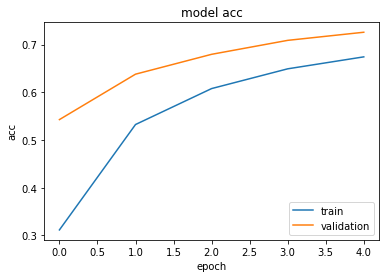

In [39]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)


plot_train(hist)


### To save entire Keras model

In [43]:
from keras.models import load_model
model.save('E:\Deep Learning Developer\Wk2 beginning 2 Oct 17\My_wk2_QuickDraw_mini_challenge(corrected labels).h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model



OSError: Unable to create file (unable to truncate a file which is already open)

### To reload model

In [ ]:
# returns a compiled model
# identical to the previous one
# model = load_model('E:\Deep Learning Developer\Wk2 beginning 2 Oct 17\My_wk2_QuickDraw_mini_challenge(corrected labels).h5')